In [1]:
import deepdih
from rdkit import Chem
import os
from tblite.ase import TBLite

In [2]:
molecules = []
for file in os.listdir("molecules"):
    if file.endswith(".mol"):
        molecules.append(Chem.MolFromMolFile("molecules/"+file, sanitize=True, removeHs=False))
fragments = deepdih.mollib.create_lib(molecules)
deepdih.utils.write_sdf(fragments, "fragments.sdf")

Find 3 torsions.
Fragmenting on torsion [2, 3, 7, 9]
Selected Atoms after adding rotamer: [3, 7]
Selected Atoms after adding 1-4 atoms: [2, 3, 4, 7, 8, 9]
Selected Atoms after adding 1-5 atoms: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding rings: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding C=O: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding non-C/H: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding S=O: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding N(=O)=O: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]
Selected Atoms after adding Hs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 23, 24, 25]
Selected Atoms : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 23, 24, 25]
Num atoms : 32
Num selected atoms : 16
[[16, 10], [17, 10]]
>>> try to regularize aromaticity
Fragmenting on torsion [7, 9, 10, 11]
Selected Atoms after adding rotamer: [9, 10]
Selected Atoms after adding 1-4 atoms: [

In [3]:
# optimize the fragments using GFN2-xTB （energy with bias)
opt_calculator = TBLite(method="GFN2-xTB")

if not os.path.exists("fragments"):
    os.makedirs("fragments")

for n_frag, frag in enumerate(fragments):
    rotamers = deepdih.utils.get_rotamers(frag)
    dih_results = []
    for rot in rotamers:
        dih_result_rot = deepdih.geomopt.dihedral_scan(frag, opt_calculator, rot, 12)
        dih_results.extend(dih_result_rot)
    deepdih.utils.write_sdf(dih_results, f"fragments/fragment_{n_frag}_dihedral_scan.sdf")

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 11 10 16 8
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 11 10 16 8
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.60531166253  -3.7012481E+01   1.7460952E-01
      2     -36.76485932407  -1.5954766E-01   8.2406782E-02
      3     -36.77531375723  -1.0454433E-02   4.8726436E-02
      4     -36.78852495898  -1.3211202E-02   1.9511600E-02
      5     -36.79270690927  -4.1819503E-03   5.8204359E-03
      6     -36.79294433736  -2.3742809E-04   2.9309499E-03
      7     -36.79297891874  -3.4581379E-05   1.8241662E-03
      8     -36.79298993517  -1.1016436E-05   1.1787276E-03
      9     -36.79300292240  -1.2987225E-05   5.9207927E-04
     10     -36.79300397174  -1.0493363E-06   3.2173248E-04
     11     -36.79300516669  -1.1949583E-06   1.3938210E-04
     12     -36.79300526204  -9.5346678E-08   8.0192939E-05
     13     -36.79300531715  -5.5110647E-08   4.7996932E-05
     14     -36.79300533196  -1.480451

Step    0 : Gradient = 1.311e-02/2.842e-02 (rms/max) Energy = -36.7930053406
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65107e-01 5.00781e-01 9.40294e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.514e-02/1.867e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.759e-03/1.727e-02 (rms/max) E (change) = -36.7951981881 (-2.193e-03) Quality = 0.372
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79500075618  -3.7227238E+01   1.6831107E-02
      2     -36.79512855164  -1.2779545E-04   1.0194304E-02
      3     -36.79496591871   1.6263292E-04   3.9574743E-03
      4     -36.79518917820  -2.2325949E-04   9.3841542E-04
      5     -36.79519358672  -4.4085203E-06   7.0286146E-04
      6     -36.79519617265  -2.5859257E-06   4.5584785E-04
      7     -36.79519766028  -1.4876311E-06   2.4401210E-04
      8     -36.79519811459  -4.5430599E-07   9.3828283E-05
      9     -36.79519816765  -5.3061228E-08   4.9021673E-05
     10     -36.79519818562  -1.7975516E-08   2.1651887E-05
     11     -36.79519818814  -2.5187248E-09   1.4801195E-05
------------------------------------------------------------

 total:                                   0.019 sec


Hessian Eigenvalues: 2.29011e-02 2.30000e-02 2.30000e-02 ... 4.76359e-01 6.10048e-01 9.25251e-01
Step    2 : Displace = 3.720e-02/1.235e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.609e-03/4.733e-03 (rms/max) E (change) = -36.7974588196 (-2.261e-03) Quality = 0.799
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27665e-02 2.29867e-02 2.30000e-02 ... 4.65385e-01 6.29740e-01 9.24509e-01
Step    3 : Displace = 3.180e-02/6.041e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.411e-03/5.523e-03 (rms/max) E (change) = -36.7974580269 (+7.926e-07) Quality = -0.001
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21003e-02 2.29870e-02 2.29970e-02 ... 5.46507e-01 5.93024e-01 9.24692e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79743582776  -3.7233037E+01   1.0500530E-02
      2     -36.79745101286  -1.5185092E-05   6.2467634E-03
      3     -36.79743151347   1.9499389E-05   1.2046199E-03
      4     -36.79745743847  -2.5925004E-05   3.9632594E-04
      5     -36.79745801930  -5.8082943E-07   2.9869855E-04
      6     -36.79745847658  -4.5728007E-07   1.8154183E-04
      7     -36.79745870490  -2.2831779E-07   1.1711941E-04
      8     -36.79745881011  -1.0520905E-07   3.7812024E-05
      9     -36.79745881955  -9.4430561E-09   1.5992072E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    4 : Displace = 1.732e-02/3.023e-02 (rms/max) Trust = 1.590e-02 (-) Grad_T = 7.913e-04/1.531e-03 (rms/max) E (change) = -36.7977851235 (-3.271e-04) Quality = 0.964
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20432e-02 2.29877e-02 2.29981e-02 ... 5.33759e-01 6.08235e-01 9.26029e-01
Step    5 : Displace = 8.241e-03/1.967e-02 (rms/max) Trust = 2.248e-02 (+) Grad_T = 2.594e-04/4.866e-04 (rms/max) E (change) = -36.7978332163 (-4.809e-05) Quality = 1.192
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26761e-02 2.29840e-02 2.29959e-02 ... 5.79902e-01 6.71779e-01 9.30370e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79778356175  -3.7226743E+01   3.0469961E-03
      2     -36.79778451881  -9.5706641E-07   1.7923944E-03
      3     -36.79778156642   2.9523966E-06   3.9379002E-04
      4     -36.79778510826  -3.5418414E-06   5.9116227E-05
      5     -36.79778511629  -8.0369560E-09   3.7346605E-05
      6     -36.79778512352  -7.2259496E-09   1.8614734E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79783277258  -3.7228407E+01   1.1364262E-03
      2     -36.79783307893  -3.0635517E-07   6.7149794E-04
      3     -36.79783276306   3.1587879E-0

Step    6 : Displace = 9.101e-03/2.278e-02 (rms/max) Trust = 3.180e-02 (+) Grad_T = 4.360e-04/8.605e-04 (rms/max) E (change) = -36.7978621021 (-2.889e-05) Quality = 1.472
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.72592e-03 2.29842e-02 2.29953e-02 ... 5.79182e-01 9.00581e-01 9.32668e-01
Step    7 : Displace = 3.320e-02/8.736e-02 (rms/max) Trust = 4.497e-02 (+) Grad_T = 7.961e-04/1.607e-03 (rms/max) E (change) = -36.7979312093 (-6.911e-05) Quality = 1.214
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34649e-03 2.29834e-02 2.29958e-02 ... 5.89613e-01 9.11286e-01 9.43995e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79786191736  -3.7228253E+01   8.8596800E-04
      2     -36.79786203274  -1.1538121E-07   5.2646911E-04
      3     -36.79786177962   2.5312168E-07   1.1549670E-04
      4     -36.79786209223  -3.1261115E-07   3.5124208E-05
      5     -36.79786209823  -5.9978689E-09   2.6658345E-05
      6     -36.79786210208  -3.8546588E-09   1.6702737E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79793033180  -3.7227691E+01   2.3344680E-03
      2     -36.79793101614  -6.8434086E-07   1.3959794E-03
      3     -36.79793027164   7.4450423E-0

Step    8 : Displace = 3.706e-02/9.226e-02 (rms/max) Trust = 6.359e-02 (+) Grad_T = 8.616e-04/1.829e-03 (rms/max) E (change) = -36.7979971479 (-6.594e-05) Quality = 1.123
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.17746e-03 2.29727e-02 2.29949e-02 ... 5.74615e-01 7.19515e-01 9.30137e-01
Step    9 : Displace = 1.643e-02/4.049e-02 (rms/max) Trust = 8.994e-02 (+) Grad_T = 4.127e-04/9.985e-04 (rms/max) E (change) = -36.7980264214 (-2.927e-05) Quality = 0.941
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.28405e-03 2.29307e-02 2.29868e-02 ... 5.74667e-01 6.41896e-01 9.27686e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79799658816  -3.7228334E+01   2.4772701E-03
      2     -36.79799698732  -3.9915766E-07   1.4837931E-03
      3     -36.79799666738   3.1994273E-07   1.4792815E-04
      4     -36.79799713345  -4.6606868E-07   4.7748317E-05
      5     -36.79799714398  -1.0533036E-08   2.8321719E-05
      6     -36.79799714791  -3.9270489E-09   1.5394868E-05
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79802568090  -3.7228374E+01   1.6516123E-03
      2     -36.79802618477  -5.0386181E-07   9.7692309E-04
      3     -36.79802576074   4.2402868E-0

Step   10 : Displace = 5.405e-03/1.041e-02 (rms/max) Trust = 1.272e-01 (+) Grad_T = 1.868e-04/4.500e-04 (rms/max) E (change) = -36.7980311763 (-4.755e-06) Quality = 0.605
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26354e-03 2.28793e-02 2.29871e-02 ... 5.69536e-01 6.60361e-01 9.22459e-01
Step   11 : Displace = 1.439e-03/3.199e-03 (rms/max) Trust = 1.272e-01 (=) Grad_T = 9.376e-05/2.090e-04 (rms/max) E (change) = -36.7980323908 (-1.214e-06) Quality = 0.720
Hessian Eigenvalues: 1.26354e-03 2.28793e-02 2.29871e-02 ... 5.69536e-01 6.60361e-01 9.22459e-01
Converged! =D
Time elapsed since start of run_optimizer: 5.837 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79803232900  -3.7228068E+01   3.2491415E-04
      2     -36.79803235597  -2.6972749E-08   1.9348365E-04
      3     -36.79803226846   8.7514302E-08   7.0687078E-05
      4     -36.79803238416  -1.1569988E-07   2.5596540E-05
      5     -36.79803238729  -3.1364848E-09   2.0050433E-05
      6     -36.79803239075  -3.4589291E-09   1.2996458E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79466599710  -3.7224687E+01   3.4575351E-02
      2     -36.79490621639  -2.4021929E-04   2.0364049E-02
      3     -36.79419033537   7.1588102E-0

<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79620136545  -3.7222933E+01   8.4739878E-03
      2     -36.79622021894  -1.8853486E-05   5.1051641E-03
      3     -36.79620108380   1.9135139E-05   1.4660930E-03
      4     -36.79623853054  -3.7446737E-05   8.8000667E-04
      5     -36.79624208762  -3.5570801E-06   6.3695669E-04
      6     -36.79624565360  -3.5659867E-06   2.6270191E-04
      7     -36.79624622814  -5.7453687E-07   1.2847878E-04
      8     -36.79624632717  -9.9027680E-08   7.8626103E-05
      9     -36.79624635840  -3.1227316E-08   5.2592503E-05
     10     -36.79624637706  -1.8668004E-08   3.8202988E-05


Step    1 : Displace = 9.471e-02/2.245e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.881e-03/8.612e-03 (rms/max) E (change) = -36.7962463937 (-1.117e-03) Quality = 0.342
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21378e-02 2.30000e-02 2.30000e-02 ... 5.51315e-01 6.72732e-01 1.00443e+00


     11     -36.79624638934  -1.2281085E-08   2.0150269E-05
     12     -36.79624639375  -4.4025228E-09   8.3147601E-06
------------------------------------------------------------

 total:                                   0.297 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79664334679  -3.7223656E+01   6.6456566E-03
      2     -36.79665395077  -1.0603985E-05   3.9578036E-03
      3     -36.79662749240   2.6458372E-05   1.2412870E-03
      4     -36.79666330063  -3.5808224E-05   5.1227957E-04
      5     -36.79666437495  -1.0743221E-06   4.0207385E-04
      6     -36.79666564945  -1.2744996E-06   2.4487266E-04
      7     -36.79666619974  -5.5028779E-07   1.0766606E-04
      8     -36.79666630713  -1.0739152E-07   4.9848950E-05


Step    2 : Displace = 4.601e-02/6.733e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.846e-03/3.632e-03 (rms/max) E (change) = -36.7966663266 (-4.199e-04) Quality = 0.629
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13251e-02 2.29987e-02 2.30000e-02 ... 5.38133e-01 6.74189e-01 1.00004e+00


      9     -36.79666631930  -1.2173913E-08   2.7857757E-05
     10     -36.79666632377  -4.4729234E-09   2.0465192E-05
     11     -36.79666632663  -2.8507259E-09   1.3157609E-05
------------------------------------------------------------

 total:                                   0.368 sec


Step    3 : Displace = 1.444e-02/3.762e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.324e-04/1.810e-03 (rms/max) E (change) = -36.7968312654 (-1.649e-04) Quality = 0.635
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12103e-02 2.29856e-02 2.29989e-02 ... 5.42982e-01 6.36109e-01 9.99647e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79682404874  -3.7224846E+01   3.4780022E-03
      2     -36.79682753702  -3.4882795E-06   2.1162672E-03
      3     -36.79681404400   1.3493025E-05   7.9508924E-04
      4     -36.79683078101  -1.6737012E-05   2.0266916E-04
      5     -36.79683092905  -1.4803711E-07   1.6494070E-04
      6     -36.79683117514  -2.4609657E-07   8.9889880E-05
      7     -36.79683124847  -7.3333176E-08   4.1436843E-05
      8     -36.79683126186  -1.3383314E-08   2.3362009E-05
      9     -36.79683126540  -3.5392489E-09   1.3837322E-05
------------------------------------------------------------

 total:                                   0.122 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    4 : Displace = 8.047e-03/1.425e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.686e-04/1.212e-03 (rms/max) E (change) = -36.7968642681 (-3.300e-05) Quality = 0.689
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12467e-02 2.29313e-02 2.29989e-02 ... 5.58651e-01 6.33490e-01 9.99655e-01


      3     -36.79686355794   1.4781228E-07   2.1736818E-04
      4     -36.79686409825  -5.4030649E-07   1.3121189E-04
      5     -36.79686417421  -7.5960379E-08   9.6998398E-05
      6     -36.79686424096  -6.6752072E-08   5.3930558E-05
      7     -36.79686426811  -2.7152225E-08   1.6602370E-05
------------------------------------------------------------

 total:                                   0.269 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79686835591  -3.7224437E+01   9.3983469E-04
      2     -36.79686858188  -2.2596524E-07   5.6550485E-04
      3     -36.79686809334   4.8853972E-07   1.8613180E-04
      4     -36.79686878232  -6.8897653E-07   7.8889094E-05
      5     -36.79686880617  -2.3849211E-08   6.2001415E-05
      6     -36.79686883474  -2.8577190E-08   3.2833304E-05
      7     -36.79686884491  -1.0167732E-08 

Step    5 : Displace = 2.011e-03/3.916e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.634e-04/6.090e-04 (rms/max) E (change) = -36.7968688449 (-4.577e-06) Quality = 0.442
Hessian Eigenvalues: 2.12467e-02 2.29313e-02 2.29989e-02 ... 5.58651e-01 6.33490e-01 9.99655e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.057 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.77860395792  -3.7206200E+01   4.1110225E-02
      2     -36.77962890659  -1.0249487E-03   2.4100440E-02
      3     -36.77956183706   6.7069531E-05   6.3675129E-03
      4     -36.77988442648  -3.2258942E-04   3.3948693E-03
      5     -36.77994999700  -6.5570519E-05   2.3098991E-03
      6     -36.77997551580  -2.5518805E-05   1.6152329E-03
      7     -36.77999563746  -2.0121654E-05   5.7096295E-04
      8     -36.77999847946  -2.8420041E-06   3.3032864E-04
      9     -36.77999904751  -5.6805087E-07   1.8870939E-04
     10     -36.77999929019  -2.4267956E-07   1.1577177E-04
     11     -36.77999935644  -6.6252454E-08   8.8934631E-05
     12     -36.77999943191  -7.5467035E-08   4.3928570E-05
     13     -36.77999944631  -1.4401571E-08   1.8335214E-05
--------------------------------------

Step    1 : Displace = 1.000e-01/2.219e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.972e-03/1.219e-02 (rms/max) E (change) = -36.7885712315 (-8.572e-03) Quality = 0.504
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26687e-02 2.30000e-02 2.30000e-02 ... 5.53020e-01 9.91163e-01 2.02611e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78795168014  -3.7213048E+01   1.2249358E-02
      2     -36.78835819071  -4.0651056E-04   7.8767468E-03
      3     -36.78841246600  -5.4275297E-05   4.2473914E-03
      4     -36.78848974186  -7.7275862E-05   2.6727789E-03
      5     -36.78853322176  -4.3479901E-05   1.9262062E-03
      6     -36.78855663668  -2.3414914E-05   1.2514405E-03
      7     -36.78857034391  -1.3707227E-05   2.7778796E-04
      8     -36.78857094182  -5.9791848E-07   1.6683983E-04
      9     -36.78857107011  -1.2828208E-07   1.1605028E-04
     10     -36.78857115421  -8.4104776E-08   8.0099480E-05
     11     -36.78857119327  -3.9053759E-08   5.1650946E-05
     12     -36.78857123154  -3.8278351E-08   1.9930196E-05
------------------------------------------------------------

 total:                             

Step    2 : Displace = 8.571e-02/2.357e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.015e-02/3.078e-02 (rms/max) E (change) = -36.7825605348 (+6.011e-03) Quality = -1.149
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.26687e-02 2.30000e-02 2.30000e-02 ... 5.53020e-01 9.91163e-01 2.02611e+00
Step    3 : Displace = 4.525e-02/1.255e-01 (rms/max) Trust = 4.286e-02 (x) Grad_T = 4.891e-03/1.233e-02 (rms/max) E (change) = -36.7890315010 (-4.603e-04) Quality = 0.116
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25874e-02 2.29997e-02 2.30000e-02 ... 8.64159e-01 9.94430e-01 2.10625e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78224140703  -3.7202346E+01   1.3126734E-02
      2     -36.78237446438  -1.3305735E-04   8.1900635E-03
      3     -36.78219400535   1.8045904E-04   4.5523435E-03
      4     -36.78252198573  -3.2798039E-04   2.1070079E-03
      5     -36.78253937100  -1.7385265E-05   1.5516881E-03
      6     -36.78255824626  -1.8875259E-05   4.8406305E-04
      7     -36.78255995732  -1.7110668E-06   2.3154459E-04
      8     -36.78256030119  -3.4386748E-07   1.3935343E-04
      9     -36.78256039605  -9.4857540E-08   1.0166045E-04
     10     -36.78256046317  -6.7116311E-08   7.3732643E-05
     11     -36.78256051352  -5.0355631E-08   4.4225059E-05
     12     -36.78256053482  -2.1299122E-08   1.5361628E-05
------------------------------------------------------------

 total:                             

Step    4 : Displace = 2.222e-02/7.871e-02 (rms/max) Trust = 2.143e-02 (-) Grad_T = 1.743e-03/4.219e-03 (rms/max) E (change) = -36.7901595603 (-1.128e-03) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25635e-02 2.29996e-02 2.30000e-02 ... 8.29003e-01 9.88694e-01 1.99034e+00
Step    5 : Displace = 3.219e-02/6.584e-02 (rms/max) Trust = 3.030e-02 (+) Grad_T = 1.664e-03/3.525e-03 (rms/max) E (change) = -36.7901566049 (+2.955e-06) Quality = -0.010
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25652e-02 2.29613e-02 2.30001e-02 ... 8.49346e-01 9.85694e-01 1.95980e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79013601253  -3.7212220E+01   4.7605040E-03
      2     -36.79014744411  -1.1431577E-05   2.8764719E-03
      3     -36.79011476782   3.2676290E-05   1.3865578E-03
      4     -36.79015828019  -4.3512370E-05   3.7352335E-04
      5     -36.79015875834  -4.7814542E-07   2.8773488E-04
      6     -36.79015928467  -5.2633678E-07   1.7240123E-04
      7     -36.79015952384  -2.3916612E-07   6.0257382E-05
      8     -36.79015955216  -2.8317395E-08   3.2135491E-05
      9     -36.79015955778  -5.6221978E-09   2.0983586E-05
     10     -36.79015956031  -2.5254892E-09   1.4654802E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error

Step    6 : Displace = 1.659e-02/3.667e-02 (rms/max) Trust = 1.515e-02 (-) Grad_T = 4.510e-04/1.250e-03 (rms/max) E (change) = -36.7903142350 (-1.576e-04) Quality = 0.902
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25653e-02 2.29375e-02 2.30001e-02 ... 8.21445e-01 9.85753e-01 1.97137e+00
Step    7 : Displace = 4.471e-03/1.057e-02 (rms/max) Trust = 2.143e-02 (+) Grad_T = 3.686e-04/8.575e-04 (rms/max) E (change) = -36.7903190555 (-4.820e-06) Quality = 0.317
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80956e-02 2.25827e-02 2.29999e-02 ... 8.36325e-01 9.87659e-01 1.96889e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79031284386  -3.7213547E+01   1.7532025E-03
      2     -36.79031372479  -8.8093822E-07   1.0332679E-03
      3     -36.79031271927   1.0055272E-06   2.4437191E-04
      4     -36.79031412284  -1.4035771E-06   1.0322318E-04
      5     -36.79031418282  -5.9975896E-08   7.5096086E-05
      6     -36.79031421432  -3.1500058E-08   4.6017367E-05
      7     -36.79031422720  -1.2880292E-08   3.0058476E-05
      8     -36.79031423504  -7.8399935E-09   9.8483086E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79031865117  -3.7213194E+0

Step    8 : Displace = 3.552e-03/7.791e-03 (rms/max) Trust = 2.143e-02 (=) Grad_T = 1.853e-04/3.667e-04 (rms/max) E (change) = -36.7903268478 (-7.792e-06) Quality = 0.887
Hessian Eigenvalues: 1.80956e-02 2.25827e-02 2.29999e-02 ... 8.36325e-01 9.87659e-01 1.96889e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.450 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79032670148  -3.7213271E+01   8.2134938E-04
      2     -36.79032677576  -7.4276521E-08   4.9085766E-04
      3     -36.79032651260   2.6315922E-07   1.1878806E-04
      4     -36.79032683611  -3.2351264E-07   3.5724433E-05
      5     -36.79032684052  -4.4133017E-09   2.8927263E-05
      6     -36.79032684780  -7.2796382E-09   1.5791199E-05
------------------------------------------------------------

 total:                                   0.100 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78842768907  -3.7211371E+01   3.7954108E-02
      2     -36.78860498415  -1.7729508E-04   2.2361868E-02
      3     -36.78872296790  -1.1798375E-0

Step    1 : Displace = 9.334e-02/2.016e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.647e-03/9.776e-03 (rms/max) E (change) = -36.7862435887 (+2.542e-03) Quality = -2.506
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.91354e-01 5.54571e-01 9.76097e-01
Step    2 : Displace = 4.684e-02/1.009e-01 (rms/max) Trust = 4.667e-02 (x) Grad_T = 2.291e-03/4.364e-03 (rms/max) E (change) = -36.7884751962 (+3.106e-04) Quality = -0.428
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78612092687  -3.7207751E+01   8.7431472E-03
      2     -36.78620991961  -8.8992742E-05   5.2312914E-03
      3     -36.78619565811   1.4261495E-05   1.8745952E-03
      4     -36.78622991431  -3.4256193E-05   1.0004385E-03
      5     -36.78623777610  -7.8617941E-06   7.2427991E-04
      6     -36.78624055344  -2.7773368E-06   5.3112488E-04
      7     -36.78624311001  -2.5565712E-06   1.9052858E-04
      8     -36.78624350753  -3.9752247E-07   9.4243043E-05
      9     -36.78624354934  -4.1811461E-08   5.9191978E-05
     10     -36.78624356901  -1.9672335E-08   3.9165521E-05
     11     -36.78624357880  -9.7893889E-09   2.9837249E-05
     12     -36.78624358866  -9.8596402E-09   1.1117839E-05
------------------------------------------------------------

 total:                             

Hessian Eigenvalues: 2.28723e-02 2.30000e-02 2.30000e-02 ... 5.54075e-01 9.75868e-01 1.38502e+00
Step    3 : Displace = 2.381e-02/4.178e-02 (rms/max) Trust = 2.334e-02 (-) Grad_T = 8.471e-04/1.720e-03 (rms/max) E (change) = -36.7889424096 (-4.672e-04) Quality = 0.935
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27905e-02 2.29932e-02 2.30000e-02 ... 5.53708e-01 9.75254e-01 1.42962e+00
Step    4 : Displace = 2.792e-02/6.466e-02 (rms/max) Trust = 3.300e-02 (+) Grad_T = 1.598e-03/4.078e-03 (rms/max) E (change) = -36.7888205398 (+1.219e-04) Quality = -0.572
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78893163686  -3.7211042E+01   2.2785470E-03
      2     -36.78893763723  -6.0003708E-06   1.4130093E-03
      3     -36.78893318444   4.4527942E-06   7.0401342E-04
      4     -36.78894114707  -7.9626292E-06   3.4465123E-04
      5     -36.78894174010  -5.9303076E-07   2.5928264E-04
      6     -36.78894214188  -4.0177864E-07   1.6178559E-04
      7     -36.78894237699  -2.3510991E-07   5.2149981E-05
      8     -36.78894240250  -2.5515895E-08   3.0611175E-05
      9     -36.78894240643  -3.9293937E-09   2.1156945E-05
     10     -36.78894240964  -3.2058267E-09   1.4059439E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error

Hessian Eigenvalues: 1.73297e-02 2.29937e-02 2.30000e-02 ... 8.53139e-01 9.75922e-01 1.43316e+00
Step    5 : Displace = 1.515e-02/3.045e-02 (rms/max) Trust = 1.396e-02 (-) Grad_T = 2.572e-04/4.330e-04 (rms/max) E (change) = -36.7890781454 (-2.576e-04) Quality = 0.999
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71766e-02 2.29927e-02 2.29982e-02 ... 8.42978e-01 9.75282e-01 1.41887e+00
Step    6 : Displace = 8.009e-03/2.097e-02 (rms/max) Trust = 1.974e-02 (+) Grad_T = 3.290e-04/7.630e-04 (rms/max) E (change) = -36.7890934575 (-1.531e-05) Quality = 0.802
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.21163e-03 2.27510e-02 2.29936e-02 ... 8.70729e-01 9.75824e-01 1.41772e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78907257746  -3.7211513E+01   2.0866180E-03
      2     -36.78907652712  -3.9496624E-06   1.2403909E-03
      3     -36.78907542137   1.1057503E-06   4.6498170E-04
      4     -36.78907765074  -2.2293722E-06   2.1325648E-04
      5     -36.78907791800  -2.6726088E-07   1.5808103E-04
      6     -36.78907805434  -1.3633913E-07   1.0619996E-04
      7     -36.78907813051  -7.6171659E-08   3.5211867E-05
      8     -36.78907814538  -1.4869123E-08   1.1256302E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78909321458  -3.7211419E+0

Step    7 : Displace = 8.977e-03/2.310e-02 (rms/max) Trust = 2.792e-02 (+) Grad_T = 1.747e-04/3.911e-04 (rms/max) E (change) = -36.7890989077 (-5.450e-06) Quality = 0.374
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.00738e-02 2.26417e-02 2.29932e-02 ... 8.59335e-01 9.75713e-01 1.41875e+00
Step    8 : Displace = 3.748e-03/6.735e-03 (rms/max) Trust = 2.792e-02 (=) Grad_T = 9.468e-05/2.472e-04 (rms/max) E (change) = -36.7891029705 (-4.063e-06) Quality = 0.899
Hessian Eigenvalues: 1.00738e-02 2.26417e-02 2.29932e-02 ... 8.59335e-01 9.75713e-01 1.41875e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.271 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78909869797  -3.7211507E+01   1.4208730E-03
      2     -36.78909882053  -1.2255816E-07   8.3749066E-04
      3     -36.78909882091  -3.7410786E-10   7.9207578E-05
      4     -36.78909888963  -6.8728312E-08   5.0708999E-05
      5     -36.78909889955  -9.9155031E-09   3.6715886E-05
      6     -36.78909890773  -8.1826812E-09   1.8917803E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78910292696  -3.7211502E+01   5.6462012E-04
      2     -36.78910296124  -3.4286302E-08   3.3331298E-04
      3     -36.78910293661   2.4630047E-0

Step    0 : Gradient = 4.415e-03/1.067e-02 (rms/max) Energy = -36.7923958551
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.92023e-01 5.55304e-01 9.73787e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.085e-01/2.571e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.023e-03/8.417e-03 (rms/max) E (change) = -36.7950428265 (-2.647e-03) Quality = 0.616
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26861e-02 2.30000e-02 2.30000e-02 ... 5.54254e-01 5.65735e-01 9.74509e-01


     11     -36.79239582035  -2.0762997E-08   5.2983883E-05
     12     -36.79239584320  -2.2853065E-08   3.1344803E-05
     13     -36.79239585122  -8.0202724E-09   2.0061115E-05
     14     -36.79239585511  -3.8915076E-09   4.3532430E-06
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79500303592  -3.7222193E+01   1.1258915E-02
      2     -36.79502252703  -1.9491113E-05   6.6322153E-03
      3     -36.79502622432  -3.6972831E-06   1.1516197E-03
      4     -36.79503709585  -1.0871530E-05   8.0588812E-04
      5     -36.79503956642  -2.4705736E-06   5.7945249E-04
      6     -36.79504205937  -2.4929448E-06   2.8353290E-04
      7     -36.79504267541  -6.1604815E-07   1.2914425E-04
      8     -36.79504280433  -1.2891361E-07 

Step    2 : Displace = 4.142e-02/6.254e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.244e-03/4.526e-03 (rms/max) E (change) = -36.7954498971 (-4.071e-04) Quality = 0.496
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26909e-02 2.29964e-02 2.30000e-02 ... 5.55288e-01 6.10415e-01 9.71086e-01
Step    3 : Displace = 1.777e-02/3.720e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.336e-03/2.414e-03 (rms/max) E (change) = -36.7956086859 (-1.588e-04) Quality = 0.509
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26754e-02 2.29872e-02 2.29984e-02 ... 5.45622e-01 5.60457e-01 9.67594e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79543368153  -3.7222608E+01   7.9328420E-03
      2     -36.79544282411  -9.1425773E-06   4.6845989E-03
      3     -36.79543792296   4.9011488E-06   8.6327578E-04
      4     -36.79544810187  -1.0178910E-05   4.2038839E-04
      5     -36.79544881085  -7.0898039E-07   3.1012437E-04
      6     -36.79544932624  -5.1538671E-07   2.2185805E-04
      7     -36.79544981362  -4.8737949E-07   9.0556721E-05
      8     -36.79544989032  -7.6702776E-08   4.0141972E-05
      9     -36.79544989710  -6.7815478E-09   1.7877800E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    4 : Displace = 9.909e-03/1.777e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.148e-04/1.761e-03 (rms/max) E (change) = -36.7956762790 (-6.759e-05) Quality = 0.636
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26676e-02 2.29888e-02 2.29988e-02 ... 5.51622e-01 5.91265e-01 9.67812e-01
Step    5 : Displace = 3.790e-03/7.075e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.599e-04/6.244e-04 (rms/max) E (change) = -36.7956894724 (-1.319e-05) Quality = 0.563
Hessian Eigenvalues: 2.26676e-02 2.29888e-02 2.29988e-02 ... 5.51622e-01 5.91265e-01 9.67812e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.648 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79567392888  -3.7222286E+01   2.7317626E-03
      2     -36.79567497720  -1.0483208E-06   1.6168942E-03
      3     -36.79567512513  -1.4793784E-07   2.8583029E-04
      4     -36.79567584477  -7.1963717E-07   2.0590885E-04
      5     -36.79567605011  -2.0533422E-07   1.5097417E-04
      6     -36.79567624062  -1.9051119E-07   6.7226471E-05
      7     -36.79567627475  -3.4137614E-08   2.1889784E-05
      8     -36.79567627901  -4.2537565E-09   1.0310908E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79568844722  -3.7222547E+0

Step    0 : Gradient = 3.345e-03/7.869e-03 (rms/max) Energy = -36.7964376800
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.86397e-01 5.54003e-01 9.86042e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.126e-02/1.578e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.131e-03/7.193e-03 (rms/max) E (change) = -36.7975842307 (-1.147e-03) Quality = 0.919
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19390e-02 2.30000e-02 2.30000e-02 ... 5.03209e-01 5.66764e-01 9.87109e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79589362196  -3.7222770E+01   3.9152171E-02
      2     -36.79618607593  -2.9245397E-04   2.2878776E-02
      3     -36.79538233348   8.0374245E-04   6.8775016E-03
      4     -36.79640986159  -1.0275281E-03   1.8581490E-03
      5     -36.79642044244  -1.0580857E-05   1.4273452E-03
      6     -36.79643281222  -1.2369776E-05   7.4743387E-04
      7     -36.79643628281  -3.4705937E-06   4.4137008E-04
      8     -36.79643737591  -1.0930965E-06   1.9559765E-04
      9     -36.79643758923  -2.1332239E-07   9.7826962E-05
     10     -36.79643765365  -6.4418757E-08   4.9478778E-05
     11     -36.79643766396  -1.0312441E-08   3.8370058E-05
     12     -36.79643767484  -1.0872171E-08   2.4745033E-05
     13     -36.79643767999  -5.1538294E-09   1.6007265E-05
--------------------------------------

Step    2 : Displace = 2.103e-02/4.810e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.038e-03/4.613e-03 (rms/max) E (change) = -36.7976879125 (-1.037e-04) Quality = 0.278
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19878e-02 2.29662e-02 2.30000e-02 ... 5.34489e-01 6.07260e-01 9.76392e-01
Step    3 : Displace = 8.007e-03/1.484e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.174e-04/1.782e-03 (rms/max) E (change) = -36.7978350481 (-1.471e-04) Quality = 0.778
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18877e-02 2.29576e-02 2.29999e-02 ... 5.51718e-01 5.61400e-01 9.74246e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79767784865  -3.7227908E+01   5.7817471E-03
      2     -36.79768527187  -7.4232176E-06   3.4184863E-03
      3     -36.79768095744   4.3144353E-06   6.6588349E-04
      4     -36.79768745182  -6.4943889E-06   2.1628747E-04
      5     -36.79768763894  -1.8711952E-07   1.6860333E-04
      6     -36.79768778184  -1.4289385E-07   1.1492638E-04
      7     -36.79768785867  -7.6832038E-08   7.4518485E-05
      8     -36.79768791009  -5.1415782E-08   2.5954450E-05
      9     -36.79768791251  -2.4261340E-09   7.8822850E-06
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    4 : Displace = 7.289e-03/1.097e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 6.958e-04/1.668e-03 (rms/max) E (change) = -36.7978451159 (-1.007e-05) Quality = 0.216
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19136e-02 2.29431e-02 2.29923e-02 ... 5.27998e-01 6.15005e-01 9.74339e-01
Step    5 : Displace = 2.913e-03/5.876e-03 (rms/max) Trust = 3.645e-03 (-) Grad_T = 1.273e-04/3.690e-04 (rms/max) E (change) = -36.7978643906 (-1.927e-05) Quality = 0.972
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19132e-02 2.29089e-02 2.29795e-02 ... 5.28585e-01 6.20133e-01 9.74185e-01
Step    6 : Displace = 1.399e-03/2.570e-03 (rms/max) Trust = 5.154e-03 (+) Grad_T = 1.146e-04/3.272e-04 (rms/max) E (change) = -36.7978644398 (-4.915e-08) Quality = 0.044
Hessian Eigenvalues: 2.19132e-02 2.29089e-02 2.29795e-02 ... 5.28585e-01 6.20133e-01 9.74185e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.773 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79786378496  -3.7227612E+01   9.3057963E-04
      2     -36.79786407654  -2.9158225E-07   5.6038353E-04
      3     -36.79786344172   6.3482273E-07   1.9790382E-04
      4     -36.79786432220  -8.8048006E-07   8.2308816E-05
      5     -36.79786434917  -2.6966930E-08   6.4670403E-05
      6     -36.79786437955  -3.0385550E-08   3.6137876E-05
      7     -36.79786439064  -1.1092794E-08   1.6107240E-05
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79786436700  -3.7227569E+01   3.4380347E-04
      2     -36.79786439446  -2.7468730E-0

Constraint                         Current      Target       Diff.
Dihedral 3-4-8-9                 -77.85419   -77.85419     0.00000
Dihedral 9-8-10-11                 1.16694     1.16694     0.00000
Dihedral 1-2-3-14               -179.87187  -179.87187     0.00000
Dihedral 15-5-6-1                179.81184   179.81184     0.00000
Dihedral 2-1-13-6               -179.99767  -179.99767     0.00000
Dihedral 4-2-3-12                179.31097   179.31097     0.00000
Dihedral 3-4-5-8                -178.31796  -178.31796     0.00000
Dihedral 4-5-6-7                 178.82684   178.82684     0.00000
Dihedral 9-8-10-4                177.98061   177.98061     0.00000
Dihedral 11-10-16-8             -179.38828  -179.38828     0.00000
Step    0 : Gradient = 1.164e-03/2.705e-03 (rms/max) Energy = -36.7978464377
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.83306e-01 5.53344e-01 1.00236e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.709e-03/1.766e-02 (rms

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79734507003  -3.7227053E+01   3.9308534E-02
      2     -36.79760642368  -2.6135365E-04   2.3030275E-02
      3     -36.79660697739   9.9944629E-04   7.0648785E-03
      4     -36.79783086860  -1.2238912E-03   1.4589160E-03
      5     -36.79783667128  -5.8026788E-06   1.0758014E-03
      6     -36.79784298879  -6.3175075E-06   6.1881183E-04
      7     -36.79784527760  -2.2888155E-06   3.8528098E-04
      8     -36.79784624432  -9.6672130E-07   1.6247288E-04
      9     -36.79784638913  -1.4480273E-07   8.1901769E-05
     10     -36.79784642873  -3.9602256E-08   3.4891284E-05
     11     -36.79784643370  -4.9681290E-09   2.4548279E-05
     12     -36.79784643769  -3.9932431E-09   1.6880794E-05
------------------------------------------------------------

 total:                             

Step    2 : Displace = 6.566e-03/1.664e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.873e-04/1.152e-03 (rms/max) E (change) = -36.7978909161 (-1.016e-05) Quality = 0.566
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27623e-02 2.29980e-02 2.30000e-02 ... 5.44659e-01 5.84210e-01 9.99875e-01
Step    3 : Displace = 1.966e-03/5.109e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.406e-04/3.363e-04 (rms/max) E (change) = -36.7978949229 (-4.007e-06) Quality = 0.894
Hessian Eigenvalues: 2.27623e-02 2.29980e-02 2.30000e-02 ... 5.44659e-01 5.84210e-01 9.99875e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.411 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79788908964  -3.7227973E+01   1.0530090E-03
      2     -36.79788979966  -7.1001791E-07   6.6763023E-04
      3     -36.79788820511   1.5945456E-06   3.4250871E-04
      4     -36.79789064217  -2.4370565E-06   1.4719011E-04
      5     -36.79789076128  -1.1911697E-07   1.0840840E-04
      6     -36.79789088086  -1.1957029E-07   5.4463252E-05
      7     -36.79789091610  -3.5245215E-08   1.8094086E-05
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79789472828  -3.7227854E+01   4.4443875E-04
      2     -36.79789480243  -7.4153860E-0

Step    0 : Gradient = 4.436e-03/1.152e-02 (rms/max) Energy = -36.7949247968
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.83149e-01 5.53182e-01 1.00440e+00
<<< Enforcing constraint satisfaction >>>


     11     -36.79492477498  -1.9224537E-08   4.2887735E-05
     12     -36.79492478968  -1.4707290E-08   2.7313979E-05
     13     -36.79492479685  -7.1615602E-09   1.1266384E-05
------------------------------------------------------------

 total:                                   0.026 sec


Step    1 : Displace = 9.293e-02/2.171e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.838e-03/8.492e-03 (rms/max) E (change) = -36.7961964455 (-1.272e-03) Quality = 0.381
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22067e-02 2.30000e-02 2.30000e-02 ... 5.50415e-01 6.80499e-01 1.00495e+00
Step    2 : Displace = 4.394e-02/6.667e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.824e-03/3.547e-03 (rms/max) E (change) = -36.7965479491 (-3.515e-04) Quality = 0.579
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10807e-02 2.29982e-02 2.30000e-02 ... 5.37783e-01 6.88810e-01 9.99907e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79615479046  -3.7222919E+01   8.7274928E-03
      2     -36.79617244795  -1.7657491E-05   5.2434010E-03
      3     -36.79615669272   1.5755235E-05   1.3952164E-03
      4     -36.79618921044  -3.2517724E-05   8.4273133E-04
      5     -36.79619242854  -3.2180970E-06   6.1656046E-04
      6     -36.79619572583  -3.2972877E-06   2.6289095E-04
      7     -36.79619629745  -5.7162340E-07   1.2240011E-04
      8     -36.79619638968  -9.2232767E-08   7.4644138E-05
      9     -36.79619641732  -2.7633561E-08   4.9907727E-05
     10     -36.79619643402  -1.6698486E-08   3.6449599E-05
     11     -36.79619644546  -1.1447881E-08   1.8887942E-05
------------------------------------------------------------

 total:                                   0.027 sec
--------------------------------------------

Step    3 : Displace = 1.356e-02/3.417e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.348e-04/1.666e-03 (rms/max) E (change) = -36.7967196325 (-1.717e-04) Quality = 0.702
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08846e-02 2.29768e-02 2.29988e-02 ... 5.45058e-01 6.49391e-01 9.99448e-01
Step    4 : Displace = 7.416e-03/1.187e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.414e-04/1.118e-03 (rms/max) E (change) = -36.7967437305 (-2.410e-05) Quality = 0.642
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09264e-02 2.28856e-02 2.29986e-02 ... 5.60644e-01 6.47582e-01 9.99481e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79671262721  -3.7224649E+01   3.3377131E-03
      2     -36.79671594797  -3.3207611E-06   2.0253142E-03
      3     -36.79670332239   1.2625577E-05   7.8189797E-04
      4     -36.79671912764  -1.5805241E-05   2.0505209E-04
      5     -36.79671927986  -1.5222228E-07   1.6611876E-04
      6     -36.79671953687  -2.5701304E-07   9.1663065E-05
      7     -36.79671961665  -7.9784243E-08   4.0046825E-05
      8     -36.79671962909  -1.2438960E-08   2.2740611E-05
      9     -36.79671963250  -3.4073295E-09   1.3013875E-05
------------------------------------------------------------

 total:                                   0.033 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    5 : Displace = 2.170e-03/3.512e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.120e-04/4.337e-04 (rms/max) E (change) = -36.7967487392 (-5.009e-06) Quality = 0.573
Hessian Eigenvalues: 2.09264e-02 2.28856e-02 2.29986e-02 ... 5.60644e-01 6.47582e-01 9.99481e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.793 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79674830436  -3.7224281E+01   7.9785896E-04
      2     -36.79674850303  -1.9867574E-07   4.8180558E-04
      3     -36.79674806742   4.3560725E-07   1.7721296E-04
      4     -36.79674868519  -6.1776590E-07   7.3240402E-05
      5     -36.79674870612  -2.0933712E-08   5.7281294E-05
      6     -36.79674873067  -2.4546004E-08   3.0212363E-05
      7     -36.79674873925  -8.5760874E-09   1.1368927E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.77856962482  -3.7206129E+01   4.1622173E-02
      2     -36.77959046973  -1.0208449E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.000e-01/2.212e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.927e-03/1.209e-02 (rms/max) E (change) = -36.7885581193 (-8.596e-03) Quality = 0.506
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27391e-02 2.30000e-02 2.30000e-02 ... 5.52566e-01 9.91337e-01 2.02273e+00
Step    2 : Displace = 8.622e-02/2.369e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.992e-03/3.057e-02 (rms/max) E (change) = -36.7825897755 (+5.968e-03) Quality = -1.134
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.27391e-02 2.30000e-02 2.30000e-02 ... 5.52566e-01 9.91337e-01 2.02273e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78794718147  -3.7213034E+01   1.3143498E-02
      2     -36.78834821531  -4.0103384E-04   8.3245762E-03
      3     -36.78839668074  -4.8465433E-05   4.2568419E-03
      4     -36.78847823112  -8.1550380E-05   2.6264472E-03
      5     -36.78851980003  -4.1568908E-05   1.9292981E-03
      6     -36.78854266225  -2.2862218E-05   1.2805312E-03
      7     -36.78855723475  -1.4572499E-05   2.7470115E-04
      8     -36.78855782982  -5.9507758E-07   1.6599120E-04
      9     -36.78855795789  -1.2806217E-07   1.1593116E-04
     10     -36.78855804156  -8.3674777E-08   8.0159083E-05
     11     -36.78855808117  -3.9611699E-08   5.1703686E-05
     12     -36.78855811929  -3.8121307E-08   1.9850674E-05
------------------------------------------------------------

 total:                             

Step    3 : Displace = 4.523e-02/1.259e-01 (rms/max) Trust = 4.311e-02 (x) Grad_T = 4.854e-03/1.232e-02 (rms/max) E (change) = -36.7890308985 (-4.728e-04) Quality = 0.118
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26436e-02 2.29994e-02 2.30000e-02 ... 8.61851e-01 9.94661e-01 2.10515e+00
Step    4 : Displace = 2.273e-02/7.935e-02 (rms/max) Trust = 2.155e-02 (-) Grad_T = 1.748e-03/4.112e-03 (rms/max) E (change) = -36.7901582758 (-1.127e-03) Quality = 0.920
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78897016836  -3.7211020E+01   7.0766822E-03
      2     -36.78899730845  -2.7140082E-05   4.2886713E-03
      3     -36.78894791367   4.9394774E-05   2.0309859E-03
      4     -36.78902409756  -7.6183888E-05   8.9168374E-04
      5     -36.78902713051  -3.0329472E-06   6.5689996E-04
      6     -36.78903014506  -3.0145573E-06   2.8533446E-04
      7     -36.78903077769  -6.3262483E-07   1.0495854E-04
      8     -36.78903086354  -8.5848470E-08   5.7624178E-05
      9     -36.78903087772  -1.4185538E-08   4.0223269E-05
     10     -36.78903088766  -9.9321156E-09   2.9115188E-05
     11     -36.78903089409  -6.4384977E-09   2.0071844E-05
     12     -36.78903089853  -4.4324793E-09   6.8276939E-06
------------------------------------------------------------

 total:                             

Hessian Eigenvalues: 2.25786e-02 2.29985e-02 2.30000e-02 ... 8.27202e-01 9.88968e-01 1.98684e+00
Step    5 : Displace = 2.855e-02/5.791e-02 (rms/max) Trust = 3.048e-02 (+) Grad_T = 1.352e-03/2.702e-03 (rms/max) E (change) = -36.7902273010 (-6.903e-05) Quality = 0.233
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25859e-02 2.29749e-02 2.29998e-02 ... 8.45715e-01 9.85007e-01 1.94276e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79021993151  -3.7213713E+01   2.8020354E-03
      2     -36.79022371496  -3.7834514E-06   1.7484591E-03
      3     -36.79021694121   6.7737550E-06   6.3238815E-04
      4     -36.79022642589  -9.4846759E-06   2.8335802E-04
      5     -36.79022677745  -3.5156366E-07   2.2190131E-04
      6     -36.79022715148  -3.7402710E-07   1.1574650E-04
      7     -36.79022726443  -1.1295603E-07   6.3492847E-05
      8     -36.79022729639  -3.1955238E-08   2.8611589E-05
      9     -36.79022730102  -4.6318576E-09   1.9057222E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    6 : Displace = 1.464e-02/3.220e-02 (rms/max) Trust = 1.427e-02 (-) Grad_T = 4.368e-04/1.324e-03 (rms/max) E (change) = -36.7903246266 (-9.733e-05) Quality = 0.841
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25657e-02 2.28487e-02 2.29997e-02 ... 8.10520e-01 9.85018e-01 1.95370e+00
Step    7 : Displace = 6.411e-03/1.634e-02 (rms/max) Trust = 2.018e-02 (+) Grad_T = 3.481e-04/8.033e-04 (rms/max) E (change) = -36.7903360017 (-1.138e-05) Quality = 0.612
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.46063e-02 2.26403e-02 2.29996e-02 ... 8.35972e-01 9.86140e-01 1.94610e+00


      7     -36.79032462110  -8.4091880E-09   2.5038454E-05
      8     -36.79032462657  -5.4711862E-09   8.0690795E-06
------------------------------------------------------------

 total:                                   0.033 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79033563003  -3.7213227E+01   1.1301547E-03
      2     -36.79033581196  -1.8193355E-07   6.7701573E-04
      3     -36.79033552349   2.8847310E-07   1.4976541E-04
      4     -36.79033595179  -4.2829761E-07   7.0168620E-05
      5     -36.79033597052  -1.8732628E-08   5.4428955E-05
      6     -36.79033599153  -2.1015808E-08   3.3639666E-05
      7     -36.79033600172  -1.0189481E-08   1.3809262E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    8 : Displace = 5.690e-03/1.478e-02 (rms/max) Trust = 2.018e-02 (=) Grad_T = 2.389e-04/5.269e-04 (rms/max) E (change) = -36.7903453368 (-9.335e-06) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05499e-02 2.26437e-02 2.29985e-02 ... 8.21310e-01 9.84092e-01 1.90245e+00
Step    9 : Displace = 4.843e-03/1.208e-02 (rms/max) Trust = 2.855e-02 (+) Grad_T = 2.019e-04/4.530e-04 (rms/max) E (change) = -36.7903480379 (-2.701e-06) Quality = 0.494
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.25391e-03 2.26214e-02 2.28638e-02 ... 8.33949e-01 9.88749e-01 1.93853e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79034512252  -3.7213293E+01   9.9490094E-04
      2     -36.79034522392  -1.0139780E-07   5.9295439E-04
      3     -36.79034489117   3.3274857E-07   1.4049083E-04
      4     -36.79034531522  -4.2405485E-07   4.8334345E-05
      5     -36.79034532316  -7.9380484E-09   3.8904027E-05
      6     -36.79034533677  -1.3611995E-08   1.9119967E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79034783515  -3.7213475E+01   8.3887652E-04
      2     -36.79034791964  -8.4495298E-08   5.0462207E-04
      3     -36.79034762809   2.9155506E-0

Step   10 : Displace = 9.361e-04/2.606e-03 (rms/max) Trust = 2.855e-02 (=) Grad_T = 6.462e-05/1.690e-04 (rms/max) E (change) = -36.7903494736 (-1.436e-06) Quality = 0.876
Hessian Eigenvalues: 9.25391e-03 2.26214e-02 2.28638e-02 ... 8.33949e-01 9.88749e-01 1.93853e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.586 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79034942860  -3.7213395E+01   2.7094078E-04
      2     -36.79034945437  -2.5774632E-08   1.6287946E-04
      3     -36.79034941821   3.6162987E-08   5.5712885E-05
      4     -36.79034947185  -5.3641813E-08   2.2019444E-05
      5     -36.79034947357  -1.7228672E-09   1.8414945E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78838191968  -3.7211425E+01   3.7913162E-02
      2     -36.78856390780  -1.8198811E-04   2.2353118E-02
      3     -36.78867870258  -1.1479479E-04   2.9220850E-03
      4     -36.78870934996  -3.0647377E-0

Step    1 : Displace = 1.039e-01/2.249e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.124e-03/1.061e-02 (rms/max) E (change) = -36.7854746326 (+3.271e-03) Quality = -2.524
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.91125e-01 5.54275e-01 9.76007e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78531741875  -3.7206833E+01   9.4298741E-03
      2     -36.78543031643  -1.1289767E-04   5.6479167E-03
      3     -36.78540985517   2.0461261E-05   2.1935533E-03
      4     -36.78545715311  -4.7297943E-05   1.1352557E-03
      5     -36.78546718220  -1.0029089E-05   8.2007865E-04
      6     -36.78547073070  -3.5485002E-06   5.9972324E-04
      7     -36.78547392609  -3.1953942E-06   2.2762232E-04
      8     -36.78547452386  -5.9776087E-07   1.0819686E-04
      9     -36.78547457824  -5.4384039E-08   6.8798206E-05
     10     -36.78547460517  -2.6926841E-08   4.5757235E-05
     11     -36.78547461977  -1.4604652E-08   3.4481337E-05
     12     -36.78547463257  -1.2797194E-08   1.2740611E-05
------------------------------------------------------------

 total:                             

Step    2 : Displace = 5.018e-02/1.093e-01 (rms/max) Trust = 5.000e-02 (x) Grad_T = 2.347e-03/4.610e-03 (rms/max) E (change) = -36.7884090432 (+3.370e-04) Quality = -0.368
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28815e-02 2.30000e-02 2.30000e-02 ... 5.53735e-01 9.75979e-01 1.40039e+00
Step    3 : Displace = 2.525e-02/4.370e-02 (rms/max) Trust = 2.500e-02 (-) Grad_T = 9.188e-04/1.819e-03 (rms/max) E (change) = -36.7889495096 (-5.405e-04) Quality = 0.931
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28084e-02 2.29954e-02 2.30000e-02 ... 5.53511e-01 9.75230e-01 1.43317e+00
Step    4 : Displace = 2.967e-02/7.006e-02 (rms/max) Trust = 3.536e-02 (+) Grad_T = 1.671e-03/4.173e-03 (rms/max) E (change) = -36.7888002494 (+1.493e-04) Quality = -0.603
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.77309e-02 2.29921e-02 2.30000e-02 ... 8.51291e-01 9.75612e-01 1.44727e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78893740218  -3.7211042E+01   2.3050841E-03
      2     -36.78894407638  -6.6741909E-06   1.4387525E-03
      3     -36.78893957230   4.5040776E-06   7.4063743E-04
      4     -36.78894806595  -8.4936483E-06   3.7130644E-04
      5     -36.78894875328  -6.8733241E-07   2.7713708E-04
      6     -36.78894920587  -4.5259664E-07   1.7281742E-04
      7     -36.78894947313  -2.6725576E-07   5.4109526E-05
      8     -36.78894950122  -2.8092686E-08   3.2628934E-05
      9     -36.78894950572  -4.4961084E-09   2.2569806E-05
     10     -36.78894950956  -3.8398085E-09   1.5030759E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error

Step    5 : Displace = 1.565e-02/3.268e-02 (rms/max) Trust = 1.484e-02 (-) Grad_T = 2.651e-04/5.009e-04 (rms/max) E (change) = -36.7890993461 (-2.991e-04) Quality = 0.994
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.76360e-02 2.29927e-02 2.29991e-02 ... 8.47243e-01 9.75427e-01 1.43288e+00
Step    6 : Displace = 8.239e-03/2.188e-02 (rms/max) Trust = 2.098e-02 (+) Grad_T = 2.524e-04/6.712e-04 (rms/max) E (change) = -36.7891197885 (-2.044e-05) Quality = 0.989
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.08022e-03 2.28196e-02 2.29955e-02 ... 8.83919e-01 9.76391e-01 1.42919e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78909284514  -3.7211569E+01   2.1838646E-03
      2     -36.78909752778  -4.6826372E-06   1.3160142E-03
      3     -36.78909649747   1.0303032E-06   4.8435415E-04
      4     -36.78909878060  -2.2831246E-06   2.2829399E-04
      5     -36.78909908206  -3.0146756E-07   1.6826189E-04
      6     -36.78909923987  -1.5780153E-07   1.1431010E-04
      7     -36.78909932739  -8.7527901E-08   3.9080862E-05
      8     -36.78909934608  -1.8682790E-08   1.2221520E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78911954555  -3.7211479E+0

Step    7 : Displace = 1.085e-02/2.686e-02 (rms/max) Trust = 2.967e-02 (+) Grad_T = 2.709e-04/6.741e-04 (rms/max) E (change) = -36.7891190180 (+7.704e-07) Quality = -0.048
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.00250e-02 2.27083e-02 2.29942e-02 ... 8.89905e-01 9.76132e-01 1.43005e+00
Step    8 : Displace = 5.164e-03/9.127e-03 (rms/max) Trust = 5.426e-03 (-) Grad_T = 8.702e-05/2.238e-04 (rms/max) E (change) = -36.7891285570 (-9.539e-06) Quality = 0.974
Hessian Eigenvalues: 1.00250e-02 2.27083e-02 2.29942e-02 ... 8.89905e-01 9.76132e-01 1.43005e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.287 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.78912845448  -3.7211530E+01   7.1481451E-04
      2     -36.78912852724  -7.2758780E-08   4.2124183E-04
      3     -36.78912843273   9.4511947E-08   7.3628510E-05
      4     -36.78912855156  -1.1882758E-07   2.4779277E-05
      5     -36.78912855698  -5.4184426E-09   1.6759074E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79203574211  -3.7214449E+01   3.3792724E-02
      2     -36.79233679119  -3.0104908E-04   2.0029602E-02
      3     -36.79207906635   2.5772484E-04   5.0442062E-03
      4     -36.79250944718  -4.3038083E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.035e-01/2.470e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.871e-03/7.983e-03 (rms/max) E (change) = -36.7952510430 (-2.697e-03) Quality = 0.638
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27283e-02 2.30000e-02 2.30000e-02 ... 5.53089e-01 5.68536e-01 9.74149e-01
Step    2 : Displace = 3.562e-02/5.270e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.228e-03/4.424e-03 (rms/max) E (change) = -36.7955949083 (-3.439e-04) Quality = 0.468
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27345e-02 2.29003e-02 2.30000e-02 ... 5.55208e-01 6.06021e-01 9.70949e-01
Step    3 : Displace = 1.826e-02/3.815e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.240e-03/2.240e-03 (rms/max) E (change) = -36.7957604182 (-1.655e-04) Quality = 0.555
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79521469041  -3.7222325E+01   9.4480641E-03
      2     -36.79523255594  -1.7865538E-05   5.6117589E-03
      3     -36.79523440678  -1.8508344E-06   1.1145380E-03
      4     -36.79524580028  -1.1393501E-05   7.6504599E-04
      5     -36.79524803396  -2.2336787E-06   5.5702060E-04
      6     -36.79525032017  -2.2862159E-06   2.7607770E-04
      7     -36.79525090750  -5.8732422E-07   1.2104302E-04
      8     -36.79525102323  -1.1572847E-07   5.4741240E-05
      9     -36.79525103564  -1.2411832E-08   2.8819000E-05
     10     -36.79525103906  -3.4166732E-09   2.2102122E-05
     11     -36.79525104302  -3.9597055E-09   1.2170027E-05
------------------------------------------------------------

 total:                                   0.011 sec
--------------------------------------------

Hessian Eigenvalues: 2.27175e-02 2.29024e-02 2.29948e-02 ... 5.40419e-01 5.63437e-01 9.67559e-01
Step    4 : Displace = 9.724e-03/1.771e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.407e-04/1.843e-03 (rms/max) E (change) = -36.7958147548 (-5.434e-05) Quality = 0.567
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27186e-02 2.29067e-02 2.29929e-02 ... 5.53442e-01 5.96999e-01 9.67723e-01
Step    5 : Displace = 4.014e-03/7.155e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.527e-04/6.197e-04 (rms/max) E (change) = -36.7958304097 (-1.565e-05) Quality = 0.618
Hessian Eigenvalues: 2.27186e-02 2.29067e-02 2.29929e-02 ... 5.53442e-01 5.96999e-01 9.67723e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.604 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79581238572  -3.7222466E+01   2.6259895E-03
      2     -36.79581343344  -1.0477243E-06   1.5530271E-03
      3     -36.79581359472  -1.6127427E-07   2.8579258E-04
      4     -36.79581431074  -7.1602187E-07   2.0722408E-04
      5     -36.79581452038  -2.0963693E-07   1.5238676E-04
      6     -36.79581471539  -1.9501130E-07   6.7401759E-05
      7     -36.79581475059  -3.5199598E-08   2.2210870E-05
      8     -36.79581475481  -4.2214623E-09   1.0320346E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79582935571  -3.7222729E+0

Step    0 : Gradient = 3.196e-03/7.405e-03 (rms/max) Energy = -36.7966231469
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.86386e-01 5.54467e-01 9.85886e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.009e-02/1.549e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.072e-03/6.981e-03 (rms/max) E (change) = -36.7977468376 (-1.124e-03) Quality = 0.921
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21166e-02 2.30000e-02 2.30000e-02 ... 5.06313e-01 5.64487e-01 9.86446e-01
Step    2 : Displace = 2.020e-02/4.639e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.103e-03/4.847e-03 (rms/max) E (change) = -36.7978330585 (-8.622e-05) Quality = 0.234
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21396e-02 2.29664e-02 2.30000e-02 ... 5.40401e-01 5.99037e-01 9.76659e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79773147523  -3.7227819E+01   6.5541821E-03
      2     -36.79773918904  -7.7138069E-06   3.8554036E-03
      3     -36.79772734141   1.1847632E-05   1.0084523E-03
      4     -36.79774509085  -1.7749436E-05   4.2861286E-04
      5     -36.79774566808  -5.7723353E-07   3.3419974E-04
      6     -36.79774663601  -9.6793168E-07   1.4382227E-04
      7     -36.79774678010  -1.4409046E-07   8.1348126E-05
      8     -36.79774682733  -4.7223843E-08   3.4868411E-05
      9     -36.79774683392  -6.5989312E-09   2.5175841E-05
     10     -36.79774683761  -3.6818548E-09   1.7067596E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error

Step    3 : Displace = 8.146e-03/1.549e-02 (rms/max) Trust = 1.010e-02 (-) Grad_T = 8.712e-04/1.764e-03 (rms/max) E (change) = -36.7979927498 (-1.597e-04) Quality = 0.804
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20737e-02 2.29668e-02 2.29999e-02 ... 5.52183e-01 5.59545e-01 9.74399e-01
Step    4 : Displace = 6.918e-03/1.035e-02 (rms/max) Trust = 1.428e-02 (+) Grad_T = 6.700e-04/1.691e-03 (rms/max) E (change) = -36.7980015578 (-8.808e-06) Quality = 0.203
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20867e-02 2.29548e-02 2.29940e-02 ... 5.31835e-01 6.10989e-01 9.74434e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79799039861  -3.7227502E+01   3.2169227E-03
      2     -36.79799189791  -1.4993031E-06   1.9338382E-03
      3     -36.79798789584   4.0020752E-06   4.7289207E-04
      4     -36.79799268851  -4.7926692E-06   8.1775062E-05
      5     -36.79799271796  -2.9448707E-08   5.9781409E-05
      6     -36.79799273768  -1.9721327E-08   3.4917446E-05
      7     -36.79799274499  -7.3124227E-09   2.4041214E-05
      8     -36.79799274983  -4.8426543E-09   7.4339551E-06
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79799939043  -3.7227671E+0

Step    5 : Displace = 2.704e-03/5.004e-03 (rms/max) Trust = 3.459e-03 (-) Grad_T = 1.256e-04/3.721e-04 (rms/max) E (change) = -36.7980198355 (-1.828e-05) Quality = 0.980
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20866e-02 2.29203e-02 2.29867e-02 ... 5.33273e-01 6.12901e-01 9.74303e-01
Step    6 : Displace = 1.359e-03/2.518e-03 (rms/max) Trust = 4.892e-03 (+) Grad_T = 1.103e-04/3.128e-04 (rms/max) E (change) = -36.7980198732 (-3.770e-08) Quality = 0.038
Hessian Eigenvalues: 2.20866e-02 2.29203e-02 2.29867e-02 ... 5.33273e-01 6.12901e-01 9.74303e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.768 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.79801980318  -3.7227825E+01   3.6797277E-04
      2     -36.79801982977  -2.6594911E-08   2.1989065E-04
      3     -36.79801974222   8.7552294E-08   7.3708416E-05
      4     -36.79801986238  -1.2016010E-07   3.1094175E-05
      5     -36.79801986796  -5.5817750E-09   2.2395882E-05
      6     -36.79801987324  -5.2765614E-09   1.0113258E-05
------------------------------------------------------------

 total:                                   0.019 sec


Constraint                         Current      Target       Diff.
Dihedral 3-2-4-5                   2.68799     2.68799     0.00000
Dihedral 2-4-5-6                  10.51336    10.51336     0.00000
Dihedral 8-9-11-19              -153.60114  -153.60114     0.00000
Dihedral 1-2-3-4                 179.00862   179.00862     0.00000
Dihedral 6-4-5-10                176.99775   176.99775     0.00000
Dihedral 5-6-13-7                177.78249   177.78249     0.00000
Dihedral 15-5-10-9              -176.63990  -176.63990     0.00000
Dihedral 8-6-7-14               -178.99838  -178.99838     0.00000
Dihedral 10-9-11-8              -176.92667  -176.92667     0.00000
Dihedral 2-4-12-5                179.84132   179.84132     0.00000
Dihedral 9-11-19-16              169.11249   169.11249     0.00000
Step    0 : Gradient = 1.302e-02/3.015e-02 (rms/max) Energy = -35.5825271123
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.28454e-01 5.49370e-01 9.32104e-01
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.33359080212  -3.5820242E+01   1.7089258E-01
      2     -35.55699327314  -2.2340247E-01   7.1361017E-02
      3     -35.57712678748  -2.0133514E-02   4.2145965E-02
      4     -35.58267482071  -5.5480332E-03   1.4057732E-02
      5     -35.58403012067  -1.3553000E-03   5.2303629E-03
      6     -35.58419063511  -1.6051445E-04   1.8875569E-03
      7     -35.58422890040  -3.8265289E-05   7.8750931E-04
      8     -35.58423496324  -6.0628420E-06   3.9179823E-04
      9     -35.58423556930  -6.0605532E-07   1.5110256E-04
     10     -35.58423577120  -2.0190003E-07   5.0686035E-05
     11     -35.58423579322  -2.2017090E-08   2.2399999E-05
     12     -35.58423579367  -4.5849191E-10   1.2325456E-05
------------------------------------------------------------

 total:                             

Step    2 : Displace = 5.157e-02/1.045e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.371e-03/9.244e-03 (rms/max) E (change) = -35.5857880093 (-2.084e-03) Quality = 0.771
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29105e-02 2.29893e-02 2.30000e-02 ... 5.48368e-01 8.97527e-01 1.32257e+00
Step    3 : Displace = 7.688e-02/1.556e-01 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.918e-03/1.715e-02 (rms/max) E (change) = -35.5834955569 (+2.292e-03) Quality = -1.222
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.29105e-02 2.29893e-02 2.30000e-02 ... 5.48368e-01 8.97527e-01 1.32257e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58741928119  -3.6095024E+01   3.9364738E-03
      2     -35.58742670125  -7.4200608E-06   2.3012109E-03
      3     -35.58742532979   1.3714549E-06   3.5264224E-04
      4     -35.58742762493  -2.2951358E-06   1.4195942E-04
      5     -35.58742789885  -2.7392190E-07   5.8205711E-05
      6     -35.58742790474  -5.8920548E-09   2.3556382E-05
      7     -35.58742790860  -3.8573731E-09   8.6808264E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58501401648  -3.6087240E+01   1.0744893E-02
      2     -35.58506652822  -5.2511737E-0

Step    4 : Displace = 3.323e-02/6.468e-02 (rms/max) Trust = 3.536e-02 (x) Grad_T = 2.157e-03/4.636e-03 (rms/max) E (change) = -35.5862642230 (-4.762e-04) Quality = 0.348
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28651e-02 2.29993e-02 2.29999e-02 ... 6.23309e-01 8.98751e-01 1.19836e+00
Step    5 : Displace = 2.897e-02/5.308e-02 (rms/max) Trust = 3.536e-02 (=) Grad_T = 8.263e-04/1.439e-03 (rms/max) E (change) = -35.5865342597 (-2.700e-04) Quality = 0.932
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58786652677  -3.6092949E+01   5.6176120E-03
      2     -35.58787993293  -1.3406157E-05   3.3586708E-03
      3     -35.58785449227   2.5440659E-05   1.1694630E-03
      4     -35.58788679004  -3.2297774E-05   1.8604161E-04
      5     -35.58788692135  -1.3131260E-07   9.3098495E-05
      6     -35.58788693210  -1.0743896E-08   1.8813165E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58816825011  -3.6095449E+01   1.9033519E-03
      2     -35.58817207717  -3.8270673E-06   1.1520892E-03
      3     -35.58816928569   2.7914883E-0

Hessian Eigenvalues: 2.07636e-02 2.29726e-02 2.29997e-02 ... 6.64949e-01 8.97065e-01 1.19885e+00
Step    6 : Displace = 7.756e-03/1.563e-02 (rms/max) Trust = 5.000e-02 (+) Grad_T = 6.566e-04/1.686e-03 (rms/max) E (change) = -35.5865654550 (-3.120e-05) Quality = 0.587
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38943e-02 2.29732e-02 2.29992e-02 ... 6.84264e-01 8.96991e-01 1.20463e+00
Step    7 : Displace = 5.971e-03/1.362e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 3.569e-04/7.500e-04 (rms/max) E (change) = -35.5866084432 (-4.299e-05) Quality = 1.549
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.83573e-03 2.28912e-02 2.29742e-02 ... 7.48726e-01 9.41212e-01 1.19519e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58820178125  -3.6095659E+01   1.5137780E-03
      2     -35.58820371395  -1.9326979E-06   9.3170235E-04
      3     -35.58820109125   2.6226967E-06   4.2686597E-04
      4     -35.58820485965  -3.7683982E-06   5.0149607E-05
      5     -35.58820487619  -1.6535203E-08   2.4003658E-05
      6     -35.58820487648  -2.9478997E-10   6.8182083E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58824598315  -3.6094892E+01   6.2297170E-04
      2     -35.58824632798  -3.4483263E-07   3.8479822E-04
      3     -35.58824589051   4.3747557E-0

Step    8 : Displace = 2.357e-02/4.869e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 7.393e-04/1.723e-03 (rms/max) E (change) = -35.5867055875 (-9.714e-05) Quality = 1.469
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30059e-03 2.28685e-02 2.29731e-02 ... 8.78049e-01 1.08164e+00 1.28764e+00
Step    9 : Displace = 6.341e-02/1.379e-01 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.477e-03/3.471e-03 (rms/max) E (change) = -35.5868725921 (-1.670e-04) Quality = 1.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.92441e-04 2.28797e-02 2.29726e-02 ... 8.82002e-01 1.09961e+00 1.38789e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58833574767  -3.6094032E+01   1.6723620E-03
      2     -35.58833703205  -1.2843789E-06   1.0175714E-03
      3     -35.58833483455   2.1975033E-06   3.4783187E-04
      4     -35.58833756983  -2.7352812E-06   5.4399745E-05
      5     -35.58833758946  -1.9632559E-08   2.5160359E-05
      6     -35.58833759059  -1.1247536E-09   7.2428223E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58849505102  -3.6093734E+01   3.9679029E-03
      2     -35.58849708641  -2.0353826E-06   2.3779243E-03
      3     -35.58849586837   1.2180409E-0

Step   10 : Displace = 8.778e-02/1.907e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.977e-03/3.901e-03 (rms/max) E (change) = -35.5870045225 (-1.319e-04) Quality = 0.829
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.80312e-04 2.28177e-02 2.29653e-02 ... 8.52600e-01 9.70950e-01 1.22697e+00
Step   11 : Displace = 2.657e-02/6.563e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.622e-04/2.050e-03 (rms/max) E (change) = -35.5871487666 (-1.442e-04) Quality = 1.100
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.14378e-04 2.26552e-02 2.29420e-02 ... 7.05113e-01 9.11353e-01 1.18208e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58862467663  -3.6093386E+01   5.5479434E-03
      2     -35.58862765787  -2.9812431E-06   3.3223028E-03
      3     -35.58862818115  -5.2328119E-07   2.2310637E-04
      4     -35.58862851974  -3.3859039E-07   1.1304099E-04
      5     -35.58862859876  -7.9019877E-08   4.2513143E-05
      6     -35.58862861979  -2.1026487E-08   1.1381004E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58877230132  -3.6094405E+01   2.3085188E-03
      2     -35.58877368645  -1.3851228E-06   1.3713820E-03
      3     -35.58877147007   2.2163750E-0

Step   12 : Displace = 1.206e-02/2.985e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.273e-04/7.065e-04 (rms/max) E (change) = -35.5871857534 (-3.699e-05) Quality = 0.670
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.51433e-04 2.24297e-02 2.28926e-02 ... 6.95434e-01 9.17847e-01 1.17640e+00
Step   13 : Displace = 1.238e-02/2.948e-02 (rms/max) Trust = 2.828e-01 (=) Grad_T = 6.160e-05/1.217e-04 (rms/max) E (change) = -35.5871939662 (-8.213e-06) Quality = 0.956
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.65688e-04 2.20702e-02 2.27789e-02 ... 6.82019e-01 9.17950e-01 1.17718e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58881410088  -3.6096178E+01   1.3748620E-03
      2     -35.58881593604  -1.8351640E-06   8.4655761E-04
      3     -35.58881413657   1.7994713E-06   3.6946219E-04
      4     -35.58881677250  -2.6359301E-06   5.4724786E-05
      5     -35.58881679437  -2.1870498E-08   2.4338526E-05
      6     -35.58881679518  -8.1556095E-10   8.7347187E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58882673810  -3.6095610E+01   7.5552774E-04
      2     -35.58882687580  -1.3770308E-07   4.5379103E-04
      3     -35.58882683991   3.5892228E-0

Step   14 : Displace = 1.120e-03/3.362e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.734e-05/5.565e-05 (rms/max) E (change) = -35.5871944261 (-4.600e-07) Quality = 1.467
Hessian Eigenvalues: 6.65688e-04 2.20702e-02 2.27789e-02 ... 6.82019e-01 9.17950e-01 1.17718e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.046 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58450527320  -3.6091301E+01   6.2973883E-02
      2     -35.58506532953  -5.6005633E-04   3.6645399E-02
      3     -35.58498082894   8.4500591E-05   3.7010735E-03
      4     -35.58521035901  -2.2953007E-04   1.3212897E-03
      5     -35.58522293620  -1.2577195E-05   5.8622237E-04
      6     -35.58522393311  -9.9690135E-07   1.4410151E-04
      7     -35.58522417438  -2.4127583E-07   4.7648438E-05
      8     -35.58522421239  -3.8007940E-08   1.6516919E-05
------------------------------------------------------------

 total:                                   0.044 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58536316169  -3.6092529E+0

Hessian Eigenvalues: 2.29124e-02 2.30000e-02 2.30000e-02 ... 6.05855e-01 6.40132e-01 1.01309e+00
Step    2 : Displace = 4.061e-02/7.948e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 5.623e-04/1.306e-03 (rms/max) E (change) = -35.5842220236 (-3.289e-04) Quality = 0.821
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29110e-02 2.29687e-02 2.30000e-02 ... 6.06295e-01 7.13641e-01 1.01882e+00
Step    3 : Displace = 3.842e-03/7.719e-03 (rms/max) Trust = 7.071e-02 (+) Grad_T = 3.529e-04/7.998e-04 (rms/max) E (change) = -35.5842301731 (-8.150e-06) Quality = 0.469
Hessian Eigenvalues: 2.29110e-02 2.29687e-02 2.30000e-02 ... 6.06295e-01 7.13641e-01 1.01882e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.454 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58572503062  -3.6092680E+01   3.3695391E-03
      2     -35.58572986420  -4.8335879E-06   1.9774881E-03
      3     -35.58572126938   8.5948273E-06   6.2190873E-04
      4     -35.58573211454  -1.0845161E-05   8.9274479E-05
      5     -35.58573216309  -4.8553190E-08   4.4400173E-05
      6     -35.58573216674  -3.6490135E-09   1.4877508E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58574525094  -3.6092964E+01   8.7322885E-04
      2     -35.58574538728  -1.3633697E-07   5.2100688E-04
      3     -35.58574523518   1.5209888E-0

Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.71916e-01 6.07936e-01 1.01467e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 7.928e-02/1.582e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.916e-03/5.253e-03 (rms/max) E (change) = -35.5795963004 (-1.719e-04) Quality = 0.283
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28763e-02 2.30000e-02 2.30000e-02 ... 5.77607e-01 6.07785e-01 1.01472e+00
Step    2 : Displace = 3.406e-02/7.701e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.016e-04/1.366e-03 (rms/max) E (change) = -35.5798489472 (-2.526e-04) Quality = 0.870
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28506e-02 2.29672e-02 2.30000e-02 ... 5.77183e-01 6.09140e-01 1.01621e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58095154786  -3.6087773E+01   6.8069153E-03
      2     -35.58096888353  -1.7335675E-05   3.9413893E-03
      3     -35.58095785972   1.1023815E-05   8.8720949E-04
      4     -35.58097318756  -1.5327838E-05   2.2361997E-04
      5     -35.58097366272  -4.7516248E-07   9.2523562E-05
      6     -35.58097370269  -3.9974630E-08   3.5162037E-05
      7     -35.58097370497  -2.2792648E-09   1.0320092E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58123125118  -3.6088094E+01   3.5715600E-03
      2     -35.58123570249  -4.4513152E-0

Step    3 : Displace = 8.836e-03/1.514e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.523e-04/1.026e-03 (rms/max) E (change) = -35.5798535284 (-4.581e-06) Quality = 0.192
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23161e-02 2.28987e-02 2.29997e-02 ... 5.78538e-01 6.97181e-01 9.95556e-01
Step    4 : Displace = 4.778e-03/7.698e-03 (rms/max) Trust = 4.418e-03 (-) Grad_T = 2.002e-04/4.588e-04 (rms/max) E (change) = -35.5798656040 (-1.208e-05) Quality = 0.796
Hessian Eigenvalues: 2.23161e-02 2.28987e-02 2.29997e-02 ... 5.78538e-01 6.97181e-01 9.95556e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.556 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58125360453  -3.6088474E+01   1.2600252E-03
      2     -35.58125413613  -5.3160191E-07   7.4744232E-04
      3     -35.58125368753   4.4860209E-07   1.7291092E-04
      4     -35.58125427054  -5.8301174E-07   3.4422196E-05
      5     -35.58125428199  -1.1444669E-08   1.6635789E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58126478672  -3.6088462E+01   8.2702893E-04
      2     -35.58126499008  -2.0335374E-07   4.8986372E-04
      3     -35.58126465735   3.3273101E-07   1.2331387E-04
      4     -35.58126506617  -4.0882585E-0

dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
Constraint                         Current      Target       Diff.
Dihedral 3-2-4-5                   2.68799     2.68799     0.00000
Dihedral 2-4-5-6                 100.51336   100.51336     0.00000
Dihedral 8-9-11-19              -153.60114  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57971995437  -3.6086935E+01   6.4097633E-02
      2     -35.58033840497  -6.1845060E-04   3.7413645E-02
      3     -35.57895360165   1.3848033E-03   7.8002545E-03
      4     -35.58066951288  -1.7159112E-03   1.2986262E-03
      5     -35.58067504289  -5.5300081E-06   6.3347530E-04
      6     -35.58067700620  -1.9633120E-06   1.6598231E-04
      7     -35.58067736682  -3.6061568E-07   4.0451081E-05
      8     -35.58067737322  -6.4046617E-09   1.8585675E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58069263798  -3.6087783E+0

Constraint                         Current      Target       Diff.
Dihedral 3-2-4-5                   2.68799     2.68799     0.00000
Dihedral 2-4-5-6                 130.51336   130.51336     0.00000
Dihedral 8-9-11-19              -153.60114  -153.60114     0.00000
Dihedral 1-2-3-4                 179.00862   179.00862     0.00000
Dihedral 6-4-5-10                176.99775   176.99775     0.00000
Dihedral 5-6-13-7                177.78249   177.78249     0.00000
Dihedral 15-5-10-9              -176.63990  -176.63990     0.00000
Dihedral 8-6-7-14               -178.99838  -178.99838     0.00000
Dihedral 10-9-11-8              -176.92667  -176.92667     0.00000
Dihedral 2-4-12-5                179.84132   179.84132     0.00000
Dihedral 9-11-19-16              169.11249   169.11249     0.00000
Step    0 : Gradient = 2.701e-03/9.267e-03 (rms/max) Energy = -35.5837293102
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.71979e-01 6.09502e-01 1.00582e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58420419997  -3.6091293E+01   6.5093097E-02
      2     -35.58480247040  -5.9827043E-04   3.7787193E-02
      3     -35.58399340897   8.0906143E-04   6.2986337E-03
      4     -35.58506578522  -1.0723763E-03   1.2789609E-03
      5     -35.58506991205  -4.1268310E-06   6.3268208E-04
      6     -35.58507308900  -3.1769429E-06   1.8936199E-04
      7     -35.58507341491  -3.2591500E-07   4.5588505E-05
      8     -35.58507343064  -1.5731786E-08   1.8246270E-05
------------------------------------------------------------

 total:                                   0.103 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58501987851  -3.6092753E+0

Step    1 : Displace = 6.426e-02/1.456e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.831e-03/5.896e-03 (rms/max) E (change) = -35.5836635963 (+6.571e-05) Quality = -0.173
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23492e-02 2.30000e-02 2.30000e-02 ... 5.74128e-01 6.15572e-01 1.00582e+00
Step    2 : Displace = 3.295e-02/7.677e-02 (rms/max) Trust = 3.213e-02 (-) Grad_T = 6.285e-04/1.786e-03 (rms/max) E (change) = -35.5839567649 (-2.932e-04) Quality = 1.022
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23244e-02 2.29830e-02 2.30000e-02 ... 5.84745e-01 6.19183e-01 1.00922e+00
Step    3 : Displace = 1.638e-02/3.113e-02 (rms/max) Trust = 4.544e-02 (+) Grad_T = 5.414e-04/1.307e-03 (rms/max) E (change) = -35.5839562002 (+5.647e-07) Quality = -0.021
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97016e-02 2.26392e-02 2.30000e-02 ... 5.87757e-01 6.43944e-01 1.00448e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58531815471  -3.6093030E+01   2.8666017E-03
      2     -35.58532064200  -2.4872891E-06   1.6704400E-03
      3     -35.58531646203   4.1799675E-06   4.5331695E-04
      4     -35.58532177287  -5.3108345E-06   7.5018320E-05
      5     -35.58532179139  -1.8521504E-08   4.2574271E-05
      6     -35.58532179928  -7.8868112E-09   1.2350174E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58531337067  -3.6092754E+01   1.3239002E-03
      2     -35.58531390055  -5.2987929E-07   7.8449731E-04
      3     -35.58531310524   7.9531085E-0

Step    4 : Displace = 7.037e-03/1.261e-02 (rms/max) Trust = 8.189e-03 (-) Grad_T = 1.566e-04/3.069e-04 (rms/max) E (change) = -35.5839775251 (-2.132e-05) Quality = 1.024
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71245e-02 2.26402e-02 2.29991e-02 ... 5.95224e-01 7.11755e-01 1.00297e+00
Step    5 : Displace = 4.477e-03/9.583e-03 (rms/max) Trust = 1.158e-02 (+) Grad_T = 1.616e-04/3.687e-04 (rms/max) E (change) = -35.5839818443 (-4.319e-06) Quality = 0.965
Hessian Eigenvalues: 1.71245e-02 2.26402e-02 2.29991e-02 ... 5.95224e-01 7.11755e-01 1.00297e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.757 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

      3     -35.58533457668   2.0837113E-07   1.1526947E-04
      4     -35.58533483771  -2.6102921E-07   2.0434289E-05
      5     -35.58533484042  -2.7083757E-09   1.0384402E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58534166237  -3.6092870E+01   3.8421075E-04
      2     -35.58534170090  -3.8533145E-08   2.2668038E-04
      3     -35.58534167175   2.9156510E-08   4.0740268E-05
      4     -35.58534171119  -3.9444913E-08   9.7755980E-06
------------------------------------------------------------

 total:                                   0.004 sec


Constraint                         Current      Target       Diff.
Dihedral 3-2-4-5                   2.68799     2.68799     0.00000
Dihedral 2-4-5-6                 160.51336   160.51336     0.00000
Dihedral 8-9-11-19              -153.60114  -153.60114     0.00000
Dihedral 1-2-3-4                 179.00862   179.00862     0.00000
Dihedral 6-4-5-10                176.99775   176.99775     0.00000
Dihedral 5-6-13-7                177.78249   177.78249     0.00000
Dihedral 15-5-10-9              -176.63990  -176.63990     0.00000
Dihedral 8-6-7-14               -178.99838  -178.99838     0.00000
Dihedral 10-9-11-8              -176.92667  -176.92667     0.00000
Dihedral 2-4-12-5                179.84132   179.84132     0.00000
Dihedral 9-11-19-16              169.11249   169.11249     0.00000
Step    0 : Gradient = 3.582e-03/1.008e-02 (rms/max) Energy = -35.5868225256
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.70967e-01 6.07364e-01 1.00780e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58749713693  -3.6095022E+01   6.6515248E-02
      2     -35.58804738398  -5.5024705E-04   3.8745424E-02
      3     -35.58800781499   3.9568997E-05   3.3347849E-03
      4     -35.58820061802  -1.9280304E-04   1.2126785E-03
      5     -35.58820679262  -6.1745974E-06   4.9928368E-04
      6     -35.58820731471  -5.2208367E-07   1.7798805E-04
      7     -35.58820781207  -4.9736853E-07   4.7839056E-05
      8     -35.58820785543  -4.3354767E-08   1.8488121E-05
------------------------------------------------------------

 total:                                   0.029 sec


Step    1 : Displace = 1.061e-01/2.157e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.493e-03/9.988e-03 (rms/max) E (change) = -35.5880769545 (-1.254e-03) Quality = 0.370
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29249e-02 2.30000e-02 2.30000e-02 ... 6.07358e-01 9.97085e-01 1.02239e+00
Step    2 : Displace = 1.291e-02/3.370e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.043e-03/2.934e-03 (rms/max) E (change) = -35.5882652293 (-1.883e-04) Quality = 1.023
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19274e-02 2.29759e-02 2.30000e-02 ... 6.07449e-01 8.90436e-01 1.03923e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58944010035  -3.6096312E+01   5.1014816E-03
      2     -35.58945333220  -1.3231851E-05   2.9823862E-03
      3     -35.58944248327   1.0848931E-05   8.9168497E-04
      4     -35.58945716324  -1.4679973E-05   1.7511552E-04
      5     -35.58945729085  -1.2761118E-07   8.9713692E-05
      6     -35.58945732931  -3.8452129E-08   3.9174483E-05
      7     -35.58945733448  -5.1729359E-09   9.8938480E-06
------------------------------------------------------------

 total:                                   0.036 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58964164686  -3.6097064E+01   1.7498494E-03
      2     -35.58964936133  -7.7144721E-0

Step    3 : Displace = 1.893e-02/4.082e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.166e-04/2.275e-03 (rms/max) E (change) = -35.5882686351 (-3.406e-06) Quality = 0.051
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10635e-02 2.28659e-02 2.29937e-02 ... 6.31876e-01 8.99054e-01 1.03420e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58965238268  -3.6097180E+01   1.3417193E-03
      2     -35.58965577125  -3.3885672E-06   8.0477102E-04
      3     -35.58965509488   6.7636617E-07   3.1312360E-04
      4     -35.58965631147  -1.2165855E-06   7.1820455E-05
      5     -35.58965637825  -6.6784693E-08   2.5128978E-05
      6     -35.58965638028  -2.0262121E-09   1.2880091E-05
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58969145623  -3.6096996E+01   7.9426238E-04
      2     -35.58969219256  -7.3632195E-07   4.6897471E-04
      3     -35.58969200556   1.8699422E-0

Step    4 : Displace = 8.936e-03/2.039e-02 (rms/max) Trust = 9.466e-03 (-) Grad_T = 1.408e-04/3.045e-04 (rms/max) E (change) = -35.5883052659 (-3.663e-05) Quality = 1.008
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07399e-02 2.26372e-02 2.29899e-02 ... 6.46711e-01 8.89439e-01 1.03384e+00


 total:                                   0.234 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58969281719  -3.6097015E+01   3.7722963E-04
      2     -35.58969284771  -3.0523942E-08   2.2276494E-04
      3     -35.58969282713   2.0580103E-08   3.7590426E-05
      4     -35.58969285448  -2.7349586E-08   8.8814585E-06
------------------------------------------------------------

 total:                                   0.073 sec


Step    5 : Displace = 2.585e-03/7.414e-03 (rms/max) Trust = 1.339e-02 (+) Grad_T = 1.588e-04/3.827e-04 (rms/max) E (change) = -35.5883071971 (-1.931e-06) Quality = 0.732
Hessian Eigenvalues: 2.07399e-02 2.26372e-02 2.29899e-02 ... 6.46711e-01 8.89439e-01 1.03384e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.274 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58968316506  -3.6097009E+01   6.1283366E-02
      2     -35.58999730927  -3.1414421E-04   3.5696918E-02
      3     -35.59008971212  -9.2402845E-05   1.9656667E-03
      4     -35.59011442359  -2.4711472E-05   1.0622765E-03
      5     -35.59012034527  -5.9216771E-06   4.1724349E-04
      6     -35.59012186430  -1.5190389E-06   6.7733183E-05
      7     -35.59012190732  -4.3018851E-08   3.0437344E-05
      8     -35.59012191161  -4.2856314E-09   1.1735061E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58923884668  -3.6096195E+0

Step    2 : Displace = 5.128e-02/1.041e-01 (rms/max) Trust = 5.000e-02 (x) Grad_T = 9.571e-04/2.919e-03 (rms/max) E (change) = -35.5886851243 (+4.353e-05) Quality = -0.122
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29902e-02 2.30000e-02 2.30000e-02 ... 6.05774e-01 9.02182e-01 1.00905e+00
Step    3 : Displace = 2.390e-02/5.084e-02 (rms/max) Trust = 2.500e-02 (-) Grad_T = 2.842e-04/7.482e-04 (rms/max) E (change) = -35.5888313677 (-1.462e-04) Quality = 1.085
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29885e-02 2.29941e-02 2.30000e-02 ... 6.05603e-01 8.44878e-01 1.01339e+00
Step    4 : Displace = 5.568e-03/1.191e-02 (rms/max) Trust = 3.536e-02 (+) Grad_T = 3.988e-04/9.889e-04 (rms/max) E (change) = -35.5888258494 (+5.518e-06) Quality = -0.653
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59007578127  -3.6097127E+01   2.2405787E-03
      2     -35.59007802609  -2.2448205E-06   1.2965191E-03
      3     -35.59007692969   1.0964012E-06   3.1852689E-04
      4     -35.59007861835  -1.6886586E-06   7.9643303E-05
      5     -35.59007864528  -2.6936569E-08   3.9946749E-05
      6     -35.59007865101  -5.7325309E-09   1.6349725E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59022228606  -3.6097396E+01   1.2416139E-03
      2     -35.59022379018  -1.5041236E-06   7.2580595E-04
      3     -35.59022354385   2.4633205E-0

Hessian Eigenvalues: 2.28547e-02 2.29915e-02 2.29985e-02 ... 6.63327e-01 8.23300e-01 1.01494e+00
Step    5 : Displace = 2.472e-03/5.020e-03 (rms/max) Trust = 2.784e-03 (-) Grad_T = 5.195e-05/1.080e-04 (rms/max) E (change) = -35.5888349521 (-9.103e-06) Quality = 0.977
Hessian Eigenvalues: 2.28547e-02 2.29915e-02 2.29985e-02 ... 6.63327e-01 8.23300e-01 1.01494e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.712 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
di

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59022860574  -3.6097421E+01   6.0549431E-04
      2     -35.59022865495  -4.9207522E-08   3.5309064E-04
      3     -35.59022861418   4.0768874E-08   5.1681319E-05
      4     -35.59022867157  -5.7391041E-08   1.3670488E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58536766566  -3.6092560E+01   6.1952813E-02
      2     -35.58594101057  -5.7334491E-04   3.6041819E-02
      3     -35.58589814865   4.2861921E-05   3.3028147E-03
      4     -35.58608280646  -1.8465781E-04   1.2231201E-03
      5     -35.58609210573  -9.2992747E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.002e-01/2.026e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.067e-03/7.838e-03 (rms/max) E (change) = -35.5849162304 (-2.003e-04) Quality = 0.193
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29165e-02 2.30000e-02 2.30000e-02 ... 6.05771e-01 6.25948e-01 1.00654e+00
Step    2 : Displace = 4.152e-02/9.055e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 6.020e-04/1.759e-03 (rms/max) E (change) = -35.5852354257 (-3.192e-04) Quality = 0.875
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29086e-02 2.29168e-02 2.30000e-02 ... 6.05800e-01 6.94421e-01 1.01222e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58627499215  -3.6093675E+01   5.8816128E-03
      2     -35.58628788297  -1.2890819E-05   3.3959754E-03
      3     -35.58626631250   2.1570463E-05   1.2623357E-03
      4     -35.58629447138  -2.8158876E-05   1.6955767E-04
      5     -35.58629460836  -1.3697650E-07   9.2852958E-05
      6     -35.58629463099  -2.2630111E-08   2.4901473E-05
      7     -35.58629463654  -5.5536091E-09   9.8806017E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58660301077  -3.6093855E+01   3.0022238E-03
      2     -35.58660687128  -3.8605111E-0

Step    3 : Displace = 4.446e-03/7.936e-03 (rms/max) Trust = 7.071e-02 (+) Grad_T = 2.938e-04/6.453e-04 (rms/max) E (change) = -35.5852407320 (-5.306e-06) Quality = 0.384
Hessian Eigenvalues: 2.29086e-02 2.29168e-02 2.30000e-02 ... 6.05800e-01 6.94421e-01 1.01222e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.548 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58661729485  -3.6094103E+01   6.6469791E-04
      2     -35.58661743998  -1.4512958E-07   3.8639605E-04
      3     -35.58661729475   1.4522560E-07   8.6798192E-05
      4     -35.58661748155  -1.8680207E-07   1.9659083E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58004169533  -3.6087527E+01   6.7641015E-02
      2     -35.58085036950  -8.0867417E-04   3.9542358E-02
      3     -35.58014629244   7.0407707E-04   5.8753370E-03
      4     -35.58108254133  -9.3624889E-04   1.4030898E-03
      5     -35.58110211749  -1.9576169E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.878e-02/1.941e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.608e-03/9.323e-03 (rms/max) E (change) = -35.5798327600 (-8.083e-05) Quality = 0.109
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29073e-02 2.30000e-02 2.30000e-02 ... 5.71104e-01 6.05899e-01 1.01136e+00
Step    2 : Displace = 4.525e-02/9.291e-02 (rms/max) Trust = 4.939e-02 (-) Grad_T = 7.280e-04/1.792e-03 (rms/max) E (change) = -35.5802345844 (-4.018e-04) Quality = 0.959
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28941e-02 2.29708e-02 2.30000e-02 ... 5.71043e-01 6.06454e-01 1.01294e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58114401621  -3.6088077E+01   8.1170290E-03
      2     -35.58116267293  -1.8656714E-05   4.7218860E-03
      3     -35.58114794385   1.4729078E-05   1.0519479E-03
      4     -35.58116764884  -1.9704992E-05   2.3033474E-04
      5     -35.58116810000  -4.5115616E-07   1.0624301E-04
      6     -35.58116813414  -3.4140939E-08   3.5290602E-05
      7     -35.58116814188  -7.7456903E-09   1.2800324E-05
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58156666875  -3.6088586E+01   4.3055354E-03
      2     -35.58157100764  -4.3388929E-0

Step    3 : Displace = 4.710e-03/8.443e-03 (rms/max) Trust = 6.985e-02 (+) Grad_T = 3.536e-04/7.479e-04 (rms/max) E (change) = -35.5802375495 (-2.965e-06) Quality = 0.213
Hessian Eigenvalues: 2.28941e-02 2.29708e-02 2.30000e-02 ... 5.71043e-01 6.06454e-01 1.01294e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.491 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58158100856  -3.6088944E+01   7.7742660E-04
      2     -35.58158133383  -3.2526607E-07   4.6216099E-04
      3     -35.58158118439   1.4943286E-07   1.0431489E-04
      4     -35.58158139423  -2.0983607E-07   2.3249885E-05
      5     -35.58158140116  -6.9324031E-09   1.0316561E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57893560438  -3.6086282E+01   6.4593931E-02
      2     -35.57964659175  -7.1098737E-04   3.7603570E-02
      3     -35.57807536105   1.5712307E-03   8.2107074E-03
      4     -35.58001738529  -1.9420242E-0

Hessian Eigenvalues: 2.29121e-02 2.30000e-02 2.30000e-02 ... 5.80620e-01 6.32650e-01 1.01061e+00
Step    2 : Displace = 5.851e-03/9.714e-03 (rms/max) Trust = 6.892e-03 (-) Grad_T = 2.647e-04/6.440e-04 (rms/max) E (change) = -35.5787128043 (-3.042e-05) Quality = 0.903
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28919e-02 2.29861e-02 2.30000e-02 ... 5.83934e-01 6.42782e-01 1.00859e+00
Step    3 : Displace = 4.782e-03/8.605e-03 (rms/max) Trust = 9.747e-03 (+) Grad_T = 2.870e-04/6.565e-04 (rms/max) E (change) = -35.5787110678 (+1.737e-06) Quality = -0.299
Hessian Eigenvalues: 2.28919e-02 2.29861e-02 2.30000e-02 ... 5.83934e-01 6.42782e-01 1.00859e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.365 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine se

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58004897902  -3.6087061E+01   1.1525938E-03
      2     -35.58004916643  -1.8741182E-07   6.7784628E-04
      3     -35.58004892154   2.4489307E-07   1.1717170E-04
      4     -35.58004924452  -3.2298734E-07   2.5269358E-05
      5     -35.58004924525  -7.2602546E-10   1.3459034E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58005057278  -3.6087206E+01   8.0900122E-04
      2     -35.58005065418  -8.1398603E-08   4.7380719E-04
      3     -35.58005064661   7.5674293E-09   3.9574221E-05
      4     -35.58005067157  -2.4956485E-0

Step    0 : Gradient = 2.708e-03/8.809e-03 (rms/max) Energy = -35.5820216665
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.72785e-01 6.09325e-01 1.00841e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 7.483e-02/1.447e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.667e-03/4.097e-03 (rms/max) E (change) = -35.5818857524 (+1.359e-04) Quality = -0.326
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27818e-02 2.30000e-02 2.30000e-02 ... 5.89342e-01 6.09178e-01 1.00825e+00


      1     -35.58228400439  -3.6089409E+01   6.3386746E-02
      2     -35.58301822110  -7.3421672E-04   3.6675913E-02
      3     -35.58147745801   1.5407631E-03   8.3576400E-03
      4     -35.58340595467  -1.9284967E-03   1.2427772E-03
      5     -35.58340807817  -2.1235055E-06   5.3392261E-04
      6     -35.58340851615  -4.3797532E-07   1.6029532E-04
      7     -35.58340881116  -2.9500959E-07   5.0659007E-05
      8     -35.58340883774  -2.6584047E-08   1.9559835E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58331361676  -3.6090454E+01   5.3602726E-03
      2     -35.58332626964  -1.2652877E-05   3.1013559E-03
      3     -35.58331229324   1.3976398E-05   1.0184777E-03
      4     -35.58333088445  -1.8591216E-05 

Step    2 : Displace = 3.901e-02/8.302e-02 (rms/max) Trust = 3.741e-02 (-) Grad_T = 5.461e-04/1.199e-03 (rms/max) E (change) = -35.5822490684 (-3.633e-04) Quality = 1.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27970e-02 2.29947e-02 2.30000e-02 ... 5.91786e-01 6.09717e-01 1.01214e+00
Step    3 : Displace = 9.721e-03/1.674e-02 (rms/max) Trust = 5.291e-02 (+) Grad_T = 3.017e-04/8.059e-04 (rms/max) E (change) = -35.5822547053 (-5.637e-06) Quality = 0.483
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27303e-02 2.28682e-02 2.29995e-02 ... 5.99563e-01 6.13295e-01 1.00352e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58366839936  -3.6090912E+01   3.2085944E-03
      2     -35.58367261115  -4.2117926E-06   1.8666886E-03
      3     -35.58366447060   8.1405556E-06   6.2492542E-04
      4     -35.58367485617  -1.0385573E-05   8.3911493E-05
      5     -35.58367488507  -2.8895933E-08   4.3120651E-05
      6     -35.58367488993  -4.8579807E-09   1.0803957E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58366891137  -3.6090748E+01   6.6832788E-04
      2     -35.58366916994  -2.5856643E-07   3.9620453E-04
      3     -35.58366897757   1.9237298E-0

Step    4 : Displace = 3.437e-03/6.911e-03 (rms/max) Trust = 5.291e-02 (=) Grad_T = 1.403e-04/4.711e-04 (rms/max) E (change) = -35.5822579581 (-3.253e-06) Quality = 0.758
Hessian Eigenvalues: 2.27303e-02 2.28682e-02 2.29995e-02 ... 5.99563e-01 6.13295e-01 1.00352e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.640 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58367316423  -3.6090794E+01   3.3010818E-04
      2     -35.58367324232  -7.8082557E-08   1.8906380E-04
      3     -35.58367321262   2.9696011E-08   5.4256064E-05
      4     -35.58367325487  -4.2247379E-08   1.5624665E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58525023539  -3.6092349E+01   6.5972950E-02
      2     -35.58589988314  -6.4964775E-04   3.8374301E-02
      3     -35.58538615774   5.1372539E-04   5.4488724E-03
      4     -35.58611870361  -7.3254587E-04   1.2786523E-03
      5     -35.58612555399  -6.8503762E-0

Step    1 : Displace = 1.024e-01/1.773e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.185e-03/6.434e-03 (rms/max) E (change) = -35.5859482819 (-1.307e-03) Quality = 0.342
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29476e-02 2.30000e-02 2.30000e-02 ... 6.08069e-01 1.01226e+00 1.14252e+00
Step    2 : Displace = 1.560e-02/2.907e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.264e-03/3.746e-03 (rms/max) E (change) = -35.5861564057 (-2.081e-04) Quality = 0.787
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28448e-02 2.29941e-02 2.30000e-02 ... 6.08982e-01 9.31825e-01 1.03105e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58750210267  -3.6093875E+01   5.5434093E-03
      2     -35.58751543993  -1.3337261E-05   3.2511586E-03
      3     -35.58750908849   6.3514465E-06   6.8494368E-04
      4     -35.58751852283  -9.4343384E-06   1.9161788E-04
      5     -35.58751876173  -2.3890639E-07   9.0218164E-05
      6     -35.58751877943  -1.7697154E-08   3.5443776E-05
      7     -35.58751878859  -9.1578869E-09   1.1158328E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58773532527  -3.6094715E+01   2.7522815E-03
      2     -35.58774491464  -9.5893763E-0

Step    3 : Displace = 1.732e-02/3.456e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.280e-04/1.694e-03 (rms/max) E (change) = -35.5861866356 (-3.023e-05) Quality = 0.305
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28331e-02 2.29848e-02 2.29975e-02 ... 6.19238e-01 9.37648e-01 1.02854e+00
Step    4 : Displace = 5.674e-03/1.037e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.825e-04/7.882e-04 (rms/max) E (change) = -35.5862200113 (-3.338e-05) Quality = 0.776
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28339e-02 2.29514e-02 2.29956e-02 ... 6.61323e-01 9.34635e-01 1.02769e+00


      4     -35.58777051745  -3.1504474E-06   6.8059883E-05
      5     -35.58777056501  -4.7558757E-08   2.8195423E-05
      6     -35.58777056656  -1.5493598E-09   1.4740088E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58779209965  -3.6094527E+01   1.4040439E-03
      2     -35.58779306086  -9.6120220E-07   8.2773308E-04
      3     -35.58779246895   5.9190540E-07   2.1181083E-04
      4     -35.58779328748  -8.1852705E-07   3.9184914E-05
      5     -35.58779329923  -1.1750231E-08   1.8245155E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step    5 : Displace = 3.290e-03/4.738e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.170e-04/7.618e-04 (rms/max) E (change) = -35.5862196254 (+3.859e-07) Quality = -0.041
Hessian Eigenvalues: 2.28339e-02 2.29514e-02 2.29956e-02 ... 6.61323e-01 9.34635e-01 1.02769e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.715 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedra

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58779417371  -3.6094611E+01   7.8230400E-04
      2     -35.58779435174  -1.7803363E-07   4.6710324E-04
      3     -35.58779384846   5.0328052E-07   1.4860719E-04
      4     -35.58779445730  -6.0883895E-07   1.8766730E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.33359080212  -3.5820242E+01   1.7089258E-01
      2     -35.55699327314  -2.2340247E-01   7.1361017E-02
      3     -35.57712678748  -2.0133514E-02   4.2145965E-02
      4     -35.58267482071  -5.5480332E-03   1.4057732E-02
      5     -35.58403012067  -1.3553000E-0

Step    1 : Displace = 1.014e-01/1.826e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.046e-03/1.805e-02 (rms/max) E (change) = -35.5837039519 (-1.177e-03) Quality = 0.216
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29053e-02 2.30000e-02 2.30000e-02 ... 5.48887e-01 8.27185e-01 8.99547e-01
Step    2 : Displace = 5.157e-02/1.045e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.371e-03/9.244e-03 (rms/max) E (change) = -35.5857880093 (-2.084e-03) Quality = 0.771
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58493058139  -3.6092265E+01   1.3393974E-02
      2     -35.58518822126  -2.5763987E-04   8.2404480E-03
      3     -35.58505007737   1.3814389E-04   3.8495119E-03
      4     -35.58529812861  -2.4805123E-04   6.1678991E-04
      5     -35.58530180969  -3.6810884E-06   2.3685553E-04
      6     -35.58530186492  -5.5224909E-08   9.5804405E-05
      7     -35.58530190501  -4.0085880E-08   2.9221200E-05
      8     -35.58530191616  -1.1154626E-08   1.3171392E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58741928119  -3.6095024E+0

Hessian Eigenvalues: 2.29105e-02 2.29893e-02 2.30000e-02 ... 5.48368e-01 8.97527e-01 1.32257e+00
Step    3 : Displace = 7.688e-02/1.556e-01 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.918e-03/1.715e-02 (rms/max) E (change) = -35.5834955569 (+2.292e-03) Quality = -1.222
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.29105e-02 2.29893e-02 2.30000e-02 ... 5.48368e-01 8.97527e-01 1.32257e+00
Step    4 : Displace = 3.323e-02/6.468e-02 (rms/max) Trust = 3.536e-02 (x) Grad_T = 2.157e-03/4.636e-03 (rms/max) E (change) = -35.5862642230 (-4.762e-04) Quality = 0.348
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28651e-02 2.29993e-02 2.29999e-02 ... 6.23309e-01 8.98751e-01 1.19836e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58501401648  -3.6087240E+01   1.0744893E-02
      2     -35.58506652822  -5.2511737E-05   6.4522143E-03
      3     -35.58496501657   1.0151165E-04   2.3070528E-03
      4     -35.58509331591  -1.2829934E-04   3.5834351E-04
      5     -35.58509387568  -5.5976360E-07   1.7814638E-04
      6     -35.58509391515  -3.9469931E-08   4.1840554E-05
      7     -35.58509393135  -1.6202286E-08   1.5077004E-05
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58786652677  -3.6092949E+01   5.6176120E-03
      2     -35.58787993293  -1.3406157E-0

Step    5 : Displace = 2.897e-02/5.308e-02 (rms/max) Trust = 3.536e-02 (=) Grad_T = 8.263e-04/1.439e-03 (rms/max) E (change) = -35.5865342597 (-2.700e-04) Quality = 0.932
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07636e-02 2.29726e-02 2.29997e-02 ... 6.64949e-01 8.97065e-01 1.19885e+00
Step    6 : Displace = 7.756e-03/1.563e-02 (rms/max) Trust = 5.000e-02 (+) Grad_T = 6.566e-04/1.686e-03 (rms/max) E (change) = -35.5865654550 (-3.120e-05) Quality = 0.587
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38943e-02 2.29732e-02 2.29992e-02 ... 6.84264e-01 8.96991e-01 1.20463e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58816825011  -3.6095449E+01   1.9033519E-03
      2     -35.58817207717  -3.8270673E-06   1.1520892E-03
      3     -35.58816928569   2.7914883E-06   6.1461305E-04
      4     -35.58817440873  -5.1230408E-06   7.2569049E-05
      5     -35.58817443771  -2.8986825E-08   3.5280079E-05
      6     -35.58817443857  -8.5771745E-10   1.1836480E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58820178125  -3.6095659E+01   1.5137780E-03
      2     -35.58820371395  -1.9326978E-06   9.3170235E-04
      3     -35.58820109125   2.6226966E-0

Step    7 : Displace = 5.971e-03/1.362e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 3.569e-04/7.500e-04 (rms/max) E (change) = -35.5866084432 (-4.299e-05) Quality = 1.549
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.83573e-03 2.28912e-02 2.29742e-02 ... 7.48726e-01 9.41212e-01 1.19519e+00
Step    8 : Displace = 2.357e-02/4.869e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 7.393e-04/1.723e-03 (rms/max) E (change) = -35.5867055875 (-9.714e-05) Quality = 1.469
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30059e-03 2.28685e-02 2.29731e-02 ... 8.78049e-01 1.08164e+00 1.28764e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58824598315  -3.6094892E+01   6.2297170E-04
      2     -35.58824632798  -3.4483261E-07   3.8479822E-04
      3     -35.58824589051   4.3747557E-07   1.7982209E-04
      4     -35.58824653942  -6.4890821E-07   2.1436799E-05
      5     -35.58824654179  -2.3741862E-09   1.0916681E-05
------------------------------------------------------------

 total:                                   0.018 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58833574767  -3.6094032E+01   1.6723620E-03
      2     -35.58833703205  -1.2843788E-06   1.0175714E-03
      3     -35.58833483455   2.1975033E-06   3.4783187E-04
      4     -35.58833756983  -2.7352813E-0

Step    9 : Displace = 6.341e-02/1.379e-01 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.477e-03/3.471e-03 (rms/max) E (change) = -35.5868725921 (-1.670e-04) Quality = 1.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.92441e-04 2.28797e-02 2.29726e-02 ... 8.82002e-01 1.09961e+00 1.38789e+00
Step   10 : Displace = 8.778e-02/1.907e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.977e-03/3.901e-03 (rms/max) E (change) = -35.5870045225 (-1.319e-04) Quality = 0.829
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.80312e-04 2.28177e-02 2.29653e-02 ... 8.52600e-01 9.70950e-01 1.22697e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58849505102  -3.6093734E+01   3.9679029E-03
      2     -35.58849708641  -2.0353826E-06   2.3779243E-03
      3     -35.58849586837   1.2180409E-06   2.9842687E-04
      4     -35.58849769055  -1.8221880E-06   9.1909997E-05
      5     -35.58849774901  -5.8453800E-08   3.8347849E-05
      6     -35.58849775471  -5.7072427E-09   9.8454668E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58862467663  -3.6093386E+01   5.5479434E-03
      2     -35.58862765787  -2.9812431E-06   3.3223028E-03
      3     -35.58862818115  -5.2328118E-0

Step   11 : Displace = 2.657e-02/6.563e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.622e-04/2.050e-03 (rms/max) E (change) = -35.5871487666 (-1.442e-04) Quality = 1.100
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.14378e-04 2.26552e-02 2.29420e-02 ... 7.05113e-01 9.11353e-01 1.18208e+00
Step   12 : Displace = 1.206e-02/2.985e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.273e-04/7.065e-04 (rms/max) E (change) = -35.5871857534 (-3.699e-05) Quality = 0.670
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.51433e-04 2.24297e-02 2.28926e-02 ... 6.95434e-01 9.17847e-01 1.17640e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58877230132  -3.6094405E+01   2.3085188E-03
      2     -35.58877368645  -1.3851228E-06   1.3713820E-03
      3     -35.58877147007   2.2163750E-06   3.3961502E-04
      4     -35.58877426588  -2.7958075E-06   6.7327835E-05
      5     -35.58877428338  -1.7496660E-08   3.2154647E-05
      6     -35.58877428694  -3.5605723E-09   8.8147496E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58881410088  -3.6096178E+01   1.3748620E-03
      2     -35.58881593604  -1.8351640E-06   8.4655761E-04
      3     -35.58881413657   1.7994713E-0

Step   13 : Displace = 1.238e-02/2.948e-02 (rms/max) Trust = 2.828e-01 (=) Grad_T = 6.160e-05/1.217e-04 (rms/max) E (change) = -35.5871939662 (-8.213e-06) Quality = 0.956
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.65688e-04 2.20702e-02 2.27789e-02 ... 6.82019e-01 9.17950e-01 1.17718e+00
Step   14 : Displace = 1.120e-03/3.362e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.734e-05/5.565e-05 (rms/max) E (change) = -35.5871944261 (-4.600e-07) Quality = 1.467
Hessian Eigenvalues: 6.65688e-04 2.20702e-02 2.27789e-02 ... 6.82019e-01 9.17950e-01 1.17718e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.125 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58882673810  -3.6095610E+01   7.5552774E-04
      2     -35.58882687580  -1.3770308E-07   4.5379103E-04
      3     -35.58882683991   3.5892228E-08   6.4868817E-05
      4     -35.58882690621  -6.6299158E-08   2.1527936E-05
      5     -35.58882690907  -2.8624996E-09   1.0139386E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58882665377  -3.6095611E+01   9.4131683E-05
      2     -35.58882665684  -3.0650256E-09   5.5442666E-05
      3     -35.58882665013   6.7090156E-09   2.2283251E-05
      4     -35.58882665870  -8.5701828E-0

Constraint                         Current      Target       Diff.
Dihedral 3-2-4-5                   2.68799     2.68799     0.00000
Dihedral 2-4-5-6                  10.51336    10.51336     0.00000
Dihedral 8-9-11-19              -123.60114  -123.60114     0.00000
Dihedral 1-2-3-4                 179.00862   179.00862     0.00000
Dihedral 6-4-5-10                176.99775   176.99775     0.00000
Dihedral 5-6-13-7                177.78249   177.78249     0.00000
Dihedral 15-5-10-9              -176.63990  -176.63990     0.00000
Dihedral 8-6-7-14               -178.99838  -178.99838     0.00000
Dihedral 10-9-11-8              -176.92667  -176.92667     0.00000
Dihedral 2-4-12-5                179.84132   179.84132     0.00000
Dihedral 9-11-19-16              169.11249   169.11249     0.00000
Step    0 : Gradient = 4.416e-03/1.490e-02 (rms/max) Energy = -35.5752610593
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.71614e-01 6.06745e-01 1.01347e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57547940747  -3.6082256E+01   2.2064446E-02
      2     -35.57667867996  -1.1992725E-03   1.1621429E-02
      3     -35.57652387214   1.5480783E-04   6.3139417E-03
      4     -35.57690219963  -3.7832750E-04   1.4549645E-03
      5     -35.57692651885  -2.4319219E-05   3.6805344E-04
      6     -35.57692667658  -1.5772350E-07   1.8498175E-04
      7     -35.57692706014  -3.8356401E-07   3.3570948E-05
      8     -35.57692706797  -7.8352613E-09   1.3702746E-05
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57723952997  -3.6081641E+0

Step    2 : Displace = 1.196e-02/2.277e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.941e-04/2.346e-03 (rms/max) E (change) = -35.5757576514 (-1.210e-04) Quality = 0.658
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06851e-02 2.27587e-02 2.30000e-02 ... 5.67421e-01 6.99803e-01 1.01370e+00
Step    3 : Displace = 1.721e-02/2.752e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.041e-03/2.426e-03 (rms/max) E (change) = -35.5757530793 (+4.572e-06) Quality = -0.053
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83143e-02 2.25217e-02 2.29995e-02 ... 6.28632e-01 8.07870e-01 1.01449e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57741968634  -3.6081911E+01   3.0000172E-03
      2     -35.57742650806  -6.8217198E-06   1.7279530E-03
      3     -35.57742448091   2.0271471E-06   4.1764100E-04
      4     -35.57742723634  -2.7554268E-06   1.2496664E-04
      5     -35.57742750859  -2.7225734E-07   4.6809837E-05
      6     -35.57742751264  -4.0444590E-09   2.1303634E-05
      7     -35.57742751620  -3.5577443E-09   3.9953819E-06
------------------------------------------------------------

 total:                                   0.032 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57740712929  -3.6082556E+01   2.1169827E-03
      2     -35.57740903645  -1.9071620E-0

Step    4 : Displace = 8.640e-03/1.461e-02 (rms/max) Trust = 8.607e-03 (-) Grad_T = 6.619e-04/1.664e-03 (rms/max) E (change) = -35.5758031309 (-5.005e-05) Quality = 0.893
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83117e-02 2.25302e-02 2.29960e-02 ... 6.37903e-01 1.00538e+00 1.02753e+00
Step    5 : Displace = 6.817e-03/1.527e-02 (rms/max) Trust = 1.217e-02 (+) Grad_T = 7.928e-04/2.198e-03 (rms/max) E (change) = -35.5758048009 (-1.670e-06) Quality = 0.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39122e-02 2.25279e-02 2.29106e-02 ... 6.31889e-01 9.52714e-01 1.01505e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57746598382  -3.6082466E+01   6.5435331E-04
      2     -35.57746613642  -1.5259509E-07   3.7946590E-04
      3     -35.57746612671   9.7111723E-09   4.9799440E-05
      4     -35.57746616584  -3.9129468E-08   1.7256710E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57746116365  -3.6082260E+01   1.7208865E-03
      2     -35.57746217359  -1.0099420E-06   1.0108518E-03
      3     -35.57746166832   5.0527339E-07   1.8793701E-04
      4     -35.57746239786  -7.2954136E-07   5.4859927E-05
      5     -35.57746242897  -3.1106659E-0

Step    6 : Displace = 3.426e-03/6.693e-03 (rms/max) Trust = 3.408e-03 (-) Grad_T = 4.318e-04/1.102e-03 (rms/max) E (change) = -35.5758304538 (-2.565e-05) Quality = 0.972
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38494e-02 2.25269e-02 2.29112e-02 ... 6.62019e-01 9.92902e-01 1.02185e+00
Step    7 : Displace = 5.008e-03/1.323e-02 (rms/max) Trust = 4.820e-03 (+) Grad_T = 2.099e-04/4.389e-04 (rms/max) E (change) = -35.5758533396 (-2.289e-05) Quality = 1.325
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57749117177  -3.6082399E+01   5.9226926E-04
      2     -35.57749128514  -1.1337183E-07   3.5148479E-04
      3     -35.57749115867   1.2646704E-07   8.3743868E-05
      4     -35.57749132046  -1.6178529E-07   1.6043402E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57751761972  -3.6082511E+01   5.2555596E-04
      2     -35.57751773045  -1.1072870E-07   3.1245136E-04
      3     -35.57751757546   1.5498404E-07   1.0179326E-04
      4     -35.57751777317  -1.9770136E-07   1.6593368E-05
------------------------------------------

Hessian Eigenvalues: 4.96859e-03 2.25314e-02 2.29090e-02 ... 7.34053e-01 1.01308e+00 1.12786e+00
Step    8 : Displace = 6.843e-03/1.868e-02 (rms/max) Trust = 6.817e-03 (+) Grad_T = 2.871e-04/5.317e-04 (rms/max) E (change) = -35.5758787002 (-2.536e-05) Quality = 1.106
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.36744e-03 2.25279e-02 2.28783e-02 ... 8.64776e-01 1.01247e+00 1.34359e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57754347474  -3.6082521E+01   5.8130488E-04
      2     -35.57754354258  -6.7834307E-08   3.4738477E-04
      3     -35.57754331281   2.2976536E-07   1.1104862E-04
      4     -35.57754358675  -2.7393530E-07   1.3324126E-05
------------------------------------------------------------

 total:                                   0.003 sec


Step    9 : Displace = 9.670e-03/2.742e-02 (rms/max) Trust = 9.641e-03 (+) Grad_T = 3.825e-04/9.447e-04 (rms/max) E (change) = -35.5759178843 (-3.918e-05) Quality = 1.145
Checking coordinate system as requested every 1 cycles
Eigenvalues below 1.0000e-05 (-1.7849e+00) - returning guess
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79308e-01 6.06803e-01 1.01446e+00
Step   10 : Displace = 1.214e-02/2.130e-02 (rms/max) Trust = 1.363e-02 (+) Grad_T = 6.275e-04/1.594e-03 (rms/max) E (change) = -35.5759096035 (+8.281e-06) Quality = -0.288
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34438e-02 2.30000e-02 2.30000e-02 ... 6.05202e-01 7.94456e-01 1.01562e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57758291020  -3.6082550E+01   6.1316346E-04
      2     -35.57758295856  -4.8362260E-08   3.6957958E-04
      3     -35.57758285138   1.0718593E-07   7.6103443E-05
      4     -35.57758297921  -1.2783364E-07   1.1755866E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57756489569  -3.6082492E+01   1.4628333E-03
      2     -35.57756531909  -4.2339526E-07   8.6083379E-04
      3     -35.57756510305   2.1603963E-07   1.2326096E-04
      4     -35.57756542422  -3.2117263E-07   3.4731582E-05
      5     -35.57756542977  -5.5484151E-0

Step   11 : Displace = 6.135e-03/1.178e-02 (rms/max) Trust = 6.071e-03 (-) Grad_T = 4.167e-04/1.039e-03 (rms/max) E (change) = -35.5759365532 (-2.695e-05) Quality = 0.966
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.33716e-02 2.29962e-02 2.30000e-02 ... 6.05890e-01 9.19291e-01 1.01641e+00
Step   12 : Displace = 7.214e-03/2.111e-02 (rms/max) Trust = 8.586e-03 (+) Grad_T = 4.622e-04/1.274e-03 (rms/max) E (change) = -35.5759594759 (-2.292e-05) Quality = 0.824
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.43191e-03 2.29888e-02 2.30000e-02 ... 7.51108e-01 8.65498e-01 1.01557e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57759740547  -3.6082488E+01   5.0893243E-04
      2     -35.57759750281  -9.7342834E-08   2.9887630E-04
      3     -35.57759735650   1.4630547E-07   8.4984437E-05
      4     -35.57759753755  -1.8104711E-07   1.5297459E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57761849240  -3.6082555E+01   1.2965385E-03
      2     -35.57761872038  -2.2798600E-07   7.6620703E-04
      3     -35.57761845826   2.6212759E-07   1.2018460E-04
      4     -35.57761879767  -3.3940967E-07   2.7710831E-05
      5     -35.57761880103  -3.3621319E-0

Step   13 : Displace = 1.305e-02/3.460e-02 (rms/max) Trust = 1.214e-02 (+) Grad_T = 3.460e-04/6.371e-04 (rms/max) E (change) = -35.5760174216 (-5.795e-05) Quality = 1.216
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.62927e-03 2.29504e-02 2.30000e-02 ... 6.51116e-01 1.01320e+00 1.57244e+00
Step   14 : Displace = 1.714e-02/4.916e-02 (rms/max) Trust = 1.717e-02 (+) Grad_T = 3.633e-04/8.529e-04 (rms/max) E (change) = -35.5760975589 (-8.014e-05) Quality = 1.155
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57768528803  -3.6082637E+01   8.1831259E-04
      2     -35.57768542361  -1.3557528E-07   4.8803988E-04
      3     -35.57768527262   1.5098822E-07   9.3224823E-05
      4     -35.57768546749  -1.9487261E-07   2.1104359E-05
      5     -35.57768546938  -1.8867183E-09   8.8435447E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57776767457  -3.6082662E+01   1.1685649E-03
      2     -35.57776780715  -1.3258489E-07   6.9899737E-04
      3     -35.57776777622   3.0932540E-08   6.5254457E-05
      4     -35.57776784074  -6.4525778E-0

Hessian Eigenvalues: 3.41333e-04 2.29274e-02 2.29931e-02 ... 6.57949e-01 1.01332e+00 1.91056e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57788956284  -3.6082719E+01   1.6066362E-03
      2     -35.57788979305  -2.3020782E-07   9.6665865E-04
      3     -35.57788968618   1.0686716E-07   9.8187760E-05


Step   15 : Displace = 2.517e-02/7.014e-02 (rms/max) Trust = 2.428e-02 (+) Grad_T = 4.973e-04/1.170e-03 (rms/max) E (change) = -35.5762202746 (-1.227e-04) Quality = 1.059
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.50119e-04 2.28957e-02 2.29892e-02 ... 8.19315e-01 1.01784e+00 1.48761e+00


      4     -35.57788985274  -1.6656215E-07   2.9221401E-05
      5     -35.57788986002  -7.2782456E-09   1.3109306E-05
------------------------------------------------------------

 total:                                   0.327 sec


Step   16 : Displace = 3.458e-02/9.579e-02 (rms/max) Trust = 3.434e-02 (+) Grad_T = 5.553e-04/1.253e-03 (rms/max) E (change) = -35.5763868028 (-1.665e-04) Quality = 1.025
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.70685e-04 2.28059e-02 2.29807e-02 ... 6.81632e-01 1.01188e+00 1.25408e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57805083768  -3.6082843E+01   2.0472647E-03
      2     -35.57805124085  -4.0316866E-07   1.2336343E-03
      3     -35.57805116821   7.2638443E-08   1.0053128E-04
      4     -35.57805132646  -1.5824594E-07   3.7059476E-05
      5     -35.57805134094  -1.4480868E-08   1.6123384E-05
------------------------------------------------------------

 total:                                   0.076 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57827290396  -3.6083037E+01   3.1910999E-03
      2     -35.57827372361  -8.1965310E-07   1.9178345E-03
      3     -35.57827369561   2.8009666E-08   1.3332348E-04
      4     -35.57827394119  -2.4558151E-0

Step   17 : Displace = 5.342e-02/1.500e-01 (rms/max) Trust = 4.857e-02 (+) Grad_T = 5.216e-04/9.938e-04 (rms/max) E (change) = -35.5766110783 (-2.243e-04) Quality = 0.939
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.40479e-04 2.27563e-02 2.29705e-02 ... 6.01579e-01 1.00723e+00 1.12041e+00


 total:                                   0.266 sec


Step   18 : Displace = 6.964e-02/1.966e-01 (rms/max) Trust = 6.869e-02 (+) Grad_T = 5.663e-04/1.672e-03 (rms/max) E (change) = -35.5767517423 (-1.407e-04) Quality = 0.722
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.21154e-04 2.27340e-02 2.29485e-02 ... 6.01575e-01 1.00395e+00 1.07701e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57841002248  -3.6083209E+01   4.1193934E-03
      2     -35.57841136978  -1.3472969E-06   2.4780339E-03
      3     -35.57841020070   1.1690845E-06   2.7094554E-04
      4     -35.57841190363  -1.7029343E-06   7.7268874E-05
      5     -35.57841192888  -2.5244290E-08   2.8594922E-05
      6     -35.57841193064  -1.7683348E-09   7.4100142E-06
------------------------------------------------------------

 total:                                   0.052 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57842346492  -3.6083259E+01   1.7646051E-03
      2     -35.57842398787  -5.2294602E-07   1.0551797E-03


Step   19 : Displace = 2.406e-02/6.810e-02 (rms/max) Trust = 6.869e-02 (=) Grad_T = 4.067e-04/1.052e-03 (rms/max) E (change) = -35.5767642923 (-1.255e-05) Quality = 0.346
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.61327e-04 2.27593e-02 2.29341e-02 ... 6.78734e-01 9.96318e-01 1.07694e+00
Step   20 : Displace = 7.387e-03/1.990e-02 (rms/max) Trust = 6.869e-02 (=) Grad_T = 1.096e-04/2.917e-04 (rms/max) E (change) = -35.5767756215 (-1.133e-05) Quality = 0.947
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.33159e-04 2.28310e-02 2.29298e-02 ... 7.30097e-01 9.99374e-01 1.09231e+00


      3     -35.57842247253   1.5153406E-06   2.6310579E-04
      4     -35.57842427392  -1.8013928E-06   3.8446207E-05
      5     -35.57842427719  -3.2699390E-09   1.8348685E-05
------------------------------------------------------------

 total:                                   0.091 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57843801998  -3.6083264E+01   6.3322609E-04
      2     -35.57843811652  -9.6543296E-08   3.7664767E-04
      3     -35.57843786820   2.4831972E-07   1.1423316E-04
      4     -35.57843816590  -2.9769870E-07   1.4643348E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step   21 : Displace = 3.379e-03/8.072e-03 (rms/max) Trust = 9.714e-02 (+) Grad_T = 8.083e-05/1.917e-04 (rms/max) E (change) = -35.5767755109 (+1.105e-07) Quality = -0.100
Hessian Eigenvalues: 7.33159e-04 2.28310e-02 2.29298e-02 ... 7.30097e-01 9.99374e-01 1.09231e+00
Converged! =D
Time elapsed since start of run_optimizer: 4.649 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedra

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57843574447  -3.6083302E+01   2.7572425E-04
      2     -35.57843576265  -1.8179094E-08   1.6181065E-04
      3     -35.57843575058   1.2066423E-08   2.7897405E-05
      4     -35.57843576814  -1.7560460E-08   7.5319893E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56638224843  -3.6071238E+01   2.3079933E-02
      2     -35.56735656435  -9.7431592E-04   1.2775793E-02
      3     -35.56706475181   2.9181255E-04   6.0152616E-03
      4     -35.56754489890  -4.8014709E-04   1.4939788E-03
      5     -35.56757134775  -2.6448853E-0

Step    1 : Displace = 2.042e-02/4.914e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.187e-03/7.565e-03 (rms/max) E (change) = -35.5662354051 (-3.870e-04) Quality = 0.745
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22720e-02 2.30000e-02 2.30000e-02 ... 5.94789e-01 6.45014e-01 1.01451e+00
Step    2 : Displace = 1.108e-02/1.976e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.795e-04/2.290e-03 (rms/max) E (change) = -35.5663585241 (-1.231e-04) Quality = 0.674
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09258e-02 2.29610e-02 2.30000e-02 ... 5.76060e-01 6.88085e-01 1.01466e+00


      2     -35.56794125894  -1.6842937E-05   2.4188393E-03
      3     -35.56792366469   1.7594249E-05   1.0746670E-03
      4     -35.56794879234  -2.5127649E-05   1.6319812E-04
      5     -35.56794903310  -2.4075846E-07   6.3438027E-05
      6     -35.56794905848  -2.5374746E-08   3.1187155E-05
      7     -35.56794906283  -4.3504187E-09   7.9124607E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56807282067  -3.6071067E+01   3.1222249E-03
      2     -35.56807911841  -6.2977416E-06   1.8141044E-03
      3     -35.56807620250   2.9159108E-06   4.6985024E-04
      4     -35.56808025133  -4.0488306E-06   1.0878008E-04
      5     -35.56808038653  -1.3520150E-07   4.9526676E-05
      6     -35.56808039935  -1.2821509E-08 

Step    3 : Displace = 6.984e-03/1.104e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.092e-04/2.657e-03 (rms/max) E (change) = -35.5663843247 (-2.580e-05) Quality = 0.356
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.89613e-02 2.26715e-02 2.29993e-02 ... 6.29597e-01 6.75330e-01 1.01463e+00
Step    4 : Displace = 5.518e-03/1.137e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.904e-04/6.306e-04 (rms/max) E (change) = -35.5664204831 (-3.616e-05) Quality = 0.953
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57981e-02 2.25375e-02 2.29869e-02 ... 6.41258e-01 6.60473e-01 1.01492e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56810878767  -3.6071696E+01   2.0448835E-03
      2     -35.56811026117  -1.4734911E-06   1.2142305E-03
      3     -35.56810884224   1.4189216E-06   2.9636478E-04
      4     -35.56811068806  -1.8458130E-06   5.9385059E-05
      5     -35.56811071513  -2.7070875E-08   2.7542990E-05
      6     -35.56811071595  -8.2611962E-10   1.0856126E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56814088751  -3.6071750E+01   1.1762465E-03
      2     -35.56814145004  -5.6252642E-07   6.9109333E-04
      3     -35.56814118886   2.6117219E-0

Step    5 : Displace = 7.809e-03/1.493e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.072e-04/8.738e-04 (rms/max) E (change) = -35.5664246923 (-4.209e-06) Quality = 0.258
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.93064e-03 2.25611e-02 2.29901e-02 ... 6.59902e-01 8.19148e-01 1.01972e+00
Step    6 : Displace = 1.298e-02/2.666e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.375e-04/9.068e-04 (rms/max) E (change) = -35.5664453403 (-2.065e-05) Quality = 0.876
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56814992317  -3.6071578E+01   6.7236944E-04
      2     -35.56815013967  -2.1650459E-07   3.8745135E-04
      3     -35.56815003462   1.0505135E-07   9.4500143E-05
      4     -35.56815019962  -1.6500090E-07   2.3013038E-05
      5     -35.56815020340  -3.7746730E-09   1.2706025E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56816004213  -3.6071501E+01   8.5302300E-04
      2     -35.56816019121  -1.4908471E-07   5.0296976E-04
      3     -35.56816008762   1.0359440E-07   8.4035109E-05
      4     -35.56816022998  -1.4236509E-0

Hessian Eigenvalues: 4.46376e-03 2.25585e-02 2.29762e-02 ... 6.59879e-01 1.01486e+00 1.12455e+00
Step    7 : Displace = 1.146e-02/3.251e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.520e-04/8.877e-04 (rms/max) E (change) = -35.5664833799 (-3.804e-05) Quality = 1.313
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84934e-03 2.25757e-02 2.29756e-02 ... 6.91709e-01 1.00148e+00 1.04205e+00
Step    8 : Displace = 2.669e-02/7.501e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.874e-04/8.314e-04 (rms/max) E (change) = -35.5665433852 (-6.001e-05) Quality = 1.641
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.92511e-04 2.25672e-02 2.29743e-02 ... 6.88821e-01 9.74607e-01 1.02196e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56820120194  -3.6071634E+01   8.9704635E-04
      2     -35.56820148700  -2.8505206E-07   5.2330870E-04
      3     -35.56820137775   1.0924791E-07   9.8420117E-05
      4     -35.56820155451  -1.7675736E-07   2.9343913E-05
      5     -35.56820156113  -6.6189472E-09   1.4745875E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56826300418  -3.6071823E+01   1.6175302E-03
      2     -35.56826324667  -2.4248565E-07   9.7147410E-04
      3     -35.56826328087  -3.4202287E-08   6.2447664E-05
      4     -35.56826331237  -3.1497677E-0

Step    9 : Displace = 6.878e-02/1.923e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 4.147e-04/8.706e-04 (rms/max) E (change) = -35.5666051343 (-6.175e-05) Quality = 0.840
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.34151e-04 2.26073e-02 2.29471e-02 ... 6.70550e-01 9.81205e-01 1.02049e+00
Step   10 : Displace = 7.187e-03/1.269e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.090e-04/7.871e-04 (rms/max) E (change) = -35.5666135230 (-8.389e-06) Quality = 0.489
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.22712e-04 2.26098e-02 2.26934e-02 ... 6.98745e-01 9.75553e-01 1.03461e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56832556772  -3.6071976E+01   4.1218256E-03
      2     -35.56832692456  -1.3568436E-06   2.4771240E-03
      3     -35.56832712662  -2.0205123E-07   1.5194200E-04
      4     -35.56832734515  -2.1853713E-07   8.1086572E-05
      5     -35.56832741577  -7.0618107E-08   2.0541892E-05
      6     -35.56832741994  -4.1708006E-09   7.1203030E-06
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56833306058  -3.6071914E+01   6.9107217E-04
      2     -35.56833318986  -1.2928169E-07   3.9912813E-04
      3     -35.56833313314   5.6721454E-0

Step   11 : Displace = 6.998e-03/1.943e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.105e-04/2.866e-04 (rms/max) E (change) = -35.5666183764 (-4.853e-06) Quality = 0.810
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.79626e-04 2.25330e-02 2.26309e-02 ... 6.82489e-01 9.75112e-01 1.03265e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56833910769  -3.6071928E+01   4.6699311E-04
      2     -35.56833914256  -3.4869650E-08   2.7835991E-04
      3     -35.56833909895   4.3612729E-08   4.8340405E-05
      4     -35.56833915597  -5.7025048E-08   1.1181962E-05
------------------------------------------------------------

 total:                                   0.034 sec


Step   12 : Displace = 2.929e-03/8.481e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.782e-05/1.202e-04 (rms/max) E (change) = -35.5666191442 (-7.678e-07) Quality = 0.826
Hessian Eigenvalues: 6.79626e-04 2.25330e-02 2.26309e-02 ... 6.82489e-01 9.75112e-01 1.03265e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.815 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56833978076  -3.6071944E+01   2.2496983E-04
      2     -35.56833979500  -1.4236470E-08   1.3308837E-04
      3     -35.56833978039   1.4601937E-08   2.6454177E-05
      4     -35.56833979947  -1.9079060E-08   6.4128999E-06
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57100631966  -3.6074596E+01   2.3773891E-02
      2     -35.57135496394  -3.4864428E-04   1.3623533E-02
      3     -35.57124542726   1.0953667E-04   3.1553863E-03
      4     -35.57139836459  -1.5293733E-04   9.5483369E-04
      5     -35.57141201590  -1.3651308E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 7.833e-03/1.616e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.217e-04/2.454e-03 (rms/max) E (change) = -35.5696848470 (-8.261e-05) Quality = 0.907
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01157e-02 2.30000e-02 2.30000e-02 ... 5.92870e-01 6.16815e-01 1.01600e+00
Step    2 : Displace = 8.024e-03/1.565e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.874e-04/1.053e-03 (rms/max) E (change) = -35.5696861088 (-1.262e-06) Quality = 0.057
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99286e-02 2.21439e-02 2.30000e-02 ... 5.96667e-01 7.62468e-01 1.01754e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57149689535  -3.6075674E+01   1.5722587E-03
      2     -35.57150065384  -3.7584931E-06   9.4774792E-04
      3     -35.57149849356   2.1602763E-06   4.1369895E-04
      4     -35.57150174682  -3.2532593E-06   8.4836230E-05
      5     -35.57150183365  -8.6827981E-08   2.5904330E-05
      6     -35.57150183546  -1.8095037E-09   1.2583272E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57149078836  -3.6075669E+01   1.0081896E-03
      2     -35.57149183080  -1.0424364E-06   5.7692662E-04
      3     -35.57149166141   1.6938550E-0

Step    3 : Displace = 3.985e-03/7.747e-03 (rms/max) Trust = 4.012e-03 (-) Grad_T = 2.716e-04/8.249e-04 (rms/max) E (change) = -35.5696968792 (-1.077e-05) Quality = 0.858
Hessian Eigenvalues: 1.99286e-02 2.21439e-02 2.30000e-02 ... 5.96667e-01 7.62468e-01 1.01754e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.485 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57150687786  -3.6075617E+01   2.5010768E-04
      2     -35.57150694092  -6.3058103E-08   1.4811587E-04
      3     -35.57150687962   6.1299509E-08   6.3175870E-05
      4     -35.57150696159  -8.1972814E-08   9.5828719E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58049062341  -3.6084586E+01   2.3890416E-02
      2     -35.58267881674  -2.1881933E-03   1.2669556E-02
      3     -35.58270463899  -2.5822247E-05   6.7835970E-03
      4     -35.58292748385  -2.2284487E-04   1.9777557E-03
      5     -35.58299449206  -6.7008204E-0

Hessian Eigenvalues: 2.18331e-02 2.30000e-02 2.30000e-02 ... 5.99790e-01 6.74358e-01 1.01564e+00
Step    2 : Displace = 3.181e-02/5.957e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.510e-03/3.536e-03 (rms/max) E (change) = -35.5814076445 (-9.580e-06) Quality = 0.040
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04758e-02 2.29234e-02 2.30000e-02 ... 6.00456e-01 8.77207e-01 1.01778e+00
Step    3 : Displace = 1.606e-02/2.956e-02 (rms/max) Trust = 1.590e-02 (-) Grad_T = 9.260e-04/2.642e-03 (rms/max) E (change) = -35.5815517101 (-1.441e-04) Quality = 0.846
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04843e-02 2.29303e-02 2.29986e-02 ... 6.12904e-01 1.01269e+00 1.09220e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58327888389  -3.6090410E+01   3.1101960E-03
      2     -35.58329954482  -2.0660931E-05   1.7816962E-03
      3     -35.58329885277   6.9205038E-07   6.1297489E-04
      4     -35.58330082428  -1.9715025E-06   1.6236147E-04
      5     -35.58330131688  -4.9260863E-07   5.9387268E-05
      6     -35.58330131329   3.5929091E-09   2.3616673E-05
      7     -35.58330132357  -1.0277937E-08   5.7722641E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58345824562  -3.6089972E+01   1.0164472E-03
      2     -35.58345959852  -1.3528997E-0

Step    4 : Displace = 6.270e-03/1.036e-02 (rms/max) Trust = 2.249e-02 (+) Grad_T = 8.942e-04/2.169e-03 (rms/max) E (change) = -35.5815527343 (-1.024e-06) Quality = 0.016
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71295e-02 2.27509e-02 2.29966e-02 ... 6.57292e-01 9.77221e-01 1.02113e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58345604444  -3.6089152E+01   2.0385177E-03
      2     -35.58346163125  -5.5868105E-06   1.2100435E-03
      3     -35.58346037206   1.2591939E-06   4.0828495E-04
      4     -35.58346233870  -1.9666444E-06   9.2829388E-05
      5     -35.58346245961  -1.2090405E-07   3.0917563E-05
      6     -35.58346246125  -1.6454464E-09   1.8219339E-05
------------------------------------------------------------

 total:                                   0.043 sec


Step    5 : Displace = 3.243e-03/5.055e-03 (rms/max) Trust = 3.135e-03 (-) Grad_T = 5.559e-04/1.426e-03 (rms/max) E (change) = -35.5815857681 (-3.303e-05) Quality = 0.978
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58349717764  -3.6089321E+01   6.2778827E-04
      2     -35.58349732402  -1.4638819E-07   3.7071167E-04
      3     -35.58349716916   1.5486170E-07   1.0129062E-04
      4     -35.58349736974  -2.0058173E-07   1.2995825E-05
------------------------------------------------------------

 total:                                   0.204 sec


Hessian Eigenvalues: 1.70710e-02 2.27515e-02 2.29952e-02 ... 6.53585e-01 9.95678e-01 1.02848e+00
Step    6 : Displace = 4.538e-03/1.063e-02 (rms/max) Trust = 4.434e-03 (+) Grad_T = 2.259e-04/5.079e-04 (rms/max) E (change) = -35.5816096371 (-2.387e-05) Quality = 1.032
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58352397855  -3.6089620E+01   7.0975434E-04
      2     -35.58352448838  -5.0982718E-07   4.1457128E-04
      3     -35.58352434566   1.4272204E-07   1.2479439E-04
      4     -35.58352455793  -2.1227972E-07   2.4917465E-05
      5     -35.58352456682  -8.8813366E-09   9.5710044E-06
------------------------------------------------------------

 total:                                   0.205 sec


Hessian Eigenvalues: 1.25943e-02 2.27340e-02 2.29651e-02 ... 6.62671e-01 1.00981e+00 1.04430e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58354450387  -3.6089598E+01   6.3244343E-04
      2     -35.58354457490  -7.1032176E-08   3.7051388E-04
      3     -35.58354454627   2.8632691E-08   4.5076985E-05
      4     -35.58354459198  -4.5709797E-08   1.6772035E-05
------------------------------------------------------------

 total:                                   0.227 sec


Step    7 : Displace = 6.278e-03/1.789e-02 (rms/max) Trust = 6.270e-03 (+) Grad_T = 3.246e-04/7.728e-04 (rms/max) E (change) = -35.5816297417 (-2.010e-05) Quality = 1.224
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.23816e-03 2.27017e-02 2.29456e-02 ... 8.18764e-01 1.01272e+00 1.14393e+00
Step    8 : Displace = 8.730e-03/2.486e-02 (rms/max) Trust = 8.867e-03 (+) Grad_T = 3.698e-04/8.176e-04 (rms/max) E (change) = -35.5816639239 (-3.418e-05) Quality = 1.282
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.81153e-04 2.27184e-02 2.29530e-02 ... 7.00935e-01 1.01169e+00 1.02709e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58357924594  -3.6089606E+01   5.4698563E-04
      2     -35.58357931297  -6.7021176E-08   3.2689920E-04
      3     -35.58357916066   1.5230557E-07   8.5031042E-05
      4     -35.58357934485  -1.8419003E-07   1.2819457E-05
------------------------------------------------------------

 total:                                   0.139 sec


Step    9 : Displace = 1.274e-02/3.512e-02 (rms/max) Trust = 1.254e-02 (+) Grad_T = 2.313e-04/4.330e-04 (rms/max) E (change) = -35.5817187042 (-5.478e-05) Quality = 1.020
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.54939e-04 2.26250e-02 2.29452e-02 ... 7.08802e-01 9.77170e-01 1.03000e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58363366487  -3.6089656E+01   8.8088654E-04
      2     -35.58363374668  -8.1811031E-08   5.2436167E-04
      3     -35.58363371610   3.0579940E-08   5.9290834E-05
      4     -35.58363377474  -5.8633276E-08   2.0521397E-05
      5     -35.58363377624  -1.5029684E-09   6.7841965E-06
------------------------------------------------------------

 total:                                   0.011 sec


Step   10 : Displace = 1.805e-02/5.007e-02 (rms/max) Trust = 1.773e-02 (+) Grad_T = 1.843e-04/3.855e-04 (rms/max) E (change) = -35.5817869952 (-6.829e-05) Quality = 0.997
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.10337e-04 2.20955e-02 2.29346e-02 ... 7.14784e-01 9.77781e-01 1.03138e+00
Step   11 : Displace = 2.542e-02/7.178e-02 (rms/max) Trust = 2.508e-02 (+) Grad_T = 1.653e-04/3.380e-04 (rms/max) E (change) = -35.5818713639 (-8.437e-05) Quality = 0.973
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.79664e-04 2.17103e-02 2.29285e-02 ... 7.10636e-01 9.77733e-01 1.03152e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58370203420  -3.6089715E+01   1.1266204E-03
      2     -35.58370217338  -1.3917784E-07   6.7307794E-04
      3     -35.58370218655  -1.3172844E-08   4.6849077E-05
      4     -35.58370220944  -2.2887185E-08   2.2965433E-05
      5     -35.58370221338  -3.9403218E-09   8.9276878E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58378862859  -3.6089772E+01   1.5563034E-03
      2     -35.58378887275  -2.4415863E-07   9.3072101E-04
      3     -35.58378881231   6.0438218E-08   9.4022566E-05
      4     -35.58378894824  -1.3593151E-0

Step   12 : Displace = 3.563e-02/9.983e-02 (rms/max) Trust = 3.547e-02 (+) Grad_T = 2.653e-04/6.821e-04 (rms/max) E (change) = -35.5819611788 (-8.981e-05) Quality = 0.888
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.89748e-04 2.16617e-02 2.29372e-02 ... 7.12894e-01 9.77655e-01 1.03612e+00
Step   13 : Displace = 5.048e-02/1.425e-01 (rms/max) Trust = 5.016e-02 (+) Grad_T = 3.232e-04/8.030e-04 (rms/max) E (change) = -35.5820231434 (-6.196e-05) Quality = 0.750
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.71806e-04 2.15713e-02 2.29274e-02 ... 7.12299e-01 9.77668e-01 1.03850e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58387792963  -3.6089829E+01   2.2177761E-03
      2     -35.58387843518  -5.0554674E-07   1.3256455E-03
      3     -35.58387838036   5.4811437E-08   1.0990916E-04
      4     -35.58387857558  -1.9521143E-07   4.5933112E-05
      5     -35.58387859059  -1.5019772E-08   1.8464264E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58394501963  -3.6089866E+01   3.0564926E-03
      2     -35.58394578725  -7.6762193E-07   1.8294186E-03
      3     -35.58394576885   1.8398872E-08   1.3674208E-04
      4     -35.58394602105  -2.5219415E-0

Step   14 : Displace = 1.206e-02/3.379e-02 (rms/max) Trust = 7.094e-02 (+) Grad_T = 1.473e-04/3.872e-04 (rms/max) E (change) = -35.5820299591 (-6.816e-06) Quality = 0.858
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.80425e-04 2.17079e-02 2.29421e-02 ... 7.14411e-01 9.77808e-01 1.04009e+00
Step   15 : Displace = 1.150e-03/3.198e-03 (rms/max) Trust = 1.003e-01 (+) Grad_T = 5.026e-05/1.229e-04 (rms/max) E (change) = -35.5820305657 (-6.065e-07) Quality = 0.879
Hessian Eigenvalues: 6.80425e-04 2.17079e-02 2.29421e-02 ... 7.14411e-01 9.77808e-01 1.04009e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.374 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58395343614  -3.6089844E+01   8.1455281E-04
      2     -35.58395356559  -1.2944646E-07   4.8349687E-04
      3     -35.58395346664   9.8947687E-08   8.0114560E-05
      4     -35.58395359356  -1.2691501E-07   2.1465256E-05
      5     -35.58395359852  -4.9617910E-09   9.7170292E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58395285001  -3.6089866E+01   1.5927279E-04
      2     -35.58395287021  -2.0203395E-08   9.3037687E-05
      3     -35.58395285318   1.7030040E-08   3.3385496E-05
      4     -35.58395287566  -2.2479568E-0

Step    0 : Gradient = 2.977e-03/1.058e-02 (rms/max) Energy = -35.5894258750
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.76567e-01 6.06554e-01 1.01409e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.988e-03/2.790e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.102e-03/3.364e-03 (rms/max) E (change) = -35.5895718886 (-1.460e-04) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20347e-02 2.30000e-02 2.30000e-02 ... 5.98824e-01 6.16857e-01 1.01408e+00
Step    2 : Displace = 8.276e-03/1.578e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.999e-04/1.048e-03 (rms/max) E (change) = -35.5895872278 (-1.534e-05) Quality = 0.434
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09298e-02 2.26639e-02 2.30000e-02 ... 6.01450e-01 6.84259e-01 1.01445e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59155853695  -3.6098905E+01   1.9248624E-03
      2     -35.59157989966  -2.1362705E-05   1.2347431E-03
      3     -35.59158257115  -2.6714886E-06   6.4439180E-04
      4     -35.59158364891  -1.0777643E-06   1.8837211E-04
      5     -35.59158423892  -5.9000828E-07   3.4467255E-05
      6     -35.59158424668  -7.7624520E-09   1.7675684E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59157951407  -3.6098937E+01   1.1455813E-03
      2     -35.59158296935  -3.4552790E-06   6.2029098E-04
      3     -35.59158301104  -4.1690868E-0

Step    3 : Displace = 1.520e-02/2.949e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.421e-04/1.810e-03 (rms/max) E (change) = -35.5895704771 (+1.675e-05) Quality = -0.709
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07178e-02 2.25753e-02 2.29160e-02 ... 6.13351e-01 9.52793e-01 1.02046e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59157696066  -3.6098605E+01   8.7266911E-04
      2     -35.59157739273  -4.3206627E-07   5.0393687E-04
      3     -35.59157707411   3.1862184E-07   1.3984607E-04
      4     -35.59157751407  -4.3996418E-07   3.0090843E-05
      5     -35.59157751942  -5.3447806E-09   1.4472738E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59160021049  -3.6098698E+01   5.7088317E-04
      2     -35.59160042394  -2.1344607E-07   3.2755118E-04
      3     -35.59160030317   1.2076946E-07   9.0070082E-05
      4     -35.59160046466  -1.6149095E-0

Step    4 : Displace = 7.940e-03/1.396e-02 (rms/max) Trust = 7.601e-03 (-) Grad_T = 2.408e-04/6.371e-04 (rms/max) E (change) = -35.5895998954 (-2.942e-05) Quality = 0.979
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07008e-02 2.25761e-02 2.29225e-02 ... 6.19153e-01 9.11079e-01 1.01576e+00
Step    5 : Displace = 2.618e-03/4.875e-03 (rms/max) Trust = 1.075e-02 (+) Grad_T = 1.302e-04/3.295e-04 (rms/max) E (change) = -35.5896028393 (-2.944e-06) Quality = 0.724
Hessian Eigenvalues: 2.07008e-02 2.25761e-02 2.29225e-02 ... 6.19153e-01 9.11079e-01 1.01576e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.685 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59160518102  -3.6098744E+01   3.1272660E-04
      2     -35.59160529599  -1.1497789E-07   1.7350683E-04
      3     -35.59160526282   3.3177656E-08   6.8047199E-05
      4     -35.59160532139  -5.8576745E-08   1.4500918E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58849604320  -3.6095642E+01   2.2836460E-02
      2     -35.58859682544  -1.0078224E-04   1.3205931E-02
      3     -35.58853293949   6.3885949E-05   2.2168824E-03
      4     -35.58862176665  -8.8827161E-05   5.5411900E-04
      5     -35.58862450413  -2.7374774E-0

Hessian Eigenvalues: 1.98118e-02 2.30000e-02 2.30000e-02 ... 5.76191e-01 6.05053e-01 1.01357e+00
Step    2 : Displace = 5.847e-03/1.334e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.946e-04/5.767e-04 (rms/max) E (change) = -35.5867277771 (-7.775e-06) Quality = 0.630
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10236e-02 2.28568e-02 2.30000e-02 ... 6.02120e-01 6.06675e-01 1.01356e+00
Step    3 : Displace = 1.155e-02/2.169e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.543e-04/1.102e-03 (rms/max) E (change) = -35.5867290296 (-1.253e-06) Quality = 0.096
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.93838e-03 2.24906e-02 2.29966e-02 ... 6.03579e-01 9.80019e-01 1.01804e+00
Step    4 : Displace = 5.803e-03/1.157e-02 (rms/max) Trust = 5.775e-03 (-) Grad_T = 3.635e-04/7.283e-04 (rms/max) E (change) = -35.5867456079 (-1.658e-05) Quality = 0.997
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58868659151  -3.6095366E+01   5.9765538E-04
      2     -35.58868682511  -2.3359526E-07   3.4470930E-04
      3     -35.58868659619   2.2891425E-07   1.1669020E-04
      4     -35.58868690621  -3.1002027E-07   2.2302553E-05
      5     -35.58868691108  -4.8687951E-09   9.7946677E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58870244914  -3.6095482E+01   7.1662767E-04
      2     -35.58870268644  -2.3729990E-07   4.1857378E-04
      3     -35.58870266624   2.0200360E-08   6.1579466E-05
      4     -35.58870272015  -5.3911563E-0

Hessian Eigenvalues: 6.34257e-03 2.20360e-02 2.29526e-02 ... 6.04792e-01 9.84737e-01 1.02879e+00
Step    5 : Displace = 5.976e-03/1.551e-02 (rms/max) Trust = 8.167e-03 (+) Grad_T = 3.280e-04/7.763e-04 (rms/max) E (change) = -35.5867556087 (-1.000e-05) Quality = 0.938
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.30278e-03 2.20122e-02 2.29183e-02 ... 6.99370e-01 9.93691e-01 1.02620e+00
Step    6 : Displace = 9.457e-03/2.617e-02 (rms/max) Trust = 1.155e-02 (+) Grad_T = 2.938e-04/6.043e-04 (rms/max) E (change) = -35.5867708037 (-1.520e-05) Quality = 1.373
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26786e-03 2.20963e-02 2.28340e-02 ... 6.58231e-01 9.82024e-01 1.02629e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58871439986  -3.6095388E+01   6.5374107E-04
      2     -35.58871449868  -9.8817857E-08   3.8389455E-04
      3     -35.58871438936   1.0931493E-07   8.0951488E-05
      4     -35.58871452914  -1.3978035E-07   1.5815459E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58872820704  -3.6095284E+01   6.7478362E-04
      2     -35.58872826522  -5.8184952E-08   4.0389366E-04
      3     -35.58872812974   1.3547702E-07   8.3308249E-05
      4     -35.58872829444  -1.6469886E-07   1.4346888E-05
------------------------------------------

Step    7 : Displace = 1.653e-02/4.607e-02 (rms/max) Trust = 1.633e-02 (+) Grad_T = 3.073e-04/7.136e-04 (rms/max) E (change) = -35.5867842559 (-1.345e-05) Quality = 0.859
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09109e-03 2.20949e-02 2.27564e-02 ... 6.45593e-01 9.49524e-01 1.02061e+00
Step    8 : Displace = 8.379e-03/2.321e-02 (rms/max) Trust = 2.310e-02 (+) Grad_T = 1.856e-04/4.193e-04 (rms/max) E (change) = -35.5867868275 (-2.572e-06) Quality = 0.529
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58874862054  -3.6095376E+01   1.0787654E-03
      2     -35.58874873215  -1.1160742E-07   6.4523066E-04
      3     -35.58874861206   1.2008824E-07   8.9643155E-05
      4     -35.58874877625  -1.6419190E-07   2.1429171E-05
      5     -35.58874877796  -1.7102977E-09   1.0220953E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58875137077  -3.6095485E+01   6.5517295E-04
      2     -35.58875146571  -9.4935395E-08   3.8844064E-04
      3     -35.58875132136   1.4435319E-07   8.7714951E-05
      4     -35.58875149936  -1.7800945E-0

Hessian Eigenvalues: 1.16552e-03 2.20327e-02 2.26950e-02 ... 6.70259e-01 9.70372e-01 1.03273e+00
Step    9 : Displace = 1.887e-03/5.187e-03 (rms/max) Trust = 2.310e-02 (=) Grad_T = 8.492e-05/1.821e-04 (rms/max) E (change) = -35.5867879981 (-1.171e-06) Quality = 0.901
Hessian Eigenvalues: 1.16552e-03 2.20327e-02 2.26950e-02 ... 6.70259e-01 9.70372e-01 1.03273e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.092 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
di

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58875177509  -3.6095450E+01   2.2325573E-04
      2     -35.58875179567  -2.0580330E-08   1.3061001E-04
      3     -35.58875175407   4.1603549E-08   5.8921228E-05
      4     -35.58875180884  -5.4774262E-08   5.9465819E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57566372679  -3.6082377E+01   2.2432059E-02
      2     -35.57674427141  -1.0805446E-03   1.1890442E-02
      3     -35.57655236457   1.9190684E-04   6.3302453E-03
      4     -35.57696174401  -4.0937944E-04   1.3509444E-03
      5     -35.57698346559  -2.1721573E-0

Step    2 : Displace = 1.047e-02/1.866e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.355e-04/2.621e-03 (rms/max) E (change) = -35.5753857258 (-3.310e-05) Quality = 0.353
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.89269e-02 2.28367e-02 2.30000e-02 ... 5.86405e-01 7.11665e-01 1.01402e+00
Step    3 : Displace = 1.572e-02/2.988e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.297e-04/2.674e-03 (rms/max) E (change) = -35.5753961720 (-1.045e-05) Quality = 0.173
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75424e-02 2.22920e-02 2.29985e-02 ... 6.26671e-01 9.22763e-01 1.01675e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57722938219  -3.6081512E+01   2.1656956E-03
      2     -35.57723595469  -6.5724972E-06   1.2339677E-03
      3     -35.57723547031   4.8437868E-07   3.4953497E-04
      4     -35.57723641891  -9.4859492E-07   9.5658559E-05
      5     -35.57723657135  -1.5244640E-07   3.7240094E-05
      6     -35.57723657113   2.2327384E-10   1.4096889E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57723663959  -3.6082218E+01   1.4563170E-03
      2     -35.57723765006  -1.0104690E-06   8.6404766E-04
      3     -35.57723719454   4.5552252E-0

Step    4 : Displace = 8.252e-03/1.402e-02 (rms/max) Trust = 7.859e-03 (-) Grad_T = 4.870e-04/1.501e-03 (rms/max) E (change) = -35.5754316086 (-3.544e-05) Quality = 0.872
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75204e-02 2.23155e-02 2.29972e-02 ... 6.43063e-01 1.00344e+00 1.02389e+00
Step    5 : Displace = 4.197e-03/1.042e-02 (rms/max) Trust = 1.111e-02 (+) Grad_T = 3.892e-04/1.188e-03 (rms/max) E (change) = -35.5754422874 (-1.068e-05) Quality = 0.624
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.02417e-02 2.20330e-02 2.29499e-02 ... 6.58842e-01 9.66342e-01 1.01551e+00
Step    6 : Displace = 6.822e-03/1.792e-02 (rms/max) Trust = 1.111e-02 (=) Grad_T = 2.762e-04/6.671e-04 (rms/max) E (change) = -35.5754605996 (-1.831e-05) Quality = 1.232
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57728071920  -3.6082168E+01   5.8534511E-04
      2     -35.57728086059  -1.4139498E-07   3.3843583E-04
      3     -35.57728085584   4.7466671E-09   4.7202419E-05
      4     -35.57728088096  -2.5119689E-08   1.4083435E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57729025054  -3.6082065E+01   9.2824623E-04
      2     -35.57729062341  -3.7287302E-07   5.3885406E-04
      3     -35.57729057599   4.7425118E-08   9.1223230E-05
      4     -35.57729068501  -1.0902689E-07   2.3750269E-05
      5     -35.57729068816  -3.1503546E-0

Hessian Eigenvalues: 4.67057e-03 2.22040e-02 2.29277e-02 ... 7.06939e-01 1.01136e+00 1.14800e+00
Step    7 : Displace = 1.073e-02/2.936e-02 (rms/max) Trust = 1.572e-02 (+) Grad_T = 2.696e-04/5.417e-04 (rms/max) E (change) = -35.5754825028 (-2.190e-05) Quality = 1.429
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.60198e-03 2.21634e-02 2.28634e-02 ... 7.07686e-01 1.01288e+00 1.14204e+00
Step    8 : Displace = 2.412e-02/6.692e-02 (rms/max) Trust = 2.223e-02 (+) Grad_T = 3.849e-04/1.026e-03 (rms/max) E (change) = -35.5755135464 (-3.104e-05) Quality = 1.182
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.20319e-03 2.21623e-02 2.28498e-02 ... 7.10731e-01 1.00711e+00 1.03249e+00
Step    9 : Displace = 1.096e-02/3.021e-02 (rms/max) Trust = 3.144e-02 (+) Grad_T = 1.946e-04/3.904e-04 (rms/max) E (change) = -35.5755214158 (-7.869e-06) Quality = 0.897
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57733580783  -3.6082179E+01   7.4963559E-04
      2     -35.57733598241  -1.7458535E-07   4.4628993E-04
      3     -35.57733584696   1.3544935E-07   9.3905532E-05
      4     -35.57733601840  -1.7143324E-07   2.4010615E-05
      5     -35.57733602448  -6.0798442E-09   1.0273590E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57736544587  -3.6082111E+01   1.5531951E-03
      2     -35.57736564378  -1.9790315E-07   9.3107689E-04
      3     -35.57736565004  -6.2636971E-09   5.3491372E-05
      4     -35.57736568899  -3.8950859E-0

Hessian Eigenvalues: 1.22556e-03 2.22163e-02 2.28097e-02 ... 6.74306e-01 9.69280e-01 1.01657e+00
Step   10 : Displace = 1.883e-03/3.692e-03 (rms/max) Trust = 4.446e-02 (+) Grad_T = 1.131e-04/3.114e-04 (rms/max) E (change) = -35.5755222895 (-8.737e-07) Quality = 0.373
Hessian Eigenvalues: 1.22556e-03 2.22163e-02 2.28097e-02 ... 6.74306e-01 9.69280e-01 1.01657e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.154 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
di

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57737192497  -3.6082226E+01   2.5487548E-04
      2     -35.57737196459  -3.9620311E-08   1.5091650E-04
      3     -35.57737189706   6.7531779E-08   7.7877470E-05
      4     -35.57737199395  -9.6894993E-08   7.0939897E-06
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56554122584  -3.6070411E+01   2.4279435E-02
      2     -35.56651058085  -9.6935502E-04   1.3554932E-02
      3     -35.56616585702   3.4472384E-04   6.3145840E-03
      4     -35.56671039947  -5.4454245E-04   1.4376651E-03
      5     -35.56673545824  -2.5058772E-0

Step    1 : Displace = 1.303e-02/2.836e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.012e-03/7.306e-03 (rms/max) E (change) = -35.5652866304 (-3.074e-04) Quality = 0.818
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23232e-02 2.30000e-02 2.30000e-02 ... 5.93688e-01 6.48894e-01 1.01466e+00
Step    2 : Displace = 1.265e-02/2.337e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.035e-03/2.770e-03 (rms/max) E (change) = -35.5653438664 (-5.724e-05) Quality = 0.387
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12779e-02 2.29571e-02 2.30000e-02 ... 5.77943e-01 7.05171e-01 1.01466e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56700494749  -3.6069894E+01   3.0838737E-03
      2     -35.56701720254  -1.2255052E-05   1.9428052E-03
      3     -35.56700642432   1.0778222E-05   9.5627221E-04
      4     -35.56702339627  -1.6971951E-05   1.2749064E-04
      5     -35.56702354786  -1.5158652E-07   4.7705197E-05
      6     -35.56702356969  -2.1828498E-08   2.2271263E-05
      7     -35.56702357129  -1.6064234E-09   5.8378456E-06
------------------------------------------------------------

 total:                                   0.033 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56708269095  -3.6069923E+01   2.8609330E-03
      2     -35.56708894321  -6.2522541E-0

Step    3 : Displace = 1.269e-02/2.259e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.629e-04/2.528e-03 (rms/max) E (change) = -35.5653740507 (-3.018e-05) Quality = 0.384
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04732e-02 2.26931e-02 2.29998e-02 ... 6.30952e-01 8.02753e-01 1.01524e+00
Step    4 : Displace = 2.185e-02/3.629e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.316e-04/1.586e-03 (rms/max) E (change) = -35.5653572151 (+1.684e-05) Quality = -0.279
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56710764772  -3.6070687E+01   1.8222546E-03
      2     -35.56710920299  -1.5552728E-06   1.0919086E-03
      3     -35.56710765396   1.5490328E-06   3.0441285E-04
      4     -35.56710964028  -1.9863184E-06   5.6709985E-05
      5     -35.56710966405  -2.3771342E-08   2.5734546E-05
      6     -35.56710966764  -3.5966750E-09   1.3035727E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56711191059  -3.6070845E+01   1.7503356E-03
      2     -35.56711293528  -1.0246877E-06   1.0111579E-03
      3     -35.56711253951   3.9577097E-0

Hessian Eigenvalues: 1.96304e-02 2.25520e-02 2.29939e-02 ... 6.65413e-01 9.61541e-01 1.01791e+00
Step    5 : Displace = 1.093e-02/1.923e-02 (rms/max) Trust = 1.093e-02 (-) Grad_T = 3.033e-04/9.836e-04 (rms/max) E (change) = -35.5654123311 (-5.512e-05) Quality = 0.889
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95714e-02 2.25543e-02 2.29890e-02 ... 6.62214e-01 8.83511e-01 1.01591e+00
Step    6 : Displace = 4.196e-03/7.947e-03 (rms/max) Trust = 1.545e-02 (+) Grad_T = 3.108e-04/9.165e-04 (rms/max) E (change) = -35.5654189321 (-6.601e-06) Quality = 0.676
Hessian Eigenvalues: 1.95714e-02 2.25543e-02 2.29890e-02 ... 6.62214e-01 8.83511e-01 1.01591e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.919 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56715708044  -3.6070634E+01   1.0691274E-03
      2     -35.56715753789  -4.5745168E-07   6.3096979E-04
      3     -35.56715707729   4.6059848E-07   1.6050923E-04
      4     -35.56715766628  -5.8898928E-07   3.3147777E-05
      5     -35.56715767453  -8.2419191E-09   1.5136932E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56716002746  -3.6070518E+01   6.6144390E-04
      2     -35.56716025054  -2.2308754E-07   3.8634291E-04
      3     -35.56716009453   1.5601524E-07   9.3171248E-05
      4     -35.56716029363  -1.9910649E-0

Step    0 : Gradient = 1.975e-03/6.955e-03 (rms/max) Energy = -35.5693172333
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.89034e-01 6.09256e-01 1.01630e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.175e-02/2.939e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.966e-04/2.439e-03 (rms/max) E (change) = -35.5694108848 (-9.365e-05) Quality = 0.676
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12975e-02 2.30000e-02 2.30000e-02 ... 5.92363e-01 6.14253e-01 1.01623e+00
Step    2 : Displace = 1.763e-02/2.904e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.227e-04/1.620e-03 (rms/max) E (change) = -35.5693910015 (+1.988e-05) Quality = -0.416
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12947e-02 2.27930e-02 2.30000e-02 ... 6.04141e-01 9.42986e-01 1.01798e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57109339812  -3.6075118E+01   2.3718473E-03
      2     -35.57109792780  -4.5296861E-06   1.3779846E-03
      3     -35.57109529381   2.6339918E-06   4.2121189E-04
      4     -35.57109884085  -3.5470364E-06   9.6801853E-05
      5     -35.57109897331  -1.3245995E-07   2.9641301E-05
      6     -35.57109897376  -4.4707349E-10   1.2037848E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57105724061  -3.6075149E+01   1.5886541E-03
      2     -35.57105925594  -2.0153328E-06   9.2949884E-04
      3     -35.57105903327   2.2267169E-0

Step    3 : Displace = 9.031e-03/1.553e-02 (rms/max) Trust = 8.814e-03 (-) Grad_T = 3.396e-04/8.229e-04 (rms/max) E (change) = -35.5694339500 (-4.295e-05) Quality = 0.908
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12817e-02 2.27959e-02 2.29897e-02 ... 6.07484e-01 1.01105e+00 1.04872e+00
Step    4 : Displace = 3.865e-03/6.476e-03 (rms/max) Trust = 1.247e-02 (+) Grad_T = 4.599e-04/1.106e-03 (rms/max) E (change) = -35.5694293378 (+4.612e-06) Quality = -0.287
Hessian Eigenvalues: 2.12817e-02 2.27959e-02 2.29897e-02 ... 6.07484e-01 1.01105e+00 1.04872e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.637 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57110940143  -3.6075031E+01   5.7328335E-04
      2     -35.57110963216  -2.3073604E-07   3.3650313E-04
      3     -35.57110958620   4.5962096E-08   7.0720663E-05
      4     -35.57110966712  -8.0922831E-08   2.0927520E-05
      5     -35.57110967053  -3.4080472E-09   9.3438496E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57110531491  -3.6074937E+01   1.2061430E-03
      2     -35.57110575658  -4.4166986E-07   7.1022893E-04
      3     -35.57110553308   2.2349862E-07   1.2622568E-04
      4     -35.57110584411  -3.1102433E-0

Step    0 : Gradient = 5.163e-03/1.686e-02 (rms/max) Energy = -35.5811415294
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.84427e-01 6.09559e-01 1.01575e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.620e-02/8.194e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.376e-03/7.043e-03 (rms/max) E (change) = -35.5816433755 (-5.018e-04) Quality = 0.716
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14592e-02 2.30000e-02 2.30000e-02 ... 6.08497e-01 6.09898e-01 1.01580e+00
Step    2 : Displace = 3.827e-02/7.028e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.182e-03/2.460e-03 (rms/max) E (change) = -35.5816059263 (+3.745e-05) Quality = -0.153
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13376e-02 2.24172e-02 2.30000e-02 ... 6.09386e-01 8.63478e-01 1.01865e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58323425152  -3.6089229E+01   4.6131644E-03
      2     -35.58328658593  -5.2334408E-05   2.7888287E-03
      3     -35.58328048752   6.0984096E-06   1.2065245E-03
      4     -35.58329529157  -1.4804053E-05   3.1457475E-04
      5     -35.58329689120  -1.5996330E-06   8.1092537E-05
      6     -35.58329689659  -5.3897509E-09   4.1190106E-05
      7     -35.58329691193  -1.5331970E-08   9.9854564E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58321009611  -3.6089695E+01   2.9866302E-03
      2     -35.58322345320  -1.3357091E-0

Step    3 : Displace = 1.921e-02/3.299e-02 (rms/max) Trust = 1.913e-02 (-) Grad_T = 7.511e-04/1.702e-03 (rms/max) E (change) = -35.5817858382 (-1.799e-04) Quality = 0.863
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13360e-02 2.24431e-02 2.29983e-02 ... 6.09275e-01 1.01277e+00 1.10877e+00
Step    4 : Displace = 1.085e-02/1.667e-02 (rms/max) Trust = 2.706e-02 (+) Grad_T = 1.020e-03/2.808e-03 (rms/max) E (change) = -35.5817737770 (+1.206e-05) Quality = -0.171
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11175e-02 2.18237e-02 2.29539e-02 ... 6.44038e-01 9.49552e-01 1.01932e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58341738069  -3.6089466E+01   1.1814126E-03
      2     -35.58341834044  -9.5974978E-07   6.8942790E-04
      3     -35.58341812163   2.1880884E-07   1.4412884E-04
      4     -35.58341849117  -3.6954676E-07   3.9705607E-05
      5     -35.58341850462  -1.3446545E-08   1.8253234E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58340695242  -3.6088967E+01   2.4656169E-03
      2     -35.58340852104  -1.5686219E-06   1.4457666E-03
      3     -35.58340805904   4.6200660E-07   2.1896096E-04
      4     -35.58340877775  -7.1871373E-0

Step    5 : Displace = 5.565e-03/9.722e-03 (rms/max) Trust = 5.426e-03 (-) Grad_T = 2.536e-04/5.413e-04 (rms/max) E (change) = -35.5818292320 (-5.545e-05) Quality = 0.931
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10901e-02 2.18323e-02 2.29486e-02 ... 6.68888e-01 9.83429e-01 1.02384e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58346986959  -3.6089147E+01   1.3740376E-03
      2     -35.58347012340  -2.5381206E-07   8.1097708E-04
      3     -35.58346984679   2.7661218E-07   1.3905276E-04
      4     -35.58347021614  -3.6935742E-07   2.5145732E-05
      5     -35.58347021708  -9.3856301E-10   1.4635751E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58347144306  -3.6089214E+01   4.4340168E-04
      2     -35.58347156404  -1.2098494E-07   2.5996974E-04
      3     -35.58347145543   1.0861223E-07   7.5294055E-05


Step    6 : Displace = 3.205e-03/8.058e-03 (rms/max) Trust = 7.673e-03 (+) Grad_T = 2.125e-04/5.970e-04 (rms/max) E (change) = -35.5818321488 (-2.917e-06) Quality = 0.569
Hessian Eigenvalues: 2.10901e-02 2.18323e-02 2.29486e-02 ... 6.68888e-01 9.83429e-01 1.02384e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.333 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral

      4     -35.58347159178  -1.3634710E-07   1.7354736E-05
------------------------------------------------------------

 total:                                   0.334 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58873322373  -3.6094559E+01   1.9919199E-02
      2     -35.58925551940  -5.2229568E-04   1.1283309E-02
      3     -35.58911237143   1.4314798E-04   4.7840518E-03
      4     -35.58934695754  -2.3458612E-04   9.7105990E-04
      5     -35.58936243992  -1.5482375E-05   2.9537469E-04
      6     -35.58936243850   1.4205952E-09   1.1938570E-04
      7     -35.58936264151  -2.0301322E-07   2.8468664E-05
      8     -35.58936264585  -4.3387303E-09   1.2408035E-05
------------------------------------------------------------

 total:                                   0.018 sec


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.024e-01/2.638e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.063e-03/9.567e-03 (rms/max) E (change) = -35.5883479206 (-6.038e-04) Quality = 0.341
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10353e-02 2.30000e-02 2.30000e-02 ... 5.75510e-01 6.09583e-01 1.01414e+00
Step    2 : Displace = 3.254e-02/7.634e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.019e-03/2.770e-03 (rms/max) E (change) = -35.5888471984 (-4.993e-04) Quality = 0.974
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06671e-02 2.25864e-02 2.30000e-02 ... 5.75227e-01 6.13658e-01 1.01414e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58993423546  -3.6096798E+01   6.6957034E-03
      2     -35.58995946354  -2.5228080E-05   3.8253447E-03
      3     -35.58995890277   5.6077457E-07   6.0156435E-04
      4     -35.58996412481  -5.2220450E-06   2.1984918E-04
      5     -35.58996460528  -4.8047058E-07   1.1199029E-04
      6     -35.58996466524  -5.9957557E-08   2.6618980E-05
      7     -35.58996467373  -8.4899980E-09   1.1580077E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59044690442  -3.6097767E+01   3.8229703E-03
      2     -35.59045823165  -1.1327235E-0

Step    3 : Displace = 2.453e-02/5.797e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.260e-03/2.956e-03 (rms/max) E (change) = -35.5888619208 (-1.472e-05) Quality = 0.101
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.73117e-02 2.24243e-02 2.29998e-02 ... 5.69361e-01 6.66043e-01 1.01414e+00
Step    4 : Displace = 8.842e-03/1.934e-02 (rms/max) Trust = 1.227e-02 (-) Grad_T = 4.593e-04/1.063e-03 (rms/max) E (change) = -35.5889811721 (-1.193e-04) Quality = 1.093
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59047976843  -3.6097605E+01   3.2223427E-03
      2     -35.59048198443  -2.2160016E-06   1.8718980E-03
      3     -35.59048177073   2.1370236E-07   2.2404875E-04
      4     -35.59048254230  -7.7156870E-07   7.9847559E-05
      5     -35.59048256298  -2.0681973E-08   3.6634582E-05
      6     -35.59048256596  -2.9819418E-09   7.4353154E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59060268462  -3.6097644E+01   2.1093529E-03
      2     -35.59060360155  -9.1693456E-07   1.2277279E-03
      3     -35.59060326726   3.3428986E-0

Hessian Eigenvalues: 1.30522e-02 2.24170e-02 2.29905e-02 ... 5.94337e-01 7.12153e-01 1.01414e+00
Step    5 : Displace = 1.089e-02/3.175e-02 (rms/max) Trust = 1.735e-02 (+) Grad_T = 3.469e-04/7.203e-04 (rms/max) E (change) = -35.5890440652 (-6.289e-05) Quality = 1.479
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.54579e-03 2.24656e-02 2.29699e-02 ... 6.20385e-01 8.31517e-01 1.01428e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59066612466  -3.6097768E+01   8.0491048E-04
      2     -35.59066632633  -2.0167775E-07   4.7798140E-04
      3     -35.59066621249   1.1384334E-07   8.9495019E-05
      4     -35.59066638293  -1.7044496E-07   2.6527315E-05
      5     -35.59066638755  -4.6201549E-09   1.2834969E-05
------------------------------------------------------------

 total:                                   0.003 sec


Step    6 : Displace = 2.506e-02/6.491e-02 (rms/max) Trust = 2.453e-02 (+) Grad_T = 5.893e-04/1.878e-03 (rms/max) E (change) = -35.5891150243 (-7.096e-05) Quality = 0.691
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59072057922  -3.6097962E+01   1.4546557E-03
      2     -35.59072102315  -4.4393014E-07   8.6435042E-04
      3     -35.59072085352   1.6963254E-07   1.1865707E-04
      4     -35.59072113773  -2.8421314E-07   3.8995450E-05
      5     -35.59072114458  -6.8412263E-09   1.7255275E-05
------------------------------------------------------------

 total:                                   0.170 sec


Hessian Eigenvalues: 1.42266e-03 2.24960e-02 2.29627e-02 ... 7.21089e-01 1.00103e+00 1.04423e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59088041975  -3.6098077E+01   1.3677151E-03
      2     -35.59088073157  -3.1181922E-07   8.1707591E-04
      3     -35.59088065779   7.3771837E-08   1.0100748E-04
      4     -35.59088080577  -1.4797318E-07   3.3445955E-05
      5     -35.59088081053  -4.7599045E-09   1.6103578E-05
------------------------------------------------------------



Step    7 : Displace = 2.549e-02/8.002e-02 (rms/max) Trust = 2.453e-02 (=) Grad_T = 4.140e-04/1.397e-03 (rms/max) E (change) = -35.5892635698 (-1.485e-04) Quality = 1.201
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.95974e-04 2.25099e-02 2.29600e-02 ... 6.57267e-01 1.01285e+00 1.21764e+00


 total:                                   0.257 sec


Step    8 : Displace = 3.719e-02/1.228e-01 (rms/max) Trust = 3.469e-02 (+) Grad_T = 2.585e-04/5.144e-04 (rms/max) E (change) = -35.5894161462 (-1.526e-04) Quality = 0.994
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.90341e-04 2.26607e-02 2.29525e-02 ... 6.44526e-01 1.01282e+00 1.28361e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59104150340  -3.6098274E+01   2.0227998E-03
      2     -35.59104196832  -4.6491058E-07   1.2136345E-03
      3     -35.59104198176  -1.3441394E-08   8.6495213E-05
      4     -35.59104207119  -8.9432476E-08   3.6385869E-05
      5     -35.59104207813  -6.9392456E-09   1.9167540E-05
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59113721621  -3.6098289E+01   2.7954805E-03
      2     -35.59113803668  -8.2046624E-07   1.6832975E-03
      3     -35.59113681660   1.2200800E-06   2.6968932E-04


Step    9 : Displace = 4.930e-02/1.546e-01 (rms/max) Trust = 4.906e-02 (+) Grad_T = 4.438e-04/9.581e-04 (rms/max) E (change) = -35.5895114435 (-9.530e-05) Quality = 0.764
Checking coordinate system as requested every 1 cycles


      4     -35.59113837486  -1.5582579E-06   5.3662873E-05
      5     -35.59113838531  -1.0454336E-08   2.2988801E-05
      6     -35.59113838603  -7.2410700E-10   6.5261190E-06
------------------------------------------------------------

 total:                                   0.425 sec


Hessian Eigenvalues: 1.13803e-03 2.27103e-02 2.29632e-02 ... 6.43253e-01 1.01321e+00 1.25723e+00
Step   10 : Displace = 1.822e-02/4.785e-02 (rms/max) Trust = 6.939e-02 (+) Grad_T = 3.680e-04/1.039e-03 (rms/max) E (change) = -35.5895161707 (-4.727e-06) Quality = 0.225
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.27019e-03 2.21680e-02 2.29595e-02 ... 6.60218e-01 1.01823e+00 1.24950e+00
Step   11 : Displace = 6.263e-03/1.558e-02 (rms/max) Trust = 9.110e-03 (-) Grad_T = 9.471e-05/2.425e-04 (rms/max) E (change) = -35.5895259356 (-9.765e-06) Quality = 0.938
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25863e-03 2.18487e-02 2.29372e-02 ... 6.63597e-01 1.02038e+00 1.24449e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59114060701  -3.6098337E+01   1.1937934E-03
      2     -35.59114079373  -1.8671872E-07   7.1551443E-04
      3     -35.59114054643   2.4730505E-07   1.0609983E-04
      4     -35.59114086869  -3.2226167E-07   2.5822902E-05
      5     -35.59114087122  -2.5290490E-09   1.2362491E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59115190651  -3.6098372E+01   4.7861657E-04
      2     -35.59115194556  -3.9055514E-08   2.8210589E-04
      3     -35.59115191295   3.2616406E-08   4.7821876E-05
      4     -35.59115195924  -4.6290317E-0

Step   12 : Displace = 1.435e-03/3.653e-03 (rms/max) Trust = 1.288e-02 (+) Grad_T = 5.511e-05/1.370e-04 (rms/max) E (change) = -35.5895263312 (-3.956e-07) Quality = 0.587
Hessian Eigenvalues: 1.25863e-03 2.18487e-02 2.29372e-02 ... 6.63597e-01 1.02038e+00 1.24449e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.079 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59115092601  -3.6098332E+01   1.7038913E-04
      2     -35.59115094726  -2.1256611E-08   1.0337826E-04
      3     -35.59115091603   3.1227827E-08   4.0395948E-05
      4     -35.59115095745  -4.1416421E-08   5.7233371E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.34206972016  -3.5825993E+01   1.7229585E-01
      2     -35.55984071060  -2.1777099E-01   7.2323276E-02
      3     -35.57960462695  -1.9763916E-02   4.2364364E-02
      4     -35.58532458482  -5.7199579E-03   1.4646665E-02
      5     -35.58670770367  -1.3831188E-0

Step    1 : Displace = 9.130e-02/1.609e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.089e-03/1.648e-02 (rms/max) E (change) = -35.5885884170 (-4.357e-03) Quality = 0.884
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29066e-02 2.30000e-02 2.30000e-02 ... 5.45427e-01 5.65840e-01 8.83369e-01
Step    2 : Displace = 6.374e-02/9.196e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.814e-03/5.725e-03 (rms/max) E (change) = -35.5898491017 (-1.261e-03) Quality = 0.715
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59098209565  -3.6087298E+01   5.7274505E-03
      2     -35.59102570942  -4.3613765E-05   3.5955346E-03
      3     -35.59100435072   2.1358697E-05   1.8869748E-03
      4     -35.59105375002  -4.9399298E-05   2.5412822E-04
      5     -35.59105443847  -6.8845316E-07   1.0967843E-04
      6     -35.59105444719  -8.7161425E-09   4.7389055E-05
      7     -35.59105447404  -2.6850905E-08   1.2222628E-05
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59200299269  -3.6105925E+01   6.1011458E-03
      2     -35.59209736249  -9.4369803E-0

Hessian Eigenvalues: 2.23589e-02 2.29335e-02 2.30000e-02 ... 5.43383e-01 6.22659e-01 8.89680e-01
Step    3 : Displace = 5.402e-02/1.046e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.811e-03/5.147e-03 (rms/max) E (change) = -35.5899505719 (-1.015e-04) Quality = 0.218
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16377e-02 2.28192e-02 2.29997e-02 ... 5.58598e-01 7.13053e-01 8.84200e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59209920680  -3.6100840E+01   5.0662302E-03
      2     -35.59211248995  -1.3283150E-05   3.0425900E-03
      3     -35.59209369981   1.8790138E-05   8.8635675E-04
      4     -35.59211726322  -2.3563407E-05   1.7464788E-04
      5     -35.59211756888  -3.0565674E-07   8.2638238E-05
      6     -35.59211757678  -7.9057969E-09   2.9695157E-05
      7     -35.59211758544  -8.6623970E-09   8.8566806E-06
------------------------------------------------------------

 total:                                   0.005 sec


Step    4 : Displace = 2.722e-02/5.581e-02 (rms/max) Trust = 2.701e-02 (-) Grad_T = 7.345e-04/2.163e-03 (rms/max) E (change) = -35.5901700779 (-2.195e-04) Quality = 0.889
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16231e-02 2.27952e-02 2.29927e-02 ... 5.61538e-01 6.85797e-01 8.85016e-01
Step    5 : Displace = 1.283e-02/2.282e-02 (rms/max) Trust = 3.820e-02 (+) Grad_T = 6.723e-04/1.480e-03 (rms/max) E (change) = -35.5901864940 (-1.642e-05) Quality = 0.336
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54674e-02 2.27462e-02 2.28313e-02 ... 6.63148e-01 7.14966e-01 8.89577e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59240786648  -3.6099736E+01   2.1903122E-03
      2     -35.59240968572  -1.8192448E-06   1.2978301E-03
      3     -35.59240690333   2.7823922E-06   4.1192755E-04
      4     -35.59241042432  -3.5209945E-06   5.7957304E-05
      5     -35.59241044863  -2.4307383E-08   2.9132972E-05
      6     -35.59241044811   5.1514348E-10   1.2937264E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59244488358  -3.6100667E+01   1.3855966E-03
      2     -35.59244593947  -1.0558890E-06   7.8716625E-04
      3     -35.59244574025   1.9922066E-0

Step    6 : Displace = 5.468e-03/1.152e-02 (rms/max) Trust = 3.820e-02 (=) Grad_T = 2.799e-04/6.147e-04 (rms/max) E (change) = -35.5902276410 (-4.115e-05) Quality = 1.248
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.45000e-03 2.27410e-02 2.27864e-02 ... 6.27969e-01 8.43760e-01 9.92885e-01
Step    7 : Displace = 1.338e-02/2.893e-02 (rms/max) Trust = 5.402e-02 (+) Grad_T = 4.597e-04/1.226e-03 (rms/max) E (change) = -35.5902658660 (-3.822e-05) Quality = 1.221
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59249262587  -3.6100765E+01   7.7631406E-04
      2     -35.59249289114  -2.6527390E-07   4.5376402E-04
      3     -35.59249264610   2.4504085E-07   1.1770223E-04
      4     -35.59249297819  -3.3208449E-07   2.9995506E-05
      5     -35.59249298474  -6.5572507E-09   1.5148454E-05
------------------------------------------------------------

 total:                                   0.054 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59251673376  -3.6100187E+01   1.0888237E-03
      2     -35.59251719590  -4.6213968E-07   6.4759076E-04
      3     -35.59251667115   5.2475142E-07   1.5866950E-04
      4     -35.59251733716  -6.6601500E-0

Hessian Eigenvalues: 2.56528e-03 2.26897e-02 2.27761e-02 ... 7.41680e-01 8.73486e-01 1.03777e+00
Step    8 : Displace = 2.638e-02/5.468e-02 (rms/max) Trust = 7.640e-02 (+) Grad_T = 7.235e-04/1.378e-03 (rms/max) E (change) = -35.5903510666 (-8.520e-05) Quality = 1.599
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.40544e-04 2.25367e-02 2.27602e-02 ... 7.31196e-01 8.75107e-01 1.21087e+00
Step    9 : Displace = 9.698e-02/2.166e-01 (rms/max) Trust = 1.080e-01 (+) Grad_T = 1.453e-03/4.126e-03 (rms/max) E (change) = -35.5905159583 (-1.649e-04) Quality = 0.957
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.09661e-04 2.21423e-02 2.26794e-02 ... 7.29116e-01 8.68897e-01 1.12844e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59260010683  -3.6099911E+01   2.0134928E-03
      2     -35.59260047476  -3.6792736E-07   1.1981278E-03
      3     -35.59260045305   2.1701275E-08   9.3790763E-05
      4     -35.59260059716  -1.4410757E-07   4.3242105E-05
      5     -35.59260060539  -8.2282128E-09   1.7189713E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59273433638  -3.6100044E+01   7.0564703E-03
      2     -35.59273951168  -5.1753035E-06   4.1986696E-03
      3     -35.59273976362  -2.5193645E-07   3.1276863E-04
      4     -35.59274102590  -1.2622809E-0

Step   10 : Displace = 3.841e-02/9.096e-02 (rms/max) Trust = 1.528e-01 (+) Grad_T = 8.757e-04/2.383e-03 (rms/max) E (change) = -35.5906082107 (-9.225e-05) Quality = 0.873
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.67120e-04 1.92047e-02 2.27311e-02 ... 7.24527e-01 8.44778e-01 9.59840e-01
Step   11 : Displace = 1.416e-02/3.510e-02 (rms/max) Trust = 2.161e-01 (+) Grad_T = 4.023e-04/8.348e-04 (rms/max) E (change) = -35.5906796491 (-7.144e-05) Quality = 0.965
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59287420221  -3.6100740E+01   3.0140847E-03
      2     -35.59287569127  -1.4890647E-06   1.7871800E-03
      3     -35.59287516540   5.2586866E-07   2.2513932E-04
      4     -35.59287614251  -9.7710822E-07   7.7939421E-05
      5     -35.59287616468  -2.2169175E-08   3.2783025E-05
      6     -35.59287617168  -7.0019226E-09   1.1800727E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59296385320  -3.6100684E+01   1.2712705E-03
      2     -35.59296481842  -9.6521988E-07   7.5184012E-04
      3     -35.59296323438   1.5840330E-0

Hessian Eigenvalues: 5.77593e-04 1.51724e-02 2.24874e-02 ... 7.70839e-01 8.39945e-01 9.90840e-01
Step   12 : Displace = 1.540e-02/4.250e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.895e-04/7.131e-04 (rms/max) E (change) = -35.5907099346 (-3.029e-05) Quality = 1.213
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.15026e-04 8.45390e-03 2.24579e-02 ... 7.48084e-01 8.55344e-01 9.97991e-01
Step   13 : Displace = 1.710e-02/4.973e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.629e-04/6.970e-04 (rms/max) E (change) = -35.5907439601 (-3.403e-05) Quality = 1.602
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.70343e-04 2.38225e-03 2.21996e-02 ... 7.32648e-01 8.68738e-01 9.57584e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59296737720  -3.6100918E+01   1.2260903E-03
      2     -35.59296791641  -5.3920827E-07   7.2047590E-04
      3     -35.59296773240   1.8401514E-07   1.2715567E-04
      4     -35.59296802366  -2.9126875E-07   3.5520134E-05
      5     -35.59296803536  -1.1691277E-08   1.7483503E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59300081683  -3.6101314E+01   1.1416241E-03
      2     -35.59300129988  -4.8305174E-07   6.7789448E-04
      3     -35.59300114663   1.5325076E-07   1.3553116E-04
      4     -35.59300136313  -2.1649504E-0

Step   14 : Displace = 4.078e-02/1.030e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.734e-04/2.036e-03 (rms/max) E (change) = -35.5908294696 (-8.551e-05) Quality = 1.425
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.03610e-04 1.22205e-03 2.19551e-02 ... 7.75173e-01 8.58749e-01 9.62865e-01
Step   15 : Displace = 3.892e-02/8.944e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.011e-04/2.098e-03 (rms/max) E (change) = -35.5908945698 (-6.510e-05) Quality = 1.311
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.04544e-04 1.04101e-03 2.09735e-02 ... 7.58283e-01 8.36528e-01 9.72726e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59307365140  -3.6101493E+01   2.4992469E-03
      2     -35.59307553088  -1.8794764E-06   1.4961100E-03
      3     -35.59307539479   1.3608069E-07   1.7718638E-04
      4     -35.59307576853  -3.7373411E-07   5.7185955E-05
      5     -35.59307579543  -2.6900800E-08   2.7638188E-05
      6     -35.59307580310  -7.6743163E-09   8.7229197E-06
------------------------------------------------------------

 total:                                   0.041 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59313617682  -3.6101498E+01   2.3290598E-03
      2     -35.59313676749  -5.9066766E-07   1.4016486E-03
      3     -35.59313665283   1.1465715E-0

Step   16 : Displace = 1.584e-02/3.558e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.601e-04/1.004e-03 (rms/max) E (change) = -35.5909202955 (-2.573e-05) Quality = 1.269
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.28597e-04 9.89898e-04 2.03296e-02 ... 7.31141e-01 8.36147e-01 9.58790e-01
Step   17 : Displace = 4.456e-03/9.561e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.809e-05/2.042e-04 (rms/max) E (change) = -35.5909243552 (-4.060e-06) Quality = 1.065
Hessian Eigenvalues: 6.28597e-04 9.89898e-04 2.03296e-02 ... 7.31141e-01 8.36147e-01 9.58790e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.787 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59316649745  -3.6101205E+01   1.0622503E-03
      2     -35.59316701937  -5.2192745E-07   6.3175969E-04
      3     -35.59316683767   1.8169928E-07   1.3254213E-04
      4     -35.59316709371  -2.5603850E-07   2.8646715E-05
      5     -35.59316710445  -1.0734318E-08   1.1821699E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59317332030  -3.6101208E+01   3.9129986E-04
      2     -35.59317365558  -3.3528433E-07   2.2390053E-04
      3     -35.59317365466   9.2576613E-10   8.6637459E-05
      4     -35.59317367718  -2.2520666E-0

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                 38.68443    38.68443     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 3.313e-03/1.116e-02 (rms/max) Energy = -35.5825090768
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77554e-01 6.01277e-01 1.00361e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58331555396  -3.6091354E+01   6.5220340E-02
      2     -35.58432198744  -1.0064335E-03   3.7978548E-02
      3     -35.58395211429   3.6987315E-04   5.6198981E-03
      4     -35.58450262370  -5.5050941E-04   1.3636851E-03
      5     -35.58452084774  -1.8224044E-05   6.4810547E-04
      6     -35.58452120667  -3.5892758E-07   9.0526321E-05
      7     -35.58452129543  -8.8761837E-08   4.4628107E-05
      8     -35.58452130159  -6.1527174E-09   2.0011302E-05
      9     -35.58452130471  -3.1227856E-09   5.8393682E-06
------------------------------------------------------------

 total:                                   0.075 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 1.102e-02/2.777e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.615e-04/9.696e-04 (rms/max) E (change) = -35.5827972218 (-6.104e-05) Quality = 0.906
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09509e-02 2.25685e-02 2.30000e-02 ... 6.00897e-01 6.43636e-01 1.00369e+00
Step    3 : Displace = 1.859e-02/4.151e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.073e-03/3.457e-03 (rms/max) E (change) = -35.5828431298 (-4.591e-05) Quality = 0.811
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.43454e-03 2.23581e-02 2.29122e-02 ... 5.97270e-01 7.85396e-01 1.00715e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58472524392  -3.6090736E+01   1.3505737E-03
      2     -35.58472942653  -4.1826041E-06   7.9515555E-04
      3     -35.58472874514   6.8138600E-07   3.4621279E-04
      4     -35.58473020720  -1.4620541E-06   7.1165106E-05
      5     -35.58473031369  -1.0649006E-07   2.3336427E-05
      6     -35.58473031524  -1.5507666E-09   1.3710659E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58482718067  -3.6091394E+01   1.3996538E-03
      2     -35.58482841786  -1.2371909E-06   8.2776883E-04
      3     -35.58482687803   1.5398307E-0

Step    4 : Displace = 1.767e-02/5.303e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.202e-03/3.563e-03 (rms/max) E (change) = -35.5829375663 (-9.444e-05) Quality = 1.508
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71893e-03 2.20971e-02 2.28542e-02 ... 6.30899e-01 8.01761e-01 1.00506e+00
Step    5 : Displace = 6.176e-02/1.792e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.757e-03/3.991e-03 (rms/max) E (change) = -35.5831765263 (-2.390e-04) Quality = 1.316
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.72887e-04 2.19917e-02 2.28269e-02 ... 6.30323e-01 9.43113e-01 1.00478e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58490318490  -3.6091874E+01   1.3095196E-03
      2     -35.58490366178  -4.7687379E-07   7.8355960E-04
      3     -35.58490327631   3.8546789E-07   1.4074394E-04
      4     -35.58490378443  -5.0812641E-07   3.6552853E-05
      5     -35.58490379800  -1.3562662E-08   1.7692172E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58510256593  -3.6092294E+01   4.3543041E-03
      2     -35.58510582664  -3.2607068E-06   2.6049822E-03
      3     -35.58510273003   3.0966088E-06   3.7684934E-04
      4     -35.58510676239  -4.0323606E-0

Step    6 : Displace = 9.046e-02/2.645e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.987e-03/4.822e-03 (rms/max) E (change) = -35.5833232711 (-1.467e-04) Quality = 0.666
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.04700e-03 2.18307e-02 2.27693e-02 ... 6.35626e-01 8.91670e-01 1.00477e+00
Step    7 : Displace = 1.959e-02/4.340e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.640e-04/1.996e-03 (rms/max) E (change) = -35.5835176175 (-1.943e-04) Quality = 1.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08152e-03 2.19116e-02 2.27182e-02 ... 6.32129e-01 7.43671e-01 1.00478e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58519626229  -3.6091864E+01   5.7749821E-03
      2     -35.58520120197  -4.9396817E-06   3.4493253E-03
      3     -35.58519947824   1.7237361E-06   4.1283909E-04
      4     -35.58520244682  -2.9685865E-06   1.2741711E-04
      5     -35.58520253965  -9.2829048E-08   5.6160453E-05
      6     -35.58520254782  -8.1694580E-09   1.2691356E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58542591353  -3.6091654E+01   1.6065333E-03
      2     -35.58542690997  -9.9644353E-07   9.3570530E-04
      3     -35.58542665864   2.5133108E-0

Step    8 : Displace = 2.172e-02/6.516e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.157e-04/1.072e-03 (rms/max) E (change) = -35.5835507374 (-3.312e-05) Quality = 0.794
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.70527e-04 2.20121e-02 2.27130e-02 ... 6.37483e-01 7.32075e-01 1.00514e+00
Step    9 : Displace = 1.530e-02/4.286e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.680e-04/7.977e-04 (rms/max) E (change) = -35.5835512632 (-5.257e-07) Quality = 0.030
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58548818187  -3.6091789E+01   1.3829040E-03
      2     -35.58548857989  -3.9802603E-07   8.2317880E-04
      3     -35.58548830200   2.7789032E-07   1.3257997E-04
      4     -35.58548868327  -3.8127105E-07   3.3753588E-05
      5     -35.58548869166  -8.3846103E-09   1.6685356E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58549700679  -3.6091837E+01   1.2909186E-03
      2     -35.58549732760  -3.2081250E-07   7.5972950E-04
      3     -35.58549710543   2.2216683E-07   1.0848312E-04
      4     -35.58549742109  -3.1566175E-0

Hessian Eigenvalues: 1.05179e-03 2.18817e-02 2.27058e-02 ... 6.96670e-01 7.61681e-01 1.01014e+00
Step   10 : Displace = 7.789e-03/2.167e-02 (rms/max) Trust = 7.648e-03 (-) Grad_T = 6.689e-05/1.448e-04 (rms/max) E (change) = -35.5835607143 (-9.451e-06) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07336e-03 2.18355e-02 2.26983e-02 ... 6.92023e-01 7.62944e-01 1.00941e+00
Step   11 : Displace = 9.944e-04/2.724e-03 (rms/max) Trust = 1.082e-02 (+) Grad_T = 5.936e-05/1.305e-04 (rms/max) E (change) = -35.5835607472 (-3.286e-08) Quality = 0.194
Hessian Eigenvalues: 1.07336e-03 2.18355e-02 2.26983e-02 ... 6.92023e-01 7.62944e-01 1.00941e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.828 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58549908816  -3.6091766E+01   6.3321885E-04
      2     -35.58549918360  -9.5448776E-08   3.7154285E-04
      3     -35.58549903532   1.4828665E-07   7.9476514E-05
      4     -35.58549922536  -1.9004663E-07   1.7844177E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58549951651  -3.6091802E+01   1.1403633E-04
      2     -35.58549953089  -1.4380603E-08   6.7324905E-05
      3     -35.58549951714   1.3746451E-08   3.1340635E-05
      4     -35.58549953836  -2.1212912E-08   4.1610171E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                 68.68443    68.68443     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 5.835e-03/1.907e-02 (rms/max) Energy = -35.5705943882
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79764e-01 6.00791e-01 1.00586e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56976475908  -3.6076079E+01   6.8526978E-02
      2     -35.57194530603  -2.1805469E-03   3.9980036E-02
      3     -35.57092456205   1.0207440E-03   8.6752015E-03
      4     -35.57222416463  -1.2996026E-03   1.9545333E-03
      5     -35.57228048666  -5.6322030E-05   6.7518866E-04
      6     -35.57228037740   1.0925501E-07   2.1927586E-04
      7     -35.57228106725  -6.8985040E-07   6.5150785E-05
      8     -35.57228112635  -5.9095811E-08   2.9307016E-05
      9     -35.57228112904  -2.6900082E-09   1.3522928E-05
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 2.491e-02/5.368e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.084e-03/2.247e-03 (rms/max) E (change) = -35.5710947447 (-2.756e-05) Quality = 0.211
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10121e-02 2.26268e-02 2.30000e-02 ... 5.99689e-01 6.36546e-01 1.00543e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57269821076  -3.6076071E+01   2.2266017E-03
      2     -35.57270508469  -6.8739276E-06   1.3086079E-03
      3     -35.57270153235   3.5523391E-06   5.0855924E-04
      4     -35.57270659308  -5.0607264E-06   9.5010102E-05
      5     -35.57270673845  -1.4537551E-07   3.5809826E-05
      6     -35.57270674071  -2.2617073E-09   2.0355206E-05
      7     -35.57270674453  -3.8165808E-09   4.9678240E-06
------------------------------------------------------------

 total:                                   0.027 sec


Step    3 : Displace = 1.248e-02/2.724e-02 (rms/max) Trust = 1.245e-02 (-) Grad_T = 5.340e-04/1.301e-03 (rms/max) E (change) = -35.5711609331 (-6.619e-05) Quality = 0.931
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10147e-02 2.26227e-02 2.29833e-02 ... 5.93692e-01 7.26399e-01 1.00680e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57279118645  -3.6076640E+01   7.9536284E-04
      2     -35.57279151377  -3.2732245E-07   4.7402692E-04
      3     -35.57279109270   4.2107440E-07   1.3763613E-04
      4     -35.57279162389  -5.3119051E-07   2.3898067E-05
      5     -35.57279162925  -5.3594533E-09   1.2181662E-05
------------------------------------------------------------

 total:                                   0.097 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57281301934  -3.6076883E+01   6.9616640E-04
      2     -35.57281354048  -5.2114808E-07   4.1496291E-04
      3     -35.57281305843   4.8205325E-07   1.5627895E-04
      4     -35.57281369100  -6.3256621E-0

Step    4 : Displace = 1.046e-02/2.232e-02 (rms/max) Trust = 1.761e-02 (+) Grad_T = 3.449e-04/8.315e-04 (rms/max) E (change) = -35.5711736120 (-1.268e-05) Quality = 0.691
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65290e-02 2.22844e-02 2.27687e-02 ... 6.04233e-01 6.90129e-01 1.00923e+00
Step    5 : Displace = 3.361e-03/9.071e-03 (rms/max) Trust = 1.761e-02 (=) Grad_T = 2.393e-04/5.454e-04 (rms/max) E (change) = -35.5711814460 (-7.834e-06) Quality = 0.851
Hessian Eigenvalues: 1.65290e-02 2.22844e-02 2.27687e-02 ... 6.04233e-01 6.90129e-01 1.00923e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.008 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57282303477  -3.6076908E+01   5.0901122E-04
      2     -35.57282312931  -9.4536752E-08   2.9432595E-04
      3     -35.57282303635   9.2961535E-08   7.0266762E-05
      4     -35.57282316404  -1.2769085E-07   1.5357270E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56883428986  -3.6072936E+01   6.8777556E-02
      2     -35.56943929998  -6.0501013E-04   4.0259342E-02
      3     -35.56945098938  -1.1689398E-05   2.9681873E-03
      4     -35.56956658502  -1.1559564E-04   1.3424101E-03
      5     -35.56958183751  -1.5252490E-0

Hessian Eigenvalues: 2.18512e-02 2.30000e-02 2.30000e-02 ... 5.85562e-01 6.02126e-01 1.01125e+00
Step    2 : Displace = 1.155e-02/2.432e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.744e-04/1.190e-03 (rms/max) E (change) = -35.5682258540 (-1.342e-05) Quality = 0.356
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08647e-02 2.29564e-02 2.30000e-02 ... 6.00075e-01 6.61292e-01 1.01548e+00
Step    3 : Displace = 5.059e-03/8.871e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.807e-04/3.904e-04 (rms/max) E (change) = -35.5682412483 (-1.539e-05) Quality = 0.881
Hessian Eigenvalues: 2.08647e-02 2.29564e-02 2.30000e-02 ... 6.00075e-01 6.61292e-01 1.01548e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.453 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56967681805  -3.6073035E+01   1.3197055E-03
      2     -35.56967763803  -8.1998103E-07   7.6501142E-04
      3     -35.56967661086   1.0271704E-06   2.3399320E-04
      4     -35.56967792281  -1.3119470E-06   3.7117592E-05
      5     -35.56967793447  -1.1658521E-08   1.8430549E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56969798971  -3.6073309E+01   7.0629789E-04
      2     -35.56969812634  -1.3662962E-07   4.0764575E-04
      3     -35.56969802104   1.0529972E-07   7.3157830E-05
      4     -35.56969817111  -1.5006586E-0

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                128.68443   128.68443     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 5.449e-03/1.743e-02 (rms/max) Energy = -35.5789701597
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.84845e-01 6.04853e-01 1.01080e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57704906062  -3.6080682E+01   7.2138094E-02
      2     -35.57992273676  -2.8736761E-03   4.2183528E-02
      3     -35.57917510063   7.4763613E-04   8.4324976E-03
      4     -35.58024346714  -1.0683665E-03   2.0839244E-03
      5     -35.58031255669  -6.9089546E-05   8.3018306E-04
      6     -35.58031343934  -8.8264763E-07   2.1701376E-04
      7     -35.58031381145  -3.7211689E-07   8.3091091E-05
      8     -35.58031390655  -9.5102635E-08   3.0600740E-05
      9     -35.58031390913  -2.5800233E-09   1.5555402E-05
------------------------------------------------------------

 total:                                   0.161 sec


Step    1 : Displace = 1.826e-02/4.049e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.182e-03/6.680e-03 (rms/max) E (change) = -35.5794156057 (-4.454e-04) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14848e-02 2.30000e-02 2.30000e-02 ... 5.85510e-01 6.05448e-01 1.00992e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58074007078  -3.6086745E+01   3.1910952E-03
      2     -35.58079931972  -5.9248939E-05   2.0532584E-03
      3     -35.58080491462  -5.5949036E-06   1.0279308E-03
      4     -35.58080860932  -3.6946998E-06   2.7432733E-04
      5     -35.58080970306  -1.0937430E-06   5.1259631E-05
      6     -35.58080970147   1.5913457E-09   2.5439568E-05
      7     -35.58080971078  -9.3058361E-09   9.5865636E-06
------------------------------------------------------------

 total:                                   0.094 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58081897102  -3.6087176E+01   2.9785373E-03
      2     -35.58083908048  -2.0109458E-0

Step    2 : Displace = 1.486e-02/2.721e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.363e-03/3.990e-03 (rms/max) E (change) = -35.5794715730 (-5.597e-05) Quality = 0.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04976e-02 2.26906e-02 2.30000e-02 ... 5.94925e-01 6.40715e-01 1.00971e+00
Step    3 : Displace = 1.475e-02/3.332e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.832e-04/1.554e-03 (rms/max) E (change) = -35.5795402208 (-6.865e-05) Quality = 0.689
Checking coordinate system as requested every 1 cycles


 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58089697664  -3.6086312E+01   1.9032933E-03
      2     -35.58090001311  -3.0364633E-06   1.1227272E-03
      3     -35.58089836848   1.6446312E-06   3.3599777E-04
      4     -35.58090065993  -2.2914495E-06   7.1054583E-05
      5     -35.58090072598  -6.6049324E-08   3.1590730E-05
      6     -35.58090072626  -2.8624214E-10   1.1047962E-05
------------------------------------------------------------

 total:                                   0.004 sec


Hessian Eigenvalues: 1.98857e-02 2.22677e-02 2.29028e-02 ... 5.93491e-01 6.85536e-01 1.01009e+00
Step    4 : Displace = 1.641e-02/3.077e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.098e-04/1.351e-03 (rms/max) E (change) = -35.5795544277 (-1.421e-05) Quality = 0.416
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71178e-02 2.19631e-02 2.28020e-02 ... 5.98434e-01 6.78987e-01 1.01048e+00
Step    5 : Displace = 9.977e-03/2.128e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.964e-04/6.149e-04 (rms/max) E (change) = -35.5795689328 (-1.451e-05) Quality = 0.722
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25533e-02 2.19834e-02 2.25920e-02 ... 6.56752e-01 7.80035e-01 1.01220e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58091957816  -3.6086039E+01   1.0974234E-03
      2     -35.58092129064  -1.7124817E-06   6.3112746E-04
      3     -35.58092070682   5.8381919E-07   2.2742500E-04
      4     -35.58092160044  -8.9362010E-07   5.2757497E-05
      5     -35.58092165392  -5.3482417E-08   2.2071786E-05
      6     -35.58092165432  -4.0162007E-10   1.0908314E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58094451929  -3.6086348E+01   8.8821226E-04
      2     -35.58094482868  -3.0938995E-07   5.2361080E-04
      3     -35.58094461190   2.1677815E-0

Step    6 : Displace = 6.363e-03/1.860e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.748e-04/1.203e-03 (rms/max) E (change) = -35.5795815080 (-1.258e-05) Quality = 0.847
Checking coordinate system as requested every 1 cycles


      4     -35.58094989900  -7.1927731E-07   2.7389073E-05
      5     -35.58094991086  -1.1862134E-08   1.2155420E-05
------------------------------------------------------------

 total:                                   0.316 sec


Hessian Eigenvalues: 7.17203e-03 2.19691e-02 2.26048e-02 ... 6.56178e-01 7.44602e-01 1.01254e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58096433542  -3.6086557E+01   4.7419273E-04


Step    7 : Displace = 5.852e-03/1.755e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.849e-04/7.846e-04 (rms/max) E (change) = -35.5795984360 (-1.693e-05) Quality = 1.517
Checking coordinate system as requested every 1 cycles


      2     -35.58096437930  -4.3877677E-08   2.7987582E-04
      3     -35.58096435497   2.4334760E-08   3.9116247E-05
      4     -35.58096439188  -3.6914294E-08   1.2768697E-05
------------------------------------------------------------

 total:                                   0.456 sec


Hessian Eigenvalues: 1.99474e-03 2.20051e-02 2.25957e-02 ... 6.76444e-01 7.53905e-01 1.01390e+00
Step    8 : Displace = 2.428e-02/7.102e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.301e-04/6.782e-04 (rms/max) E (change) = -35.5796391843 (-4.075e-05) Quality = 1.327
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.61710e-04 2.22459e-02 2.25960e-02 ... 7.17246e-01 7.85174e-01 1.01363e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58100474282  -3.6086251E+01   1.4335343E-03
      2     -35.58100535629  -6.1347282E-07   8.6623798E-04
      3     -35.58100447388   8.8241367E-07   1.9059712E-04
      4     -35.58100552423  -1.0503510E-06   3.0092971E-05
      5     -35.58100553784  -1.3611661E-08   1.3599407E-05
------------------------------------------------------------

 total:                                   0.119 sec


Step    9 : Displace = 2.578e-02/7.547e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.563e-04/8.793e-04 (rms/max) E (change) = -35.5796550679 (-1.588e-05) Quality = 0.856
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.35287e-04 2.23475e-02 2.25830e-02 ... 6.76147e-01 7.40124e-01 1.01654e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58102360303  -3.6086390E+01   1.5480192E-03
      2     -35.58102380073  -1.9770189E-07   9.2885451E-04
      3     -35.58102376583   3.4903671E-08   7.3268205E-05
      4     -35.58102385359  -8.7758551E-08   3.0056434E-05
      5     -35.58102386090  -7.3055659E-09   1.2971408E-05
------------------------------------------------------------

 total:                                   0.110 sec


Step   10 : Displace = 8.861e-03/2.461e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.429e-04/7.276e-04 (rms/max) E (change) = -35.5796574025 (-2.335e-06) Quality = 0.267
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.58376e-04 2.23158e-02 2.25509e-02 ... 6.76699e-01 8.06269e-01 1.02708e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58102616676  -3.6086535E+01   7.3859722E-04
      2     -35.58102632904  -1.6227734E-07   4.3267110E-04
      3     -35.58102632926  -2.1422153E-10   5.5305680E-05
      4     -35.58102636401  -3.4753832E-08   2.2973173E-05
      5     -35.58102636631  -2.3020519E-09   1.1352207E-05
------------------------------------------------------------

 total:                                   0.078 sec


Step   11 : Displace = 6.694e-03/1.952e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.674e-05/7.098e-05 (rms/max) E (change) = -35.5796609826 (-3.580e-06) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.94540e-04 2.22694e-02 2.25260e-02 ... 6.70316e-01 7.97259e-01 1.02932e+00
Step   12 : Displace = 3.707e-04/1.085e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.460e-05/3.894e-05 (rms/max) E (change) = -35.5796610219 (-3.927e-08) Quality = 0.941
Hessian Eigenvalues: 8.94540e-04 2.22694e-02 2.25260e-02 ... 6.70316e-01 7.97259e-01 1.02932e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.422 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58102982551  -3.6086466E+01   4.5795774E-04
      2     -35.58102986809  -4.2577291E-08   2.7287491E-04
      3     -35.58102984750   2.0590541E-08   3.9663705E-05
      4     -35.58102987894  -3.1437843E-08   1.1570675E-05
------------------------------------------------------------

 total:                                   0.105 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58102993929  -3.6086482E+01   3.9758368E-05
      2     -35.58102994537  -6.0837948E-09   2.3642441E-05
      3     -35.58102994614  -7.6706641E-10   1.3283908E-05
------------------------------------------------------------

 total:                                 

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                158.68443   158.68443     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 4.779e-03/1.510e-02 (rms/max) Energy = -35.5883208332
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.81141e-01 6.00578e-01 1.00545e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58753899046  -3.6093115E+01   6.8281230E-02
      2     -35.58928271932  -1.7437289E-03   4.0135458E-02
      3     -35.58845208381   8.3063551E-04   8.0665758E-03
      4     -35.58960586684  -1.1537830E-03   1.5638971E-03
      5     -35.58963320255  -2.7335710E-05   7.4188536E-04
      6     -35.58963393545  -7.3289669E-07   1.8972072E-04
      7     -35.58963426745  -3.3200331E-07   7.1994226E-05
      8     -35.58963434118  -7.3734341E-08   2.8635671E-05
      9     -35.58963434280  -1.6176287E-09   1.4281931E-05
------------------------------------------------------------

 total:                                   0.013 sec


Step    1 : Displace = 1.005e-01/2.292e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.627e-03/1.045e-02 (rms/max) E (change) = -35.5889530846 (-6.323e-04) Quality = 0.291
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27974e-02 2.30000e-02 2.30000e-02 ... 6.00387e-01 6.54300e-01 1.00523e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59032167019  -3.6097528E+01   6.0254619E-03
      2     -35.59035590249  -3.4232300E-05   3.4941912E-03
      3     -35.59034538553   1.0516963E-05   1.0253771E-03
      4     -35.59036386320  -1.8477672E-05   2.3186959E-04
      5     -35.59036428401  -4.2081145E-07   1.0784339E-04
      6     -35.59036430285  -1.8835408E-08   2.6585373E-05
      7     -35.59036431025  -7.4065341E-09   1.3446856E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    2 : Displace = 3.582e-02/7.746e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.430e-03/4.568e-03 (rms/max) E (change) = -35.5895335032 (-5.804e-04) Quality = 0.870
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13493e-02 2.29644e-02 2.30000e-02 ... 5.98420e-01 7.02617e-01 1.00520e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59085929839  -3.6098704E+01   4.3272459E-03
      2     -35.59088048243  -2.1184042E-05   2.4949859E-03
      3     -35.59087222498   8.2574518E-06   8.9916731E-04
      4     -35.59088499123  -1.2766248E-05   1.6546188E-04
      5     -35.59088542501  -4.3378123E-07   7.4006697E-05
      6     -35.59088543164  -6.6248731E-09   2.6619755E-05
      7     -35.59088543746  -5.8221019E-09   1.0103365E-05
------------------------------------------------------------

 total:                                   0.099 sec


Step    3 : Displace = 3.664e-02/7.473e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.207e-03/2.338e-03 (rms/max) E (change) = -35.5895629313 (-2.943e-05) Quality = 0.154
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83700e-02 2.27796e-02 2.29971e-02 ... 6.07920e-01 6.93943e-01 1.00555e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59089187339  -3.6098907E+01   3.3267800E-03
      2     -35.59090140019  -9.5267995E-06   1.9624709E-03
      3     -35.59089700280   4.3973876E-06   5.9092212E-04
      4     -35.59090352875  -6.5259508E-06   1.1593761E-04
      5     -35.59090369488  -1.6612727E-07   5.6142252E-05
      6     -35.59090369357   1.3118893E-09   2.4662490E-05
      7     -35.59090370423  -1.0665367E-08   5.4870252E-06
------------------------------------------------------------

 total:                                   0.110 sec


Step    4 : Displace = 1.920e-02/3.796e-02 (rms/max) Trust = 1.832e-02 (-) Grad_T = 5.386e-04/1.244e-03 (rms/max) E (change) = -35.5896636764 (-1.007e-04) Quality = 0.904
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82562e-02 2.27441e-02 2.29278e-02 ... 6.43863e-01 7.43956e-01 1.00660e+00
Step    5 : Displace = 8.838e-03/2.104e-02 (rms/max) Trust = 2.591e-02 (+) Grad_T = 6.431e-04/1.225e-03 (rms/max) E (change) = -35.5896918860 (-2.821e-05) Quality = 0.586
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59100967812  -3.6098707E+01   1.2268549E-03
      2     -35.59101049990  -8.2177571E-07   7.1282901E-04
      3     -35.59101023659   2.6330395E-07   1.4984412E-04
      4     -35.59101070001  -4.6341859E-07   4.4568678E-05
      5     -35.59101071378  -1.3768734E-08   2.1779510E-05
      6     -35.59101071453  -7.5007023E-10   6.1921044E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59105236414  -3.6098572E+01   1.5430524E-03
      2     -35.59105371622  -1.3520875E-06   9.0095996E-04
      3     -35.59105277241   9.4380933E-0

Hessian Eigenvalues: 8.56217e-03 2.27517e-02 2.29678e-02 ... 7.00041e-01 7.60624e-01 1.00964e+00
Step    6 : Displace = 1.423e-02/3.844e-02 (rms/max) Trust = 2.591e-02 (=) Grad_T = 5.047e-04/1.200e-03 (rms/max) E (change) = -35.5897796882 (-8.780e-05) Quality = 1.565
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94846e-03 2.27251e-02 2.28223e-02 ... 6.97254e-01 9.92409e-01 1.14781e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59113700875  -3.6098641E+01   1.0770892E-03
      2     -35.59113721378  -2.0503568E-07   6.4329176E-04
      3     -35.59113675956   4.5422263E-07   1.5497119E-04
      4     -35.59113731650  -5.5694146E-07   2.3492789E-05
      5     -35.59113731706  -5.5295146E-10   1.2085661E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59130233032  -3.6099021E+01   2.5006433E-03
      2     -35.59130330178  -9.7145795E-07   1.4891230E-03
      3     -35.59130243320   8.6858312E-07   2.3497943E-04
      4     -35.59130365830  -1.2251053E-0

Step    7 : Displace = 3.689e-02/1.061e-01 (rms/max) Trust = 3.664e-02 (+) Grad_T = 8.114e-04/1.989e-03 (rms/max) E (change) = -35.5899573526 (-1.777e-04) Quality = 1.011
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.55533e-04 2.27287e-02 2.28427e-02 ... 6.97546e-01 9.94888e-01 1.36922e+00
Step    8 : Displace = 5.237e-02/1.590e-01 (rms/max) Trust = 5.181e-02 (+) Grad_T = 1.014e-03/2.336e-03 (rms/max) E (change) = -35.5901747095 (-2.174e-04) Quality = 1.113
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.57657e-04 2.27384e-02 2.28014e-02 ... 7.23950e-01 9.89245e-01 1.11465e+00
Step    9 : Displace = 7.497e-02/2.387e-01 (rms/max) Trust = 7.328e-02 (+) Grad_T = 1.011e-03/2.213e-03 (rms/max) E (change) = -35.5903211795 (-1.465e-04) Quality = 0.720
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59151448418  -3.6099225E+01   3.1727844E-03
      2     -35.59151533734  -8.5315996E-07   1.9060344E-03
      3     -35.59151494052   3.9681844E-07   1.9598825E-04
      4     -35.59151564355  -7.0302663E-07   5.5491457E-05
      5     -35.59151564863  -5.0802100E-09   2.3906805E-05
      6     -35.59151565000  -1.3714114E-09   5.9065161E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59166210402  -3.6099409E+01   4.3009756E-03
      2     -35.59166577858  -3.6745547E-06   2.5732678E-03
      3     -35.59166376674   2.0118391E-0

Hessian Eigenvalues: 8.24050e-04 2.22984e-02 2.27423e-02 ... 7.21319e-01 8.83913e-01 1.01282e+00
Step   10 : Displace = 1.967e-02/5.562e-02 (rms/max) Trust = 7.328e-02 (=) Grad_T = 5.239e-04/1.474e-03 (rms/max) E (change) = -35.5903569717 (-3.579e-05) Quality = 0.538
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.20602e-04 2.13419e-02 2.27379e-02 ... 7.25720e-01 9.07522e-01 1.02426e+00
Step   11 : Displace = 1.374e-02/4.215e-02 (rms/max) Trust = 7.328e-02 (=) Grad_T = 1.123e-04/2.239e-04 (rms/max) E (change) = -35.5903720646 (-1.509e-05) Quality = 0.937
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59170021980  -3.6099568E+01   1.8993703E-03
      2     -35.59170120704  -9.8724451E-07   1.1088088E-03
      3     -35.59170044360   7.6343566E-07   2.2362817E-04
      4     -35.59170152673  -1.0831289E-06   5.3075116E-05
      5     -35.59170153847  -1.1741101E-08   2.6854651E-05
      6     -35.59170154017  -1.6933797E-09   5.6282112E-06
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59171848485  -3.6099539E+01   9.6797822E-04
      2     -35.59171863136  -1.4650644E-07   5.7336350E-04
      3     -35.59171863033   1.0304504E-0

Hessian Eigenvalues: 1.05791e-03 2.11062e-02 2.26351e-02 ... 7.17100e-01 8.87101e-01 1.02148e+00
Step   12 : Displace = 3.158e-03/9.040e-03 (rms/max) Trust = 1.036e-01 (+) Grad_T = 6.012e-05/1.624e-04 (rms/max) E (change) = -35.5903728152 (-7.507e-07) Quality = 0.876
Hessian Eigenvalues: 1.05791e-03 2.11062e-02 2.26351e-02 ... 7.17100e-01 8.87101e-01 1.02148e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.719 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedr

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59171982825  -3.6099568E+01   2.4182689E-04
      2     -35.59171984052  -1.2268494E-08   1.4322954E-04
      3     -35.59171983739   3.1313334E-09   1.8315619E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59130228439  -3.6099252E+01   6.1317264E-02
      2     -35.59167238569  -3.7010130E-04   3.5954435E-02
      3     -35.59160332555   6.9060136E-05   3.2140484E-03
      4     -35.59180392862  -2.0060307E-04   1.1569547E-03
      5     -35.59180858388  -4.6552609E-06   4.7698174E-04
      6     -35.59180915019  -5.6630920E-0

Step    1 : Displace = 9.183e-02/2.129e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.256e-03/5.207e-03 (rms/max) E (change) = -35.5906311760 (-1.668e-04) Quality = 0.122
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29561e-02 2.30000e-02 2.30000e-02 ... 5.97412e-01 6.66979e-01 1.00180e+00
Step    2 : Displace = 3.868e-02/7.447e-02 (rms/max) Trust = 4.591e-02 (-) Grad_T = 1.080e-03/3.366e-03 (rms/max) E (change) = -35.5910688756 (-4.377e-04) Quality = 0.860
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20810e-02 2.29942e-02 2.30000e-02 ... 5.96481e-01 7.04466e-01 1.00180e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59202204647  -3.6099842E+01   4.7520317E-03
      2     -35.59203697834  -1.4931868E-05   2.7046922E-03
      3     -35.59202867617   8.3021697E-06   8.0009073E-04
      4     -35.59204167744  -1.3001279E-05   1.7501365E-04
      5     -35.59204187032  -1.9287732E-07   8.1884301E-05
      6     -35.59204187994  -9.6148227E-09   1.8653634E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59241387580  -3.6100345E+01   3.6239079E-03
      2     -35.59242025582  -6.3800253E-06   2.0708918E-03
      3     -35.59241604840   4.2074227E-0

Step    3 : Displace = 2.391e-02/5.231e-02 (rms/max) Trust = 6.493e-02 (+) Grad_T = 8.791e-04/2.008e-03 (rms/max) E (change) = -35.5911013107 (-3.244e-05) Quality = 0.261
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96950e-02 2.29700e-02 2.29997e-02 ... 6.05219e-01 6.79907e-01 1.00192e+00
Step    4 : Displace = 1.800e-02/3.320e-02 (rms/max) Trust = 6.493e-02 (=) Grad_T = 4.575e-04/1.090e-03 (rms/max) E (change) = -35.5911583663 (-5.706e-05) Quality = 0.827
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68433e-02 2.27601e-02 2.29843e-02 ... 6.48093e-01 7.08006e-01 1.00219e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59244893015  -3.6100898E+01   2.6848185E-03
      2     -35.59245371980  -4.7896468E-06   1.6071944E-03
      3     -35.59245054067   3.1791274E-06   4.6106003E-04
      4     -35.59245491337  -4.3727035E-06   7.6483652E-05
      5     -35.59245497063  -5.7254013E-08   3.7220811E-05
      6     -35.59245496961   1.0155645E-09   1.5937532E-05
------------------------------------------------------------

 total:                                   0.066 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59252089422  -3.6100826E+01   1.6164102E-03
      2     -35.59252170412  -8.0990399E-07   9.4151704E-04
      3     -35.59252113541   5.6871038E-0

Step    5 : Displace = 1.079e-02/2.225e-02 (rms/max) Trust = 9.183e-02 (+) Grad_T = 5.255e-04/1.122e-03 (rms/max) E (change) = -35.5911786936 (-2.033e-05) Quality = 0.584
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.78832e-03 2.28087e-02 2.28755e-02 ... 6.75033e-01 7.15657e-01 1.00276e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59254516716  -3.6100637E+01   1.0807385E-03
      2     -35.59254609287  -9.2570615E-07   6.4545542E-04
      3     -35.59254546115   6.3171351E-07   2.3998385E-04
      4     -35.59254639148  -9.3032545E-07   3.3769333E-05
      5     -35.59254639784  -6.3578511E-09   1.6949416E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59257700883  -3.6100664E+01   9.1691149E-04
      2     -35.59257725534  -2.4650933E-07   5.4282981E-04
      3     -35.59257688078   3.7456024E-07   1.4350982E-04
      4     -35.59257735999  -4.7920632E-0

Step    6 : Displace = 9.431e-03/2.253e-02 (rms/max) Trust = 9.183e-02 (=) Grad_T = 3.613e-04/7.714e-04 (rms/max) E (change) = -35.5912198827 (-4.119e-05) Quality = 1.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.85805e-03 2.26207e-02 2.28343e-02 ... 6.94362e-01 8.83936e-01 1.00819e+00
Step    7 : Displace = 3.780e-02/1.208e-01 (rms/max) Trust = 1.299e-01 (+) Grad_T = 7.951e-04/1.783e-03 (rms/max) E (change) = -35.5913640277 (-1.441e-04) Quality = 1.495
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.64530e-04 2.26463e-02 2.28683e-02 ... 6.99087e-01 9.93335e-01 1.08101e+00
Step    8 : Displace = 1.590e-01/5.087e-01 (rms/max) Trust = 1.837e-01 (+) Grad_T = 2.426e-03/4.612e-03 (rms/max) E (change) = -35.5916451289 (-2.811e-04) Quality = 0.866
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.15940e-04 2.26242e-02 2.28576e-02 ... 6.99265e-01 9.97057e-01 1.15295e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59270592676  -3.6101130E+01   2.5394486E-03
      2     -35.59270675341  -8.2665217E-07   1.5136430E-03
      3     -35.59270645911   2.9430284E-07   1.8288733E-04
      4     -35.59270705697  -5.9786088E-07   6.0861573E-05
      5     -35.59270706521  -8.2413152E-09   2.1813344E-05
      6     -35.59270706665  -1.4465229E-09   6.1079493E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59294784330  -3.6102095E+01   9.4090478E-03
      2     -35.59296010227  -1.2258965E-05   5.6403157E-03
      3     -35.59295829619   1.8060844E-0

Step    9 : Displace = 4.222e-02/1.364e-01 (rms/max) Trust = 2.597e-01 (+) Grad_T = 1.083e-03/2.264e-03 (rms/max) E (change) = -35.5918713448 (-2.262e-04) Quality = 1.031
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34781e-03 2.25752e-02 2.28599e-02 ... 6.86315e-01 7.47709e-01 1.00321e+00
Step   10 : Displace = 4.695e-02/1.416e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.460e-04/6.483e-04 (rms/max) E (change) = -35.5920378824 (-1.665e-04) Quality = 1.263
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03404e-03 2.26034e-02 2.27789e-02 ... 7.03378e-01 7.70085e-01 1.00319e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59320256606  -3.6101780E+01   3.0369032E-03
      2     -35.59320531668  -2.7506166E-06   1.8202266E-03
      3     -35.59320205274   3.2639367E-06   4.5900723E-04
      4     -35.59320622426  -4.1715181E-06   7.3680181E-05
      5     -35.59320624444  -2.0180728E-08   3.6165790E-05
      6     -35.59320624505  -6.1255179E-10   1.0493957E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59337904507  -3.6101723E+01   3.0513458E-03
      2     -35.59338112304  -2.0779739E-06   1.8220400E-03
      3     -35.59337968844   1.4346078E-0

Step   11 : Displace = 2.076e-02/5.791e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.790e-04/4.958e-04 (rms/max) E (change) = -35.5920590564 (-2.117e-05) Quality = 0.982
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05829e-03 2.25025e-02 2.26727e-02 ... 6.93145e-01 7.71870e-01 1.00309e+00
Step   12 : Displace = 3.958e-03/9.861e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.843e-04/4.749e-04 (rms/max) E (change) = -35.5920600851 (-1.029e-06) Quality = 0.365
Hessian Eigenvalues: 1.05829e-03 2.25025e-02 2.26727e-02 ... 6.93145e-01 7.71870e-01 1.00309e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.962 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59340926358  -3.6101841E+01   1.3364812E-03
      2     -35.59340954227  -2.7869199E-07   7.9624880E-04
      3     -35.59340947649   6.5786637E-08   9.1202524E-05
      4     -35.59340961975  -1.4326023E-07   3.3236101E-05
      5     -35.59340962559  -5.8419118E-09   1.2942224E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59341012881  -3.6101814E+01   2.9930943E-04
      2     -35.59341016619  -3.7377767E-08   1.7089084E-04
      3     -35.59341016000   6.1954708E-09   3.0861352E-05
      4     -35.59341017647  -1.6476932E-0

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3               -141.31557  -141.31557     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 3.313e-03/1.116e-02 (rms/max) Energy = -35.5832294651
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.80885e-01 5.96934e-01 1.00221e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58342102123  -3.6091819E+01   6.6119676E-02
      2     -35.58442758048  -1.0065593E-03   3.8486847E-02
      3     -35.58407454654   3.5303395E-04   5.4729023E-03
      4     -35.58460616746  -5.3162093E-04   1.3865521E-03
      5     -35.58462419866  -1.8031193E-05   6.7617643E-04
      6     -35.58462462380  -4.2514465E-07   9.5726949E-05
      7     -35.58462472918  -1.0537351E-07   4.7216121E-05
      8     -35.58462473546  -6.2815388E-09   2.1537074E-05
      9     -35.58462473937  -3.9090509E-09   6.0436398E-06
------------------------------------------------------------

 total:                                   0.123 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 1.287e-02/3.337e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.572e-04/2.059e-03 (rms/max) E (change) = -35.5834598733 (-5.321e-05) Quality = 0.713
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.48127e-02 2.28515e-02 2.30000e-02 ... 5.95891e-01 6.54017e-01 1.00417e+00
Step    3 : Displace = 8.342e-03/2.117e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.760e-04/1.845e-03 (rms/max) E (change) = -35.5834995333 (-3.966e-05) Quality = 1.105
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.51299e-03 2.24912e-02 2.29926e-02 ... 5.99700e-01 7.94242e-01 1.00986e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58482073832  -3.6090984E+01   1.7630739E-03
      2     -35.58482652534  -5.7870242E-06   1.0110326E-03
      3     -35.58482477443   1.7509083E-06   4.7655665E-04
      4     -35.58482794247  -3.1680374E-06   7.8146850E-05
      5     -35.58482805800  -1.1552497E-07   2.9360808E-05
      6     -35.58482805876  -7.6274631E-10   1.5606227E-05
------------------------------------------------------------

 total:                                   0.030 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58487309613  -3.6091622E+01   8.2924797E-04
      2     -35.58487357836  -4.8222483E-07   4.7714305E-04
      3     -35.58487329777   2.8058569E-0

Step    4 : Displace = 1.996e-02/5.740e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.694e-04/2.314e-03 (rms/max) E (change) = -35.5835503544 (-5.082e-05) Quality = 1.128
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.53067e-03 2.23841e-02 2.29434e-02 ... 7.04299e-01 7.76007e-01 1.00907e+00
Step    5 : Displace = 3.377e-02/1.033e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.135e-03/3.049e-03 (rms/max) E (change) = -35.5836793016 (-1.289e-04) Quality = 1.630
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.37733e-04 2.23849e-02 2.27925e-02 ... 6.48476e-01 9.09415e-01 1.00940e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58492787437  -3.6092392E+01   1.1458233E-03
      2     -35.58492852222  -6.4784422E-07   6.7962876E-04
      3     -35.58492820950   3.1271726E-07   1.2582897E-04
      4     -35.58492860886  -3.9935999E-07   4.4787778E-05
      5     -35.58492864538  -3.6521456E-08   1.8472431E-05
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58504380613  -3.6092816E+01   2.1585478E-03
      2     -35.58504476269  -9.5656046E-07   1.2959154E-03
      3     -35.58504368408   1.0786065E-06   2.3396117E-04
      4     -35.58504506788  -1.3837951E-0

Step    6 : Displace = 2.008e-01/6.131e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.647e-03/9.988e-03 (rms/max) E (change) = -35.5834172657 (+2.620e-04) Quality = -0.595
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.12217e-03 2.25452e-02 2.27606e-02 ... 6.48070e-01 9.25734e-01 1.00956e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58472719019  -3.6092929E+01   1.1863353E-02
      2     -35.58475374500  -2.6554817E-05   7.1023145E-03
      3     -35.58475259758   1.1474236E-06   7.4109121E-04
      4     -35.58476014036  -7.5427820E-06   3.1666209E-04
      5     -35.58476072678  -5.8641540E-07   1.3080273E-04
      6     -35.58476085232  -1.2554792E-07   2.8795819E-05
      7     -35.58476085423  -1.9089583E-09   1.4522798E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58544352819  -3.6092313E+01   6.2107292E-03
      2     -35.58545662050  -1.3092312E-0

Step    7 : Displace = 1.021e-01/3.260e-01 (rms/max) Trust = 1.004e-01 (-) Grad_T = 1.257e-03/3.232e-03 (rms/max) E (change) = -35.5841055091 (-6.882e-04) Quality = 0.778
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.37010e-03 2.25648e-02 2.27624e-02 ... 6.20935e-01 8.37324e-01 1.00928e+00
Step    8 : Displace = 2.176e-02/6.443e-02 (rms/max) Trust = 1.420e-01 (+) Grad_T = 7.351e-04/1.959e-03 (rms/max) E (change) = -35.5841955885 (-9.008e-05) Quality = 1.329
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.47520e-04 2.22703e-02 2.27347e-02 ... 6.60215e-01 7.94944e-01 1.01194e+00
Step    9 : Displace = 6.175e-02/1.788e-01 (rms/max) Trust = 2.008e-01 (+) Grad_T = 6.774e-04/1.372e-03 (rms/max) E (change) = -35.5842231073 (-2.752e-05) Quality = 0.324
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.72925e-04 2.23063e-02 2.27419e-02 ... 6.68042e-01 7.91360e-01 1.01291e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58555297789  -3.6092363E+01   1.6667402E-03
      2     -35.58555358227  -6.0437320E-07   9.9326309E-04
      3     -35.58555315815   4.2411570E-07   1.5236735E-04
      4     -35.58555372100  -5.6285047E-07   3.7599471E-05
      5     -35.58555373338  -1.2375658E-08   1.8470381E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58558621989  -3.6092053E+01   3.7139961E-03
      2     -35.58558780413  -1.5842383E-06   2.2288661E-03
      3     -35.58558692985   8.7428704E-07   2.7034696E-04
      4     -35.58558832478  -1.3949364E-0

Step   10 : Displace = 1.622e-02/4.884e-02 (rms/max) Trust = 2.008e-01 (=) Grad_T = 2.080e-04/3.898e-04 (rms/max) E (change) = -35.5842543682 (-3.126e-05) Quality = 0.879
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.14049e-04 2.23009e-02 2.27407e-02 ... 6.73598e-01 7.99692e-01 1.01691e+00
Step   11 : Displace = 4.869e-03/1.273e-02 (rms/max) Trust = 2.840e-01 (+) Grad_T = 1.793e-04/4.955e-04 (rms/max) E (change) = -35.5842543696 (-1.375e-09) Quality = 0.000
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.42474e-04 2.22367e-02 2.27351e-02 ... 6.79071e-01 8.06023e-01 1.02164e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58561856931  -3.6092113E+01   1.3424286E-03
      2     -35.58561895916  -3.8984417E-07   7.9514140E-04
      3     -35.58561868788   2.7127805E-07   1.4649443E-04
      4     -35.58561907287  -3.8498667E-07   3.3680529E-05
      5     -35.58561907693  -4.0658463E-09   1.4984669E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58561786326  -3.6092239E+01   4.6363523E-04
      2     -35.58561793750  -7.4239516E-08   2.7189466E-04
      3     -35.58561786164   7.5856455E-08   6.4164466E-05
      4     -35.58561796569  -1.0404831E-0

Step   12 : Displace = 2.510e-03/6.444e-03 (rms/max) Trust = 2.434e-03 (-) Grad_T = 4.571e-05/1.306e-04 (rms/max) E (change) = -35.5842562568 (-1.887e-06) Quality = 0.930
Hessian Eigenvalues: 9.42474e-04 2.22367e-02 2.27351e-02 ... 6.79071e-01 8.06023e-01 1.02164e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.992 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58562013193  -3.6092203E+01   2.3775726E-04
      2     -35.58562015526  -2.3325342E-08   1.3693663E-04
      3     -35.58562012272   3.2536271E-08   4.7252293E-05
      4     -35.58562016617  -4.3453078E-08   7.8320783E-06
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56985205662  -3.6076420E+01   7.3185107E-02
      2     -35.57203493035  -2.1828737E-03   4.2641225E-02
      3     -35.57100833986   1.0265905E-03   8.5631934E-03
      4     -35.57230919898  -1.3008591E-03   1.9512390E-03
      5     -35.57236630811  -5.7109129E-0

Step    0 : Gradient = 5.890e-03/1.913e-02 (rms/max) Energy = -35.5708908626
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.81437e-01 5.98797e-01 1.00530e+00
<<< Enforcing constraint satisfaction >>>


      8     -35.57236685200  -5.8792715E-08   2.9681331E-05
      9     -35.57236685506  -3.0560159E-09   1.3008147E-05
------------------------------------------------------------

 total:                                   0.119 sec


Step    1 : Displace = 1.791e-02/4.246e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.227e-03/7.281e-03 (rms/max) E (change) = -35.5713132162 (-4.224e-04) Quality = 0.842
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24695e-02 2.30000e-02 2.30000e-02 ... 5.87222e-01 5.99545e-01 1.00492e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57268925044  -3.6075994E+01   3.3899625E-03
      2     -35.57272596206  -3.6711615E-05   2.1657668E-03
      3     -35.57272492585   1.0362041E-06   1.0731437E-03
      4     -35.57273555390  -1.0628045E-05   1.9482635E-04
      5     -35.57273599369  -4.3979683E-07   5.2442430E-05
      6     -35.57273599254   1.1562733E-09   2.6993921E-05
      7     -35.57273600356  -1.1020653E-08   8.7325257E-06
------------------------------------------------------------

 total:                                   0.119 sec


Step    2 : Displace = 1.653e-02/3.446e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.063e-03/3.042e-03 (rms/max) E (change) = -35.5714122743 (-9.906e-05) Quality = 0.558
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17130e-02 2.29296e-02 2.30000e-02 ... 5.96070e-01 6.19323e-01 1.00466e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57283151839  -3.6076037E+01   2.9389562E-03
      2     -35.57283976826  -8.2498693E-06   1.7330957E-03
      3     -35.57283348007   6.2881957E-06   6.1327776E-04
      4     -35.57284161174  -8.1316738E-06   1.0249111E-04
      5     -35.57284177068  -1.5893981E-07   3.7726224E-05
      6     -35.57284177123  -5.4910743E-10   1.9723362E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57290002773  -3.6077146E+01   1.6717403E-03
      2     -35.57290116406  -1.1363245E-06   9.8858395E-04
      3     -35.57290056247   6.0158644E-0

Step    3 : Displace = 1.020e-02/1.657e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.842e-04/1.021e-03 (rms/max) E (change) = -35.5714488236 (-3.655e-05) Quality = 0.596
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08198e-02 2.28628e-02 2.29915e-02 ... 5.91198e-01 6.87313e-01 1.00479e+00


      6     -35.57290139497  -3.3423930E-10   7.4261409E-06
------------------------------------------------------------

 total:                                   0.341 sec


Step    4 : Displace = 5.860e-03/1.018e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.072e-04/1.066e-03 (rms/max) E (change) = -35.5714592718 (-1.045e-05) Quality = 0.399
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57290036427  -3.6077341E+01   1.1922615E-03
      2     -35.57290123274  -8.6846389E-07   7.0878127E-04
      3     -35.57289992238   1.3103585E-06   2.6555977E-04
      4     -35.57290160332  -1.6809452E-06   3.0212666E-05
      5     -35.57290160970  -6.3767729E-09   1.5815139E-05
------------------------------------------------------------

 total:                                   0.281 sec


Hessian Eigenvalues: 1.88747e-02 2.28013e-02 2.29993e-02 ... 5.96199e-01 6.93622e-01 1.00555e+00
Step    5 : Displace = 4.895e-03/9.035e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.849e-04/4.593e-04 (rms/max) E (change) = -35.5714708569 (-1.159e-05) Quality = 0.875
Hessian Eigenvalues: 1.88747e-02 2.28013e-02 2.29993e-02 ... 5.96199e-01 6.93622e-01 1.00555e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.865 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedr

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57291098493  -3.6077049E+01   5.7538474E-04
      2     -35.57291120941  -2.2447757E-07   3.4148050E-04
      3     -35.57291086373   3.4568253E-07   1.2864998E-04
      4     -35.57291131243  -4.4870258E-07   1.7163953E-05
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56886654841  -3.6072987E+01   6.7605392E-02
      2     -35.56947340243  -6.0685402E-04   3.9610634E-02
      3     -35.56940125676   7.2145673E-05   3.3129687E-03
      4     -35.56960445187  -2.0319511E-04   1.3465137E-03
      5     -35.56962623919  -2.1787321E-0

Step    0 : Gradient = 2.183e-03/6.608e-03 (rms/max) Energy = -35.5679905744
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.84120e-01 6.02497e-01 1.00965e+00


      7     -35.56962719400  -3.0727247E-07   4.6368971E-05
      8     -35.56962720160  -7.5923268E-09   2.6310391E-05
      9     -35.56962720375  -2.1527455E-09   1.0349674E-05
------------------------------------------------------------

 total:                                   0.794 sec


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.565e-02/2.866e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.685e-04/1.870e-03 (rms/max) E (change) = -35.5680846399 (-9.407e-05) Quality = 0.789
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16548e-02 2.30000e-02 2.30000e-02 ... 5.86348e-01 6.02942e-01 1.00939e+00
Step    2 : Displace = 2.000e-02/4.584e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.079e-04/2.031e-03 (rms/max) E (change) = -35.5680718606 (+1.278e-05) Quality = -0.301
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56968128794  -3.6072931E+01   1.8477888E-03
      2     -35.56968377846  -2.4905280E-06   1.0969116E-03
      3     -35.56968110209   2.6763748E-06   4.0785892E-04
      4     -35.56968471246  -3.6103751E-06   5.5941583E-05
      5     -35.56968473575  -2.3282702E-08   2.2678487E-05
      6     -35.56968473584  -9.2718722E-11   1.0563680E-05
------------------------------------------------------------

 total:                                   0.058 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56969815853  -3.6073001E+01   1.2987330E-03
      2     -35.56969963316  -1.4746282E-06   7.8029033E-04
      3     -35.56969755823   2.0749290E-0

Hessian Eigenvalues: 2.17063e-02 2.27200e-02 2.30000e-02 ... 6.00537e-01 7.11535e-01 1.00958e+00
Step    3 : Displace = 1.088e-02/2.664e-02 (rms/max) Trust = 1.000e-02 (-) Grad_T = 1.793e-04/4.063e-04 (rms/max) E (change) = -35.5681100918 (-3.823e-05) Quality = 0.945
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17306e-02 2.26616e-02 2.29803e-02 ... 6.01493e-01 7.28649e-01 1.01081e+00
Step    4 : Displace = 1.822e-03/3.037e-03 (rms/max) Trust = 1.414e-02 (+) Grad_T = 2.643e-04/6.703e-04 (rms/max) E (change) = -35.5681079682 (+2.124e-06) Quality = -0.564
Hessian Eigenvalues: 2.17306e-02 2.26616e-02 2.29803e-02 ... 6.01493e-01 7.28649e-01 1.01081e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.633 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine se

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56972877619  -3.6073245E+01   7.3237216E-04
      2     -35.56972922627  -4.5007909E-07   4.3532321E-04
      3     -35.56972868143   5.4483963E-07   1.8604536E-04
      4     -35.56972944894  -7.6751218E-07   2.8127470E-05
      5     -35.56972945441  -5.4704614E-09   1.4099631E-05
------------------------------------------------------------

 total:                                   0.041 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.56972675023  -3.6073268E+01   6.1367391E-04
      2     -35.56972682520  -7.4962422E-08   3.6155437E-04
      3     -35.56972675125   7.3951547E-08   6.6615148E-05
      4     -35.56972684941  -9.8164335E-0

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                -51.31557   -51.31557     0.00000
Dihedral 5-6-8-9                -156.92785  -156.92785     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26498   178.26498     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19425   176.19425     0.00000
Step    0 : Gradient = 5.348e-03/1.694e-02 (rms/max) Energy = -35.5779130945
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.84784e-01 6.04616e-01 1.01116e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57646634284  -3.6080000E+01   6.8455840E-02
      2     -35.57935833742  -2.8919946E-03   4.0063755E-02
      3     -35.57847401311   8.8432431E-04   8.9543186E-03
      4     -35.57970009501  -1.2260819E-03   2.1644761E-03
      5     -35.57978064077  -8.0545754E-05   8.4028563E-04
      6     -35.57978154773  -9.0696405E-07   2.2246963E-04
      7     -35.57978192165  -3.7391452E-07   8.2110968E-05
      8     -35.57978201762  -9.5973419E-08   3.2499949E-05
      9     -35.57978202107  -3.4518166E-09   1.5436767E-05
------------------------------------------------------------

 total:                                   0.084 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 3.034e-02/6.402e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.102e-03/6.491e-03 (rms/max) E (change) = -35.5784036984 (-4.906e-04) Quality = 0.893
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15913e-02 2.30000e-02 2.30000e-02 ... 5.92284e-01 6.05412e-01 1.01105e+00
Step    2 : Displace = 1.772e-02/4.345e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.201e-03/2.373e-03 (rms/max) E (change) = -35.5784632971 (-5.960e-05) Quality = 0.324
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.93964e-02 2.27589e-02 2.30000e-02 ... 5.99694e-01 6.90330e-01 1.01376e+00
Step    3 : Displace = 2.601e-02/5.590e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.194e-04/2.297e-03 (rms/max) E (change) = -35.5785338112 (-7.051e-05) Quality = 0.552
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58043356794  -3.6086510E+01   2.6461953E-03
      2     -35.58045026463  -1.6696697E-05   1.5871406E-03
      3     -35.58044703895   3.2256847E-06   6.9668026E-04
      4     -35.58045355901  -6.5200633E-06   1.4771077E-04
      5     -35.58045401730  -4.5828544E-07   4.6534303E-05
      6     -35.58045402553  -8.2356024E-09   2.7324229E-05
      7     -35.58045403083  -5.2953268E-09   7.6987925E-06
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58042625835  -3.6085622E+01   2.0348652E-03
      2     -35.58042779485  -1.5365001E-0

Hessian Eigenvalues: 1.80816e-02 2.28634e-02 2.28829e-02 ... 5.97385e-01 7.83562e-01 1.01434e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58051316584  -3.6085424E+01   1.3157045E-03
      2     -35.58051622005  -3.0542116E-06   7.9491943E-04
      3     -35.58051511479   1.1052636E-06   3.3301754E-04
      4     -35.58051701446  -1.8996734E-06   6.2862042E-05
      5     -35.58051708724  -7.2782150E-08   2.2729722E-05
      6     -35.58051708786  -6.1495342E-10   1.2387880E-05
------------------------------------------------------------

 total:                                   0.223 sec


Step    4 : Displace = 1.628e-02/2.948e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.910e-04/1.204e-03 (rms/max) E (change) = -35.5785727187 (-3.891e-05) Quality = 0.680
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.50803e-02 2.26931e-02 2.29194e-02 ... 6.27927e-01 7.09879e-01 1.01293e+00
Step    5 : Displace = 8.171e-03/1.700e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.646e-04/6.801e-04 (rms/max) E (change) = -35.5785982373 (-2.552e-05) Quality = 0.899
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.54874e-03 2.26620e-02 2.28305e-02 ... 6.43998e-01 7.56005e-01 1.01633e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58054552544  -3.6085720E+01   1.0471483E-03
      2     -35.58054579370  -2.6826100E-07   6.1891771E-04
      3     -35.58054549650   2.9720053E-07   1.4459922E-04
      4     -35.58054588205  -3.8554820E-07   2.7317923E-05
      5     -35.58054588608  -4.0287560E-09   1.4050438E-05
------------------------------------------------------------

 total:                                   0.063 sec


Step    6 : Displace = 9.655e-03/2.805e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.842e-04/9.944e-04 (rms/max) E (change) = -35.5786332683 (-3.503e-05) Quality = 1.440
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.47398e-03 2.25739e-02 2.28231e-02 ... 6.92753e-01 7.46118e-01 1.01472e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58057499866  -3.6086050E+01   7.6913861E-04
      2     -35.58057580419  -8.0553762E-07   4.7350981E-04
      3     -35.58057525868   5.4551409E-07   1.8419741E-04
      4     -35.58057600952  -7.5084218E-07   3.4502985E-05
      5     -35.58057603515  -2.5631159E-08   1.1903784E-05
------------------------------------------------------------

 total:                                   0.173 sec


Step    7 : Displace = 2.964e-02/8.532e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 7.699e-04/2.247e-03 (rms/max) E (change) = -35.5787125252 (-7.926e-05) Quality = 1.411
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.93232e-04 2.25791e-02 2.28706e-02 ... 7.14140e-01 7.35401e-01 1.01742e+00
Step    8 : Displace = 6.588e-02/1.891e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 9.575e-04/3.393e-03 (rms/max) E (change) = -35.5787908875 (-7.836e-05) Quality = 0.828
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58063860938  -3.6086258E+01   1.9386603E-03
      2     -35.58063959781  -9.8843086E-07   1.1579030E-03
      3     -35.58063850414   1.0936691E-06   2.1975491E-04
      4     -35.58063988153  -1.3773946E-06   5.1015761E-05
      5     -35.58063990910  -2.7562550E-08   2.4007557E-05
      6     -35.58063991020  -1.1046168E-09   9.7248536E-06
------------------------------------------------------------

 total:                                   0.073 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58070050931  -3.6086167E+01   4.0835227E-03
      2     -35.58070206715  -1.5578384E-06   2.4483845E-03
      3     -35.58070127586   7.9128446E-0

Hessian Eigenvalues: 7.82858e-04 2.25798e-02 2.28962e-02 ... 7.01016e-01 7.29699e-01 1.01686e+00
Step    9 : Displace = 4.930e-03/9.180e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.235e-04/9.266e-04 (rms/max) E (change) = -35.5788247471 (-3.386e-05) Quality = 0.994
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.83679e-04 2.25774e-02 2.28869e-02 ... 6.84618e-01 7.50821e-01 1.02398e+00
Step   10 : Displace = 5.263e-03/1.355e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.770e-04/8.898e-04 (rms/max) E (change) = -35.5788247172 (+2.990e-08) Quality = -0.002
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.01958e-04 2.25722e-02 2.28934e-02 ... 6.82493e-01 7.82537e-01 1.02870e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58074587135  -3.6086081E+01   9.1455413E-04
      2     -35.58074669832  -8.2696967E-07   5.3943355E-04
      3     -35.58074622540   4.7291722E-07   1.6836057E-04
      4     -35.58074686912  -6.4372056E-07   3.8446310E-05
      5     -35.58074689688  -2.7757892E-08   1.5584628E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58075398232  -3.6085947E+01   8.3095716E-04
      2     -35.58075438676  -4.0443854E-07   4.8245973E-04
      3     -35.58075417914   2.0761800E-07   1.1934712E-04
      4     -35.58075448393  -3.0478628E-0

Step   11 : Displace = 2.736e-03/5.688e-03 (rms/max) Trust = 2.631e-03 (-) Grad_T = 4.200e-05/1.083e-04 (rms/max) E (change) = -35.5788324680 (-7.751e-06) Quality = 0.988
Hessian Eigenvalues: 8.01958e-04 2.25722e-02 2.28934e-02 ... 6.82493e-01 7.82537e-01 1.02870e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.597 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58075861898  -3.6085979E+01   4.3892733E-04
      2     -35.58075867836  -5.9387531E-08   2.5353300E-04
      3     -35.58075863888   3.9480852E-08   4.6322368E-05
      4     -35.58075869728  -5.8399046E-08   1.2586267E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58698877512  -3.6092297E+01   6.9142423E-02
      2     -35.58876905535  -1.7802802E-03   4.0649891E-02
      3     -35.58786036043   9.0869493E-04   8.3050700E-03
      4     -35.58910578770  -1.2454273E-03   1.6363603E-03
      5     -35.58913493721  -2.9149506E-0

Step    1 : Displace = 9.327e-02/1.744e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.320e-03/1.208e-02 (rms/max) E (change) = -35.5875987098 (-5.921e-04) Quality = 0.262
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28490e-02 2.30000e-02 2.30000e-02 ... 6.01055e-01 7.47081e-01 1.00654e+00
Step    2 : Displace = 3.817e-02/7.669e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.342e-03/2.734e-03 (rms/max) E (change) = -35.5882066452 (-6.079e-04) Quality = 0.949
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14291e-02 2.29745e-02 2.30000e-02 ... 5.99383e-01 7.29130e-01 1.00649e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59004784354  -3.6096662E+01   6.0687628E-03
      2     -35.59008321374  -3.5370196E-05   3.5001204E-03
      3     -35.59006907447   1.4139271E-05   1.2206919E-03
      4     -35.59009141546  -2.2340997E-05   2.4379778E-04
      5     -35.59009195300  -5.3753355E-07   1.1322686E-04
      6     -35.59009197100  -1.8007441E-08   3.5079644E-05
      7     -35.59009198766  -1.6652507E-08   1.6379100E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59053263193  -3.6098203E+01   4.2756726E-03
      2     -35.59055388952  -2.1257588E-0

Step    3 : Displace = 1.916e-02/3.888e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.180e-03/2.906e-03 (rms/max) E (change) = -35.5882210921 (-1.445e-05) Quality = 0.086
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83472e-02 2.28425e-02 2.29999e-02 ... 6.22665e-01 7.21315e-01 1.00637e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59049225832  -3.6097956E+01   3.3782028E-03
      2     -35.59049767739  -5.4190684E-06   1.9818722E-03
      3     -35.59048933959   8.3377946E-06   6.3156273E-04
      4     -35.59049998602  -1.0646430E-05   1.0184491E-04
      5     -35.59050005681  -7.0783038E-08   4.9841992E-05
      6     -35.59050006022  -3.4081609E-09   2.2935542E-05
      7     -35.59050006467  -4.4548258E-09   3.5486045E-06
------------------------------------------------------------

 total:                                   0.004 sec


Step    4 : Displace = 8.853e-03/1.864e-02 (rms/max) Trust = 9.581e-03 (-) Grad_T = 5.118e-04/1.139e-03 (rms/max) E (change) = -35.5883149192 (-9.383e-05) Quality = 0.930
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82166e-02 2.28422e-02 2.29762e-02 ... 6.66520e-01 7.28326e-01 1.00674e+00
Step    5 : Displace = 9.136e-03/2.006e-02 (rms/max) Trust = 1.355e-02 (+) Grad_T = 5.026e-04/9.117e-04 (rms/max) E (change) = -35.5883459654 (-3.105e-05) Quality = 0.785
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59059143237  -3.6097869E+01   1.4980666E-03
      2     -35.59059224379  -8.1141841E-07   8.8423271E-04
      3     -35.59059105015   1.1936369E-06   2.4344794E-04
      4     -35.59059253641  -1.4862643E-06   3.8559306E-05
      5     -35.59059254855  -1.2140930E-08   1.9776435E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59067976297  -3.6098061E+01   1.1895034E-03
      2     -35.59068054240  -7.7942322E-07   6.8089251E-04
      3     -35.59067982223   7.2016265E-07   1.9065787E-04
      4     -35.59068081433  -9.9209256E-0

Hessian Eigenvalues: 8.25372e-03 2.27600e-02 2.29864e-02 ... 6.72161e-01 7.32300e-01 1.00839e+00
Step    6 : Displace = 1.644e-02/4.350e-02 (rms/max) Trust = 1.916e-02 (+) Grad_T = 5.686e-04/1.190e-03 (rms/max) E (change) = -35.5884170991 (-7.113e-05) Quality = 1.548
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.59521e-03 2.27587e-02 2.28793e-02 ... 7.11876e-01 9.90501e-01 1.09929e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59072453616  -3.6098095E+01   9.3894338E-04
      2     -35.59072480730  -2.7113630E-07   5.6042462E-04
      3     -35.59072443339   3.7391062E-07   1.4896632E-04
      4     -35.59072491136  -4.7797307E-07   2.7183018E-05
      5     -35.59072491408  -2.7235600E-09   1.4171977E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59082148136  -3.6098067E+01   1.8634625E-03
      2     -35.59082195847  -4.7710503E-07   1.1113683E-03
      3     -35.59082116605   7.9241571E-07   1.9870933E-04
      4     -35.59082218285  -1.0168048E-0

Step    7 : Displace = 2.700e-02/7.979e-02 (rms/max) Trust = 2.710e-02 (+) Grad_T = 7.680e-04/1.696e-03 (rms/max) E (change) = -35.5885529627 (-1.359e-04) Quality = 1.058
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.74134e-04 2.26985e-02 2.27973e-02 ... 7.12021e-01 9.94371e-01 1.21949e+00
Step    8 : Displace = 3.860e-02/1.157e-01 (rms/max) Trust = 3.832e-02 (+) Grad_T = 7.851e-04/1.651e-03 (rms/max) E (change) = -35.5887400022 (-1.870e-04) Quality = 1.133
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.41910e-04 2.27210e-02 2.28303e-02 ... 7.29375e-01 9.33302e-01 1.02791e+00
Step    9 : Displace = 5.483e-02/1.630e-01 (rms/max) Trust = 5.420e-02 (+) Grad_T = 4.837e-04/9.394e-04 (rms/max) E (change) = -35.5889591603 (-2.192e-04) Quality = 0.956
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59097827555  -3.6098144E+01   2.3189153E-03
      2     -35.59097879477  -5.1921712E-07   1.3912328E-03
      3     -35.59097829923   4.9553358E-07   1.9599505E-04
      4     -35.59097900979  -7.1055420E-07   4.2879600E-05
      5     -35.59097901139  -1.6074040E-09   1.7180665E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59118994960  -3.6098594E+01   3.3276755E-03
      2     -35.59119164430  -1.6946963E-06   1.9916748E-03
      3     -35.59118964785   1.9964446E-06   3.1519832E-04
      4     -35.59119220363  -2.5557748E-0

Hessian Eigenvalues: 6.40632e-04 2.25854e-02 2.27913e-02 ... 7.25988e-01 7.85015e-01 1.00802e+00
Step   10 : Displace = 7.673e-02/2.302e-01 (rms/max) Trust = 7.665e-02 (+) Grad_T = 8.603e-04/2.463e-03 (rms/max) E (change) = -35.5889954087 (-3.625e-05) Quality = 0.274
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.73866e-04 2.20412e-02 2.26984e-02 ... 7.41742e-01 7.94541e-01 1.01247e+00
Step   11 : Displace = 1.895e-02/5.569e-02 (rms/max) Trust = 7.665e-02 (=) Grad_T = 3.722e-04/1.121e-03 (rms/max) E (change) = -35.5890429418 (-4.753e-05) Quality = 0.742
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.94237e-04 2.19003e-02 2.26858e-02 ... 7.36859e-01 8.14522e-01 1.02280e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59120071070  -3.6098724E+01   4.6353919E-03
      2     -35.59120415312  -3.4424176E-06   2.7696126E-03
      3     -35.59120191959   2.2335283E-06   3.6727671E-04
      4     -35.59120507765  -3.1580647E-06   9.8090715E-05
      5     -35.59120515611  -7.8454370E-08   4.5653723E-05
      6     -35.59120515799  -1.8798829E-09   1.6304215E-05
------------------------------------------------------------

 total:                                   0.036 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59127952764  -3.6098779E+01   1.5089594E-03
      2     -35.59128019536  -6.6772589E-07   8.7984165E-04
      3     -35.59127992425   2.7111354E-0

Step   12 : Displace = 1.012e-02/2.961e-02 (rms/max) Trust = 7.665e-02 (=) Grad_T = 1.259e-04/2.886e-04 (rms/max) E (change) = -35.5890473218 (-4.380e-06) Quality = 0.505
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05518e-03 2.18046e-02 2.25914e-02 ... 7.40195e-01 8.34103e-01 1.02446e+00
Step   13 : Displace = 6.971e-03/2.090e-02 (rms/max) Trust = 7.665e-02 (=) Grad_T = 3.328e-05/7.224e-05 (rms/max) E (change) = -35.5890494369 (-2.115e-06) Quality = 0.965
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03837e-03 2.15125e-02 2.25897e-02 ... 7.47959e-01 8.30109e-01 1.02334e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59128139486  -3.6098798E+01   7.3813994E-04
      2     -35.59128151490  -1.2003446E-07   4.3386231E-04
      3     -35.59128149516   1.9733321E-08   5.9831918E-05
      4     -35.59128154733  -5.2171309E-08   2.1440550E-05
      5     -35.59128154926  -1.9249242E-09   9.9066094E-06
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59128289158  -3.6098800E+01   4.4618876E-04
      2     -35.59128291738  -2.5801178E-08   2.6702633E-04
      3     -35.59128287113   4.6248758E-08   5.2312250E-05
      4     -35.59128292895  -5.7820003E-0

Step   14 : Displace = 3.086e-04/6.227e-04 (rms/max) Trust = 1.084e-01 (+) Grad_T = 1.488e-05/4.081e-05 (rms/max) E (change) = -35.5890494839 (-4.707e-08) Quality = 0.800
Hessian Eigenvalues: 1.03837e-03 2.15125e-02 2.25897e-02 ... 7.47959e-01 8.30109e-01 1.02334e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.583 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59128318994  -3.6098803E+01   5.7328294E-05
      2     -35.59128319193  -1.9929089E-09   3.2438003E-05
      3     -35.59128318925   2.6866118E-09   1.5583210E-05
------------------------------------------------------------

 total:                                   0.056 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.34206972016  -3.5825993E+01   1.7229585E-01
      2     -35.55984071060  -2.1777099E-01   7.2323276E-02
      3     -35.57960462695  -1.9763916E-02   4.2364364E-02
      4     -35.58532458482  -5.7199579E-03   1.4646665E-02
      5     -35.58670770367  -1.3831188E-03   5.8699329E-03
      6     -35.58699780198  -2.9009830E-0

Step    0 : Gradient = 1.258e-02/2.569e-02 (rms/max) Energy = -35.5842312514
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.25943e-01 5.46447e-01 9.20530e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.130e-02/1.609e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.089e-03/1.648e-02 (rms/max) E (change) = -35.5885884170 (-4.357e-03) Quality = 0.884
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29066e-02 2.30000e-02 2.30000e-02 ... 5.45427e-01 5.65840e-01 8.83369e-01
Step    2 : Displace = 6.374e-02/9.196e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.814e-03/5.725e-03 (rms/max) E (change) = -35.5898491017 (-1.261e-03) Quality = 0.715
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23589e-02 2.29335e-02 2.30000e-02 ... 5.43383e-01 6.22659e-01 8.89680e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59098209565  -3.6087298E+01   5.7274505E-03
      2     -35.59102570942  -4.3613765E-05   3.5955346E-03
      3     -35.59100435072   2.1358697E-05   1.8869748E-03
      4     -35.59105375002  -4.9399298E-05   2.5412822E-04
      5     -35.59105443847  -6.8845314E-07   1.0967843E-04
      6     -35.59105444719  -8.7161425E-09   4.7389055E-05
      7     -35.59105447404  -2.6850934E-08   1.2222628E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59200299269  -3.6105925E+01   6.1011458E-03
      2     -35.59209736249  -9.4369803E-0

Step    3 : Displace = 5.402e-02/1.046e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.811e-03/5.147e-03 (rms/max) E (change) = -35.5899505719 (-1.015e-04) Quality = 0.218
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16377e-02 2.28192e-02 2.29997e-02 ... 5.58598e-01 7.13053e-01 8.84200e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59209920680  -3.6100840E+01   5.0662302E-03
      2     -35.59211248995  -1.3283150E-05   3.0425900E-03
      3     -35.59209369981   1.8790138E-05   8.8635675E-04
      4     -35.59211726322  -2.3563407E-05   1.7464788E-04
      5     -35.59211756888  -3.0565676E-07   8.2638238E-05
      6     -35.59211757678  -7.9057969E-09   2.9695157E-05
      7     -35.59211758544  -8.6623970E-09   8.8566806E-06
------------------------------------------------------------

 total:                                   0.007 sec


Step    4 : Displace = 2.722e-02/5.581e-02 (rms/max) Trust = 2.701e-02 (-) Grad_T = 7.345e-04/2.163e-03 (rms/max) E (change) = -35.5901700779 (-2.195e-04) Quality = 0.889
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16231e-02 2.27952e-02 2.29927e-02 ... 5.61538e-01 6.85797e-01 8.85016e-01
Step    5 : Displace = 1.283e-02/2.282e-02 (rms/max) Trust = 3.820e-02 (+) Grad_T = 6.723e-04/1.480e-03 (rms/max) E (change) = -35.5901864940 (-1.642e-05) Quality = 0.336
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54674e-02 2.27462e-02 2.28313e-02 ... 6.63148e-01 7.14966e-01 8.89577e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59240786648  -3.6099736E+01   2.1903122E-03
      2     -35.59240968572  -1.8192448E-06   1.2978301E-03
      3     -35.59240690333   2.7823922E-06   4.1192755E-04
      4     -35.59241042432  -3.5209945E-06   5.7957304E-05
      5     -35.59241044863  -2.4307390E-08   2.9132972E-05
      6     -35.59241044811   5.1513638E-10   1.2937264E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59244488358  -3.6100667E+01   1.3855966E-03
      2     -35.59244593947  -1.0558890E-06   7.8716625E-04
      3     -35.59244574025   1.9922066E-0

Step    6 : Displace = 5.468e-03/1.152e-02 (rms/max) Trust = 3.820e-02 (=) Grad_T = 2.799e-04/6.147e-04 (rms/max) E (change) = -35.5902276410 (-4.115e-05) Quality = 1.248
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.45000e-03 2.27410e-02 2.27864e-02 ... 6.27969e-01 8.43760e-01 9.92885e-01
Step    7 : Displace = 1.338e-02/2.893e-02 (rms/max) Trust = 5.402e-02 (+) Grad_T = 4.597e-04/1.226e-03 (rms/max) E (change) = -35.5902658660 (-3.822e-05) Quality = 1.221
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59249262587  -3.6100765E+01   7.7631406E-04
      2     -35.59249289114  -2.6527392E-07   4.5376402E-04
      3     -35.59249264610   2.4504086E-07   1.1770223E-04
      4     -35.59249297819  -3.3208448E-07   2.9995506E-05
      5     -35.59249298474  -6.5572721E-09   1.5148454E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59251673376  -3.6100187E+01   1.0888237E-03
      2     -35.59251719590  -4.6213968E-07   6.4759076E-04
      3     -35.59251667115   5.2475141E-07   1.5866950E-04
      4     -35.59251733716  -6.6601497E-0

Hessian Eigenvalues: 2.56528e-03 2.26897e-02 2.27761e-02 ... 7.41680e-01 8.73486e-01 1.03777e+00
Step    8 : Displace = 2.638e-02/5.468e-02 (rms/max) Trust = 7.640e-02 (+) Grad_T = 7.235e-04/1.378e-03 (rms/max) E (change) = -35.5903510666 (-8.520e-05) Quality = 1.599
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.40544e-04 2.25367e-02 2.27602e-02 ... 7.31196e-01 8.75107e-01 1.21087e+00
Step    9 : Displace = 9.698e-02/2.166e-01 (rms/max) Trust = 1.080e-01 (+) Grad_T = 1.453e-03/4.126e-03 (rms/max) E (change) = -35.5905159583 (-1.649e-04) Quality = 0.957
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.09661e-04 2.21423e-02 2.26794e-02 ... 7.29116e-01 8.68897e-01 1.12844e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59260010683  -3.6099911E+01   2.0134928E-03
      2     -35.59260047476  -3.6792737E-07   1.1981278E-03
      3     -35.59260045305   2.1701290E-08   9.3790763E-05
      4     -35.59260059716  -1.4410759E-07   4.3242105E-05
      5     -35.59260060539  -8.2282057E-09   1.7189713E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59273433638  -3.6100044E+01   7.0564703E-03
      2     -35.59273951168  -5.1753035E-06   4.1986696E-03
      3     -35.59273976362  -2.5193649E-07   3.1276863E-04
      4     -35.59274102590  -1.2622808E-0

Step   10 : Displace = 3.841e-02/9.096e-02 (rms/max) Trust = 1.528e-01 (+) Grad_T = 8.757e-04/2.383e-03 (rms/max) E (change) = -35.5906082107 (-9.225e-05) Quality = 0.873
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.67120e-04 1.92047e-02 2.27311e-02 ... 7.24527e-01 8.44778e-01 9.59840e-01
Step   11 : Displace = 1.416e-02/3.510e-02 (rms/max) Trust = 2.161e-01 (+) Grad_T = 4.023e-04/8.348e-04 (rms/max) E (change) = -35.5906796491 (-7.144e-05) Quality = 0.965
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59287420221  -3.6100740E+01   3.0140847E-03
      2     -35.59287569127  -1.4890648E-06   1.7871800E-03
      3     -35.59287516540   5.2586866E-07   2.2513932E-04
      4     -35.59287614251  -9.7710820E-07   7.7939421E-05
      5     -35.59287616468  -2.2169203E-08   3.2783025E-05
      6     -35.59287617168  -7.0018942E-09   1.1800727E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59296385320  -3.6100684E+01   1.2712705E-03
      2     -35.59296481842  -9.6521988E-07   7.5184012E-04
      3     -35.59296323438   1.5840330E-0

Hessian Eigenvalues: 5.77593e-04 1.51724e-02 2.24874e-02 ... 7.70839e-01 8.39945e-01 9.90840e-01
Step   12 : Displace = 1.540e-02/4.250e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.895e-04/7.131e-04 (rms/max) E (change) = -35.5907099346 (-3.029e-05) Quality = 1.213
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.15026e-04 8.45390e-03 2.24579e-02 ... 7.48084e-01 8.55344e-01 9.97991e-01
Step   13 : Displace = 1.710e-02/4.973e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.629e-04/6.970e-04 (rms/max) E (change) = -35.5907439601 (-3.403e-05) Quality = 1.602
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.70343e-04 2.38225e-03 2.21996e-02 ... 7.32648e-01 8.68738e-01 9.57584e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59296737720  -3.6100918E+01   1.2260903E-03
      2     -35.59296791641  -5.3920827E-07   7.2047590E-04
      3     -35.59296773240   1.8401516E-07   1.2715567E-04
      4     -35.59296802366  -2.9126880E-07   3.5520134E-05
      5     -35.59296803536  -1.1691256E-08   1.7483503E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59300081683  -3.6101314E+01   1.1416241E-03
      2     -35.59300129988  -4.8305174E-07   6.7789448E-04
      3     -35.59300114663   1.5325076E-07   1.3553116E-04
      4     -35.59300136313  -2.1649506E-0

Step   14 : Displace = 4.078e-02/1.030e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.734e-04/2.036e-03 (rms/max) E (change) = -35.5908294696 (-8.551e-05) Quality = 1.425
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.03610e-04 1.22205e-03 2.19551e-02 ... 7.75173e-01 8.58749e-01 9.62865e-01
Step   15 : Displace = 3.892e-02/8.944e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.011e-04/2.098e-03 (rms/max) E (change) = -35.5908945698 (-6.510e-05) Quality = 1.311
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.04544e-04 1.04101e-03 2.09735e-02 ... 7.58283e-01 8.36528e-01 9.72726e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59307365140  -3.6101493E+01   2.4992469E-03
      2     -35.59307553088  -1.8794764E-06   1.4961100E-03
      3     -35.59307539479   1.3608066E-07   1.7718638E-04
      4     -35.59307576853  -3.7373410E-07   5.7185955E-05
      5     -35.59307579543  -2.6900821E-08   2.7638188E-05
      6     -35.59307580310  -7.6743021E-09   8.7229197E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59313617682  -3.6101498E+01   2.3290598E-03
      2     -35.59313676749  -5.9066765E-07   1.4016486E-03
      3     -35.59313665283   1.1465713E-0

Step   16 : Displace = 1.584e-02/3.558e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.601e-04/1.004e-03 (rms/max) E (change) = -35.5909202955 (-2.573e-05) Quality = 1.269
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.28597e-04 9.89898e-04 2.03296e-02 ... 7.31141e-01 8.36147e-01 9.58790e-01
Step   17 : Displace = 4.456e-03/9.561e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.809e-05/2.042e-04 (rms/max) E (change) = -35.5909243552 (-4.060e-06) Quality = 1.065


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59316649745  -3.6101205E+01   1.0622503E-03
      2     -35.59316701937  -5.2192747E-07   6.3175969E-04
      3     -35.59316683767   1.8169930E-07   1.3254213E-04
      4     -35.59316709371  -2.5603852E-07   2.8646715E-05
      5     -35.59316710445  -1.0734304E-08   1.1821699E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59317332030  -3.6101208E+01   3.9129986E-04
      2     -35.59317365558  -3.3528436E-07   2.2390053E-04
      3     -35.59317365466   9.2575902E-10   8.6637459E-05
      4     -35.59317367718  -2.2520645E-0

Hessian Eigenvalues: 6.28597e-04 9.89898e-04 2.03296e-02 ... 7.31141e-01 8.36147e-01 9.58790e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.124 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihed

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58544751472  -3.6093493E+01   3.4515503E-02
      2     -35.58581306102  -3.6554630E-04   2.0206626E-02
      3     -35.58571749190   9.5569112E-05   3.0933380E-03
      4     -35.58589300067  -1.7550877E-04   9.9867478E-04
      5     -35.58590388125  -1.0880578E-05   4.7206185E-04
      6     -35.58590447726  -5.9601033E-07   2.0433329E-04
      7     -35.58590465040  -1.7313843E-07   7.1980283E-05
      8     -35.58590470334  -5.2941701E-08   2.6825381E-05
      9     -35.58590470644  -3.1018459E-09   1.3738346E-05
------------------------------------------------------------

 total:                                   0.024 sec


Step    1 : Displace = 9.938e-02/2.169e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.524e-03/8.611e-03 (rms/max) E (change) = -35.5844431769 (-4.585e-04) Quality = 0.470
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26782e-02 2.30000e-02 2.30000e-02 ... 5.87202e-01 6.01598e-01 1.00591e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58646565232  -3.6094469E+01   5.8419262E-03
      2     -35.58648812702  -2.2474705E-05   3.3792531E-03
      3     -35.58647023992   1.7887099E-05   1.1947193E-03
      4     -35.58649528237  -2.5042442E-05   2.3146641E-04
      5     -35.58649570807  -4.2570277E-07   1.0831185E-04
      6     -35.58649574955  -4.1484292E-08   4.9197772E-05
      7     -35.58649576533  -1.5778241E-08   1.8714640E-05
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58669080438  -3.6094703E+01   2.2982593E-03
      2     -35.58669834090  -7.5365132E-0

Step    2 : Displace = 2.815e-02/8.121e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.062e-03/2.842e-03 (rms/max) E (change) = -35.5846919159 (-2.487e-04) Quality = 0.834
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26446e-02 2.28307e-02 2.30000e-02 ... 5.98197e-01 6.83967e-01 1.01029e+00
Step    3 : Displace = 8.216e-03/1.575e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.002e-03/2.869e-03 (rms/max) E (change) = -35.5846825803 (+9.336e-06) Quality = -0.161
Checking coordinate system as requested every 1 cycles


      6     -35.58670019569  -1.0479937E-09   1.5823240E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58668742570  -3.6094854E+01   1.7883417E-03
      2     -35.58668923034  -1.8046493E-06   1.0115112E-03
      3     -35.58668672571   2.5046306E-06   3.8930084E-04
      4     -35.58669011998  -3.3942627E-06   5.8986990E-05
      5     -35.58669014376  -2.3779172E-08   3.0807310E-05
      6     -35.58669014549  -1.7342927E-09   1.1529882E-05
------------------------------------------------------------

 total:                                   0.026 sec


Hessian Eigenvalues: 2.25754e-02 2.27236e-02 2.29995e-02 ... 6.01742e-01 7.46337e-01 1.02755e+00
Step    4 : Displace = 4.193e-03/8.566e-03 (rms/max) Trust = 4.108e-03 (-) Grad_T = 4.975e-04/1.403e-03 (rms/max) E (change) = -35.5847163410 (-3.376e-05) Quality = 1.000
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25672e-02 2.27245e-02 2.29972e-02 ... 5.94513e-01 7.54576e-01 1.02438e+00
Step    5 : Displace = 5.950e-03/1.160e-02 (rms/max) Trust = 5.809e-03 (+) Grad_T = 1.191e-04/3.166e-04 (rms/max) E (change) = -35.5847268494 (-1.051e-05) Quality = 0.929
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58672648361  -3.6094876E+01   5.9501849E-04
      2     -35.58672658696  -1.0334306E-07   3.4102693E-04
      3     -35.58672659469  -7.7384854E-09   3.6004297E-05
      4     -35.58672661587  -2.1178401E-08   1.5440943E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58673946634  -3.6094894E+01   5.8743054E-04
      2     -35.58673965947  -1.9312429E-07   3.3987055E-04
      3     -35.58673943155   2.2791483E-07   1.1735379E-04
      4     -35.58673973623  -3.0467884E-07   2.0813663E-05
      5     -35.58673974070  -4.4671467E-0

Hessian Eigenvalues: 2.24498e-02 2.27319e-02 2.29179e-02 ... 5.95548e-01 7.45588e-01 1.02495e+00
Step    6 : Displace = 2.351e-03/4.423e-03 (rms/max) Trust = 8.216e-03 (+) Grad_T = 9.238e-05/2.205e-04 (rms/max) E (change) = -35.5847267619 (+8.748e-08) Quality = -0.081
Hessian Eigenvalues: 2.24498e-02 2.27319e-02 2.29179e-02 ... 5.95548e-01 7.45588e-01 1.02495e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.442 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihed

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58674390053  -3.6094919E+01   2.3111123E-04
      2     -35.58674393663  -3.6100253E-08   1.3684878E-04
      3     -35.58674389515   4.1484959E-08   5.3474744E-05
      4     -35.58674395127  -5.6122019E-08   8.4833454E-06
------------------------------------------------------------

 total:                                   0.086 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57980389721  -3.6087981E+01   3.4657554E-02
      2     -35.58022574473  -4.2184753E-04   2.0255975E-02
      3     -35.57983326550   3.9247923E-04   4.6374147E-03
      4     -35.58035558219  -5.2231669E-04   1.0178132E-03
      5     -35.58036603955  -1.0457363E-0

Hessian Eigenvalues: 2.24580e-02 2.30000e-02 2.30000e-02 ... 6.00487e-01 6.08378e-01 1.00818e+00
Step    2 : Displace = 1.534e-02/4.024e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.031e-04/1.359e-03 (rms/max) E (change) = -35.5787682892 (-7.322e-05) Quality = 0.839
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24619e-02 2.28657e-02 2.30000e-02 ... 5.71003e-01 6.43553e-01 1.00802e+00
Step    3 : Displace = 6.251e-03/1.029e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.135e-04/1.275e-03 (rms/max) E (change) = -35.5787636863 (+4.603e-06) Quality = -0.262
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24475e-02 2.27059e-02 2.29541e-02 ... 6.00203e-01 6.68879e-01 1.01296e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58059208189  -3.6088394E+01   1.6008273E-03
      2     -35.58059368521  -1.6033158E-06   9.4884526E-04
      3     -35.58059280968   8.7553027E-07   2.5618650E-04
      4     -35.58059408710  -1.2774232E-06   5.7592061E-05
      5     -35.58059411514  -2.8037398E-08   3.0768814E-05
      6     -35.58059411653  -1.3868799E-09   9.8963569E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58059097710  -3.6088610E+01   1.2112835E-03
      2     -35.58059166075  -6.8364587E-07   7.0499384E-04
      3     -35.58059051998   1.1407624E-0

Step    4 : Displace = 2.999e-03/5.622e-03 (rms/max) Trust = 3.126e-03 (-) Grad_T = 1.997e-04/5.168e-04 (rms/max) E (change) = -35.5787759791 (-1.229e-05) Quality = 0.993
Hessian Eigenvalues: 2.24475e-02 2.27059e-02 2.29541e-02 ... 6.00203e-01 6.68879e-01 1.01296e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.570 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58060438961  -3.6088587E+01   5.0058472E-04
      2     -35.58060444679  -5.7178987E-08   2.9149407E-04
      3     -35.58060437495   7.1838940E-08   6.1850584E-05
      4     -35.58060446768  -9.2730836E-08   1.4454312E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57858656644  -3.6086555E+01   4.1085082E-02
      2     -35.57896571489  -3.7914845E-04   2.4083802E-02
      3     -35.57816483927   8.0087563E-04   6.2146549E-03
      4     -35.57914221899  -9.7737972E-04   9.4515774E-04
      5     -35.57914970514  -7.4861514E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.261e-02/3.767e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.228e-03/3.400e-03 (rms/max) E (change) = -35.5773610801 (-1.437e-05) Quality = 0.186
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13859e-02 2.30000e-02 2.30000e-02 ... 6.02735e-01 7.09736e-01 9.91532e-01
Step    2 : Displace = 6.082e-03/1.821e-02 (rms/max) Trust = 6.307e-03 (-) Grad_T = 2.564e-04/6.330e-04 (rms/max) E (change) = -35.5774147464 (-5.367e-05) Quality = 0.943
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57915587867  -3.6087047E+01   1.7003702E-03
      2     -35.57916152210  -5.6434315E-06   9.2364716E-04
      3     -35.57916137548   1.4662843E-07   3.3671168E-04
      4     -35.57916205145  -6.7597605E-07   9.5606203E-05
      5     -35.57916222107  -1.6961759E-07   3.8876391E-05
      6     -35.57916222727  -6.1976522E-09   1.5575600E-05
------------------------------------------------------------

 total:                                   0.084 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57921833044  -3.6087147E+01   1.0609194E-03
      2     -35.57921971530  -1.3848617E-06   6.1286825E-04
      3     -35.57921910834   6.0695678E-0

Hessian Eigenvalues: 2.16337e-02 2.29377e-02 2.30000e-02 ... 6.04573e-01 7.37983e-01 9.91107e-01
Step    3 : Displace = 4.747e-03/1.141e-02 (rms/max) Trust = 8.919e-03 (+) Grad_T = 1.629e-04/4.416e-04 (rms/max) E (change) = -35.5774158943 (-1.148e-06) Quality = 0.242
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08606e-02 2.21824e-02 2.29997e-02 ... 6.03152e-01 7.19678e-01 9.89843e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57922416975  -3.6087270E+01   5.1973296E-04
      2     -35.57922429653  -1.2677872E-07   3.0051936E-04
      3     -35.57922408411   2.1241664E-07   1.1012689E-04
      4     -35.57922435742  -2.7330751E-07   1.5639274E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    4 : Displace = 2.532e-03/5.939e-03 (rms/max) Trust = 2.374e-03 (-) Grad_T = 7.029e-05/1.997e-04 (rms/max) E (change) = -35.5774179312 (-2.037e-06) Quality = 0.972
Hessian Eigenvalues: 2.08606e-02 2.21824e-02 2.29997e-02 ... 6.03152e-01 7.19678e-01 9.89843e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.922 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

      1     -35.57922468118  -3.6087252E+01   2.3233861E-04
      2     -35.57922470842  -2.7235309E-08   1.3573644E-04
      3     -35.57922469892   9.4978105E-09   3.1132923E-05
      4     -35.57922471458  -1.5655161E-08   5.8802311E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    0 : Gradient = 4.143e-03/1.348e-02 (rms/max) Energy = -35.5787611736
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.94426e-01 6.07008e-01 1.02075e+00
<<< Enforcing constraint satisfaction >>>


      1     -35.57994587282  -3.6087954E+01   3.4829880E-02
      2     -35.58040834784  -4.6247501E-04   2.0489975E-02
      3     -35.57960105833   8.0728951E-04   6.7561474E-03
      4     -35.58060923926  -1.0081809E-03   1.0160620E-03
      5     -35.58061782243  -8.5831633E-06   5.0715577E-04
      6     -35.58061833890  -5.1647638E-07   2.3186039E-04
      7     -35.58061838926  -5.0355773E-08   9.1820708E-05
      8     -35.58061853308  -1.4382205E-07   2.2121131E-05
      9     -35.58061853381  -7.3001871E-10   8.4385144E-06
------------------------------------------------------------

 total:                                   0.114 sec


Step    1 : Displace = 1.005e-01/2.233e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.872e-03/7.499e-03 (rms/max) E (change) = -35.5786411375 (+1.200e-04) Quality = -0.117
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29071e-02 2.30000e-02 2.30000e-02 ... 6.05571e-01 6.13890e-01 1.01608e+00
Step    2 : Displace = 4.485e-02/1.139e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.069e-03/2.997e-03 (rms/max) E (change) = -35.5792384479 (-5.973e-04) Quality = 1.075
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29156e-02 2.29863e-02 2.30000e-02 ... 6.04356e-01 6.53503e-01 1.01311e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58050914049  -3.6088668E+01   5.8163901E-03
      2     -35.58053023015  -2.1089660E-05   3.3206822E-03
      3     -35.58052198841   8.2417381E-06   8.1191715E-04
      4     -35.58053477043  -1.2782021E-05   2.4489983E-04
      5     -35.58053551856  -7.4812593E-07   1.1883897E-04
      6     -35.58053557504  -5.6478719E-08   4.6878959E-05
      7     -35.58053558443  -9.3908739E-09   1.7712216E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58112101660  -3.6089382E+01   3.1053200E-03
      2     -35.58112892380  -7.9072004E-0

Step    3 : Displace = 1.983e-02/3.682e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.263e-03/3.935e-03 (rms/max) E (change) = -35.5792012504 (+3.720e-05) Quality = -0.508
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29276e-02 2.29692e-02 2.29993e-02 ... 6.04296e-01 7.02159e-01 1.01711e+00
Step    4 : Displace = 9.745e-03/1.873e-02 (rms/max) Trust = 9.917e-03 (-) Grad_T = 2.482e-04/7.814e-04 (rms/max) E (change) = -35.5792708112 (-6.956e-05) Quality = 0.999
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29256e-02 2.29734e-02 2.29985e-02 ... 6.04325e-01 7.19585e-01 1.01272e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58108400192  -3.6089395E+01   2.2004938E-03
      2     -35.58108720766  -3.2057347E-06   1.2454431E-03
      3     -35.58108632206   8.8559263E-07   2.8928188E-04
      4     -35.58108775223  -1.4301638E-06   8.4451052E-05
      5     -35.58108784576  -9.3535277E-08   3.6829314E-05
      6     -35.58108785032  -4.5580038E-09   1.5266820E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58115977487  -3.6089459E+01   1.2109719E-03
      2     -35.58116022032  -4.4545003E-07   6.9398055E-04
      3     -35.58116014368   7.6636724E-0

Step    5 : Displace = 2.011e-03/3.572e-03 (rms/max) Trust = 1.402e-02 (+) Grad_T = 1.130e-04/2.329e-04 (rms/max) E (change) = -35.5792721151 (-1.304e-06) Quality = 0.741
Hessian Eigenvalues: 2.29256e-02 2.29734e-02 2.29985e-02 ... 6.04325e-01 7.19585e-01 1.01272e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.969 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58116084149  -3.6089487E+01   2.3548117E-04
      2     -35.58116087834  -3.6848583E-08   1.3755145E-04
      3     -35.58116085828   2.0064306E-08   4.4670571E-05
      4     -35.58116088785  -2.9569350E-08   8.5463129E-06
------------------------------------------------------------

 total:                                   0.012 sec


Step    0 : Gradient = 2.859e-03/9.669e-03 (rms/max) Energy = -35.5806201979
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.95411e-01 6.08249e-01 1.03704e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58227457147  -3.6090596E+01   3.5810596E-02
      2     -35.58245647534  -1.8190387E-04   2.1064057E-02
      3     -35.58216016747   2.9630787E-04   4.1395245E-03
      4     -35.58255233005  -3.9216259E-04   8.5264224E-04
      5     -35.58255467580  -2.3457480E-06   5.0335913E-04
      6     -35.58255521860  -5.4280179E-07   1.4597000E-04
      7     -35.58255530595  -8.7347935E-08   5.1734052E-05
      8     -35.58255533579  -2.9836777E-08   2.1801796E-05
      9     -35.58255533670  -9.0953733E-10   8.0927975E-06
------------------------------------------------------------

 total:                                   0.077 sec


Step    1 : Displace = 1.020e-01/2.076e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.723e-03/8.795e-03 (rms/max) E (change) = -35.5802888386 (+3.314e-04) Quality = -0.365
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29385e-02 2.30000e-02 2.30000e-02 ... 6.06214e-01 6.30752e-01 1.03515e+00
Step    2 : Displace = 5.175e-02/1.165e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 8.372e-04/2.462e-03 (rms/max) E (change) = -35.5809354133 (-6.466e-04) Quality = 1.107
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58224944647  -3.6090610E+01   4.7203333E-03
      2     -35.58227425076  -2.4804288E-05   2.6500379E-03
      3     -35.58226659472   7.6560341E-06   9.8082069E-04
      4     -35.58227967076  -1.3076037E-05   2.3384296E-04
      5     -35.58228039923  -7.2847025E-07   1.0517636E-04
      6     -35.58228042252  -2.3288045E-08   4.0120343E-05
      7     -35.58228043363  -1.1112007E-08   1.3040870E-05
------------------------------------------------------------

 total:                                   0.033 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58290063744  -3.6091371E+01   2.8534332E-03
      2     -35.58290948553  -8.8480922E-0

Hessian Eigenvalues: 2.29162e-02 2.29486e-02 2.30000e-02 ... 6.01415e-01 6.40929e-01 1.03477e+00
Step    3 : Displace = 1.707e-02/3.130e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.123e-03/3.426e-03 (rms/max) E (change) = -35.5809015534 (+3.386e-05) Quality = -0.584
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27979e-02 2.29396e-02 2.29983e-02 ... 6.00309e-01 6.78361e-01 1.03986e+00
Step    4 : Displace = 8.480e-03/1.567e-02 (rms/max) Trust = 8.535e-03 (-) Grad_T = 1.538e-04/4.007e-04 (rms/max) E (change) = -35.5809607079 (-5.915e-05) Quality = 0.990
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28055e-02 2.29331e-02 2.29884e-02 ... 6.00361e-01 6.98633e-01 1.03678e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58286503150  -3.6091376E+01   1.9612084E-03
      2     -35.58286706742  -2.0359143E-06   1.1290522E-03
      3     -35.58286652306   5.4435574E-07   2.2376857E-04
      4     -35.58286738741  -8.6435248E-07   6.7859392E-05
      5     -35.58286743769  -5.0273989E-08   3.0712805E-05
      6     -35.58286744171  -4.0222687E-09   1.2669496E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58293174415  -3.6091438E+01   1.2989439E-03
      2     -35.58293218054  -4.3639564E-07   7.5324156E-04
      3     -35.58293209242   8.8123571E-0

Step    5 : Displace = 1.424e-03/2.794e-03 (rms/max) Trust = 1.207e-02 (+) Grad_T = 1.423e-04/3.399e-04 (rms/max) E (change) = -35.5809602954 (+4.125e-07) Quality = -0.438
Hessian Eigenvalues: 2.28055e-02 2.29331e-02 2.29884e-02 ... 6.00361e-01 6.98633e-01 1.03678e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.963 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 

      1     -35.58293066745  -3.6091466E+01   2.9692231E-04
      2     -35.58293069913  -3.1687890E-08   1.7515427E-04
      3     -35.58293066584   3.3295372E-08   4.4284504E-05
      4     -35.58293070901  -4.3168029E-08   7.0702866E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58240290712  -3.6090942E+01   4.3387105E-02
      2     -35.58263647664  -2.3356952E-04   2.5445152E-02
      3     -35.58255046266   8.6013982E-05   2.8947627E-03
      4     -35.58270746211  -1.5699945E-04   9.3957664E-04
      5     -35.58271320432  -5.7422161E-06   5.1853398E-04
      6     -35.58271440614  -1.2018160E-06   1.9985628E-04
      7     -35.58271462633  -2.2019255E-07   6.0631184E-05
      8     -35.58271464490  -1.8572507E-08 

Step    1 : Displace = 5.141e-02/1.072e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.503e-03/4.539e-03 (rms/max) E (change) = -35.5806785052 (+8.464e-05) Quality = -0.518
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12931e-02 2.30000e-02 2.30000e-02 ... 6.05061e-01 6.53980e-01 1.04433e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58259769617  -3.6091167E+01   2.7858153E-03
      2     -35.58260418936  -6.4931918E-06   1.5709758E-03
      3     -35.58260130287   2.8864946E-06   5.0556975E-04
      4     -35.58260573141  -4.4285372E-06   1.3105299E-04
      5     -35.58260595368  -2.2227254E-07   6.0496258E-05
      6     -35.58260596007  -6.3915024E-09   2.1637333E-05
      7     -35.58260596357  -3.4959911E-09   7.6789632E-06
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    2 : Displace = 2.708e-02/6.529e-02 (rms/max) Trust = 2.570e-02 (-) Grad_T = 2.614e-04/8.989e-04 (rms/max) E (change) = -35.5808534021 (-1.749e-04) Quality = 0.939
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12538e-02 2.29327e-02 2.30000e-02 ... 6.03335e-01 6.96364e-01 1.04325e+00
Step    3 : Displace = 2.149e-03/3.992e-03 (rms/max) Trust = 3.635e-02 (+) Grad_T = 2.039e-04/4.420e-04 (rms/max) E (change) = -35.5808533069 (+9.513e-08) Quality = -0.026
Hessian Eigenvalues: 2.12538e-02 2.29327e-02 2.30000e-02 ... 6.03335e-01 6.96364e-01 1.04325e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.541 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 

      1     -35.58277698861  -3.6091281E+01   1.6891505E-03
      2     -35.58278010736  -3.1187486E-06   9.6405879E-04
      3     -35.58277780185   2.3055022E-06   4.2954750E-04
      4     -35.58278124785  -3.4459997E-06   8.4459628E-05
      5     -35.58278133091  -8.3055951E-08   3.4373100E-05
      6     -35.58278133131  -4.0109427E-10   1.2326442E-05
------------------------------------------------------------

 total:                                   0.103 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58278126112  -3.6091333E+01   5.3023868E-04
      2     -35.58278135951  -9.8387027E-08   3.1447568E-04
      3     -35.58278128722   7.2292195E-08   6.7917673E-05
      4     -35.58278138141  -9.4189701E-08   1.3217517E-05
------------------------------------------------------------

 total:                                   

Step    0 : Gradient = 3.685e-03/1.169e-02 (rms/max) Energy = -35.5784597514
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.95453e-01 6.08181e-01 1.04180e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.014e-01/2.305e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.121e-03/8.452e-03 (rms/max) E (change) = -35.5784669822 (-7.231e-06) Quality = 0.009
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26616e-02 2.30000e-02 2.30000e-02 ... 5.98517e-01 6.08977e-01 1.03992e+00


 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58029013218  -3.6088461E+01   6.6002608E-03
      2     -35.58031180341  -2.1671234E-05   3.7834710E-03
      3     -35.58030818170   3.6217136E-06   6.9376785E-04
      4     -35.58031593959  -7.7578865E-06   2.5908033E-04
      5     -35.58031671812  -7.7853288E-07   1.2136798E-04
      6     -35.58031679844  -8.0321996E-08   5.3695499E-05
      7     -35.58031681495  -1.6511954E-08   1.7926864E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step    2 : Displace = 4.729e-02/1.257e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 8.249e-04/2.095e-03 (rms/max) E (change) = -35.5789813030 (-5.143e-04) Quality = 0.910
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26555e-02 2.29604e-02 2.30000e-02 ... 6.07841e-01 6.49488e-01 1.03684e+00
Step    3 : Displace = 4.899e-03/9.117e-03 (rms/max) Trust = 7.071e-02 (+) Grad_T = 7.773e-04/2.318e-03 (rms/max) E (change) = -35.5789744383 (+6.865e-06) Quality = -0.242
Hessian Eigenvalues: 2.26555e-02 2.29604e-02 2.30000e-02 ... 6.07841e-01 6.49488e-01 1.03684e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.448 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58080817781  -3.6088905E+01   3.4737448E-03
      2     -35.58081558203  -7.4042276E-06   1.9828059E-03
      3     -35.58080419584   1.1386191E-05   8.0528223E-04
      4     -35.58081931026  -1.5114423E-05   1.3664029E-04
      5     -35.58081940453  -9.4269268E-08   7.3945582E-05
      6     -35.58081940983  -5.2939413E-09   2.7611391E-05
      7     -35.58081941699  -7.1623418E-09   6.9639622E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58081250916  -3.6089115E+01   1.2176968E-03
      2     -35.58081385904  -1.3498811E-0

Step    0 : Gradient = 3.584e-03/1.174e-02 (rms/max) Energy = -35.5778207594
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.95057e-01 6.07490e-01 1.02886e+00
<<< Enforcing constraint satisfaction >>>


      1     -35.57886162908  -3.6087180E+01   3.4836485E-02
      2     -35.57944372686  -5.8209778E-04   2.0392947E-02
      3     -35.57857852625   8.6520061E-04   7.1942208E-03
      4     -35.57966771439  -1.0891881E-03   1.2838841E-03
      5     -35.57968531275  -1.7598362E-05   5.6818406E-04
      6     -35.57968611428  -8.0153210E-07   2.5493772E-04
      7     -35.57968640225  -2.8796499E-07   1.1769471E-04
      8     -35.57968650091  -9.8661509E-08   3.0195649E-05
      9     -35.57968650983  -8.9159826E-09   1.3408477E-05
------------------------------------------------------------

 total:                                   0.070 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57981748569  -3.6087772E+01   4.4061269E-03
      2     -35.57983190966  -1.4423975E-05   2.5643076E-03
      3     -35.57982868776   3.2219067E-06 

Step    1 : Displace = 5.893e-02/1.341e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.204e-03/6.036e-03 (rms/max) E (change) = -35.5779432217 (-1.225e-04) Quality = 0.318
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28101e-02 2.30000e-02 2.30000e-02 ... 5.97460e-01 6.07933e-01 1.01335e+00
Step    2 : Displace = 2.600e-02/5.783e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.544e-04/1.874e-03 (rms/max) E (change) = -35.5781136654 (-1.704e-04) Quality = 0.991
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28231e-02 2.29247e-02 2.30000e-02 ... 5.94796e-01 6.09744e-01 1.00737e+00
Step    3 : Displace = 5.544e-03/1.631e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.053e-04/9.933e-04 (rms/max) E (change) = -35.5781109619 (+2.704e-06) Quality = -0.200
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57998166680  -3.6087955E+01   2.2309583E-03
      2     -35.57998464419  -2.9773938E-06   1.2856399E-03
      3     -35.57998382769   8.1649888E-07   2.9241497E-04
      4     -35.57998520363  -1.3759390E-06   7.8339420E-05
      5     -35.57998527214  -6.8503425E-08   3.8300477E-05
      6     -35.57998527688  -4.7421764E-09   1.4790911E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57998180571  -3.6088031E+01   8.0191077E-04
      2     -35.57998227278  -4.6707639E-07   4.5321876E-04
      3     -35.57998216812   1.0466583E-0

Hessian Eigenvalues: 2.24844e-02 2.28546e-02 2.29875e-02 ... 6.03271e-01 7.24670e-01 1.00817e+00
Step    4 : Displace = 2.684e-03/7.920e-03 (rms/max) Trust = 2.772e-03 (-) Grad_T = 1.744e-04/4.087e-04 (rms/max) E (change) = -35.5781208118 (-9.850e-06) Quality = 1.005
Hessian Eigenvalues: 2.24844e-02 2.28546e-02 2.29875e-02 ... 6.03271e-01 7.24670e-01 1.00817e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.970 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedr

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.57999312747  -3.6088043E+01   3.2152353E-04
      2     -35.57999323446  -1.0698621E-07   1.8416024E-04
      3     -35.57999317137   6.3087917E-08   7.5160091E-05
      4     -35.57999326327  -9.1901676E-08   1.4861255E-05
------------------------------------------------------------

 total:                                   0.181 sec


Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                  8.68443     8.68443     0.00000
Dihedral 5-6-8-9                 113.07215   113.07215     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 1.385e-03/4.170e-03 (rms/max) Energy = -35.5816697212
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.93419e-01 6.05851e-01 1.01101e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58321121440  -3.6091263E+01   4.0658977E-02
      2     -35.58363615271  -4.2493831E-04   2.3849616E-02
      3     -35.58291780240   7.1835031E-04   5.9901891E-03
      4     -35.58379565596  -8.7785356E-04   1.0443985E-03
      5     -35.58380813618  -1.2480226E-05   5.3507617E-04
      6     -35.58380828241  -1.4622371E-07   2.3709668E-04
      7     -35.58380895793  -6.7552387E-07   6.7088413E-05
      8     -35.58380897421  -1.6275813E-08   2.5988674E-05
      9     -35.58380898120  -6.9938366E-09   9.0596402E-06
------------------------------------------------------------

 total:                                   0.140 sec


Step    1 : Displace = 2.571e-02/5.574e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.405e-04/2.490e-03 (rms/max) E (change) = -35.5816869951 (-1.727e-05) Quality = 0.256
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58378628183  -3.6091910E+01   2.0367094E-03
      2     -35.58378891595  -2.6341147E-06   1.1737830E-03
      3     -35.58378840714   5.0881079E-07   2.7417615E-04
      4     -35.58378930692  -8.9978100E-07   7.5851950E-05
      5     -35.58378936951  -6.2593742E-08   3.5105836E-05
      6     -35.58378937113  -1.6210606E-09   1.2142042E-05
------------------------------------------------------------

 total:                                   0.207 sec


Hessian Eigenvalues: 2.11986e-02 2.30000e-02 2.30000e-02 ... 5.79204e-01 6.06452e-01 9.98868e-01
Step    2 : Displace = 1.127e-02/2.611e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.863e-04/6.801e-04 (rms/max) E (change) = -35.5817229088 (-3.591e-05) Quality = 0.916
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14881e-02 2.29252e-02 2.30000e-02 ... 5.84402e-01 6.47308e-01 9.98866e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58384760739  -3.6091914E+01   1.1276493E-03
      2     -35.58384863330  -1.0259111E-06   6.6004473E-04
      3     -35.58384822149   4.1181406E-07   1.8774622E-04
      4     -35.58384881423  -5.9274533E-07   4.0440573E-05
      5     -35.58384883995  -2.5714201E-08   1.8920038E-05
------------------------------------------------------------

 total:                                   0.065 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    3 : Displace = 4.612e-03/8.994e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.699e-04/6.548e-04 (rms/max) E (change) = -35.5817219932 (+9.155e-07) Quality = -0.184
Hessian Eigenvalues: 2.14881e-02 2.29252e-02 2.30000e-02 ... 5.84402e-01 6.47308e-01 9.98866e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.163 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.


      1     -35.58384940930  -3.6091809E+01   5.9391847E-04
      2     -35.58384956746  -1.5816935E-07   3.4930625E-04
      3     -35.58384932241   2.4505094E-07   1.2210280E-04
      4     -35.58384963982  -3.1740131E-07   1.9232781E-05
------------------------------------------------------------

 total:                                   0.147 sec


$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
Constraint                         Current

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58860283944  -3.6096552E+01   3.4213119E-02
      2     -35.58902793848  -4.2509904E-04   2.0027574E-02
      3     -35.58884995287   1.7798561E-04   3.6521514E-03
      4     -35.58911540009  -2.6544722E-04   9.6719562E-04
      5     -35.58912733770  -1.1937611E-05   5.0959209E-04
      6     -35.58912792714  -5.8943908E-07   2.3825620E-04
      7     -35.58912823076  -3.0362200E-07   8.6219398E-05
      8     -35.58912829686  -6.6096071E-08   2.8810839E-05
      9     -35.58912830217  -5.3117546E-09   1.4253517E-05
------------------------------------------------------------

 total:                                   0.125 sec


Step    1 : Displace = 1.066e-01/2.420e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.594e-03/7.752e-03 (rms/max) E (change) = -35.5874600479 (-1.050e-03) Quality = 0.352
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28545e-02 2.30000e-02 2.30000e-02 ... 6.02757e-01 8.51000e-01 1.00631e+00
Step    2 : Displace = 1.552e-02/4.954e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.934e-03/5.146e-03 (rms/max) E (change) = -35.5876837730 (-2.237e-04) Quality = 0.611
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26841e-02 2.29235e-02 2.30000e-02 ... 6.02823e-01 8.42873e-01 1.02151e+00
Step    3 : Displace = 1.805e-02/3.806e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.051e-03/2.651e-03 (rms/max) E (change) = -35.5877803985 (-9.663e-05) Quality = 0.484


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.58973892673  -3.6097014E+01   5.0102608E-03
      2     -35.58976075902  -2.1832282E-05   2.9407158E-03
      3     -35.58974055885   2.0200168E-05   1.2859715E-03
      4     -35.58977105707  -3.0498221E-05   2.0472920E-04
      5     -35.58977122967  -1.7260172E-07   1.1438654E-04
      6     -35.58977125033  -2.0654888E-08   4.1181924E-05
      7     -35.58977127859  -2.8266662E-08   1.3363744E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59002590044  -3.6097945E+01   2.6646655E-03
      2     -35.59003946665  -1.3566211E-0

Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26060e-02 2.29477e-02 2.29975e-02 ... 6.47257e-01 8.06020e-01 1.02393e+00
Step    4 : Displace = 7.529e-03/1.533e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.802e-04/1.134e-03 (rms/max) E (change) = -35.5878238171 (-4.342e-05) Quality = 0.795
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26024e-02 2.29476e-02 2.29525e-02 ... 6.56666e-01 8.10030e-01 1.02093e+00
Step    5 : Displace = 2.110e-03/4.009e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.242e-04/6.853e-04 (rms/max) E (change) = -35.5878273559 (-3.539e-06) Quality = 0.500
Hessian Eigenvalues: 2.26024e-02 2.29476e-02 2.29525e-02 ... 6.56666e-01 8.10030e-01 1.02093e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.870 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/r

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59020173748  -3.6097914E+01   1.2780387E-03
      2     -35.59020381431  -2.0768357E-06   7.7992675E-04
      3     -35.59020249895   1.3153605E-06   2.9552855E-04
      4     -35.59020451000  -2.0110495E-06   6.4647779E-05
      5     -35.59020455868  -4.8679880E-08   2.5803343E-05
      6     -35.59020456009  -1.4036488E-09   1.2555100E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59020629610  -3.6098008E+01   5.9467533E-04
      2     -35.59020650314  -2.0704044E-07   3.5180136E-04
      3     -35.59020622676   2.7638062E-0

Constraint                         Current      Target       Diff.
Dihedral 20-1-2-3                  8.68443     8.68443     0.00000
Dihedral 5-6-8-9                 173.07215   173.07215     0.00000
Dihedral 6-8-9-10                  3.48852     3.48852     0.00000
Dihedral 1-2-3-7                 179.10400   179.10400     0.00000
Dihedral 2-3-4-14               -177.70239  -177.70239     0.00000
Dihedral 16-6-7-2                176.64663   176.64663     0.00000
Dihedral 3-4-5-15               -179.16295  -179.16295     0.00000
Dihedral 5-6-7-8                -175.90316  -175.90316     0.00000
Dihedral 10-9-11-8               178.26499   178.26499     0.00000
Dihedral 2-1-20-13              -179.00718  -179.00718     0.00000
Dihedral 9-8-17-6                176.19424   176.19424     0.00000
Step    0 : Gradient = 4.141e-03/1.454e-02 (rms/max) Energy = -35.5914541688
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79858e-01 6.02918e-01 1.00286e+00
<<< Enforcing constrai

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59375683939  -3.6101551E+01   3.5169446E-02
      2     -35.59399179899  -2.3495960E-04   2.0623027E-02
      3     -35.59395032918   4.1469818E-05   2.5892406E-03
      4     -35.59405731547  -1.0698629E-04   8.6305420E-04
      5     -35.59406149238  -4.1769105E-06   5.0338942E-04
      6     -35.59406226416  -7.7178118E-07   1.9490974E-04
      7     -35.59406257755  -3.1339425E-07   6.0635069E-05
      8     -35.59406260193  -2.4378835E-08   2.3237664E-05
      9     -35.59406260352  -1.5855761E-09   9.3263260E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.29769e-02 2.30000e-02 2.30000e-02 ... 6.02909e-01 9.42116e-01 1.00665e+00
Step    2 : Displace = 3.012e-02/8.934e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.611e-03/4.439e-03 (rms/max) E (change) = -35.5921865984 (-5.500e-04) Quality = 1.001
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29506e-02 2.29866e-02 2.30000e-02 ... 6.02518e-01 8.37469e-01 1.01446e+00
Step    3 : Displace = 3.469e-02/7.086e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 2.019e-03/6.285e-03 (rms/max) E (change) = -35.5921207428 (+6.586e-05) Quality = -0.285
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29359e-02 2.29847e-02 2.29994e-02 ... 6.50331e-01 8.63229e-01 1.01489e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59450633438  -3.6102213E+01   2.5524733E-03
      2     -35.59451998082  -1.3646441E-05   1.5366015E-03
      3     -35.59451757054   2.4102786E-06   6.0294989E-04
      4     -35.59452246222  -4.8916822E-06   1.5663398E-04
      5     -35.59452292031  -4.5809197E-07   5.7545763E-05
      6     -35.59452291998   3.3081449E-10   2.8870887E-05
      7     -35.59452292909  -9.1053565E-09   8.1914902E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59454989785  -3.6102416E+01   3.5108160E-03
      2     -35.59455876209  -8.8642408E-0

Step    4 : Displace = 1.897e-02/3.954e-02 (rms/max) Trust = 1.734e-02 (-) Grad_T = 2.621e-04/8.079e-04 (rms/max) E (change) = -35.5922935845 (-1.728e-04) Quality = 0.948
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29358e-02 2.29854e-02 2.29967e-02 ... 6.43321e-01 8.74531e-01 1.01458e+00
Step    5 : Displace = 2.746e-03/4.603e-03 (rms/max) Trust = 2.453e-02 (+) Grad_T = 2.783e-04/6.274e-04 (rms/max) E (change) = -35.5922932189 (+3.655e-07) Quality = -0.078
Hessian Eigenvalues: 2.29358e-02 2.29854e-02 2.29967e-02 ... 6.43321e-01 8.74531e-01 1.01458e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.750 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59466974059  -3.6102247E+01   2.1468761E-03
      2     -35.59467305586  -3.3152771E-06   1.2747080E-03
      3     -35.59467197604   1.0798268E-06   2.8700565E-04
      4     -35.59467367902  -1.7029827E-06   8.0965291E-05
      5     -35.59467373403  -5.5013224E-08   3.7164651E-05
      6     -35.59467373733  -3.2953906E-09   1.6928868E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -35.59466684234  -3.6102333E+01   5.7415636E-04
      2     -35.59466697655  -1.3421758E-07   3.3817795E-04
      3     -35.59466684937   1.2717921E-0

Step    0 : Gradient = 1.017e-02/2.436e-02 (rms/max) Energy = -20.1459948566
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.63773e-01 5.08445e-01 9.28669e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.110e-02/1.344e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.611e-03/1.093e-02 (rms/max) E (change) = -20.1467076114 (-7.128e-04) Quality = 0.364
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26418e-02 2.30000e-02 2.30000e-02 ... 4.66609e-01 6.47345e-01 9.38078e-01
Step    2 : Displace = 4.483e-02/8.960e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.186e-03/5.634e-03 (rms/max) E (change) = -20.1473362057 (-6.286e-04) Quality = 0.532
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22977e-02 2.29916e-02 2.30032e-02 ... 4.88545e-01 7.68410e-01 9.38237e-01
Step    3 : Displace = 1.512e-02/2.417e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.118e-03/2.406e-03 (rms/max) E (change) = -20.1475986

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14667360188  -2.0399723E+01   8.4457581E-03
      2     -20.14670039649  -2.6794612E-05   4.8535648E-03
      3     -20.14669565908   4.7374117E-06   1.1440343E-03
      4     -20.14670753461  -1.1875525E-05   2.6202226E-04
      5     -20.14670759418  -5.9572240E-08   1.2520944E-04
      6     -20.14670761077  -1.6594853E-08   2.8337973E-05
      7     -20.14670761141  -6.3199224E-10   1.1560266E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14729602422  -2.0403069E+01   6.8955789E-03
      2     -20.14733177037  -3.5746141E-0

Hessian Eigenvalues: 1.59786e-02 2.29199e-02 2.30030e-02 ... 5.29879e-01 7.19996e-01 9.13513e-01
Step    5 : Displace = 1.063e-02/2.265e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.327e-04/8.456e-04 (rms/max) E (change) = -20.1477102653 (-6.462e-05) Quality = 1.315
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.24577e-03 2.29199e-02 2.30037e-02 ... 5.07665e-01 7.11615e-01 9.60847e-01
Step    6 : Displace = 1.646e-02/3.560e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 6.943e-04/1.394e-03 (rms/max) E (change) = -20.1477916218 (-8.136e-05) Quality = 1.826
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.41143e-04 2.29065e-02 2.30001e-02 ... 6.82539e-01 8.50759e-01 1.08957e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14770982992  -2.0401691E+01   1.1038513E-03
      2     -20.14771020273  -3.7280623E-07   6.6367179E-04
      3     -20.14771011864   8.4089013E-08   1.1146692E-04
      4     -20.14771026407  -1.4542876E-07   2.2038834E-05
      5     -20.14771026533  -1.2642829E-09   1.1823215E-05
------------------------------------------------------------

 total:                                   0.058 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14779128491  -2.0401996E+01   1.2453362E-03
      2     -20.14779157194  -2.8702958E-07   7.4203450E-04
      3     -20.14779157504  -3.0955469E-09   7.5270498E-05
      4     -20.14779162001  -4.4971014E-0

Step    7 : Displace = 1.712e-01/3.560e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.656e-03/8.880e-03 (rms/max) E (change) = -20.1482873803 (-4.958e-04) Quality = 1.134
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.90681e-04 2.29024e-02 2.30007e-02 ... 6.89762e-01 8.84991e-01 1.31809e+00
Step    8 : Displace = 2.332e-02/5.005e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.735e-03/6.514e-03 (rms/max) E (change) = -20.1486037090 (-3.163e-04) Quality = 1.770
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.28001e-04 2.15600e-02 2.29824e-02 ... 5.07495e-01 7.15951e-01 9.27537e-01
Step    9 : Displace = 1.398e-01/3.002e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.275e-04/1.802e-03 (rms/max) E (change) = -20.1490682317 (-4.645e-04) Quality = 0.793
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.15537e-04 1.95560e-02 2.29369e-02 ... 5.05897e-01 7.14039e-01 9.25660e-01


      1     -20.14826321272  -2.0403792E+01   1.3064074E-02
      2     -20.14828277594  -1.9563223E-05   7.7704283E-03
      3     -20.14828353641  -7.6046880E-07   6.6420732E-04
      4     -20.14828722492  -3.6885082E-06   2.6533726E-04
      5     -20.14828735638  -1.3145894E-07   1.2486197E-04
      6     -20.14828737802  -2.1637621E-08   3.7896102E-05
      7     -20.14828738026  -2.2418156E-09   1.1131090E-05
------------------------------------------------------------

 total:                                   0.120 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14860297885  -2.0403500E+01   1.8255978E-03
      2     -20.14860359949  -6.2063941E-07   1.0840920E-03
      3     -20.14860358938   1.0110792E-08   1.2373938E-04
      4     -20.14860370714  -1.1776640E-07   3.8246865E-05
      5     -20.14860370901  -1.8679742E-09 

Step   10 : Displace = 8.376e-02/1.713e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.406e-03/3.288e-03 (rms/max) E (change) = -20.1490263316 (+4.190e-05) Quality = -0.252
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.21490e-03 1.88415e-02 2.28867e-02 ... 5.33953e-01 7.31650e-01 9.26482e-01
Step   11 : Displace = 3.259e-02/7.239e-02 (rms/max) Trust = 4.188e-02 (-) Grad_T = 2.965e-04/5.410e-04 (rms/max) E (change) = -20.1491692959 (-1.430e-04) Quality = 1.087
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.11384e-03 1.88711e-02 2.27905e-02 ... 5.48686e-01 7.42392e-01 9.25400e-01
Step   12 : Displace = 1.326e-02/2.731e-02 (rms/max) Trust = 5.923e-02 (+) Grad_T = 1.826e-04/2.887e-04 (rms/max) E (change) = -20.1491915646 (-2.227e-05) Quality = 1.589
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34007e-03 5.39675e-03 2.26918e-02 ... 5.48766e-01 7.42502e-01 9.31588e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14902188903  -2.0401999E+01   6.5669814E-03
      2     -20.14902549291  -3.6038833E-06   3.9007267E-03
      3     -20.14902606084  -5.6792451E-07   2.3094101E-04
      4     -20.14902630837  -2.4753871E-07   1.1179027E-04
      5     -20.14902632558  -1.7203579E-08   5.5781409E-05
      6     -20.14902633164  -6.0598104E-09   1.3841696E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14916806901  -2.0402443E+01   2.5535081E-03
      2     -20.14916912316  -1.0541579E-06   1.5223981E-03
      3     -20.14916917334  -5.0179704E-0

Step   13 : Displace = 2.475e-02/4.705e-02 (rms/max) Trust = 8.376e-02 (+) Grad_T = 3.445e-04/8.878e-04 (rms/max) E (change) = -20.1492457280 (-5.416e-05) Quality = 1.518
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39662e-03 2.22325e-03 2.26839e-02 ... 5.52529e-01 7.44146e-01 9.35545e-01
Step   14 : Displace = 3.303e-02/6.488e-02 (rms/max) Trust = 1.185e-01 (+) Grad_T = 4.595e-04/1.125e-03 (rms/max) E (change) = -20.1493030825 (-5.735e-05) Quality = 1.296
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.32142e-03 1.75180e-03 2.26995e-02 ... 5.50642e-01 7.43372e-01 9.35998e-01
Step   15 : Displace = 1.585e-02/3.361e-02 (rms/max) Trust = 1.675e-01 (+) Grad_T = 2.373e-04/4.806e-04 (rms/max) E (change) = -20.1493195454 (-1.646e-05) Quality = 1.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.36395e-03 1.63270e-03 2.26294e-02 ... 5.47661e-01 7.42284e-01 9.27291e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14924556509  -2.0402836E+01   1.5341836E-03
      2     -20.14924569526  -1.3017078E-07   9.2273220E-04
      3     -20.14924570526  -1.0001202E-08   5.1698070E-05
      4     -20.14924572714  -2.1875284E-08   2.0617233E-05
      5     -20.14924572796  -8.2467722E-10   9.0700847E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14930267202  -2.0403000E+01   2.0578574E-03
      2     -20.14930301355  -3.4152436E-07   1.2343352E-03
      3     -20.14930307261  -5.9060358E-08   6.1176354E-05
      4     -20.14930308188  -9.2702237E-0

Step   16 : Displace = 4.497e-03/7.643e-03 (rms/max) Trust = 2.369e-01 (+) Grad_T = 6.883e-05/1.849e-04 (rms/max) E (change) = -20.1493217933 (-2.248e-06) Quality = 1.171
Hessian Eigenvalues: 1.36395e-03 1.63270e-03 2.26294e-02 ... 5.47661e-01 7.42284e-01 9.27291e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.306 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.02275    -0.02275     0.00000
Dihedral 4-3-5-8                  48.41684    48.4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14895061244  -2.0402486E+01   2.5403178E-02
      2     -20.14899135989  -4.0747452E-05   1.5045208E-02
      3     -20.14900121958  -9.8596952E-06   8.9941956E-04
      4     -20.14900402119  -2.8016053E-06   4.5183701E-04
      5     -20.14900425914  -2.3795010E-07   1.1008005E-04
      6     -20.14900432262  -6.3481568E-08   4.0977025E-05
      7     -20.14900432453  -1.9138184E-09   1.1169046E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14911307351  -2.0402439E+01   1.7970933E-03
      2     -20.14911494956  -1.8760525E-0

Step    4 : Displace = 1.392e-03/2.491e-03 (rms/max) Trust = 9.648e-03 (+) Grad_T = 8.574e-05/2.014e-04 (rms/max) E (change) = -20.1491579202 (-5.374e-07) Quality = 0.893
Hessian Eigenvalues: 2.13099e-02 2.29461e-02 2.30000e-02 ... 5.23936e-01 7.80921e-01 1.01479e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.346 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.02275    -0.02275     0.00000
Dihedral 4-3-5-8                  78.41684    78.4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14915789738  -2.0402535E+01   1.3215641E-04
      2     -20.14915791875  -2.1370681E-08   7.7290351E-05
      3     -20.14915791944  -6.8463990E-10   2.2024672E-05
      4     -20.14915792017  -7.3162099E-10   3.5102114E-06
------------------------------------------------------------

 total:                                   0.080 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14930964114  -2.0402684E+01   2.8902761E-02
      2     -20.14933478542  -2.5144281E-05   1.7111233E-02
      3     -20.14934513183  -1.0346405E-05   6.4567779E-04
      4     -20.14934539778  -2.6595372E-07   2.5880449E-04
      5     -20.14934554678  -1.4899153E-0

Hessian Eigenvalues: 1.73754e-02 2.29997e-02 2.30022e-02 ... 5.23511e-01 7.77449e-01 1.01278e+00
Step    3 : Displace = 2.312e-03/4.702e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.048e-04/1.894e-04 (rms/max) E (change) = -20.1493947960 (-1.121e-05) Quality = 1.133
Hessian Eigenvalues: 1.73754e-02 2.29997e-02 2.30022e-02 ... 5.23511e-01 7.77449e-01 1.01278e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.243 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14939459642  -2.0402856E+01   4.5754652E-04
      2     -20.14939477187  -1.7545181E-07   2.6924173E-04
      3     -20.14939476268   9.1861239E-09   8.5082218E-05
      4     -20.14939479600  -3.3312610E-08   1.5448289E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14955130689  -2.0403007E+01   3.0124461E-02
      2     -20.14958433190  -3.3025011E-05   1.7758728E-02
      3     -20.14959264357  -8.3116639E-06   7.5607005E-04
      4     -20.14959484666  -2.2030959E-06   3.7910750E-04
      5     -20.14959493153  -8.4866588E-0

Step    3 : Displace = 8.916e-03/1.851e-02 (rms/max) Trust = 8.509e-03 (-) Grad_T = 1.431e-04/2.809e-04 (rms/max) E (change) = -20.1497570337 (-4.174e-05) Quality = 0.983
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96179e-02 2.27535e-02 2.30000e-02 ... 5.25212e-01 7.65655e-01 1.01530e+00
Step    4 : Displace = 1.496e-03/3.334e-03 (rms/max) Trust = 1.203e-02 (+) Grad_T = 8.428e-05/1.371e-04 (rms/max) E (change) = -20.1497597997 (-2.766e-06) Quality = 1.530
Hessian Eigenvalues: 1.96179e-02 2.27535e-02 2.30000e-02 ... 5.25212e-01 7.65655e-01 1.01530e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.351 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14975660061  -2.0403365E+01   9.0296068E-04
      2     -20.14975698475  -3.8414503E-07   5.2062768E-04
      3     -20.14975700480  -2.0051292E-08   9.9344661E-05
      4     -20.14975703338  -2.8577684E-08   2.6364391E-05
      5     -20.14975703365  -2.6837554E-10   6.6582165E-06
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14975978732  -2.0403280E+01   1.5701405E-04
      2     -20.14975980003  -1.2703872E-08   9.0972292E-05
      3     -20.14975979965   3.7461945E-10   1.8987649E-05
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.573e-02/1.811e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.772e-03/9.726e-03 (rms/max) E (change) = -20.1481981126 (-6.917e-04) Quality = 0.344
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28112e-02 2.30000e-02 2.30000e-02 ... 5.41316e-01 7.48524e-01 1.00349e+00
Step    2 : Displace = 4.032e-02/1.116e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.256e-03/7.829e-03 (rms/max) E (change) = -20.1484014972 (-2.034e-04) Quality = 0.195
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23174e-02 2.30000e-02 2.30001e-02 ... 5.30071e-01 8.70097e-01 1.03705e+00
Step    3 : Displace = 1.994e-02/3.995e-02 (rms/max) Trust = 2.016e-02 (-) Grad_T = 6.352e-04/1.206e-03 (rms/max) E (change) = -20.1488711160 (-4.696e-04) Quality = 1.060
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14817867557  -2.0401032E+01   6.0738703E-03
      2     -20.14819524248  -1.6566909E-05   3.4435112E-03
      3     -20.14819565644  -4.1395589E-07   6.6292645E-04
      4     -20.14819801930  -2.3628574E-06   1.8565082E-04
      5     -20.14819809572  -7.6423863E-08   8.6977887E-05
      6     -20.14819811212  -1.6400644E-08   2.2508342E-05
      7     -20.14819811261  -4.8476778E-10   5.4905982E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14839153376  -2.0401057E+01   5.3024525E-03
      2     -20.14839934862  -7.8148619E-0

Hessian Eigenvalues: 2.23010e-02 2.29998e-02 2.30001e-02 ... 5.33874e-01 8.24597e-01 1.02494e+00
Step    4 : Displace = 6.253e-03/1.277e-02 (rms/max) Trust = 2.851e-02 (+) Grad_T = 2.478e-04/4.076e-04 (rms/max) E (change) = -20.1489023511 (-3.124e-05) Quality = 1.273
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25717e-02 2.28245e-02 2.30002e-02 ... 5.32463e-01 9.02239e-01 1.05010e+00
Step    5 : Displace = 6.082e-03/1.448e-02 (rms/max) Trust = 4.032e-02 (+) Grad_T = 2.423e-04/4.660e-04 (rms/max) E (change) = -20.1489204007 (-1.805e-05) Quality = 1.564
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.93115e-03 2.28826e-02 2.29927e-02 ... 5.31688e-01 9.30943e-01 1.05884e+00
Step    6 : Displace = 1.908e-02/4.533e-02 (rms/max) Trust = 5.702e-02 (+) Grad_T = 8.269e-04/1.749e-03 (rms/max) E (change) = -20.1489451556 (-2.475e-05) Quality = 0.826
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96625e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14890221074  -2.0402283E+01   5.4166276E-04
      2     -20.14890233283  -1.2208271E-07   3.1366454E-04
      3     -20.14890234559  -1.2759966E-08   4.5480722E-05
      4     -20.14890235106  -5.4770197E-09   1.7788718E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14892035874  -2.0402239E+01   3.9409687E-04
      2     -20.14892039594  -3.7195562E-08   2.3409666E-04
      3     -20.14892039703  -1.0976642E-09   2.6924900E-05
      4     -20.14892040067  -3.6390269E-09   8.2850530E-06
------------------------------------------

Hessian Eigenvalues: 2.02639e-03 2.25814e-02 2.29911e-02 ... 6.23329e-01 8.87408e-01 1.04954e+00
Step    8 : Displace = 2.386e-03/4.480e-03 (rms/max) Trust = 1.140e-01 (+) Grad_T = 2.097e-04/6.044e-04 (rms/max) E (change) = -20.1489728991 (-7.599e-06) Quality = 1.383
Hessian Eigenvalues: 2.02639e-03 2.25814e-02 2.29911e-02 ... 6.23329e-01 8.87408e-01 1.04954e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.699 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14897285864  -2.0402269E+01   2.4847364E-04
      2     -20.14897289614  -3.7501735E-08   1.4223817E-04
      3     -20.14897289749  -1.3493029E-09   2.7950930E-05
      4     -20.14897289910  -1.6163995E-09   6.6455311E-06
------------------------------------------------------------

 total:                                   0.030 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14813025057  -2.0401468E+01   2.8013461E-02
      2     -20.14817854991  -4.8299337E-05   1.6576857E-02
      3     -20.14818541599  -6.8660797E-06   9.3225026E-04
      4     -20.14819021867  -4.8026862E-06   3.9882467E-04
      5     -20.14819034307  -1.2439256E-0

Step    3 : Displace = 2.668e-02/4.453e-02 (rms/max) Trust = 4.490e-02 (=) Grad_T = 4.683e-04/1.160e-03 (rms/max) E (change) = -20.1487441478 (-2.445e-04) Quality = 0.852
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13683e-02 2.29995e-02 2.30000e-02 ... 5.43063e-01 7.50725e-01 1.00285e+00
Step    4 : Displace = 9.206e-03/1.974e-02 (rms/max) Trust = 6.350e-02 (+) Grad_T = 4.778e-04/1.175e-03 (rms/max) E (change) = -20.1487688501 (-2.470e-05) Quality = 0.781
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.52600e-02 2.29938e-02 2.30000e-02 ... 5.88876e-01 8.59073e-01 1.02418e+00
Step    5 : Displace = 9.562e-03/1.830e-02 (rms/max) Trust = 8.981e-02 (+) Grad_T = 3.908e-04/9.479e-04 (rms/max) E (change) = -20.1487784194 (-9.569e-06) Quality = 0.540
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01936e-02 2.29915e-02 2.30000e-02 ... 5.82041e-01 7.95729e-01 1.01636e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14874113845  -2.0402303E+01   1.7465888E-03
      2     -20.14874364729  -2.5088335E-06   1.0420334E-03
      3     -20.14874364776  -4.7846882E-10   2.9400062E-04
      4     -20.14874413185  -4.8408866E-07   8.8056849E-05
      5     -20.14874414505  -1.3195550E-08   3.4592916E-05
      6     -20.14874414780  -2.7542804E-09   9.4349070E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14876839936  -2.0401938E+01   1.0451994E-03
      2     -20.14876875498  -3.5562109E-07   6.0004929E-04
      3     -20.14876871430   4.0673456E-0

Step    6 : Displace = 5.769e-03/1.298e-02 (rms/max) Trust = 8.981e-02 (=) Grad_T = 1.592e-04/2.988e-04 (rms/max) E (change) = -20.1487937107 (-1.529e-05) Quality = 1.450
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.68866e-03 2.29868e-02 2.30000e-02 ... 5.76949e-01 8.36927e-01 1.01625e+00
Step    7 : Displace = 7.521e-03/1.821e-02 (rms/max) Trust = 1.270e-01 (+) Grad_T = 1.056e-04/2.350e-04 (rms/max) E (change) = -20.1488039331 (-1.022e-05) Quality = 1.246
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.61348e-03 2.29688e-02 2.30000e-02 ... 5.94368e-01 8.52218e-01 1.01515e+00
Step    8 : Displace = 3.569e-03/8.379e-03 (rms/max) Trust = 1.796e-01 (+) Grad_T = 6.210e-05/1.433e-04 (rms/max) E (change) = -20.1488058624 (-1.929e-06) Quality = 1.210
Hessian Eigenvalues: 3.61348e-03 2.29688e-02 2.30000e-02 ... 5.94368e-01 8.52218e-01 1.01515e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.624 seconds
geometric-optim

      4     -20.14879371071  -1.4547712E-08   9.2885723E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14880390769  -2.0402028E+01   4.6738013E-04
      2     -20.14880392835  -2.0663744E-08   2.7999814E-04
      3     -20.14880392656   1.7946391E-09   2.4823442E-05
      4     -20.14880393313  -6.5708257E-09   8.2130199E-06
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14880586013  -2.0402020E+01   2.2310028E-04
      2     -20.14880586201  -1.8865300E-09   1.

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.517e-02/8.819e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.262e-03/2.970e-03 (rms/max) E (change) = -20.1481516400 (-1.914e-04) Quality = 0.718
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.18368e-02 2.30000e-02 2.30000e-02 ... 5.46829e-01 7.03918e-01 9.84865e-01
Step    2 : Displace = 3.172e-02/7.418e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.667e-03/3.882e-03 (rms/max) E (change) = -20.1482960649 (-1.444e-04) Quality = 0.559
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.48866e-03 2.29570e-02 2.30001e-02 ... 5.38808e-01 8.81868e-01 1.04123e+00
Step    3 : Displace = 1.629e-02/3.681e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.812e-04/1.189e-03 (rms/max) E (change) = -20.1485332985 (-2.372e-04) Quality = 1.440
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.38738e-03 2.27818e-02 2.30004e-02 ... 5.59313e-01 8.40248e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14814960449  -2.0401216E+01   2.6588093E-03
      2     -20.14815129122  -1.6867255E-06   1.5412727E-03
      3     -20.14815146447  -1.7324711E-07   1.7099114E-04
      4     -20.14815163068  -1.6621097E-07   6.4305312E-05
      5     -20.14815163770  -7.0250969E-09   2.5292743E-05
      6     -20.14815164004  -2.3411957E-09   8.8412608E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14829376958  -2.0401361E+01   2.8775107E-03
      2     -20.14829563076  -1.8611854E-06   1.6512239E-03
      3     -20.14829599469  -3.6392963E-0

Step    5 : Displace = 2.392e-02/4.830e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.632e-04/1.962e-03 (rms/max) E (change) = -20.1487054293 (-9.839e-06) Quality = 0.165
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.83632e-03 2.22472e-02 2.30003e-02 ... 5.76655e-01 8.70298e-01 1.04064e+00
Step    6 : Displace = 8.441e-03/1.705e-02 (rms/max) Trust = 1.196e-02 (-) Grad_T = 2.706e-04/7.848e-04 (rms/max) E (change) = -20.1487512031 (-4.577e-05) Quality = 1.015
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.84427e-03 2.15254e-02 2.29993e-02 ... 5.92852e-01 8.68102e-01 1.04379e+00
Step    7 : Displace = 2.536e-03/6.185e-03 (rms/max) Trust = 1.692e-02 (+) Grad_T = 8.532e-05/2.611e-04 (rms/max) E (change) = -20.1487532580 (-2.055e-06) Quality = 1.199
Hessian Eigenvalues: 2.84427e-03 2.15254e-02 2.29993e-02 ... 5.92852e-01 8.68102e-01 1.04379e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.475 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14870466125  -2.0401851E+01   1.9272796E-03
      2     -20.14870530260  -6.4135503E-07   1.1185272E-03
      3     -20.14870538487  -8.2271956E-08   1.0799275E-04
      4     -20.14870542753  -4.2654662E-08   4.5847020E-05
      5     -20.14870542930  -1.7718946E-09   1.7263672E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14875088353  -2.0401937E+01   9.2937017E-04
      2     -20.14875114165  -2.5811864E-07   5.3523682E-04
      3     -20.14875114533  -3.6819863E-09   7.8068683E-05
      4     -20.14875120206  -5.6730087E-0

Step    0 : Gradient = 1.973e-03/4.714e-03 (rms/max) Energy = -20.1485962616
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67188e-01 5.48597e-01 9.79918e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.322e-02/9.430e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.658e-03/4.014e-03 (rms/max) E (change) = -20.1489276678 (-3.314e-04) Quality = 0.846
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27935e-02 2.30000e-02 2.30000e-02 ... 5.39800e-01 5.54333e-01 9.89633e-01
Step    2 : Displace = 2.133e-02/5.494e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.712e-03/4.628e-03 (rms/max) E (change) = -20.1488991142 (+2.855e-05) Quality = -0.136
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27955e-02 2.29914e-02 2.30001e-02 ... 5.28399e-01 8.05695e-01 1.00201e+00


      1     -20.14852801187  -2.0401693E+01   2.4032488E-02
      2     -20.14858485303  -5.6841152E-05   1.4254185E-02
      3     -20.14859247140  -7.6183691E-06   9.0889044E-04
      4     -20.14859604196  -3.5705595E-06   4.1542951E-04
      5     -20.14859620505  -1.6309474E-07   1.3448907E-04
      6     -20.14859625607  -5.1019128E-08   4.5954045E-05
      7     -20.14859626162  -5.5530052E-09   1.4394154E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14892331379  -2.0402354E+01   3.1245132E-03
      2     -20.14892704407  -3.7302786E-06   1.7925115E-03
      3     -20.14892728019  -2.3612034E-07   2.9710575E-04
      4     -20.14892765276  -3.7257358E-07   9.0291627E-05
      5     -20.14892766264  -9.8807114E-09 

Step    3 : Displace = 1.096e-02/2.695e-02 (rms/max) Trust = 1.067e-02 (-) Grad_T = 1.971e-04/4.408e-04 (rms/max) E (change) = -20.1490421938 (-1.431e-04) Quality = 0.977
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27644e-02 2.29883e-02 2.30000e-02 ... 5.28038e-01 7.95988e-01 1.01682e+00
Step    4 : Displace = 1.663e-03/4.070e-03 (rms/max) Trust = 1.508e-02 (+) Grad_T = 6.875e-05/1.520e-04 (rms/max) E (change) = -20.1490439417 (-1.748e-06) Quality = 1.214
Hessian Eigenvalues: 2.27644e-02 2.29883e-02 2.30000e-02 ... 5.28038e-01 7.95988e-01 1.01682e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.299 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14904095468  -2.0402226E+01   1.4531634E-03
      2     -20.14904200322  -1.0485365E-06   8.2631978E-04
      3     -20.14904201917  -1.5950093E-08   1.8993840E-04
      4     -20.14904218836  -1.6919272E-07   5.6034413E-05
      5     -20.14904219218  -3.8205457E-09   2.6697072E-05
      6     -20.14904219384  -1.6572343E-09   5.3182386E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14904393052  -2.0402430E+01   1.7276568E-04
      2     -20.14904393959  -9.0719539E-09   1.0146872E-04
      3     -20.14904393704   2.5500881E-0

Step    2 : Displace = 3.459e-02/6.156e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.141e-03/5.553e-03 (rms/max) E (change) = -20.1496258678 (+4.152e-05) Quality = -0.157
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95046e-02 2.29802e-02 2.30000e-02 ... 5.33298e-01 7.55496e-01 1.01584e+00
Step    3 : Displace = 1.493e-02/3.260e-02 (rms/max) Trust = 1.730e-02 (-) Grad_T = 3.142e-04/6.685e-04 (rms/max) E (change) = -20.1498339003 (-2.080e-04) Quality = 0.970
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.93218e-02 2.29168e-02 2.30000e-02 ... 5.33836e-01 8.04475e-01 1.03698e+00
Step    4 : Displace = 4.893e-03/9.697e-03 (rms/max) Trust = 2.446e-02 (+) Grad_T = 2.167e-04/4.149e-04 (rms/max) E (change) = -20.1498473111 (-1.341e-05) Quality = 1.420
Hessian Eigenvalues: 1.93218e-02 2.29168e-02 2.30000e-02 ... 5.33836e-01 8.04475e-01 1.03698e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.341 seconds
geometric-opti

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14983152333  -2.0403171E+01   2.2779992E-03
      2     -20.14983352573  -2.0023963E-06   1.2938446E-03
      3     -20.14983359661  -7.0878173E-08   2.4473265E-04
      4     -20.14983388981  -2.9320050E-07   7.7096819E-05
      5     -20.14983389721  -7.3979436E-09   3.6199653E-05
      6     -20.14983390032  -3.1162557E-09   7.8073419E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14984728367  -2.0403455E+01   3.5824363E-04
      2     -20.14984730697  -2.3299194E-08   2.1235491E-04
      3     -20.14984730919  -2.2196716E-0

Hessian Eigenvalues: 2.11157e-02 2.30000e-02 2.30000e-02 ... 5.40458e-01 7.00578e-01 1.01263e+00
Step    2 : Displace = 1.133e-02/3.149e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.848e-04/1.550e-03 (rms/max) E (change) = -20.1493599215 (-4.725e-05) Quality = 0.517
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05052e-02 2.29462e-02 2.30000e-02 ... 5.25163e-01 8.31110e-01 1.02366e+00
Step    3 : Displace = 4.918e-03/1.066e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.817e-04/3.605e-04 (rms/max) E (change) = -20.1493851536 (-2.523e-05) Quality = 0.969
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00493e-02 2.24720e-02 2.30000e-02 ... 5.35021e-01 7.58728e-01 1.01863e+00
Step    4 : Displace = 2.746e-03/4.625e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.007e-04/4.981e-04 (rms/max) E (change) = -20.1493872175 (-2.064e-06) Quality = 0.728
Hessian Eigenvalues: 2.00493e-02 2.24720e-02 2.30000e-02 ... 5.35021e-01 7.58728e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14935925860  -2.0402637E+01   1.5274683E-03
      2     -20.14935975934  -5.0074298E-07   8.6572131E-04
      3     -20.14935988977  -1.3043437E-07   9.9716555E-05
      4     -20.14935992014  -3.0364642E-08   5.1188271E-05
      5     -20.14935992147  -1.3298624E-09   1.3452524E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14938462955  -2.0402842E+01   8.3989353E-04
      2     -20.14938511053  -4.8098005E-07   4.9678338E-04
      3     -20.14938510559   4.9353197E-09   1.1522609E-04
      4     -20.14938515241  -4.6823391E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 7.984e-03/1.831e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.664e-04/1.581e-03 (rms/max) E (change) = -20.1490916630 (-4.585e-05) Quality = 0.903
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14909136957  -2.0402416E+01   9.3947917E-04
      2     -20.14909162108  -2.5151483E-07   5.6010520E-04
      3     -20.14909156003   6.1054958E-08   1.0220101E-04
      4     -20.14909166182  -1.0179400E-07   2.1352830E-05
      5     -20.14909166298  -1.1598047E-09   9.9332096E-06
------------------------------------------------------------

 total:                                   0.201 sec


Hessian Eigenvalues: 2.24810e-02 2.30000e-02 2.30000e-02 ... 4.96673e-01 5.45926e-01 9.87979e-01
Step    2 : Displace = 1.492e-02/2.275e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.799e-04/1.353e-03 (rms/max) E (change) = -20.1490842141 (+7.449e-06) Quality = -0.245
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19936e-02 2.29993e-02 2.30000e-02 ... 5.24697e-01 7.46361e-01 1.00351e+00
Step    3 : Displace = 8.033e-03/1.193e-02 (rms/max) Trust = 7.458e-03 (-) Grad_T = 8.214e-05/1.491e-04 (rms/max) E (change) = -20.1491077050 (-2.349e-05) Quality = 1.025
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19652e-02 2.29988e-02 2.29994e-02 ... 5.23784e-01 7.53649e-01 1.00761e+00
Step    4 : Displace = 1.508e-03/2.808e-03 (rms/max) Trust = 1.055e-02 (+) Grad_T = 1.068e-04/2.568e-04 (rms/max) E (change) = -20.1491080508 (-3.458e-07) Quality = 0.584
Hessian Eigenvalues: 2.19652e-02 2.29988e-02 2.29994e-02 ... 5.23784e-01 7.53649e-01 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14908329714  -2.0402323E+01   1.1397528E-03
      2     -20.14908411011  -8.1296821E-07   6.5688207E-04
      3     -20.14908412293  -1.2818550E-08   1.6126270E-04
      4     -20.14908421150  -8.8575799E-08   3.9117288E-05
      5     -20.14908421407  -2.5691591E-09   1.8197707E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14910732761  -2.0402479E+01   6.2715178E-04
      2     -20.14910765289  -3.2527738E-07   3.6336605E-04
      3     -20.14910764323   9.6657118E-09   1.1610224E-04
      4     -20.14910770331  -6.0080222E-0

Step    1 : Displace = 2.533e-02/3.879e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.452e-04/2.201e-03 (rms/max) E (change) = -20.1492629406 (-1.479e-04) Quality = 1.131
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08551e-02 2.30000e-02 2.30000e-02 ... 4.64870e-01 5.41276e-01 9.92454e-01
Step    2 : Displace = 1.278e-02/2.743e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.203e-04/1.566e-03 (rms/max) E (change) = -20.1492479614 (+1.498e-05) Quality = -0.307
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.92250e-02 2.29844e-02 2.30000e-02 ... 4.96875e-01 6.15835e-01 9.82496e-01
Step    3 : Displace = 5.936e-03/1.154e-02 (rms/max) Trust = 6.392e-03 (-) Grad_T = 3.492e-04/7.354e-04 (rms/max) E (change) = -20.1492848361 (-3.687e-05) Quality = 0.984
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14926145801  -2.0402683E+01   1.6816316E-03
      2     -20.14926277027  -1.3122517E-06   9.8322411E-04
      3     -20.14926284034  -7.0070584E-08   1.6843482E-04
      4     -20.14926293813  -9.7798036E-08   4.4676329E-05
      5     -20.14926294063  -2.4994016E-09   1.2491894E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14924671705  -2.0402853E+01   1.1219901E-03
      2     -20.14924783849  -1.1214448E-06   6.2926241E-04
      3     -20.14924790077  -6.2279799E-08   1.6532468E-04
      4     -20.14924795968  -5.8906377E-0

Hessian Eigenvalues: 1.92182e-02 2.29828e-02 2.30000e-02 ... 5.11099e-01 6.55204e-01 9.85293e-01
Step    4 : Displace = 3.566e-03/5.691e-03 (rms/max) Trust = 9.040e-03 (+) Grad_T = 3.291e-04/7.117e-04 (rms/max) E (change) = -20.1492896868 (-4.851e-06) Quality = 0.534
Hessian Eigenvalues: 1.92182e-02 2.29828e-02 2.30000e-02 ... 5.11099e-01 6.55204e-01 9.85293e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.308 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.14928955330  -2.0402800E+01   5.9645947E-04
      2     -20.14928966035  -1.0705015E-07   3.3501286E-04
      3     -20.14928966545  -5.1026774E-09   4.7242397E-05
      4     -20.14928968676  -2.1304427E-08   1.6178060E-05
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.15693884410  -2.3448879E+01   1.5187029E-01
      2     -23.29563075465  -1.3869191E-01   5.8001500E-02
      3     -23.30657236271  -1.0941608E-02   3.4484570E-02
      4     -23.30965204023  -3.0796775E-03   1.0747823E-02
      5     -23.31001600994  -3.6396972E-0

Step    2 : Displace = 4.744e-02/9.538e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.759e-03/4.680e-03 (rms/max) E (change) = -23.3120394308 (-1.621e-03) Quality = 0.835
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26972e-02 2.29967e-02 2.30000e-02 ... 4.76406e-01 8.08842e-01 9.78437e-01
Step    3 : Displace = 2.901e-02/4.865e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.520e-03/4.081e-03 (rms/max) E (change) = -23.3121513755 (-1.119e-04) Quality = 0.590
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.53352e-02 2.29468e-02 2.30008e-02 ... 4.90921e-01 8.05689e-01 9.70076e-01
Step    4 : Displace = 1.611e-02/3.720e-02 (rms/max) Trust = 7.071e-02 (=) Grad_T = 6.399e-04/9.342e-04 (rms/max) E (change) = -23.3123089199 (-1.575e-04) Quality = 1.137
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.66509e-03 2.29313e-02 2.29936e-02 ... 5.42959e-01 8.31156e-01 1.06369e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31201768898  -2.3612641E+01   4.9437222E-03
      2     -23.31203678045  -1.9091475E-05   2.7355651E-03
      3     -23.31203769386  -9.1340396E-07   6.0557619E-04
      4     -23.31203938094  -1.6870874E-06   1.6593869E-04
      5     -23.31203941918  -3.8233821E-08   8.3443891E-05
      6     -23.31203942906  -9.8813935E-09   2.1444985E-05
      7     -23.31203943076  -1.7010535E-09   9.5198534E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31215049941  -2.3612843E+01   2.1148278E-03
      2     -23.31215122719  -7.2777728E-0

Step    5 : Displace = 1.898e-02/3.647e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.010e-03/2.705e-03 (rms/max) E (change) = -23.3124456824 (-1.368e-04) Quality = 1.546
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.48720e-03 2.25870e-02 2.29856e-02 ... 5.79140e-01 8.30306e-01 1.02755e+00
Step    6 : Displace = 5.711e-02/1.066e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.918e-03/4.160e-03 (rms/max) E (change) = -23.3127659378 (-3.203e-04) Quality = 1.585
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.82621e-04 2.25551e-02 2.29808e-02 ... 6.19810e-01 8.22255e-01 1.03680e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31244518937  -2.3613352E+01   1.3450531E-03
      2     -23.31244561076  -4.2139299E-07   8.0355733E-04
      3     -23.31244563217  -2.1408479E-08   7.5526399E-05
      4     -23.31244568024  -4.8075858E-08   2.8903278E-05
      5     -23.31244568242  -2.1762894E-09   1.2890237E-05
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31276402185  -2.3613317E+01   3.5801146E-03
      2     -23.31276559254  -1.5706949E-06   2.1383147E-03
      3     -23.31276586577  -2.7322341E-07   1.3284751E-04
      4     -23.31276593213  -6.6358691E-0

Step    7 : Displace = 1.264e-01/2.358e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.649e-03/6.231e-03 (rms/max) E (change) = -23.3132129670 (-4.470e-04) Quality = 1.185
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.74337e-04 2.25415e-02 2.29693e-02 ... 5.77401e-01 8.22280e-01 1.04413e+00
Step    8 : Displace = 3.240e-02/7.170e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.608e-03/4.009e-03 (rms/max) E (change) = -23.3134365988 (-2.236e-04) Quality = 1.560
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31320593514  -2.3613297E+01   7.7617960E-03
      2     -23.31321161137  -5.6762287E-06   4.6456516E-03
      3     -23.31321258815  -9.7678635E-07   2.6606068E-04
      4     -23.31321292330  -3.3514120E-07   1.2576912E-04
      5     -23.31321295858  -3.5287350E-08   4.8985388E-05
      6     -23.31321296702  -8.4382528E-09   1.5473317E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31343612218  -2.3613286E+01   2.1900658E-03
      2     -23.31343648890  -3.6671956E-07   1.3019779E-03
      3     -23.31343657160  -8.2697206E-0

Hessian Eigenvalues: 1.01058e-03 1.54283e-02 2.26308e-02 ... 5.42937e-01 8.24880e-01 1.02860e+00
Step    9 : Displace = 2.358e-02/5.463e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 5.457e-04/1.205e-03 (rms/max) E (change) = -23.3136324800 (-1.959e-04) Quality = 1.122
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.94387e-04 1.02825e-02 2.23728e-02 ... 5.52230e-01 8.24370e-01 1.02721e+00
Step   10 : Displace = 1.290e-02/3.023e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.724e-04/1.436e-03 (rms/max) E (change) = -23.3136901134 (-5.763e-05) Quality = 1.768
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07136e-03 2.16949e-03 2.10906e-02 ... 5.56103e-01 8.32518e-01 1.06473e+00
Step   11 : Displace = 5.776e-02/1.110e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.151e-03/2.850e-03 (rms/max) E (change) = -23.3138835338 (-1.934e-04) Quality = 1.206
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05227e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31363149936  -2.3613858E+01   2.2030248E-03
      2     -23.31363228436  -7.8499500E-07   1.2887925E-03
      3     -23.31363239671  -1.1235821E-07   1.0844786E-04
      4     -23.31363247784  -8.1120415E-08   4.6054233E-05
      5     -23.31363248000  -2.1606823E-09   1.5877732E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31369002798  -2.3613913E+01   8.4572236E-04
      2     -23.31369009914  -7.1163292E-08   5.0553110E-04
      3     -23.31369010598  -6.8398371E-09   3.1695392E-05
      4     -23.31369011339  -7.4143145E-0

Step   12 : Displace = 2.201e-02/4.461e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.792e-04/1.663e-03 (rms/max) E (change) = -23.3139390937 (-5.556e-05) Quality = 1.412
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.11354e-03 1.62374e-03 1.95276e-02 ... 5.41142e-01 8.23745e-01 1.03271e+00
Step   13 : Displace = 1.185e-02/2.696e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.431e-04/3.198e-04 (rms/max) E (change) = -23.3139586180 (-1.952e-05) Quality = 1.045
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.14671e-03 1.68618e-03 1.85259e-02 ... 5.48305e-01 8.22669e-01 1.03528e+00
Step   14 : Displace = 3.469e-03/7.596e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.889e-05/1.122e-04 (rms/max) E (change) = -23.3139594548 (-8.368e-07) Quality = 0.941
Hessian Eigenvalues: 1.14671e-03 1.68618e-03 1.85259e-02 ... 5.48305e-01 8.22669e-01 1.03528e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.453 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31393888553  -2.3614232E+01   1.3471792E-03
      2     -23.31393905962  -1.7408943E-07   8.0598268E-04
      3     -23.31393906832  -8.6970822E-09   5.2522792E-05
      4     -23.31393909374  -2.5423866E-08   1.8809736E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31395828293  -2.3614245E+01   8.5522759E-04
      2     -23.31395858862  -3.0568986E-07   4.9941467E-04
      3     -23.31395857308   1.5540508E-08   8.6719216E-05
      4     -23.31395861796  -4.4881084E-08   1.5850375E-05
------------------------------------------

dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                 170.18956   170.18956     0.00000
Dihedral 2-3-4-5                -177.00760  -177.00760     0.00000
Dihedral 1-2-3-7                 177.63190   177.63190     0.00000
Step    0 : Gradient = 1.868e-03/3.574e-03 (rms/max) Energy = -23.3131359657
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67133e-01 5.44196e-01 9.86537e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.048e-01/1.940e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.862e-03/8.610e-03 (rms/max) E (change) = -23.3131243151 (+1.165e-05) Quality = -0.009
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18823e-02 2.30000e-02 2.30000e-02 ... 5.43233e-01 6.73922e-01 9.94598e-01
Step    2 : Displace = 5.068e-02/1.139e-01 (rms/max) Trus

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31305922325  -2.3613423E+01   3.0158386E-02
      2     -23.31311880007  -5.9576825E-05   1.7806373E-02
      3     -23.31313144113  -1.2641058E-05   9.0517667E-04
      4     -23.31313552138  -4.0802476E-06   4.4533670E-04
      5     -23.31313594096  -4.1958350E-07   1.1754209E-04
      6     -23.31313596196  -2.0995390E-08   4.7682199E-05
      7     -23.31313596572  -3.7628034E-09   1.2037549E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31310144427  -2.3612584E+01   5.6187560E-03
      2     -23.31312113470  -1.9690426E-0

Hessian Eigenvalues: 2.15394e-02 2.29965e-02 2.30000e-02 ... 5.22396e-01 8.60728e-01 1.01292e+00
Step    3 : Displace = 3.368e-02/5.936e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 5.334e-04/1.420e-03 (rms/max) E (change) = -23.3139567765 (-5.070e-04) Quality = 0.853
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12784e-02 2.29999e-02 2.30000e-02 ... 5.29926e-01 7.35654e-01 9.97386e-01
Step    4 : Displace = 1.649e-02/3.316e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 2.576e-04/4.849e-04 (rms/max) E (change) = -23.3140192495 (-6.247e-05) Quality = 0.989
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.63247e-02 2.29978e-02 2.30000e-02 ... 5.57587e-01 8.55470e-01 1.01315e+00
Step    5 : Displace = 4.934e-03/1.136e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 2.310e-04/4.916e-04 (rms/max) E (change) = -23.3140366708 (-1.742e-05) Quality = 1.481
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.56748e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31395222793  -2.3614291E+01   2.1832042E-03
      2     -23.31395596945  -3.7415209E-06   1.2836219E-03
      3     -23.31395607160  -1.0215386E-07   3.1445652E-04
      4     -23.31395674757  -6.7597076E-07   1.0974499E-04
      5     -23.31395677117  -2.3596360E-08   3.8301262E-05
      6     -23.31395677650  -5.3335718E-09   1.2329143E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31401876199  -2.3614010E+01   9.7440249E-04
      2     -23.31401914862  -3.8663738E-07   5.6612086E-04
      3     -23.31401912725   2.1376025E-0

Step    6 : Displace = 1.830e-02/4.425e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.378e-04/7.748e-04 (rms/max) E (change) = -23.3140604205 (-2.375e-05) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.41889e-03 2.29952e-02 2.30000e-02 ... 5.60093e-01 9.10621e-01 1.06206e+00
Step    7 : Displace = 3.299e-03/6.697e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.999e-05/1.789e-04 (rms/max) E (change) = -23.3140684841 (-8.064e-06) Quality = 1.002
Hessian Eigenvalues: 3.41889e-03 2.29952e-02 2.30000e-02 ... 5.60093e-01 9.10621e-01 1.06206e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.639 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31406023890  -2.3614114E+01   1.1575133E-03
      2     -23.31406038812  -1.4921228E-07   6.9257489E-04
      3     -23.31406037977   8.3458609E-09   5.9520451E-05
      4     -23.31406042054  -4.0770388E-08   1.9826348E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31406845558  -2.3614090E+01   2.9593941E-04
      2     -23.31406848036  -2.4774842E-08   1.7168680E-04
      3     -23.31406848405  -3.6926444E-09   1.7363109E-05
------------------------------------------------------------

 total:                                 

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.732e-02/7.949e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.226e-04/1.363e-03 (rms/max) E (change) = -23.3139736917 (-3.260e-04) Quality = 1.131
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10417e-02 2.30000e-02 2.30000e-02 ... 4.78366e-01 5.48535e-01 9.81543e-01
Step    2 : Displace = 3.032e-02/7.782e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.586e-03/4.791e-03 (rms/max) E (change) = -23.3141011266 (-1.274e-04) Quality = 0.575
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.43087e-03 2.29208e-02 2.30000e-02 ... 5.43127e-01 8.28333e-01 1.00669e+00
Step    3 : Displace = 2.579e-02/6.137e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.097e-03/2.153e-03 (rms/max) E (change) = -23.3144178482 (-3.167e-04) Quality = 1.310
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.83466e-03 2.29110e-02 2.29999e-02 ... 5.42760e-01 8.97907e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31397205071  -2.3614189E+01   2.0306095E-03
      2     -23.31397346697  -1.4162548E-06   1.1811945E-03
      3     -23.31397357500  -1.0803444E-07   1.5591173E-04
      4     -23.31397369017  -1.1516843E-07   4.1216184E-05
      5     -23.31397369174  -1.5701538E-09   1.2819870E-05
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31409963781  -2.3614785E+01   2.5492524E-03
      2     -23.31410078516  -1.1473536E-06   1.4852681E-03
      3     -23.31410092601  -1.4085151E-07   1.5290914E-04
      4     -23.31410111876  -1.9274589E-0

Step    4 : Displace = 2.454e-02/5.641e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.108e-04/1.521e-03 (rms/max) E (change) = -23.3145785488 (-1.607e-04) Quality = 1.222
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.01460e-03 2.25838e-02 2.29861e-02 ... 5.49797e-01 9.38141e-01 1.05364e+00
Step    5 : Displace = 1.316e-02/2.984e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.733e-04/9.763e-04 (rms/max) E (change) = -23.3145996714 (-2.112e-05) Quality = 0.664
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.53691e-03 2.08408e-02 2.29434e-02 ... 5.54707e-01 8.79864e-01 1.04161e+00
Step    6 : Displace = 9.851e-03/1.644e-02 (rms/max) Trust = 2.828e-01 (=) Grad_T = 2.772e-04/5.752e-04 (rms/max) E (change) = -23.3146087373 (-9.066e-06) Quality = 0.443
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.88196e-03 1.85664e-02 2.29138e-02 ... 5.85657e-01 8.93504e-01 1.04109e+00
Step    7 : Displace = 5.724e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31459890135  -2.3614865E+01   1.1746231E-03
      2     -23.31459959301  -6.9165981E-07   6.7143297E-04
      3     -23.31459960655  -1.3541786E-08   1.2327332E-04
      4     -23.31459967079  -6.4240613E-08   2.8205075E-05
      5     -23.31459967145  -6.5656636E-10   1.1337760E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31460836292  -2.3615004E+01   7.6314861E-04
      2     -23.31460869810  -3.3518422E-07   4.5181466E-04
      3     -23.31460871010  -1.1995891E-08   7.4747106E-05
      4     -23.31460873715  -2.7053574E-0

Step    8 : Displace = 1.686e-03/3.942e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 5.985e-05/1.189e-04 (rms/max) E (change) = -23.3146187248 (-2.163e-06) Quality = 1.658
Hessian Eigenvalues: 3.22466e-03 1.59508e-02 2.27404e-02 ... 5.64408e-01 8.90112e-01 1.04097e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.629 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                -129.81044  -129.8

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31461872079  -2.3614987E+01   1.2217083E-04
      2     -23.31461872743  -6.6377552E-09   7.3308884E-05
      3     -23.31461872484   2.5886457E-09   1.8339186E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31477003464  -2.3615117E+01   3.0841237E-02
      2     -23.31484877670  -7.8742061E-05   1.8125701E-02
      3     -23.31485975270  -1.0976007E-05   9.2394140E-04
      4     -23.31486323289  -3.4801831E-06   4.0675947E-04
      5     -23.31486332037  -8.7482800E-08   1.4869673E-04
      6     -23.31486345947  -1.3909779E-0

Step    2 : Displace = 2.577e-02/6.133e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.680e-03/4.606e-03 (rms/max) E (change) = -23.3152258680 (-8.530e-06) Quality = 0.034
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25643e-02 2.29458e-02 2.30000e-02 ... 5.28226e-01 8.02549e-01 1.00187e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31522379356  -2.3616301E+01   2.7370071E-03
      2     -23.31522536274  -1.5691758E-06   1.5690733E-03
      3     -23.31522576547  -4.0273623E-07   1.6328936E-04
      4     -23.31522585961  -9.4133146E-08   8.4626057E-05
      5     -23.31522586699  -7.3865216E-09   2.3313211E-05
      6     -23.31522586796  -9.6879660E-10   8.3386866E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31537395314  -2.3616046E+01   1.4874390E-03
      2     -23.31537512380  -1.1706568E-06   8.5316997E-04
      3     -23.31537513036  -6.5639867E-0

Step    3 : Displace = 1.235e-02/2.791e-02 (rms/max) Trust = 1.289e-02 (-) Grad_T = 2.108e-04/5.877e-04 (rms/max) E (change) = -23.3153753380 (-1.495e-04) Quality = 0.980
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24252e-02 2.28915e-02 2.29936e-02 ... 5.27574e-01 7.85638e-01 1.01243e+00
Step    4 : Displace = 2.404e-03/5.056e-03 (rms/max) Trust = 1.823e-02 (+) Grad_T = 1.001e-04/2.831e-04 (rms/max) E (change) = -23.3153795242 (-4.186e-06) Quality = 1.581
Hessian Eigenvalues: 2.24252e-02 2.28915e-02 2.29936e-02 ... 5.27574e-01 7.85638e-01 1.01243e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.485 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31537950582  -2.3616159E+01   2.3943840E-04
      2     -23.31537952203  -1.6201536E-08   1.4106644E-04
      3     -23.31537951823   3.7976413E-09   2.2776905E-05
      4     -23.31537952419  -5.9606897E-09   3.6044972E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31377789808  -2.3614625E+01   3.0800606E-02
      2     -23.31386541140  -8.7513326E-05   1.8173586E-02
      3     -23.31387407778  -8.6663753E-06   8.7307174E-04
      4     -23.31387814446  -4.0666809E-06   3.7007810E-04
      5     -23.31387818564  -4.1182886E-0

Step    2 : Displace = 5.845e-02/1.244e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.055e-03/9.038e-03 (rms/max) E (change) = -23.3147097229 (-5.779e-05) Quality = 0.060
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14872e-02 2.28920e-02 2.30000e-02 ... 5.31894e-01 8.16287e-01 1.02076e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31469688296  -2.3614973E+01   5.1936497E-03
      2     -23.31470732266  -1.0439699E-05   2.9318573E-03
      3     -23.31470863484  -1.3121716E-06   4.5411628E-04
      4     -23.31470969307  -1.0582379E-06   1.7620834E-04
      5     -23.31470971720  -2.4125576E-08   5.2967575E-05
      6     -23.31470972293  -5.7362222E-09   1.9218936E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    3 : Displace = 2.800e-02/5.765e-02 (rms/max) Trust = 2.923e-02 (-) Grad_T = 6.154e-04/1.744e-03 (rms/max) E (change) = -23.3153520787 (-6.424e-04) Quality = 1.077
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13553e-02 2.27004e-02 2.30000e-02 ... 5.28231e-01 7.68082e-01 1.00527e+00


      1     -23.31534764649  -2.3616303E+01   2.7253951E-03
      2     -23.31535132373  -3.6772393E-06   1.5800555E-03
      3     -23.31535124860   7.5130483E-08   3.1620626E-04
      4     -23.31535205851  -8.0991056E-07   9.9038501E-05
      5     -23.31535207376  -1.5245885E-08   4.3977251E-05
      6     -23.31535207868  -4.9280935E-09   1.0506609E-05
------------------------------------------------------------

 total:                                   0.092 sec


Step    4 : Displace = 5.690e-03/1.133e-02 (rms/max) Trust = 4.133e-02 (+) Grad_T = 2.646e-04/6.818e-04 (rms/max) E (change) = -23.3153891968 (-3.712e-05) Quality = 1.436
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.51104e-03 2.26882e-02 2.29971e-02 ... 5.42457e-01 9.07930e-01 1.05812e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31538900845  -2.3616164E+01   6.0106836E-04
      2     -23.31538917573  -1.6727997E-07   3.5262053E-04
      3     -23.31538917836  -2.6271003E-09   5.6341365E-05
      4     -23.31538919680  -1.8436538E-08   1.5385443E-05
------------------------------------------------------------

 total:                                   0.090 sec


Step    5 : Displace = 1.083e-02/2.527e-02 (rms/max) Trust = 5.845e-02 (+) Grad_T = 3.668e-04/8.839e-04 (rms/max) E (change) = -23.3154272821 (-3.809e-05) Quality = 1.459
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.16413e-03 2.26874e-02 2.29996e-02 ... 5.63305e-01 9.21103e-01 1.12767e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31542697092  -2.3616166E+01   8.4219960E-04
      2     -23.31542725515  -2.8423215E-07   5.0227940E-04
      3     -23.31542724877   6.3814873E-09   7.5155863E-05
      4     -23.31542728211  -3.3335347E-08   1.6249033E-05
------------------------------------------------------------

 total:                                   0.142 sec


Step    6 : Displace = 1.763e-02/3.612e-02 (rms/max) Trust = 8.266e-02 (+) Grad_T = 6.998e-04/2.050e-03 (rms/max) E (change) = -23.3154621875 (-3.491e-05) Quality = 1.154
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57534e-03 2.26714e-02 2.29984e-02 ... 5.59387e-01 9.01900e-01 1.07747e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31546194038  -2.3616208E+01   1.1480604E-03
      2     -23.31546215345  -2.1306629E-07   6.8322267E-04
      3     -23.31546216410  -1.0646946E-08   6.0116968E-05
      4     -23.31546218751  -2.3411047E-08   1.9767787E-05
------------------------------------------------------------

 total:                                   0.048 sec


Step    7 : Displace = 2.297e-02/4.556e-02 (rms/max) Trust = 1.169e-01 (+) Grad_T = 8.117e-04/2.495e-03 (rms/max) E (change) = -23.3154839719 (-2.178e-05) Quality = 0.647
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31548373437  -2.3616222E+01   1.5045783E-03
      2     -23.31548391944  -1.8507026E-07   8.9761038E-04
      3     -23.31548395824  -3.8801396E-08   5.5965173E-05
      4     -23.31548397151  -1.3270490E-08   2.8189918E-05
      5     -23.31548397191  -4.0304826E-10   9.0238940E-06
------------------------------------------------------------

 total:                                   0.166 sec


Hessian Eigenvalues: 1.73631e-03 2.26320e-02 2.29951e-02 ... 5.86062e-01 8.89569e-01 1.05757e+00
Step    8 : Displace = 4.305e-03/7.936e-03 (rms/max) Trust = 1.169e-01 (=) Grad_T = 3.453e-04/1.176e-03 (rms/max) E (change) = -23.3155042897 (-2.032e-05) Quality = 1.314
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.74603e-03 2.24736e-02 2.29444e-02 ... 5.87906e-01 8.87853e-01 1.04066e+00
Step    9 : Displace = 3.073e-03/5.282e-03 (rms/max) Trust = 1.653e-01 (+) Grad_T = 5.247e-05/1.560e-04 (rms/max) E (change) = -23.3155081034 (-3.814e-06) Quality = 1.079
Hessian Eigenvalues: 1.74603e-03 2.24736e-02 2.29444e-02 ... 5.87906e-01 8.87853e-01 1.04066e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.969 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31550407555  -2.3616291E+01   6.3379375E-04
      2     -23.31550426747  -1.9192803E-07   3.7265927E-04
      3     -23.31550426157   5.8999632E-09   5.9170659E-05
      4     -23.31550428969  -2.8117046E-08   1.4316996E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31550802783  -2.3616307E+01   3.5830449E-04
      2     -23.31550809734  -6.9509813E-08   2.1219788E-04
      3     -23.31550809406   3.2759786E-09   3.8421202E-05
      4     -23.31550810341  -9.3545047E-09   6.9928959E-06
------------------------------------------

Step    0 : Gradient = 1.474e-03/2.606e-03 (rms/max) Energy = -23.3140101735
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.66365e-01 5.48377e-01 9.83016e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.026e-01/1.773e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.375e-03/1.031e-02 (rms/max) E (change) = -23.3136949875 (+3.152e-04) Quality = -0.260
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25229e-02 2.30000e-02 2.30000e-02 ... 5.45268e-01 7.47435e-01 9.95087e-01


      2     -23.31399552941  -8.5578810E-05   1.8205527E-02
      3     -23.31400450608  -8.9766674E-06   9.0570620E-04
      4     -23.31400988958  -5.3834992E-06   3.9207643E-04
      5     -23.31401008170  -1.9211713E-07   1.7278772E-04
      6     -23.31401016728  -8.5582133E-08   4.3208621E-05
      7     -23.31401017353  -6.2478378E-09   1.3613746E-05
------------------------------------------------------------

 total:                                   0.157 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31367540486  -2.3613488E+01   5.8474399E-03
      2     -23.31369178739  -1.6382532E-05   3.3246617E-03
      3     -23.31369329993  -1.5125364E-06   5.3110764E-04
      4     -23.31369489364  -1.5937057E-06   1.8807008E-04
      5     -23.31369496370  -7.0061073E-08   7.0317812E-05
      6     -23.31369498668  -2.2984782E-08 

Step    2 : Displace = 4.706e-02/1.132e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.047e-03/5.629e-03 (rms/max) E (change) = -23.3143731809 (-6.782e-04) Quality = 0.582
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25521e-02 2.29373e-02 2.30000e-02 ... 5.25627e-01 8.53526e-01 1.02111e+00
Step    3 : Displace = 3.224e-02/5.798e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 6.258e-04/1.701e-03 (rms/max) E (change) = -23.3146576766 (-2.845e-04) Quality = 0.733
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24289e-02 2.28657e-02 2.30000e-02 ... 5.52056e-01 7.55186e-01 1.00104e+00
Step    4 : Displace = 1.186e-02/2.433e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 6.101e-04/1.712e-03 (rms/max) E (change) = -23.3146967029 (-3.903e-05) Quality = 0.637
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06500e-02 2.28707e-02 2.29986e-02 ... 5.81116e-01 8.28430e-01 1.01911e+00


      5     -23.31437317762  -2.0984491E-08   4.1921222E-05
      6     -23.31437318089  -3.2702587E-09   1.6917795E-05
------------------------------------------------------------

 total:                                   0.067 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31465327812  -2.3615412E+01   2.0218132E-03
      2     -23.31465690060  -3.6224755E-06   1.2189283E-03
      3     -23.31465673262   1.6797512E-07   3.2774910E-04
      4     -23.31465765411  -9.2148958E-07   9.5649624E-05
      5     -23.31465767330  -1.9189091E-08   3.3859823E-05
      6     -23.31465767657  -3.2699141E-09   9.9729145E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   den

Step    5 : Displace = 1.077e-02/1.766e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 4.714e-04/1.277e-03 (rms/max) E (change) = -23.3147026286 (-5.926e-06) Quality = 0.228
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84179e-02 2.28953e-02 2.29985e-02 ... 5.70895e-01 7.80978e-01 1.01487e+00
Step    6 : Displace = 5.687e-03/8.942e-03 (rms/max) Trust = 5.385e-03 (-) Grad_T = 1.295e-04/2.512e-04 (rms/max) E (change) = -23.3147157411 (-1.311e-05) Quality = 1.033
Hessian Eigenvalues: 1.84179e-02 2.28953e-02 2.29985e-02 ... 5.70895e-01 7.80978e-01 1.01487e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.862 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31470234034  -2.3614898E+01   1.0195835E-03
      2     -23.31470256973  -2.2939452E-07   5.8290278E-04
      3     -23.31470262116  -5.1428838E-08   5.2469314E-05
      4     -23.31470262808  -6.9168742E-09   2.5276602E-05
      5     -23.31470262858  -5.0555471E-10   7.9372623E-06
------------------------------------------------------------

 total:                                   0.052 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31471569160  -2.3615078E+01   3.4856006E-04
      2     -23.31471573216  -4.0562416E-08   2.0408150E-04
      3     -23.31471573048   1.6803270E-09   3.2184336E-05
      4     -23.31471574111  -1.0627716E-0

dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                 -39.81044   -39.81044     0.00000
Dihedral 2-3-4-5                -177.00760  -177.00760     0.00000
Dihedral 1-2-3-7                 177.63190   177.63190     0.00000
Step    0 : Gradient = 1.729e-03/4.001e-03 (rms/max) Energy = -23.3125717915
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67314e-01 5.49410e-01 9.78246e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.720e-02/1.339e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.089e-03/8.978e-03 (rms/max) E (change) = -23.3123931850 (+1.786e-04) Quality = -0.279
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57435e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31250953069  -2.3612946E+01   2.9912648E-02
      2     -23.31255777585  -4.8245157E-05   1.7655069E-02
      3     -23.31256430506  -6.5292117E-06   9.2547923E-04
      4     -23.31257152464  -7.2195765E-06   4.1123131E-04
      5     -23.31257172506  -2.0042111E-07   1.7013861E-04
      6     -23.31257178915  -6.4093385E-08   3.0839675E-05
      7     -23.31257179145  -2.3006095E-09   1.3135351E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31238271912  -2.3612113E+01   4.7433828E-03
      2     -23.31239117374  -8.4546209E-0

Step    2 : Displace = 2.631e-02/4.785e-02 (rms/max) Trust = 2.860e-02 (-) Grad_T = 9.310e-04/1.938e-03 (rms/max) E (change) = -23.3130212601 (-6.281e-04) Quality = 0.958
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57211e-02 2.29983e-02 2.30000e-02 ... 5.35719e-01 8.88732e-01 1.06584e+00
Step    3 : Displace = 2.252e-02/5.989e-02 (rms/max) Trust = 4.045e-02 (+) Grad_T = 6.281e-04/1.125e-03 (rms/max) E (change) = -23.3132842484 (-2.630e-04) Quality = 1.473
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.01236e-03 2.28571e-02 2.30000e-02 ... 5.79326e-01 9.42624e-01 1.14918e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31301745027  -2.3612570E+01   2.5936941E-03
      2     -23.31302057308  -3.1228097E-06   1.4317471E-03
      3     -23.31302099026  -4.1717932E-07   2.4889186E-04
      4     -23.31302125211  -2.6184872E-07   8.6618684E-05
      5     -23.31302125823  -6.1161209E-09   2.7216451E-05
      6     -23.31302126005  -1.8266988E-09   1.0192393E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31328326011  -2.3613423E+01   1.4514023E-03
      2     -23.31328403849  -7.7838170E-07   8.5989694E-04
      3     -23.31328379691   2.4158617E-0

Step    4 : Displace = 5.346e-02/1.436e-01 (rms/max) Trust = 5.720e-02 (+) Grad_T = 1.264e-03/3.334e-03 (rms/max) E (change) = -23.3136202693 (-3.360e-04) Quality = 1.059
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.87020e-03 2.29547e-02 2.29871e-02 ... 5.78565e-01 9.63121e-01 1.22192e+00
Step    5 : Displace = 3.854e-02/8.163e-02 (rms/max) Trust = 8.090e-02 (+) Grad_T = 1.849e-03/4.600e-03 (rms/max) E (change) = -23.3136959550 (-7.569e-05) Quality = 0.400
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.17924e-03 2.28046e-02 2.29620e-02 ... 5.97100e-01 9.19995e-01 1.09604e+00
Step    6 : Displace = 8.724e-03/1.686e-02 (rms/max) Trust = 8.090e-02 (=) Grad_T = 3.552e-04/7.895e-04 (rms/max) E (change) = -23.3138184057 (-1.225e-04) Quality = 1.079
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.21844e-03 2.20533e-02 2.29610e-02 ... 5.80281e-01 8.88462e-01 1.07595e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31361902890  -2.3614050E+01   3.0342839E-03
      2     -23.31362003990  -1.0109989E-06   1.8218904E-03
      3     -23.31362008263  -4.2733465E-08   1.3886220E-04
      4     -23.31362026297  -1.8033840E-07   5.1872285E-05
      5     -23.31362026735  -4.3809329E-09   2.0610617E-05
      6     -23.31362026926  -1.9136337E-09   4.8744183E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31369449859  -2.3613857E+01   2.8148501E-03
      2     -23.31369567243  -1.1738429E-06   1.6510311E-03
      3     -23.31369590864  -2.3621088E-0

Step    7 : Displace = 3.141e-03/5.769e-03 (rms/max) Trust = 1.144e-01 (+) Grad_T = 1.050e-04/2.128e-04 (rms/max) E (change) = -23.3138257903 (-7.385e-06) Quality = 1.344
Hessian Eigenvalues: 3.21844e-03 2.20533e-02 2.29610e-02 ... 5.80281e-01 8.88462e-01 1.07595e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.788 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                  -9.81044    -9.8

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31314266297  -2.3613112E+01   3.0337189E-02
      2     -23.31321117438  -6.8511406E-05   1.7906360E-02
      3     -23.31321517599  -4.0016108E-06   1.0698025E-03
      4     -23.31322639513  -1.1219141E-05   4.3403840E-04
      5     -23.31322677244  -3.7731238E-07   1.8514549E-04
      6     -23.31322683846  -6.6021162E-08   4.9304291E-05
      7     -23.31322684423  -5.7657594E-09   1.5251194E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31373463589  -2.3614014E+01   3.33

Step    2 : Displace = 2.429e-02/4.855e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.354e-03/4.420e-03 (rms/max) E (change) = -23.3137420158 (-1.423e-06) Quality = 0.009
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.79584e-02 2.27746e-02 2.30000e-02 ... 5.27956e-01 8.20942e-01 1.00346e+00
Step    3 : Displace = 1.237e-02/3.449e-02 (rms/max) Trust = 1.215e-02 (-) Grad_T = 4.081e-04/1.081e-03 (rms/max) E (change) = -23.3138918128 (-1.498e-04) Quality = 0.982
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.67019e-02 2.27374e-02 2.29998e-02 ... 5.23693e-01 8.32593e-01 1.00548e+00
Step    4 : Displace = 3.700e-03/7.821e-03 (rms/max) Trust = 1.718e-02 (+) Grad_T = 1.777e-04/4.033e-04 (rms/max) E (change) = -23.3139014633 (-9.650e-06) Quality = 1.228
Hessian Eigenvalues: 1.67019e-02 2.27374e-02 2.29998e-02 ... 5.23693e-01 8.32593e-01 1.00548e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.388 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31374027267  -2.3614145E+01   2.1330886E-03
      2     -23.31374167658  -1.4039120E-06   1.2425909E-03
      3     -23.31374184424  -1.6765421E-07   1.5766958E-04
      4     -23.31374200868  -1.6444022E-07   6.8586528E-05
      5     -23.31374201386  -5.1836402E-09   2.3868776E-05
      6     -23.31374201585  -1.9854731E-09   9.8234436E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31388957773  -2.3614161E+01   1.1680570E-03
      2     -23.31389157369  -1.9959551E-06   6.5637845E-04
      3     -23.31389166945  -9.5758189E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                  20.18956    20.18956     0.00000
Dihedral 2-3-4-5                -177.00760  -177.00760     0.00000
Dihedral 1-2-3-7                 177.63190   177.63190     0.00000
Step    0 : Gradient = 2.234e-03/6.670e-03 (rms/max) Energy = -23.3146170756
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.66975e-01 5.42972e-01 9.88214e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.105e-02/1.144e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.278e-03/6.157e-03 (rms/max) E (change) = -23.3151339742 (-5.169e-04) Quality = 0.935
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03687e-02 2.30000e-02 2.30000e-02 ... 5.41177e-01 5.99816e-01 1.00270e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31453582332  -2.3614862E+01   3.0337675E-02
      2     -23.31460201849  -6.6195169E-05   1.7906153E-02
      3     -23.31461387645  -1.1857963E-05   8.4158229E-04
      4     -23.31461689013  -3.0136792E-06   3.9062460E-04
      5     -23.31461701603  -1.2589388E-07   1.3935279E-04
      6     -23.31461707354  -5.7518776E-08   3.6669703E-05
      7     -23.31461707561  -2.0660700E-09   1.0157677E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31512727898  -2.3615980E+01   4.0404945E-03
      2     -23.31513267387  -5.3948895E-0

Step    2 : Displace = 3.473e-02/6.947e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.159e-03/5.452e-03 (rms/max) E (change) = -23.3151871652 (-5.319e-05) Quality = 0.128
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87662e-02 2.29913e-02 2.30000e-02 ... 5.32354e-01 7.99361e-01 1.02501e+00
Step    3 : Displace = 1.577e-02/3.459e-02 (rms/max) Trust = 1.737e-02 (-) Grad_T = 3.069e-04/5.469e-04 (rms/max) E (change) = -23.3154271342 (-2.400e-04) Quality = 1.062
Checking coordinate system as requested every 1 cycles


      4     -23.31518714202  -1.6746332E-06   1.3262686E-04
      5     -23.31518716005  -1.8031681E-08   4.7044227E-05
      6     -23.31518716522  -5.1611160E-09   1.3499288E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31542410107  -2.3616060E+01   1.9794780E-03
      2     -23.31542663943  -2.5383595E-06   1.1340377E-03
      3     -23.31542638063   2.5880149E-07   3.0845784E-04
      4     -23.31542712262  -7.4199470E-07   6.6877476E-05
      5     -23.31542713260  -9.9804289E-09   3.2749430E-05
      6     -23.31542713420  -1.5963089E-09   6.5305713E-06
------------------------------------------------------------

 total:                                   0.006 sec


Hessian Eigenvalues: 1.84385e-02 2.29447e-02 2.29996e-02 ... 5.32762e-01 8.00406e-01 1.03521e+00
Step    4 : Displace = 6.359e-03/1.203e-02 (rms/max) Trust = 2.456e-02 (+) Grad_T = 2.709e-04/6.498e-04 (rms/max) E (change) = -23.3154545296 (-2.740e-05) Quality = 1.561
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.73694e-03 2.25411e-02 2.29988e-02 ... 5.36295e-01 8.81129e-01 1.03614e+00
Step    5 : Displace = 2.475e-02/4.757e-02 (rms/max) Trust = 3.473e-02 (+) Grad_T = 7.467e-04/1.872e-03 (rms/max) E (change) = -23.3154989692 (-4.444e-05) Quality = 0.778
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.46740e-03 2.20472e-02 2.29835e-02 ... 5.42865e-01 9.00600e-01 1.03571e+00
Step    6 : Displace = 1.084e-02/2.166e-02 (rms/max) Trust = 4.912e-02 (+) Grad_T = 6.367e-04/1.888e-03 (rms/max) E (change) = -23.3155413739 (-4.240e-05) Quality = 1.338
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31545448283  -2.3616295E+01   5.3355613E-04
      2     -23.31545451883  -3.5998951E-08   3.1271404E-04
      3     -23.31545452413  -5.3011391E-09   2.6778925E-05
      4     -23.31545452962  -5.4899125E-09   1.2145044E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31549851010  -2.3616805E+01   1.9930576E-03
      2     -23.31549885040  -3.4029960E-07   1.1788019E-03
      3     -23.31549895196  -1.0155244E-07   7.2622085E-05
      4     -23.31549896731  -1.5358705E-08   3.7176098E-05
      5     -23.31549896919  -1.8729480E-0

Hessian Eigenvalues: 1.96840e-03 1.84261e-02 2.29710e-02 ... 6.61989e-01 8.37052e-01 1.03757e+00
Step    7 : Displace = 1.260e-02/2.560e-02 (rms/max) Trust = 6.946e-02 (+) Grad_T = 3.695e-04/1.018e-03 (rms/max) E (change) = -23.3155757818 (-3.441e-05) Quality = 1.443
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.42163e-03 1.50749e-02 2.29785e-02 ... 6.48938e-01 8.97909e-01 1.03676e+00
Step    8 : Displace = 1.421e-02/2.861e-02 (rms/max) Trust = 9.823e-02 (+) Grad_T = 1.625e-04/3.240e-04 (rms/max) E (change) = -23.3155926250 (-1.684e-05) Quality = 1.148
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38142e-03 1.39414e-02 2.29715e-02 ... 6.11023e-01 8.88517e-01 1.03593e+00
Step    9 : Displace = 2.211e-03/4.293e-03 (rms/max) Trust = 1.389e-01 (+) Grad_T = 7.121e-05/1.669e-04 (rms/max) E (change) = -23.3155939558 (-1.331e-06) Quality = 1.276
Hessian Eigenvalues: 1.38142e-03 1.39414e-02 2.29715e-02 ... 6.11023e-01 8.88517e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31557565678  -2.3616432E+01   8.1304080E-04
      2     -23.31557576769  -1.1091531E-07   4.8675399E-04
      3     -23.31557576244   5.2495714E-09   4.6275478E-05
      4     -23.31557578177  -1.9323672E-08   1.1366186E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31559255585  -2.3616373E+01   8.8469998E-04
      2     -23.31559261319  -5.7340234E-08   5.3012622E-04
      3     -23.31559262261  -9.4214698E-09   2.3875039E-05
      4     -23.31559262503  -2.4135645E-09   1.1017963E-05
------------------------------------------

Step    0 : Gradient = 9.838e-04/2.381e-03 (rms/max) Energy = -23.3154649716
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64638e-01 5.40890e-01 9.92255e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.173e-02/3.582e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.180e-04/1.835e-03 (rms/max) E (change) = -23.3155945094 (-1.295e-04) Quality = 1.045
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19054e-02 2.30000e-02 2.30000e-02 ... 4.64629e-01 5.43867e-01 1.00074e+00
Step    2 : Displace = 1.196e-02/3.783e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.690e-04/2.641e-03 (rms/max) E (change) = -23.3155645371 (+2.997e-05) Quality = -0.523
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31540015272  -2.3616236E+01   3.1453003E-02
      2     -23.31545189639  -5.1743676E-05   1.8586318E-02
      3     -23.31546353210  -1.1635707E-05   6.9845298E-04
      4     -23.31546487278  -1.3406762E-06   3.7471611E-04
      5     -23.31546486482   7.9550517E-09   1.2578244E-04
      6     -23.31546497031  -1.0548637E-07   2.4300345E-05
      7     -23.31546497161  -1.3037607E-09   9.8448208E-06
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31559326618  -2.3616392E+01   1.6815693E-03
      2     -23.31559433524  -1.0690518E-0

Hessian Eigenvalues: 2.06062e-02 2.29979e-02 2.30000e-02 ... 5.25282e-01 7.57714e-01 1.00145e+00
Step    3 : Displace = 6.140e-03/1.778e-02 (rms/max) Trust = 5.978e-03 (-) Grad_T = 2.253e-04/4.380e-04 (rms/max) E (change) = -23.3156206031 (-5.607e-05) Quality = 1.024
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05840e-02 2.29957e-02 2.30000e-02 ... 5.26995e-01 7.56860e-01 1.01208e+00
Step    4 : Displace = 3.413e-03/7.057e-03 (rms/max) Trust = 8.454e-03 (+) Grad_T = 2.680e-04/6.954e-04 (rms/max) E (change) = -23.3156239895 (-3.386e-06) Quality = 0.532
Hessian Eigenvalues: 2.05840e-02 2.29957e-02 2.30000e-02 ... 5.26995e-01 7.56860e-01 1.01208e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.518 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31562010073  -2.3616377E+01   6.1771656E-04
      2     -23.31562055383  -4.5310036E-07   3.4844193E-04
      3     -23.31562057890  -2.5070474E-08   1.0269276E-04
      4     -23.31562060276  -2.3861965E-08   2.4041453E-05
      5     -23.31562060307  -3.0734526E-10   7.8638165E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31562391563  -2.3616388E+01   3.7708170E-04
      2     -23.31562397841  -6.2781570E-08   2.1614149E-04
      3     -23.31562398537  -6.9646369E-09   2.6873737E-05
      4     -23.31562398945  -4.0769947E-0

Step    2 : Displace = 1.288e-02/2.080e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.340e-04/1.928e-03 (rms/max) E (change) = -23.3154151140 (-1.389e-05) Quality = 0.203
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80013e-02 2.29778e-02 2.30000e-02 ... 5.42506e-01 6.31432e-01 9.97687e-01
Step    3 : Displace = 4.984e-03/7.592e-03 (rms/max) Trust = 6.442e-03 (-) Grad_T = 1.405e-04/2.665e-04 (rms/max) E (change) = -23.3154514078 (-3.629e-05) Quality = 1.120
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71545e-02 2.28505e-02 2.30000e-02 ... 5.41770e-01 6.64198e-01 1.00530e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31541405916  -2.3616095E+01   1.9634740E-03
      2     -23.31541490595  -8.4678611E-07   1.1177585E-03
      3     -23.31541500543  -9.9478239E-08   1.1538661E-04
      4     -23.31541511031  -1.0487657E-07   4.6872555E-05
      5     -23.31541511324  -2.9378384E-09   2.0629749E-05
      6     -23.31541511398  -7.3858786E-10   4.4606853E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31545116207  -2.3616217E+01   8.7754375E-04
      2     -23.31545135985  -1.9777877E-07   4.9804044E-04
      3     -23.31545138859  -2.8742964E-0

Step    4 : Displace = 3.517e-03/5.905e-03 (rms/max) Trust = 9.110e-03 (+) Grad_T = 1.451e-04/2.627e-04 (rms/max) E (change) = -23.3154580207 (-6.613e-06) Quality = 1.290
Hessian Eigenvalues: 1.71545e-02 2.28505e-02 2.30000e-02 ... 5.41770e-01 6.64198e-01 1.00530e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.378 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.72485    -1.72485     0.00000
Dihedral 4-3-5-6                 110.18956   110.1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31498731041  -2.3615713E+01   3.0560849E-02
      2     -23.31504391585  -5.6605437E-05   1.8006923E-02
      3     -23.31505346522  -9.5493650E-06   1.0045156E-03
      4     -23.31506056230  -7.0970805E-06   4.5860343E-04
      5     -23.31506096288  -4.0057997E-07   1.4235888E-04
      6     -23.31506103673  -7.3855009E-08   4.3400436E-05
      7     -23.31506103870  -1.9716602E-09   9.2669001E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31523255735  -2.3615852E+01   1.7700752E-03
      2     -23.31523299284  -4.3549352E-0

Hessian Eigenvalues: 2.13177e-02 2.29299e-02 2.30000e-02 ... 5.25888e-01 8.02850e-01 1.02113e+00
Step    4 : Displace = 1.737e-03/3.116e-03 (rms/max) Trust = 1.569e-02 (+) Grad_T = 7.291e-05/1.272e-04 (rms/max) E (change) = -23.3152752270 (-2.209e-06) Quality = 1.524
Hessian Eigenvalues: 2.13177e-02 2.29299e-02 2.30000e-02 ... 5.25888e-01 8.02850e-01 1.02113e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.376 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.31527521326  -2.3616048E+01   1.2901012E-04
      2     -23.31527522509  -1.1831343E-08   7.4992166E-05
      3     -23.31527522307   2.0126407E-09   2.2861848E-05
      4     -23.31527522699  -3.9133390E-09   3.2947339E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.32306667530  -2.6661191E+01   1.4281597E-01
      2     -26.46241802026  -1.3935134E-01   5.5125775E-02
      3     -26.47373793780  -1.1319918E-02   3.2739008E-02
      4     -26.47717273412  -3.4347963E-03   1.0166089E-02
      5     -26.47757173501  -3.9900089E-0

Hessian Eigenvalues: 2.21722e-02 2.30000e-02 2.30000e-02 ... 4.69112e-01 6.84157e-01 9.51689e-01
Step    2 : Displace = 5.112e-02/1.074e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.791e-03/5.402e-03 (rms/max) E (change) = -26.4801194441 (-1.706e-03) Quality = 0.784
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21641e-02 2.29947e-02 2.30000e-02 ... 4.78064e-01 8.12248e-01 9.82019e-01
Step    3 : Displace = 2.468e-02/4.365e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.562e-03/4.535e-03 (rms/max) E (change) = -26.4802491718 (-1.297e-04) Quality = 0.551
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57564e-02 2.29344e-02 2.29961e-02 ... 5.00967e-01 8.21819e-01 9.89399e-01
Step    4 : Displace = 1.758e-02/4.164e-02 (rms/max) Trust = 7.071e-02 (=) Grad_T = 6.288e-04/8.957e-04 (rms/max) E (change) = -26.4804294140 (-1.802e-04) Quality = 1.111
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.10408e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48009489354  -2.6828988E+01   4.7216970E-03
      2     -26.48011641055  -2.1517011E-05   2.6154523E-03
      3     -26.48011711602  -7.0547228E-07   6.1613003E-04
      4     -26.48011937272  -2.2567010E-06   1.6447523E-04
      5     -26.48011943201  -5.9287043E-08   8.4472129E-05
      6     -26.48011944294  -1.0936997E-08   2.0094201E-05
      7     -26.48011944405  -1.1071606E-09   8.8136944E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48024765973  -2.6829004E+01   2.4357526E-03
      2     -26.48024888775  -1.2280189E-0

Step    5 : Displace = 1.776e-02/3.300e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 9.787e-04/2.828e-03 (rms/max) E (change) = -26.4805811389 (-1.517e-04) Quality = 1.462
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.98819e-03 2.29570e-02 2.29775e-02 ... 5.75599e-01 8.44664e-01 1.03652e+00
Step    6 : Displace = 4.362e-02/8.303e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.629e-03/3.957e-03 (rms/max) E (change) = -26.4808597688 (-2.786e-04) Quality = 1.598
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09192e-03 2.29117e-02 2.29880e-02 ... 5.65956e-01 8.36128e-01 1.03977e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48058056169  -2.6829681E+01   1.3025729E-03
      2     -26.48058105845  -4.9675888E-07   7.8555115E-04
      3     -26.48058101340   4.5046601E-08   8.8208640E-05
      4     -26.48058113562  -1.2221749E-07   2.8452733E-05
      5     -26.48058113891  -3.2954475E-09   1.2899475E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48085864523  -2.6829578E+01   2.6140241E-03
      2     -26.48085956622  -9.2098993E-07   1.5674243E-03
      3     -26.48085974628  -1.8005782E-07   8.8801791E-05
      4     -26.48085976633  -2.0053335E-0

Step    7 : Displace = 9.554e-02/1.873e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.900e-03/4.809e-03 (rms/max) E (change) = -26.4812454104 (-3.856e-04) Quality = 1.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.97324e-04 2.26811e-02 2.29864e-02 ... 5.42169e-01 8.34448e-01 1.04148e+00
Step    8 : Displace = 3.248e-02/7.791e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.087e-03/2.861e-03 (rms/max) E (change) = -26.4814153679 (-1.700e-04) Quality = 1.564
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08162e-03 1.25890e-02 2.29830e-02 ... 5.49542e-01 8.37110e-01 1.03847e+00
Step    9 : Displace = 3.847e-02/1.047e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 8.686e-04/2.042e-03 (rms/max) E (change) = -26.4816384768 (-2.231e-04) Quality = 1.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07877e-03 6.46541e-03 2.29833e-02 ... 5.73233e-01 8.38300e-01 1.04026e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48124085573  -2.6829542E+01   5.6234544E-03
      2     -26.48124456752  -3.7117860E-06   3.3733155E-03
      3     -26.48124521821  -6.5069898E-07   1.9047226E-04
      4     -26.48124538418  -1.6596057E-07   8.8400698E-05
      5     -26.48124540334  -1.9164649E-08   3.3426196E-05
      6     -26.48124541044  -7.0971424E-09   9.9810730E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48141483729  -2.6829389E+01   1.9859645E-03
      2     -26.48141526517  -4.2787293E-07   1.1899259E-03
      3     -26.48141533600  -7.0832801E-0

Step   10 : Displace = 2.543e-02/6.329e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.429e-03/3.561e-03 (rms/max) E (change) = -26.4817811171 (-1.426e-04) Quality = 1.630
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.96914e-04 2.54143e-03 2.29850e-02 ... 5.57630e-01 8.36199e-01 1.04404e+00
Step   11 : Displace = 5.957e-02/1.396e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.684e-03/4.605e-03 (rms/max) E (change) = -26.4820298192 (-2.487e-04) Quality = 1.279
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05221e-03 2.01524e-03 2.29813e-02 ... 5.44457e-01 8.37340e-01 1.04382e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48178088619  -2.6829881E+01   1.5633066E-03
      2     -26.48178106499  -1.7880936E-07   9.4002410E-04
      3     -26.48178110145  -3.6450743E-08   4.6605291E-05
      4     -26.48178111591  -1.4468149E-08   2.1499905E-05
      5     -26.48178111711  -1.1940031E-09   7.4557800E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48202883527  -2.6830302E+01   3.5495481E-03
      2     -26.48202959453  -7.5926353E-07   2.1398386E-03
      3     -26.48202973575  -1.4122202E-07   9.4708545E-05
      4     -26.48202981532  -7.9567354E-0

Step   12 : Displace = 2.295e-02/4.157e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 9.376e-04/2.605e-03 (rms/max) E (change) = -26.4821253693 (-9.555e-05) Quality = 1.330
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.02227e-03 2.26866e-03 2.27310e-02 ... 5.41162e-01 8.36963e-01 1.03692e+00
Step   13 : Displace = 1.088e-02/2.763e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.576e-04/3.428e-04 (rms/max) E (change) = -26.4821517271 (-2.636e-05) Quality = 1.059
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.14502e-03 2.26181e-03 2.04528e-02 ... 5.40654e-01 8.36737e-01 1.03430e+00
Step   14 : Displace = 5.989e-03/1.407e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.828e-05/2.021e-04 (rms/max) E (change) = -26.4821541882 (-2.461e-06) Quality = 0.951
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48212507733  -2.6830413E+01   1.3950058E-03
      2     -26.48212532018  -2.4284980E-07   8.3656677E-04
      3     -26.48212535484  -3.4660022E-08   4.9076911E-05
      4     -26.48212536851  -1.3664359E-08   2.1431803E-05
      5     -26.48212536930  -7.9554141E-10   7.8132222E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48215156531  -2.6830488E+01   7.7239810E-04
      2     -26.48215170098  -1.3567349E-07   4.5437760E-04
      3     -26.48215171546  -1.4480349E-08   4.4945001E-05
      4     -26.48215172715  -1.1686264E-0

Hessian Eigenvalues: 1.43040e-03 2.31681e-03 1.28158e-02 ... 5.52574e-01 8.43257e-01 1.04498e+00
Step   15 : Displace = 1.611e-03/3.661e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.177e-05/2.066e-04 (rms/max) E (change) = -26.4821558493 (-1.661e-06) Quality = 1.720
Hessian Eigenvalues: 1.43040e-03 2.31681e-03 1.28158e-02 ... 5.52574e-01 8.43257e-01 1.04498e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.721 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48215584646  -2.6830415E+01   1.0093824E-04
      2     -26.48215585046  -3.9977373E-09   6.0472910E-05
      3     -26.48215584931   1.1484786E-09   1.1354311E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48066972960  -2.6828991E+01   2.9247919E-02
      2     -26.48075291367  -8.3184066E-05   1.7302365E-02
      3     -26.48076554099  -1.2627323E-05   7.7417699E-04
      4     -26.48076844154  -2.9005450E-06   3.8509787E-04
      5     -26.48076854766  -1.0612430E-07   1.1758699E-04
      6     -26.48076860848  -6.0815818E-0

Step    1 : Displace = 1.065e-01/2.079e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.189e-03/1.015e-02 (rms/max) E (change) = -26.4807568908 (+1.172e-05) Quality = -0.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20184e-02 2.30000e-02 2.30000e-02 ... 5.44500e-01 6.99570e-01 9.95642e-01
Step    2 : Displace = 5.120e-02/1.301e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.758e-03/9.335e-03 (rms/max) E (change) = -26.4811628315 (-4.059e-04) Quality = 0.293
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14282e-02 2.29919e-02 2.30000e-02 ... 5.24458e-01 8.71193e-01 1.01760e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48073101935  -2.6828089E+01   5.9463650E-03
      2     -26.48075281908  -2.1799731E-05   3.3963109E-03
      3     -26.48075430585  -1.4867712E-06   6.0061375E-04
      4     -26.48075676945  -2.4635971E-06   1.9282876E-04
      5     -26.48075686434  -9.4890936E-08   7.2497490E-05
      6     -26.48075688976  -2.5419990E-08   2.6091397E-05
      7     -26.48075689077  -1.0044623E-09   7.4575574E-06
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48115121522  -2.6828257E+01   4.4127171E-03
      2     -26.48116031261  -9.0973912E-0

Step    3 : Displace = 3.480e-02/6.632e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 5.813e-04/1.567e-03 (rms/max) E (change) = -26.4818510348 (-6.882e-04) Quality = 0.901
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09474e-02 2.29907e-02 2.30000e-02 ... 5.35062e-01 7.47519e-01 9.96334e-01
Step    4 : Displace = 1.501e-02/3.287e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 3.202e-04/7.561e-04 (rms/max) E (change) = -26.4819295938 (-7.856e-05) Quality = 1.062
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.40835e-02 2.29706e-02 2.30000e-02 ... 5.62576e-01 8.94876e-01 1.03810e+00
Step    5 : Displace = 9.454e-03/2.068e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 3.703e-04/1.038e-03 (rms/max) E (change) = -26.4819579081 (-2.831e-05) Quality = 1.090
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.42973e-03 2.29518e-02 2.30000e-02 ... 5.62352e-01 8.63175e-01 1.02701e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48192895418  -2.6829822E+01   1.0924348E-03
      2     -26.48192945737  -5.0318089E-07   6.3000964E-04
      3     -26.48192943423   2.3135296E-08   1.0166660E-04
      4     -26.48192959138  -1.5715257E-07   3.3254124E-05
      5     -26.48192959380  -2.4208724E-09   9.3795808E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48195778484  -2.6829851E+01   7.2565636E-04
      2     -26.48195788303  -9.8193610E-08   4.2331372E-04
      3     -26.48195790458  -2.1548843E-08   3.3618875E-05
      4     -26.48195790808  -3.4987657E-0

Step    6 : Displace = 1.560e-02/3.963e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.109e-04/5.251e-04 (rms/max) E (change) = -26.4820076566 (-4.975e-05) Quality = 1.151
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.45253e-03 2.29086e-02 2.30000e-02 ... 5.84232e-01 8.65346e-01 1.02709e+00
Step    7 : Displace = 5.062e-03/1.270e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.277e-04/3.896e-04 (rms/max) E (change) = -26.4820152747 (-7.618e-06) Quality = 1.218
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.15394e-03 1.99611e-02 2.29997e-02 ... 5.80160e-01 8.67054e-01 1.02734e+00
Step    8 : Displace = 2.123e-03/4.791e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 6.618e-05/1.914e-04 (rms/max) E (change) = -26.4820174571 (-2.182e-06) Quality = 1.508
Hessian Eigenvalues: 3.15394e-03 1.99611e-02 2.29997e-02 ... 5.80160e-01 8.67054e-01 1.02734e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.851 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48201524905  -2.6829943E+01   3.4544643E-04
      2     -26.48201527210  -2.3051665E-08   2.0571260E-04
      3     -26.48201527466  -2.5646862E-09   1.7072920E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48201744938  -2.6829984E+01   1.4715764E-04
      2     -26.48201746026  -1.0887323E-08   8.7437061E-05
      3     -26.48201745708   3.1798990E-09   1.9651397E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------

Step    1 : Displace = 2.938e-02/8.186e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.615e-03/4.481e-03 (rms/max) E (change) = -26.4807970587 (-2.275e-04) Quality = 0.639
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.14378e-02 2.30000e-02 2.30000e-02 ... 5.46325e-01 8.05730e-01 9.92697e-01
Step    2 : Displace = 3.479e-02/8.083e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.640e-03/3.766e-03 (rms/max) E (change) = -26.4810967714 (-2.997e-04) Quality = 0.704
Checking coordinate system as requested every 1 cycles


      2     -26.48079643240  -2.5009949E-06   1.4436592E-03
      3     -26.48079654406  -1.1166172E-07   2.1888156E-04
      4     -26.48079704467  -5.0061432E-07   7.4249468E-05
      5     -26.48079705625  -1.1579026E-08   2.8136402E-05
      6     -26.48079705875  -2.4960265E-09   9.5090787E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48109255692  -2.6828695E+01   3.0308303E-03
      2     -26.48109604281  -3.4858934E-06   1.7320916E-03
      3     -26.48109632195  -2.7913206E-07   2.5141733E-04
      4     -26.48109675633  -4.3438764E-07   8.9203097E-05
      5     -26.48109676664  -1.0309826E-08   3.5651009E-05
      6     -26.48109677136  -4.7158863E-09   9.3194310E-06
--------------------------------------------

Hessian Eigenvalues: 8.59686e-03 2.29818e-02 2.30000e-02 ... 5.40024e-01 8.89912e-01 1.06574e+00
Step    3 : Displace = 1.700e-02/4.177e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.842e-04/1.814e-03 (rms/max) E (change) = -26.4813757766 (-2.790e-04) Quality = 1.353
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.43305e-03 2.26350e-02 2.29977e-02 ... 5.92128e-01 8.53207e-01 1.02583e+00
Step    4 : Displace = 3.206e-02/8.184e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.434e-03/3.921e-03 (rms/max) E (change) = -26.4815458900 (-1.701e-04) Quality = 0.797
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.02294e-03 2.25264e-02 2.29171e-02 ... 5.85379e-01 8.69578e-01 1.06486e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48137420824  -2.6829568E+01   1.2867928E-03
      2     -26.48137548452  -1.2762803E-06   7.7523750E-04
      3     -26.48137521810   2.6641726E-07   2.1029246E-04
      4     -26.48137577239  -5.5429034E-07   4.4286182E-05
      5     -26.48137577661  -4.2211994E-09   1.6862695E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48154441554  -2.6829920E+01   2.6491714E-03
      2     -26.48154555337  -1.1378265E-06   1.5555172E-03
      3     -26.48154579181  -2.3844028E-07   1.2028885E-04
      4     -26.48154587915  -8.7341203E-0

Step    5 : Displace = 2.962e-02/7.112e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.262e-04/1.449e-03 (rms/max) E (change) = -26.4816556728 (-1.098e-04) Quality = 0.715
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.17466e-03 2.23085e-02 2.28444e-02 ... 6.24134e-01 8.61389e-01 1.04249e+00
Step    6 : Displace = 7.223e-03/1.444e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 1.890e-04/3.039e-04 (rms/max) E (change) = -26.4816984474 (-4.277e-05) Quality = 1.200
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.31677e-03 1.78457e-02 2.29019e-02 ... 6.06498e-01 8.65879e-01 1.04810e+00
Step    7 : Displace = 4.448e-03/8.600e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.096e-04/1.696e-04 (rms/max) E (change) = -26.4817107387 (-1.229e-05) Quality = 1.588
Hessian Eigenvalues: 3.31677e-03 1.78457e-02 2.29019e-02 ... 6.06498e-01 8.65879e-01 1.04810e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.707 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48169822007  -2.6829616E+01   6.0414193E-04
      2     -26.48169840368  -1.8361100E-07   3.5757305E-04
      3     -26.48169835649   4.7192412E-08   7.7501462E-05
      4     -26.48169844740  -9.0918029E-08   1.8611758E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48171069905  -2.6829652E+01   2.9827910E-04
      2     -26.48171073139  -3.2333261E-08   1.7805138E-04
      3     -26.48171071781   1.3580028E-08   3.6774386E-05
      4     -26.48171073869  -2.0885910E-08   6.9976271E-06
------------------------------------------

Hessian Eigenvalues: 2.25562e-02 2.30000e-02 2.30000e-02 ... 4.69321e-01 5.48830e-01 9.83366e-01
Step    2 : Displace = 2.426e-02/5.072e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.415e-03/4.901e-03 (rms/max) E (change) = -26.4818450964 (+6.429e-05) Quality = -0.455
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23178e-02 2.26355e-02 2.30000e-02 ... 5.25843e-01 8.23643e-01 1.00943e+00
Step    3 : Displace = 1.163e-02/3.484e-02 (rms/max) Trust = 1.213e-02 (-) Grad_T = 2.199e-04/7.329e-04 (rms/max) E (change) = -26.4820005613 (-1.555e-04) Quality = 0.982
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20453e-02 2.26258e-02 2.29990e-02 ... 5.23994e-01 8.37946e-01 1.01487e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48184318038  -2.6830379E+01   1.9096391E-03
      2     -26.48184470142  -1.5210423E-06   1.0992674E-03
      3     -26.48184479279  -9.1368502E-08   1.7206840E-04
      4     -26.48184508828  -2.9549251E-07   6.8993148E-05
      5     -26.48184509520  -6.9155845E-09   2.3927560E-05
      6     -26.48184509645  -1.2503456E-09   7.9044785E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48199894262  -2.6830407E+01   1.0843386E-03
      2     -26.48200034479  -1.4021703E-06   6.0388656E-04
      3     -26.48200039975  -5.4965980E-0

Step    4 : Displace = 2.278e-03/4.919e-03 (rms/max) Trust = 1.716e-02 (+) Grad_T = 1.119e-04/3.024e-04 (rms/max) E (change) = -26.4820059319 (-5.371e-06) Quality = 1.572
Hessian Eigenvalues: 2.20453e-02 2.26258e-02 2.29990e-02 ... 5.23994e-01 8.37946e-01 1.01487e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.441 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.61094    -1.61094     0.00000
Dihedral 4-3-5-6                 -99.80490   -99.8

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47971898168  -2.6828276E+01   2.9400062E-02
      2     -26.47982033933  -1.0135765E-04   1.7381839E-02
      3     -26.47983179580  -1.1456467E-05   9.2610471E-04
      4     -26.47983683247  -5.0366720E-06   4.1102880E-04
      5     -26.47983696043  -1.2796139E-07   1.6945830E-04
      6     -26.47983712238  -1.6195388E-07   4.0791484E-05
      7     -26.47983712657  -4.1856723E-09   1.2060182E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48047320160  -2.6828235E+01   6.4574317E-03
      2     -26.48049070500  -1.7503397E-0

Step    2 : Displace = 6.839e-02/1.465e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.610e-03/1.219e-02 (rms/max) E (change) = -26.4806832535 (-1.888e-04) Quality = 0.114
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19040e-02 2.29387e-02 2.30000e-02 ... 5.28756e-01 8.53009e-01 1.03724e+00
Step    3 : Displace = 3.469e-02/7.453e-02 (rms/max) Trust = 3.420e-02 (-) Grad_T = 9.224e-04/2.830e-03 (rms/max) E (change) = -26.4817765807 (-1.093e-03) Quality = 1.028
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14999e-02 2.28965e-02 2.29990e-02 ... 5.28484e-01 7.74096e-01 1.00383e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48066034530  -2.6828210E+01   5.9199308E-03
      2     -26.48067879380  -1.8448499E-05   3.3321502E-03
      3     -26.48067951027  -7.1647060E-07   6.4973413E-04
      4     -26.48068317252  -3.6622445E-06   2.1948462E-04
      5     -26.48068323397  -6.1456721E-08   7.7683545E-05
      6     -26.48068325279  -1.8818394E-08   2.4126547E-05
      7     -26.48068325352  -7.3048056E-10   8.6527848E-06
------------------------------------------------------------

 total:                                   0.136 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48176913159  -2.6830191E+01   2.7543682E-03
      2     -26.48177525214  -6.1205421E-0

Step    4 : Displace = 1.098e-02/2.037e-02 (rms/max) Trust = 4.836e-02 (+) Grad_T = 3.094e-04/7.604e-04 (rms/max) E (change) = -26.4818513356 (-7.475e-05) Quality = 1.316
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.04606e-02 2.28783e-02 2.29793e-02 ... 5.39781e-01 9.10916e-01 1.11794e+00
Step    5 : Displace = 1.136e-02/1.977e-02 (rms/max) Trust = 6.839e-02 (+) Grad_T = 4.215e-04/1.036e-03 (rms/max) E (change) = -26.4819171285 (-6.579e-05) Quality = 1.635
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.61849e-03 2.28710e-02 2.29822e-02 ... 5.67371e-01 9.20965e-01 1.24779e+00
Step    6 : Displace = 3.365e-02/5.799e-02 (rms/max) Trust = 9.672e-02 (+) Grad_T = 1.086e-03/3.612e-03 (rms/max) E (change) = -26.4820354579 (-1.183e-04) Quality = 1.233
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48185090399  -2.6830301E+01   8.1973072E-04
      2     -26.48185126816  -3.6416802E-07   4.8133717E-04
      3     -26.48185127960  -1.1441387E-08   7.4942296E-05
      4     -26.48185133472  -5.5123742E-08   2.5992676E-05
      5     -26.48185133558  -8.5805496E-10   1.0770179E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48191681610  -2.6830393E+01   7.9681114E-04
      2     -26.48191709615  -2.8005349E-07   4.7663132E-04
      3     -26.48191709406   2.0985986E-09   6.6708328E-05
      4     -26.48191712847  -3.4414995E-0

Hessian Eigenvalues: 1.34904e-03 2.28534e-02 2.29741e-02 ... 5.71903e-01 9.14500e-01 1.20401e+00
Step    7 : Displace = 3.783e-02/6.661e-02 (rms/max) Trust = 1.368e-01 (+) Grad_T = 1.549e-03/4.696e-03 (rms/max) E (change) = -26.4820763463 (-4.089e-05) Quality = 0.480
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.28493e-03 2.27891e-02 2.29447e-02 ... 5.88218e-01 9.05381e-01 1.14672e+00
Step    8 : Displace = 7.809e-03/1.234e-02 (rms/max) Trust = 1.368e-01 (=) Grad_T = 7.472e-04/2.729e-03 (rms/max) E (change) = -26.4821507879 (-7.444e-05) Quality = 1.272
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.27765e-03 2.25494e-02 2.29051e-02 ... 6.01392e-01 9.02468e-01 1.10742e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48207548675  -2.6830415E+01   2.5061234E-03
      2     -26.48207615631  -6.6955937E-07   1.4895214E-03
      3     -26.48207627399  -1.1768209E-07   1.0286599E-04
      4     -26.48207634262  -6.8633714E-08   5.0797692E-05
      5     -26.48207634627  -3.6435672E-09   1.7049346E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48215006397  -2.6830477E+01   1.0580767E-03
      2     -26.48215068820  -6.2422157E-07   6.1386110E-04
      3     -26.48215067146   1.6738625E-08   9.9319124E-05
      4     -26.48215078587  -1.1441340E-0

Step    9 : Displace = 5.184e-03/1.018e-02 (rms/max) Trust = 1.934e-01 (+) Grad_T = 1.982e-04/6.611e-04 (rms/max) E (change) = -26.4821686922 (-1.790e-05) Quality = 1.190
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25615e-03 2.09954e-02 2.28804e-02 ... 6.31228e-01 9.05237e-01 1.12905e+00
Step   10 : Displace = 2.635e-03/4.562e-03 (rms/max) Trust = 2.736e-01 (+) Grad_T = 5.029e-05/1.366e-04 (rms/max) E (change) = -26.4821705341 (-1.842e-06) Quality = 1.175
Hessian Eigenvalues: 1.25615e-03 2.09954e-02 2.28804e-02 ... 6.31228e-01 9.05237e-01 1.12905e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.277 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48216838877  -2.6830505E+01   5.3747050E-04
      2     -26.48216867073  -2.8195548E-07   3.1815640E-04
      3     -26.48216866806   2.6665639E-09   6.8146776E-05
      4     -26.48216869222  -2.4161043E-08   1.2032294E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48217051936  -2.6830502E+01   1.7965426E-04
      2     -26.48217053574  -1.6377559E-08   1.0708080E-04
      3     -26.48217053410   1.6392114E-09   1.8346660E-05
------------------------------------------------------------

 total:                                 

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.063e-01/2.011e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.180e-03/1.008e-02 (rms/max) E (change) = -26.4808279878 (+3.322e-05) Quality = -0.019
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23508e-02 2.30000e-02 2.30000e-02 ... 5.44221e-01 6.98550e-01 9.95616e-01
Step    2 : Displace = 5.024e-02/1.288e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.733e-03/9.211e-03 (rms/max) E (change) = -26.4812276815 (-3.997e-04) Quality = 0.295
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19137e-02 2.29695e-02 2.30000e-02 ... 5.24248e-01 8.68710e-01 1.01817e+00
Step    3 : Displace = 3.461e-02/6.624e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 5.993e-04/1.534e-03 (rms/max) E (change) = -26.4818888674 (-6.612e-04) Quality = 0.883
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14173e-02 2.29775e-02 2.30000e-02 ... 5.34151e-01 7.46080e-01 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48080233314  -2.6828190E+01   5.9178025E-03
      2     -26.48082395779  -2.1624644E-05   3.3796635E-03
      3     -26.48082541439  -1.4565987E-06   5.9572239E-04
      4     -26.48082786607  -2.4516813E-06   1.9190563E-04
      5     -26.48082796123  -9.5160253E-08   7.2710773E-05
      6     -26.48082798685  -2.5618618E-08   2.5847057E-05
      7     -26.48082798783  -9.8617292E-10   7.3651281E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48121592401  -2.6828344E+01   4.3984777E-03
      2     -26.48122514388  -9.2198694E-0

Step    4 : Displace = 1.528e-02/3.275e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 3.169e-04/7.324e-04 (rms/max) E (change) = -26.4819609317 (-7.206e-05) Quality = 1.003
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.58633e-02 2.29785e-02 2.29966e-02 ... 5.60719e-01 8.79733e-01 1.03170e+00
Step    5 : Displace = 7.816e-03/1.609e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 3.555e-04/9.966e-04 (rms/max) E (change) = -26.4819805562 (-1.962e-05) Quality = 1.002
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.38998e-03 2.29685e-02 2.29968e-02 ... 5.68020e-01 8.56377e-01 1.02772e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48196028635  -2.6829874E+01   1.0992691E-03
      2     -26.48196079294  -5.0658911E-07   6.3409929E-04
      3     -26.48196077244   2.0496547E-08   1.0109206E-04
      4     -26.48196092924  -1.5680315E-07   3.3407187E-05
      5     -26.48196093168  -2.4387035E-09   9.2784050E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48198044490  -2.6829903E+01   6.5930830E-04
      2     -26.48198053267  -8.7769333E-08   3.8211228E-04
      3     -26.48198055059  -1.7923949E-08   3.3145634E-05
      4     -26.48198055620  -5.6024163E-0

Step    6 : Displace = 1.161e-02/2.998e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.842e-04/4.755e-04 (rms/max) E (change) = -26.4820183324 (-3.778e-05) Quality = 1.260
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.63141e-03 2.29575e-02 2.29998e-02 ... 5.84745e-01 8.74570e-01 1.03095e+00
Step    7 : Displace = 5.900e-03/1.521e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.023e-04/2.985e-04 (rms/max) E (change) = -26.4820255186 (-7.186e-06) Quality = 1.088
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.43954e-03 2.22206e-02 2.29884e-02 ... 5.84616e-01 8.75644e-01 1.02603e+00
Step    8 : Displace = 8.823e-04/2.233e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.740e-05/1.483e-04 (rms/max) E (change) = -26.4820261799 (-6.612e-07) Quality = 1.522
Hessian Eigenvalues: 3.43954e-03 2.22206e-02 2.29884e-02 ... 5.84616e-01 8.75644e-01 1.02603e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.811 seconds
geometric-optim

      1     -26.48201826647  -2.6829990E+01   7.4106923E-04
      2     -26.48201831986  -5.3391510E-08   4.4299772E-04
      3     -26.48201832684  -6.9777499E-09   2.5181150E-05
      4     -26.48201833242  -5.5767622E-09   1.1786758E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48202548281  -2.6829971E+01   3.9404528E-04
      2     -26.48202551365  -3.0845538E-08   2.3415158E-04
      3     -26.48202551331   3.4329517E-10   2.3906002E-05
      4     -26.48202551863  -5.3236349E-09   6.9044290E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   den

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.61094    -1.61094     0.00000
Dihedral 4-3-5-6                 -39.80490   -39.80490     0.00000
Dihedral 2-3-4-5                -176.90600  -176.90600     0.00000
Dihedral 1-2-3-7                 177.87869   177.87869     0.00000
Step    0 : Gradient = 1.828e-03/5.620e-03 (rms/max) Energy = -26.4805540370
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67918e-01 5.49192e-01 9.77285e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.408e-02/9.334e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.722e-03/4.904e-03 (rms/max) E (change) = -26.4807730185 (-2.190e-04) Quality = 0.540
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19690e-02 2.30000e-02 2.30000e-02 ... 5.46370e-01 8.04891e-01 9.93624e-01
Step    2 : Displace = 3.340e-02/7.533e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.649e-03/3.917e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48049170680  -2.6828523E+01   2.8846085E-02
      2     -26.48053903937  -4.7332570E-05   1.7059149E-02
      3     -26.48055023256  -1.1193186E-05   7.7880743E-04
      4     -26.48055376093  -3.5283770E-06   3.8721152E-04
      5     -26.48055392636  -1.6542459E-07   1.4965706E-04
      6     -26.48055403564  -1.0927901E-07   3.0927945E-05
      7     -26.48055403702  -1.3802115E-09   1.0973820E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48076900341  -2.6828482E+01   2.7989076E-03
      2     -26.48077225834  -3.2549298E-0

Step    3 : Displace = 1.879e-02/4.651e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.008e-03/2.701e-03 (rms/max) E (change) = -26.4813987883 (-2.908e-04) Quality = 1.288
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.10557e-03 2.26578e-02 2.29982e-02 ... 5.91615e-01 8.52706e-01 1.02227e+00
Step    4 : Displace = 2.754e-02/7.035e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.299e-03/3.578e-03 (rms/max) E (change) = -26.4815584333 (-1.596e-04) Quality = 0.893
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.16442e-03 2.24838e-02 2.29466e-02 ... 5.81076e-01 8.72304e-01 1.06042e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48139693572  -2.6829597E+01   1.3733168E-03
      2     -26.48139844517  -1.5094435E-06   8.2783314E-04
      3     -26.48139816106   2.8410549E-07   2.2339591E-04
      4     -26.48139878269  -6.2162603E-07   4.9243190E-05
      5     -26.48139878826  -5.5782223E-09   1.7914534E-05
------------------------------------------------------------

 total:                                   0.099 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48155728361  -2.6829865E+01   2.3428491E-03
      2     -26.48155817275  -8.8913773E-07   1.3728793E-03
      3     -26.48155837169  -1.9894225E-07   1.0431704E-04
      4     -26.48155842754  -5.5854404E-0

Step    5 : Displace = 3.113e-02/7.496e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.079e-04/1.191e-03 (rms/max) E (change) = -26.4816674510 (-1.090e-04) Quality = 0.719
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.28326e-03 2.22743e-02 2.29277e-02 ... 6.12233e-01 8.65793e-01 1.04310e+00
Step    6 : Displace = 6.896e-03/1.432e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 2.337e-04/5.756e-04 (rms/max) E (change) = -26.4817146015 (-4.715e-05) Quality = 1.233
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.38411e-03 1.79345e-02 2.29487e-02 ... 6.10837e-01 8.68067e-01 1.04738e+00
Step    7 : Displace = 4.828e-03/9.266e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.191e-04/2.017e-04 (rms/max) E (change) = -26.4817278211 (-1.322e-05) Quality = 1.487
Hessian Eigenvalues: 3.38411e-03 1.79345e-02 2.29487e-02 ... 6.10837e-01 8.68067e-01 1.04738e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.774 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48166622905  -2.6829645E+01   2.1730011E-03
      2     -26.48166725656  -1.0275118E-06   1.2788563E-03
      3     -26.48166729679  -4.0229448E-08   1.3057187E-04
      4     -26.48166744354  -1.4675548E-07   5.0688404E-05
      5     -26.48166745098  -7.4353501E-09   1.9993609E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48171439003  -2.6829622E+01   6.2531840E-04
      2     -26.48171456276  -1.7273494E-07   3.6846684E-04
      3     -26.48171453525   2.7518130E-08   6.7829221E-05
      4     -26.48171460153  -6.6281903E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.61094    -1.61094     0.00000
Dihedral 4-3-5-6                  -9.80490    -9.80490     0.00000
Dihedral 2-3-4-5                -176.90600  -176.90600     0.00000
Dihedral 1-2-3-7                 177.87869   177.87869     0.00000
Step    0 : Gradient = 1.852e-03/6.127e-03 (rms/max) Energy = -26.4812476003
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67919e-01 5.48156e-01 9.78500e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.784e-02/1.091e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.508e-03/4.856e-03 (rms/max) E (change) = -26.4818545742 (-6.070e-04) Quality = 0.954
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17509e-02 2.30000e-02 2.30000e-02 ... 4.69231e-01 5.49264e-01 9.82875e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48114143744  -2.6829052E+01   2.9436320E-02
      2     -26.48122999898  -8.8561541E-05   1.7365867E-02
      3     -26.48123591106  -5.9120763E-06   1.0831487E-03
      4     -26.48124694842  -1.1037360E-05   4.4177991E-04
      5     -26.48124744998  -5.0156769E-07   2.0360808E-04
      6     -26.48124759777  -1.4778472E-07   4.2046725E-05
      7     -26.48124760032  -2.5509266E-09   9.8043636E-06
------------------------------------------------------------

 total:                                   0.066 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48184970021  -2.6830152E+01   3.1665289E-03
      2     -26.48185378845  -4.0882326E-0

Step    2 : Displace = 2.349e-02/4.876e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.306e-03/4.441e-03 (rms/max) E (change) = -26.4818407800 (+1.379e-05) Quality = -0.094
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97772e-02 2.28292e-02 2.30000e-02 ... 5.28133e-01 8.21533e-01 1.01004e+00
Step    3 : Displace = 1.152e-02/3.293e-02 (rms/max) Trust = 1.174e-02 (-) Grad_T = 4.281e-04/1.475e-03 (rms/max) E (change) = -26.4819905439 (-1.498e-04) Quality = 1.019
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85243e-02 2.28167e-02 2.30000e-02 ... 5.24139e-01 8.46032e-01 1.00939e+00
Step    4 : Displace = 4.002e-03/7.517e-03 (rms/max) Trust = 1.661e-02 (+) Grad_T = 1.793e-04/4.282e-04 (rms/max) E (change) = -26.4820022592 (-1.172e-05) Quality = 1.350
Hessian Eigenvalues: 1.85243e-02 2.28167e-02 2.30000e-02 ... 5.24139e-01 8.46032e-01 1.00939e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.444 seconds
geometric-opti

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48183911533  -2.6830354E+01   1.9290161E-03
      2     -26.48184043428  -1.3189448E-06   1.1192143E-03
      3     -26.48184056196  -1.2768407E-07   1.5033470E-04
      4     -26.48184077170  -2.0973765E-07   6.4347060E-05
      5     -26.48184077865  -6.9447701E-09   2.2427475E-05
      6     -26.48184078000  -1.3586181E-09   8.3447374E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48198846284  -2.6830416E+01   1.0616489E-03
      2     -26.48199031530  -1.8524621E-06   5.9603770E-04
      3     -26.48199038907  -7.3769264E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.61094    -1.61094     0.00000
Dihedral 4-3-5-6                  20.19510    20.19510     0.00000
Dihedral 2-3-4-5                -176.90600  -176.90600     0.00000
Dihedral 1-2-3-7                 177.87869   177.87869     0.00000
Step    0 : Gradient = 2.706e-03/7.700e-03 (rms/max) Energy = -26.4799182507
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67154e-01 5.44523e-01 9.86804e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.074e-01/2.498e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.329e-03/1.002e-02 (rms/max) E (change) = -26.4803815632 (-4.633e-04) Quality = 0.216
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09385e-02 2.30000e-02 2.30000e-02 ... 5.40879e-01 6.63393e-01 9.92177e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47980071156  -2.6828367E+01   2.9214864E-02
      2     -26.47990155915  -1.0084760E-04   1.7268585E-02
      3     -26.47991325413  -1.1694981E-05   9.1646502E-04
      4     -26.47991797892  -4.7247873E-06   4.0835911E-04
      5     -26.47991808857  -1.0964922E-07   1.6366458E-04
      6     -26.47991824651  -1.5794032E-07   4.0464360E-05
      7     -26.47991825067  -4.1624553E-09   1.1866422E-05
------------------------------------------------------------

 total:                                   0.040 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48035953690  -2.6828129E+01   6.3874089E-03
      2     -26.48037777991  -1.8243005E-0

Step    2 : Displace = 5.308e-02/1.107e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.715e-03/7.584e-03 (rms/max) E (change) = -26.4812058180 (-8.243e-04) Quality = 0.533
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10144e-02 2.29958e-02 2.30000e-02 ... 5.26900e-01 8.65118e-01 1.04162e+00
Step    3 : Displace = 2.955e-02/6.356e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 9.349e-04/3.033e-03 (rms/max) E (change) = -26.4816631921 (-4.574e-04) Quality = 0.910
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95812e-02 2.28135e-02 2.29999e-02 ... 5.38349e-01 7.96989e-01 1.00891e+00
Step    4 : Displace = 1.636e-02/3.775e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 4.559e-04/1.273e-03 (rms/max) E (change) = -26.4817875792 (-1.244e-04) Quality = 1.318
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.58709e-03 2.27689e-02 2.29999e-02 ... 5.47735e-01 9.20284e-01 1.08238e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48119246475  -2.6828759E+01   4.5086816E-03
      2     -26.48120318028  -1.0715535E-05   2.5225850E-03
      3     -26.48120398128  -8.0099372E-07   4.7600063E-04
      4     -26.48120577030  -1.7890229E-06   1.6765147E-04
      5     -26.48120580566  -3.5361197E-08   6.0017949E-05
      6     -26.48120581800  -1.2339740E-08   1.8908521E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48165794239  -2.6830186E+01   2.0319670E-03
      2     -26.48166231891  -4.3765124E-06   1.2115925E-03
      3     -26.48166191880   4.0010142E-0

Step    5 : Displace = 1.443e-02/2.572e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 3.460e-04/7.365e-04 (rms/max) E (change) = -26.4818743538 (-8.677e-05) Quality = 1.527
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.47119e-03 2.22580e-02 2.29933e-02 ... 5.68405e-01 8.99387e-01 1.06486e+00
Step    6 : Displace = 2.493e-02/4.088e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.848e-04/2.792e-03 (rms/max) E (change) = -26.4819758323 (-1.015e-04) Quality = 1.370
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.77671e-03 2.08615e-02 2.29760e-02 ... 5.69276e-01 8.87587e-01 1.04658e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48187399348  -2.6830280E+01   1.2199509E-03
      2     -26.48187429218  -2.9870683E-07   7.2317484E-04
      3     -26.48187432572  -3.3534388E-08   6.0991441E-05
      4     -26.48187435311  -2.7388541E-08   2.5027110E-05
      5     -26.48187435381  -7.0427575E-10   7.7903545E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48197532930  -2.6830341E+01   1.7825120E-03
      2     -26.48197572749  -3.9818506E-07   1.0600015E-03
      3     -26.48197579666  -6.9169960E-08   7.2301964E-05
      4     -26.48197583072  -3.4067853E-0

Step    7 : Displace = 3.120e-02/5.021e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.134e-03/3.911e-03 (rms/max) E (change) = -26.4820413273 (-6.550e-05) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19578e-03 1.86598e-02 2.29573e-02 ... 5.62898e-01 8.85159e-01 1.04096e+00
Step    8 : Displace = 2.592e-02/4.607e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 8.372e-04/2.840e-03 (rms/max) E (change) = -26.4821127768 (-7.145e-05) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.41138e-03 1.65610e-02 2.29415e-02 ... 5.80289e-01 9.07977e-01 1.08174e+00
Step    9 : Displace = 6.913e-03/1.161e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.308e-04/1.047e-03 (rms/max) E (change) = -26.4821475829 (-3.481e-05) Quality = 1.366
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48204081375  -2.6830333E+01   2.0433925E-03
      2     -26.48204120670  -3.9294147E-07   1.2173303E-03
      3     -26.48204127754  -7.0848923E-08   8.1202807E-05
      4     -26.48204132467  -4.7123965E-08   3.9691870E-05
      5     -26.48204132733  -2.6622686E-09   1.2761406E-05
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48211204314  -2.6830397E+01   1.7915284E-03
      2     -26.48211265221  -6.0907110E-07   1.0601491E-03
      3     -26.48211267153  -1.9312921E-08   9.9708383E-05
      4     -26.48211277303  -1.0150031E-0

Hessian Eigenvalues: 1.43429e-03 1.39876e-02 2.29150e-02 ... 5.72602e-01 8.87165e-01 1.05384e+00
Step   10 : Displace = 4.461e-03/6.881e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.400e-05/1.807e-04 (rms/max) E (change) = -26.4821546434 (-7.060e-06) Quality = 1.053
Hessian Eigenvalues: 1.43429e-03 1.39876e-02 2.29150e-02 ... 5.72602e-01 8.87165e-01 1.05384e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.239 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48215459065  -2.6830465E+01   4.7252884E-04
      2     -26.48215463385  -4.3192873E-08   2.7855357E-04
      3     -26.48215463947  -5.6199987E-09   2.1145054E-05
      4     -26.48215464337  -3.9067025E-09   1.0178066E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48063906412  -2.6829014E+01   2.9431050E-02
      2     -26.48071953363  -8.0469513E-05   1.7411647E-02
      3     -26.48073204518  -1.2511541E-05   7.6723107E-04
      4     -26.48073498215  -2.9369697E-06   3.8583928E-04
      5     -26.48073509112  -1.0897275E-0

Hessian Eigenvalues: 2.15827e-02 2.30000e-02 2.30000e-02 ... 5.44419e-01 7.14133e-01 9.96521e-01
Step    2 : Displace = 5.086e-02/1.302e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.834e-03/8.975e-03 (rms/max) E (change) = -26.4811471009 (-5.083e-04) Quality = 0.354
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07932e-02 2.29960e-02 2.30000e-02 ... 5.24291e-01 8.75496e-01 1.01919e+00
Step    3 : Displace = 3.549e-02/7.101e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 6.148e-04/1.652e-03 (rms/max) E (change) = -26.4818125274 (-6.654e-04) Quality = 0.890
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02129e-02 2.29926e-02 2.29999e-02 ... 5.39340e-01 7.51960e-01 9.96712e-01
Step    4 : Displace = 1.506e-02/3.496e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 4.187e-04/1.077e-03 (rms/max) E (change) = -26.4819061111 (-9.358e-05) Quality = 1.084
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26455e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48113554859  -2.6828184E+01   4.3667399E-03
      2     -26.48114461401  -9.0654164E-06   2.4592972E-03
      3     -26.48114584287  -1.2288685E-06   4.1248003E-04
      4     -26.48114705191  -1.2090335E-06   1.7400660E-04
      5     -26.48114709226  -4.0354994E-08   5.2383375E-05
      6     -26.48114710093  -8.6709058E-09   1.8768949E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48180620764  -2.6829960E+01   2.3453181E-03
      2     -26.48181149306  -5.2854109E-06   1.3970176E-03
      3     -26.48181152935  -3.6292239E-0

Step    5 : Displace = 1.343e-02/2.914e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 5.141e-04/1.472e-03 (rms/max) E (change) = -26.4819405354 (-3.442e-05) Quality = 0.831
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.15156e-03 2.28992e-02 2.30000e-02 ... 5.70253e-01 8.75472e-01 1.03091e+00
Step    6 : Displace = 1.357e-02/3.573e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.675e-04/4.733e-04 (rms/max) E (change) = -26.4820003998 (-5.986e-05) Quality = 1.274
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.65907e-03 2.28603e-02 2.30000e-02 ... 6.02505e-01 8.67976e-01 1.03022e+00
Step    7 : Displace = 7.223e-03/2.045e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.608e-05/1.933e-04 (rms/max) E (change) = -26.4820105423 (-1.014e-05) Quality = 1.079


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48194028447  -2.6829793E+01   1.0009555E-03
      2     -26.48194048565  -2.0118197E-07   5.8377460E-04
      3     -26.48194053081  -4.5155893E-08   4.5951075E-05
      4     -26.48194053511  -4.2968544E-09   2.2344683E-05
      5     -26.48194053542  -3.1325342E-10   6.8348938E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48200025824  -2.6829914E+01   9.0225896E-04
      2     -26.48200037503  -1.1678769E-07   5.3635282E-04
      3     -26.48200038460  -9.5691384E-09   4.1077418E-05
      4     -26.48200039984  -1.5236331E-0

Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.46409e-03 2.13248e-02 2.29985e-02 ... 6.01357e-01 8.63216e-01 1.03091e+00
Step    8 : Displace = 1.051e-03/2.477e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.761e-05/1.082e-04 (rms/max) E (change) = -26.4820115484 (-1.006e-06) Quality = 1.666
Hessian Eigenvalues: 3.46409e-03 2.13248e-02 2.29985e-02 ... 6.01357e-01 8.63216e-01 1.03091e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.800 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                      

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48201152415  -2.6829971E+01   9.2555520E-05
      2     -26.48201154444  -2.0288592E-08   5.3307690E-05
      3     -26.48201154495  -5.1378279E-10   2.5320996E-05
      4     -26.48201154842  -3.4660346E-09   2.3735692E-06
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48054744094  -2.6828556E+01   2.9161900E-02
      2     -26.48059657441  -4.9133470E-05   1.7242906E-02
      3     -26.48060730597  -1.0731559E-05   8.0579299E-04
      4     -26.48061148927  -4.1833026E-06   3.9399909E-04
      5     -26.48061168002  -1.9074303E-0

Step    2 : Displace = 3.855e-02/9.102e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.772e-03/4.716e-03 (rms/max) E (change) = -26.4811302506 (-2.689e-04) Quality = 0.644
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.06145e-03 2.29989e-02 2.30000e-02 ... 5.41238e-01 8.85677e-01 1.05864e+00
Step    3 : Displace = 1.472e-02/2.947e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.891e-04/2.608e-03 (rms/max) E (change) = -26.4813896878 (-2.594e-04) Quality = 1.405
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.31550e-03 2.27445e-02 2.30000e-02 ... 5.73384e-01 8.65279e-01 1.04438e+00
Step    4 : Displace = 3.229e-02/8.136e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.684e-03/4.432e-03 (rms/max) E (change) = -26.4815356730 (-1.460e-04) Quality = 0.611
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.21492e-03 2.24860e-02 2.29999e-02 ... 5.74676e-01 8.80820e-01 1.09818e+00
Step    5 : Displace = 2.362e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48138826456  -2.6829597E+01   1.2875389E-03
      2     -26.48138943841  -1.1738495E-06   7.7308576E-04
      3     -26.48138916938   2.6903636E-07   2.0474039E-04
      4     -26.48138968386  -5.1448695E-07   3.8701333E-05
      5     -26.48138968778  -3.9177657E-09   1.7434773E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48153352605  -2.6829972E+01   3.0321694E-03
      2     -26.48153520769  -1.6816407E-06   1.7710433E-03
      3     -26.48153549296  -2.8527157E-07   1.4859318E-04
      4     -26.48153565805  -1.6508660E-0

Step    6 : Displace = 6.768e-03/1.196e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.847e-04/3.955e-04 (rms/max) E (change) = -26.4816962142 (-3.043e-05) Quality = 1.240
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.31785e-03 1.63190e-02 2.30001e-02 ... 5.92330e-01 8.75343e-01 1.07401e+00
Step    7 : Displace = 5.139e-03/9.534e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.226e-04/2.136e-04 (rms/max) E (change) = -26.4817085424 (-1.233e-05) Quality = 1.507
Hessian Eigenvalues: 3.31785e-03 1.63190e-02 2.30001e-02 ... 5.92330e-01 8.75343e-01 1.07401e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.640 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48169604338  -2.6829644E+01   5.2812616E-04
      2     -26.48169618273  -1.3934806E-07   3.1446329E-04
      3     -26.48169614260   4.0130093E-08   6.9092135E-05
      4     -26.48169621416  -7.1564330E-08   1.4599966E-05
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48170846732  -2.6829651E+01   3.3846360E-04
      2     -26.48170853043  -6.3108853E-08   2.0383971E-04
      3     -26.48170850941   2.1019133E-08   4.8749280E-05
      4     -26.48170854238  -3.2964572E-08   8.5268404E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.61094    -1.61094     0.00000
Dihedral 4-3-5-6                 110.19510   110.19510     0.00000
Dihedral 2-3-4-5                -176.90600  -176.90600     0.00000
Dihedral 1-2-3-7                 177.87869   177.87869     0.00000
Step    0 : Gradient = 2.088e-03/6.755e-03 (rms/max) Energy = -26.4812897568
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67837e-01 5.47937e-01 9.78928e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.847e-02/1.148e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.438e-03/4.403e-03 (rms/max) E (change) = -26.4819301035 (-6.403e-04) Quality = 0.972
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27991e-02 2.30000e-02 2.30000e-02 ... 4.69228e-01 5.48679e-01 9.82858e-01
Step    2 : Displace = 2.505e-02/5.034e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.437e-03/4.918e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48117937990  -2.6829093E+01   2.9388769E-02
      2     -26.48127206080  -9.2680907E-05   1.7334741E-02
      3     -26.48127821707  -6.1562629E-06   1.0926905E-03
      4     -26.48128909498  -1.0877915E-05   4.4385258E-04
      5     -26.48128959754  -5.0256252E-07   2.0626796E-04
      6     -26.48128975435  -1.5680956E-07   4.1942739E-05
      7     -26.48128975681  -2.4571172E-09   9.6476089E-06
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48192528488  -2.6830259E+01   3.2194245E-03
      2     -26.48192932782  -4.0429422E-0

Hessian Eigenvalues: 2.23496e-02 2.29333e-02 2.30000e-02 ... 5.27858e-01 8.23851e-01 1.01197e+00
Step    3 : Displace = 1.163e-02/3.519e-02 (rms/max) Trust = 1.252e-02 (-) Grad_T = 3.444e-04/1.316e-03 (rms/max) E (change) = -26.4820412949 (-1.576e-04) Quality = 0.973
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20173e-02 2.29202e-02 2.30000e-02 ... 5.25296e-01 8.37562e-01 1.01726e+00
Step    4 : Displace = 1.922e-03/3.791e-03 (rms/max) Trust = 1.771e-02 (+) Grad_T = 1.050e-04/3.078e-04 (rms/max) E (change) = -26.4820459454 (-4.651e-06) Quality = 1.326
Hessian Eigenvalues: 2.20173e-02 2.29202e-02 2.30000e-02 ... 5.25296e-01 8.37562e-01 1.01726e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.432 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48203942916  -2.6830461E+01   1.1183425E-03
      2     -26.48204105179  -1.6226312E-06   6.1967331E-04
      3     -26.48204111368  -6.1889160E-08   2.0034531E-04
      4     -26.48204128729  -1.7361139E-07   5.0794831E-05
      5     -26.48204129275  -5.4607412E-09   2.4152767E-05
      6     -26.48204129492  -2.1670168E-09   5.4752229E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48204591403  -2.6830502E+01   2.2218930E-04
      2     -26.48204594252  -2.8487189E-08   1.3267405E-04
      3     -26.48204594065   1.8701556E-0

Step    0 : Gradient = 1.126e-02/2.423e-02 (rms/max) Energy = -25.4179212036
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.70223e-01 5.30110e-01 9.24815e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.998e-02/1.503e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.442e-03/1.113e-02 (rms/max) E (change) = -25.4226961300 (-4.775e-03) Quality = 0.634
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42265763026  -2.5759188E+01   6.0711722E-03
      2     -25.42269059828  -3.2968020E-05   3.6804997E-03
      3     -25.42268680018   3.7980999E-06   9.6092265E-04
      4     -25.42269590452  -9.1043330E-06   2.2331204E-04
      5     -25.42269610214  -1.9762537E-07   9.0114789E-05
      6     -25.42269612924  -2.7098107E-08   2.3370183E-05
      7     -25.42269612999  -7.4942008E-10   1.0895958E-05
------------------------------------------------------------

 total:                                   0.003 sec


Hessian Eigenvalues: 2.28777e-02 2.30000e-02 2.30000e-02 ... 5.26857e-01 6.80677e-01 8.85907e-01
Step    2 : Displace = 7.609e-02/1.212e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.682e-03/1.473e-02 (rms/max) E (change) = -25.4220763985 (+6.197e-04) Quality = -0.322
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28427e-02 2.29752e-02 2.30000e-02 ... 5.26889e-01 8.31108e-01 9.28931e-01
Step    3 : Displace = 4.148e-02/6.802e-02 (rms/max) Trust = 3.804e-02 (-) Grad_T = 1.805e-03/5.194e-03 (rms/max) E (change) = -25.4239320012 (-1.856e-03) Quality = 1.021
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28388e-02 2.29738e-02 2.30000e-02 ... 5.27464e-01 8.14364e-01 9.48226e-01
Step    4 : Displace = 7.388e-03/1.725e-02 (rms/max) Trust = 5.380e-02 (+) Grad_T = 9.392e-04/3.125e-03 (rms/max) E (change) = -25.4240566951 (-1.247e-04) Quality = 1.379
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42191481084  -2.5764887E+01   1.1142201E-02
      2     -25.42205973196  -1.4492112E-04   6.3352510E-03
      3     -25.42205987883  -1.4686972E-07   1.6460615E-03
      4     -25.42207587549  -1.5996661E-05   3.5225021E-04
      5     -25.42207635812  -4.8263588E-07   1.8385839E-04
      6     -25.42207639264  -3.4514620E-08   3.8478966E-05
      7     -25.42207639848  -5.8387357E-09   1.5270353E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42390161497  -2.5766780E+01   6.4950272E-03
      2     -25.42392730428  -2.5689314E-0

Hessian Eigenvalues: 1.67655e-02 2.29709e-02 2.29979e-02 ... 5.32957e-01 8.54597e-01 9.49246e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42412311207  -2.5765881E+01   1.0173674E-03
      2     -25.42412356974  -4.5767480E-07   5.9628075E-04
      3     -25.42412347744   9.2303196E-08   1.2923158E-04
      4     -25.42412365254  -1.7509742E-07   1.9022860E-05
------------------------------------------------------------

 total:                                   0.181 sec


Step    5 : Displace = 8.850e-03/1.965e-02 (rms/max) Trust = 7.609e-02 (+) Grad_T = 4.532e-04/1.005e-03 (rms/max) E (change) = -25.4241236525 (-6.696e-05) Quality = 1.189
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39065e-02 2.29641e-02 2.29914e-02 ... 5.31923e-01 8.52396e-01 9.60690e-01
Step    6 : Displace = 2.711e-03/5.793e-03 (rms/max) Trust = 1.076e-01 (+) Grad_T = 1.825e-04/3.679e-04 (rms/max) E (change) = -25.4241330175 (-9.365e-06) Quality = 1.202
Hessian Eigenvalues: 1.39065e-02 2.29641e-02 2.29914e-02 ... 5.31923e-01 8.52396e-01 9.60690e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.298 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42413296637  -2.5765896E+01   3.8725568E-04
      2     -25.42413300939  -4.3024496E-08   2.2568523E-04
      3     -25.42413300954  -1.4918200E-10   2.8314265E-05
      4     -25.42413301745  -7.9082092E-09   9.1285174E-06
------------------------------------------------------------

 total:                                   0.139 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42471159306  -2.5766520E+01   2.4194580E-02


Step    0 : Gradient = 2.156e-03/6.069e-03 (rms/max) Energy = -25.4247986590
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67195e-01 5.36823e-01 9.95922e-01


      2     -25.42478130268  -6.9709622E-05   1.4338986E-02
      3     -25.42478204006  -7.3737715E-07   1.2890598E-03
      4     -25.42479825657  -1.6216512E-05   4.6604691E-04
      5     -25.42479861589  -3.5932275E-07   1.0229775E-04
      6     -25.42479865768  -4.1787690E-08   4.2154065E-05
      7     -25.42479865905  -1.3691128E-09   9.6329990E-06
------------------------------------------------------------

 total:                                   0.362 sec


<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42534525260  -2.5767560E+01   4.3192304E-03
      2     -25.42534910991  -3.8573096E-06   2.5337369E-03
      3     -25.42534980801  -6.9810503E-07   2.0903068E-04
      4     -25.42535006221  -2.5419798E-07   9.9136082E-05


Step    1 : Displace = 6.682e-02/1.033e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.536e-03/3.730e-03 (rms/max) E (change) = -25.4253500804 (-5.514e-04) Quality = 0.851
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15968e-02 2.30000e-02 2.30000e-02 ... 4.67165e-01 5.47408e-01 9.96085e-01


      5     -25.42535007817  -1.5965906E-08   2.6035755E-05
      6     -25.42535008038  -2.2078446E-09   1.0567955E-05
------------------------------------------------------------

 total:                                   0.371 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42537360257  -2.5767233E+01   2.0755131E-03
      2     -25.42537861749  -5.0149221E-06   1.1387936E-03
      3     -25.42537888191  -2.6441375E-07   2.8127744E-04
      4     -25.42537909634  -2.1443268E-07   5.7794407E-05
      5     -25.42537910098  -4.6409028E-09   2.6687682E-05
      6     -25.42537910271  -1.7270807E-09   9.3866850E-06
------------------------------------------------------------

 total:                                   0.230 sec


Step    2 : Displace = 9.035e-03/2.349e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.104e-03/3.274e-03 (rms/max) E (change) = -25.4253791027 (-2.902e-05) Quality = 0.313
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04107e-02 2.29883e-02 2.30000e-02 ... 5.19412e-01 7.56145e-01 1.02477e+00
Step    3 : Displace = 1.180e-02/1.900e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.913e-04/7.867e-04 (rms/max) E (change) = -25.4254188761 (-3.977e-05) Quality = 0.635
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97621e-02 2.29647e-02 2.30008e-02 ... 5.22307e-01 7.79265e-01 1.02997e+00
Step    4 : Displace = 7.507e-03/1.274e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.645e-04/4.255e-04 (rms/max) E (change) = -25.4254324704 (-1.359e-05) Quality = 0.945
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.88160e-02 2.27698e-02 2.29994e-02 ... 5.21798e-01 7.37370e-01 1.01520e+00
Step    5 : Displace = 1.191e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42541771263  -2.5767124E+01   1.3947408E-03
      2     -25.42541868631  -9.7367635E-07   7.9547953E-04
      3     -25.42541876957  -8.3261934E-08   1.1032753E-04
      4     -25.42541887210  -1.0252845E-07   4.2923386E-05
      5     -25.42541887538  -3.2858480E-09   2.1272999E-05
      6     -25.42541887612  -7.3361051E-10   4.1759661E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42543231048  -2.5767378E+01   5.4257672E-04
      2     -25.42543244376  -1.3328368E-07   3.2080180E-04
      3     -25.42543244575  -1.9870328E-0

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                  79.14499    79.14499     0.00000
Dihedral 2-4-9-10                -36.65248   -36.65248     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 1.878e-03/5.439e-03 (rms/max) Energy = -25.4266082626
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67424e-01 5.41090e-01 9.87400e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.606e-02/7.646e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.779e-03/4.043e-03 (rms/max) E (change) = -25.4268948674 (-2.866e-04) Quality = 0.720
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29544e-02 2.30000e-02 2.30000e-02 ... 5.24299e-01 6.18122e-01 9.87385e-01
Step    2 : Displace = 2.971e-02/5.022e-02 (rms/max) Trust 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42654639606  -2.5768468E+01   2.7317693E-02
      2     -25.42659348204  -4.7085982E-05   1.6155562E-02
      3     -25.42660287409  -9.3920528E-06   8.6112625E-04
      4     -25.42660790724  -5.0331468E-06   4.0126089E-04
      5     -25.42660823285  -3.2560824E-07   9.0586994E-05
      6     -25.42660826096  -2.8108914E-08   3.6588146E-05
      7     -25.42660826255  -1.5931825E-09   1.0484732E-05
------------------------------------------------------------

 total:                                   0.092 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42689016364  -2.5769446E+01   3.8494651E-03
      2     -25.42689397338  -3.8097371E-0

Step    3 : Displace = 1.550e-02/2.619e-02 (rms/max) Trust = 1.486e-02 (-) Grad_T = 3.279e-04/9.257e-04 (rms/max) E (change) = -25.4270410006 (-1.033e-04) Quality = 0.975
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28357e-02 2.29944e-02 2.30001e-02 ... 5.28228e-01 7.04869e-01 1.01746e+00


      5     -25.42704099974  -4.4315840E-09   2.3013210E-05
      6     -25.42704100057  -8.3111829E-10   4.5742552E-06
------------------------------------------------------------

 total:                                   0.309 sec


Step    4 : Displace = 3.113e-03/5.564e-03 (rms/max) Trust = 2.101e-02 (+) Grad_T = 1.579e-04/4.501e-04 (rms/max) E (change) = -25.4270455872 (-4.587e-06) Quality = 1.097
Hessian Eigenvalues: 2.28357e-02 2.29944e-02 2.30001e-02 ... 5.28228e-01 7.04869e-01 1.01746e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.942 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9           

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42704555760  -2.5769358E+01   2.8926257E-04
      2     -25.42704558404  -2.6438563E-08   1.6807198E-04
      3     -25.42704558716  -3.1260008E-09   1.8056731E-05
------------------------------------------------------------

 total:                                   0.066 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42285584369  -2.5765310E+01   2.7332247E-02
      2     -25.42295304930  -9.7205607E-05   1.6133907E-02
      3     -25.42296216609  -9.1167893E-06   1.1262885E-03
      4     -25.42297117159  -9.0055074E-06   4.5845757E-04
      5     -25.42297172416  -5.5257075E-07   1.7770854E-04
      6     -25.42297179116  -6.6998730E-0

Step    1 : Displace = 1.040e-01/1.922e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.485e-03/6.355e-03 (rms/max) E (change) = -25.4249352285 (-1.963e-03) Quality = 0.568
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15127e-02 2.30000e-02 2.30000e-02 ... 5.43429e-01 5.50152e-01 9.88909e-01
Step    2 : Displace = 2.878e-02/7.111e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.938e-03/7.412e-03 (rms/max) E (change) = -25.4250212798 (-8.605e-05) Quality = 0.163
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97340e-02 2.28522e-02 2.30000e-02 ... 5.40571e-01 8.09621e-01 1.02195e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42489925300  -2.5766147E+01   6.7959188E-03
      2     -25.42492989979  -3.0646789E-05   3.9929004E-03
      3     -25.42492651661   3.3831748E-06   9.4238943E-04
      4     -25.42493511503  -8.5984166E-06   2.0522026E-04
      5     -25.42493521319  -9.8158452E-08   7.7607679E-05
      6     -25.42493522616  -1.2975086E-08   2.4917745E-05
      7     -25.42493522850  -2.3403253E-09   1.1906247E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42501225521  -2.5767148E+01   4.5673914E-03
      2     -25.42501974450  -7.4892908E-0

Step    3 : Displace = 1.551e-02/2.976e-02 (rms/max) Trust = 1.439e-02 (-) Grad_T = 8.769e-04/2.100e-03 (rms/max) E (change) = -25.4254104099 (-3.891e-04) Quality = 1.027
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.90571e-02 2.28162e-02 2.29990e-02 ... 5.41211e-01 7.76599e-01 1.02234e+00
Step    4 : Displace = 7.226e-03/1.207e-02 (rms/max) Trust = 2.035e-02 (+) Grad_T = 5.198e-04/1.369e-03 (rms/max) E (change) = -25.4254574238 (-4.701e-05) Quality = 1.202
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38813e-02 2.19808e-02 2.29987e-02 ... 5.43849e-01 8.07501e-01 1.02262e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42540388421  -2.5768060E+01   2.9357838E-03
      2     -25.42540942395  -5.5397394E-06   1.6479814E-03
      3     -25.42540957127  -1.4732171E-07   3.2828257E-04
      4     -25.42541039041  -8.1913914E-07   9.6368919E-05
      5     -25.42541040725  -1.6839273E-08   4.6920498E-05
      6     -25.42541040990  -2.6486155E-09   1.0130854E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42545700728  -2.5767568E+01   9.5224545E-04
      2     -25.42545735421  -3.4693688E-07   5.4598548E-04
      3     -25.42545733514   1.9078787E-0

Step    5 : Displace = 6.481e-03/1.189e-02 (rms/max) Trust = 2.878e-02 (+) Grad_T = 2.442e-04/5.670e-04 (rms/max) E (change) = -25.4254774166 (-1.999e-05) Quality = 1.106
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.06550e-02 2.15326e-02 2.29996e-02 ... 5.43871e-01 7.95836e-01 1.02250e+00
Step    6 : Displace = 1.994e-03/3.930e-03 (rms/max) Trust = 4.070e-02 (+) Grad_T = 9.615e-05/1.735e-04 (rms/max) E (change) = -25.4254807973 (-3.381e-06) Quality = 1.363
Hessian Eigenvalues: 1.06550e-02 2.15326e-02 2.29996e-02 ... 5.43871e-01 7.95836e-01 1.02250e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.810 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42548078520  -2.5767621E+01   2.4046051E-04
      2     -25.42548079787  -1.2675251E-08   1.3908602E-04
      3     -25.42548079726   6.1448802E-10   1.8255781E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.40135738014  -2.5747017E+01   2.7907616E-02
      2     -25.40172691262  -3.6953248E-04   1.6570587E-02
      3     -25.40174848585  -2.1573233E-05   2.4181009E-03
      4     -25.40177943201  -3.0946160E-05   7.9517392E-04
      5     -25.40178171184  -2.2798256E-06   2.4087054E-04
      6     -25.40178203803  -3.2619294E-0

Step    1 : Displace = 1.004e-01/1.638e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.456e-03/1.937e-02 (rms/max) E (change) = -25.4143468520 (-1.256e-02) Quality = 0.683
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22852e-02 2.30000e-02 2.30000e-02 ... 5.42438e-01 9.87845e-01 1.87164e+00
Step    2 : Displace = 7.497e-02/1.488e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.943e-03/1.710e-02 (rms/max) E (change) = -25.4170670793 (-2.720e-03) Quality = 0.664
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19030e-02 2.29934e-02 2.30000e-02 ... 6.25236e-01 9.84743e-01 1.15062e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41419684855  -2.5757180E+01   8.1349376E-03
      2     -25.41432983215  -1.3298360E-04   4.5694911E-03
      3     -25.41434252509  -1.2692941E-05   1.6595193E-03
      4     -25.41434628695  -3.7618536E-06   4.3606627E-04
      5     -25.41434677315  -4.8620545E-07   1.1120032E-04
      6     -25.41434684943  -7.6275974E-08   4.2736231E-05
      7     -25.41434685204  -2.6113263E-09   1.1511028E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41702530751  -2.5758920E+01   9.6441209E-03
      2     -25.41705905120  -3.3743693E-0

Step    3 : Displace = 6.223e-02/1.061e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.730e-03/3.076e-03 (rms/max) E (change) = -25.4195789988 (-2.512e-03) Quality = 0.955
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 9-4-8-11
-- Deleted: --
Angle 4-9-8
Refreshing coordinate system and resetting rotations


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41951364618  -2.5761443E+01   8.6371620E-03
      2     -25.41957059732  -5.6951142E-05   4.7681472E-03
      3     -25.41957326603  -2.6687133E-06   1.0153335E-03
      4     -25.41957878283  -5.5167947E-06   2.7292029E-04
      5     -25.41957896260  -1.7977172E-07   1.3501485E-04
      6     -25.41957899639  -3.3791913E-08   3.3888379E-05
      7     -25.41957899878  -2.3905820E-09   1.5262820E-05
------------------------------------------------------------

 total:                                   0.010 sec


Updating Hessian using 3 steps from history
Hessian Eigenvalues: 2.21091e-02 2.26878e-02 2.30006e-02 ... 6.99753e-01 9.48922e-01 1.06320e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 1.205e-02/2.376e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.181e-04/1.591e-03 (rms/max) E (change) = -25.4198007038 (-2.217e-04) Quality = 1.315
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09968e-02 2.26205e-02 2.30027e-02 ... 6.35655e-01 9.12832e-01 1.08444e+00
Step    5 : Displace = 1.059e-02/2.688e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.694e-04/1.137e-03 (rms/max) E (change) = -25.4198744604 (-7.376e-05) Quality = 1.207
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.78854e-02 2.22558e-02 2.30029e-02 ... 6.43200e-01 9.05735e-01 1.07053e+00
Step    6 : Displace = 4.176e-03/9.873e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.662e-04/6.690e-04 (rms/max) E (change) = -25.4198876190 (-1.316e-05) Quality = 1.260


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41979823960  -2.5761304E+01   1.5283422E-03
      2     -25.41980043735  -2.1977459E-06   9.5296159E-04
      3     -25.41980032531   1.1203513E-07   1.7740377E-04
      4     -25.41980069312  -3.6780422E-07   5.3095748E-05
      5     -25.41980070315  -1.0030856E-08   2.3238124E-05
      6     -25.41980070378  -6.2793859E-10   5.7602490E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41987391723  -2.5761551E+01   9.5103738E-04
      2     -25.41987438651  -4.6928477E-07   5.5078203E-04
      3     -25.41987435416   3.2352997E-0

Step    0 : Gradient = 3.792e-03/1.088e-02 (rms/max) Energy = -25.4169929134
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.71687e-01 5.54955e-01 9.77677e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.039e-01/1.726e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.083e-03/6.993e-03 (rms/max) E (change) = -25.4178449821 (-8.521e-04) Quality = 0.377
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41687937523  -2.5758646E+01   2.5644559E-02
      2     -25.41697624994  -9.6874708E-05   1.5179326E-02
      3     -25.41696858913   7.6608063E-06   1.4873663E-03
      4     -25.41699257559  -2.3986452E-05   3.8959281E-04
      5     -25.41699287520  -2.9961587E-07   1.3316223E-04
      6     -25.41699290918  -3.3973354E-08   4.7923678E-05
      7     -25.41699291343  -4.2526871E-09   1.1799412E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41781721919  -2.5758469E+01   5.3585353E-03
      2     -25.41784142704  -2.4207852E-0

Hessian Eigenvalues: 2.28018e-02 2.30000e-02 2.30000e-02 ... 5.52644e-01 7.80813e-01 9.84810e-01
Step    2 : Displace = 4.348e-02/8.920e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.016e-03/6.911e-03 (rms/max) E (change) = -25.4184251076 (-5.801e-04) Quality = 0.579
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-8
-- Deleted: --
Out-of-Plane 9-4-8-11
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.14519e-02 2.29987e-02 2.30062e-02 ... 5.52365e-01 8.97393e-01 1.02936e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.979e-02/6.538e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.260e-03/2.562e-03 (rms/max) E (change) = -25.4187305352 (-3.054e-04) Quality = 0.666
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99493e-02 2.29547e-02 2.30006e-02 ... 5.71030e-01 8.32050e-01 1.02162e+00
Step    4 : 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41841222517  -2.5759173E+01   5.2764576E-03
      2     -25.41842299589  -1.0770711E-05   2.9790019E-03
      3     -25.41842324268  -2.4679343E-07   4.9173471E-04
      4     -25.41842506313  -1.8204552E-06   1.4659247E-04
      5     -25.41842509933  -3.6199118E-08   6.9971641E-05
      6     -25.41842510759  -8.2533376E-09   1.6540638E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41872087664  -2.5760448E+01   3.9164126E-03
      2     -25.41872898877  -8.1121311E-06   2.1997530E-03
      3     -25.41872956312  -5.7434989E-0

Hessian Eigenvalues: 1.98567e-02 2.24399e-02 2.29949e-02 ... 5.67144e-01 8.53770e-01 1.01540e+00
Step    5 : Displace = 3.081e-03/6.910e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.728e-04/8.587e-04 (rms/max) E (change) = -25.4188398940 (-1.239e-05) Quality = 1.383
Hessian Eigenvalues: 1.98567e-02 2.24399e-02 2.29949e-02 ... 5.67144e-01 8.53770e-01 1.01540e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.761 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Dif

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41883983388  -2.5760096E+01   3.4223648E-04
      2     -25.41883988481  -5.0933352E-08   1.9906465E-04
      3     -25.41883987797   6.8401356E-09   4.3685767E-05
      4     -25.41883989398  -1.6008538E-08   7.4009728E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41462418717  -2.5756408E+01   2.4626921E-02
      2     -25.41470267437  -7.8487191E-05   1.4531798E-02
      3     -25.41469727269   5.4016752E-06   1.3860955E-03
      4     -25.41471766557  -2.0392877E-05   3.7292936E-04
      5     -25.41471783838  -1.7280899E-0

Step    1 : Displace = 9.936e-02/1.663e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.401e-03/7.561e-03 (rms/max) E (change) = -25.4157839238 (-1.066e-03) Quality = 0.326
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29830e-02 2.30000e-02 2.30000e-02 ... 5.51950e-01 8.87880e-01 9.91332e-01
Step    2 : Displace = 7.858e-02/1.762e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.804e-03/9.582e-03 (rms/max) E (change) = -25.4172331024 (-1.449e-03) Quality = 0.809
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26570e-02 2.29983e-02 2.30001e-02 ... 5.52502e-01 9.34778e-01 1.10744e+00
Step    3 : Displace = 8.194e-02/1.821e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.277e-03/5.942e-03 (rms/max) E (change) = -25.4181323384 (-8.992e-04) Quality = 0.802
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41574313586  -2.5756713E+01   5.7563221E-03
      2     -25.41578028859  -3.7152729E-05   3.2708761E-03
      3     -25.41578232195  -2.0333640E-06   8.6581048E-04
      4     -25.41578382371  -1.5017595E-06   1.8152833E-04
      5     -25.41578390156  -7.7850455E-08   5.9228184E-05
      6     -25.41578392289  -2.1320727E-08   2.6225314E-05
      7     -25.41578392385  -9.6368069E-10   6.6338839E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41721045909  -2.5758466E+01   6.7645744E-03
      2     -25.41722931273  -1.8853637E-0

Internal coordinate system may have changed
-- Added: --
Out-of-Plane 9-4-8-10
-- Deleted: --
Angle 4-9-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 2.12765e-02 2.29988e-02 2.30078e-02 ... 5.87139e-01 9.22454e-01 1.05126e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 1.920e-02/4.631e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.128e-03/3.187e-03 (rms/max) E (change) = -25.4183659033 (-2.336e-04) Quality = 1.093
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10290e-02 2.24770e-02 2.29996e-02 ... 5.69545e-01 9.20449e-01 1.03778e+00
Step    5 : Displace = 7.168e-03/1.591e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 5.155e-04/1.565e-03 (rms/max) E (change) = -25.4184206749 (-5.477e-05) Quality = 1.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.35305e-02 2.22385e-02 2.29960e-02 ... 5.88999e-01 9.25346e-01 1.05021e+00
Step    6 : 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41836365821  -2.5759559E+01   2.2194557E-03
      2     -25.41836545766  -1.7994499E-06   1.2770294E-03
      3     -25.41836576649  -3.0883204E-07   1.3850546E-04
      4     -25.41836588950  -1.2301030E-07   5.4698391E-05
      5     -25.41836590247  -1.2969512E-08   2.0522124E-05
      6     -25.41836590330  -8.3111829E-10   7.1853875E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41842027424  -2.5759624E+01   9.4494265E-04
      2     -25.41842062414  -3.4989673E-07   5.5655467E-04
      3     -25.41842056487   5.9270494E-0

Step    7 : Displace = 4.911e-03/1.158e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.781e-04/6.834e-04 (rms/max) E (change) = -25.4184519768 (-1.063e-05) Quality = 1.621
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.80072e-03 2.07732e-02 2.29811e-02 ... 5.80969e-01 9.20715e-01 1.04126e+00
Step    8 : Displace = 1.531e-02/3.780e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.178e-04/1.526e-03 (rms/max) E (change) = -25.4184772883 (-2.531e-05) Quality = 1.576
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.76756e-04 1.99422e-02 2.28685e-02 ... 6.04150e-01 9.24656e-01 1.04784e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41845194633  -2.5759811E+01   3.8325535E-04
      2     -25.41845197089  -2.4557593E-08   2.2691079E-04
      3     -25.41845197016   7.2860828E-10   2.4794258E-05
      4     -25.41845197683  -6.6721135E-09   8.1956177E-06
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41847703206  -2.5759786E+01   1.0126533E-03
      2     -25.41847724158  -2.0952246E-07   6.0223547E-04
      3     -25.41847722815   1.3434153E-08   7.6265936E-05
      4     -25.41847728751  -5.9358676E-08   2.3357544E-05
      5     -25.41847728834  -8.3426599E-1

Step    9 : Displace = 4.253e-02/1.059e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.260e-03/3.366e-03 (rms/max) E (change) = -25.4185424814 (-6.519e-05) Quality = 1.733
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-8
-- Deleted: --
Out-of-Plane 9-4-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 9 steps from history
Hessian Eigenvalues: 1.58303e-04 1.94152e-02 2.27861e-02 ... 6.77056e-01 9.33306e-01 1.07670e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41854094885  -2.5759728E+01   2.6703030E-03
      2     -25.41854218231  -1.2334592E-06   1.5902913E-03
      3     -25.41854215823   2.4082791E-08   1.7960118E-04
      4     -25.41854247527  -3.1703823E-07   6.0767971E-05
      5     -25.41854248135  -6.0882108E-09   1.2405302E-05
------------------------------------------------------------

 total:                                   0.002 sec


Step   10 : Displace = 2.498e-01/6.216e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.443e-03/1.416e-02 (rms/max) E (change) = -25.4179754349 (+5.670e-04) Quality = -2.564
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 1.58303e-04 1.94152e-02 2.27861e-02 ... 6.77056e-01 9.33306e-01 1.07670e+00
Step   11 : Displace = 1.263e-01/3.148e-01 (rms/max) Trust = 1.249e-01 (x) Grad_T = 3.216e-03/8.336e-03 (rms/max) E (change) = -25.4186697691 (-1.273e-04) Quality = 0.752
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.04040e-04 1.87846e-02 2.27141e-02 ... 6.90616e-01 9.32989e-01 1.07802e+00
Step   12 : Displace = 9.308e-03/2.328e-02 (rms/max) Trust = 1.766e-01 (+) Grad_T = 2.922e-03/7.892e-03 (rms/max) E (change) = -25.4188497323 (-1.800e-04) Quality = 1.879
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.79233e-04 1.30486e-02 2.20602e-02 ... 5.82710e-01 9.27836e-01 1.06233e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41793226868  -2.5758518E+01   1.5138859E-02
      2     -25.41796581551  -3.3546835E-05   9.0463626E-03
      3     -25.41796410531   1.7102071E-06   1.0121797E-03
      4     -25.41797531411  -1.1208802E-05   3.4550018E-04
      5     -25.41797541506  -1.0094881E-07   6.7509219E-05
      6     -25.41797543385  -1.8797500E-08   2.8563034E-05
      7     -25.41797543485  -9.9771569E-10   8.3420330E-06
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41865222701  -2.5759510E+01   7.8884239E-03
      2     -25.41866761383  -1.5386823E-0

Step   13 : Displace = 2.544e-01/6.395e-01 (rms/max) Trust = 2.498e-01 (+) Grad_T = 2.922e-03/6.284e-03 (rms/max) E (change) = -25.4193527666 (-5.030e-04) Quality = 0.373
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10610e-03 7.80199e-03 2.12814e-02 ... 5.81855e-01 9.31548e-01 1.07344e+00
Step   14 : Displace = 1.784e-01/4.543e-01 (rms/max) Trust = 2.498e-01 (=) Grad_T = 2.487e-03/6.133e-03 (rms/max) E (change) = -25.4194178234 (-6.506e-05) Quality = 0.058
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41933154301  -2.5759319E+01   1.5245254E-02
      2     -25.41934703129  -1.5488277E-05   9.1657898E-03
      3     -25.41935219961  -5.1683194E-06   4.7700456E-04
      4     -25.41935272022  -5.2061419E-07   2.6224134E-04
      5     -25.41935273136  -1.1136020E-08   6.8323593E-05
      6     -25.41935276661  -3.5248064E-08   1.6696188E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41939244525  -2.5760930E+01   1.1196179E-02
      2     -25.41941388127  -2.1436017E-05   6.7032616E-03
      3     -25.41941058358   3.2976900E-0

-- Added: --
Out-of-Plane 9-4-8-10
-- Deleted: --
Angle 4-9-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 13 steps from history
Hessian Eigenvalues: 1.31410e-03 1.10572e-02 2.12467e-02 ... 5.82642e-01 9.33231e-01 1.07745e+00
<<< Enforcing constraint satisfaction >>>
Step   15 : Displace = 5.644e-02/1.316e-01 (rms/max) Trust = 8.921e-02 (-) Grad_T = 5.911e-04/1.775e-03 (rms/max) E (change) = -25.4199732396 (-5.554e-04) Quality = 0.995
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.11779e-03 1.29113e-02 2.16992e-02 ... 5.83447e-01 9.31825e-01 1.07527e+00
Step   16 : Displace = 3.960e-02/9.780e-02 (rms/max) Trust = 1.262e-01 (+) Grad_T = 4.329e-04/1.054e-03 (rms/max) E (change) = -25.4200214878 (-4.825e-05) Quality = 0.951
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.27645e-03 1.25026e-02 2.13110e-02 ... 5.85083e-01 9.35698e-01 1.08531e+00
Step   17 : Displace = 3.668e-03/9.703e-03 (rms/max) Tr

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.41996776006  -2.5760717E+01   4.5048063E-03
      2     -25.41997233591  -4.5758516E-06   2.6695505E-03
      3     -25.41997136554   9.7036812E-07   3.9810917E-04
      4     -25.41997323450  -1.8689574E-06   7.5885134E-05
      5     -25.41997323847  -3.9732413E-09   2.2787618E-05
      6     -25.41997323958  -1.1014443E-09   7.2113442E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42002104921  -2.5760916E+01   2.4350641E-03
      2     -25.42002138793  -3.3871617E-07   1.4651425E-03
      3     -25.42002143350  -4.5566342E-0

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                -130.85501  -130.85501     0.00000
Dihedral 2-4-9-10                -36.65248   -36.65248     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 3.974e-03/1.018e-02 (rms/max) Energy = -25.4211391158
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.70967e-01 5.54811e-01 9.73607e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.831e-02/1.584e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.665e-03/6.484e-03 (rms/max) E (change) = -25.4223804700 (-1.241e-03) Quality = 0.732
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42105092611  -2.5761841E+01   2.2511251E-02
      2     -25.42112384540  -7.2919288E-05   1.3378436E-02
      3     -25.42112212490   1.7204933E-06   1.2482695E-03
      4     -25.42113873016  -1.6605259E-05   4.0782266E-04
      5     -25.42113909027  -3.6010488E-07   1.2642645E-04
      6     -25.42113911100  -2.0738035E-08   4.4272162E-05
      7     -25.42113911577  -4.7676245E-09   1.1856199E-05
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42236947847  -2.5763939E+01   5.3123728E-03
      2     -25.42237868150  -9.2030281E-0

Hessian Eigenvalues: 2.26776e-02 2.30000e-02 2.30000e-02 ... 5.45808e-01 5.84497e-01 9.82122e-01
Step    2 : Displace = 2.975e-02/6.369e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.211e-03/8.029e-03 (rms/max) E (change) = -25.4223774944 (+2.976e-06) Quality = -0.005
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23983e-02 2.29856e-02 2.30001e-02 ... 5.41155e-01 8.36841e-01 1.00873e+00
Step    3 : Displace = 1.519e-02/3.250e-02 (rms/max) Trust = 1.488e-02 (-) Grad_T = 9.570e-04/1.853e-03 (rms/max) E (change) = -25.4227911070 (-4.136e-04) Quality = 0.977
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42237224508  -2.5763979E+01   4.7357883E-03
      2     -25.42237614589  -3.9008101E-06   2.7119331E-03
      3     -25.42237730691  -1.1610257E-06   2.3494910E-04
      4     -25.42237747983  -1.7292139E-07   1.2751522E-04
      5     -25.42237748984  -1.0010758E-08   3.1301318E-05
      6     -25.42237749435  -4.5101167E-09   1.1592606E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42278675904  -2.5763860E+01   2.7445531E-03
      2     -25.42279039288  -3.6338383E-06   1.5307396E-03
      3     -25.42279066891  -2.7603116E-0

Hessian Eigenvalues: 2.23922e-02 2.29669e-02 2.30000e-02 ... 5.40792e-01 7.90841e-01 1.03137e+00
Step    4 : Displace = 5.038e-03/1.316e-02 (rms/max) Trust = 2.104e-02 (+) Grad_T = 5.518e-04/1.458e-03 (rms/max) E (change) = -25.4228345754 (-4.347e-05) Quality = 1.359
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65754e-02 2.24783e-02 2.30003e-02 ... 5.40708e-01 8.30131e-01 1.03193e+00
Step    5 : Displace = 4.951e-03/1.415e-02 (rms/max) Trust = 2.975e-02 (+) Grad_T = 3.974e-04/9.968e-04 (rms/max) E (change) = -25.4228543575 (-1.978e-05) Quality = 1.068
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 10-9-12-13
-- Deleted: --
Angle 9-10-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.26522e-02 2.24725e-02 2.29989e-02 ... 5.40874e-01 8.49882e-01 1.03241e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42283408774  -2.5764227E+01   6.8581607E-04
      2     -25.42283454016  -4.5241440E-07   3.9637117E-04
      3     -25.42283454389  -3.7314329E-09   9.9420208E-05
      4     -25.42283457540  -3.1506225E-08   1.4129305E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42285401381  -2.5764378E+01   7.0052289E-04
      2     -25.42285431947  -3.0566305E-07   4.0048589E-04
      3     -25.42285430090   1.8572699E-08   8.9206482E-05
      4     -25.42285435751  -5.6611160E-08   1.4860962E-05
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 2.431e-03/5.258e-03 (rms/max) Trust = 4.208e-02 (+) Grad_T = 2.064e-04/4.941e-04 (rms/max) E (change) = -25.4228592429 (-4.885e-06) Quality = 1.219
Hessian Eigenvalues: 1.26522e-02 2.24725e-02 2.29989e-02 ... 5.40874e-01 8.49882e-01 1.03241e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.986 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.666

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42285918478  -2.5764288E+01   2.9336548E-04
      2     -25.42285923338  -4.8596846E-08   1.6566023E-04
      3     -25.42285922893   4.4511523E-09   3.7219943E-05
      4     -25.42285924293  -1.4005742E-08   7.3001348E-06
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42417308195  -2.5765442E+01   2.6349107E-02
      2     -25.42421584838  -4.2766425E-05   1.5646045E-02
      3     -25.42422288502  -7.0366425E-06   7.1384401E-04
      4     -25.42422642809  -3.5430759E-06   3.3569197E-04
      5     -25.42422667364  -2.4554408E-0

Step    1 : Displace = 9.720e-02/1.828e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.402e-03/1.278e-02 (rms/max) E (change) = -25.4267250840 (-2.498e-03) Quality = 1.098
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 9-10-12
-- Deleted: --
Out-of-Plane 10-9-12-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.29696e-02 2.30000e-02 2.30000e-02 ... 4.73551e-01 5.50930e-01 9.92502e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.466e-01/2.909e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.050e-03/1.169e-02 (rms/max) E (change) = -25.4269808526 (-2.558e-04) Quality = 0.114
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-8
-- Deleted: --
Out-of-Plane 9-4-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42694731956  -2.5769374E+01   1.1206507E-02
      2     -25.42697454302  -2.7223460E-05   6.5124373E-03
      3     -25.42696891336   5.6296549E-06   9.8949933E-04
      4     -25.42698077340  -1.1860037E-05   2.3028857E-04
      5     -25.42698083245  -5.9049462E-08   9.8434993E-05
      6     -25.42698085030  -1.7846233E-08   2.7858446E-05
      7     -25.42698085256  -2.2627127E-09   1.2639427E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42811885183  -2.5769325E+01   6.1170411E-03
      2     -25.42813639747  -1.7545638E-0

Step    4 : Displace = 1.831e-02/2.884e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 8.217e-04/2.122e-03 (rms/max) E (change) = -25.4282427423 (-1.028e-04) Quality = 0.941
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25434e-02 2.28861e-02 2.29993e-02 ... 5.40508e-01 8.12293e-01 1.04807e+00
Step    5 : Displace = 1.156e-02/2.881e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.386e-04/1.103e-03 (rms/max) E (change) = -25.4282851179 (-4.238e-05) Quality = 1.213
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85099e-02 2.28947e-02 2.29701e-02 ... 5.40289e-01 7.94899e-01 1.04460e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42824132381  -2.5770096E+01   1.8215793E-03
      2     -25.42824246825  -1.1444436E-06   1.0363452E-03
      3     -25.42824262640  -1.5814678E-07   1.2637179E-04
      4     -25.42824273545  -1.0904685E-07   5.4044480E-05
      5     -25.42824274105  -5.5995741E-09   2.2681062E-05
      6     -25.42824274232  -1.2762023E-09   7.0758019E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42828457560  -2.5770395E+01   8.7830597E-04
      2     -25.42828503917  -4.6357207E-07   5.1398605E-04
      3     -25.42828495687   8.2300396E-0

Step    6 : Displace = 3.147e-03/6.946e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.921e-04/4.614e-04 (rms/max) E (change) = -25.4282940492 (-8.931e-06) Quality = 1.236
Hessian Eigenvalues: 1.85099e-02 2.28947e-02 2.29701e-02 ... 5.40289e-01 7.94899e-01 1.04460e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.818 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9           

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42829398456  -2.5770277E+01   4.1381622E-04
      2     -25.42829404000  -5.5441912E-08   2.4435043E-04
      3     -25.42829402829   1.1711528E-08   4.3359403E-05
      4     -25.42829404921  -2.0915010E-08   6.3730927E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42800338046  -2.5769983E+01   2.7891153E-02
      2     -25.42805847062  -5.5090166E-05   1.6531048E-02
      3     -25.42806800882  -9.5381958E-06   7.6780471E-04
      4     -25.42807141388  -3.4050596E-06   3.7762524E-04
      5     -25.42807167045  -2.5656696E-0

Step    2 : Displace = 3.838e-02/8.782e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.802e-03/4.571e-03 (rms/max) E (change) = -25.4284012428 (+2.088e-05) Quality = -0.109
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02640e-02 2.29956e-02 2.30054e-02 ... 5.34922e-01 7.82890e-01 1.02500e+00
Step    3 : Displace = 1.605e-02/3.016e-02 (rms/max) Trust = 1.919e-02 (-) Grad_T = 5.758e-04/1.599e-03 (rms/max) E (change) = -25.4285534903 (-1.522e-04) Quality = 0.984
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01607e-02 2.29630e-02 2.30018e-02 ... 5.34030e-01 8.12441e-01 1.02800e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42839647523  -2.5770153E+01   3.1999982E-03
      2     -25.42840039030  -3.9150602E-06   1.8302330E-03
      3     -25.42840012865   2.6164163E-07   3.4574040E-04
      4     -25.42840123343  -1.1047742E-06   9.0758413E-05
      5     -25.42840124031  -6.8819297E-09   2.8513486E-05
      6     -25.42840124277  -2.4581190E-09   9.6792218E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42855190804  -2.5770208E+01   1.9443542E-03
      2     -25.42855316258  -1.2545324E-06   1.0918768E-03
      3     -25.42855337948  -2.1690536E-0

Step    4 : Displace = 4.753e-03/1.082e-02 (rms/max) Trust = 2.714e-02 (+) Grad_T = 2.860e-04/7.865e-04 (rms/max) E (change) = -25.4285636929 (-1.020e-05) Quality = 0.746
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05024e-02 2.26940e-02 2.29955e-02 ... 5.36524e-01 8.01720e-01 1.02705e+00
Step    5 : Displace = 2.826e-03/6.528e-03 (rms/max) Trust = 2.714e-02 (=) Grad_T = 1.407e-04/3.980e-04 (rms/max) E (change) = -25.4285689500 (-5.257e-06) Quality = 1.276
Hessian Eigenvalues: 2.05024e-02 2.26940e-02 2.29955e-02 ... 5.36524e-01 8.01720e-01 1.02705e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.518 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42856343937  -2.5770421E+01   7.1392492E-04
      2     -25.42856365098  -2.1160631E-07   4.0718306E-04
      3     -25.42856366860  -1.7619133E-08   5.0178647E-05
      4     -25.42856369294  -2.4344644E-08   1.6164934E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42856889607  -2.5770460E+01   3.1792878E-04
      2     -25.42856894215  -4.6074828E-08   1.8429462E-04
      3     -25.42856894064   1.5059953E-09   3.1856080E-05
      4     -25.42856895005  -9.4018695E-09   6.9065522E-06
------------------------------------------

Step    1 : Displace = 9.794e-02/1.668e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.752e-03/1.069e-02 (rms/max) E (change) = -25.4257875793 (-5.898e-04) Quality = 0.190
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27944e-02 2.30000e-02 2.30000e-02 ... 5.31133e-01 6.82657e-01 9.89916e-01
Step    2 : Displace = 4.658e-02/8.217e-02 (rms/max) Trust = 4.897e-02 (-) Grad_T = 3.316e-03/8.230e-03 (rms/max) E (change) = -25.4258492039 (-6.162e-05) Quality = 0.057
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26814e-02 2.30000e-02 2.30001e-02 ... 5.34151e-01 8.39623e-01 1.06330e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42576338408  -2.5766359E+01   6.5579417E-03
      2     -25.42578407986  -2.0695783E-05   3.8129633E-03
      3     -25.42578712563  -3.0457754E-06   4.5283742E-04
      4     -25.42578751404  -3.8840895E-07   1.8583658E-04
      5     -25.42578757153  -5.7486904E-08   6.0427393E-05
      6     -25.42578757776  -6.2346928E-09   2.2189656E-05
      7     -25.42578757927  -1.5016042E-09   8.9346043E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42582303925  -2.5766651E+01   6.8824873E-03
      2     -25.42584475399  -2.1714737E-0

Step    3 : Displace = 2.206e-02/3.233e-02 (rms/max) Trust = 2.329e-02 (-) Grad_T = 1.476e-03/3.528e-03 (rms/max) E (change) = -25.4264002866 (-5.511e-04) Quality = 1.013
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26842e-02 2.29999e-02 2.30000e-02 ... 5.35286e-01 8.08467e-01 1.02604e+00
Step    4 : Displace = 3.110e-02/5.105e-02 (rms/max) Trust = 3.294e-02 (+) Grad_T = 2.740e-04/6.039e-04 (rms/max) E (change) = -25.4265946667 (-1.944e-04) Quality = 0.983
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26830e-02 2.29994e-02 2.30000e-02 ... 5.34064e-01 7.99874e-01 1.04220e+00
Step    5 : Displace = 1.437e-03/2.148e-03 (rms/max) Trust = 4.658e-02 (+) Grad_T = 1.143e-04/2.774e-04 (rms/max) E (change) = -25.4265970846 (-2.418e-06) Quality = 1.238
Hessian Eigenvalues: 2.26830e-02 2.29994e-02 2.30000e-02 ... 5.34064e-01 7.99874e-01 1.04220e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.708 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42639807955  -2.5767811E+01   2.2001055E-03
      2     -25.42639983536  -1.7558063E-06   1.2371711E-03
      3     -25.42640009335  -2.5798958E-07   1.6635791E-04
      4     -25.42640028052  -1.8717747E-07   6.7720351E-05
      5     -25.42640028447  -3.9465426E-09   2.5345497E-05
      6     -25.42640028664  -2.1669706E-09   6.9730681E-06
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42659256887  -2.5768256E+01   2.1650102E-03
      2     -25.42659429816  -1.7292853E-06   1.2379256E-03
      3     -25.42659448346  -1.8530445E-0

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                 -10.85501   -10.85501     0.00000
Dihedral 2-4-9-10                -36.65248   -36.65248     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 1.472e-03/4.025e-03 (rms/max) Energy = -25.4252883227
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64952e-01 5.37850e-01 9.89522e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 8.053e-02/1.175e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.839e-03/4.369e-03 (rms/max) E (change) = -25.4255162577 (-2.279e-04) Quality = 0.283
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26664e-02 2.30000e-02 2.30000e-02 ... 4.71934e-01 5.52796e-01 9.89162e-01
Step    2 : Displace = 1.830e-02/5.211e-02 (rms/max) Trust 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42518161230  -2.5766564E+01   2.6446041E-02
      2     -25.42526764295  -8.6030649E-05   1.5584673E-02
      3     -25.42525845565   9.1873013E-06   1.6188835E-03
      4     -25.42528790955  -2.9453909E-05   4.7200453E-04
      5     -25.42528826924  -3.5968892E-07   1.1243871E-04
      6     -25.42528832134  -5.2100550E-08   4.3929094E-05
      7     -25.42528832270  -1.3578259E-09   1.4824556E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42550920404  -2.5766481E+01   4.3749460E-03
      2     -25.42551485236  -5.6483235E-0

Step    3 : Displace = 3.917e-02/5.714e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.299e-04/1.334e-03 (rms/max) E (change) = -25.4257650151 (-9.855e-05) Quality = 0.460
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20192e-02 2.29951e-02 2.30000e-02 ... 5.27125e-01 7.49457e-01 1.02638e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42576210771  -2.5767693E+01   2.6952530E-03
      2     -25.42576442217  -2.3144686E-06   1.5473971E-03
      3     -25.42576477928  -3.5710696E-07   1.7597305E-04
      4     -25.42576500732  -2.2803405E-07   7.8110194E-05
      5     -25.42576501196  -4.6451269E-09   2.3123951E-05
      6     -25.42576501509  -3.1333123E-09   8.5759910E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42582346434  -2.5767276E+01   9.9270411E-04
      2     -25.42582383195  -3.6760673E-07   5.8586327E-04
      3     -25.42582386995  -3.8002749E-0

Step    4 : Displace = 1.947e-02/2.996e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.106e-04/4.580e-04 (rms/max) E (change) = -25.4258239037 (-5.889e-05) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18349e-02 2.29989e-02 2.30000e-02 ... 5.27364e-01 7.32059e-01 1.01959e+00
Step    5 : Displace = 1.622e-03/3.244e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.049e-04/2.403e-04 (rms/max) E (change) = -25.4258269170 (-3.013e-06) Quality = 1.270
Hessian Eigenvalues: 2.18349e-02 2.29989e-02 2.30000e-02 ... 5.27364e-01 7.32059e-01 1.01959e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.593 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2

      5     -25.42582390372  -1.1164900E-09   5.8766889E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42582687974  -2.5767362E+01   2.1272382E-04
      2     -25.42582691239  -3.2645932E-08   1.1918341E-04
      3     -25.42582691342  -1.0335945E-09   2.4531643E-05
      4     -25.42582691696  -3.5441694E-09   6.6180030E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.26295805307  -2.5596928E+01   1.5102580E-01
      2     -25.40450619572  -1.4154814E-01   5.

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.998e-02/1.503e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.442e-03/1.113e-02 (rms/max) E (change) = -25.4226961300 (-4.775e-03) Quality = 0.634
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28777e-02 2.30000e-02 2.30000e-02 ... 5.26857e-01 6.80677e-01 8.85907e-01
Step    2 : Displace = 7.609e-02/1.212e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.682e-03/1.473e-02 (rms/max) E (change) = -25.4220763985 (+6.197e-04) Quality = -0.322
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28427e-02 2.29752e-02 2.30000e-02 ... 5.26889e-01 8.31108e-01 9.28931e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42265763026  -2.5759188E+01   6.0711722E-03
      2     -25.42269059828  -3.2968020E-05   3.6804997E-03
      3     -25.42268680018   3.7980999E-06   9.6092265E-04
      4     -25.42269590452  -9.1043330E-06   2.2331204E-04
      5     -25.42269610214  -1.9762537E-07   9.0114789E-05
      6     -25.42269612924  -2.7098110E-08   2.3370183E-05
      7     -25.42269612999  -7.4940232E-10   1.0895958E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42191481084  -2.5764887E+01   1.1142201E-02
      2     -25.42205973196  -1.4492112E-0

Step    3 : Displace = 4.148e-02/6.802e-02 (rms/max) Trust = 3.804e-02 (-) Grad_T = 1.805e-03/5.194e-03 (rms/max) E (change) = -25.4239320012 (-1.856e-03) Quality = 1.021
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28388e-02 2.29738e-02 2.30000e-02 ... 5.27464e-01 8.14364e-01 9.48226e-01
Step    4 : Displace = 7.388e-03/1.725e-02 (rms/max) Trust = 5.380e-02 (+) Grad_T = 9.392e-04/3.125e-03 (rms/max) E (change) = -25.4240566951 (-1.247e-04) Quality = 1.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.67655e-02 2.29709e-02 2.29979e-02 ... 5.32957e-01 8.54597e-01 9.49246e-01
Step    5 : Displace = 8.850e-03/1.965e-02 (rms/max) Trust = 7.609e-02 (+) Grad_T = 4.532e-04/1.005e-03 (rms/max) E (change) = -25.4241236525 (-6.696e-05) Quality = 1.189
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39065e-02 2.29641e-02 2.29914e-02 ... 5.31923e-01 8.52396e-01 9.60690e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42390161497  -2.5766780E+01   6.4950272E-03
      2     -25.42392730428  -2.5689314E-05   3.6210249E-03
      3     -25.42392885120  -1.5469148E-06   6.3178670E-04
      4     -25.42393190451  -3.0533106E-06   2.0302132E-04
      5     -25.42393198347  -7.8956241E-08   1.0254872E-04
      6     -25.42393199885  -1.5383829E-08   2.5350810E-05
      7     -25.42393200122  -2.3719160E-09   9.8608364E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42405504050  -2.5765805E+01   1.0414365E-03
      2     -25.42405647901  -1.4385120E-0

Step    6 : Displace = 2.711e-03/5.793e-03 (rms/max) Trust = 1.076e-01 (+) Grad_T = 1.825e-04/3.679e-04 (rms/max) E (change) = -25.4241330175 (-9.365e-06) Quality = 1.202
Hessian Eigenvalues: 1.39065e-02 2.29641e-02 2.29914e-02 ... 5.31923e-01 8.52396e-01 9.60690e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.854 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9           

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42413296637  -2.5765896E+01   3.8725568E-04
      2     -25.42413300939  -4.3024485E-08   2.2568523E-04
      3     -25.42413300954  -1.4920332E-10   2.8314265E-05
      4     -25.42413301745  -7.9082092E-09   9.1285174E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42163023415  -2.5763399E+01   2.4089207E-02
      2     -25.42172371488  -9.3480733E-05   1.4269610E-02
      3     -25.42171556438   8.1505029E-06   1.6002365E-03
      4     -25.42174569816  -3.0133786E-05   4.8863973E-04
      5     -25.42174599585  -2.9768477E-0

Hessian Eigenvalues: 2.23337e-02 2.29999e-02 2.30000e-02 ... 5.29759e-01 7.83287e-01 1.03738e+00
Step    3 : Displace = 6.927e-02/1.308e-01 (rms/max) Trust = 6.497e-02 (+) Grad_T = 1.666e-03/3.606e-03 (rms/max) E (change) = -25.4221446229 (+2.701e-05) Quality = -0.051
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20701e-02 2.29980e-02 2.30000e-02 ... 5.28801e-01 7.17176e-01 1.02910e+00
Step    4 : Displace = 3.008e-02/5.717e-02 (rms/max) Trust = 3.249e-02 (-) Grad_T = 5.608e-04/1.587e-03 (rms/max) E (change) = -25.4224665758 (-3.220e-04) Quality = 0.909
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20406e-02 2.29979e-02 2.30000e-02 ... 5.32729e-01 7.33753e-01 1.02429e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42213072261  -2.5764215E+01   4.5803653E-03
      2     -25.42214255425  -1.1831639E-05   2.6313610E-03
      3     -25.42214328349  -7.2923999E-07   4.2196081E-04
      4     -25.42214455537  -1.2718817E-06   1.5429440E-04
      5     -25.42214461471  -5.9343833E-08   5.8108098E-05
      6     -25.42214462286  -8.1443439E-09   1.7322074E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42246364486  -2.5763834E+01   1.7531840E-03
      2     -25.42246623144  -2.5865791E-06   1.0314778E-03
      3     -25.42246631777  -8.6336591E-0

Step    5 : Displace = 8.657e-03/1.839e-02 (rms/max) Trust = 4.594e-02 (+) Grad_T = 2.925e-04/7.952e-04 (rms/max) E (change) = -25.4224968296 (-3.025e-05) Quality = 1.288
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 9-4-8-10
-- Deleted: --
Angle 4-9-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.47946e-02 2.29686e-02 2.30000e-02 ... 5.33065e-01 7.84008e-01 1.04084e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 6.217e-03/1.284e-02 (rms/max) Trust = 6.497e-02 (+) Grad_T = 1.544e-04/4.292e-04 (rms/max) E (change) = -25.4225070792 (-1.025e-05) Quality = 1.243
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.44588e-03 2.29167e-02 2.29947e-02 ... 5.36625e-01 7.82095e-01 1.03870e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42249652939  -2.5763902E+01   7.7109531E-04
      2     -25.42249678540  -2.5600226E-07   4.4812119E-04
      3     -25.42249674673   3.8665572E-08   8.9595746E-05
      4     -25.42249682956  -8.2826585E-08   1.7887276E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42250688725  -2.5763892E+01   5.5926668E-04
      2     -25.42250705460  -1.6734815E-07   3.2501873E-04
      3     -25.42250702542   2.9175400E-08   8.1119450E-05
      4     -25.42250707924  -5.3815938E-08   1.0194654E-05
------------------------------------------

Step    7 : Displace = 2.847e-03/5.914e-03 (rms/max) Trust = 9.189e-02 (+) Grad_T = 8.021e-05/2.211e-04 (rms/max) E (change) = -25.4225095900 (-2.511e-06) Quality = 1.248
Hessian Eigenvalues: 9.44588e-03 2.29167e-02 2.29947e-02 ... 5.36625e-01 7.82095e-01 1.03870e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.780 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9           

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42132147802  -2.5762696E+01   2.6004402E-02
      2     -25.42139845604  -7.6978021E-05   1.5327225E-02
      3     -25.42139073091   7.7251235E-06   1.4364623E-03
      4     -25.42141473475  -2.4003841E-05   4.1447674E-04
      5     -25.42141504321  -3.0845739E-07   1.3414128E-04
      6     -25.42141506363  -2.0417701E-08   4.3049231E-05
      7     -25.42141507168  -8.0526696E-09   1.7731278E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42185343355  -2.5763808E+01   5.08

<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 2.357e-02/4.554e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.805e-03/4.732e-03 (rms/max) E (change) = -25.4219427575 (-7.992e-05) Quality = 0.239
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18940e-02 2.29857e-02 2.30000e-02 ... 5.30446e-01 7.94026e-01 1.04763e+00
Step    3 : Displace = 1.163e-02/1.917e-02 (rms/max) Trust = 1.179e-02 (-) Grad_T = 6.995e-04/1.561e-03 (rms/max) E (change) = -25.4220902665 (-1.475e-04) Quality = 0.967
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18869e-02 2.29768e-02 2.30000e-02 ... 5.27205e-01 7.61816e-01 1.04626e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42193273047  -2.5763737E+01   4.0076220E-03
      2     -25.42194120191  -8.4714418E-06   2.2413863E-03
      3     -25.42194149023  -2.8831888E-07   4.0080392E-04
      4     -25.42194273330  -1.2430771E-06   1.1594705E-04
      5     -25.42194275339  -2.0085825E-08   5.7437663E-05
      6     -25.42194275751  -4.1162771E-09   1.3340114E-05
------------------------------------------------------------

 total:                                   0.030 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42208923088  -2.5763698E+01   1.5089429E-03
      2     -25.42209006912  -8.3823485E-07   8.4536101E-04
      3     -25.42209019805  -1.2893972E-0

Step    4 : Displace = 8.141e-03/1.863e-02 (rms/max) Trust = 1.667e-02 (+) Grad_T = 2.759e-04/8.221e-04 (rms/max) E (change) = -25.4221191911 (-2.892e-05) Quality = 1.072
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-10
-- Deleted: --
Out-of-Plane 9-4-10-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history
Hessian Eigenvalues: 1.89794e-02 2.27090e-02 2.30006e-02 ... 5.31343e-01 7.69415e-01 1.05372e+00
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 3.273e-03/5.471e-03 (rms/max) Trust = 2.357e-02 (+) Grad_T = 1.648e-04/4.728e-04 (rms/max) E (change) = -25.4221253587 (-6.168e-06) Quality = 1.387
Hessian Eigenvalues: 1.89794e-02 2.27090e-02 2.30006e-02 ... 5.31343e-01 7.69415e-01 1.05372e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.700 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deep

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42211896677  -2.5763969E+01   8.8335679E-04
      2     -25.42211915544  -1.8867392E-07   5.1093536E-04
      3     -25.42211916067  -5.2237645E-09   5.5491270E-05
      4     -25.42211919105  -3.0385067E-08   1.8448482E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42212531078  -2.5764003E+01   3.5640900E-04
      2     -25.42212535251  -4.1734683E-08   2.0678553E-04
      3     -25.42212535012   2.3943976E-09   3.2814205E-05
      4     -25.42212535866  -8.5374907E-09   7.4786863E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                  19.14499    19.14499     0.00000
Dihedral 2-4-9-10                 53.34752    53.34752     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 1.425e-03/2.793e-03 (rms/max) Energy = -25.4236795177
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67201e-01 5.37411e-01 9.99003e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.335e-02/1.280e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.431e-03/3.745e-03 (rms/max) E (change) = -25.4245121447 (-8.326e-04) Quality = 1.246
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99642e-02 2.30000e-02 2.30000e-02 ... 4.68190e-01 5.42819e-01 9.99617e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42360287328  -2.5765474E+01   2.4240945E-02
      2     -25.42366335092  -6.0477645E-05   1.4377131E-02
      3     -25.42365099881   1.2352108E-05   1.3809548E-03
      4     -25.42367930827  -2.8309457E-05   3.8498985E-04
      5     -25.42367949658  -1.8830570E-07   1.0139402E-04
      6     -25.42367951354  -1.6965295E-08   3.8232619E-05
      7     -25.42367951772  -4.1762185E-09   1.4052286E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42450807911  -2.5767666E+01   4.1753392E-03
      2     -25.42451139660  -3.3174926E-0

Step    2 : Displace = 7.603e-02/1.461e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.634e-03/6.095e-03 (rms/max) E (change) = -25.4244714348 (+4.071e-05) Quality = -0.102
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 9-4-11-8
-- Deleted: --
Angle 4-9-11
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.74653e-02 2.29971e-02 2.30002e-02 ... 5.28335e-01 7.00320e-01 1.02937e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.638e-02/4.567e-02 (rms/max) Trust = 3.801e-02 (-) Grad_T = 6.104e-04/1.498e-03 (rms/max) E (change) = -25.4247715251 (-3.001e-04) Quality = 0.969
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.74811e-02 2.29836e-02 2.30001e-02 ... 5.25880e-01 7.61282e-01 1.04473e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42446127690  -2.5767969E+01   5.7414439E-03
      2     -25.42446960011  -8.3232119E-06   3.3310278E-03
      3     -25.42446988391  -2.8380238E-07   3.8148922E-04
      4     -25.42447139060  -1.5066891E-06   1.4263339E-04
      5     -25.42447142725  -3.6647499E-08   6.1724561E-05
      6     -25.42447143484  -7.5848590E-09   1.3110662E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42476706857  -2.5767465E+01   2.8039162E-03
      2     -25.42477078526  -3.7166855E-06   1.5904280E-03
      3     -25.42477120190  -4.1664692E-0

Step    4 : Displace = 7.912e-03/1.312e-02 (rms/max) Trust = 5.376e-02 (+) Grad_T = 2.642e-04/7.741e-04 (rms/max) E (change) = -25.4247890972 (-1.757e-05) Quality = 1.133
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.56495e-02 2.18575e-02 2.30043e-02 ... 5.29051e-01 7.48678e-01 1.03906e+00
Step    5 : Displace = 3.498e-03/6.050e-03 (rms/max) Trust = 7.603e-02 (+) Grad_T = 1.022e-04/1.687e-04 (rms/max) E (change) = -25.4247966168 (-7.520e-06) Quality = 1.328
Hessian Eigenvalues: 1.56495e-02 2.18575e-02 2.30043e-02 ... 5.29051e-01 7.48678e-01 1.03906e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.674 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42478896437  -2.5767798E+01   4.8962415E-04
      2     -25.42478907580  -1.1143237E-07   2.8464410E-04
      3     -25.42478906328   1.2517880E-08   6.2242156E-05
      4     -25.42478909720  -3.3925204E-08   1.3701680E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42479651071  -2.5767846E+01   3.8874172E-04
      2     -25.42479660242  -9.1703221E-08   2.2676127E-04
      3     -25.42479658622   1.6200602E-08   6.2960253E-05
      4     -25.42479661676  -3.0541219E-08   5.6878456E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.390e-02/2.080e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.586e-04/1.797e-03 (rms/max) E (change) = -25.4267021872 (-9.678e-05) Quality = 0.906
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05150e-02 2.30000e-02 2.30000e-02 ... 4.67444e-01 5.38898e-01 1.00063e+00
Step    2 : Displace = 1.035e-02/1.633e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.005e-04/1.580e-03 (rms/max) E (change) = -25.4267117858 (-9.599e-06) Quality = 0.346
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-11
-- Deleted: --
Out-of-Plane 9-4-11-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.89164e-02 2.24703e-02 2.30011e-02 ... 5.35147e-01 7.62535e-01 1.03907e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.889e-03/6.976e-03 (rms/max) Trust = 1.414

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42670025633  -2.5770319E+01   1.7340847E-03
      2     -25.42670189752  -1.6411919E-06   1.0277404E-03
      3     -25.42670146204   4.3548364E-07   2.4662758E-04
      4     -25.42670218572  -7.2367946E-07   2.7827783E-05
      5     -25.42670218716  -1.4449029E-09   1.3655541E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42671083469  -2.5770201E+01   1.2127919E-03
      2     -25.42671166321  -8.2852056E-07   6.8204295E-04
      3     -25.42671172043  -5.7216134E-08   1.1101381E-04
      4     -25.42671178425  -6.3816028E-0

Hessian Eigenvalues: 1.72011e-02 2.22159e-02 2.29952e-02 ... 5.30934e-01 7.79648e-01 1.04422e+00
Step    4 : Displace = 2.045e-03/3.594e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.637e-05/1.805e-04 (rms/max) E (change) = -25.4267328780 (-2.911e-06) Quality = 1.475
Hessian Eigenvalues: 1.72011e-02 2.22159e-02 2.29952e-02 ... 5.30934e-01 7.79648e-01 1.04422e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.488 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Dif

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42673285211  -2.5770125E+01   1.8628646E-04
      2     -25.42673287472  -2.2615602E-08   1.1065432E-04
      3     -25.42673287094   3.7852033E-09   2.7476237E-05
      4     -25.42673287802  -7.0871877E-09   4.5762760E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42642827595  -2.5769810E+01   2.4484903E-02
      2     -25.42646936988  -4.1093921E-05   1.4433787E-02
      3     -25.42647277751  -3.4076315E-06   8.9635492E-04
      4     -25.42648075555  -7.9780390E-06   3.4922468E-04
      5     -25.42648089451  -1.3896461E-0

Hessian Eigenvalues: 8.03216e-03 2.29079e-02 2.30001e-02 ... 4.69110e-01 5.47672e-01 1.01232e+00
Step    3 : Displace = 7.077e-03/1.196e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 5.174e-04/1.125e-03 (rms/max) E (change) = -25.4266077557 (-1.425e-06) Quality = 0.085
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.35760e-03 2.22750e-02 2.29900e-02 ... 5.32280e-01 7.62278e-01 1.03293e+00
Step    4 : Displace = 3.134e-03/6.815e-03 (rms/max) Trust = 3.538e-03 (-) Grad_T = 1.605e-04/4.758e-04 (rms/max) E (change) = -25.4266208765 (-1.312e-05) Quality = 1.125
Hessian Eigenvalues: 7.35760e-03 2.22750e-02 2.29900e-02 ... 5.32280e-01 7.62278e-01 1.03293e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.373 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42660693527  -2.5769605E+01   1.0441532E-03
      2     -25.42660765109  -7.1582311E-07   5.9299846E-04
      3     -25.42660764022   1.0875464E-08   1.3085388E-04
      4     -25.42660775440  -1.1418536E-07   2.9834243E-05
      5     -25.42660775572  -1.3175914E-09   1.3536874E-05
------------------------------------------------------------

 total:                                   0.041 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42662067479  -2.5769601E+01   4.9547070E-04
      2     -25.42662085281  -1.7802038E-07   2.7838545E-04
      3     -25.42662085977  -6.9587429E-09   5.5966518E-05
      4     -25.42662087652  -1.6743765E-0

Hessian Eigenvalues: 1.98073e-02 2.30000e-02 2.30000e-02 ... 4.67118e-01 5.43106e-01 9.94658e-01
Step    2 : Displace = 3.671e-03/7.598e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.237e-04/5.785e-04 (rms/max) E (change) = -25.4254687816 (-1.246e-05) Quality = 1.465
Hessian Eigenvalues: 1.98073e-02 2.30000e-02 2.30000e-02 ... 4.67118e-01 5.43106e-01 9.94658e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.228 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Dif

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42546874538  -2.5767992E+01   3.3097124E-04
      2     -25.42546877500  -2.9626339E-08   1.9299130E-04
      3     -25.42546877055   4.4505235E-09   3.3571167E-05
      4     -25.42546878159  -1.1036846E-08   7.6117652E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42546656191  -2.5767989E+01   2.1359053E-02
      2     -25.42552228382  -5.5721910E-05   1.2682638E-02
      3     -25.42552051731   1.7665104E-06   1.1168420E-03
      4     -25.42553506483  -1.4547515E-05   3.5279944E-04
      5     -25.42553519281  -1.2798433E-0

Hessian Eigenvalues: 1.24086e-02 2.30000e-02 2.30000e-02 ... 4.67515e-01 5.51144e-01 9.92324e-01
Step    2 : Displace = 1.173e-02/2.408e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.428e-04/1.565e-03 (rms/max) E (change) = -25.4256529452 (-3.164e-05) Quality = 0.691
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.59564e-03 2.27830e-02 2.30005e-02 ... 5.22841e-01 5.86754e-01 1.01722e+00
Step    3 : Displace = 7.616e-03/1.682e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.567e-04/8.600e-04 (rms/max) E (change) = -25.4256695817 (-1.664e-05) Quality = 0.575
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.56769e-03 2.16077e-02 2.30022e-02 ... 5.32849e-01 8.22987e-01 1.03739e+00
Step    4 : Displace = 4.142e-03/6.906e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.692e-04/3.133e-04 (rms/max) E (change) = -25.4256830686 (-1.349e-05) Quality = 1.369
Hessian Eigenvalues: 7.56769e-03 2.16077e-02 2.30022e-02 ... 5.32849e-01 8.22987e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42565215689  -2.5768738E+01   1.2597442E-03
      2     -25.42565281952  -6.6263087E-07   7.3040978E-04
      3     -25.42565279986   1.9657413E-08   1.2568274E-04
      4     -25.42565294374  -1.4387859E-07   3.4938106E-05
      5     -25.42565294517  -1.4299459E-09   1.5262537E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42566887610  -2.5768570E+01   1.1122034E-03
      2     -25.42566946936  -5.9325482E-07   6.3082879E-04
      3     -25.42566947643  -7.0731261E-09   1.1377197E-04
      4     -25.42566958025  -1.0381446E-0

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                  19.14499    19.14499     0.00000
Dihedral 2-4-9-10               -156.65248  -156.65248     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 8.562e-04/1.718e-03 (rms/max) Energy = -25.4262569604
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67126e-01 5.40537e-01 9.96288e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.024e-02/1.975e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.371e-04/7.906e-04 (rms/max) E (change) = -25.4263295765 (-7.262e-05) Quality = 1.103
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65599e-02 2.30000e-02 2.30000e-02 ... 4.67465e-01 5.39589e-01 9.95423e-01
Step    2 : Displace = 9.333e-03/1.492e-02 (rms/max) Trust 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42618355363  -2.5769115E+01   2.2469583E-02
      2     -25.42624337153  -5.9817909E-05   1.3337916E-02
      3     -25.42623896391   4.4076211E-06   1.1901963E-03
      4     -25.42625681468  -1.7850770E-05   3.5042179E-04
      5     -25.42625694333  -1.2864901E-07   1.2705498E-04
      6     -25.42625695535  -1.2018486E-08   2.8164538E-05
      7     -25.42625696042  -5.0750124E-09   1.2813664E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42632910655  -2.5769709E+01   1.3297138E-03
      2     -25.42632950978  -4.0322415E-0

Step    3 : Displace = 5.621e-03/1.169e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.975e-04/6.158e-04 (rms/max) E (change) = -25.4263685736 (-2.787e-05) Quality = 1.280
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.14123e-03 2.21006e-02 2.29998e-02 ... 5.33997e-01 8.06674e-01 1.09234e+00
Step    4 : Displace = 6.969e-03/1.717e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.514e-04/5.631e-04 (rms/max) E (change) = -25.4263862382 (-1.766e-05) Quality = 1.654
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82689e-03 1.73060e-02 2.29987e-02 ... 5.36323e-01 9.12005e-01 1.25911e+00
Step    5 : Displace = 2.975e-02/7.115e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 8.159e-04/1.446e-03 (rms/max) E (change) = -25.4264461745 (-5.994e-05) Quality = 1.651
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.87439e-04 1.54770e-02 2.30001e-02 ... 5.37151e-01 9.55684e-01 1.54662e+00
Step    6 : Displace = 1.290e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42638614293  -2.5769729E+01   5.7742429E-04
      2     -25.42638622264  -7.9715324E-08   3.4106738E-04
      3     -25.42638621154   1.1098926E-08   4.9803015E-05
      4     -25.42638623816  -2.6618448E-08   1.2732749E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42644525943  -2.5769665E+01   2.1678667E-03
      2     -25.42644599303  -7.3359497E-07   1.2856501E-03
      3     -25.42644593900   5.4026280E-08   1.4614927E-04
      4     -25.42644617110  -2.3209853E-07   4.6362058E-05
      5     -25.42644617450  -3.3996166E-0

-- Added: --
Out-of-Plane 9-4-10-8
-- Deleted: --
Angle 4-9-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 6 steps from history
Hessian Eigenvalues: 4.14712e-04 1.44916e-02 2.30034e-02 ... 5.37376e-01 9.70547e-01 1.76819e+00
<<< Enforcing constraint satisfaction >>>
Step    7 : Displace = 2.392e-02/6.269e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.045e-03/5.947e-03 (rms/max) E (change) = -25.4268103320 (-2.097e-04) Quality = 1.931
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75300e-04 8.32727e-03 2.29163e-02 ... 5.35153e-01 8.37031e-01 1.12946e+00
Step    8 : Displace = 3.208e-01/8.234e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.808e-03/9.837e-03 (rms/max) E (change) = -25.4266275258 (+1.828e-04) Quality = -0.088
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.53802e-04 5.63688e-03 2.28685e-02 ... 5.34675e-01 8.55162e-01 1.16128e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42681006851  -2.5769442E+01   1.4892247E-03
      2     -25.42681028126  -2.1275313E-07   8.9148608E-04
      3     -25.42681031936  -3.8101572E-08   4.9208024E-05
      4     -25.42681033074  -1.1378333E-08   2.3102189E-05
      5     -25.42681033198  -1.2432579E-09   9.6304720E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42656972905  -2.5768476E+01   1.9214372E-02
      2     -25.42661509155  -4.5362500E-05   1.1523131E-02
      3     -25.42662314025  -8.0487035E-06   8.5401306E-04
      4     -25.42662737092  -4.2306757E-0

Step    9 : Displace = 1.521e-01/3.697e-01 (rms/max) Trust = 1.500e-01 (-) Grad_T = 2.672e-03/4.906e-03 (rms/max) E (change) = -25.4276784180 (-1.051e-03) Quality = 0.549
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-10
-- Deleted: --
Out-of-Plane 9-4-10-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history
Hessian Eigenvalues: 1.47598e-03 4.08697e-03 2.30053e-02 ... 4.99506e-01 6.18059e-01 1.01103e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42766283131  -2.5770705E+01   1.0562596E-02
      2     -25.42767497287  -1.2141559E-05   6.2911772E-03
      3     -25.42767376276   1.2101109E-06   6.0695969E-04
      4     -25.42767838242  -4.6196590E-06   1.9666070E-04
      5     -25.42767840974  -2.7319800E-08   6.3435920E-05
      6     -25.42767841799  -8.2517211E-09   1.3065096E-05
------------------------------------------------------------

 total:                                   0.003 sec


Step   10 : Displace = 8.913e-02/1.915e-01 (rms/max) Trust = 1.500e-01 (=) Grad_T = 4.359e-03/8.142e-03 (rms/max) E (change) = -25.4265372015 (+1.141e-03) Quality = -1.100
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 1.47598e-03 4.08697e-03 2.30053e-02 ... 4.99506e-01 6.18059e-01 1.01103e+00
Step   11 : Displace = 4.516e-02/9.399e-02 (rms/max) Trust = 4.457e-02 (x) Grad_T = 1.778e-03/3.125e-03 (rms/max) E (change) = -25.4278984050 (-2.200e-04) Quality = 0.264
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42649893898  -2.5769594E+01   1.0212949E-02
      2     -25.42653099746  -3.2058480E-05   6.0025076E-03
      3     -25.42652504981   5.9476523E-06   1.0629993E-03
      4     -25.42653710182  -1.2052018E-05   2.1716276E-04
      5     -25.42653718500  -8.3177969E-08   6.7691361E-05
      6     -25.42653719970  -1.4701694E-08   2.5481595E-05
      7     -25.42653720148  -1.7735431E-09   9.2876585E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42789083490  -2.5770699E+01   5.0312295E-03
      2     -25.42789717753  -6.3426304E-0

Internal coordinate system may have changed
-- Added: --
Out-of-Plane 9-4-10-8
-- Deleted: --
Angle 4-9-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.51967e-03 8.68638e-03 2.29968e-02 ... 5.09483e-01 6.82517e-01 1.01399e+00
<<< Enforcing constraint satisfaction >>>
Step   12 : Displace = 2.046e-02/4.064e-02 (rms/max) Trust = 4.457e-02 (=) Grad_T = 3.662e-04/8.463e-04 (rms/max) E (change) = -25.4281295383 (-2.311e-04) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-10
-- Deleted: --
Out-of-Plane 9-4-10-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 6 steps from history
Hessian Eigenvalues: 1.51963e-03 9.61944e-03 2.29858e-02 ... 4.99256e-01 6.48434e-01 1.01179e+00
<<< Enforcing constraint satisfaction >>>
Step   13 : Displace = 3.727e-03/6.884e-03 (rms/max) Trust = 6.303e-02 (+) Grad_T = 3.21

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42812586827  -2.5771016E+01   2.8704431E-03
      2     -25.42812893766  -3.0693841E-06   1.6634963E-03
      3     -25.42812861953   3.1813038E-07   3.0291423E-04
      4     -25.42812952901  -9.0948047E-07   6.4594047E-05
      5     -25.42812953772  -8.7152827E-09   2.2060911E-05
      6     -25.42812953828  -5.5906213E-10   7.4876673E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42813314415  -2.5771169E+01   6.5204610E-04
      2     -25.42813326143  -1.1727950E-07   3.7183482E-04
      3     -25.42813327389  -1.2465879E-0

Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66649     0.66649     0.00000
Dihedral 3-2-4-9                  19.14499    19.14499     0.00000
Dihedral 2-4-9-10               -126.65248  -126.65248     0.00000
Dihedral 1-2-3-4                -179.63938  -179.63938     0.00000
Dihedral 2-1-6-16                179.82066   179.82066     0.00000
Step    0 : Gradient = 1.862e-03/4.088e-03 (rms/max) Energy = -25.4262788108
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64618e-01 5.38226e-01 9.97817e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.648e-02/8.267e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.165e-03/6.089e-03 (rms/max) E (change) = -25.4263982708 (-1.195e-04) Quality = 0.246
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28635e-02 2.30000e-02 2.30000e-02 ... 5.29053e-01 6.96450e-01 1.00673e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42618583002  -2.5769240E+01   2.3723079E-02
      2     -25.42626059185  -7.4761828E-05   1.4097614E-02
      3     -25.42623704985   2.3542000E-05   1.6759474E-03
      4     -25.42627869538  -4.1645528E-05   3.5480021E-04
      5     -25.42627877290  -7.7515708E-08   8.9696001E-05
      6     -25.42627880877  -3.5876127E-08   3.2948940E-05
      7     -25.42627881083  -2.0595472E-09   1.0305737E-05
------------------------------------------------------------

 total:                                   0.127 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42638844312  -2.5768302E+01   4.0738819E-03
      2     -25.42639665327  -8.2101462E-0

Step    2 : Displace = 1.708e-02/3.291e-02 (rms/max) Trust = 1.824e-02 (-) Grad_T = 8.896e-04/2.080e-03 (rms/max) E (change) = -25.4266112958 (-2.130e-04) Quality = 0.693
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28902e-02 2.29999e-02 2.30000e-02 ... 5.29072e-01 8.17276e-01 1.06438e+00
Step    3 : Displace = 1.448e-02/2.672e-02 (rms/max) Trust = 1.824e-02 (=) Grad_T = 3.390e-04/7.880e-04 (rms/max) E (change) = -25.4266498195 (-3.852e-05) Quality = 0.895
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02555e-02 2.30000e-02 2.30004e-02 ... 5.30923e-01 7.99104e-01 1.04866e+00
Step    4 : Displace = 2.947e-03/5.942e-03 (rms/max) Trust = 2.580e-02 (+) Grad_T = 1.875e-04/4.647e-04 (rms/max) E (change) = -25.4266604036 (-1.058e-05) Quality = 1.376
Hessian Eigenvalues: 2.02555e-02 2.30000e-02 2.30004e-02 ... 5.30923e-01 7.99104e-01 1.04866e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.540 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42664932014  -2.5769289E+01   9.8681743E-04
      2     -25.42664974612  -4.2597579E-07   5.9905436E-04
      3     -25.42664968181   6.4305922E-08   9.5992234E-05
      4     -25.42664981791  -1.3609424E-07   2.5121158E-05
      5     -25.42664981947  -1.5663453E-09   1.2602996E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42666023526  -2.5769145E+01   3.3346469E-04
      2     -25.42666038025  -1.4499782E-07   1.9440626E-04
      3     -25.42666037318   7.0771229E-09   7.4415410E-05
      4     -25.42666040364  -3.0461237E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.001e-01/1.826e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.133e-03/1.194e-02 (rms/max) E (change) = -25.4222302667 (-3.964e-03) Quality = 0.388
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 4-9-10
-- Deleted: --
Out-of-Plane 9-4-10-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27606e-02 2.30000e-02 2.30000e-02 ... 5.34455e-01 8.87720e-01 1.02834e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 9.360e-02/1.433e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.778e-03/1.365e-02 (rms/max) E (change) = -25.4214105334 (+8.197e-04) Quality = -0.447
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19334e-02 2.29999e-02 2.30000e-02 ... 5.43419e-01 9.35764e-01 1.14897e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42214638161  -2.5762965E+01   8.4370633E-03
      2     -25.42222110643  -7.4724820E-05   4.9285549E-03
      3     -25.42222369887  -2.5924401E-06   1.0962102E-03
      4     -25.42222954771  -5.8488403E-06   3.8520770E-04
      5     -25.42223023185  -6.8414412E-07   1.4220766E-04
      6     -25.42223026441  -3.2560596E-08   3.6948153E-05
      7     -25.42223026674  -2.3237661E-09   1.6505198E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42135819323  -2.5761550E+01   1.0307263E-02
      2     -25.42140081412  -4.2620896E-0

Step    3 : Displace = 4.769e-02/6.766e-02 (rms/max) Trust = 4.680e-02 (-) Grad_T = 1.693e-03/4.222e-03 (rms/max) E (change) = -25.4231074629 (-1.697e-03) Quality = 1.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19355e-02 2.29999e-02 2.30001e-02 ... 5.35233e-01 9.31568e-01 1.12368e+00
Step    4 : Displace = 1.998e-02/3.025e-02 (rms/max) Trust = 6.619e-02 (+) Grad_T = 6.379e-04/1.689e-03 (rms/max) E (change) = -25.4232646976 (-1.572e-04) Quality = 1.113
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.92938e-02 2.29937e-02 2.30003e-02 ... 5.49894e-01 9.40233e-01 1.23486e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42309120373  -2.5764050E+01   4.8967099E-03
      2     -25.42310468630  -1.3482575E-05   2.7456929E-03
      3     -25.42310567600  -9.8969307E-07   4.7975317E-04
      4     -25.42310742066  -1.7446602E-06   1.5958639E-04
      5     -25.42310744939  -2.8730987E-08   7.0464578E-05
      6     -25.42310746292  -1.3537097E-08   1.7865199E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42326136969  -2.5764531E+01   1.6163392E-03
      2     -25.42326430556  -2.9358764E-06   9.1167482E-04
      3     -25.42326436421  -5.8642570E-0

Step    5 : Displace = 5.378e-03/1.122e-02 (rms/max) Trust = 9.360e-02 (+) Grad_T = 3.383e-04/7.649e-04 (rms/max) E (change) = -25.4232913750 (-2.668e-05) Quality = 1.439
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.46468e-03 2.29898e-02 2.30005e-02 ... 5.62943e-01 9.39800e-01 1.18889e+00
Step    6 : Displace = 5.633e-03/1.113e-02 (rms/max) Trust = 1.324e-01 (+) Grad_T = 1.447e-04/2.577e-04 (rms/max) E (change) = -25.4233046980 (-1.332e-05) Quality = 1.106
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42329108893  -2.5764305E+01   5.8526561E-04
      2     -25.42329133831  -2.4938288E-07   3.4022161E-04
      3     -25.42329129934   3.8965670E-08   9.6931030E-05
      4     -25.42329137499  -7.5644444E-08   1.0365877E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42330445949  -2.5764283E+01   6.8395296E-04
      2     -25.42330467005  -2.1056357E-07   4.0037536E-04
      3     -25.42330464016   2.9896761E-08   8.1291984E-05
      4     -25.42330469797  -5.7811949E-08   1.1155845E-05
------------------------------------------

Hessian Eigenvalues: 7.25254e-03 2.28938e-02 2.30007e-02 ... 5.45659e-01 9.40936e-01 1.22888e+00
Step    7 : Displace = 2.241e-03/3.918e-03 (rms/max) Trust = 1.872e-01 (+) Grad_T = 1.050e-04/2.699e-04 (rms/max) E (change) = -25.4233063230 (-1.625e-06) Quality = 1.003
Hessian Eigenvalues: 7.25254e-03 2.28938e-02 2.30007e-02 ... 5.45659e-01 9.40936e-01 1.22888e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.974 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Dif

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42330629472  -2.5764313E+01   2.2011428E-04
      2     -25.42330631890  -2.4179048E-08   1.2716837E-04
      3     -25.42330631853   3.7641712E-10   2.3167385E-05
      4     -25.42330632303  -4.4992952E-09   5.1987888E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42392690335  -2.5764934E+01   2.3554358E-02
      2     -25.42399945823  -7.2554874E-05   1.3882758E-02
      3     -25.42399022602   9.2322050E-06   1.5528242E-03
      4     -25.42401721425  -2.6988226E-05   4.1946738E-04
      5     -25.42401735629  -1.4203685E-0

Step    2 : Displace = 1.030e-02/2.916e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.142e-03/2.324e-03 (rms/max) E (change) = -25.4242310559 (-6.817e-05) Quality = 0.613
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.62312e-02 2.30000e-02 2.30011e-02 ... 5.28411e-01 8.30883e-01 1.03267e+00
Step    3 : Displace = 2.044e-02/3.069e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.789e-04/1.209e-03 (rms/max) E (change) = -25.4242802204 (-4.916e-05) Quality = 0.578
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.52031e-02 2.29999e-02 2.30032e-02 ... 5.27687e-01 8.06450e-01 1.05551e+00
Step    4 : Displace = 8.428e-03/1.459e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.059e-04/6.539e-04 (rms/max) E (change) = -25.4243038446 (-2.362e-05) Quality = 1.027
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.48149e-02 2.29890e-02 2.30033e-02 ... 5.28600e-01 7.92569e-01 1.04621e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42427862714  -2.5765679E+01   1.6214403E-03
      2     -25.42427993037  -1.3032301E-06   9.1527852E-04
      3     -25.42427995830  -2.7926578E-08   1.6730983E-04
      4     -25.42428021586  -2.5756675E-07   4.9518217E-05
      5     -25.42428021916  -3.2980410E-09   2.1756530E-05
      6     -25.42428022039  -1.2265708E-09   5.3108693E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42430359401  -2.5765382E+01   5.7808938E-04
      2     -25.42430380851  -2.1450198E-07   3.4660706E-04
      3     -25.42430380056   7.9512539E-0

Step    5 : Displace = 1.412e-03/2.902e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.217e-04/3.814e-04 (rms/max) E (change) = -25.4243064052 (-2.561e-06) Quality = 1.409
Hessian Eigenvalues: 1.48149e-02 2.29890e-02 2.30033e-02 ... 5.28600e-01 7.92569e-01 1.04621e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.477 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                 -20.45543   -

      1     -25.42430639509  -2.5765489E+01   1.7217175E-04
      2     -25.42430640660  -1.1510586E-08   9.9632508E-05
      3     -25.42430640519   1.4158239E-09   1.9713593E-05
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.11467882157  -2.2399120E+01   1.5979250E-01
      2     -22.24855449536  -1.3387567E-01   6.1417703E-02
      3     -22.25882528921  -1.0270794E-02   3.5183353E-02
      4     -22.26165221482  -2.8269256E-03   1.1233365E-02
      5     -22.26197234427  -3.2012945E-04   4.4274716E-03
      6     -22.26208764174  -1.1529747E-04   2.0344095E-03
      7     -22.26211817064  -3.0528900E-05   6.0615965E-04
      8     -22.26211804095   1.2969079E-07   2.7993081E-04
      9     -22.26211864599  -6.0503822E-07 

Hessian Eigenvalues: 2.03874e-02 2.30000e-02 2.30032e-02 ... 4.84017e-01 6.67424e-01 9.66448e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 5.869e-02/1.468e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.741e-03/8.478e-03 (rms/max) E (change) = -22.2651918218 (-9.897e-04) Quality = 0.383
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-12
-- Deleted: --
Out-of-Plane 6-7-12-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.06264e-02 2.29540e-02 2.30012e-02 ... 5.06833e-01 7.84824e-01 9.86578e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.015e-02/2.947e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.251e-03/2.889e-03 (rms/max) E (change) = -22.2660401480 (-8.483e-04) Quality = 0.973
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-P

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26513396040  -2.2566369E+01   1.0567559E-02
      2     -22.26518416367  -5.0203274E-05   5.9265370E-03
      3     -22.26518536215  -1.1984825E-06   1.0196615E-03
      4     -22.26519165017  -6.2880196E-06   3.0090114E-04
      5     -22.26519179806  -1.4788499E-07   1.5541637E-04
      6     -22.26519181770  -1.9642897E-08   3.3667569E-05
      7     -22.26519182176  -4.0561048E-09   1.4947157E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26603062138  -2.2561301E+01   5.2156498E-03
      2     -22.26603866676  -8.0453773E-0

-- Added: --
Angle 7-6-12
-- Deleted: --
Angle 7-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history
Hessian Eigenvalues: 1.20441e-02 2.14435e-02 2.30004e-02 ... 5.49431e-01 7.47539e-01 9.61713e-01
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 1.578e-02/3.842e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.081e-04/1.798e-03 (rms/max) E (change) = -22.2662422798 (-1.300e-04) Quality = 1.334
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-13
-- Deleted: --
Out-of-Plane 6-7-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 5.53181e-03 2.16841e-02 2.30006e-02 ... 5.39787e-01 7.84989e-01 1.02807e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 2.922e-02/6.845e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.106e-03/2.227e-03 (rms/max) E (change) = -22.266409618

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26624141803  -2.2563182E+01   1.5987635E-03
      2     -22.26624212459  -7.0656129E-07   9.2703781E-04
      3     -22.26624198514   1.3944553E-07   1.7381276E-04
      4     -22.26624227894  -2.9379231E-07   3.6153086E-05
      5     -22.26624227984  -9.0273744E-10   1.5027649E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26640852734  -2.2563328E+01   1.9490318E-03
      2     -22.26640945698  -9.2964209E-07   1.1569270E-03
      3     -22.26640926638   1.9060479E-07   1.8959544E-04
      4     -22.26640961530  -3.4892160E-0

Step    7 : Displace = 9.780e-02/2.204e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.309e-03/5.316e-03 (rms/max) E (change) = -22.2667255680 (-3.159e-04) Quality = 1.161
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.29513e-03 2.15566e-02 2.30123e-02 ... 7.36816e-01 7.72919e-01 9.83278e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26672034296  -2.2563340E+01   6.3681722E-03
      2     -22.26672452236  -4.1794014E-06   3.8007296E-03
      3     -22.26672405964   4.6272348E-07   3.7008196E-04
      4     -22.26672554768  -1.4880383E-06   1.1451891E-04
      5     -22.26672556557  -1.7893196E-08   4.7074548E-05
      6     -22.26672556798  -2.4088642E-09   1.3366069E-05
------------------------------------------------------------

 total:                                   0.041 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26689784139  -2.2563088E+01   1.9657480E-03
      2     -22.26689821579  -3.7439259E-07   1.1712904E-03
      3     -22.26689814808   6.7711937E-0

Step    8 : Displace = 2.881e-02/6.382e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.762e-03/4.158e-03 (rms/max) E (change) = -22.2668983157 (-1.727e-04) Quality = 1.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.21834e-03 2.00774e-02 2.30225e-02 ... 5.49350e-01 7.64942e-01 9.95291e-01


      4     -22.26689831510  -1.6702591E-07   3.2861518E-05
      5     -22.26689831565  -5.5222316E-10   1.0429186E-05
------------------------------------------------------------

 total:                                   0.462 sec


Step    9 : Displace = 4.392e-02/9.919e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.599e-04/1.292e-03 (rms/max) E (change) = -22.2670981489 (-1.998e-04) Quality = 1.025
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26709486696  -2.2562982E+01   3.1715801E-03
      2     -22.26709760116  -2.7342018E-06   1.8725375E-03
      3     -22.26709680981   7.9134649E-07   3.7981013E-04
      4     -22.26709814727  -1.3374591E-06   5.7472838E-05
      5     -22.26709814894  -1.6707986E-09   1.7981460E-05
------------------------------------------------------------

 total:                                   0.206 sec


Updating Hessian using 9 steps from history
Hessian Eigenvalues: 1.15350e-03 1.96746e-02 2.30225e-02 ... 5.71124e-01 7.63894e-01 9.90350e-01
<<< Enforcing constraint satisfaction >>>
Step   10 : Displace = 7.842e-03/1.732e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.581e-04/5.582e-04 (rms/max) E (change) = -22.2671096970 (-1.155e-05) Quality = 1.196
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 10 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26710962961  -2.2563134E+01   7.0639087E-04
      2     -22.26710968319  -5.3583253E-08   4.1830055E-04
      3     -22.26710967021   1.2978024E-08   4.6337502E-05
      4     -22.26710969702  -2.6808113E-08   1.2387995E-05
------------------------------------------------------------

 total:                                   0.147 sec


Hessian Eigenvalues: 1.26974e-03 1.61805e-02 2.22060e-02 ... 5.52661e-01 7.59448e-01 9.75904e-01
<<< Enforcing constraint satisfaction >>>
Step   11 : Displace = 2.623e-03/5.358e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.507e-04/3.718e-04 (rms/max) E (change) = -22.2671148389 (-5.142e-06) Quality = 1.248
Hessian Eigenvalues: 1.26974e-03 1.61805e-02 2.22060e-02 ... 5.52661e-01 7.59448e-01 9.75904e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.598 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26711479742  -2.2563165E+01   3.4504672E-04
      2     -22.26711483432  -3.6897148E-08   2.0029114E-04
      3     -22.26711483282   1.4974795E-09   2.9538093E-05
      4     -22.26711483886  -6.0399010E-09   6.1823739E-06
------------------------------------------------------------

 total:                                   0.216 sec


$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                   9.54457     9.54457     0.00000
Dihedral 2-3-4-5                 179.80714   179.80714     0.00000
Dihedral 1-2-3-11                178.40539   178.40539     0.00000
Step    0 : Gradient = 2.105e-03/6.120e-03 (rms/max) Energy = -22.2654607920
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65273e-01 5.36119e-01 9.78707e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.446e-02/3.921e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.228e-03/2.974e-03 (rms/max) E (change) = -22.2655875517 (-1.268e-04) Quality = 1.038
Checking coordinate system as requested every

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26533177702  -2.2561368E+01   2.3141339E-02
      2     -22.26544038101  -1.0860399E-04   1.3578402E-02
      3     -22.26542747711   1.2903908E-05   1.9194975E-03
      4     -22.26546044294  -3.2965837E-05   4.7387954E-04
      5     -22.26546076084  -3.1789756E-07   1.6766548E-04
      6     -22.26546078585  -2.5014298E-08   4.0306681E-05
      7     -22.26546079203  -6.1720975E-09   1.7897624E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26558566972  -2.2561267E+01   1.7765963E-03
      2     -22.26558730320  -1.6334801E-0

Step    3 : Displace = 4.404e-03/8.429e-03 (rms/max) Trust = 4.849e-03 (-) Grad_T = 3.832e-04/6.585e-04 (rms/max) E (change) = -22.2656129728 (-2.142e-05) Quality = 0.985
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28424e-02 2.29897e-02 2.30002e-02 ... 5.05645e-01 6.39303e-01 9.62240e-01
Step    4 : Displace = 2.665e-03/4.347e-03 (rms/max) Trust = 6.858e-03 (+) Grad_T = 2.551e-04/5.524e-04 (rms/max) E (change) = -22.2656196003 (-6.627e-06) Quality = 0.849
Hessian Eigenvalues: 2.28424e-02 2.29897e-02 2.30002e-02 ... 5.05645e-01 6.39303e-01 9.62240e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.421 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26561276248  -2.2561550E+01   3.0492733E-04
      2     -22.26561295775  -1.9526538E-07   1.8081010E-04
      3     -22.26561296561  -7.8606419E-09   7.2875853E-05
      4     -22.26561297280  -7.1943695E-09   1.2577017E-05
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26561944469  -2.2561619E+01   4.8032567E-04
      2     -22.26561957975  -1.3506738E-07   2.7573279E-04
      3     -22.26561957478   4.9795368E-09   6.2377009E-05
      4     -22.26561960027  -2.5489747E-08   1.2498506E-05
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.206e-02/1.988e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.250e-03/3.655e-03 (rms/max) E (change) = -22.2637100810 (-1.153e-04) Quality = 1.325
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.77878e-02 2.30000e-02 2.30066e-02 ... 4.66417e-01 5.37421e-01 9.98699e-01
Step    2 : Displace = 1.560e-02/2.826e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.016e-03/2.412e-03 (rms/max) E (change) = -22.2637299503 (-1.987e-05) Quality = 0.261
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.42534e-02 2.29991e-02 2.30042e-02 ... 5.04221e-01 7.04248e-01 1.01666e+00
Step    3 : Displace = 6.877e-03/2.005e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.466e-04/1.160e-03 (rms/max) E (change) = -22.2637731100 (-4.316e-05) Quality = 0.908
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.42906e-02 2.29969e-02 2.30048e-02 ... 5.23124e-01 8.02403e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26370854750  -2.2559192E+01   1.3446166E-03
      2     -22.26370990542  -1.3579257E-06   7.7636442E-04
      3     -22.26370988337   2.2056739E-08   2.0503412E-04
      4     -22.26371007306  -1.8969648E-07   4.6420878E-05
      5     -22.26371008067  -7.6046476E-09   2.0273330E-05
      6     -22.26371008103  -3.5829117E-10   6.1687491E-06
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26372726546  -2.2559293E+01   2.1357126E-03
      2     -22.26372953712  -2.2716600E-06   1.2059204E-03
      3     -22.26372919369   3.4342914E-0

dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                  69.54457    69.54457     0.00000
Dihedral 2-3-4-5                 179.80714   179.80714     0.00000
Dihedral 1-2-3-11                178.40539   178.40539     0.00000
Step    0 : Gradient = 1.638e-03/3.681e-03 (rms/max) Energy = -22.2623801765
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64074e-01 5.40373e-01 9.91980e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.094e-02/1.142e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.610e-03/6.744e-03 (rms/max) E (change) = -22.2626699967 (-2.898e-04) Quality = 0.531
Checking coordinate system as requested every 1 cycles
Internal coordinate system may h

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26226568121  -2.2558145E+01   2.6372100E-02
      2     -22.26235870089  -9.3019688E-05   1.5395820E-02
      3     -22.26232908732   2.9613573E-05   2.2591539E-03
      4     -22.26238003072  -5.0943396E-05   4.1603202E-04
      5     -22.26238011401  -8.3290779E-08   9.9040234E-05
      6     -22.26238017365  -5.9641955E-08   3.6963338E-05
      7     -22.26238017653  -2.8784655E-09   9.4904586E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26265790997  -2.2557743E+01   4.8606766E-03
      2     -22.26266809755  -1.0187581E-0

Hessian Eigenvalues: 1.67933e-02 2.30000e-02 2.30081e-02 ... 5.23026e-01 8.36120e-01 1.02645e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 1.018e-02/1.936e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.741e-04/1.617e-03 (rms/max) E (change) = -22.2630905604 (-1.667e-04) Quality = 1.085
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.59168e-02 2.29862e-02 2.30001e-02 ... 5.37487e-01 7.92988e-01 1.01476e+00
Step    4 : Displace = 3.387e-03/6.568e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.844e-04/8.174e-04 (rms/max) E (change) = -22.2631050268 (-1.447e-05) Quality = 1.038
Hessian Eigenvalues: 1.59168e-02 2.29862e-02 2.30001e-02 ... 5.37487e-01 7.92988e-01 1.01476e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.414 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26308798800  -2.2558871E+01   1.7406725E-03
      2     -22.26309019045  -2.2024527E-06   1.0282949E-03
      3     -22.26308995691   2.3353732E-07   3.0143979E-04
      4     -22.26309055314  -5.9622555E-07   4.9746129E-05
      5     -22.26309055964  -6.4952417E-09   2.3641226E-05
      6     -22.26309056038  -7.4237150E-10   5.7587875E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26310471669  -2.2558824E+01   7.2097153E-04
      2     -22.26310497898  -2.6228239E-07   4.0814087E-04
      3     -22.26310494740   3.1571549E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.925e-02/1.911e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.770e-03/1.055e-02 (rms/max) E (change) = -22.2626775047 (-4.741e-04) Quality = 0.220
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20399e-02 2.30000e-02 2.30041e-02 ... 5.40880e-01 7.39236e-01 1.00120e+00
Step    2 : Displace = 4.986e-02/1.384e-01 (rms/max) Trust = 4.963e-02 (-) Grad_T = 3.570e-03/8.105e-03 (rms/max) E (change) = -22.2629303194 (-2.528e-04) Quality = 0.197
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08417e-02 2.30000e-02 2.30031e-02 ... 5.30311e-01 8.62413e-01 1.03039e+00
Step    3 : Displace = 2.671e-02/5.217e-02 (rms/max) Trust = 2.481e-02 (-) Grad_T = 8.613e-04/1.952e-03 (rms/max) E (change) = -22.2635610264 (-6.307e-04) Quality = 1.073
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10618e-02 2.29997e-02 2.30030e-02 ... 5.33924e-01 8.09121e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26265204019  -2.2557936E+01   6.3249370E-03
      2     -22.26267377996  -2.1739762E-05   3.5988197E-03
      3     -22.26267377011   9.8495292E-09   8.1337571E-04
      4     -22.26267739117  -3.6210658E-06   2.0056693E-04
      5     -22.26267748284  -9.1666550E-08   9.1471523E-05
      6     -22.26267750390  -2.1065738E-08   2.6708423E-05
      7     -22.26267750466  -7.5527851E-10   1.0191282E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26291883517  -2.2558184E+01   5.4280576E-03
      2     -22.26292784900  -9.0138341E-0

Step    4 : Displace = 3.490e-03/6.627e-03 (rms/max) Trust = 3.509e-02 (+) Grad_T = 4.128e-04/1.180e-03 (rms/max) E (change) = -22.2635787403 (-1.771e-05) Quality = 1.293
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94710e-02 2.29726e-02 2.30032e-02 ... 5.40862e-01 8.93170e-01 1.04143e+00
Step    5 : Displace = 3.498e-03/5.984e-03 (rms/max) Trust = 4.963e-02 (+) Grad_T = 1.307e-04/3.641e-04 (rms/max) E (change) = -22.2635842171 (-5.477e-06) Quality = 1.166
Hessian Eigenvalues: 1.94710e-02 2.29726e-02 2.30032e-02 ... 5.40862e-01 8.93170e-01 1.04143e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.545 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26357858332  -2.2559464E+01   5.3564202E-04
      2     -22.26357871720  -1.3387560E-07   3.1057656E-04
      3     -22.26357870040   1.6797451E-08   7.0045022E-05
      4     -22.26357874028  -3.9881364E-08   1.3673835E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26358409552  -2.2559443E+01   4.6013318E-04
      2     -22.26358420047  -1.0494862E-07   2.6353056E-04
      3     -22.26358418199   1.8474360E-08   7.5289851E-05
      4     -22.26358421710  -3.5110162E-08   6.0090261E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.556e-02/1.013e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.566e-03/3.246e-03 (rms/max) E (change) = -22.2655591669 (-1.609e-04) Quality = 0.552
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01711e-02 2.30000e-02 2.31202e-02 ... 4.74775e-01 5.46959e-01 9.76254e-01
Step    2 : Displace = 2.417e-02/3.947e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.245e-03/3.054e-03 (rms/max) E (change) = -22.2656338201 (-7.465e-05) Quality = 0.471
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.06946e-02 2.29996e-02 2.33889e-02 ... 5.31720e-01 8.56529e-01 1.00471e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26555323448  -2.2561651E+01   3.6912606E-03
      2     -22.26555827518  -5.0406965E-06   2.0805265E-03
      3     -22.26555745464   8.2053719E-07   5.3562366E-04
      4     -22.26555915893  -1.7042878E-06   7.4596678E-05
      5     -22.26555916582  -6.8873689E-09   2.5560637E-05
      6     -22.26555916694  -1.1183445E-09   7.7505612E-06
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26563079715  -2.2561630E+01   2.0495035E-03
      2     -22.26563334117  -2.5440244E-06   1.1600920E-03
      3     -22.26563316966   1.7150949E-0

Step    3 : Displace = 1.218e-02/2.572e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.899e-04/7.625e-04 (rms/max) E (change) = -22.2656912777 (-5.746e-05) Quality = 0.675
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16859e-02 2.29993e-02 2.35570e-02 ... 5.28222e-01 8.03936e-01 1.01481e+00
Step    4 : Displace = 6.766e-03/1.471e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.610e-04/3.095e-04 (rms/max) E (change) = -22.2657046723 (-1.339e-05) Quality = 0.998
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04069e-02 2.29988e-02 2.34877e-02 ... 5.33878e-01 7.93675e-01 1.00388e+00
Step    5 : Displace = 1.841e-03/3.203e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.630e-04/3.827e-04 (rms/max) E (change) = -22.2657045870 (+8.535e-08) Quality = -0.072
Hessian Eigenvalues: 2.04069e-02 2.29988e-02 2.34877e-02 ... 5.33878e-01 7.93675e-01 1.00388e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.536 seconds
geometric-opti

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26570443250  -2.2561662E+01   5.6743745E-04
      2     -22.26570463449  -2.0199528E-07   3.2208831E-04
      3     -22.26570460205   3.2444547E-08   1.0755309E-04
      4     -22.26570467232  -7.0273124E-08   1.4071032E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26570455920  -2.2561655E+01   2.9047428E-04
      2     -22.26570458181  -2.2605537E-08   1.6412402E-04
      3     -22.26570458139   4.2008352E-10   2.6792964E-05
      4     -22.26570458698  -5.5864469E-09   6.8414537E-06
------------------------------------------

Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Out-of-Plane 5-3-9-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.14792e-02 2.30000e-02 2.32779e-02 ... 5.38512e-01 6.54556e-01 9.77835e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 7.607e-02/1.394e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.591e-03/9.404e-03 (rms/max) E (change) = -22.2647978693 (-1.681e-04) Quality = 0.136
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-6
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.17560e-02 2.30000e-02 2.33780e-02 ... 5.28120e-01 8.35366e-01 1.01327e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.789e-02/5.910e-02 (rms/max) Trust = 3.803e-02 (-) Grad_T = 1.145e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26477775908  -2.2559969E+01   6.7237310E-03
      2     -22.26479454439  -1.6785307E-05   3.8162455E-03
      3     -22.26479446593   7.8459212E-08   7.5650625E-04
      4     -22.26479781773  -3.3518028E-06   2.0927722E-04
      5     -22.26479785788  -4.0146489E-08   8.0944747E-05
      6     -22.26479786872  -1.0844538E-08   2.2613297E-05
      7     -22.26479786932  -6.0118666E-10   1.0606857E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26556209831  -2.2561646E+01   2.7506071E-03
      2     -22.26556597329  -3.8749799E-0

Hessian Eigenvalues: 1.85067e-02 2.28500e-02 2.30022e-02 ... 5.14664e-01 8.71860e-01 9.98916e-01
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 6.202e-03/1.335e-02 (rms/max) Trust = 7.607e-02 (+) Grad_T = 2.553e-04/5.593e-04 (rms/max) E (change) = -22.2656187993 (-9.728e-06) Quality = 0.978
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30323e-02 2.27936e-02 2.30055e-02 ... 5.37809e-01 8.59009e-01 1.00909e+00
Step    6 : Displace = 4.044e-03/6.823e-03 (rms/max) Trust = 1.076e-01 (+) Grad_T = 3.150e-04/8.321e-04 (rms/max) E (change) = -22.2656181724 (+6.269e-07) Quality = -0.147
Hessian Eigenvalues: 1.30323e-02 2.27936e-02 2.30055e-02 ... 5.37809e-01 8.59009e-01 1.00909e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.518 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kerne

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26561840135  -2.2561511E+01   7.4549717E-04
      2     -22.26561876183  -3.6048299E-07   4.3711548E-04
      3     -22.26561873298   2.8846078E-08   1.1056040E-04
      4     -22.26561879931  -6.6324745E-08   1.4018545E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26561806783  -2.2561510E+01   5.4675094E-04
      2     -22.26561815506  -8.7229754E-08   3.0837641E-04
      3     -22.26561815684  -1.7780835E-09   4.8165800E-05
      4     -22.26561817237  -1.5524602E-08   1.2766790E-05
------------------------------------------

Step    1 : Displace = 4.218e-02/9.716e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.909e-03/3.696e-03 (rms/max) E (change) = -22.2633972767 (-9.286e-06) Quality = 0.033
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11530e-02 2.30000e-02 2.30017e-02 ... 5.38603e-01 5.99509e-01 9.74964e-01
Step    2 : Displace = 2.100e-02/3.414e-02 (rms/max) Trust = 2.109e-02 (-) Grad_T = 1.128e-03/2.585e-03 (rms/max) E (change) = -22.2635695896 (-1.723e-04) Quality = 0.782
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13669e-02 2.29813e-02 2.30000e-02 ... 5.28193e-01 8.26885e-01 1.00894e+00
Step    3 : Displace = 1.463e-02/3.089e-02 (rms/max) Trust = 2.982e-02 (+) Grad_T = 5.589e-04/1.046e-03 (rms/max) E (change) = -22.2635962313 (-2.664e-05) Quality = 0.323
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15811e-02 2.29686e-02 2.29997e-02 ... 5.33291e-01 7.82861e-01 1.01036e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26339040343  -2.2558918E+01   3.5088438E-03
      2     -22.26339618385  -5.7804117E-06   1.9914996E-03
      3     -22.26339558572   5.9812071E-07   4.9378180E-04
      4     -22.26339726403  -1.6783033E-06   9.2112708E-05
      5     -22.26339727371  -9.6802282E-09   3.4526070E-05
      6     -22.26339727674  -3.0330511E-09   9.8233357E-06
------------------------------------------------------------

 total:                                   0.082 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26356684691  -2.2559198E+01   2.4075732E-03
      2     -22.26356908844  -2.2415258E-06   1.3489279E-03
      3     -22.26356913352  -4.5081428E-0

Step    4 : Displace = 8.150e-03/1.430e-02 (rms/max) Trust = 2.982e-02 (=) Grad_T = 2.836e-04/6.195e-04 (rms/max) E (change) = -22.2636262968 (-3.007e-05) Quality = 0.917
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02975e-02 2.29775e-02 2.29978e-02 ... 5.39829e-01 7.79522e-01 1.00450e+00
Step    5 : Displace = 7.706e-03/1.308e-02 (rms/max) Trust = 4.218e-02 (+) Grad_T = 3.597e-04/7.991e-04 (rms/max) E (change) = -22.2636239841 (+2.313e-06) Quality = -0.319
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95138e-02 2.29809e-02 2.29946e-02 ... 5.72431e-01 7.78260e-01 1.00984e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26362593993  -2.2559480E+01   6.2021667E-04
      2     -22.26362623785  -2.9792348E-07   3.6507300E-04
      3     -22.26362620702   3.0833903E-08   1.1344125E-04
      4     -22.26362629607  -8.9057018E-08   2.3976555E-05
      5     -22.26362629684  -7.7072571E-10   9.4254543E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26362379382  -2.2559429E+01   7.1212844E-04
      2     -22.26362395458  -1.6075805E-07   4.0767041E-04
      3     -22.26362394077   1.3810364E-08   7.4559818E-05
      4     -22.26362398407  -4.3304606E-0

Step    6 : Displace = 4.142e-03/7.613e-03 (rms/max) Trust = 3.853e-03 (-) Grad_T = 1.046e-04/2.910e-04 (rms/max) E (change) = -22.2636307258 (-6.742e-06) Quality = 1.061
Hessian Eigenvalues: 1.95138e-02 2.29809e-02 2.29946e-02 ... 5.72431e-01 7.78260e-01 1.00984e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.700 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                -140.45543  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26363068217  -2.2559478E+01   3.8562363E-04
      2     -22.26363071919  -3.7028318E-08   2.2443814E-04
      3     -22.26363071834   8.5734442E-10   2.9234073E-05
      4     -22.26363072583  -7.4929645E-09   9.4941792E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26243928178  -2.2558224E+01   2.4476170E-02
      2     -22.26248096580  -4.1684017E-05   1.4497278E-02
      3     -22.26248688155  -5.9157546E-06   9.6975493E-04
      4     -22.26249383642  -6.9548733E-06   4.0939594E-04
      5     -22.26249409457  -2.5814742E-0

Step    1 : Displace = 8.026e-02/1.691e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.272e-03/4.818e-03 (rms/max) E (change) = -22.2629964692 (-5.023e-04) Quality = 0.764
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06377e-02 2.30000e-02 2.30015e-02 ... 4.68923e-01 5.46937e-01 9.79007e-01
Step    2 : Displace = 2.054e-02/6.327e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.880e-03/4.231e-03 (rms/max) E (change) = -22.2630444174 (-4.795e-05) Quality = 0.177
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07783e-02 2.29884e-02 2.30000e-02 ... 5.22512e-01 8.13129e-01 9.84041e-01
Step    3 : Displace = 1.073e-02/2.890e-02 (rms/max) Trust = 1.027e-02 (-) Grad_T = 6.982e-04/1.435e-03 (rms/max) E (change) = -22.2631995419 (-1.551e-04) Quality = 0.970
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09478e-02 2.29713e-02 2.30000e-02 ... 5.24854e-01 7.72615e-01 1.02219e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26304285026  -2.2558638E+01   2.6151277E-03
      2     -22.26304396980  -1.1195467E-06   1.5039155E-03
      3     -22.26304435975  -3.8994738E-07   1.4717053E-04
      4     -22.26304440768  -4.7925294E-08   8.1945316E-05
      5     -22.26304441738  -9.7087387E-09   1.7235957E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26319710437  -2.2558636E+01   1.6028464E-03
      2     -22.26319924440  -2.1400333E-06   8.8456845E-04
      3     -22.26319926820  -2.3804354E-08   2.6922826E-04
      4     -22.26319953189  -2.6368609E-0

Step    4 : Displace = 3.684e-03/6.510e-03 (rms/max) Trust = 1.452e-02 (+) Grad_T = 2.850e-04/7.447e-04 (rms/max) E (change) = -22.2632109974 (-1.146e-05) Quality = 1.274
Hessian Eigenvalues: 2.09478e-02 2.29713e-02 2.30000e-02 ... 5.24854e-01 7.72615e-01 1.02219e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.489 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                -110.45543  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26321069875  -2.2558873E+01   5.0770730E-04
      2     -22.26321097343  -2.7468700E-07   3.0081124E-04
      3     -22.26321096547   7.9637843E-09   9.1346293E-05
      4     -22.26321099743  -3.1955008E-08   1.1355821E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26316803763  -2.2558809E+01   2.4720855E-02
      2     -22.26323308994  -6.5052311E-05   1.4684221E-02
      3     -22.26321824716   1.4842778E-05   1.6209344E-03
      4     -22.26324927269  -3.1025526E-05   3.9007045E-04
      5     -22.26324936333  -9.0637801E-0

Step    2 : Displace = 1.519e-02/3.429e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.556e-03/3.491e-03 (rms/max) E (change) = -22.2636187004 (-9.193e-06) Quality = 0.074
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.62892e-02 2.29968e-02 2.30003e-02 ... 5.28653e-01 7.85854e-01 1.00525e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26361667305  -2.2559521E+01   2.6550521E-03
      2     -22.26361829128  -1.6182342E-06   1.5397288E-03
      3     -22.26361820269   8.8592433E-08   2.2872653E-04
      4     -22.26361869756  -4.9486832E-07   7.1129673E-05
      5     -22.26361869985  -2.2896529E-09   2.4095400E-05
      6     -22.26361870035  -5.0044235E-10   5.4591740E-06
------------------------------------------------------------

 total:                                   0.002 sec


Step    3 : Displace = 7.459e-03/1.906e-02 (rms/max) Trust = 7.595e-03 (-) Grad_T = 3.402e-04/8.914e-04 (rms/max) E (change) = -22.2637095955 (-9.090e-05) Quality = 1.013
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.63536e-02 2.29779e-02 2.30005e-02 ... 5.30629e-01 7.86968e-01 1.03765e+00
Step    4 : Displace = 2.202e-03/3.354e-03 (rms/max) Trust = 1.074e-02 (+) Grad_T = 1.604e-04/4.664e-04 (rms/max) E (change) = -22.2637132594 (-3.664e-06) Quality = 1.283
Hessian Eigenvalues: 1.63536e-02 2.29779e-02 2.30005e-02 ... 5.30629e-01 7.86968e-01 1.03765e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.481 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26370787829  -2.2559440E+01   1.5829522E-03
      2     -22.26370935452  -1.4762295E-06   8.8145422E-04
      3     -22.26370932688   2.7635600E-08   2.2219953E-04
      4     -22.26370958855  -2.6166747E-07   5.2636405E-05
      5     -22.26370959441  -5.8624252E-09   2.6992698E-05
      6     -22.26370959554  -1.1303136E-09   6.3671735E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26371320117  -2.2559566E+01   2.6164799E-04
      2     -22.26371325417  -5.3005394E-08   1.5427446E-04
      3     -22.26371325040   3.7701717E-0

Hessian Eigenvalues: 1.81188e-02 2.30000e-02 2.30018e-02 ... 4.63846e-01 5.37940e-01 9.88515e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.560e-02/2.707e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.985e-04/2.249e-03 (rms/max) E (change) = -22.2653735166 (-7.093e-06) Quality = 0.099
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69126e-02 2.30000e-02 2.30004e-02 ... 4.79104e-01 5.98004e-01 9.94308e-01
Step    3 : Displace = 7.876e-03/1.573e-02 (rms/max) Trust = 7.802e-03 (-) Grad_T = 4.558e-04/1.280e-03 (rms/max) E (change) = -22.2654145790 (-4.106e-05) Quality = 0.941
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68957e-02 2.30001e-02 2.30005e-02 ... 5.17310e-01 6.71818e-01 9.89637e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26537070304  -2.2561562E+01   1.8084041E-03
      2     -22.26537319711  -2.4940708E-06   1.0179058E-03
      3     -22.26537302762   1.6948879E-07   3.2061714E-04
      4     -22.26537350945  -4.8183490E-07   4.4812697E-05
      5     -22.26537351662  -7.1655251E-09   1.9073673E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26541432403  -2.2561400E+01   5.4877987E-04
      2     -22.26541455503  -2.3100565E-07   3.2304061E-04
      3     -22.26541456287  -7.8317974E-09   7.3190106E-05
      4     -22.26541457898  -1.6112025E-0

Step    4 : Displace = 2.577e-03/4.246e-03 (rms/max) Trust = 1.103e-02 (+) Grad_T = 3.491e-04/8.073e-04 (rms/max) E (change) = -22.2654155634 (-9.845e-07) Quality = 0.155
Hessian Eigenvalues: 1.68957e-02 2.30001e-02 2.30005e-02 ... 5.17310e-01 6.71818e-01 9.89637e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.424 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76577     0.76577     0.00000
Dihedral 4-3-5-6                 -50.45543   -

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26541532134  -2.2561398E+01   5.7584576E-04
      2     -22.26541553988  -2.1853667E-07   3.2315349E-04
      3     -22.26541555106  -1.1177143E-08   6.0392133E-05
      4     -22.26541556344  -1.2381538E-08   1.7941306E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26668137368  -2.2562683E+01   2.5199830E-02
      2     -22.26679673872  -1.1536504E-04   1.4916183E-02
      3     -22.26678348200   1.3256717E-05   1.7950315E-03
      4     -22.26681501820  -3.1536191E-05   4.5870257E-04
      5     -22.26681541625  -3.9805336E-0

Step    2 : Displace = 1.154e-02/3.610e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.954e-04/2.731e-03 (rms/max) E (change) = -22.2669371086 (-1.592e-06) Quality = 0.016
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.05512e-02 2.29990e-02 2.30011e-02 ... 5.28193e-01 8.31035e-01 1.00321e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 6.160e-03/1.870e-02 (rms/max) Trust = 5.771e-03 (-) Grad_T = 2.215e-04/4.379e-04 (rms/max) E (change) = -22.2669958427 (-5.873e-05) Quality = 1.018
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessi

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26693514327  -2.2563245E+01   1.8523020E-03
      2     -22.26693677051  -1.6272365E-06   1.0352191E-03
      3     -22.26693665299   1.1751438E-07   2.5452680E-04
      4     -22.26693710503  -4.5204006E-07   5.5622702E-05
      5     -22.26693710792  -2.8816594E-09   2.3785224E-05
      6     -22.26693710858  -6.6522432E-10   7.1774687E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26699534414  -2.2563065E+01   8.2911910E-04
      2     -22.26699579476  -4.5062525E-07   4.7175635E-04
      3     -22.26699581406  -1.9293235E-0

<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 4.459e-03/7.175e-03 (rms/max) Trust = 8.161e-03 (+) Grad_T = 1.770e-04/3.706e-04 (rms/max) E (change) = -22.2669980086 (-2.166e-06) Quality = 0.609
Hessian Eigenvalues: 2.10032e-02 2.29975e-02 2.30017e-02 ... 5.27904e-01 7.97129e-01 1.00048e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.581 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -22.26699795722  -2.2563049E+01   4.5965954E-04
      2     -22.26699799966  -4.2443403E-08   2.6619473E-04
      3     -22.26699799769   1.9703812E-09   3.4782894E-05
      4     -22.26699800855  -1.0860443E-08   9.9788573E-06
------------------------------------------------------------

 total:                                   0.070 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.27947390018  -2.5586551E+01   1.5069181E-01
      2     -25.41797274203  -1.3849884E-01   5.8398877E-02
      3     -25.42884260710  -1.0869865E-02   3.4883534E-02
      4     -25.43227204662  -3.4294395E-03   1.0662622E-02
      5     -25.43268410711  -4.1206048E-0

Step    1 : Displace = 5.034e-02/7.545e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.027e-03/7.326e-03 (rms/max) E (change) = -25.4371111873 (-4.251e-03) Quality = 0.976
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24619e-02 2.30000e-02 2.30000e-02 ... 4.62938e-01 5.42649e-01 9.15783e-01
Step    2 : Displace = 4.623e-02/7.287e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.614e-03/3.791e-03 (rms/max) E (change) = -25.4372495646 (-1.384e-04) Quality = 0.325
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94274e-02 2.29759e-02 2.30002e-02 ... 4.66150e-01 6.04165e-01 9.16739e-01
Step    3 : Displace = 2.280e-02/4.199e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.618e-04/1.952e-03 (rms/max) E (change) = -25.4375123630 (-2.628e-04) Quality = 1.071
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43700877160  -2.5763219E+01   8.6465632E-03
      2     -25.43709206263  -8.3291033E-05   5.3872205E-03
      3     -25.43707899014   1.3072490E-05   1.8604078E-03
      4     -25.43711107898  -3.2088841E-05   2.4072061E-04
      5     -25.43711115173  -7.2752528E-08   1.1497715E-04
      6     -25.43711118513  -3.3393512E-08   3.4022468E-05
      7     -25.43711118731  -2.1867699E-09   1.6135374E-05
------------------------------------------------------------

 total:                                   0.057 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43723225337  -2.5763917E+01   3.2870097E-03
      2     -25.43724831646  -1.6063096E-0

Hessian Eigenvalues: 1.68746e-02 2.29331e-02 2.30021e-02 ... 5.22934e-01 6.19834e-01 9.14813e-01
Step    4 : Displace = 1.099e-02/2.337e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.076e-03/2.540e-03 (rms/max) E (change) = -25.4375471255 (-3.476e-05) Quality = 0.652
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.16726e-03 2.27535e-02 2.30017e-02 ... 5.57483e-01 7.15092e-01 9.19430e-01
Step    5 : Displace = 1.210e-02/2.303e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 7.896e-04/1.771e-03 (rms/max) E (change) = -25.4376398912 (-9.277e-05) Quality = 1.531
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.00909e-03 2.27088e-02 2.30048e-02 ... 5.31856e-01 8.08173e-01 1.12775e+00
Step    6 : Displace = 3.627e-02/7.183e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.099e-03/2.761e-03 (rms/max) E (change) = -25.4378032761 (-1.634e-04) Quality = 1.522
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43754649126  -2.5762625E+01   1.3886781E-03
      2     -25.43754697587  -4.8460824E-07   7.9330790E-04
      3     -25.43754697215   3.7225476E-09   1.0582593E-04
      4     -25.43754712501  -1.5285742E-07   3.4854351E-05
      5     -25.43754712548  -4.7173287E-10   9.4698656E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43763941257  -2.5762985E+01   1.1469302E-03
      2     -25.43763979903  -3.8645911E-07   6.6675396E-04
      3     -25.43763970250   9.6524712E-08   1.2633807E-04
      4     -25.43763988993  -1.8742591E-0

Hessian Eigenvalues: 1.13197e-03 2.27061e-02 2.30044e-02 ... 5.27871e-01 8.29995e-01 1.23452e+00
Step    7 : Displace = 6.980e-02/1.369e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.519e-03/3.458e-03 (rms/max) E (change) = -25.4380491292 (-2.459e-04) Quality = 1.669
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.07855e-04 2.26167e-02 2.29959e-02 ... 5.31607e-01 8.31753e-01 1.18697e+00
Step    8 : Displace = 2.404e-01/4.669e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.765e-03/5.533e-03 (rms/max) E (change) = -25.4390135417 (-9.644e-04) Quality = 2.221
Checking coordinate system as requested every 1 cycles
Eigenvalues below 1.0000e-05 (-1.0907e-02) - returning guess
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67843e-01 5.44379e-01 9.91581e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43804681954  -2.5763501E+01   5.0671153E-03
      2     -25.43804853628  -1.7167417E-06   3.0088639E-03
      3     -25.43804901410  -4.7782275E-07   1.6048194E-04
      4     -25.43804911241  -9.8306934E-08   7.9557799E-05
      5     -25.43804912920  -1.6795049E-08   1.8583767E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43898533295  -2.5764180E+01   1.7564915E-02
      2     -25.43900690619  -2.1573240E-05   1.0426529E-02
      3     -25.43901159791  -4.6917209E-06   5.6068608E-04
      4     -25.43901334777  -1.7498634E-0

Step    9 : Displace = 1.903e-02/4.100e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.376e-03/5.675e-03 (rms/max) E (change) = -25.4391821303 (-1.686e-04) Quality = 0.538
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.70994e-02 2.30000e-02 2.30005e-02 ... 5.41166e-01 6.24047e-01 1.00798e+00
Step   10 : Displace = 2.510e-02/5.122e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.153e-03/2.797e-03 (rms/max) E (change) = -25.4394989394 (-3.168e-04) Quality = 1.105
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43917707449  -2.5764039E+01   3.3529907E-03
      2     -25.43918110292  -4.0284248E-06   1.8969219E-03
      3     -25.43918090335   1.9957078E-07   3.3215687E-04
      4     -25.43918212463  -1.2212809E-06   8.5766006E-05
      5     -25.43918212841  -3.7838426E-09   3.0731126E-05
      6     -25.43918213025  -1.8409381E-09   6.5912887E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43949656602  -2.5764022E+01   2.8880776E-03
      2     -25.43949844064  -1.8746226E-06   1.6753257E-03
      3     -25.43949829553   1.4511114E-0

Hessian Eigenvalues: 1.22267e-02 2.29980e-02 2.30019e-02 ... 5.43624e-01 6.69664e-01 1.00158e+00
Step   11 : Displace = 1.574e-02/3.821e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.156e-04/1.727e-03 (rms/max) E (change) = -25.4396133132 (-1.144e-04) Quality = 1.458
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.18367e-03 2.27994e-02 2.30016e-02 ... 5.43696e-01 6.70919e-01 1.00586e+00
Step   12 : Displace = 3.468e-02/7.502e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.612e-03/3.205e-03 (rms/max) E (change) = -25.4397314814 (-1.182e-04) Quality = 0.823
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.38858e-03 2.27775e-02 2.30104e-02 ... 5.61193e-01 7.50881e-01 1.04211e+00
Step   13 : Displace = 3.337e-02/8.442e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.475e-03/3.978e-03 (rms/max) E (change) = -25.4398796747 (-1.482e-04) Quality = 1.217
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43961270488  -2.5764250E+01   1.3319956E-03
      2     -25.43961321119  -5.0631841E-07   7.9854600E-04
      3     -25.43961304112   1.7007590E-07   1.2884797E-04
      4     -25.43961331185  -2.7073539E-07   2.5577199E-05
      5     -25.43961331323  -1.3761898E-09   1.3289461E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43972866270  -2.5764792E+01   2.8468770E-03
      2     -25.43973087250  -2.2098037E-06   1.6810294E-03
      3     -25.43973011400   7.5849675E-07   3.0618679E-04
      4     -25.43973147515  -1.3611478E-0

Hessian Eigenvalues: 1.93883e-03 2.23152e-02 2.30066e-02 ... 5.87778e-01 9.05942e-01 1.08006e+00
Step   14 : Displace = 2.669e-02/6.384e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.125e-03/3.538e-03 (rms/max) E (change) = -25.4400373974 (-1.577e-04) Quality = 1.639
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.16140e-03 1.60816e-02 2.30161e-02 ... 5.78200e-01 9.00176e-01 1.15280e+00
Step   15 : Displace = 6.473e-02/1.502e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.017e-03/2.405e-03 (rms/max) E (change) = -25.4402453233 (-2.079e-04) Quality = 1.180
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44003699469  -2.5764913E+01   1.8181785E-03
      2     -25.44003731942  -3.2472861E-07   1.0849701E-03
      3     -25.44003734139  -2.1978643E-08   7.5720435E-05
      4     -25.44003739641  -5.5018930E-08   2.9943280E-05
      5     -25.44003739735  -9.3853103E-10   1.0402229E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44024399011  -2.5764812E+01   4.0961056E-03
      2     -25.44024501844  -1.0283324E-06   2.4576503E-03
      3     -25.44024517079  -1.5234869E-07   1.3010952E-04
      4     -25.44024532132  -1.5052252E-0

Hessian Eigenvalues: 1.10488e-03 1.34878e-02 2.30085e-02 ... 5.80098e-01 8.82817e-01 1.12639e+00
Step   16 : Displace = 1.498e-02/3.139e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.845e-04/1.586e-03 (rms/max) E (change) = -25.4402937061 (-4.838e-05) Quality = 1.468
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.71160e-04 1.04606e-02 2.22856e-02 ... 5.83466e-01 8.90921e-01 1.08691e+00
Step   17 : Displace = 1.615e-02/3.105e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.698e-04/1.041e-03 (rms/max) E (change) = -25.4403273516 (-3.365e-05) Quality = 1.351
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.78605e-04 6.91606e-03 1.99799e-02 ... 5.81188e-01 9.10293e-01 1.16234e+00
Step   18 : Displace = 9.361e-03/2.108e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.197e-04/1.215e-03 (rms/max) E (change) = -25.4403496581 (-2.231e-05) Quality = 1.678
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44029358751  -2.5764866E+01   9.4838328E-04
      2     -25.44029367988  -9.2376180E-08   5.6712071E-04
      3     -25.44029368458  -4.6970285E-09   4.5101071E-05
      4     -25.44029370609  -2.1507375E-08   1.7665029E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44032715756  -2.5765067E+01   1.0938596E-03
      2     -25.44032731086  -1.5329975E-07   6.5147415E-04
      3     -25.44032731334  -2.4768028E-09   5.8776112E-05
      4     -25.44032735115  -3.7815056E-08   2.2120194E-05
      5     -25.44032735156  -4.0505554E-1

Hessian Eigenvalues: 8.24924e-04 2.78931e-03 1.67309e-02 ... 5.83865e-01 9.01026e-01 1.17602e+00
Step   19 : Displace = 2.753e-02/6.187e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.028e-03/2.231e-03 (rms/max) E (change) = -25.4404031099 (-5.345e-05) Quality = 1.585
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.89456e-04 1.62577e-03 1.56190e-02 ... 5.94185e-01 8.95140e-01 1.15731e+00
Step   20 : Displace = 5.049e-02/1.114e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.543e-03/3.463e-03 (rms/max) E (change) = -25.4404828144 (-7.970e-05) Quality = 1.457
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44040269897  -2.5765417E+01   2.0892198E-03
      2     -25.44040301952  -3.2054225E-07   1.2394948E-03
      3     -25.44040307192  -5.2401933E-08   7.1385117E-05
      4     -25.44040310825  -3.6335649E-08   3.2981516E-05
      5     -25.44040310991  -1.6575790E-09   9.3274270E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44048178979  -2.5765679E+01   3.8013144E-03
      2     -25.44048256003  -7.7023939E-07   2.2546877E-03
      3     -25.44048277304  -2.1301368E-07   1.0263102E-04
      4     -25.44048280892  -3.5884700E-0

Hessian Eigenvalues: 5.19161e-04 1.32507e-03 1.47707e-02 ... 5.95256e-01 8.94499e-01 1.12897e+00
Step   21 : Displace = 4.567e-02/9.400e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.397e-03/3.241e-03 (rms/max) E (change) = -25.4405558836 (-7.307e-05) Quality = 1.374
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.37387e-04 1.18258e-03 1.34600e-02 ... 5.84322e-01 8.96013e-01 1.10763e+00
Step   22 : Displace = 2.125e-02/4.827e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.512e-04/1.303e-03 (rms/max) E (change) = -25.4406177790 (-6.190e-05) Quality = 1.275
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.44446e-04 1.38365e-03 1.29516e-02 ... 5.79384e-01 8.95712e-01 1.11269e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44055507685  -2.5765792E+01   3.4007945E-03
      2     -25.44055568969  -6.1283944E-07   2.0161209E-03
      3     -25.44055581524  -1.2554772E-07   9.7490904E-05
      4     -25.44055588092  -6.5680968E-08   4.7378365E-05
      5     -25.44055588356  -2.6403697E-09   8.5082414E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44061735831  -2.5765714E+01   1.5443411E-03
      2     -25.44061771832  -3.6000760E-07   9.1687301E-04
      3     -25.44061770416   1.4160722E-08   8.3389099E-05
      4     -25.44061777856  -7.4401040E-0

Step   23 : Displace = 4.222e-03/8.062e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 9.865e-05/2.389e-04 (rms/max) E (change) = -25.4406308652 (-1.309e-05) Quality = 1.086
Hessian Eigenvalues: 7.44446e-04 1.38365e-03 1.29516e-02 ... 5.79384e-01 8.95712e-01 1.11269e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.910 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                  -2.35191    -2.3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44063072789  -2.5765612E+01   4.7739566E-04
      2     -25.44063085065  -1.2276138E-07   2.7945430E-04
      3     -25.44063085104  -3.8690118E-10   4.9300221E-05
      4     -25.44063086521  -1.4172343E-08   9.8365464E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44078899340  -2.5765753E+01   2.8530675E-02
      2     -25.44086115812  -7.2164721E-05   1.6809542E-02
      3     -25.44087104766  -9.8895450E-06   1.1218846E-03
      4     -25.44088212106  -1.1073400E-05   4.6753683E-04
      5     -25.44088232087  -1.9980966E-0

Step    2 : Displace = 8.936e-03/3.053e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.901e-04/2.721e-03 (rms/max) E (change) = -25.4410066948 (+1.043e-05) Quality = -0.176
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85153e-02 2.29685e-02 2.30006e-02 ... 5.27086e-01 7.85524e-01 1.00490e+00
Step    3 : Displace = 4.894e-03/1.621e-02 (rms/max) Trust = 4.468e-03 (-) Grad_T = 2.129e-04/4.288e-04 (rms/max) E (change) = -25.4410573078 (-5.061e-05) Quality = 1.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83268e-02 2.28154e-02 2.30003e-02 ... 5.28258e-01 7.92113e-01 1.01731e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44100600141  -2.5766207E+01   1.2516861E-03
      2     -25.44100656080  -5.5938692E-07   7.1734698E-04
      3     -25.44100660473  -4.3938524E-08   1.1051596E-04
      4     -25.44100669329  -8.8555570E-08   4.1626395E-05
      5     -25.44100669475  -1.4643362E-09   1.3933934E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44105658282  -2.5766198E+01   7.6969733E-04
      2     -25.44105722760  -6.4478135E-07   4.3747137E-04
      3     -25.44105722754   6.5760730E-11   1.3103168E-04
      4     -25.44105730608  -7.8543252E-0

Step    4 : Displace = 2.458e-03/4.637e-03 (rms/max) Trust = 6.318e-03 (+) Grad_T = 1.471e-04/2.651e-04 (rms/max) E (change) = -25.4410637723 (-6.464e-06) Quality = 1.713
Hessian Eigenvalues: 1.83268e-02 2.28154e-02 2.30003e-02 ... 5.28258e-01 7.92113e-01 1.01731e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.493 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                  27.64809    27.6

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44032200703  -2.5765467E+01   3.2224589E-02
      2     -25.44043097357  -1.0896654E-04   1.8971712E-02
      3     -25.44042665506   4.3185027E-06   1.5545083E-03
      4     -25.44045564804  -2.8992973E-05   4.8145219E-04
      5     -25.44045586190  -2.1385932E-07   1.2586036E-04
      6     -25.44045592381  -6.1911400E-08   4.7744374E-05
      7     -25.44045592802  -4.2109143E-09   8.8721369E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44061602183  -2.5765418E+01   1.8131077E-03
      2     -25.44061677860  -7.5676314E-0

Step    3 : Displace = 1.100e-02/2.179e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.021e-04/6.086e-04 (rms/max) E (change) = -25.4406941577 (-5.424e-05) Quality = 0.940
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25646e-02 2.26542e-02 2.30118e-02 ... 5.20242e-01 7.67087e-01 1.01565e+00
Step    4 : Displace = 3.913e-03/5.999e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.809e-04/3.452e-04 (rms/max) E (change) = -25.4407010360 (-6.878e-06) Quality = 1.190
Hessian Eigenvalues: 1.25646e-02 2.26542e-02 2.30118e-02 ... 5.20242e-01 7.67087e-01 1.01565e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.388 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44070097124  -2.5765677E+01   3.9804638E-04
      2     -25.44070102571  -5.4467097E-08   2.2886509E-04
      3     -25.44070102473   9.7507780E-10   3.4661681E-05
      4     -25.44070103600  -1.1269638E-08   9.6517368E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43648563135  -2.5761685E+01   3.2562790E-02
      2     -25.43656079369  -7.5162333E-05   1.9166184E-02
      3     -25.43656649460  -5.7009186E-06   1.1984335E-03
      4     -25.43658134166  -1.4847052E-05   4.5080026E-04
      5     -25.43658161571  -2.7405119E-0

Step    1 : Displace = 9.676e-02/1.603e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.083e-03/1.314e-02 (rms/max) E (change) = -25.4373287966 (-7.472e-04) Quality = 0.272
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26050e-02 2.30000e-02 2.30029e-02 ... 5.39612e-01 8.16645e-01 1.02031e+00
Step    2 : Displace = 3.917e-02/1.301e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.331e-03/7.537e-03 (rms/max) E (change) = -25.4379873454 (-6.585e-04) Quality = 0.431
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12179e-02 2.30000e-02 2.30060e-02 ... 5.31404e-01 8.99811e-01 1.06079e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43729145146  -2.5761408E+01   7.0651756E-03
      2     -25.43732317210  -3.1720641E-05   4.0348752E-03
      3     -25.43732380657  -6.3447330E-07   7.9775784E-04
      4     -25.43732864863  -4.8420581E-06   2.2608080E-04
      5     -25.43732876417  -1.1554127E-07   9.6313583E-05
      6     -25.43732879519  -3.1020114E-08   2.7659559E-05
      7     -25.43732879658  -1.3876367E-09   1.1567129E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43797726347  -2.5761587E+01   5.4182629E-03
      2     -25.43798479757  -7.5340991E-0

Step    3 : Displace = 1.854e-02/3.956e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.739e-04/2.335e-03 (rms/max) E (change) = -25.4385166600 (-5.293e-04) Quality = 1.069
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03984e-02 2.29982e-02 2.30001e-02 ... 5.49197e-01 8.42398e-01 1.02701e+00
Step    4 : Displace = 9.655e-03/2.042e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.854e-04/2.679e-03 (rms/max) E (change) = -25.4385280478 (-1.139e-05) Quality = 0.222
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.66787e-02 2.28989e-02 2.29986e-02 ... 5.62775e-01 8.64914e-01 1.04514e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43850737955  -2.5763497E+01   2.5021294E-03
      2     -25.43851539603  -8.0164867E-06   1.4979502E-03
      3     -25.43851512299   2.7304434E-07   4.8582515E-04
      4     -25.43851662354  -1.5005498E-06   9.8275275E-05
      5     -25.43851665609  -3.2549014E-08   4.4525223E-05
      6     -25.43851665998  -3.8962504E-09   1.0711361E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43852722475  -2.5763445E+01   1.5725358E-03
      2     -25.43852787829  -6.5354317E-07   8.9475706E-04
      3     -25.43852797299  -9.4697434E-0

Step    5 : Displace = 4.556e-03/9.522e-03 (rms/max) Trust = 4.827e-03 (-) Grad_T = 5.474e-04/1.279e-03 (rms/max) E (change) = -25.4385587655 (-3.072e-05) Quality = 1.018
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.64868e-02 2.28899e-02 2.29976e-02 ... 5.73237e-01 8.27175e-01 1.03346e+00
Step    6 : Displace = 7.141e-03/1.061e-02 (rms/max) Trust = 6.827e-03 (+) Grad_T = 2.326e-04/6.383e-04 (rms/max) E (change) = -25.4385824088 (-2.364e-05) Quality = 1.249
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.76475e-03 2.22166e-02 2.29988e-02 ... 6.49760e-01 8.15130e-01 1.03304e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43855868018  -2.5763400E+01   5.1509963E-04
      2     -25.43855874820  -6.8026434E-08   2.9345949E-04
      3     -25.43855876014  -1.1932659E-08   2.9425703E-05
      4     -25.43855876549  -5.3506390E-09   1.3185117E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43858231867  -2.5763405E+01   6.6166939E-04
      2     -25.43858239302  -7.4349781E-08   3.8600738E-04
      3     -25.43858239751  -4.4935398E-09   3.3967367E-05
      4     -25.43858240876  -1.1244833E-08   1.2076932E-05
------------------------------------------

Step    7 : Displace = 6.786e-03/1.252e-02 (rms/max) Trust = 9.655e-03 (+) Grad_T = 1.955e-04/4.633e-04 (rms/max) E (change) = -25.4385950932 (-1.268e-05) Quality = 1.449
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.60579e-03 2.05149e-02 2.30002e-02 ... 6.67224e-01 8.16076e-01 1.03685e+00
Step    8 : Displace = 8.160e-03/1.609e-02 (rms/max) Trust = 1.365e-02 (+) Grad_T = 2.453e-04/5.595e-04 (rms/max) E (change) = -25.4386058760 (-1.078e-05) Quality = 1.545
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26631e-03 1.82987e-02 2.30004e-02 ... 6.36200e-01 8.26740e-01 1.03559e+00
Step    9 : Displace = 1.242e-02/2.502e-02 (rms/max) Trust = 1.931e-02 (+) Grad_T = 3.011e-04/6.777e-04 (rms/max) E (change) = -25.4386196643 (-1.379e-05) Quality = 1.523
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.33341e-03 1.65136e-02 2.30005e-02 ... 6.43793e-01 8.30860e-01 1.03519e+00
Step   10 : Displace = 1.550e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43860581468  -2.5763469E+01   6.8068081E-04
      2     -25.43860586467  -4.9996302E-08   4.0075527E-04
      3     -25.43860586573  -1.0515038E-09   3.0198083E-05
      4     -25.43860587596  -1.0234285E-08   1.0282395E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43861955589  -2.5763522E+01   9.6445590E-04
      2     -25.43861964289  -8.7004793E-08   5.6975608E-04
      3     -25.43861964080   2.0979165E-09   4.3848904E-05
      4     -25.43861966433  -2.3533566E-08   1.4658476E-05
------------------------------------------

Hessian Eigenvalues: 1.10289e-03 1.46341e-02 2.30003e-02 ... 6.57414e-01 8.22238e-01 1.03592e+00
Step   11 : Displace = 1.098e-02/2.277e-02 (rms/max) Trust = 3.862e-02 (+) Grad_T = 2.467e-04/6.891e-04 (rms/max) E (change) = -25.4386465745 (-1.157e-05) Quality = 1.341
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.24283e-03 1.20392e-02 2.29943e-02 ... 6.49171e-01 8.13065e-01 1.03589e+00
Step   12 : Displace = 3.221e-03/5.890e-03 (rms/max) Trust = 5.462e-02 (+) Grad_T = 1.281e-04/3.991e-04 (rms/max) E (change) = -25.4386519736 (-5.399e-06) Quality = 1.214
Hessian Eigenvalues: 1.24283e-03 1.20392e-02 2.29943e-02 ... 6.49171e-01 8.13065e-01 1.03589e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.544 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43864649819  -2.5763601E+01   7.9245631E-04
      2     -25.43864655971  -6.1516769E-08   4.6995754E-04
      3     -25.43864656235  -2.6452582E-09   3.4188476E-05
      4     -25.43864657445  -1.2098972E-08   1.3044947E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43865194133  -2.5763599E+01   2.9854444E-04
      2     -25.43865196957  -2.8242017E-08   1.7622866E-04
      3     -25.43865196980  -2.2391333E-10   2.1331267E-05
      4     -25.43865197361  -3.8117847E-09   5.7137741E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.544e-02/1.218e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.150e-03/6.409e-03 (rms/max) E (change) = -25.4376961091 (-1.023e-05) Quality = 0.019
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19465e-02 2.30000e-02 2.30039e-02 ... 5.42359e-01 7.33793e-01 9.90062e-01
Step    2 : Displace = 2.754e-02/7.257e-02 (rms/max) Trust = 3.272e-02 (-) Grad_T = 1.467e-03/4.046e-03 (rms/max) E (change) = -25.4379513971 (-2.553e-04) Quality = 0.551
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19742e-02 2.29990e-02 2.30052e-02 ... 5.24667e-01 8.47624e-01 1.02203e+00
Step    3 : Displace = 1.695e-02/3.425e-02 (rms/max) Trust = 3.272e-02 (=) Grad_T = 4.168e-04/1.011e-03 (rms/max) E (change) = -25.4380825550 (-1.312e-04) Quality = 0.859
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22841e-02 2.29714e-02 2.30102e-02 ... 5.37794e-01 7.71076e-01 9

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43768491634  -2.5762332E+01   4.2522459E-03
      2     -25.43769462503  -9.7086986E-06   2.4340940E-03
      3     -25.43769486763  -2.4259681E-07   4.5313400E-04
      4     -25.43769607828  -1.2106498E-06   1.0985599E-04
      5     -25.43769609948  -2.1197188E-08   4.6685732E-05
      6     -25.43769610908  -9.5994928E-09   1.4216319E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43794764810  -2.5762619E+01   2.8663996E-03
      2     -25.43795059838  -2.9502886E-06   1.6133439E-03
      3     -25.43795119384  -5.9545690E-0

Step    4 : Displace = 5.097e-03/1.021e-02 (rms/max) Trust = 4.627e-02 (+) Grad_T = 3.993e-04/1.074e-03 (rms/max) E (change) = -25.4380926238 (-1.007e-05) Quality = 0.629
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.79866e-02 2.26221e-02 2.30070e-02 ... 5.80533e-01 8.50848e-01 1.01379e+00
Step    5 : Displace = 6.132e-03/1.188e-02 (rms/max) Trust = 4.627e-02 (=) Grad_T = 2.103e-04/4.225e-04 (rms/max) E (change) = -25.4380993484 (-6.725e-06) Quality = 0.670
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39296e-02 2.24926e-02 2.30070e-02 ... 5.67283e-01 7.89356e-01 1.00807e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43809237629  -2.5763113E+01   6.8380493E-04
      2     -25.43809257328  -1.9699181E-07   3.9570451E-04
      3     -25.43809254701   2.6271969E-08   6.9409515E-05
      4     -25.43809262381  -7.6793278E-08   1.8659607E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43809922818  -2.5762984E+01   5.4389736E-04
      2     -25.43809933023  -1.0204805E-07   3.1129729E-04
      3     -25.43809933202  -1.7934028E-09   4.5713248E-05
      4     -25.43809934841  -1.6385371E-08   1.4366641E-05
------------------------------------------

Step    6 : Displace = 3.815e-03/7.004e-03 (rms/max) Trust = 4.627e-02 (=) Grad_T = 1.224e-04/2.405e-04 (rms/max) E (change) = -25.4381054147 (-6.066e-06) Quality = 1.461
Hessian Eigenvalues: 1.39296e-02 2.24926e-02 2.30070e-02 ... 5.67283e-01 7.89356e-01 1.00807e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.776 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                 117.64809   117.6

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43810539860  -2.5763115E+01   2.5344703E-04
      2     -25.43810541476  -1.6160779E-08   1.4931959E-04
      3     -25.43810541468   8.3272056E-11   1.7176503E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43900790915  -2.5763950E+01   3.4817302E-02
      2     -25.43914062248  -1.3271333E-04   2.0520223E-02
      3     -25.43913517776   5.4447141E-06   1.5442080E-03
      4     -25.43916543456  -3.0256801E-05   4.5160369E-04
      5     -25.43916545461  -2.0045860E-08   1.3659367E-04
      6     -25.43916560570  -1.5109132E-0

Step    1 : Displace = 6.743e-02/1.260e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.077e-03/5.785e-03 (rms/max) E (change) = -25.4398798079 (-7.142e-04) Quality = 1.009
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14781e-02 2.30000e-02 2.30923e-02 ... 5.15944e-01 5.49086e-01 9.88000e-01
Step    2 : Displace = 3.836e-02/7.745e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.191e-03/6.491e-03 (rms/max) E (change) = -25.4398500891 (+2.972e-05) Quality = -0.069
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43987209811  -2.5764932E+01   4.9459861E-03
      2     -25.43987860942  -6.5113113E-06   2.8558719E-03
      3     -25.43987877190  -1.6247853E-07   3.5281751E-04
      4     -25.43987979524  -1.0233349E-06   9.8029402E-05
      5     -25.43987980449  -9.2545172E-09   3.2509947E-05
      6     -25.43987980789  -3.3990339E-09   1.1380105E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43984546794  -2.5764942E+01   4.0658337E-03
      2     -25.43984918078  -3.7128374E-06   2.3532542E-03
      3     -25.43984965942  -4.7864376E-0

Hessian Eigenvalues: 2.05428e-02 2.29901e-02 2.30003e-02 ... 5.29375e-01 7.79327e-01 1.00237e+00
Step    3 : Displace = 1.668e-02/3.898e-02 (rms/max) Trust = 1.918e-02 (-) Grad_T = 3.946e-04/7.566e-04 (rms/max) E (change) = -25.4401581207 (-3.080e-04) Quality = 1.027
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03708e-02 2.28066e-02 2.30001e-02 ... 5.29222e-01 7.90156e-01 1.01540e+00
Step    4 : Displace = 4.774e-03/9.161e-03 (rms/max) Trust = 2.712e-02 (+) Grad_T = 3.388e-04/6.348e-04 (rms/max) E (change) = -25.4401851237 (-2.700e-05) Quality = 1.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.76953e-03 2.26660e-02 2.30000e-02 ... 5.29401e-01 8.55253e-01 1.02880e+00
Step    5 : Displace = 3.756e-02/7.799e-02 (rms/max) Trust = 3.836e-02 (+) Grad_T = 9.571e-04/2.421e-03 (rms/max) E (change) = -25.4402931608 (-1.080e-04) Quality = 1.234
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44015556572  -2.5764970E+01   2.1474392E-03
      2     -25.44015775413  -2.1884129E-06   1.2339631E-03
      3     -25.44015778692  -3.2793483E-08   2.2239211E-04
      4     -25.44015811377  -3.2684487E-07   6.4762547E-05
      5     -25.44015811780  -4.0289017E-09   2.8368108E-05
      6     -25.44015812074  -2.9463330E-09   6.2113407E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44018506282  -2.5765147E+01   4.0776795E-04
      2     -25.44018511644  -5.3622699E-08   2.4173013E-04
      3     -25.44018510557   1.0874260E-0

Hessian Eigenvalues: 1.34727e-03 2.26575e-02 2.30000e-02 ... 5.31016e-01 8.60520e-01 1.04403e+00
Step    6 : Displace = 3.834e-02/8.186e-02 (rms/max) Trust = 5.425e-02 (+) Grad_T = 1.393e-03/2.968e-03 (rms/max) E (change) = -25.4403488803 (-5.572e-05) Quality = 0.817
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.00723e-04 2.26267e-02 2.30000e-02 ... 5.87303e-01 8.59531e-01 1.03437e+00
Step    7 : Displace = 3.998e-02/9.012e-02 (rms/max) Trust = 7.672e-02 (+) Grad_T = 1.004e-03/2.319e-03 (rms/max) E (change) = -25.4404562263 (-1.073e-04) Quality = 1.595
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.30828e-04 2.25106e-02 2.30000e-02 ... 6.34239e-01 8.48211e-01 1.03909e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44034785487  -2.5765497E+01   3.0810139E-03
      2     -25.44034867416  -8.1928871E-07   1.8159192E-03
      3     -25.44034867683  -2.6731328E-09   1.2680169E-04
      4     -25.44034887683  -2.0000620E-07   4.5829309E-05
      5     -25.44034888034  -3.5017003E-09   1.9105115E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44045562978  -2.5765451E+01   3.0834871E-03
      2     -25.44045608248  -4.5269908E-07   1.8192754E-03
      3     -25.44045619012  -1.0764465E-07   8.0138530E-05
      4     -25.44045622438  -3.4254604E-0

Step    8 : Displace = 9.334e-02/2.160e-01 (rms/max) Trust = 1.085e-01 (+) Grad_T = 6.498e-04/1.431e-03 (rms/max) E (change) = -25.4406119828 (-1.558e-04) Quality = 1.446
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14450e-04 2.24177e-02 2.29994e-02 ... 6.72371e-01 9.01658e-01 1.03883e+00
Step    9 : Displace = 1.280e-01/2.976e-01 (rms/max) Trust = 1.534e-01 (+) Grad_T = 8.343e-04/2.442e-03 (rms/max) E (change) = -25.4407052442 (-9.326e-05) Quality = 1.255
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29836e-04 2.22647e-02 2.29953e-02 ... 6.63137e-01 8.92661e-01 1.03928e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44060941951  -2.5765202E+01   7.0586367E-03
      2     -25.44061130393  -1.8844266E-06   4.1719177E-03
      3     -25.44061172044  -4.1650533E-07   1.8085087E-04
      4     -25.44061196972  -2.4928306E-07   8.9058895E-05
      5     -25.44061198061  -1.0887344E-08   2.2466535E-05
      6     -25.44061198279  -2.1805597E-09   6.5195160E-06
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44070070981  -2.5764988E+01   9.3567596E-03
      2     -25.44070400339  -3.2935797E-06   5.5327676E-03
      3     -25.44070443092  -4.2753086E-0

Step   10 : Displace = 5.483e-03/1.197e-02 (rms/max) Trust = 2.170e-01 (+) Grad_T = 5.253e-04/1.736e-03 (rms/max) E (change) = -25.4407311619 (-2.592e-05) Quality = 1.508
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25332e-04 1.95535e-02 2.25367e-02 ... 6.40687e-01 8.52012e-01 1.03938e+00
Step   11 : Displace = 7.997e-03/1.662e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.199e-04/2.947e-04 (rms/max) E (change) = -25.4407424713 (-1.131e-05) Quality = 1.072
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.32400e-04 1.78122e-02 2.25732e-02 ... 6.56957e-01 8.57442e-01 1.03954e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44073104059  -2.5765168E+01   6.0749020E-04
      2     -25.44073114633  -1.0573983E-07   3.5771579E-04
      3     -25.44073113416   1.2170794E-08   5.1266918E-05
      4     -25.44073116188  -2.7727452E-08   9.7221902E-06
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44074232567  -2.5765247E+01   6.9651122E-04
      2     -25.44074244973  -1.2406404E-07   4.1248971E-04
      3     -25.44074242420   2.5534082E-08   6.0329572E-05
      4     -25.44074247126  -4.7065889E-08   1.2154820E-05
------------------------------------------

Step   12 : Displace = 3.735e-03/8.389e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.279e-05/1.027e-04 (rms/max) E (change) = -25.4407431253 (-6.540e-07) Quality = 1.035
Hessian Eigenvalues: 2.32400e-04 1.78122e-02 2.25732e-02 ... 6.56957e-01 8.57442e-01 1.03954e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.637 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                 147.64809   147.6

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44074311943  -2.5765312E+01   2.7821972E-04
      2     -25.44074312535  -5.9175917E-09   1.6411277E-04
      3     -25.44074312526   8.9904972E-11   1.0575250E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43746826520  -2.5762163E+01   2.6084842E-02
      2     -25.43765290907  -1.8464387E-04   1.5345150E-02
      3     -25.43763555794   1.7351129E-05   1.9586052E-03
      4     -25.43767793540  -4.2377455E-05   3.7282459E-04
      5     -25.43767797453  -3.9130406E-08   1.0966168E-04
      6     -25.43767804060  -6.6069024E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.920e-02/1.863e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.999e-03/1.027e-02 (rms/max) E (change) = -25.4387018046 (-1.024e-03) Quality = 0.402
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28697e-02 2.30000e-02 2.30102e-02 ... 5.43579e-01 7.18695e-01 9.91133e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43867400679  -2.5762442E+01   7.0008217E-03
      2     -25.43869769343  -2.3686639E-05   4.0294512E-03
      3     -25.43869798549  -2.9206256E-07   6.8663727E-04
      4     -25.43870170153  -3.7160388E-06   1.9348109E-04
      5     -25.43870177646  -7.4924571E-08   7.7559283E-05
      6     -25.43870180355  -2.7092721E-08   2.4536861E-05
      7     -25.43870180456  -1.0126300E-09   9.4660391E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43911668017  -2.5762680E+01   6.8168310E-03
      2     -25.43913032530  -1.3645130E-0

Step    2 : Displace = 7.277e-02/1.480e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.634e-03/1.024e-02 (rms/max) E (change) = -25.4391336521 (-4.318e-04) Quality = 0.256
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26970e-02 2.29999e-02 2.30102e-02 ... 5.33474e-01 8.64777e-01 1.03866e+00
Step    3 : Displace = 2.663e-02/5.875e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.544e-04/1.968e-03 (rms/max) E (change) = -25.4399477099 (-8.141e-04) Quality = 1.125
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27167e-02 2.29981e-02 2.30093e-02 ... 5.40988e-01 8.27001e-01 1.01102e+00
Step    4 : Displace = 9.369e-03/1.662e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.011e-04/1.548e-03 (rms/max) E (change) = -25.4399909973 (-4.329e-05) Quality = 1.021
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68844e-02 2.28545e-02 2.30009e-02 ... 5.45928e-01 8.99460e-01 1.05079e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43994145642  -2.5764706E+01   2.5417928E-03
      2     -25.43994665876  -5.2023385E-06   1.4917620E-03
      3     -25.43994641728   2.4147516E-07   3.9607411E-04
      4     -25.43994768120  -1.2639204E-06   1.0923900E-04
      5     -25.43994770440  -2.3199870E-08   4.7458241E-05
      6     -25.43994770988  -5.4819154E-09   1.0732478E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43999030323  -2.5764557E+01   1.1540511E-03
      2     -25.43999091402  -6.1078739E-07   6.6975215E-04
      3     -25.43999092251  -8.4877598E-0

Step    5 : Displace = 1.210e-02/1.951e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.685e-04/9.800e-04 (rms/max) E (change) = -25.4400024951 (-1.150e-05) Quality = 0.350
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.43369e-02 2.28649e-02 2.29983e-02 ... 5.73750e-01 8.83986e-01 1.03994e+00
Step    6 : Displace = 4.948e-03/1.130e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 1.867e-04/4.691e-04 (rms/max) E (change) = -25.4400206122 (-1.812e-05) Quality = 1.155
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.36274e-02 2.23781e-02 2.28702e-02 ... 5.93470e-01 8.75704e-01 1.03235e+00
Step    7 : Displace = 2.710e-03/5.153e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.337e-04/2.925e-04 (rms/max) E (change) = -25.4400249668 (-4.355e-06) Quality = 1.713
Hessian Eigenvalues: 1.36274e-02 2.23781e-02 2.28702e-02 ... 5.93470e-01 8.75704e-01 1.03235e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.038 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44002052339  -2.5764550E+01   3.6186583E-04
      2     -25.44002059852  -7.5132245E-08   2.0981264E-04
      3     -25.44002059936  -8.4121510E-10   3.8675616E-05
      4     -25.44002061223  -1.2875592E-08   1.3475204E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44002496092  -2.5764580E+01   2.0092488E-04
      2     -25.44002496803  -7.1189525E-09   1.1811753E-04
      3     -25.44002496684   1.1947421E-09   1.3938934E-05
------------------------------------------------------------

 total:                                 

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.800e-02/1.691e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.015e-03/1.257e-02 (rms/max) E (change) = -25.4363912219 (-5.308e-04) Quality = 0.191
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29910e-02 2.30000e-02 2.30001e-02 ... 5.43782e-01 8.35995e-01 1.01218e+00
Step    2 : Displace = 4.006e-02/1.337e-01 (rms/max) Trust = 4.900e-02 (-) Grad_T = 3.121e-03/8.274e-03 (rms/max) E (change) = -25.4368906438 (-4.994e-04) Quality = 0.332
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29500e-02 2.29997e-02 2.30002e-02 ... 5.33076e-01 8.95920e-01 1.05268e+00
Step    3 : Displace = 2.256e-02/5.002e-02 (rms/max) Trust = 4.900e-02 (=) Grad_T = 6.208e-04/1.265e-03 (rms/max) E (change) = -25.4374384259 (-5.478e-04) Quality = 1.045
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29362e-02 2.29994e-02 2.29999e-02 ... 5.45696e-01 8.58545e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43636050919  -2.5760439E+01   6.7897206E-03
      2     -25.43638667494  -2.6165745E-05   3.8613621E-03
      3     -25.43638814744  -1.4725038E-06   7.1727635E-04
      4     -25.43639110249  -2.9550511E-06   2.0827536E-04
      5     -25.43639118937  -8.6882956E-08   8.3468496E-05
      6     -25.43639122057  -3.1190918E-08   2.9010978E-05
      7     -25.43639122188  -1.3154029E-09   9.0109940E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43687905461  -2.5760650E+01   5.2342242E-03
      2     -25.43688802924  -8.9746329E-0

Step    4 : Displace = 7.882e-03/1.538e-02 (rms/max) Trust = 6.930e-02 (+) Grad_T = 7.622e-04/2.180e-03 (rms/max) E (change) = -25.4374307751 (+7.651e-06) Quality = -0.286
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18398e-02 2.29808e-02 2.30000e-02 ... 5.73807e-01 8.65464e-01 1.02979e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43743018845  -2.5762060E+01   1.2736659E-03
      2     -25.43743065689  -4.6844139E-07   7.2859734E-04
      3     -25.43743069641  -3.9517221E-08   8.3812842E-05
      4     -25.43743077365  -7.7244994E-08   3.2404392E-05
      5     -25.43743077511  -1.4567227E-09   1.4662701E-05
------------------------------------------------------------

 total:                                   0.002 sec


Step    5 : Displace = 3.950e-03/8.597e-03 (rms/max) Trust = 3.941e-03 (-) Grad_T = 3.307e-04/8.449e-04 (rms/max) E (change) = -25.4374531242 (-2.235e-05) Quality = 1.014
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17635e-02 2.29808e-02 2.29999e-02 ... 5.72648e-01 8.46603e-01 1.02161e+00
Step    6 : Displace = 2.706e-03/4.750e-03 (rms/max) Trust = 5.574e-03 (+) Grad_T = 1.219e-04/3.124e-04 (rms/max) E (change) = -25.4374604413 (-7.317e-06) Quality = 1.288
Hessian Eigenvalues: 2.17635e-02 2.29808e-02 2.29999e-02 ... 5.72648e-01 8.46603e-01 1.02161e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.849 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43745304321  -2.5762061E+01   4.9663883E-04
      2     -25.43745310789  -6.4680080E-08   2.8332536E-04
      3     -25.43745311808  -1.0191375E-08   2.7921837E-05
      4     -25.43745312417  -6.0914083E-09   1.2805048E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43746040220  -2.5762084E+01   2.8708381E-04
      2     -25.43746043548  -3.3278148E-08   1.6486819E-04
      3     -25.43746043448   9.9560538E-10   2.5882838E-05
      4     -25.43746044126  -6.7793273E-09   7.4789372E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.504e-02/1.054e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.793e-03/4.421e-03 (rms/max) E (change) = -25.4383538997 (-3.683e-04) Quality = 0.854
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.91286e-02 2.30000e-02 2.30101e-02 ... 5.41801e-01 5.98962e-01 9.82144e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43834650175  -2.5763109E+01   3.5423870E-03
      2     -25.43835294042  -6.4386723E-06   2.0507738E-03
      3     -25.43835294834  -7.9252089E-09   3.8721850E-04
      4     -25.43835388510  -9.3675915E-07   8.8067157E-05
      5     -25.43835389612  -1.1015540E-08   3.1907874E-05
      6     -25.43835389968  -3.5590908E-09   1.0083823E-05
------------------------------------------------------------

 total:                                   0.022 sec


Step    2 : Displace = 2.511e-02/7.252e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.717e-03/4.840e-03 (rms/max) E (change) = -25.4384026502 (-4.875e-05) Quality = 0.160
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.73196e-02 2.29509e-02 2.30001e-02 ... 5.31916e-01 8.19871e-01 1.00837e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43839960096  -2.5763162E+01   3.0137055E-03
      2     -25.43840197786  -2.3769073E-06   1.7340546E-03
      3     -25.43840207152  -9.3656084E-08   2.4940637E-04
      4     -25.43840264249  -5.7097568E-07   9.4725580E-05
      5     -25.43840264915  -6.6533765E-09   2.6210035E-05
      6     -25.43840265024  -1.0944916E-09   8.4595438E-06
------------------------------------------------------------

 total:                                   0.075 sec


Step    3 : Displace = 1.220e-02/2.975e-02 (rms/max) Trust = 1.256e-02 (-) Grad_T = 4.011e-04/9.560e-04 (rms/max) E (change) = -25.4385792687 (-1.766e-04) Quality = 1.048
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43857807838  -2.5762961E+01   1.5485628E-03
      2     -25.43857904606  -9.6768318E-07   8.9049392E-04
      3     -25.43857900219   4.3878430E-08   1.6763318E-04
      4     -25.43857926456  -2.6237529E-07   5.1300680E-05
      5     -25.43857926706  -2.5039739E-09   2.0049955E-05
      6     -25.43857926872  -1.6549464E-09   4.9332099E-06
------------------------------------------------------------

 total:                                   0.147 sec


Hessian Eigenvalues: 1.74921e-02 2.22460e-02 2.30001e-02 ... 5.30958e-01 8.06648e-01 1.01198e+00
Step    4 : Displace = 5.657e-03/1.109e-02 (rms/max) Trust = 1.776e-02 (+) Grad_T = 2.694e-04/5.917e-04 (rms/max) E (change) = -25.4385968485 (-1.758e-05) Quality = 1.647
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.96276e-03 1.94405e-02 2.30000e-02 ... 5.45700e-01 9.10457e-01 1.01724e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43859676837  -2.5763208E+01   5.5301398E-04
      2     -25.43859683580  -6.7429120E-08   3.2747758E-04
      3     -25.43859682052   1.5275806E-08   4.2009312E-05
      4     -25.43859684852  -2.7996446E-08   9.8911585E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43862465590  -2.5763481E+01   1.6327122E-03
      2     -25.43862502038  -3.6447546E-07   9.6117595E-04
      3     -25.43862499030   3.0076638E-08   8.9275529E-05
      4     -25.43862509440  -1.0410181E-07   2.6448361E-05
      5     -25.43862509499  -5.8199490E-1

Step    5 : Displace = 2.012e-02/3.868e-02 (rms/max) Trust = 2.511e-02 (+) Grad_T = 5.665e-04/1.267e-03 (rms/max) E (change) = -25.4386250950 (-2.825e-05) Quality = 1.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.37650e-03 1.89409e-02 2.29941e-02 ... 5.45689e-01 9.13010e-01 1.01693e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43864958573  -2.5763482E+01   1.6125169E-03
      2     -25.43864980679  -2.2106011E-07   9.4727225E-04
      3     -25.43864986494  -5.8152043E-08   5.0888965E-05
      4     -25.43864987265  -7.7096090E-09   2.6161969E-05
      5     -25.43864987325  -6.0006045E-10   4.9631826E-06
------------------------------------------------------------



Step    6 : Displace = 1.962e-02/3.973e-02 (rms/max) Trust = 3.551e-02 (+) Grad_T = 8.373e-04/1.743e-03 (rms/max) E (change) = -25.4386498732 (-2.478e-05) Quality = 0.975
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.58929e-03 1.78329e-02 2.29551e-02 ... 6.27336e-01 9.06912e-01 1.04046e+00


 total:                                   0.234 sec


Step    7 : Displace = 1.611e-02/3.478e-02 (rms/max) Trust = 5.022e-02 (+) Grad_T = 7.875e-04/1.562e-03 (rms/max) E (change) = -25.4386989078 (-4.903e-05) Quality = 1.973
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43869881825  -2.5763512E+01   1.1788596E-03
      2     -25.43869888453  -6.6275174E-08   6.9698889E-04
      3     -25.43869889706  -1.2528712E-08   3.6028704E-05
      4     -25.43869890776  -1.0708593E-08   1.6878239E-05
------------------------------------------------------------

 total:                                   0.184 sec


Hessian Eigenvalues: 7.72131e-05 1.38564e-02 2.28653e-02 ... 5.73510e-01 9.52330e-01 1.05611e+00
Step    8 : Displace = 6.706e-02/1.463e-01 (rms/max) Trust = 7.102e-02 (+) Grad_T = 8.261e-04/2.097e-03 (rms/max) E (change) = -25.4389545544 (-2.556e-04) Quality = 1.053
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.32394e-05 1.22933e-02 2.28270e-02 ... 6.07506e-01 9.83239e-01 1.19159e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43895248419  -2.5763453E+01   5.0313973E-03
      2     -25.43895407395  -1.5897559E-06   2.9786946E-03
      3     -25.43895401653   5.7424856E-08   2.0103725E-04
      4     -25.43895454682  -5.3029555E-07   7.2776408E-05
      5     -25.43895455150  -4.6823132E-09   2.1615938E-05
      6     -25.43895455439  -2.8842386E-09   6.0214575E-06
------------------------------------------------------------

 total:                                   0.003 sec


Step    9 : Displace = 9.577e-02/2.073e-01 (rms/max) Trust = 1.004e-01 (+) Grad_T = 1.463e-03/3.778e-03 (rms/max) E (change) = -25.4392446045 (-2.901e-04) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.47365e-04 9.36117e-03 2.16528e-02 ... 6.14575e-01 9.76469e-01 1.17040e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43924165653  -2.5763617E+01   7.2091062E-03
      2     -25.43924379278  -2.1362569E-06   4.2702714E-03
      3     -25.43924425480  -4.6202015E-07   2.0608836E-04
      4     -25.43924458930  -3.3449589E-07   9.8945375E-05
      5     -25.43924460454  -1.5237408E-08   1.8847297E-05
------------------------------------------------------------

 total:                                   0.008 sec


Step   10 : Displace = 1.376e-01/2.943e-01 (rms/max) Trust = 1.420e-01 (+) Grad_T = 1.945e-03/4.726e-03 (rms/max) E (change) = -25.4394187901 (-1.742e-04) Quality = 0.489
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.49378e-04 8.10252e-03 1.96985e-02 ... 6.08685e-01 9.59285e-01 1.09691e+00
Step   11 : Displace = 5.465e-02/1.162e-01 (rms/max) Trust = 1.420e-01 (=) Grad_T = 1.299e-03/3.197e-03 (rms/max) E (change) = -25.4395193440 (-1.006e-04) Quality = 0.860
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08402e-03 9.54478e-03 1.96400e-02 ... 5.76246e-01 9.20797e-01 1.03963e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43941201706  -2.5763924E+01   1.0413795E-02
      2     -25.43941700914  -4.9920755E-06   6.1753511E-03
      3     -25.43941819845  -1.1893096E-06   2.9088721E-04
      4     -25.43941875441  -5.5596227E-07   1.4227436E-04
      5     -25.43941878394  -2.9527893E-08   3.3318311E-05
      6     -25.43941879014  -6.1995991E-09   1.2808999E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43951806625  -2.5764185E+01   4.1352507E-03
      2     -25.43951902733  -9.6108129E-07   2.4438970E-03
      3     -25.43951916244  -1.3511287E-0

Step   12 : Displace = 1.478e-02/2.958e-02 (rms/max) Trust = 2.009e-01 (+) Grad_T = 4.939e-04/1.369e-03 (rms/max) E (change) = -25.4395695281 (-5.018e-05) Quality = 1.289
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.94837e-04 1.26986e-02 1.85133e-02 ... 5.63913e-01 8.93942e-01 1.02610e+00
Step   13 : Displace = 1.828e-02/3.884e-02 (rms/max) Trust = 2.841e-01 (+) Grad_T = 1.163e-04/2.293e-04 (rms/max) E (change) = -25.4395813806 (-1.185e-05) Quality = 0.770
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07696e-03 1.30993e-02 1.82632e-02 ... 5.63507e-01 9.01230e-01 1.02586e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43956897401  -2.5764325E+01   1.4686530E-03
      2     -25.43956946280  -4.8878218E-07   8.6343431E-04
      3     -25.43956942214   4.0661220E-08   9.3550441E-05
      4     -25.43956952760  -1.0546370E-07   2.0946153E-05
      5     -25.43956952815  -5.4923177E-10   8.9511979E-06
------------------------------------------------------------

 total:                                   0.047 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43958106460  -2.5764534E+01   1.4509388E-03
      2     -25.43958132874  -2.6413178E-07   8.6126371E-04
      3     -25.43958130587   2.2868633E-08   7.3741652E-05
      4     -25.43958138028  -7.4409474E-0

Step   14 : Displace = 4.480e-03/9.026e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 5.525e-05/1.128e-04 (rms/max) E (change) = -25.4395835346 (-2.154e-06) Quality = 1.047
Hessian Eigenvalues: 1.07696e-03 1.30993e-02 1.82632e-02 ... 5.63507e-01 9.01230e-01 1.02586e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.561 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                -122.35191  -122.3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43958351764  -2.5764517E+01   3.7419110E-04
      2     -25.43958353618  -1.8531605E-08   2.2214058E-04
      3     -25.43958353465   1.5274644E-09   1.9413378E-05
------------------------------------------------------------

 total:                                   0.095 sec


Step    0 : Gradient = 2.019e-03/5.598e-03 (rms/max) Energy = -25.4402352996
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65629e-01 5.43659e-01 9.82860e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.156e-02/7.424e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.760e-03/5.035e-03 (rms/max) E (change) = -25.4406577521 (-4.225e-04) Quality = 1.205
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07385e-02 2.30000e-02 2.30161e-02 ... 4.97381e-01 5.43732e-01 9.99382e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44013801120  -2.5765035E+01   3.1731548E-02
      2     -25.44021397741  -7.5966209E-05   1.8768970E-02
      3     -25.44022018164  -6.2042330E-06   1.1604545E-03
      4     -25.44023496888  -1.4787234E-05   4.5975218E-04
      5     -25.44023519959  -2.3071919E-07   1.4429793E-04
      6     -25.44023529436  -9.4766293E-08   4.6439308E-05
      7     -25.44023529956  -5.2019296E-09   1.3938162E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44065339290  -2.5765922E+01   2.8759757E-03
      2     -25.44065712014  -3.7272411E-0

Step    2 : Displace = 3.740e-02/7.543e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.840e-03/5.171e-03 (rms/max) E (change) = -25.4406954715 (-3.772e-05) Quality = 0.124
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85299e-02 2.29995e-02 2.30106e-02 ... 5.30891e-01 7.38273e-01 1.01194e+00
Step    3 : Displace = 9.245e-03/2.862e-02 (rms/max) Trust = 1.870e-02 (-) Grad_T = 4.546e-04/1.299e-03 (rms/max) E (change) = -25.4408893050 (-1.938e-04) Quality = 1.054
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44069191293  -2.5766168E+01   4.2191077E-03
      2     -25.44069476514  -2.8522125E-06   2.4437762E-03
      3     -25.44069475593   9.2118917E-09   2.6354109E-04
      4     -25.44069546031  -7.0437736E-07   9.0013475E-05
      5     -25.44069546642  -6.1082588E-09   3.8640335E-05
      6     -25.44069547154  -5.1273794E-09   8.4459653E-06
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44088740899  -2.5765878E+01   1.7873698E-03
      2     -25.44088903989  -1.6308996E-06   1.0265366E-03
      3     -25.44088901789   2.1998670E-0

Hessian Eigenvalues: 1.83245e-02 2.29910e-02 2.30039e-02 ... 5.31403e-01 8.03238e-01 1.03000e+00
Step    4 : Displace = 5.282e-03/9.625e-03 (rms/max) Trust = 2.645e-02 (+) Grad_T = 3.144e-04/8.635e-04 (rms/max) E (change) = -25.4409107090 (-2.140e-05) Quality = 1.650
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.47553e-03 2.29185e-02 2.30021e-02 ... 5.42327e-01 8.00017e-01 1.03829e+00
Step    5 : Displace = 1.770e-02/3.334e-02 (rms/max) Trust = 3.740e-02 (+) Grad_T = 4.511e-04/1.080e-03 (rms/max) E (change) = -25.4409498808 (-3.917e-05) Quality = 1.307
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.95466e-03 2.28878e-02 2.30022e-02 ... 5.47596e-01 7.92036e-01 1.04169e+00
Step    6 : Displace = 1.382e-02/2.755e-02 (rms/max) Trust = 5.290e-02 (+) Grad_T = 5.486e-04/1.316e-03 (rms/max) E (change) = -25.4409719518 (-2.207e-05) Quality = 1.391
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.15909e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44091067661  -2.5766075E+01   4.5415362E-04
      2     -25.44091070207  -2.5461343E-08   2.6635999E-04
      3     -25.44091070477  -2.7028406E-09   2.0091969E-05
      4     -25.44091070898  -4.2050345E-09   8.3766650E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44094963982  -2.5766213E+01   1.4674209E-03
      2     -25.44094983706  -1.9724031E-07   8.6402386E-04
      3     -25.44094985879  -2.1731779E-08   5.0461767E-05
      4     -25.44094988053  -2.1734049E-08   2.0887275E-05
      5     -25.44094988083  -3.0505731E-1

Step    7 : Displace = 3.154e-02/6.471e-02 (rms/max) Trust = 7.481e-02 (+) Grad_T = 6.685e-04/1.528e-03 (rms/max) E (change) = -25.4410017420 (-2.979e-05) Quality = 0.935
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.34874e-04 2.25827e-02 2.30035e-02 ... 5.70104e-01 8.12251e-01 1.04560e+00
Step    8 : Displace = 1.401e-02/2.863e-02 (rms/max) Trust = 1.058e-01 (+) Grad_T = 5.246e-04/1.400e-03 (rms/max) E (change) = -25.4410351482 (-3.341e-05) Quality = 1.496
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.27813e-04 1.66918e-02 2.29845e-02 ... 6.04340e-01 8.22249e-01 1.04588e+00
Step    9 : Displace = 1.954e-02/4.291e-02 (rms/max) Trust = 1.496e-01 (+) Grad_T = 3.402e-04/1.031e-03 (rms/max) E (change) = -25.4410650296 (-2.988e-05) Quality = 1.288
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44100103708  -2.5766095E+01   2.5309128E-03
      2     -25.44100162287  -5.8578916E-07   1.4965531E-03
      3     -25.44100166210  -3.9232440E-08   9.0727655E-05
      4     -25.44100174135  -7.9251969E-08   3.4188799E-05
      5     -25.44100174205  -6.9780270E-10   1.0429652E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44103502077  -2.5765991E+01   1.0915228E-03
      2     -25.44103512453  -1.0376209E-07   6.4765995E-04
      3     -25.44103513098  -6.4492625E-09   4.1159420E-05
      4     -25.44103514818  -1.7201874E-0

Hessian Eigenvalues: 6.00938e-04 1.42119e-02 2.29631e-02 ... 6.22308e-01 8.09904e-01 1.04603e+00
Step   10 : Displace = 1.202e-02/2.724e-02 (rms/max) Trust = 2.116e-01 (+) Grad_T = 1.894e-04/5.583e-04 (rms/max) E (change) = -25.4410724706 (-7.441e-06) Quality = 1.293
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.09356e-04 1.45251e-02 2.28719e-02 ... 6.02614e-01 8.11244e-01 1.04597e+00
Step   11 : Displace = 6.536e-03/1.448e-02 (rms/max) Trust = 2.992e-01 (+) Grad_T = 7.314e-05/1.796e-04 (rms/max) E (change) = -25.4410740276 (-1.557e-06) Quality = 1.227
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.79575e-04 1.50056e-02 2.18777e-02 ... 6.01972e-01 8.18965e-01 1.04551e+00
Step   12 : Displace = 1.938e-03/4.063e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.484e-05/6.842e-05 (rms/max) E (change) = -25.4410742320 (-2.045e-07) Quality = 1.263
Hessian Eigenvalues: 4.79575e-04 1.50056e-02 2.18777e-02 ... 6.01972e-01 8.18965e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44107236892  -2.5765963E+01   9.2849817E-04
      2     -25.44107245433  -8.5404835E-08   5.5106050E-04
      3     -25.44107245886  -4.5380908E-09   3.5450766E-05
      4     -25.44107247059  -1.1724193E-08   1.3165665E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44107400609  -2.5765991E+01   5.0531588E-04
      2     -25.44107402258  -1.6493626E-08   2.9958850E-04
      3     -25.44107402242   1.6278534E-10   2.0330483E-05
      4     -25.44107402756  -5.1450613E-09   7.8393018E-06
------------------------------------------

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.68460     0.68460     0.00000
Dihedral 4-3-6-7                 -92.35191   -92.35191     0.00000
Dihedral 2-3-4-6                 179.62113   179.62113     0.00000
Dihedral 1-2-3-5                 179.13243   179.13243     0.00000
Step    0 : Gradient = 1.689e-03/5.684e-03 (rms/max) Energy = -25.4407398594
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64671e-01 5.40992e-01 9.90306e-01
<<< Enforcing 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44061873048  -2.5765547E+01   2.6595851E-02
      2     -25.44071856437  -9.9833886E-05   1.5728191E-02
      3     -25.44072079342  -2.2290463E-06   1.3058393E-03
      4     -25.44073957690  -1.8783482E-05   4.4826890E-04
      5     -25.44073976933  -1.9242774E-07   1.5329185E-04
      6     -25.44073985333  -8.4000696E-08   4.1667487E-05
      7     -25.44073985939  -6.0628125E-09   1.6820236E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44088918612  -2.5765785E+01   2.0752119E-03
      2     -25.44089008010  -8.9397245E-0

Hessian Eigenvalues: 2.01084e-02 2.29999e-02 2.30261e-02 ... 5.29753e-01 7.86423e-01 1.02214e+00
Step    3 : Displace = 8.682e-03/2.069e-02 (rms/max) Trust = 1.126e-02 (-) Grad_T = 1.773e-04/3.255e-04 (rms/max) E (change) = -25.4409674825 (-7.983e-05) Quality = 1.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04609e-02 2.28185e-02 2.30001e-02 ... 5.29836e-01 7.96498e-01 1.02111e+00
Step    4 : Displace = 1.236e-03/2.361e-03 (rms/max) Trust = 1.593e-02 (+) Grad_T = 1.141e-04/2.713e-04 (rms/max) E (change) = -25.4409700668 (-2.584e-06) Quality = 1.553
Hessian Eigenvalues: 2.04609e-02 2.28185e-02 2.30001e-02 ... 5.29836e-01 7.96498e-01 1.02111e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.492 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44096651092  -2.5765802E+01   1.2142125E-03
      2     -25.44096732430  -8.1337633E-07   7.0137522E-04
      3     -25.44096722579   9.8512302E-08   1.6473205E-04
      4     -25.44096748144  -2.5565719E-07   3.3918609E-05
      5     -25.44096748250  -1.0597212E-09   1.3719960E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44097006317  -2.5765882E+01   1.3892602E-04
      2     -25.44097006704  -3.8677115E-09   8.1625927E-05
      3     -25.44097006681   2.2997071E-10   9.1929942E-06
------------------------------------------

Hessian Eigenvalues: 2.06805e-02 2.30000e-02 2.30000e-02 ... 5.37647e-01 6.17914e-01 1.01277e+00
Step    2 : Displace = 1.094e-02/3.563e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.615e-04/2.715e-03 (rms/max) E (change) = -25.4402884356 (-1.502e-05) Quality = 0.146
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94964e-02 2.30000e-02 2.30000e-02 ... 5.27524e-01 8.38406e-01 1.00827e+00
Step    3 : Displace = 5.502e-03/1.626e-02 (rms/max) Trust = 5.469e-03 (-) Grad_T = 2.370e-04/3.881e-04 (rms/max) E (change) = -25.4403485612 (-6.013e-05) Quality = 1.089
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87687e-02 2.27816e-02 2.30000e-02 ... 5.28703e-01 7.92416e-01 1.00607e+00
Step    4 : Displace = 3.348e-03/7.031e-03 (rms/max) Trust = 7.734e-03 (+) Grad_T = 2.003e-04/3.133e-04 (rms/max) E (change) = -25.4403591274 (-1.057e-05) Quality = 1.761
Hessian Eigenvalues: 1.87687e-02 2.27816e-02 2.30000e-02 ... 5.28703e-01 7.92416e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44028754442  -2.5764959E+01   1.5721022E-03
      2     -25.44028822441  -6.7998986E-07   8.9639355E-04
      3     -25.44028826383  -3.9420506E-08   1.3799652E-04
      4     -25.44028843384  -1.7000682E-07   5.2789726E-05
      5     -25.44028843556  -1.7237340E-09   1.0925767E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.44034754927  -2.5765168E+01   9.1351030E-04
      2     -25.44034844888  -8.9960885E-07   5.3267385E-04
      3     -25.44034840842   4.0463405E-08   1.6012269E-04
      4     -25.44034855780  -1.4938520E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                 -41.12675   -41.12675     0.00000
Dihedral 2-3-4-7                 178.79956   178.79956     0.00000
Dihedral 1-2-3-5                -179.34826  -179.34826     0.00000
Step    0 : Gradient = 8.705e-03/2.366e-02 (rms/max) Energy = -28.6266369236
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64566e-01 5.08591e-01 9.23833e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.523e-02/1.152e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.210e-03/9.014e-03 (rms/max) E (change) = -28.6276746432 (-1.038e-03) Quality = 0.565
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29981e-02 2.30000e-02 2.30003e-02 ... 4.65090e-01 6.40280e-01 9.42767e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.47195456878  -2.8827376E+01   1.4126607E-01
      2     -28.61221720134  -1.4026263E-01   5.4945774E-02
      3     -28.62285958725  -1.0642386E-02   3.2227692E-02
      4     -28.62607236769  -3.2127804E-03   9.9860858E-03
      5     -28.62647728591  -4.0491822E-04   4.0086790E-03
      6     -28.62661375973  -1.3647382E-04   1.6282150E-03
      7     -28.62663359367  -1.9833941E-05   6.7283545E-04
      8     -28.62663685680  -3.2631308E-06   1.1477913E-04
      9     -28.62663685051   6.2855925E-09   8.3384086E-05
     10     -28.62663692361  -7.3097844E-08   1.5985482E-05
------------------------------------------------------------

 total:                                   0.047 sec
------------------------------------------------------------
  cycle        total energy    energy error

Step    2 : Displace = 5.053e-02/8.499e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.901e-03/7.342e-03 (rms/max) E (change) = -28.6280171365 (-3.425e-04) Quality = 0.344
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29351e-02 2.30002e-02 2.30010e-02 ... 4.98888e-01 7.63291e-01 9.31021e-01
Step    3 : Displace = 1.473e-02/3.243e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.114e-04/2.630e-03 (rms/max) E (change) = -28.6283266103 (-3.095e-04) Quality = 0.797
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62797036502  -2.9004952E+01   5.4604621E-03
      2     -28.62801224768  -4.1882661E-05   3.0755516E-03
      3     -28.62801224659   1.0884307E-09   8.3770675E-04
      4     -28.62801700026  -4.7536662E-06   1.8988006E-04
      5     -28.62801712387  -1.2360875E-07   9.6454565E-05
      6     -28.62801713318  -9.3098791E-09   2.6117001E-05
      7     -28.62801713654  -3.3625440E-09   9.6100248E-06
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62831291766  -2.8998883E+01   2.7837740E-03
      2     -28.62832450748  -1.1589818E-0

Hessian Eigenvalues: 2.27429e-02 2.30001e-02 2.30010e-02 ... 5.28412e-01 7.32603e-01 9.24612e-01
Step    4 : Displace = 2.188e-02/4.374e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.459e-04/2.453e-03 (rms/max) E (change) = -28.6283362619 (-9.652e-06) Quality = 0.112
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12849e-02 2.29997e-02 2.30006e-02 ... 5.17845e-01 7.24316e-01 9.25010e-01
Step    5 : Displace = 9.867e-03/1.851e-02 (rms/max) Trust = 1.094e-02 (-) Grad_T = 2.086e-04/4.217e-04 (rms/max) E (change) = -28.6283823066 (-4.604e-05) Quality = 0.986
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62833558948  -2.8998242E+01   1.4911231E-03
      2     -28.62833613958  -5.5010418E-07   8.6889252E-04
      3     -28.62833622451  -8.4926423E-08   7.4133644E-05
      4     -28.62833626083  -3.6325421E-08   3.4132607E-05
      5     -28.62833626191  -1.0780212E-09   1.2716088E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62838179650  -2.8999446E+01   6.8142219E-04
      2     -28.62838222393  -4.2742909E-07   4.0708642E-04
      3     -28.62838211633   1.0759990E-07   1.1992736E-04
      4     -28.62838230659  -1.9025819E-0

Hessian Eigenvalues: 2.09916e-02 2.29991e-02 2.30005e-02 ... 5.12176e-01 7.23930e-01 9.33908e-01
Step    6 : Displace = 4.944e-03/7.985e-03 (rms/max) Trust = 1.547e-02 (+) Grad_T = 1.316e-04/3.067e-04 (rms/max) E (change) = -28.6283924441 (-1.014e-05) Quality = 1.656
Hessian Eigenvalues: 2.09916e-02 2.29991e-02 2.30005e-02 ... 5.12176e-01 7.23930e-01 9.33908e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.954 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62839240763  -2.8999665E+01   2.9848945E-04
      2     -28.62839243826  -3.0628886E-08   1.7663584E-04
      3     -28.62839242633   1.1933043E-08   3.2913282E-05
      4     -28.62839244411  -1.7783456E-08   5.3644143E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62895518485  -2.9000217E+01   2.7055595E-02
      2     -28.62903774376  -8.2558903E-05   1.5900487E-02
      3     -28.62905059744  -1.2853682E-05   1.0105372E-03
      4     -28.62905849883  -7.9013873E-06   4.2865142E-04
      5     -28.62905873187  -2.3304547E-0

Step    2 : Displace = 1.026e-02/2.899e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.263e-04/2.273e-03 (rms/max) E (change) = -28.6291887612 (-2.727e-06) Quality = 0.058
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65239e-02 2.29822e-02 2.30024e-02 ... 5.29124e-01 7.36651e-01 1.02038e+00


 total:                                   0.226 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62922320718  -2.9000591E+01   7.6374288E-04
      2     -28.62922365505  -4.4787216E-07   4.2501679E-04
      3     -28.62922367996  -2.4907823E-08   8.2025102E-05
      4     -28.62922371264  -3.2683243E-08   2.0603286E-05


Step    3 : Displace = 3.365e-03/1.022e-02 (rms/max) Trust = 5.128e-03 (-) Grad_T = 2.070e-04/4.884e-04 (rms/max) E (change) = -28.6292237131 (-3.495e-05) Quality = 1.063
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.51582e-02 2.27305e-02 2.30024e-02 ... 5.32234e-01 8.01290e-01 1.03589e+00
Step    4 : Displace = 5.638e-03/1.002e-02 (rms/max) Trust = 7.252e-03 (+) Grad_T = 2.060e-04/4.664e-04 (rms/max) E (change) = -28.6292300113 (-6.298e-06) Quality = 0.731
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.67126e-03 2.21709e-02 2.30028e-02 ... 5.71443e-01 8.13070e-01 1.03464e+00


      5     -28.62922371309  -4.4746074E-10   9.6586783E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62922992555  -2.9000556E+01   4.0633108E-04
      2     -28.62923000049  -7.4937905E-08   2.3976947E-04
      3     -28.62923000046   2.5405456E-11   3.1644523E-05
      4     -28.62923001130  -1.0838136E-08   1.0176435E-05
------------------------------------------------------------

 total:                                   0.002 sec


Step    5 : Displace = 5.376e-03/9.886e-03 (rms/max) Trust = 7.252e-03 (=) Grad_T = 2.106e-04/4.501e-04 (rms/max) E (change) = -28.6292437212 (-1.371e-05) Quality = 1.739
Hessian Eigenvalues: 7.67126e-03 2.21709e-02 2.30028e-02 ... 5.71443e-01 8.13070e-01 1.03464e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.963 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                  18.87325    18.8

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62924368362  -2.9000550E+01   3.8381723E-04
      2     -28.62924371451  -3.0894686E-08   2.2582234E-04
      3     -28.62924371286   1.6475994E-09   2.3839101E-05
      4     -28.62924372116  -8.2916394E-09   7.8474173E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62663823789  -2.8998046E+01   2.7681309E-02
      2     -28.62676378592  -1.2554803E-04   1.6242927E-02
      3     -28.62676689663  -3.1107067E-06   1.3676600E-03
      4     -28.62678805735  -2.1160721E-05   4.3260591E-04
      5     -28.62678832608  -2.6872764E-0

Step    1 : Displace = 1.073e-01/1.847e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.361e-03/9.845e-03 (rms/max) E (change) = -28.6272589630 (-4.706e-04) Quality = 0.234
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18192e-02 2.30000e-02 2.30016e-02 ... 5.39992e-01 6.10968e-01 1.00283e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62721468178  -2.8997352E+01   7.6838881E-03
      2     -28.62725210490  -3.7423120E-05   4.4418848E-03
      3     -28.62724875663   3.3482768E-06   9.0609918E-04
      4     -28.62725877277  -1.0016142E-05   2.1878912E-04
      5     -28.62725893640  -1.6363169E-07   1.0292131E-04
      6     -28.62725896193  -2.5526067E-08   2.2564354E-05
      7     -28.62725896300  -1.0726104E-09   1.1025867E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    2 : Displace = 3.648e-02/9.594e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.786e-03/7.765e-03 (rms/max) E (change) = -28.6277008273 (-4.419e-04) Quality = 0.433
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07946e-02 2.30000e-02 2.30025e-02 ... 5.24242e-01 8.17863e-01 1.03567e+00
Step    3 : Displace = 3.144e-02/5.674e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 7.379e-04/1.802e-03 (rms/max) E (change) = -28.6280900240 (-3.892e-04) Quality = 0.797
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01094e-02 2.29998e-02 2.30013e-02 ... 5.24925e-01 7.47507e-01 1.01907e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62768491092  -2.8997811E+01   5.1123780E-03
      2     -28.62769814636  -1.3235437E-05   2.8753975E-03
      3     -28.62769955445  -1.4080964E-06   4.0291779E-04
      4     -28.62770077305  -1.2185989E-06   1.5815065E-04
      5     -28.62770081825  -4.5195225E-08   7.4532400E-05
      6     -28.62770082732  -9.0704511E-09   1.7677050E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62808299930  -2.8999083E+01   3.2518812E-03
      2     -28.62808898196  -5.9826611E-06   1.8679564E-03
      3     -28.62808869363   2.8833153E-0

Step    4 : Displace = 2.309e-02/4.133e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.515e-04/1.551e-03 (rms/max) E (change) = -28.6281448031 (-5.478e-05) Quality = 0.538
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.59197e-02 2.25940e-02 2.30000e-02 ... 5.37858e-01 7.53125e-01 1.01926e+00
Step    5 : Displace = 1.146e-02/1.983e-02 (rms/max) Trust = 7.071e-02 (=) Grad_T = 2.922e-04/5.974e-04 (rms/max) E (change) = -28.6282162006 (-7.140e-05) Quality = 1.225
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.91411e-03 2.23185e-02 2.30001e-02 ... 5.83287e-01 7.48192e-01 1.02025e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62814410571  -2.8999093E+01   1.4339996E-03
      2     -28.62814469807  -5.9235851E-07   8.4615018E-04
      3     -28.62814473815  -4.0079776E-08   8.2586449E-05
      4     -28.62814480232  -6.4167558E-08   3.1898899E-05
      5     -28.62814480306  -7.4416917E-10   1.0960498E-05
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62821592297  -2.8998935E+01   9.4422179E-04
      2     -28.62821614507  -2.2209663E-07   5.5138279E-04
      3     -28.62821615065  -5.5842122E-09   5.9570304E-05
      4     -28.62821619969  -4.9037663E-0

Step    6 : Displace = 1.615e-02/2.893e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 3.176e-04/6.242e-04 (rms/max) E (change) = -28.6282850325 (-6.883e-05) Quality = 1.768
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30165e-03 2.17956e-02 2.30003e-02 ... 6.83840e-01 8.34029e-01 1.02696e+00
Step    7 : Displace = 9.681e-02/1.792e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.225e-03/3.445e-03 (rms/max) E (change) = -28.6285747867 (-2.898e-04) Quality = 1.352
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62828491430  -2.8999013E+01   1.1189992E-03
      2     -28.62828500367  -8.9372392E-08   6.6088197E-04
      3     -28.62828501973  -1.6063943E-08   3.4821433E-05
      4     -28.62828503255  -1.2810826E-08   1.6631788E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62857121221  -2.8999230E+01   6.6400919E-03
      2     -28.62857386291  -2.6507003E-06   3.9260306E-03
      3     -28.62857456623  -7.0331711E-07   1.7139875E-04
      4     -28.62857477682  -2.1059358E-07   8.9972135E-05
      5     -28.62857478358  -6.7565757E-0

Hessian Eigenvalues: 7.34715e-04 2.12365e-02 2.30003e-02 ... 7.03720e-01 9.04862e-01 1.03765e+00
Step    8 : Displace = 7.625e-02/1.443e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.434e-03/4.510e-03 (rms/max) E (change) = -28.6287461056 (-1.713e-04) Quality = 1.297
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.75810e-04 1.88792e-02 2.29997e-02 ... 6.30382e-01 8.00357e-01 1.02579e+00
Step    9 : Displace = 3.561e-02/6.657e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 9.120e-04/3.176e-03 (rms/max) E (change) = -28.6289015384 (-1.554e-04) Quality = 1.402
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62874416333  -2.8999452E+01   5.0427857E-03
      2     -28.62874560124  -1.4379066E-06   2.9862976E-03
      3     -28.62874601810  -4.1685468E-07   1.2358185E-04
      4     -28.62874610221  -8.4115197E-08   6.5791346E-05
      5     -28.62874610557  -3.3637129E-09   1.3758977E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62890099645  -2.8999743E+01   2.3122948E-03
      2     -28.62890142870  -4.3224985E-07   1.3692217E-03
      3     -28.62890148114  -5.2444790E-08   7.0998610E-05
      4     -28.62890153766  -5.6520228E-0

Hessian Eigenvalues: 8.69979e-04 1.56685e-02 2.29921e-02 ... 5.83130e-01 7.67272e-01 1.02204e+00
Step   10 : Displace = 1.279e-02/2.161e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.833e-04/4.586e-04 (rms/max) E (change) = -28.6289838430 (-8.230e-05) Quality = 1.067
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.37052e-04 1.34433e-02 2.28277e-02 ... 6.24790e-01 7.85642e-01 1.02438e+00
Step   11 : Displace = 9.164e-03/1.632e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.039e-04/3.186e-04 (rms/max) E (change) = -28.6289988853 (-1.504e-05) Quality = 1.536
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.27456e-04 5.54177e-03 2.08680e-02 ... 5.74447e-01 7.67734e-01 1.02168e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62898338715  -2.8999935E+01   1.2552354E-03
      2     -28.62898377461  -3.8745380E-07   7.3490435E-04
      3     -28.62898378381  -9.1999297E-09   6.9437057E-05
      4     -28.62898384196  -5.8151240E-08   2.2817636E-05
      5     -28.62898384297  -1.0096741E-09   9.9333383E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62899886310  -2.8999923E+01   5.4778317E-04
      2     -28.62899888118  -1.8078016E-08   3.2534961E-04
      3     -28.62899888535  -4.1636561E-09   1.2949740E-05
------------------------------------------

Step   12 : Displace = 1.581e-02/3.326e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.518e-04/9.140e-04 (rms/max) E (change) = -28.6290233739 (-2.449e-05) Quality = 1.266
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.13807e-04 4.31155e-03 1.84956e-02 ... 5.95117e-01 7.70495e-01 1.02197e+00
Step   13 : Displace = 1.187e-02/2.518e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.247e-04/7.451e-04 (rms/max) E (change) = -28.6290353481 (-1.197e-05) Quality = 1.397
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62902331156  -2.8999900E+01   9.6276534E-04
      2     -28.62902335738  -4.5817533E-08   5.7125408E-04
      3     -28.62902337203  -1.4652510E-08   2.1957468E-05
      4     -28.62902337393  -1.8969999E-09   1.1780200E-05
------------------------------------------------------------

 total:                                   0.076 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62903529150  -2.8999898E+01   7.8664813E-04
      2     -28.62903533557  -4.4076131E-08   4.6578099E-04
      3     -28.62903534038  -4.8115147E-09   2.4801699E-05
      4     -28.62903534814  -7.7568387E-09   1.0528052E-05
------------------------------------------

Hessian Eigenvalues: 6.10886e-04 3.39168e-03 1.57222e-02 ... 6.00959e-01 7.74542e-01 1.02329e+00
Step   14 : Displace = 1.211e-02/2.545e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.126e-04/2.549e-04 (rms/max) E (change) = -28.6290443673 (-9.019e-06) Quality = 1.243
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.71223e-04 3.18474e-03 1.40504e-02 ... 5.85953e-01 7.71552e-01 1.02260e+00
Step   15 : Displace = 5.067e-03/9.537e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.511e-05/1.430e-04 (rms/max) E (change) = -28.6290474217 (-3.054e-06) Quality = 1.373
Hessian Eigenvalues: 5.71223e-04 3.18474e-03 1.40504e-02 ... 5.85953e-01 7.71552e-01 1.02260e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.102 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62904429432  -2.8999916E+01   8.5687678E-04
      2     -28.62904435095  -5.6626316E-08   5.0665648E-04
      3     -28.62904435952  -8.5681755E-09   2.6334469E-05
      4     -28.62904436734  -7.8273885E-09   1.1962364E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62904740518  -2.8999935E+01   3.8216385E-04
      2     -28.62904741899  -1.3812748E-08   2.2564667E-04
      3     -28.62904742170  -2.7011318E-09   1.2320039E-05
------------------------------------------------------------

 total:                                 

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.007e-01/1.846e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.678e-03/1.213e-02 (rms/max) E (change) = -28.6248176616 (-2.132e-03) Quality = 0.446
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27515e-02 2.30000e-02 2.30026e-02 ... 5.44129e-01 8.20733e-01 1.01327e+00
Step    2 : Displace = 4.018e-02/1.298e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.381e-03/1.144e-02 (rms/max) E (change) = -28.6250490342 (-2.314e-04) Quality = 0.143
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12475e-02 2.29994e-02 2.30047e-02 ... 5.54351e-01 9.16303e-01 1.08221e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62476365359  -2.8995015E+01   7.0979294E-03
      2     -28.62481033118  -4.6677594E-05   4.0078043E-03
      3     -28.62481178385  -1.4526651E-06   8.9262892E-04
      4     -28.62481738383  -5.5999768E-06   2.4938980E-04
      5     -28.62481762427  -2.4044059E-07   1.0939431E-04
      6     -28.62481765987  -3.5606551E-08   2.9224387E-05
      7     -28.62481766157  -1.6979271E-09   1.1852102E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62503125959  -2.8994994E+01   6.8319482E-03
      2     -28.62504539450  -1.4134909E-0

Step    3 : Displace = 2.066e-02/3.632e-02 (rms/max) Trust = 2.009e-02 (-) Grad_T = 9.213e-04/2.966e-03 (rms/max) E (change) = -28.6258561553 (-8.071e-04) Quality = 1.008
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09401e-02 2.29970e-02 2.30038e-02 ... 5.45909e-01 8.94659e-01 1.06478e+00
Step    4 : Displace = 2.138e-02/4.083e-02 (rms/max) Trust = 2.841e-02 (+) Grad_T = 8.735e-04/2.152e-03 (rms/max) E (change) = -28.6258807593 (-2.460e-05) Quality = 0.193
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.60502e-02 2.26359e-02 2.30046e-02 ... 5.88767e-01 9.00654e-01 1.06920e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62584637784  -2.8996666E+01   3.6860287E-03
      2     -28.62585476535  -8.3875030E-06   2.0662069E-03
      3     -28.62585515031  -3.8496862E-07   3.8659426E-04
      4     -28.62585611898  -9.6866079E-07   1.1603598E-04
      5     -28.62585614510  -2.6123008E-08   5.2665473E-05
      6     -28.62585615533  -1.0231009E-08   1.3562163E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62587869427  -2.8996994E+01   1.5501474E-03
      2     -28.62588052705  -1.8327877E-06   9.2452537E-04
      3     -28.62588051572   1.1333032E-0

Step    5 : Displace = 1.089e-02/2.065e-02 (rms/max) Trust = 1.069e-02 (-) Grad_T = 3.587e-04/7.416e-04 (rms/max) E (change) = -28.6259749108 (-9.415e-05) Quality = 1.104
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39626e-02 2.25502e-02 2.30041e-02 ... 5.66504e-01 8.98358e-01 1.06954e+00
Step    6 : Displace = 1.122e-02/1.970e-02 (rms/max) Trust = 1.512e-02 (+) Grad_T = 3.327e-04/7.129e-04 (rms/max) E (change) = -28.6260315962 (-5.669e-05) Quality = 1.728
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.63304e-03 2.17216e-02 2.30032e-02 ... 6.37001e-01 9.00799e-01 1.07732e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62597447125  -2.8996867E+01   7.4566804E-04
      2     -28.62597485539  -3.8413712E-07   4.4150032E-04
      3     -28.62597485271   2.6838691E-09   7.5502472E-05
      4     -28.62597490981  -5.7107922E-08   2.2769982E-05
      5     -28.62597491079  -9.7268682E-10   1.0464552E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62603151066  -2.8996888E+01   8.1817417E-04
      2     -28.62603157583  -6.5177378E-08   4.8147015E-04
      3     -28.62603159404  -1.8206233E-08   2.3176476E-05
      4     -28.62603159623  -2.1905073E-0

Step    7 : Displace = 2.137e-02/3.885e-02 (rms/max) Trust = 2.138e-02 (+) Grad_T = 4.095e-04/1.060e-03 (rms/max) E (change) = -28.6261225170 (-9.092e-05) Quality = 1.137
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.29866e-03 2.02933e-02 2.30039e-02 ... 6.58269e-01 9.03141e-01 1.07738e+00
Step    8 : Displace = 3.003e-02/5.570e-02 (rms/max) Trust = 3.024e-02 (+) Grad_T = 4.994e-04/1.426e-03 (rms/max) E (change) = -28.6262379018 (-1.154e-04) Quality = 1.109
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.54541e-04 1.89399e-02 2.30064e-02 ... 6.28592e-01 9.01488e-01 1.07358e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62612224261  -2.8996926E+01   1.4673813E-03
      2     -28.62612245776  -2.1515137E-07   8.6457710E-04
      3     -28.62612249312  -3.5359598E-08   5.0809016E-05
      4     -28.62612251638  -2.3261876E-08   2.3325213E-05
      5     -28.62612251699  -6.0835603E-10   9.4680732E-06
------------------------------------------------------------

 total:                                   0.063 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62623749138  -2.8997058E+01   1.9865052E-03
      2     -28.62623780606  -3.1468449E-07   1.1719936E-03
      3     -28.62623788036  -7.4300164E-08   5.8295165E-05
      4     -28.62623790105  -2.0684439E-0

Step    9 : Displace = 4.234e-02/7.823e-02 (rms/max) Trust = 4.277e-02 (+) Grad_T = 5.097e-04/1.269e-03 (rms/max) E (change) = -28.6263823629 (-1.445e-04) Quality = 1.087
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.59655e-04 1.72924e-02 2.30044e-02 ... 6.05839e-01 9.00327e-01 1.07503e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62638171455  -2.8997245E+01   2.7403987E-03
      2     -28.62638219426  -4.7971131E-07   1.6183864E-03
      3     -28.62638233422  -1.3995599E-07   7.4177421E-05
      4     -28.62638236117  -2.6950254E-08   3.9140884E-05
      5     -28.62638236287  -1.7033770E-09   9.5113564E-06
------------------------------------------------------------

 total:                                   0.062 sec


Step   10 : Displace = 6.005e-02/1.073e-01 (rms/max) Trust = 6.049e-02 (+) Grad_T = 4.903e-04/8.722e-04 (rms/max) E (change) = -28.6265393965 (-1.570e-04) Quality = 1.105
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.52179e-04 1.52308e-02 2.29879e-02 ... 6.04372e-01 9.00350e-01 1.07643e+00
Step   11 : Displace = 5.772e-02/9.953e-02 (rms/max) Trust = 8.554e-02 (+) Grad_T = 5.830e-04/8.826e-04 (rms/max) E (change) = -28.6266826961 (-1.433e-04) Quality = 1.446
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.84739e-04 1.11875e-02 2.29320e-02 ... 6.11883e-01 9.01142e-01 1.07605e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62653825259  -2.8997470E+01   3.8529855E-03
      2     -28.62653908031  -8.2771563E-07   2.2778386E-03
      3     -28.62653935857  -2.7826443E-07   9.7252416E-05
      4     -28.62653939240  -3.3833846E-08   5.1452218E-05
      5     -28.62653939650  -4.0996184E-09   1.1487734E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62668165758  -2.8997650E+01   3.6926269E-03
      2     -28.62668241887  -7.6129058E-07   2.1863084E-03
      3     -28.62668266329  -2.4442036E-07   9.1412631E-05
      4     -28.62668269200  -2.8708740E-0

Step   12 : Displace = 7.859e-02/1.506e-01 (rms/max) Trust = 1.210e-01 (+) Grad_T = 9.114e-04/2.149e-03 (rms/max) E (change) = -28.6269541395 (-2.714e-04) Quality = 1.546
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.94909e-04 6.89418e-03 2.28202e-02 ... 6.19727e-01 9.03346e-01 1.07574e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62695196088  -2.8997949E+01   5.0172709E-03
      2     -28.62695362424  -1.6633625E-06   2.9760858E-03
      3     -28.62695403647  -4.1223123E-07   1.3400301E-04
      4     -28.62695412914  -9.2668451E-08   6.7463085E-05
      5     -28.62695413783  -8.6910923E-09   2.0524194E-05
      6     -28.62695413952  -1.6839401E-09   7.7730707E-06
------------------------------------------------------------

 total:                                   0.004 sec


Step   13 : Displace = 1.518e-01/3.084e-01 (rms/max) Trust = 1.711e-01 (+) Grad_T = 1.647e-03/4.348e-03 (rms/max) E (change) = -28.6275087088 (-5.546e-04) Quality = 1.360
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.11811e-04 4.49755e-03 2.27518e-02 ... 6.17492e-01 9.04703e-01 1.07540e+00
Step   14 : Displace = 1.023e-01/2.135e-01 (rms/max) Trust = 2.419e-01 (+) Grad_T = 1.895e-03/4.282e-03 (rms/max) E (change) = -28.6280816291 (-5.729e-04) Quality = 1.358
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62749959536  -2.8998507E+01   9.5809551E-03
      2     -28.62750673444  -7.1390846E-06   5.6940383E-03
      3     -28.62750794079  -1.2063493E-06   2.9101288E-04
      4     -28.62750865641  -7.1561600E-07   1.3726499E-04
      5     -28.62750870045  -4.4045461E-08   4.8478284E-05
      6     -28.62750870876  -8.3042337E-09   1.5594626E-05
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62807769480  -2.8998935E+01   6.3091377E-03
      2     -28.62808080689  -3.1120945E-06   3.7671723E-03
      3     -28.62808115016  -3.4326553E-0

Hessian Eigenvalues: 3.85392e-04 3.77352e-03 2.11511e-02 ... 6.05184e-01 9.01791e-01 1.07368e+00
Step   15 : Displace = 6.954e-02/1.425e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.161e-03/2.120e-03 (rms/max) E (change) = -28.6285046635 (-4.230e-04) Quality = 1.366
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.73912e-04 3.23697e-03 1.91127e-02 ... 6.04021e-01 9.02138e-01 1.07615e+00
Step   16 : Displace = 3.927e-02/8.165e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.964e-04/1.073e-03 (rms/max) E (change) = -28.6286858833 (-1.812e-04) Quality = 1.238
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.55531e-04 3.39941e-03 1.61166e-02 ... 6.05927e-01 9.02422e-01 1.07626e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62850315893  -2.8999237E+01   4.3260600E-03
      2     -28.62850431479  -1.1558594E-06   2.5893360E-03
      3     -28.62850451567  -2.0087962E-07   1.2235720E-04
      4     -28.62850465677  -1.4110558E-07   5.7827985E-05
      5     -28.62850466121  -4.4370623E-09   2.0291234E-05
      6     -28.62850466347  -2.2576323E-09   5.5117647E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62868467517  -2.8999258E+01   2.5071044E-03
      2     -28.62868572401  -1.0488403E-06   1.4930820E-03
      3     -28.62868577837  -5.4360317E-0

Step   17 : Displace = 1.903e-02/3.981e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.709e-04/7.799e-04 (rms/max) E (change) = -28.6287132096 (-2.733e-05) Quality = 1.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.70793e-04 3.13476e-03 1.38015e-02 ... 6.04779e-01 9.04293e-01 1.07319e+00
Step   18 : Displace = 1.806e-02/3.244e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.272e-04/5.175e-04 (rms/max) E (change) = -28.6287101620 (+3.048e-06) Quality = -0.568
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.01681e-04 4.77828e-03 1.27926e-02 ... 6.03850e-01 9.08302e-01 1.08115e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62871296760  -2.8999329E+01   1.3055776E-03
      2     -28.62871316930  -2.0170499E-07   7.7401457E-04
      3     -28.62871318798  -1.8678893E-08   4.7226544E-05
      4     -28.62871320957  -2.1586501E-08   1.8993934E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62871007354  -2.8999376E+01   1.1187964E-03
      2     -28.62871013856  -6.5025564E-08   6.6588860E-04
      3     -28.62871015813  -1.9566205E-08   2.7958139E-05
      4     -28.62871016198  -3.8534296E-09   1.4833171E-05
------------------------------------------

Step   19 : Displace = 9.062e-03/1.494e-02 (rms/max) Trust = 9.029e-03 (-) Grad_T = 6.454e-05/1.425e-04 (rms/max) E (change) = -28.6287171865 (-7.025e-06) Quality = 1.053
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.48321e-04 4.61364e-03 1.28426e-02 ... 6.03520e-01 9.09950e-01 1.08148e+00
Step   20 : Displace = 6.565e-04/1.445e-03 (rms/max) Trust = 1.277e-02 (+) Grad_T = 2.598e-05/4.259e-05 (rms/max) E (change) = -28.6287175588 (-3.723e-07) Quality = 1.349
Hessian Eigenvalues: 7.48321e-04 4.61364e-03 1.28426e-02 ... 6.03520e-01 9.09950e-01 1.08148e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.280 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62871715557  -2.8999383E+01   5.7260463E-04
      2     -28.62871718133  -2.5765402E-08   3.3969609E-04
      3     -28.62871718652  -5.1926712E-09   1.7285491E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62871755553  -2.8999388E+01   7.9594728E-05
      2     -28.62871756009  -4.5564441E-09   4.6078126E-05
      3     -28.62871755879   1.2933761E-09   1.3549733E-05
------------------------------------------------------------

 total:                                   0.002 sec


dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                  78.87325    78.87325     0.00000
Dihedral 2-3-4-7                 178.79956   178.79956     0.00000
Dihedral 1-2-3-5                -179.34826  -179.34826     0.00000
Step    0 : Gradient = 1.179e-03/2.940e-03 (rms/max) Energy = -28.6280745620
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67071e-01 5.45285e-01 9.79381e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.112e-02/9.418e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.365e-03/4.423e-03 (rms/max) E (change) = -28.6281659199 (-9.136e-05) Quality = 0.252
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14684e-02 2.30000e-02 2.30005e-02 ... 5.43471e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62794957191  -2.8998720E+01   3.4620325E-02
      2     -28.62804582567  -9.6253754E-05   2.0413276E-02
      3     -28.62806809008  -2.2264417E-05   1.0011995E-03
      4     -28.62807412352  -6.0334339E-06   4.9078615E-04
      5     -28.62807441525  -2.9173119E-07   1.3504688E-04
      6     -28.62807455708  -1.4182609E-07   4.8579855E-05
      7     -28.62807456201  -4.9394764E-09   1.0257682E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62815916697  -2.8998792E+01   3.3325926E-03
      2     -28.62816501952  -5.8525565E-0

Hessian Eigenvalues: 2.15898e-02 2.29999e-02 2.30007e-02 ... 5.25285e-01 8.53619e-01 1.01647e+00
Step    3 : Displace = 1.123e-02/2.734e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.766e-04/6.632e-04 (rms/max) E (change) = -28.6283688354 (-1.199e-04) Quality = 0.937
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18845e-02 2.29993e-02 2.30008e-02 ... 5.27678e-01 7.75284e-01 9.99049e-01
Step    4 : Displace = 4.352e-03/7.967e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.615e-04/7.285e-04 (rms/max) E (change) = -28.6283771647 (-8.329e-06) Quality = 0.873
Hessian Eigenvalues: 2.18845e-02 2.29993e-02 2.30008e-02 ... 5.27678e-01 7.75284e-01 9.99049e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.437 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62836800089  -2.8999489E+01   1.1070059E-03
      2     -28.62836867800  -6.7711446E-07   6.4378129E-04
      3     -28.62836868855  -1.0546920E-08   1.1800688E-04
      4     -28.62836883192  -1.4336957E-07   4.1401592E-05
      5     -28.62836883542  -3.4992880E-09   1.5993788E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62837700972  -2.8999311E+01   5.0417817E-04
      2     -28.62837713212  -1.2240273E-07   2.9321648E-04
      3     -28.62837709930   3.2821067E-08   5.9561723E-05
      4     -28.62837716474  -6.5442961E-0

Step    1 : Displace = 5.525e-02/9.374e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.906e-03/5.241e-03 (rms/max) E (change) = -28.6294676613 (-4.097e-04) Quality = 0.817
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25164e-02 2.30000e-02 2.31584e-02 ... 5.46139e-01 5.95145e-01 9.90999e-01
Step    2 : Displace = 2.750e-02/5.886e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.677e-03/4.876e-03 (rms/max) E (change) = -28.6295193525 (-5.169e-05) Quality = 0.161
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19023e-02 2.29965e-02 2.30297e-02 ... 5.32486e-01 8.17273e-01 1.01046e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62946087785  -2.9000672E+01   4.0737740E-03
      2     -28.62946657065  -5.6928028E-06   2.3263560E-03
      3     -28.62946694575  -3.7509312E-07   2.8869902E-04
      4     -28.62946764799  -7.0223995E-07   8.8942145E-05
      5     -28.62946765612  -8.1323286E-09   3.3089693E-05
      6     -28.62946766126  -5.1422049E-09   1.0177428E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62951648028  -2.9000867E+01   3.1676144E-03
      2     -28.62951864428  -2.1639964E-06   1.8199417E-03
      3     -28.62951925817  -6.1389578E-0

Step    3 : Displace = 1.235e-02/2.624e-02 (rms/max) Trust = 1.375e-02 (-) Grad_T = 2.675e-04/6.668e-04 (rms/max) E (change) = -28.6296951890 (-1.758e-04) Quality = 1.022
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14669e-02 2.28801e-02 2.30026e-02 ... 5.32656e-01 7.90193e-01 1.01516e+00
Step    4 : Displace = 3.520e-03/6.180e-03 (rms/max) Trust = 1.945e-02 (+) Grad_T = 2.245e-04/5.398e-04 (rms/max) E (change) = -28.6297069836 (-1.179e-05) Quality = 1.333
Hessian Eigenvalues: 2.14669e-02 2.28801e-02 2.30026e-02 ... 5.32656e-01 7.90193e-01 1.01516e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.546 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62969382785  -2.9000734E+01   1.5694825E-03
      2     -28.62969497217  -1.1443222E-06   9.0239392E-04
      3     -28.62969497870  -6.5290102E-09   1.5566152E-04
      4     -28.62969518297  -2.0426908E-07   4.7787137E-05
      5     -28.62969518708  -4.1096619E-09   2.1838160E-05
      6     -28.62969518897  -1.8848958E-09   4.3086662E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62970692426  -2.9000878E+01   3.8938837E-04
      2     -28.62970697286  -4.8596402E-08   2.2708303E-04
      3     -28.62970696465   8.2070990E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                 138.87325   138.87325     0.00000
Dihedral 2-3-4-7                 178.79956   178.79956     0.00000
Dihedral 1-2-3-5                -179.34826  -179.34826     0.00000
Step    0 : Gradient = 4.456e-03/1.346e-02 (rms/max) Energy = -28.6263414018
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65485e-01 5.45599e-01 9.82310e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.088e-01/1.906e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.092e-03/1.195e-02 (rms/max) E (change) = -28.6272541934 (-9.128e-04) Quality = 0.307
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29712e-02 2.30000e-02 2.31491e-02 ... 5.43467e-01 7.51550e-01 9.95903e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62614813542  -2.8997519E+01   3.6331511E-02
      2     -28.62631126037  -1.6312495E-04   2.1386413E-02
      3     -28.62631805270  -6.7923308E-06   1.4040494E-03
      4     -28.62634112053  -2.3067828E-05   4.9450939E-04
      5     -28.62634123814  -1.1761097E-07   1.5860635E-04
      6     -28.62634139729  -1.5915343E-07   4.1179573E-05
      7     -28.62634140184  -4.5475019E-09   1.4283744E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62722167870  -2.8997477E+01   7.2504110E-03
      2     -28.62724905413  -2.7375425E-0

Step    2 : Displace = 6.774e-02/1.536e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.705e-03/1.069e-02 (rms/max) E (change) = -28.6277654562 (-5.113e-04) Quality = 0.270
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29325e-02 2.30000e-02 2.32211e-02 ... 5.31450e-01 8.70733e-01 1.04186e+00
Step    3 : Displace = 2.764e-02/6.265e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.007e-03/2.653e-03 (rms/max) E (change) = -28.6286875257 (-9.221e-04) Quality = 1.082
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29312e-02 2.29977e-02 2.31357e-02 ... 5.41286e-01 8.17862e-01 1.00834e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62774713814  -2.8997676E+01   6.8309910E-03
      2     -28.62776154960  -1.4411463E-05   3.8782073E-03
      3     -28.62776426710  -2.7174966E-06   4.4742954E-04
      4     -28.62776540927  -1.1421719E-06   2.0137752E-04
      5     -28.62776544849  -3.9222417E-08   5.0713071E-05
      6     -28.62776545620  -7.7047382E-09   1.9681379E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62868023207  -2.8999885E+01   2.5929382E-03
      2     -28.62868626698  -6.0349053E-06   1.5375244E-03
      3     -28.62868579003   4.7694565E-0

Step    4 : Displace = 1.266e-02/1.997e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.708e-04/2.618e-03 (rms/max) E (change) = -28.6287109717 (-2.345e-05) Quality = 0.395
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.91797e-02 2.29428e-02 2.30057e-02 ... 5.61508e-01 8.70023e-01 1.02199e+00
Step    5 : Displace = 1.027e-02/1.947e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.555e-04/6.287e-04 (rms/max) E (change) = -28.6287560703 (-4.510e-05) Quality = 0.982
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.63472e-02 2.29430e-02 2.30051e-02 ... 5.75893e-01 8.21508e-01 1.00612e+00
Step    6 : Displace = 4.617e-03/7.350e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.303e-04/2.459e-04 (rms/max) E (change) = -28.6287657654 (-9.695e-06) Quality = 1.321
Hessian Eigenvalues: 1.63472e-02 2.29430e-02 2.30051e-02 ... 5.75893e-01 8.21508e-01 1.00612e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.839 seconds


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62870983541  -2.8999765E+01   1.5968316E-03
      2     -28.62871079366  -9.5825166E-07   9.2486533E-04
      3     -28.62871087520  -8.1538481E-08   1.0037996E-04
      4     -28.62871097055  -9.5349971E-08   3.9123011E-05
      5     -28.62871097172  -1.1681145E-09   1.7404423E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62875556200  -2.8999705E+01   9.4283082E-04
      2     -28.62875600606  -4.4406075E-07   5.3487930E-04
      3     -28.62875602360  -1.7542980E-08   8.2473890E-05
      4     -28.62875606927  -4.5663899E-0

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                 168.87325   168.87325     0.00000
Dihedral 2-3-4-7                 178.79956   178.79956     0.00000
Dihedral 1-2-3-5                -179.34826  -179.34826     0.00000
Step    0 : Gradient = 1.686e-03/4.148e-03 (rms/max) Energy = -28.6263586412
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65918e-01 5.47292e-01 9.79222e-01
<<< Enforcing 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62620478704  -2.8997403E+01   3.4871201E-02
      2     -28.62633025171  -1.2546466E-04   2.0594533E-02
      3     -28.62634393735  -1.3685640E-05   1.1534861E-03
      4     -28.62635838822  -1.4450879E-05   4.8003045E-04
      5     -28.62635855105  -1.6282317E-07   1.3336365E-04
      6     -28.62635863508  -8.4036781E-08   4.2079760E-05
      7     -28.62635864124  -6.1549770E-09   1.4482940E-05
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62612786452  -2.8996444E+01   5.7929639E-03
      2     -28.62614926667  -2.1402149E-0

Step    2 : Displace = 3.863e-02/1.121e-01 (rms/max) Trust = 4.903e-02 (-) Grad_T = 2.060e-03/6.098e-03 (rms/max) E (change) = -28.6268227808 (-6.696e-04) Quality = 0.552
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29156e-02 2.29992e-02 2.30011e-02 ... 5.26383e-01 8.81060e-01 1.03365e+00
Step    3 : Displace = 2.653e-02/5.116e-02 (rms/max) Trust = 4.903e-02 (=) Grad_T = 6.719e-04/1.866e-03 (rms/max) E (change) = -28.6271581361 (-3.354e-04) Quality = 0.822
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62681362625  -2.8996897E+01   3.9848602E-03
      2     -28.62682083095  -7.2047091E-06   2.2278944E-03
      3     -28.62682221716  -1.3862088E-06   3.2915060E-04
      4     -28.62682275610  -5.3893425E-07   1.4387287E-04
      5     -28.62682277590  -1.9800037E-08   3.6499902E-05
      6     -28.62682278082  -4.9220503E-09   1.4834266E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62715386018  -2.8998296E+01   1.9290727E-03
      2     -28.62715736498  -3.5047971E-06   1.1630687E-03
      3     -28.62715705876   3.0621626E-0

Hessian Eigenvalues: 2.25404e-02 2.29935e-02 2.30019e-02 ... 5.56191e-01 7.95724e-01 1.00267e+00
Step    4 : Displace = 9.283e-03/1.855e-02 (rms/max) Trust = 6.934e-02 (+) Grad_T = 7.910e-04/2.408e-03 (rms/max) E (change) = -28.6271876481 (-2.951e-05) Quality = 0.469
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.79586e-02 2.29810e-02 2.29991e-02 ... 5.89488e-01 8.59098e-01 1.02993e+00
Step    5 : Displace = 1.308e-02/2.065e-02 (rms/max) Trust = 6.934e-02 (=) Grad_T = 2.919e-04/5.525e-04 (rms/max) E (change) = -28.6272267359 (-3.909e-05) Quality = 0.907
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25987e-02 2.29817e-02 2.29994e-02 ... 5.66118e-01 8.03765e-01 1.01238e+00
Step    6 : Displace = 6.192e-03/1.445e-02 (rms/max) Trust = 9.807e-02 (+) Grad_T = 2.154e-04/4.630e-04 (rms/max) E (change) = -28.6272558550 (-2.912e-05) Quality = 1.682
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.94651e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62718666128  -2.8998006E+01   1.4760249E-03
      2     -28.62718743133  -7.7004822E-07   8.4137184E-04
      3     -28.62718741539   1.5941851E-08   1.1481153E-04
      4     -28.62718764629  -2.3089869E-07   3.6429206E-05
      5     -28.62718764810  -1.8165771E-09   1.4667691E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62722641609  -2.8997828E+01   9.9305601E-04
      2     -28.62722667576  -2.5966757E-07   5.7228666E-04
      3     -28.62722671373  -3.7970985E-08   5.5991371E-05
      4     -28.62722673425  -2.0523032E-0

Step    7 : Displace = 2.910e-02/6.479e-02 (rms/max) Trust = 1.387e-01 (+) Grad_T = 3.936e-04/9.760e-04 (rms/max) E (change) = -28.6273388004 (-8.295e-05) Quality = 1.402
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.40127e-03 2.29091e-02 2.29973e-02 ... 6.16534e-01 9.71527e-01 1.17745e+00
Step    8 : Displace = 3.106e-02/6.615e-02 (rms/max) Trust = 1.961e-01 (+) Grad_T = 4.953e-04/1.250e-03 (rms/max) E (change) = -28.6273957979 (-5.700e-05) Quality = 1.365
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62733839911  -2.8998388E+01   1.9393306E-03
      2     -28.62733870105  -3.0194224E-07   1.1461623E-03
      3     -28.62733876507  -6.4015872E-08   6.2194143E-05
      4     -28.62733879758  -3.2506470E-08   3.2041180E-05
      5     -28.62733880036  -2.7878997E-09   9.0825059E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62739541207  -2.8998463E+01   2.0407389E-03
      2     -28.62739569870  -2.8662315E-07   1.2076560E-03
      3     -28.62739576266  -6.3962393E-08   6.5412423E-05
      4     -28.62739579598  -3.3324007E-0

Hessian Eigenvalues: 1.02786e-03 2.24608e-02 2.29978e-02 ... 6.05723e-01 9.52605e-01 1.08698e+00
Step    9 : Displace = 2.306e-02/4.972e-02 (rms/max) Trust = 2.774e-01 (+) Grad_T = 4.269e-04/9.667e-04 (rms/max) E (change) = -28.6274496713 (-5.387e-05) Quality = 1.575
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.74494e-04 1.75212e-02 2.29969e-02 ... 6.05521e-01 9.32903e-01 1.06453e+00
Step   10 : Displace = 3.651e-02/8.565e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 4.615e-04/9.000e-04 (rms/max) E (change) = -28.6275512976 (-1.016e-04) Quality = 1.420
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.76090e-04 1.02032e-02 2.29962e-02 ... 6.18863e-01 9.63204e-01 1.15581e+00
Step   11 : Displace = 3.224e-02/7.139e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.021e-04/1.664e-03 (rms/max) E (change) = -28.6276650951 (-1.138e-04) Quality = 1.534
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62744944364  -2.8998371E+01   1.5407035E-03
      2     -28.62744961411  -1.7046948E-07   9.1371966E-04
      3     -28.62744964709  -3.2983483E-08   4.9821911E-05
      4     -28.62744967024  -2.3149472E-08   2.4048152E-05
      5     -28.62744967126  -1.0230856E-09   7.6214544E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62755065739  -2.8998188E+01   2.4717183E-03
      2     -28.62755114633  -4.8893870E-07   1.4676565E-03
      3     -28.62755121044  -6.4114097E-08   8.4875022E-05
      4     -28.62755129510  -8.4661480E-0

Hessian Eigenvalues: 5.24917e-04 5.38225e-03 2.29333e-02 ... 6.19928e-01 9.70577e-01 1.19736e+00
Step   12 : Displace = 4.857e-02/1.025e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.869e-04/2.295e-03 (rms/max) E (change) = -28.6278339462 (-1.689e-04) Quality = 1.498
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.07821e-04 3.60776e-03 2.27346e-02 ... 6.11392e-01 9.60860e-01 1.12069e+00
Step   13 : Displace = 5.884e-02/1.338e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.358e-04/2.348e-03 (rms/max) E (change) = -28.6280281348 (-1.942e-04) Quality = 1.499
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.41687e-04 2.58844e-03 2.21569e-02 ... 6.07652e-01 9.41717e-01 1.07727e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62783300914  -2.8998285E+01   3.1580289E-03
      2     -28.62783374504  -7.3589952E-07   1.8747395E-03
      3     -28.62783386048  -1.1544241E-07   9.2230644E-05
      4     -28.62783394549  -8.5005933E-08   4.2968150E-05
      5     -28.62783394617  -6.8381922E-10   1.2513266E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62802695648  -2.8998643E+01   3.7230088E-03
      2     -28.62802787781  -9.2132973E-07   2.2126694E-03
      3     -28.62802803680  -1.5898744E-07   1.0114823E-04
      4     -28.62802813435  -9.7550995E-0

Step   14 : Displace = 6.122e-02/1.470e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.178e-04/1.907e-03 (rms/max) E (change) = -28.6282109111 (-1.828e-04) Quality = 1.416
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.51609e-04 2.37491e-03 2.04839e-02 ... 6.12440e-01 9.45360e-01 1.09712e+00
Step   15 : Displace = 5.835e-02/1.309e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.026e-04/1.709e-03 (rms/max) E (change) = -28.6282982744 (-8.736e-05) Quality = 1.170
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62820972929  -2.8999060E+01   3.7972869E-03
      2     -28.62821065902  -9.2973244E-07   2.2587086E-03
      3     -28.62821082256  -1.6353518E-07   9.8335388E-05
      4     -28.62821091034  -8.7787186E-08   4.7940660E-05
      5     -28.62821091108  -7.3505291E-10   1.2689699E-05
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62829718687  -2.8999299E+01   3.5395295E-03
      2     -28.62829804806  -8.6119421E-07   2.1076602E-03
      3     -28.62829817604  -1.2797653E-07   9.9266859E-05
      4     -28.62829827378  -9.7741268E-0

Hessian Eigenvalues: 3.26415e-04 2.13132e-03 1.75026e-02 ... 6.13191e-01 9.51965e-01 1.10907e+00
Step   16 : Displace = 5.142e-02/1.093e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.715e-04/1.499e-03 (rms/max) E (change) = -28.6282901045 (+8.170e-06) Quality = -0.085
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.83604e-04 4.51710e-03 1.71092e-02 ... 6.10653e-01 9.50041e-01 1.09948e+00
Step   17 : Displace = 2.170e-02/5.160e-02 (rms/max) Trust = 2.571e-02 (-) Grad_T = 2.601e-04/6.327e-04 (rms/max) E (change) = -28.6283613404 (-7.124e-05) Quality = 1.090
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.88316e-04 4.72514e-03 1.72624e-02 ... 6.09446e-01 9.42303e-01 1.08463e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62828887999  -2.8999308E+01   3.2268899E-03
      2     -28.62828983473  -9.5474611E-07   1.9194924E-03
      3     -28.62828998404  -1.4930480E-07   1.1499847E-04
      4     -28.62829010134  -1.1730101E-07   5.2152670E-05
      5     -28.62829010448  -3.1411105E-09   1.2912150E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62836104370  -2.8999298E+01   1.4023383E-03
      2     -28.62836126512  -2.2141666E-07   8.3061525E-04
      3     -28.62836127058  -5.4687632E-09   7.1066640E-05
      4     -28.62836133935  -6.8769772E-0

Step   18 : Displace = 3.438e-03/8.536e-03 (rms/max) Trust = 3.636e-02 (+) Grad_T = 1.185e-04/3.040e-04 (rms/max) E (change) = -28.6283657695 (-4.429e-06) Quality = 1.303
Hessian Eigenvalues: 2.88316e-04 4.72514e-03 1.72624e-02 ... 6.09446e-01 9.42303e-01 1.08463e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.400 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                -161.12675  -161.1

      1     -28.62836574258  -2.8999252E+01   2.5379883E-04
      2     -28.62836576611  -2.3522798E-08   1.4816127E-04
      3     -28.62836576589   2.2242475E-10   2.0559017E-05
      4     -28.62836576946  -3.5772949E-09   4.6664898E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62836666752  -2.8999203E+01   3.7387249E-02
      2     -28.62843796044  -7.1292918E-05   2.2053146E-02
      3     -28.62845949848  -2.1538036E-05   8.9679000E-04
      4     -28.62846371082  -4.2123396E-06   4.7084873E-04
      5     -28.62846394249  -2.3167387E-07   1.1723875E-04
      6     -28.62846403403  -9.1534663E-08   3.8496373E-05
      7     -28.62846403792  -3.8983679E-09   1.2152504E-05
--------------------------------------------

Step    2 : Displace = 2.000e-02/4.756e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.310e-03/4.452e-03 (rms/max) E (change) = -28.6286901333 (+2.489e-05) Quality = -0.167
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.48410e-02 2.29999e-02 2.30035e-02 ... 5.33620e-01 8.28189e-01 1.01471e+00


      1     -28.62868872893  -2.8999461E+01   2.2387276E-03
      2     -28.62868981941  -1.0904802E-06   1.2972959E-03
      3     -28.62869004677  -2.2735988E-07   1.1646170E-04
      4     -28.62869013056  -8.3797406E-08   5.8337526E-05
      5     -28.62869013334  -2.7802614E-09   1.6969294E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    3 : Displace = 8.007e-03/2.793e-02 (rms/max) Trust = 1.000e-02 (-) Grad_T = 3.213e-04/7.350e-04 (rms/max) E (change) = -28.6288308770 (-1.407e-04) Quality = 1.093
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.44846e-02 2.29886e-02 2.30006e-02 ... 5.32546e-01 8.55047e-01 1.03088e+00
Step    4 : Displace = 6.031e-03/1.170e-02 (rms/max) Trust = 1.415e-02 (+) Grad_T = 2.901e-04/6.722e-04 (rms/max) E (change) = -28.6288530310 (-2.215e-05) Quality = 1.539
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.33715e-03 2.27009e-02 2.29998e-02 ... 5.37174e-01 9.38013e-01 1.06442e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62883002533  -2.8999404E+01   1.1173699E-03
      2     -28.62883073814  -7.1281876E-07   6.3455705E-04
      3     -28.62883078047  -4.2323755E-08   1.1851915E-04
      4     -28.62883087620  -9.5731959E-08   3.8390375E-05
      5     -28.62883087705  -8.4897778E-10   1.3257941E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62885296395  -2.8999554E+01   4.6041847E-04
      2     -28.62885301669  -5.2740422E-08   2.7162352E-04
      3     -28.62885299924   1.7446183E-08   4.2095004E-05
      4     -28.62885303101  -3.1766433E-0

Step    5 : Displace = 1.888e-02/3.489e-02 (rms/max) Trust = 2.000e-02 (+) Grad_T = 4.831e-04/1.014e-03 (rms/max) E (change) = -28.6288686218 (-1.559e-05) Quality = 0.496
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.60753e-03 2.27014e-02 2.29988e-02 ... 5.44530e-01 9.30423e-01 1.05896e+00
Step    6 : Displace = 4.948e-03/1.177e-02 (rms/max) Trust = 2.000e-02 (=) Grad_T = 2.116e-04/5.185e-04 (rms/max) E (change) = -28.6288837490 (-1.513e-05) Quality = 0.939
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.67971e-03 2.24280e-02 2.29779e-02 ... 5.82609e-01 9.11922e-01 1.06889e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62886833755  -2.8999698E+01   1.3389846E-03
      2     -28.62886856119  -2.2364751E-07   7.8392127E-04
      3     -28.62886860658  -4.5388827E-08   4.9919124E-05
      4     -28.62886862113  -1.4542383E-08   2.3759126E-05
      5     -28.62886862177  -6.3974781E-10   6.5744602E-06
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62888361087  -2.8999551E+01   4.9976778E-04
      2     -28.62888372677  -1.1590518E-07   2.8766571E-04
      3     -28.62888373778  -1.1007181E-08   3.6252456E-05
      4     -28.62888374897  -1.1194331E-0

Step    7 : Displace = 1.809e-03/3.504e-03 (rms/max) Trust = 2.829e-02 (+) Grad_T = 8.929e-05/2.224e-04 (rms/max) E (change) = -28.6288866648 (-2.916e-06) Quality = 1.448
Hessian Eigenvalues: 3.67971e-03 2.24280e-02 2.29779e-02 ... 5.82609e-01 9.11922e-01 1.06889e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.908 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                -131.12675  -131.1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62888665673  -2.8999570E+01   1.5700581E-04
      2     -28.62888666477  -8.0381355E-09   9.1017686E-05
      3     -28.62888666479  -2.2168933E-11   1.1164640E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62907591259  -2.8999727E+01   3.8812412E-02
      2     -28.62917271798  -9.6805384E-05   2.2891756E-02
      3     -28.62919021038  -1.7492401E-05   1.1198133E-03
      4     -28.62920103554  -1.0825160E-05   5.1056559E-04
      5     -28.62920134572  -3.1018148E-07   1.5007422E-04
      6     -28.62920145569  -1.0997113E-0

Step    1 : Displace = 5.225e-02/8.638e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.339e-03/4.001e-03 (rms/max) E (change) = -28.6296318664 (-4.304e-04) Quality = 1.089
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20520e-02 2.30000e-02 2.30017e-02 ... 4.69194e-01 5.44607e-01 9.90843e-01
Step    2 : Displace = 2.427e-02/5.781e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.409e-03/5.033e-03 (rms/max) E (change) = -28.6295796969 (+5.217e-05) Quality = -0.258
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06097e-02 2.29991e-02 2.30019e-02 ... 5.24967e-01 7.65666e-01 1.00110e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62962705036  -2.9000654E+01   2.8627463E-03
      2     -28.62963118571  -4.1353509E-06   1.6435616E-03
      3     -28.62963130077  -1.1506190E-07   2.6529291E-04
      4     -28.62963185195  -5.5117971E-07   7.2060728E-05
      5     -28.62963186199  -1.0035546E-08   3.0885063E-05
      6     -28.62963186637  -4.3774016E-09   9.6365303E-06
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62957747494  -2.9000764E+01   2.3469442E-03
      2     -28.62957926513  -1.7901922E-06   1.3626567E-03
      3     -28.62957934026  -7.5130760E-0

Step    3 : Displace = 1.053e-02/3.531e-02 (rms/max) Trust = 1.213e-02 (-) Grad_T = 2.479e-04/6.444e-04 (rms/max) E (change) = -28.6297608968 (-1.812e-04) Quality = 1.025
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04276e-02 2.29332e-02 2.30019e-02 ... 5.25660e-01 7.99210e-01 1.01150e+00
Step    4 : Displace = 5.030e-03/8.197e-03 (rms/max) Trust = 1.716e-02 (+) Grad_T = 1.707e-04/3.751e-04 (rms/max) E (change) = -28.6297747928 (-1.390e-05) Quality = 1.701
Hessian Eigenvalues: 2.04276e-02 2.29332e-02 2.30019e-02 ... 5.25660e-01 7.99210e-01 1.01150e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.556 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62975950952  -2.9000622E+01   1.1360990E-03
      2     -28.62976068857  -1.1790523E-06   6.5128646E-04
      3     -28.62976069243  -3.8601655E-09   1.7060050E-04
      4     -28.62976089162  -1.9919007E-07   4.6979879E-05
      5     -28.62976089503  -3.4129677E-09   2.1056629E-05
      6     -28.62976089680  -1.7644233E-09   4.4768244E-06
------------------------------------------------------------

 total:                                   0.045 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.62977477838  -2.9000749E+01   3.4876515E-04
      2     -28.62977479049  -1.2109592E-08   2.0440890E-04
      3     -28.62977479280  -2.3149802E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.680e-02/5.223e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.248e-03/4.828e-03 (rms/max) E (change) = -28.6307020326 (-3.200e-04) Quality = 1.362
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14642e-02 2.30000e-02 2.30546e-02 ... 4.67632e-01 5.42510e-01 9.94306e-01
Step    2 : Displace = 2.647e-02/3.953e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.014e-03/3.057e-03 (rms/max) E (change) = -28.6307689615 (-6.693e-05) Quality = 0.520
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69495e-02 2.29804e-02 2.30035e-02 ... 5.26819e-01 6.16423e-01 1.00541e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63070094369  -2.9001878E+01   2.4520203E-03
      2     -28.63070177484  -8.3115753E-07   1.4344770E-03
      3     -28.63070166119   1.1364939E-07   1.4692752E-04
      4     -28.63070203010  -3.6890617E-07   4.3185714E-05
      5     -28.63070203257  -2.4685214E-09   1.3738080E-05
------------------------------------------------------------

 total:                                   0.102 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63076789457  -2.9001840E+01   2.5730975E-03
      2     -28.63076869271  -7.9813811E-07   1.5034860E-03
      3     -28.63076879208  -9.9371334E-08   1.1858608E-04
      4     -28.63076895698  -1.6489975E-0

Step    3 : Displace = 1.364e-02/2.636e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.022e-04/1.583e-03 (rms/max) E (change) = -28.6308037963 (-3.483e-05) Quality = 0.419
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80262e-02 2.28632e-02 2.30017e-02 ... 5.33517e-01 8.28025e-01 1.04248e+00
Step    4 : Displace = 9.919e-03/1.692e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.448e-04/3.244e-04 (rms/max) E (change) = -28.6308327426 (-2.895e-05) Quality = 1.062
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95141e-02 2.19639e-02 2.30011e-02 ... 5.33089e-01 7.70879e-01 1.02967e+00


      1     -28.63080192225  -2.9001764E+01   1.5568301E-03
      2     -28.63080353954  -1.6172894E-06   8.7041698E-04
      3     -28.63080361632  -7.6782889E-08   1.6912697E-04
      4     -28.63080379405  -1.7772279E-07   4.6238406E-05
      5     -28.63080379633  -2.2821141E-09   1.8911211E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63083234874  -2.9002010E+01   8.6703952E-04
      2     -28.63083269396  -3.4521391E-07   4.9637234E-04
      3     -28.63083269165   2.3107276E-09   8.0072599E-05
      4     -28.63083274256  -5.0914430E-08   1.8796395E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    5 : Displace = 2.477e-03/4.775e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.290e-04/2.800e-04 (rms/max) E (change) = -28.6308374600 (-4.717e-06) Quality = 1.466
Hessian Eigenvalues: 1.95141e-02 2.19639e-02 2.30011e-02 ... 5.33089e-01 7.70879e-01 1.02967e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.694 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.75449     1.75449     0.00000
Dihedral 4-3-7-8                 -71.12675   -71.1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63083743163  -2.9002014E+01   2.4128500E-04
      2     -28.63083745571  -2.4082134E-08   1.3683933E-04
      3     -28.63083745543   2.8383340E-10   2.1831360E-05
      4     -28.63083746003  -4.5978474E-09   5.4068946E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63054245501  -2.9001745E+01   3.7286704E-02
      2     -28.63063266989  -9.0214881E-05   2.1985988E-02
      3     -28.63065548086  -2.2810964E-05   9.6106123E-04
      4     -28.63065964531  -4.1644549E-06   4.8126999E-04
      5     -28.63065983197  -1.8665959E-0

Step    1 : Displace = 3.100e-02/4.838e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.481e-04/2.174e-03 (rms/max) E (change) = -28.6308123219 (-1.524e-04) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18638e-02 2.30000e-02 2.30002e-02 ... 4.65564e-01 5.44232e-01 9.97729e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63081041529  -2.9001954E+01   2.0364558E-03
      2     -28.63081201963  -1.6043382E-06   1.1859855E-03
      3     -28.63081212049  -1.0086623E-07   1.4660022E-04
      4     -28.63081231663  -1.9613577E-07   5.0496562E-05
      5     -28.63081232192  -5.2949929E-09   1.7321029E-05
------------------------------------------------------------

 total:                                   0.140 sec


Step    2 : Displace = 1.341e-02/4.434e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.543e-04/2.911e-03 (rms/max) E (change) = -28.6307769759 (+3.535e-05) Quality = -0.411
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18440e-02 2.30000e-02 2.30004e-02 ... 5.20285e-01 7.31963e-01 9.89972e-01
Step    3 : Displace = 6.961e-03/2.470e-02 (rms/max) Trust = 6.707e-03 (-) Grad_T = 1.529e-04/3.548e-04 (rms/max) E (change) = -28.6308548851 (-7.791e-05) Quality = 1.024
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20467e-02 2.29999e-02 2.30008e-02 ... 5.21988e-01 7.28586e-01 9.94969e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63077626607  -2.9001794E+01   1.0607665E-03
      2     -28.63077684234  -5.7627028E-07   6.1342840E-04
      3     -28.63077694484  -1.0250728E-07   8.8909681E-05
      4     -28.63077697429  -2.9444582E-08   4.0354939E-05
      5     -28.63077697595  -1.6620447E-09   8.0917195E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63085431789  -2.9001937E+01   7.3776569E-04
      2     -28.63085481855  -5.0066726E-07   4.2925515E-04
      3     -28.63085484215  -2.3591376E-08   9.3222812E-05
      4     -28.63085488454  -4.2392060E-0

Step    4 : Displace = 2.313e-03/6.062e-03 (rms/max) Trust = 9.486e-03 (+) Grad_T = 2.148e-04/6.418e-04 (rms/max) E (change) = -28.6308540652 (+8.199e-07) Quality = -0.388
Hessian Eigenvalues: 2.20467e-02 2.29999e-02 2.30008e-02 ... 5.21988e-01 7.28586e-01 9.94969e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.722 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.63085399225  -2.9001956E+01   3.3911526E-04
      2     -28.63085405483  -6.2578984E-08   1.9253710E-04
      3     -28.63085405964  -4.8118096E-09   2.6071303E-05
      4     -28.63085406524  -5.6035105E-09   8.3951946E-06
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.54412070178  -2.8965561E+01   1.7317601E-01
      2     -28.67814454593  -1.3402384E-01   7.9575496E-02
      3     -28.68587724702  -7.7327011E-03   4.3815423E-02
      4     -28.69165046400  -5.7732170E-03   1.4437071E-02
      5     -28.69369798198  -2.0475180E-0

Step    0 : Gradient = 9.831e-03/2.465e-02 (rms/max) Energy = -28.6941802385
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64571e-01 4.97215e-01 9.36828e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.975e-02/1.440e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.619e-03/8.661e-03 (rms/max) E (change) = -28.6966430029 (-2.463e-03) Quality = 0.643
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27337e-02 2.30000e-02 2.30000e-02 ... 4.83808e-01 6.16500e-01 9.39001e-01
Step    2 : Displace = 9.182e-02/1.574e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.116e-03/7.099e-03 (rms/max) E (change) = -28.6967143500 (-7.135e-05) Quality = 0.052
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22136e-02 2.29927e-02 2.30000e-02 ... 4.81060e-01 7.38860e-01 9.55490e-01


      9     -28.69418010412  -1.1161160E-06   1.4087559E-04
     10     -28.69418021538  -1.1126403E-07   5.4483033E-05
     11     -28.69418023189  -1.6506693E-08   3.2942190E-05
     12     -28.69418023855  -6.6569434E-09   1.4296877E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69654614744  -2.9155170E+01   9.0918117E-03
      2     -28.69662583410  -7.9686658E-05   5.2564204E-03
      3     -28.69660719404   1.8640064E-05   1.9880726E-03
      4     -28.69664046928  -3.3275241E-05   3.9539475E-04
      5     -28.69664289345  -2.4241777E-06   1.7982738E-04
      6     -28.69664297116  -7.7709021E-08   6.5049137E-05
      7     -28.69664300238  -3.1213169E-08   2.3093970E-05
      8     -28.69664300293  -5.4969007E-10 

Step    3 : Displace = 3.763e-02/6.519e-02 (rms/max) Trust = 4.591e-02 (-) Grad_T = 9.791e-04/1.848e-03 (rms/max) E (change) = -28.6974983539 (-7.840e-04) Quality = 0.957
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13891e-02 2.29685e-02 2.29975e-02 ... 5.14623e-01 7.06930e-01 9.40906e-01
Step    4 : Displace = 2.102e-02/5.174e-02 (rms/max) Trust = 6.493e-02 (+) Grad_T = 9.951e-04/2.541e-03 (rms/max) E (change) = -28.6975395845 (-4.123e-05) Quality = 0.404
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34608e-02 2.29270e-02 2.29891e-02 ... 5.83552e-01 7.06850e-01 9.35319e-01
Step    5 : Displace = 1.302e-02/3.398e-02 (rms/max) Trust = 6.493e-02 (=) Grad_T = 6.154e-04/1.213e-03 (rms/max) E (change) = -28.6976513450 (-1.118e-04) Quality = 1.329
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69749058078  -2.9148431E+01   4.1093666E-03
      2     -28.69749630394  -5.7231662E-06   2.4278686E-03
      3     -28.69748964163   6.6623095E-06   6.8964574E-04
      4     -28.69749822718  -8.5855469E-06   1.3016979E-04
      5     -28.69749834390  -1.1672242E-07   6.5417064E-05
      6     -28.69749835200  -8.1024041E-09   2.1611215E-05
      7     -28.69749835386  -1.8550104E-09   6.9179249E-06
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69753852446  -2.9150346E+01   1.7489593E-03
      2     -28.69753930701  -7.8255130E-0

Hessian Eigenvalues: 6.62971e-03 2.29108e-02 2.29876e-02 ... 5.93498e-01 7.73232e-01 9.84918e-01
Step    6 : Displace = 2.562e-02/6.898e-02 (rms/max) Trust = 9.182e-02 (+) Grad_T = 8.441e-04/1.921e-03 (rms/max) E (change) = -28.6978032566 (-1.519e-04) Quality = 1.691
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.21556e-03 2.29066e-02 2.29862e-02 ... 7.03859e-01 8.46397e-01 1.02204e+00
Step    7 : Displace = 1.213e-01/3.139e-01 (rms/max) Trust = 1.299e-01 (+) Grad_T = 2.233e-03/5.248e-03 (rms/max) E (change) = -28.6981156420 (-3.124e-04) Quality = 0.872
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.20740e-03 2.29059e-02 2.29928e-02 ... 7.22024e-01 8.78028e-01 1.06614e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69780249116  -2.9152724E+01   1.9222611E-03
      2     -28.69780315640  -6.6523871E-07   1.1439602E-03
      3     -28.69780298291   1.7349395E-07   1.2777323E-04
      4     -28.69780323586  -2.5294698E-07   4.1282717E-05
      5     -28.69780325662  -2.0763238E-08   1.9988224E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69810746341  -2.9153137E+01   8.9128519E-03
      2     -28.69811409599  -6.6325720E-06   5.3046716E-03
      3     -28.69811366266   4.3332702E-07   3.8039748E-04
      4     -28.69811554079  -1.8781296E-0

Step    8 : Displace = 1.780e-02/3.908e-02 (rms/max) Trust = 1.836e-01 (+) Grad_T = 1.504e-03/3.359e-03 (rms/max) E (change) = -28.6982773400 (-1.617e-04) Quality = 1.040
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.21501e-03 2.25263e-02 2.29915e-02 ... 5.69204e-01 7.41213e-01 9.33786e-01
Step    9 : Displace = 1.870e-02/3.173e-02 (rms/max) Trust = 2.597e-01 (+) Grad_T = 8.397e-04/2.048e-03 (rms/max) E (change) = -28.6983747489 (-9.741e-05) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19727e-03 2.23865e-02 2.29878e-02 ... 5.66823e-01 7.40201e-01 9.38053e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69827639827  -2.9152528E+01   2.5126838E-03
      2     -28.69827713545  -7.3717544E-07   1.4941605E-03
      3     -28.69827636856   7.6688895E-07   2.3117919E-04
      4     -28.69827732607  -9.5750933E-07   4.3942180E-05
      5     -28.69827733907  -1.3002811E-08   2.3253475E-05
      6     -28.69827733998  -9.1661434E-10   8.5881320E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69837306180  -2.9151056E+01   2.3553876E-03
      2     -28.69837444580  -1.3840061E-06   1.3894476E-03
      3     -28.69837400795   4.3785484E-0

Step   10 : Displace = 3.126e-02/7.982e-02 (rms/max) Trust = 2.597e-01 (=) Grad_T = 2.855e-04/7.108e-04 (rms/max) E (change) = -28.6984215499 (-4.680e-05) Quality = 0.828
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08790e-03 2.23987e-02 2.29836e-02 ... 5.72641e-01 7.38981e-01 9.41299e-01
Step   11 : Displace = 4.525e-03/9.377e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.635e-04/3.635e-04 (rms/max) E (change) = -28.6984239291 (-2.379e-06) Quality = 0.421
Hessian Eigenvalues: 1.08790e-03 2.23987e-02 2.29836e-02 ... 5.72641e-01 7.38981e-01 9.41299e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.165 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69842386522  -2.9151842E+01   6.3348584E-04
      2     -28.69842390818  -4.2953076E-08   3.7582670E-04
      3     -28.69842380068   1.0750053E-07   8.9645861E-05
      4     -28.69842392907  -1.2839410E-07   1.2228535E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69632418138  -2.9149945E+01   9.5822795E-02
      2     -28.69650925403  -1.8507265E-04   5.6399444E-02
      3     -28.69621786541   2.9138862E-04   4.1185630E-03
      4     -28.69660737440  -3.8950899E-04   8.3627862E-04
      5     -28.69660825870  -8.8430002E-0

Hessian Eigenvalues: 2.29699e-02 2.30000e-02 2.30000e-02 ... 5.37959e-01 9.33728e-01 1.00521e+00
Step    2 : Displace = 2.580e-02/6.453e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.059e-03/5.125e-03 (rms/max) E (change) = -28.6976506276 (-2.503e-04) Quality = 0.463
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28288e-02 2.29946e-02 2.30000e-02 ... 5.40484e-01 9.34028e-01 9.95966e-01
Step    3 : Displace = 2.293e-02/4.535e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.066e-03/2.757e-03 (rms/max) E (change) = -28.6977867751 (-1.361e-04) Quality = 0.475
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28242e-02 2.29774e-02 2.29998e-02 ... 6.46683e-01 8.58666e-01 1.00229e+00
Step    4 : Displace = 1.011e-02/1.856e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.885e-04/8.492e-04 (rms/max) E (change) = -28.6978620553 (-7.528e-05) Quality = 0.846
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28317e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69764356679  -2.9149681E+01   4.1114976E-03
      2     -28.69764791706  -4.3502688E-06   2.3600738E-03
      3     -28.69763803823   9.8788283E-06   7.4789915E-04
      4     -28.69765060197  -1.2563741E-05   1.1820339E-04
      5     -28.69765061602  -1.4054223E-08   4.5818696E-05
      6     -28.69765062756  -1.1541470E-08   1.7298395E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69777881350  -2.9150115E+01   2.8887040E-03
      2     -28.69778519998  -6.3864761E-06   1.6757351E-03
      3     -28.69778165824   3.5417404E-0

Step    5 : Displace = 2.658e-03/4.671e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.919e-04/4.250e-04 (rms/max) E (change) = -28.6978651001 (-3.045e-06) Quality = 0.574
Hessian Eigenvalues: 2.28317e-02 2.29671e-02 2.29990e-02 ... 6.28109e-01 8.80339e-01 9.92878e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.504 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
d

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69757939747  -2.9149978E+01   8.4954549E-02
      2     -28.69771135036  -1.3195289E-04   5.0153941E-02
      3     -28.69776341668  -5.2066324E-05   1.3045926E-03
      4     -28.69777027835  -6.8616693E-06   7.8839141E-04
      5     -28.69777380662  -3.5282637E-06   2.1356138E-04
      6     -28.69777395196  -1.4534357E-07   7.6742589E-05
      7     -28.69777401355  -6.1584995E-08   2.2395343E-05
      8     -28.69777401561  -2.0613378E-09   7.3044485E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69778854890  -2.9150401E+0

Step    2 : Displace = 1.374e-02/2.122e-02 (rms/max) Trust = 1.290e-02 (-) Grad_T = 2.325e-04/6.298e-04 (rms/max) E (change) = -28.6978398725 (-4.999e-05) Quality = 0.838
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30621e-02 2.28720e-02 2.30000e-02 ... 5.33934e-01 8.75638e-01 9.80817e-01
Step    3 : Displace = 4.368e-03/9.481e-03 (rms/max) Trust = 1.824e-02 (+) Grad_T = 3.043e-04/7.099e-04 (rms/max) E (change) = -28.6978399727 (-1.002e-07) Quality = 0.015
Hessian Eigenvalues: 1.30621e-02 2.28720e-02 2.30000e-02 ... 5.33934e-01 8.75638e-01 9.80817e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.423 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69783918934  -2.9150481E+01   1.2250690E-03
      2     -28.69783964837  -4.5902617E-07   7.0618000E-04
      3     -28.69783891108   7.3729147E-07   2.5092359E-04
      4     -28.69783986511  -9.5402906E-07   3.5542357E-05
      5     -28.69783987250  -7.3916269E-09   1.8005408E-05
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69783979421  -2.9150391E+01   7.8095830E-04
      2     -28.69783993237  -1.3815705E-07   4.5189820E-04
      3     -28.69783983094   1.0142725E-07   9.3663665E-05
      4     -28.69783996964  -1.3869739E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.92263     0.92263     0.00000
Dihedral 4-3-9-8                -130.94540  -130.94540     0.00000
Dihedral 4-2-3-9                -178.99607  -178.99607     0.00000
Dihedral 8-3-9-10               -178.83459  -178.83459     0.00000
Dihedral 8-6-7-13               -179.69820  -179.69820     0.00000
Dihedral 16-6-11-10             -179.77663  -179.77663     0.00000
Dihedral 11-6-12-7               179.77802   179.77802     0.00000
Dihedral 9-8-14-7               -178.69781  -178.69781     0.00000
Dihedral 9-10-11-15              179.59487   179.59487     0.00000
Dihedral 1-2-3-5                -175.83118  -175.83118     0.00000
Step    0 : Gradient = 2.128e-03/5.813e-03 (rms/max) Energy = -28.6970481327
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.86783e-01 5.41071e-01 9.65823e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.084e-01/1.846e-01 (rms

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69669413570  -2.9149184E+01   7.3359066E-02
      2     -28.69691934574  -2.2521004E-04   4.3130888E-02
      3     -28.69647991140   4.3943434E-04   5.1484224E-03
      4     -28.69704650390  -5.6659250E-04   9.4991760E-04
      5     -28.69704714327  -6.3936789E-07   3.7088693E-04
      6     -28.69704805151  -9.0823891E-07   1.1840915E-04
      7     -28.69704812203  -7.0522177E-08   3.9114451E-05
      8     -28.69704813266  -1.0633723E-08   1.4815001E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69717740404  -2.9150768E+0

Hessian Eigenvalues: 2.26140e-02 2.29905e-02 2.30000e-02 ... 5.27139e-01 7.71860e-01 9.66188e-01
Step    3 : Displace = 1.690e-02/3.201e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.101e-03/2.816e-03 (rms/max) E (change) = -28.6977248475 (+3.773e-06) Quality = -0.031
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25293e-02 2.29436e-02 2.29996e-02 ... 5.31112e-01 7.47315e-01 1.00480e+00
Step    4 : Displace = 8.278e-03/1.335e-02 (rms/max) Trust = 8.452e-03 (-) Grad_T = 3.362e-04/7.785e-04 (rms/max) E (change) = -28.6977945029 (-6.966e-05) Quality = 1.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25294e-02 2.29429e-02 2.29986e-02 ... 5.49339e-01 7.42745e-01 9.77028e-01
Step    5 : Displace = 3.599e-03/6.485e-03 (rms/max) Trust = 1.195e-02 (+) Grad_T = 1.271e-04/2.965e-04 (rms/max) E (change) = -28.6977991976 (-4.695e-06) Quality = 0.939
Hessian Eigenvalues: 2.25294e-02 2.29429e-02 2.29986e-02 ... 5.49339e-01 7.42745e-01 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69771957981  -2.9150933E+01   2.7591607E-03
      2     -28.69772403870  -4.4588900E-06   1.5711507E-03
      3     -28.69772282947   1.2092341E-06   4.1757309E-04
      4     -28.69772463256  -1.8030898E-06   1.2653587E-04
      5     -28.69772484021  -2.0765684E-07   5.6541467E-05
      6     -28.69772484748  -7.2640702E-09   1.9241723E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69779417529  -2.9151196E+01   1.2960210E-03
      2     -28.69779442788  -2.5259126E-07   7.6130155E-04
      3     -28.69779436220   6.5673898E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.92263     0.92263     0.00000
Dihedral 4-3-9-8                -100.94540  -100.94540     0.00000
Dihedral 4-2-3-9                -178.99607  -178.99607     0.00000
Dihedral 8-3-9-10               -178.83459  -178.83459     0.00000
Dihedral 8-6-7-13               -179.69820  -179.69820     0.00000
Dihedral 16-6-11-10             -179.77663  -179.77663     0.00000
Dihedral 11-6-12-7               179.77802   179.77802     0.00000
Dihedral 9-8-14-7               -178.69781  -178.69781     0.00000
Dihedral 9-10-11-15              179.59487   179.59487     0.00000
Dihedral 1-2-3-5                -175.83118  -175.83118     0.00000
Step    0 : Gradient = 1.669e-03/5.090e-03 (rms/max) Energy = -28.6958742381
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.84995e-01 5.40053e-01 9.79558e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.116e-02/5.368e-02 (rms

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69533799075  -2.9148792E+01   9.4685931E-02
      2     -28.69566798133  -3.2999058E-04   5.5680955E-02
      3     -28.69462925109   1.0387302E-03   6.9799581E-03
      4     -28.69587236282  -1.2431117E-03   9.5778686E-04
      5     -28.69587282975  -4.6692697E-07   4.5049728E-04
      6     -28.69587416496  -1.3352120E-06   1.1670634E-04
      7     -28.69587422803  -6.3074786E-08   4.1171052E-05
      8     -28.69587423815  -1.0115812E-08   1.6734779E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69597526739  -2.9149791E+0

Step    3 : Displace = 8.538e-03/1.322e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.334e-04/6.609e-04 (rms/max) E (change) = -28.6960188662 (-1.408e-05) Quality = 0.573
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17221e-02 2.28634e-02 2.30000e-02 ... 5.19865e-01 6.86403e-01 9.79253e-01
Step    4 : Displace = 3.081e-03/5.697e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.392e-04/3.456e-04 (rms/max) E (change) = -28.6960242507 (-5.385e-06) Quality = 0.751
Hessian Eigenvalues: 2.17221e-02 2.28634e-02 2.30000e-02 ... 5.19865e-01 6.86403e-01 9.79253e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.414 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69601823618  -2.9149887E+01   1.0516664E-03
      2     -28.69601880189  -5.6570777E-07   6.0717819E-04
      3     -28.69601880017   1.7265052E-09   1.0879177E-04
      4     -28.69601886301  -6.2847938E-08   3.1006060E-05
      5     -28.69601886620  -3.1847129E-09   1.7235987E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69602414791  -2.9149920E+01   6.7909650E-04
      2     -28.69602422566  -7.7752887E-08   4.0283793E-04
      3     -28.69602410535   1.2031503E-07   7.6649744E-05
      4     -28.69602425073  -1.4538520E-0

Step    0 : Gradient = 4.531e-04/1.078e-03 (rms/max) Energy = -28.6964257505
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.83929e-01 5.40722e-01 9.89293e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.181e-03/1.118e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.148e-04/8.127e-04 (rms/max) E (change) = -28.6964362235 (-1.047e-05) Quality = 0.689
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.59826e-02 2.30000e-02 2.30000e-02 ... 5.35227e-01 6.02944e-01 9.88640e-01
Step    2 : Displace = 4.675e-03/9.307e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.982e-04/7.366e-04 (rms/max) E (change) = -28.6964389191 (-2.696e-06) Quality = 0.277
Hessian Eigenvalues: 1.59826e-02 2.30000e-02 2.30000e-02 ... 5.35227e-01 6.02944e-01 9.88640e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.186 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packag

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69643611613  -2.9150323E+01   1.0525968E-03
      2     -28.69643619300  -7.6871782E-08   6.2230359E-04
      3     -28.69643613232   6.0680410E-08   7.3946527E-05
      4     -28.69643622352  -9.1199983E-08   1.5138870E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69643885855  -2.9150302E+01   8.8765246E-04
      2     -28.69643890235  -4.3797289E-08   5.2485920E-04
      3     -28.69643885402   4.8330072E-08   6.5259140E-05
      4     -28.69643891913  -6.5109912E-08   1.32

Step    0 : Gradient = 1.953e-03/5.452e-03 (rms/max) Energy = -28.6980151447
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.83674e-01 5.39570e-01 9.88407e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.451e-02/1.058e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.259e-03/5.478e-03 (rms/max) E (change) = -28.6980961344 (-8.099e-05) Quality = 0.204
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13386e-02 2.30000e-02 2.30000e-02 ... 5.35213e-01 6.62065e-01 9.95346e-01
Step    2 : Displace = 2.284e-02/4.575e-02 (rms/max) Trust = 3.225e-02 (-) Grad_T = 1.015e-03/2.302e-03 (rms/max) E (change) = -28.6982565258 (-1.604e-04) Quality = 0.609
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13692e-02 2.29822e-02 2.30000e-02 ... 5.16395e-01 7.92454e-01 9.93546e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69808728649  -2.9151206E+01   4.5314689E-03
      2     -28.69809411985  -6.8333624E-06   2.6224587E-03
      3     -28.69809026980   3.8500472E-06   6.5996124E-04
      4     -28.69809597834  -5.7085313E-06   1.5380466E-04
      5     -28.69809611806  -1.3972382E-07   7.7155760E-05
      6     -28.69809613158  -1.3519223E-08   2.8812408E-05
      7     -28.69809613440  -2.8210181E-09   1.2338939E-05
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69825403550  -2.9151214E+01   2.4886956E-03
      2     -28.69825579002  -1.7545161E-0

Step    3 : Displace = 1.669e-02/3.069e-02 (rms/max) Trust = 3.225e-02 (=) Grad_T = 5.512e-04/1.279e-03 (rms/max) E (change) = -28.6982921253 (-3.560e-05) Quality = 0.445
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11782e-02 2.29487e-02 2.29997e-02 ... 5.25698e-01 7.16660e-01 9.99280e-01
Step    4 : Displace = 7.787e-03/1.325e-02 (rms/max) Trust = 3.225e-02 (=) Grad_T = 2.065e-04/4.486e-04 (rms/max) E (change) = -28.6983147313 (-2.261e-05) Quality = 0.822
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12111e-02 2.29563e-02 2.29995e-02 ... 5.53365e-01 7.10441e-01 9.91683e-01
Step    5 : Displace = 1.884e-03/3.271e-03 (rms/max) Trust = 4.561e-02 (+) Grad_T = 8.574e-05/1.965e-04 (rms/max) E (change) = -28.6983163926 (-1.661e-06) Quality = 0.727
Hessian Eigenvalues: 2.12111e-02 2.29563e-02 2.29995e-02 ... 5.53365e-01 7.10441e-01 9.91683e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.476 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69831443383  -2.9151700E+01   1.2568047E-03
      2     -28.69831466868  -2.3484442E-07   7.4320976E-04
      3     -28.69831449584   1.7283310E-07   1.1602929E-04
      4     -28.69831472935  -2.3350676E-07   2.2580362E-05
      5     -28.69831473131  -1.9604727E-09   1.2612436E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69831636583  -2.9151545E+01   3.6169706E-04
      2     -28.69831638531  -1.9489732E-08   2.1477512E-04
      3     -28.69831635401   3.1307245E-08   4.2851625E-05
      4     -28.69831639262  -3.8610551E-0

Step    1 : Displace = 1.024e-01/1.668e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.392e-03/8.139e-03 (rms/max) E (change) = -28.6973528450 (-8.084e-04) Quality = 0.323
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29661e-02 2.30000e-02 2.30000e-02 ... 5.36968e-01 8.52553e-01 9.97097e-01
Step    2 : Displace = 2.866e-02/7.116e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.150e-03/5.958e-03 (rms/max) E (change) = -28.6975433637 (-1.905e-04) Quality = 0.303
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28414e-02 2.29953e-02 2.30000e-02 ... 5.35531e-01 8.93601e-01 1.00989e+00
Step    3 : Displace = 2.350e-02/5.687e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.020e-03/2.358e-03 (rms/max) E (change) = -28.6977333440 (-1.900e-04) Quality = 0.603


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69732482974  -2.9149571E+01   5.9512769E-03
      2     -28.69734633446  -2.1504722E-05   3.3742865E-03
      3     -28.69733604251   1.0291949E-05   1.1850208E-03
      4     -28.69735217396  -1.6131456E-05   2.6004131E-04
      5     -28.69735280705  -6.3308288E-07   1.2821362E-04
      6     -28.69735283158  -2.4535140E-08   4.0959254E-05
      7     -28.69735284501  -1.3428938E-08   1.8291993E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69753505544  -2.9149352E+01   3.9878728E-03
      2     -28.69754114180  -6.0863658E-0

Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28309e-02 2.29818e-02 2.30000e-02 ... 6.08981e-01 8.38785e-01 1.00494e+00
Step    4 : Displace = 1.275e-02/2.031e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.961e-04/1.490e-03 (rms/max) E (change) = -28.6977887189 (-5.537e-05) Quality = 0.498
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28301e-02 2.29832e-02 2.29991e-02 ... 6.16321e-01 8.41668e-01 9.99803e-01
Step    5 : Displace = 4.009e-03/5.642e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.138e-04/2.772e-04 (rms/max) E (change) = -28.6978138125 (-2.509e-05) Quality = 0.942
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28212e-02 2.29865e-02 2.29943e-02 ... 5.96355e-01 8.53076e-01 1.00050e+00
Step    6 : Displace = 1.903e-03/4.493e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.466e-04/3.875e-04 (rms/max) E (change) = -28.6978134453 (+3.672e-07) Quality = -0.393
Hessian Eigenvalues: 2.28212e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69778753272  -2.9150469E+01   2.7874904E-03
      2     -28.69778846585  -9.3312626E-07   1.6490367E-03
      3     -28.69778780826   6.5759087E-07   2.2613252E-04
      4     -28.69778869902  -8.9075928E-07   5.3664488E-05
      5     -28.69778871567  -1.6651004E-08   3.1328600E-05
      6     -28.69778871885  -3.1845069E-09   1.2425547E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69781350047  -2.9150160E+01   1.0976947E-03
      2     -28.69781375295  -2.5247773E-07   6.5311725E-04
      3     -28.69781360247   1.5047854E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.92263     0.92263     0.00000
Dihedral 4-3-9-8                  19.05460    19.05460     0.00000
Dihedral 4-2-3-9                -178.99607  -178.99607     0.00000
Dihedral 8-3-9-10               -178.83459  -178.83459     0.00000
Dihedral 8-6-7-13               -179.69820  -179.69820     0.00000
Dihedral 16-6-11-10             -179.77663  -179.77663     0.00000
Dihedral 11-6-12-7               179.77802   179.77802     0.00000
Dihedral 9-8-14-7               -178.69781  -178.69781     0.00000
Dihedral 9-10-11-15              179.59487   179.59487     0.00000
Dihedral 1-2-3-5                -175.83118  -175.83118     0.00000
Step    0 : Gradient = 4.264e-04/8.803e-04 (rms/max) Energy = -28.6978677650
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.86950e-01 5.40910e-01 9.65046e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.899e-02/4.940e-02 (rms

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69767502712  -2.9150064E+01   8.6268652E-02
      2     -28.69780577706  -1.3074994E-04   5.0927198E-02
      3     -28.69786240945  -5.6632392E-05   1.2184044E-03
      4     -28.69786480682  -2.3973712E-06   7.2938114E-04
      5     -28.69786760273  -2.7959022E-06   2.0307237E-04
      6     -28.69786771864  -1.1591516E-07   7.0824279E-05
      7     -28.69786776232  -4.3679563E-08   2.2549322E-05
      8     -28.69786776505  -2.7269245E-09   7.4175713E-06
------------------------------------------------------------

 total:                                   0.035 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69788823903  -2.9150526E+0

Step    3 : Displace = 5.434e-03/1.073e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.087e-04/4.720e-04 (rms/max) E (change) = -28.6979407428 (-5.469e-06) Quality = 0.455
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.33798e-02 2.16440e-02 2.29981e-02 ... 5.47850e-01 7.88549e-01 1.00070e+00
Step    4 : Displace = 4.062e-03/6.556e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.243e-04/2.513e-04 (rms/max) E (change) = -28.6979433771 (-2.634e-06) Quality = 0.538
Hessian Eigenvalues: 1.33798e-02 2.16440e-02 2.29981e-02 ... 5.47850e-01 7.88549e-01 1.00070e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.466 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69794054860  -2.9150472E+01   6.6846258E-04
      2     -28.69794069713  -1.4853415E-07   3.8720634E-04
      3     -28.69794058302   1.1411549E-07   1.0062677E-04
      4     -28.69794073941  -1.5638643E-07   2.2703465E-05
      5     -28.69794074285  -3.4403236E-09   1.1518084E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69794333393  -2.9150462E+01   5.8404272E-04
      2     -28.69794336357  -2.9639882E-08   3.4371423E-04
      3     -28.69794330532   5.8256454E-08   6.3061386E-05
      4     -28.69794337712  -7.1806092E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.92263     0.92263     0.00000
Dihedral 4-3-9-8                  49.05460    49.05460     0.00000
Dihedral 4-2-3-9                -178.99607  -178.99607     0.00000
Dihedral 8-3-9-10               -178.83459  -178.83459     0.00000
Dihedral 8-6-7-13               -179.69820  -179.69820     0.00000
Dihedral 16-6-11-10             -179.77663  -179.77663     0.00000
Dihedral 11-6-12-7               179.77802   179.77802     0.00000
Dihedral 9-8-14-7               -178.69781  -178.69781     0.00000
Dihedral 9-10-11-15              179.59487   179.59487     0.00000
Dihedral 1-2-3-5                -175.83118  -175.83118     0.00000
Step    0 : Gradient = 2.146e-03/5.950e-03 (rms/max) Energy = -28.6972110840
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.86703e-01 5.40944e-01 9.66107e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 8.660e-02/1.418e-01 (rms

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69687417552  -2.9149330E+01   7.2630702E-02
      2     -28.69709055919  -2.1638367E-04   4.2718592E-02
      3     -28.69671427182   3.7628737E-04   4.8644615E-03
      4     -28.69720935366  -4.9508184E-04   9.4978514E-04
      5     -28.69721016283  -8.0916899E-07   3.6866174E-04
      6     -28.69721100191  -8.3907712E-07   1.1865534E-04
      7     -28.69721107345  -7.1534824E-08   3.9036533E-05
      8     -28.69721108402  -1.0577374E-08   1.4456441E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69751122414  -2.9151151E+0

Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23492e-02 2.29281e-02 2.29993e-02 ... 5.15054e-01 7.10208e-01 9.96417e-01
Step    4 : Displace = 8.236e-03/1.366e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.029e-04/5.694e-04 (rms/max) E (change) = -28.6979155586 (-1.585e-05) Quality = 0.694
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23928e-02 2.29266e-02 2.29908e-02 ... 5.52561e-01 7.04192e-01 9.76171e-01
Step    5 : Displace = 1.940e-03/3.337e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.528e-04/2.832e-04 (rms/max) E (change) = -28.6979180608 (-2.502e-06) Quality = 0.626
Hessian Eigenvalues: 2.23928e-02 2.29266e-02 2.29908e-02 ... 5.52561e-01 7.04192e-01 9.76171e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.410 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/r

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69791512459  -2.9151246E+01   1.3492514E-03
      2     -28.69791549884  -3.7425000E-07   7.9654053E-04
      3     -28.69791536575   1.3309326E-07   1.1890192E-04
      4     -28.69791555167  -1.8592090E-07   2.8607940E-05
      5     -28.69791555859  -6.9260651E-09   1.3370759E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69791801085  -2.9151450E+01   4.7727883E-04
      2     -28.69791804496  -3.4110904E-08   2.8590306E-04
      3     -28.69791796884   7.6115704E-08   7.8019966E-05
      4     -28.69791806077  -9.1929895E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.513e-02/4.147e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.229e-03/3.411e-03 (rms/max) E (change) = -28.6960581877 (-9.132e-05) Quality = 0.837
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14550e-02 2.30000e-02 2.30000e-02 ... 5.31582e-01 5.59357e-01 9.76487e-01
Step    2 : Displace = 1.036e-02/1.933e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.965e-04/1.199e-03 (rms/max) E (change) = -28.6960760512 (-1.786e-05) Quality = 0.359
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20831e-02 2.29491e-02 2.30000e-02 ... 5.08412e-01 6.79446e-01 9.67917e-01
Step    3 : Displace = 8.339e-03/1.249e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.530e-04/5.845e-04 (rms/max) E (change) = -28.6960915270 (-1.548e-05) Quality = 0.717
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13892e-02 2.28867e-02 2.30000e-02 ... 5.11971e-01 6.63833e-01 9

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69605657684  -2.9149899E+01   2.4616486E-03
      2     -28.69605788587  -1.3090296E-06   1.4486812E-03
      3     -28.69605743161   4.5425926E-07   1.8827546E-04
      4     -28.69605811002  -6.7840380E-07   7.1764083E-05
      5     -28.69605818368  -7.3665429E-08   3.0761627E-05
      6     -28.69605818767  -3.9888413E-09   1.2012684E-05
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69607554576  -2.9150163E+01   1.4489183E-03
      2     -28.69607589381  -3.4804767E-07   8.5241459E-04
      3     -28.69607536762   5.2618597E-0

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69596402085  -2.9149867E+01   8.5654093E-02
      2     -28.69628442827  -3.2040742E-04   5.0535201E-02
      3     -28.69518229314   1.1021351E-03   7.1269674E-03
      4     -28.69649128327  -1.3089901E-03   8.4975665E-04
      5     -28.69649157169  -2.8842640E-07   4.2412760E-04
      6     -28.69649277496  -1.2032709E-06   8.2187684E-05
      7     -28.69649280391  -2.8943784E-08   2.2650788E-05
      8     -28.69649280458  -6.7145578E-10   9.9794897E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -28.69650310292  -2.9150444E+0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.007e-01/1.784e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.708e-03/1.997e-02 (rms/max) E (change) = -39.6265313066 (-5.536e-03) Quality = 0.915
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28918e-02 2.30000e-02 2.30000e-02 ... 5.43863e-01 5.65802e-01 8.56545e-01
Step    2 : Displace = 6.291e-02/9.326e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.509e-03/1.060e-02 (rms/max) E (change) = -39.6283161294 (-1.785e-03) Quality = 0.599
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22630e-02 2.29626e-02 2.30000e-02 ... 5.41695e-01 6.35725e-01 8.82507e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63539550693  -4.0131343E+01   6.6954833E-03
      2     -39.63545593893  -6.0432001E-05   4.2074865E-03
      3     -39.63542009076   3.5848169E-05   2.1348374E-03
      4     -39.63548805765  -6.7966883E-05   3.3196226E-04
      5     -39.63548937851  -1.3208610E-06   1.4570984E-04
      6     -39.63548943538  -5.6866575E-08   6.3215025E-05
      7     -39.63548946194  -2.6562489E-08   2.1936091E-05
      8     -39.63548946404  -2.1008972E-09   8.5770069E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63717563140  -4.0154464E+0

Step    3 : Displace = 1.462e-01/3.003e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.952e-03/1.111e-02 (rms/max) E (change) = -39.6280433494 (+2.728e-04) Quality = -0.181
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24001e-02 2.25910e-02 2.29957e-02 ... 5.61940e-01 7.46461e-01 8.68588e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63700404072  -4.0149272E+01   9.3410009E-03
      2     -39.63705121790  -4.7177178E-05   5.6123030E-03
      3     -39.63701662217   3.4595731E-05   1.3319402E-03
      4     -39.63706489691  -4.8274743E-05   3.4479042E-04
      5     -39.63706600946  -1.1125409E-06   1.8959826E-04
      6     -39.63706606934  -5.9883632E-08   6.0855214E-05
      7     -39.63706611581  -4.6472522E-08   2.3263092E-05
      8     -39.63706611782  -2.0042350E-09   1.0447779E-05
------------------------------------------------------------

 total:                                   0.039 sec


Step    4 : Displace = 7.550e-02/1.548e-01 (rms/max) Trust = 7.071e-02 (-) Grad_T = 1.401e-03/3.272e-03 (rms/max) E (change) = -39.6291064789 (-1.063e-03) Quality = 0.949
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24098e-02 2.25776e-02 2.29555e-02 ... 5.69345e-01 6.40475e-01 8.66122e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63783787899  -4.0144199E+01   5.7076760E-03
      2     -39.63786183735  -2.3958364E-05   3.4421315E-03
      3     -39.63783938766   2.2449692E-05   1.3043811E-03
      4     -39.63786955906  -3.0171398E-05   2.3550378E-04
      5     -39.63787018764  -6.2857951E-07   1.1284775E-04
      6     -39.63787020062  -1.2976869E-08   4.8222066E-05
      7     -39.63787022822  -2.7600457E-08   1.6338758E-05
------------------------------------------------------------

 total:                                   0.072 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63804848605  -4.0147487E+01   2.9312665E-03
      2     -39.63805253914  -4.0530917E-0

Step    5 : Displace = 4.683e-02/8.441e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.229e-03/3.570e-03 (rms/max) E (change) = -39.6291174200 (-1.094e-05) Quality = 0.052
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18769e-02 2.25172e-02 2.27619e-02 ... 6.17803e-01 6.90222e-01 8.61761e-01
Step    6 : Displace = 2.385e-02/4.306e-02 (rms/max) Trust = 2.342e-02 (-) Grad_T = 4.618e-04/1.239e-03 (rms/max) E (change) = -39.6292237875 (-1.064e-04) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08649e-02 2.25165e-02 2.27639e-02 ... 6.37783e-01 6.53420e-01 8.73892e-01
Step    7 : Displace = 7.743e-03/1.800e-02 (rms/max) Trust = 3.311e-02 (+) Grad_T = 4.706e-04/1.088e-03 (rms/max) E (change) = -39.6292249854 (-1.198e-06) Quality = 0.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63805541675  -4.0147263E+01   1.6834622E-03
      2     -39.63805656584  -1.1490897E-06   9.7523326E-04
      3     -39.63805645050   1.1534148E-07   1.4857233E-04
      4     -39.63805684379  -3.9328497E-07   5.2232912E-05
      5     -39.63805685820  -1.4408769E-08   2.7858429E-05
      6     -39.63805686237  -4.1710138E-09   7.3788978E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63806732443  -4.0146499E+01   1.0317709E-03
      2     -39.63806774372  -4.1929552E-07   5.8666131E-04
      3     -39.63806754892   1.9479799E-0

Step    8 : Displace = 3.682e-03/7.130e-03 (rms/max) Trust = 3.871e-03 (-) Grad_T = 1.925e-04/3.771e-04 (rms/max) E (change) = -39.6292389667 (-1.398e-05) Quality = 1.038
Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.429 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63807747328  -4.0146691E+01   3.8473609E-04
      2     -39.63807755558  -8.2298449E-08   2.2101453E-04
      3     -39.63807747359   8.1988148E-08   6.1577169E-05
      4     -39.63807758344  -1.0985335E-07   1.5328746E-05
------------------------------------------------------------

 total:                                   0.003 sec


Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                 38.88670    38.88670     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56961   175.56961     0.00000
Step    0 : Gradient = 3.260e-03/1.127e-02 (rms/max) Energy = -39.6206192452
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62788000998  -4.0136502E+01   6.8554866E-02
      2     -39.62897439758  -1.0943876E-03   4.0096053E-02
      3     -39.62865427912   3.2011847E-04   5.5703803E-03
      4     -39.62918867554  -5.3439642E-04   1.5873277E-03
      5     -39.62920993218  -2.1256642E-05   7.8864493E-04
      6     -39.62921076273  -8.3055595E-07   1.3651805E-04
      7     -39.62921083394  -7.1202699E-08   7.9763263E-05
      8     -39.62921088442  -5.0487969E-08   2.9484570E-05
      9     -39.62921089049  -6.0644680E-09   1.0794035E-05
------------------------------------------------------------

 total:                                   0.092 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 1.46089e-02 2.27625e-02 2.30000e-02 ... 6.00468e-01 7.78450e-01 1.03700e+00
Step    3 : Displace = 1.968e-02/3.868e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.367e-04/2.231e-03 (rms/max) E (change) = -39.6209006471 (-6.624e-05) Quality = 0.966
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03995e-02 2.25423e-02 2.28672e-02 ... 5.98733e-01 8.47427e-01 1.03861e+00
Step    4 : Displace = 1.136e-02/3.009e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 6.623e-04/1.318e-03 (rms/max) E (change) = -39.6209490960 (-4.845e-05) Quality = 1.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.38462e-03 2.24438e-02 2.28389e-02 ... 6.77902e-01 8.69404e-01 1.04965e+00
Step    5 : Displace = 2.171e-02/6.244e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 7.696e-04/1.546e-03 (rms/max) E (change) = -39.6210587755 (-1.097e-04) Quality = 1.676
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62944672578  -4.0136660E+01   1.3227202E-03
      2     -39.62944730758  -5.8179118E-07   7.8268068E-04
      3     -39.62944681739   4.9018456E-07   1.6041966E-04
      4     -39.62944754480  -7.2740582E-07   4.6200106E-05
      5     -39.62944755298  -8.1825604E-09   2.1783036E-05
      6     -39.62944755416  -1.1842474E-09   4.7936083E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62948139801  -4.0136988E+01   1.3125555E-03
      2     -39.62948230433  -9.0632025E-07   7.7138791E-04
      3     -39.62948153413   7.7020533E-0

Hessian Eigenvalues: 5.84279e-04 2.24092e-02 2.26643e-02 ... 7.25857e-01 8.14637e-01 1.03819e+00
Step    6 : Displace = 1.775e-01/5.328e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.985e-03/7.598e-03 (rms/max) E (change) = -39.6212738705 (-2.151e-04) Quality = 0.442
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.98076e-04 2.24366e-02 2.26230e-02 ... 7.86553e-01 8.35557e-01 1.03753e+00
Step    7 : Displace = 7.036e-02/2.181e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.279e-03/2.755e-03 (rms/max) E (change) = -39.6216263093 (-3.524e-04) Quality = 0.731
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.31727e-03 2.23774e-02 2.26171e-02 ... 6.63910e-01 7.91986e-01 1.03746e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62970998213  -4.0136878E+01   1.1474731E-02
      2     -39.62972534233  -1.5360202E-05   6.8534104E-03
      3     -39.62972567385  -3.3151239E-07   5.4536186E-04
      4     -39.62973023769  -4.5638438E-06   2.7575867E-04
      5     -39.62973072337  -4.8568434E-07   9.7832894E-05
      6     -39.62973081793  -9.4560228E-08   3.1104231E-05
      7     -39.62973082690  -8.9653511E-09   1.4329623E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63014644971  -4.0136947E+01   4.8692582E-03
      2     -39.63015368180  -7.2320845E-0

Step    8 : Displace = 3.537e-02/1.072e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.426e-04/1.649e-03 (rms/max) E (change) = -39.6217979012 (-1.716e-04) Quality = 1.450
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.42918e-04 2.19527e-02 2.25734e-02 ... 6.48257e-01 7.93644e-01 1.03804e+00
Step    9 : Displace = 8.322e-02/2.459e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.187e-04/1.382e-03 (rms/max) E (change) = -39.6218303858 (-3.248e-05) Quality = 0.274
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63031168996  -4.0137208E+01   2.2848841E-03
      2     -39.63031259336  -9.0340371E-07   1.3649178E-03
      3     -39.63031206333   5.3002994E-07   2.0555951E-04
      4     -39.63031284133  -7.7799712E-07   5.1241418E-05
      5     -39.63031285573  -1.4403085E-08   2.3009815E-05
      6     -39.63031285661  -8.7410257E-10   7.4085842E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63039408494  -4.0137387E+01   4.9854818E-03
      2     -39.63039636702  -2.2820777E-06   2.9889336E-03
      3     -39.63039505305   1.3139678E-0

Hessian Eigenvalues: 1.04262e-03 2.16495e-02 2.25675e-02 ... 6.43142e-01 8.00002e-01 1.03983e+00
Step   10 : Displace = 3.288e-02/9.203e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.525e-04/2.924e-04 (rms/max) E (change) = -39.6218842636 (-5.388e-05) Quality = 0.960
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08324e-03 2.10199e-02 2.23933e-02 ... 6.41116e-01 7.98471e-01 1.04068e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63041945947  -4.0137440E+01   2.1457441E-03
      2     -39.63042009240  -6.3292948E-07   1.2802262E-03
      3     -39.63041960157   4.9082625E-07   1.6485893E-04
      4     -39.63042029027  -6.8869320E-07   4.4034458E-05
      5     -39.63042030180  -1.1528485E-08   2.0759372E-05
      6     -39.63042030318  -1.3871500E-09   7.1169431E-06
------------------------------------------------------------

 total:                                   0.117 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step   11 : Displace = 1.747e-03/4.284e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.034e-04/2.553e-04 (rms/max) E (change) = -39.6218871239 (-2.860e-06) Quality = 1.562
Hessian Eigenvalues: 1.08324e-03 2.10199e-02 2.23933e-02 ... 6.41116e-01 7.98471e-01 1.04068e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.924 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

      1     -39.63041749825  -4.0137426E+01   1.8718754E-04
      2     -39.63041750846  -1.0204054E-08   1.1031219E-04
      3     -39.63041749139   1.7067812E-08   3.2210213E-05
      4     -39.63041751336  -2.1974941E-08   6.3851634E-06
------------------------------------------------------------

 total:                                   0.190 sec


Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                 68.88670    68.88670     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56961   175.56961     0.00000
Step    0 : Gradient = 5.761e-03/1.919e-02 (rms/max) Energy = -39.6087832720
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61436662302  -4.0121389E+01   7.1253442E-02
      2     -39.61667399045  -2.3073674E-03   4.1709709E-02
      3     -39.61567443147   9.9955899E-04   8.6804575E-03
      4     -39.61698598092  -1.3115495E-03   2.1305922E-03
      5     -39.61704720132  -6.1220394E-05   8.2757397E-04
      6     -39.61704731616  -1.1483794E-07   2.2527735E-04
      7     -39.61704804068  -7.2452784E-07   9.5308591E-05
      8     -39.61704813041  -8.9726953E-08   4.4720818E-05
      9     -39.61704813584  -5.4238924E-09   1.4905146E-05
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 3.140e-02/6.413e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.281e-03/3.073e-03 (rms/max) E (change) = -39.6092697033 (-1.138e-05) Quality = 0.076
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08325e-02 2.26352e-02 2.30000e-02 ... 5.99065e-01 6.70014e-01 1.03106e+00
Step    3 : Displace = 1.573e-02/3.097e-02 (rms/max) Trust = 1.570e-02 (-) Grad_T = 6.107e-04/1.544e-03 (rms/max) E (change) = -39.6093575236 (-8.782e-05) Quality = 0.942
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08333e-02 2.26256e-02 2.29761e-02 ... 5.95094e-01 7.51539e-01 1.03344e+00
Step    4 : Displace = 1.224e-02/2.702e-02 (rms/max) Trust = 2.220e-02 (+) Grad_T = 4.112e-04/9.278e-04 (rms/max) E (change) = -39.6093721721 (-1.465e-05) Quality = 0.598
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68531e-02 2.22768e-02 2.27613e-02 ... 6.03303e-01 7.05854e-01 1.03734e+00
Step    5 : Displace = 3.809e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61756516707  -4.0122043E+01   9.5838687E-04
      2     -39.61756563393  -4.6685504E-07   5.7274098E-04
      3     -39.61756517491   4.5901767E-07   1.4624525E-04
      4     -39.61756577909  -6.0417693E-07   3.4749767E-05
      5     -39.61756578910  -1.0014922E-08   1.8222672E-05
------------------------------------------------------------

 total:                                   0.045 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61759841227  -4.0122343E+01   8.6420396E-04
      2     -39.61759920652  -7.9424887E-07   5.1407915E-04
      3     -39.61759845245   7.5407085E-07   1.9491686E-04
      4     -39.61759944231  -9.8985744E-0

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61333438145  -4.0118114E+01   7.3430339E-02
      2     -39.61406151258  -7.2713113E-04   4.3131108E-02
      3     -39.61411204869  -5.0536108E-05   3.1763227E-03
      4     -39.61422657564  -1.1452695E-04   1.5867317E-03
      5     -39.61424774536  -2.1169716E-05   7.1747567E-04
      6     -39.61424878953  -1.0441748E-06   1.8828646E-04
      7     -39.61424916617  -3.7663954E-07   8.2189242E-05
      8     -39.61424919502  -2.8851233E-08   3.8725299E-05
      9     -39.61424919935  -4.3323354E-09   1.2497794E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.10598e-02 2.29965e-02 2.30000e-02 ... 5.98857e-01 7.28089e-01 1.04608e+00
Step    3 : Displace = 6.846e-03/1.593e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.433e-04/5.433e-04 (rms/max) E (change) = -39.6063779298 (-1.953e-05) Quality = 0.803
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05109e-02 2.26742e-02 2.29991e-02 ... 5.97874e-01 7.62902e-01 1.05019e+00
Step    4 : Displace = 1.177e-02/2.228e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.697e-04/9.611e-04 (rms/max) E (change) = -39.6063774027 (+5.271e-07) Quality = -0.057
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71201e-02 2.25937e-02 2.28866e-02 ... 6.26597e-01 7.69549e-01 1.04758e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61439637164  -4.0118639E+01   7.5595420E-04
      2     -39.61439668747  -3.1582934E-07   4.4246012E-04
      3     -39.61439638547   3.0200229E-07   1.3268898E-04
      4     -39.61439680182  -4.1635224E-07   2.9946598E-05
      5     -39.61439680859  -6.7716002E-09   1.5831848E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61438066351  -4.0118719E+01   6.9844828E-04
      2     -39.61438076771  -1.0420636E-07   4.1114710E-04
      3     -39.61438076029   7.4198496E-09   4.9726114E-05
      4     -39.61438080271  -4.2420169E-0

Step    5 : Displace = 5.490e-03/1.093e-02 (rms/max) Trust = 5.883e-03 (-) Grad_T = 1.242e-04/2.690e-04 (rms/max) E (change) = -39.6063837299 (-6.327e-06) Quality = 0.930
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69599e-02 2.25858e-02 2.27342e-02 ... 6.48390e-01 7.85716e-01 1.04749e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61439025117  -4.0118644E+01   3.4435071E-04
      2     -39.61439028505  -3.3876312E-08   2.0285293E-04
      3     -39.61439022721   5.7845369E-08   5.1326232E-05
      4     -39.61439030125  -7.4041637E-08   1.0530597E-05
------------------------------------------------------------

 total:                                   0.003 sec


Step    6 : Displace = 3.410e-03/9.729e-03 (rms/max) Trust = 8.320e-03 (+) Grad_T = 1.476e-04/3.940e-04 (rms/max) E (change) = -39.6063858683 (-2.138e-06) Quality = 0.727
Hessian Eigenvalues: 1.69599e-02 2.25858e-02 2.27342e-02 ... 6.48390e-01 7.85716e-01 1.04749e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.890 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61439184945  -4.0118620E+01   3.8919992E-04
      2     -39.61439188539  -3.5944865E-08   2.2927193E-04
      3     -39.61439180785   7.7539234E-08   5.7387777E-05
      4     -39.61439190245  -9.4594846E-08   9.0874487E-06
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62148593200  -4.0125737E+01   7.5658522E-02
      2     -39.62463951911  -3.1535871E-03   4.4462908E-02
      3     -39.62382927044   8.1024868E-04   8.4943499E-03
      4     -39.62501394282  -1.1846724E-03   2.2364501E-03
      5     -39.62509303827  -7.9095455E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.970e-02/4.417e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.208e-03/6.835e-03 (rms/max) E (change) = -39.6176757704 (-4.664e-04) Quality = 0.909
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13340e-02 2.30000e-02 2.30000e-02 ... 5.85449e-01 6.05145e-01 1.03558e+00
Step    2 : Displace = 2.110e-02/3.995e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.472e-03/4.033e-03 (rms/max) E (change) = -39.6177328255 (-5.706e-05) Quality = 0.274
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02842e-02 2.26074e-02 2.30000e-02 ... 5.98151e-01 6.41360e-01 1.03542e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62552972920  -4.0132225E+01   3.2772565E-03
      2     -39.62559181872  -6.2089519E-05   2.0894891E-03
      3     -39.62559718905  -5.3703319E-06   1.0367998E-03
      4     -39.62560150082  -4.3117731E-06   2.7232689E-04
      5     -39.62560262827  -1.1274478E-06   5.2287233E-05
      6     -39.62560262632   1.9515127E-09   2.4814785E-05
      7     -39.62560263502  -8.7005319E-09   9.4907210E-06
------------------------------------------------------------

 total:                                   0.018 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62566906799  -4.0132746E+01   2.9810583E-03
      2     -39.62569065318  -2.1585196E-0

Step    3 : Displace = 2.670e-02/5.670e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.208e-04/2.069e-03 (rms/max) E (change) = -39.6178010591 (-6.823e-05) Quality = 0.561
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97887e-02 2.21435e-02 2.27877e-02 ... 6.00155e-01 7.13600e-01 1.03590e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62566470961  -4.0131804E+01   2.0645526E-03
      2     -39.62566808779  -3.3781806E-06   1.2267040E-03
      3     -39.62566613955   1.9482451E-06   3.6926213E-04
      4     -39.62566900331  -2.8637689E-06   8.6825213E-05
      5     -39.62566907210  -6.8789838E-08   4.4656236E-05
      6     -39.62566907437  -2.2645708E-09   1.1511436E-05
------------------------------------------------------------

 total:                                   0.115 sec


Step    4 : Displace = 2.397e-02/4.649e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.652e-04/1.971e-03 (rms/max) E (change) = -39.6178154320 (-1.437e-05) Quality = 0.239
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82710e-02 2.20101e-02 2.25445e-02 ... 6.15375e-01 7.62421e-01 1.03812e+00
Step    5 : Displace = 9.275e-03/2.016e-02 (rms/max) Trust = 1.199e-02 (-) Grad_T = 3.503e-04/7.117e-04 (rms/max) E (change) = -39.6178441683 (-2.874e-05) Quality = 0.709
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.55949e-02 2.19815e-02 2.24563e-02 ... 6.53374e-01 7.82744e-01 1.03969e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62575113411  -4.0131416E+01   1.6377246E-03
      2     -39.62575411393  -2.9798145E-06   9.5419780E-04
      3     -39.62575307023   1.0436934E-06   2.8594639E-04
      4     -39.62575456945  -1.4992165E-06   7.7423074E-05
      5     -39.62575468306  -1.1361195E-07   3.4046630E-05
      6     -39.62575468440  -1.3342358E-09   1.6149040E-05
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62576174159  -4.0131819E+01   1.3998385E-03
      2     -39.62576237937  -6.3778539E-07   8.2312255E-04
      3     -39.62576205012   3.2924849E-0

Step    6 : Displace = 7.820e-03/2.271e-02 (rms/max) Trust = 1.199e-02 (=) Grad_T = 3.882e-04/1.311e-03 (rms/max) E (change) = -39.6178590316 (-1.486e-05) Quality = 0.771
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01280e-02 2.19236e-02 2.24579e-02 ... 6.57475e-01 7.53218e-01 1.03891e+00
Step    7 : Displace = 4.736e-03/1.406e-02 (rms/max) Trust = 1.695e-02 (+) Grad_T = 2.569e-04/6.647e-04 (rms/max) E (change) = -39.6178753404 (-1.631e-05) Quality = 1.443
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.25855e-03 2.19184e-02 2.24594e-02 ... 6.95798e-01 7.75760e-01 1.04335e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62576443134  -4.0132083E+01   9.1202924E-04
      2     -39.62576537820  -9.4686084E-07   5.4095815E-04
      3     -39.62576470277   6.7543599E-07   2.0372248E-04
      4     -39.62576563855  -9.3578080E-07   3.3413136E-05
      5     -39.62576565723  -1.8684112E-08   1.5407583E-05
------------------------------------------------------------

 total:                                   0.057 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62578677591  -4.0132001E+01   4.4892764E-04
      2     -39.62578684951  -7.3607318E-08   2.6415821E-04
      3     -39.62578678231   6.7205391E-08   5.3170114E-05
      4     -39.62578686937  -8.7066660E-0

Step    8 : Displace = 1.686e-02/5.063e-02 (rms/max) Trust = 2.397e-02 (+) Grad_T = 3.577e-04/9.549e-04 (rms/max) E (change) = -39.6179103244 (-3.498e-05) Quality = 1.397
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.13043e-03 2.21153e-02 2.24604e-02 ... 7.31884e-01 8.50544e-01 1.04299e+00
Step    9 : Displace = 3.231e-02/9.401e-02 (rms/max) Trust = 3.391e-02 (+) Grad_T = 5.191e-04/1.180e-03 (rms/max) E (change) = -39.6179398203 (-2.950e-05) Quality = 0.905
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62581650628  -4.0131693E+01   1.0207564E-03
      2     -39.62581717435  -6.6806525E-07   6.1704200E-04
      3     -39.62581631745   8.5689829E-07   1.9523328E-04
      4     -39.62581736648  -1.0490333E-06   2.8712522E-05
      5     -39.62581738081  -1.4331881E-08   1.2175107E-05
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62587436078  -4.0131741E+01   1.9652912E-03
      2     -39.62587473258  -3.7180093E-07   1.1780302E-03
      3     -39.62587463307   9.9507929E-08   1.1390327E-04
      4     -39.62587484123  -2.0815516E-0

Hessian Eigenvalues: 7.88386e-04 2.22299e-02 2.24820e-02 ... 7.14647e-01 8.10174e-01 1.05221e+00
Step   10 : Displace = 1.483e-02/4.311e-02 (rms/max) Trust = 4.795e-02 (+) Grad_T = 2.753e-04/6.796e-04 (rms/max) E (change) = -39.6179504409 (-1.062e-05) Quality = 0.593
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.96477e-04 2.22282e-02 2.24482e-02 ... 6.85205e-01 8.10833e-01 1.06053e+00
Step   11 : Displace = 6.438e-03/1.972e-02 (rms/max) Trust = 4.795e-02 (=) Grad_T = 5.596e-05/1.310e-04 (rms/max) E (change) = -39.6179555735 (-5.133e-06) Quality = 1.017
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.50619e-04 2.21514e-02 2.23604e-02 ... 6.63531e-01 8.00687e-01 1.05886e+00
Step   12 : Displace = 7.034e-04/2.045e-03 (rms/max) Trust = 6.781e-02 (+) Grad_T = 2.052e-05/5.093e-05 (rms/max) E (change) = -39.6179557635 (-1.900e-07) Quality = 1.195
Hessian Eigenvalues: 9.50619e-04 2.21514e-02 2.23604e-02 ... 6.63531e-01 8.00687e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62584526481  -4.0131984E+01   1.0823624E-03
      2     -39.62584565799  -3.9317976E-07   6.4063259E-04
      3     -39.62584551955   1.3843500E-07   1.1206574E-04
      4     -39.62584574033  -2.2078047E-07   3.3430737E-05
      5     -39.62584574853  -8.2019653E-09   1.5842988E-05
------------------------------------------------------------

 total:                                   0.055 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62586222893  -4.0131960E+01   4.6583472E-04
      2     -39.62586227931  -5.0379661E-08   2.7680424E-04
      3     -39.62586225274   2.6576295E-08   4.0350913E-05
      4     -39.62586229144  -3.8706730E-0

dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
Constraint                         Current      Target       Diff.
Dihedral 21-1-2-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63221644544  -4.0138472E+01   7.0235978E-02
      2     -39.63415946005  -1.9430146E-03   4.1428705E-02
      3     -39.63329116659   8.6829346E-04   8.0560313E-03
      4     -39.63453338421  -1.2422176E-03   1.7578436E-03
      5     -39.63456559287  -3.2208657E-05   8.8464071E-04
      6     -39.63456735973  -1.7668578E-06   2.4247596E-04
      7     -39.63456767200  -3.1227638E-07   1.0886632E-04
      8     -39.63456781488  -1.4287983E-07   4.6053304E-05
      9     -39.63456782000  -5.1191762E-09   1.5805202E-05
------------------------------------------------------------

 total:                                   0.033 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 1.007e-01/2.356e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.550e-03/1.047e-02 (rms/max) E (change) = -39.6273477380 (-6.299e-04) Quality = 0.287
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27697e-02 2.30000e-02 2.30000e-02 ... 6.00137e-01 6.55640e-01 1.03077e+00
Step    2 : Displace = 3.514e-02/7.781e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.451e-03/4.580e-03 (rms/max) E (change) = -39.6279374048 (-5.897e-04) Quality = 0.862
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12541e-02 2.29501e-02 2.30000e-02 ... 5.98396e-01 7.07395e-01 1.03076e+00
Step    3 : Displace = 4.778e-02/9.334e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.468e-03/3.882e-03 (rms/max) E (change) = -39.6279377028 (-2.980e-07) Quality = 0.001
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83324e-02 2.27285e-02 2.29936e-02 ... 6.18699e-01 7.21783e-01 1.03157e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63584267788  -4.0144390E+01   4.2951874E-03
      2     -39.63586450936  -2.1831477E-05   2.4750378E-03
      3     -39.63585582857   8.6807941E-06   8.9854175E-04
      4     -39.63586925974  -1.3431176E-05   1.6378662E-04
      5     -39.63586970648  -4.4673397E-07   7.4571438E-05
      6     -39.63586971282  -6.3462195E-09   2.8275238E-05
      7     -39.63586972057  -7.7440490E-09   1.0014196E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63573512339  -4.0144496E+01   3.5482951E-03
      2     -39.63574581404  -1.0690650E-0

Step    4 : Displace = 2.442e-02/4.856e-02 (rms/max) Trust = 2.389e-02 (-) Grad_T = 6.360e-04/1.362e-03 (rms/max) E (change) = -39.6280695685 (-1.319e-04) Quality = 0.889
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82976e-02 2.26601e-02 2.29311e-02 ... 6.51608e-01 8.30818e-01 1.03486e+00
Step    5 : Displace = 1.011e-02/2.712e-02 (rms/max) Trust = 3.379e-02 (+) Grad_T = 8.064e-04/1.784e-03 (rms/max) E (change) = -39.6280892758 (-1.971e-05) Quality = 0.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08667e-02 2.27130e-02 2.29267e-02 ... 6.89216e-01 8.31093e-01 1.03842e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63595493429  -4.0144382E+01   1.3312829E-03
      2     -39.63595592584  -9.9154934E-07   7.8281692E-04
      3     -39.63595566779   2.5804943E-07   1.6218980E-04
      4     -39.63595620336  -5.3557208E-07   5.8637412E-05
      5     -39.63595622608  -2.2721032E-08   2.9645364E-05
      6     -39.63595622898  -2.8954474E-09   8.1591910E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63596317423  -4.0144177E+01   2.0411821E-03
      2     -39.63596535435  -2.1801246E-06   1.1932201E-03
      3     -39.63596382063   1.5337207E-0

Step    6 : Displace = 1.156e-02/3.050e-02 (rms/max) Trust = 3.379e-02 (=) Grad_T = 4.338e-04/1.002e-03 (rms/max) E (change) = -39.6281839234 (-9.465e-05) Quality = 1.439
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.13058e-03 2.26945e-02 2.28172e-02 ... 7.13744e-01 1.01101e+00 1.12721e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63608691764  -4.0144340E+01   1.2966716E-03
      2     -39.63608726912  -3.5148441E-07   7.7056954E-04
      3     -39.63608659701   6.7211467E-07   1.9789228E-04
      4     -39.63608743264  -8.3563530E-07   2.9176098E-05
      5     -39.63608743432  -1.6730795E-09   1.5255363E-05
------------------------------------------------------------

 total:                                   0.100 sec


Step    7 : Displace = 3.408e-02/1.041e-01 (rms/max) Trust = 4.778e-02 (+) Grad_T = 9.569e-04/2.230e-03 (rms/max) E (change) = -39.6283361317 (-1.522e-04) Quality = 1.246
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30078e-03 2.26883e-02 2.28040e-02 ... 7.20554e-01 1.01797e+00 1.39873e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63629102785  -4.0144746E+01   2.4930596E-03
      2     -39.63629250470  -1.4768473E-06   1.4786191E-03
      3     -39.63629117396   1.3307410E-06   2.7751867E-04
      4     -39.63629300680  -1.8328415E-06   6.6738258E-05
      5     -39.63629302516  -1.8363217E-08   3.2964572E-05
      6     -39.63629302710  -1.9410322E-09   9.6995380E-06
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63650093488  -4.0144924E+01   4.4592246E-03
      2     -39.63650291588  -1.9809968E-06   2.6766185E-03
      3     -39.63650151552   1.4003556E-0

Step    8 : Displace = 7.181e-02/2.205e-01 (rms/max) Trust = 6.758e-02 (+) Grad_T = 1.576e-03/3.250e-03 (rms/max) E (change) = -39.6285681841 (-2.321e-04) Quality = 1.221
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.38435e-04 2.26885e-02 2.28097e-02 ... 7.48809e-01 1.02082e+00 1.28470e+00
Step    9 : Displace = 5.955e-02/1.946e-01 (rms/max) Trust = 9.557e-02 (+) Grad_T = 1.228e-03/2.788e-03 (rms/max) E (change) = -39.6287176505 (-1.495e-04) Quality = 1.023
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.81691e-04 2.22065e-02 2.27290e-02 ... 7.05785e-01 8.42873e-01 1.04086e+00
Step   10 : Displace = 1.676e-02/4.834e-02 (rms/max) Trust = 1.352e-01 (+) Grad_T = 5.124e-04/1.374e-03 (rms/max) E (change) = -39.6287829105 (-6.526e-05) Quality = 0.623
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.33992e-04 2.16134e-02 2.27088e-02 ... 7.06809e-01 8.98263e-01 1.05661e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63667165910  -4.0145109E+01   3.4788051E-03
      2     -39.63667477516  -3.1160624E-06   2.0746592E-03
      3     -39.63667290364   1.8715237E-06   3.7013802E-04
      4     -39.63667546253  -2.5588862E-06   7.6761236E-05
      5     -39.63667550551  -4.2987750E-08   3.6491278E-05
      6     -39.63667550621  -6.9560002E-10   8.5424848E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63664133222  -4.0145234E+01   2.2264357E-03
      2     -39.63664313582  -1.8036013E-06   1.3020699E-03
      3     -39.63664116081   1.9750111E-0

Step   11 : Displace = 1.488e-02/4.838e-02 (rms/max) Trust = 1.352e-01 (=) Grad_T = 1.727e-04/4.394e-04 (rms/max) E (change) = -39.6287992298 (-1.632e-05) Quality = 0.797
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08109e-03 2.16689e-02 2.25545e-02 ... 6.97280e-01 8.52156e-01 1.05274e+00
Step   12 : Displace = 4.845e-03/1.375e-02 (rms/max) Trust = 1.911e-01 (+) Grad_T = 7.613e-05/2.037e-04 (rms/max) E (change) = -39.6288010441 (-1.814e-06) Quality = 0.811
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03739e-03 2.16038e-02 2.25245e-02 ... 7.01094e-01 8.65255e-01 1.05155e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63668765333  -4.0145207E+01   1.0749271E-03
      2     -39.63668785682  -2.0348975E-07   6.3634821E-04
      3     -39.63668787347  -1.6655008E-08   5.3759581E-05
      4     -39.63668790418  -3.0709288E-08   2.4174501E-05
      5     -39.63668790671  -2.5330209E-09   1.1199053E-05
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63669296237  -4.0145257E+01   3.6618290E-04
      2     -39.63669300513  -4.2754785E-08   2.2011782E-04
      3     -39.63669296409   4.1032450E-08   5.2530915E-05
      4     -39.63669301713  -5.3035784E-0

Step   13 : Displace = 5.264e-04/1.227e-03 (rms/max) Trust = 2.703e-01 (+) Grad_T = 2.843e-05/7.699e-05 (rms/max) E (change) = -39.6288012436 (-1.994e-07) Quality = 0.940
Hessian Eigenvalues: 1.03739e-03 2.16038e-02 2.25245e-02 ... 7.01094e-01 8.65255e-01 1.05155e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.046 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63669044966  -4.0145238E+01   8.7495445E-05
      2     -39.63669045501  -5.3548916E-09   5.0786861E-05
      3     -39.63669045332   1.6919941E-09   1.2250545E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63612091207  -4.0144770E+01   6.5918793E-02
      2     -39.63661585379  -4.9494172E-04   3.8823753E-02
      3     -39.63655617866   5.9675129E-05   3.4423330E-03
      4     -39.63678759598  -2.3141732E-04   1.4289957E-03
      5     -39.63679800481  -1.0408835E-05   5.7889262E-04
      6     -39.63679896440  -9.5958288E-0

Step    0 : Gradient = 1.748e-03/4.704e-03 (rms/max) Energy = -39.6289119867
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.81003e-01 5.97175e-01 1.02751e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.126e-02/2.172e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.227e-03/5.179e-03 (rms/max) E (change) = -39.6290894243 (-1.774e-04) Quality = 0.130
Checking coordinate system as requested every 1 cycles


      7     -39.63679917411  -2.0971029E-07   8.2570585E-05
      8     -39.63679922313  -4.9023527E-08   3.5235887E-05
      9     -39.63679922552  -2.3873383E-09   1.3177566E-05
------------------------------------------------------------

 total:                                   0.063 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63701162997  -4.0145553E+01   4.6684753E-03
      2     -39.63702684657  -1.5216599E-05   2.6604323E-03
      3     -39.63701808482   8.7617465E-06   7.8194394E-04
      4     -39.63703159806  -1.3513240E-05   1.7337708E-04
      5     -39.63703181236  -2.1429988E-07   8.2181308E-05
      6     -39.63703182104  -8.6807077E-09   2.3854956E-05
      7     -39.63703182926  -8.2131351E-09   1.0910599E-05
------------------------------------------------------------

 total:                                   

Hessian Eigenvalues: 2.29497e-02 2.30000e-02 2.30000e-02 ... 5.97119e-01 6.68173e-01 1.02750e+00
Step    2 : Displace = 3.761e-02/7.584e-02 (rms/max) Trust = 4.563e-02 (-) Grad_T = 1.071e-03/3.391e-03 (rms/max) E (change) = -39.6295198309 (-4.304e-04) Quality = 0.856
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20051e-02 2.29906e-02 2.30000e-02 ... 5.96268e-01 7.06720e-01 1.02750e+00
Step    3 : Displace = 2.796e-02/5.838e-02 (rms/max) Trust = 6.453e-02 (+) Grad_T = 9.466e-04/1.936e-03 (rms/max) E (change) = -39.6295467903 (-2.696e-05) Quality = 0.212
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94714e-02 2.29573e-02 2.29991e-02 ... 6.09139e-01 6.86801e-01 1.02777e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63742990648  -4.0146085E+01   3.5318309E-03
      2     -39.63743618515  -6.2786692E-06   2.0142990E-03
      3     -39.63743202023   4.1649211E-06   5.1987295E-04
      4     -39.63743820061  -6.1803810E-06   1.0657611E-04
      5     -39.63743828166  -8.1047737E-08   5.6479686E-05
      6     -39.63743828751  -5.8483991E-09   1.3460758E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63740269448  -4.0146584E+01   2.6715360E-03
      2     -39.63740766937  -4.9748901E-06   1.5995337E-03
      3     -39.63740417207   3.4972957E-0

Step    4 : Displace = 1.417e-02/2.699e-02 (rms/max) Trust = 1.398e-02 (-) Grad_T = 4.192e-04/8.698e-04 (rms/max) E (change) = -39.6296040961 (-5.731e-05) Quality = 0.898
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.93992e-02 2.28181e-02 2.29820e-02 ... 6.52559e-01 7.38015e-01 1.02959e+00
Step    5 : Displace = 7.366e-03/1.923e-02 (rms/max) Trust = 1.977e-02 (+) Grad_T = 5.432e-04/9.795e-04 (rms/max) E (change) = -39.6296157107 (-1.161e-05) Quality = 0.397
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01055e-02 2.28556e-02 2.29572e-02 ... 6.90185e-01 7.63575e-01 1.03447e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63750934967  -4.0146494E+01   9.7301812E-04
      2     -39.63750975500  -4.0533154E-07   5.6842494E-04
      3     -39.63750966234   9.2665111E-08   9.9852728E-05
      4     -39.63750986419  -2.0185056E-07   3.5076880E-05
      5     -39.63750987062  -6.4291683E-09   1.7402806E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63749721734  -4.0146356E+01   1.1908145E-03
      2     -39.63749804749  -8.3014754E-07   7.0124316E-04
      3     -39.63749736144   6.8605647E-07   2.1036200E-04
      4     -39.63749830431  -9.4287038E-0

Step    6 : Displace = 1.152e-02/2.687e-02 (rms/max) Trust = 1.977e-02 (=) Grad_T = 3.767e-04/9.194e-04 (rms/max) E (change) = -39.6296632425 (-4.753e-05) Quality = 1.438
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.29375e-03 2.26388e-02 2.29288e-02 ... 6.85761e-01 1.01715e+00 1.20168e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63757389477  -4.0146482E+01   8.2455477E-04
      2     -39.63757411500  -2.2023229E-07   4.9326638E-04
      3     -39.63757373326   3.8173296E-07   1.4431789E-04
      4     -39.63757422374  -4.9047660E-07   2.3453132E-05
      5     -39.63757422444  -6.9579897E-10   1.0429029E-05
------------------------------------------------------------

 total:                                   0.058 sec


Step    7 : Displace = 2.802e-02/8.445e-02 (rms/max) Trust = 2.796e-02 (+) Grad_T = 7.371e-04/1.900e-03 (rms/max) E (change) = -39.6297610741 (-9.783e-05) Quality = 1.223
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.03062e-04 2.26148e-02 2.29535e-02 ... 6.85464e-01 1.01904e+00 1.61492e+00
Step    8 : Displace = 3.935e-02/1.255e-01 (rms/max) Trust = 3.954e-02 (+) Grad_T = 1.005e-03/2.554e-03 (rms/max) E (change) = -39.6299371520 (-1.761e-04) Quality = 1.313
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63772593862  -4.0146882E+01   1.9025972E-03
      2     -39.63772665691  -7.1829039E-07   1.1396691E-03
      3     -39.63772605081   6.0610558E-07   1.9526027E-04
      4     -39.63772691592  -8.6511331E-07   5.1263622E-05
      5     -39.63772692444  -8.5174818E-09   2.3557786E-05
      6     -39.63772692598  -1.5403501E-09   5.0917639E-06
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63789611626  -4.0147056E+01   2.3472978E-03
      2     -39.63789669092  -5.7465529E-07   1.4110289E-03
      3     -39.63789629561   3.9531447E-0

Hessian Eigenvalues: 1.31169e-04 2.24458e-02 2.28983e-02 ... 7.45521e-01 1.03158e+00 1.53449e+00
Step    9 : Displace = 5.630e-02/1.876e-01 (rms/max) Trust = 5.592e-02 (+) Grad_T = 9.113e-04/1.897e-03 (rms/max) E (change) = -39.6302178647 (-2.807e-04) Quality = 1.017
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.77950e-04 2.20376e-02 2.26623e-02 ... 6.91246e-01 1.02613e+00 1.10485e+00
Step   10 : Displace = 8.090e-02/2.634e-01 (rms/max) Trust = 7.908e-02 (+) Grad_T = 9.800e-04/2.259e-03 (rms/max) E (change) = -39.6304218973 (-2.040e-04) Quality = 0.690
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.78441e-04 2.15914e-02 2.26700e-02 ... 6.79429e-01 9.30625e-01 1.03647e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63813731904  -4.0147145E+01   3.2381858E-03
      2     -39.63813902621  -1.7071701E-06   1.9398163E-03
      3     -39.63813807914   9.4707507E-07   2.7663435E-04
      4     -39.63813949999  -1.4208474E-06   6.7262207E-05
      5     -39.63813951622  -1.6237017E-08   2.9579013E-05
      6     -39.63813951740  -1.1781367E-09   6.7007237E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63827881706  -4.0147419E+01   4.7791743E-03
      2     -39.63828198534  -3.1682765E-06   2.8658964E-03
      3     -39.63828118864   7.9669520E-0

Step   11 : Displace = 1.141e-02/1.887e-02 (rms/max) Trust = 7.908e-02 (=) Grad_T = 5.520e-04/1.563e-03 (rms/max) E (change) = -39.6304697473 (-4.785e-05) Quality = 0.802
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.75074e-04 2.10140e-02 2.23852e-02 ... 6.88606e-01 8.44157e-01 1.03068e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63832751995  -4.0147242E+01   1.1035492E-03
      2     -39.63832839085  -8.7089476E-07   6.5601588E-04
      3     -39.63832763409   7.5676138E-07   2.3112715E-04
      4     -39.63832870802  -1.0739369E-06   3.2060984E-05
      5     -39.63832871381  -5.7832636E-09   1.6500034E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63841536149  -4.0147548E+01   1.9231473E-03


Step   12 : Displace = 2.780e-02/7.814e-02 (rms/max) Trust = 1.118e-01 (+) Grad_T = 6.604e-04/2.027e-03 (rms/max) E (change) = -39.6304683228 (+1.424e-06) Quality = -0.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.87941e-04 2.07421e-02 2.26898e-02 ... 8.27904e-01 8.79798e-01 1.05420e+00
Step   13 : Displace = 8.608e-03/2.566e-02 (rms/max) Trust = 1.390e-02 (-) Grad_T = 2.139e-04/6.038e-04 (rms/max) E (change) = -39.6304944072 (-2.608e-05) Quality = 0.810
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.02429e-03 2.08599e-02 2.25655e-02 ... 8.20827e-01 8.43566e-01 1.05326e+00


      2     -39.63841656506  -1.2035699E-06   1.1445343E-03
      3     -39.63841561312   9.5194342E-07   2.6052688E-04
      4     -39.63841698122  -1.3680963E-06   6.2499660E-05
      5     -39.63841699369  -1.2472846E-08   3.0203903E-05
      6     -39.63841699626  -2.5679938E-09   7.6673132E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63838516204  -4.0147579E+01   9.8640824E-04
      2     -39.63838556646  -4.0442261E-07   5.7415937E-04
      3     -39.63838534306   2.2339966E-07   1.2390006E-04
      4     -39.63838568034  -3.3727359E-07   3.1898310E-05
      5     -39.63838568786  -7.5257773E-09   1.7033660E-05
------------------------------------------------------------

 total:                                   

Step   14 : Displace = 5.673e-03/1.324e-02 (rms/max) Trust = 1.966e-02 (+) Grad_T = 7.746e-05/1.771e-04 (rms/max) E (change) = -39.6304968283 (-2.421e-06) Quality = 0.680
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.05062e-03 2.11503e-02 2.25097e-02 ... 8.12055e-01 8.44121e-01 1.04822e+00
Step   15 : Displace = 2.022e-03/4.678e-03 (rms/max) Trust = 1.966e-02 (=) Grad_T = 2.276e-05/4.242e-05 (rms/max) E (change) = -39.6304973103 (-4.820e-07) Quality = 0.969
Hessian Eigenvalues: 1.05062e-03 2.11503e-02 2.25097e-02 ... 8.12055e-01 8.44121e-01 1.04822e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.648 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63838519938  -4.0147515E+01   3.6234699E-04
      2     -39.63838523795  -3.8566114E-08   2.1498090E-04
      3     -39.63838515777   8.0174736E-08   6.5102538E-05
      4     -39.63838525813  -1.0035131E-07   1.1192498E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63838982413  -4.0147527E+01   1.0602575E-04
      2     -39.63838982889  -4.7615600E-09   6.2437866E-05
      3     -39.63838982759   1.3008048E-09   1.2683787E-05
------------------------------------------------------------

 total:                                 

Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3               -141.11330  -141.11330     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85673  -175.85673     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56961   175.56961     0.00000
Step    0 : Gradient = 3.280e-03/1.137e-02 (rms/max) Energy = -39.6215865034
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62818095793  -4.0137312E+01   7.1211600E-02
      2     -39.62928804720  -1.1070893E-03   4.1683031E-02
      3     -39.62895210926   3.3593794E-04   5.5878387E-03
      4     -39.62950567673  -5.5356747E-04   1.6162407E-03
      5     -39.62952656011  -2.0883383E-05   8.0940061E-04
      6     -39.62952744201  -8.8190085E-07   1.3930187E-04
      7     -39.62952753804  -9.6027314E-08   8.1162870E-05
      8     -39.62952759444  -5.6400332E-08   3.1286145E-05
      9     -39.62952760056  -6.1225265E-09   1.1299906E-05
------------------------------------------------------------

 total:                                   0.120 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 1.184e-02/3.065e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.475e-04/2.043e-03 (rms/max) E (change) = -39.6218178307 (-5.263e-05) Quality = 0.714
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.51469e-02 2.28480e-02 2.30000e-02 ... 5.94860e-01 6.27322e-01 1.02771e+00


      2     -39.62972506162  -5.4684855E-06   1.0125679E-03
      3     -39.62972313693   1.9246936E-06   4.4794178E-04
      4     -39.62972633051  -3.1935885E-06   7.8756901E-05
      5     -39.62972645392  -1.2340172E-07   2.9338666E-05
      6     -39.62972645504  -1.1193677E-09   1.5787069E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    3 : Displace = 8.957e-03/1.934e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.616e-04/1.700e-03 (rms/max) E (change) = -39.6218550549 (-3.722e-05) Quality = 1.095
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.76243e-03 2.24386e-02 2.29751e-02 ... 6.00141e-01 6.93912e-01 1.02837e+00
Step    4 : Displace = 2.112e-02/5.800e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.483e-04/2.231e-03 (rms/max) E (change) = -39.6218972279 (-4.217e-05) Quality = 0.989
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.80258e-03 2.23221e-02 2.28127e-02 ... 6.57666e-01 7.74691e-01 1.03124e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62977989600  -4.0137243E+01   8.3631766E-04
      2     -39.62978025570  -3.5969913E-07   4.8473126E-04
      3     -39.62978001049   2.4521474E-07   1.3879583E-04
      4     -39.62978037272  -3.6223631E-07   3.0227682E-05
      5     -39.62978037874  -6.0168972E-09   1.6204241E-05
------------------------------------------------------------

 total:                                   0.036 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62979046055  -4.0137959E+01   1.1587203E-03
      2     -39.62979114852  -6.8797075E-07   6.8821675E-04
      3     -39.62979076943   3.7908287E-07   1.3457722E-04
      4     -39.62979126509  -4.9565894E-0

Step    5 : Displace = 2.860e-02/8.814e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.038e-03/2.810e-03 (rms/max) E (change) = -39.6220073718 (-1.101e-04) Quality = 1.571
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.38249e-04 2.23283e-02 2.25801e-02 ... 6.37840e-01 9.51751e-01 1.03131e+00
Step    6 : Displace = 1.623e-01/4.955e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.955e-03/8.145e-03 (rms/max) E (change) = -39.6221228563 (-1.155e-04) Quality = 0.317
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.42984e-04 2.24532e-02 2.25831e-02 ... 6.38172e-01 9.68228e-01 1.03130e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62992407126  -4.0138327E+01   1.8877972E-03
      2     -39.62992493698  -8.6572123E-07   1.1328746E-03
      3     -39.62992384990   1.0870791E-06   2.1913347E-04
      4     -39.62992522942  -1.3795160E-06   5.0609875E-05
      5     -39.62992524746  -1.8048205E-08   2.3880066E-05
      6     -39.62992524881  -1.3481198E-09   6.9790410E-06
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63001628439  -4.0138437E+01   9.6970147E-03
      2     -39.63003060797  -1.4323575E-05   5.8208170E-03
      3     -39.63003048599   1.2198329E-0

Step    7 : Displace = 6.052e-02/1.991e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.126e-03/2.881e-03 (rms/max) E (change) = -39.6224544979 (-3.316e-04) Quality = 0.869
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19378e-03 2.24699e-02 2.25836e-02 ... 6.25594e-01 8.58380e-01 1.03185e+00
Step    8 : Displace = 3.141e-02/9.440e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.816e-04/1.516e-03 (rms/max) E (change) = -39.6225633959 (-1.089e-04) Quality = 1.457
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.34669e-04 2.21349e-02 2.25775e-02 ... 6.25597e-01 7.77888e-01 1.03144e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63037670779  -4.0137743E+01   3.8412656E-03
      2     -39.63038172225  -5.0144569E-06   2.2989463E-03
      3     -39.63037743258   4.2896679E-06   4.5492280E-04
      4     -39.63038295948  -5.5268983E-06   1.1449935E-04
      5     -39.63038311412  -1.5463441E-07   5.0812009E-05
      6     -39.63038311835  -4.2312323E-09   1.6700633E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63049583769  -4.0137788E+01   1.9610670E-03
      2     -39.63049650173  -6.6403755E-07   1.1752822E-03
      3     -39.63049594810   5.5362552E-0

Step    9 : Displace = 6.123e-02/1.859e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.555e-04/1.568e-03 (rms/max) E (change) = -39.6225650497 (-1.654e-06) Quality = 0.023
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.68260e-04 2.19715e-02 2.25690e-02 ... 6.33618e-01 7.91602e-01 1.03738e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63043357690  -4.0137615E+01   3.6149774E-03
      2     -39.63043576668  -2.1897792E-06   2.1676136E-03
      3     -39.63043464808   1.1185920E-06   2.6517749E-04
      4     -39.63043632881  -1.6807269E-06   7.6397448E-05
      5     -39.63043637922  -5.0410947E-08   3.5541126E-05
      6     -39.63043638413  -4.9041446E-09   1.1079523E-05
------------------------------------------------------------

 total:                                   0.062 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63052793219  -4.0137791E+01   1.5444268E-03
      2     -39.63052842152  -4.8933106E-07   9.0909899E-04


Step   10 : Displace = 1.780e-02/4.913e-02 (rms/max) Trust = 3.062e-02 (-) Grad_T = 2.009e-04/4.035e-04 (rms/max) E (change) = -39.6226103610 (-4.531e-05) Quality = 0.880
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.19881e-04 2.19443e-02 2.25693e-02 ... 6.76638e-01 7.82021e-01 1.03933e+00
Step   11 : Displace = 5.660e-03/1.608e-02 (rms/max) Trust = 4.330e-02 (+) Grad_T = 8.772e-05/1.944e-04 (rms/max) E (change) = -39.6226121068 (-1.746e-06) Quality = 0.676
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.59265e-04 2.06592e-02 2.22977e-02 ... 6.49013e-01 7.85872e-01 1.04261e+00
Step   12 : Displace = 2.565e-03/7.363e-03 (rms/max) Trust = 4.330e-02 (=) Grad_T = 3.980e-05/8.552e-05 (rms/max) E (change) = -39.6226127002 (-5.934e-07) Quality = 1.015
Hessian Eigenvalues: 8.59265e-04 2.06592e-02 2.22977e-02 ... 6.49013e-01 7.85872e-01 1.04261e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.856 seconds
geometric-optim

      3     -39.63052809042   3.3110177E-07   1.6708692E-04
      4     -39.63052858123  -4.9080720E-07   4.0780851E-05
      5     -39.63052858772  -6.4948296E-09   1.9505591E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63052209636  -4.0137825E+01   4.2338358E-04
      2     -39.63052215333  -5.6972901E-08   2.5283353E-04
      3     -39.63052197222   1.8111010E-07   8.5442322E-05
      4     -39.63052218977  -2.1754499E-07   1.1677691E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------------

dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3               -111.11330  -111.11330     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61444498224  -4.0121708E+01   7.5327236E-02
      2     -39.61675686622  -2.3118840E-03   4.4045437E-02
      3     -39.61574432676   1.0125395E-03   8.5943385E-03
      4     -39.61706675781  -1.3224311E-03   2.1192167E-03
      5     -39.61712855782  -6.1800008E-05   8.1725384E-04
      6     -39.61712873705  -1.7922257E-07   2.0246019E-04
      7     -39.61712927356  -5.3651837E-07   9.3136651E-05
      8     -39.61712936385  -9.0285901E-08   4.4234720E-05
      9     -39.61712937095  -7.1007378E-09   1.3034746E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.16528e-02 2.29389e-02 2.30000e-02 ... 5.95121e-01 6.24438e-01 1.03040e+00
Step    3 : Displace = 1.025e-02/1.708e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.925e-04/1.108e-03 (rms/max) E (change) = -39.6096600259 (-3.825e-05) Quality = 0.592
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07288e-02 2.28818e-02 2.29966e-02 ... 5.90751e-01 6.93352e-01 1.03096e+00
Step    4 : Displace = 6.461e-03/1.121e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.384e-04/1.092e-03 (rms/max) E (change) = -39.6096705733 (-1.055e-05) Quality = 0.376
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87639e-02 2.28165e-02 2.29997e-02 ... 5.97231e-01 7.06640e-01 1.03194e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61764884757  -4.0122557E+01   1.6960348E-03
      2     -39.61765003745  -1.1898760E-06   1.0027331E-03
      3     -39.61764940595   6.3149111E-07   2.0874139E-04
      4     -39.61765026827  -8.6231606E-07   4.1761246E-05
      5     -39.61765028367  -1.5396637E-08   2.0463587E-05
      6     -39.61765028410  -4.3530690E-10   7.4726795E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61767222113  -4.0122784E+01   1.2052783E-03
      2     -39.61767317344  -9.5230627E-07   7.1708339E-04
      3     -39.61767179793   1.3755040E-0

Step    5 : Displace = 6.543e-03/1.320e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.532e-04/7.372e-04 (rms/max) E (change) = -39.6096822075 (-1.163e-05) Quality = 0.754
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.50417e-02 2.27857e-02 2.29112e-02 ... 6.34484e-01 7.22286e-01 1.03162e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61766178526  -4.0122476E+01   6.4280869E-04
      2     -39.61766203409  -2.4883183E-07   3.8098138E-04
      3     -39.61766164136   3.9272930E-07   1.3258615E-04
      4     -39.61766215066  -5.0929744E-07   2.1109242E-05
      5     -39.61766215293  -2.2722872E-09   1.1030648E-05
------------------------------------------------------------

 total:                                   0.098 sec


Step    6 : Displace = 1.015e-02/2.094e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.215e-04/7.846e-04 (rms/max) E (change) = -39.6096863357 (-4.128e-06) Quality = 0.425
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.47513e-03 2.27084e-02 2.27942e-02 ... 6.65432e-01 7.37716e-01 1.03160e+00
Step    7 : Displace = 4.532e-03/1.109e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 1.896e-04/4.650e-04 (rms/max) E (change) = -39.6096980753 (-1.174e-05) Quality = 1.433
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.93123e-03 2.24704e-02 2.27941e-02 ... 6.55246e-01 7.86206e-01 1.03353e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61768152570  -4.0122265E+01   6.5255948E-04
      2     -39.61768170295  -1.7725019E-07   3.9047761E-04
      3     -39.61768152191   1.8103833E-07   9.1221072E-05
      4     -39.61768175837  -2.3645961E-07   2.2512614E-05
      5     -39.61768176233  -3.9641534E-09   1.1847074E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61768874146  -4.0122389E+01   3.3783751E-04
      2     -39.61768879034  -4.8880580E-08   1.9833850E-04
      3     -39.61768877835   1.1992029E-08   3.2102245E-05
      4     -39.61768879979  -2.1436598E-0

Step    8 : Displace = 1.165e-02/3.711e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.510e-04/4.849e-04 (rms/max) E (change) = -39.6097210733 (-2.300e-05) Quality = 1.587
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.53595e-04 2.24923e-02 2.27981e-02 ... 7.09117e-01 1.01557e+00 1.03503e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61771383342  -4.0122666E+01   7.1678567E-04
      2     -39.61771413253  -2.9910341E-07   4.3197725E-04
      3     -39.61771364311   4.8941546E-07   1.4281243E-04
      4     -39.61771423699  -5.9387600E-07   2.0049390E-05
      5     -39.61771424160  -4.6129855E-09   8.9037354E-06
------------------------------------------------------------

 total:                                   0.007 sec


Step    9 : Displace = 5.036e-02/1.541e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 7.750e-04/1.743e-03 (rms/max) E (change) = -39.6097848842 (-6.381e-05) Quality = 1.276
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.01168e-04 2.25003e-02 2.27754e-02 ... 7.07951e-01 1.03408e+00 1.33030e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61773694865  -4.0123047E+01   3.0195920E-03
      2     -39.61773867455  -1.7259003E-06   1.8165318E-03
      3     -39.61773761659   1.0579570E-06   2.5571478E-04
      4     -39.61773906099  -1.4443962E-06   6.9933408E-05
      5     -39.61773910810  -4.7108934E-08   2.8585498E-05
      6     -39.61773910939  -1.2978418E-09   7.1569246E-06
------------------------------------------------------------

 total:                                   0.085 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61782749077  -4.0123157E+01   4.8170197E-03
      2     -39.61782999557  -2.5048048E-06   2.8980065E-03
      3     -39.61782930872   6.8684551E-0

Step   10 : Displace = 7.982e-02/2.386e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.224e-03/2.553e-03 (rms/max) E (change) = -39.6098378675 (-5.298e-05) Quality = 0.761
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.66512e-04 2.24879e-02 2.27168e-02 ... 7.28547e-01 1.01031e+00 1.04426e+00
Step   11 : Displace = 1.044e-02/1.970e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.865e-04/1.256e-03 (rms/max) E (change) = -39.6099058683 (-6.800e-05) Quality = 1.398
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.67458e-04 2.24807e-02 2.26288e-02 ... 6.57866e-01 7.81601e-01 1.04614e+00
Step   12 : Displace = 2.313e-02/7.043e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.057e-04/2.036e-04 (rms/max) E (change) = -39.6099288357 (-2.297e-05) Quality = 1.017
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.74857e-04 2.17915e-02 2.24848e-02 ... 6.60749e-01 7.69811e-01 1.04646e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61788494673  -4.0122975E+01   8.0086780E-04
      2     -39.61788531903  -3.7230457E-07   4.5929034E-04
      3     -39.61788517813   1.4089840E-07   1.0339856E-04
      4     -39.61788538523  -2.0709884E-07   2.9251663E-05
      5     -39.61788539716  -1.1923021E-08   1.3328418E-05
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61790784335  -4.0122666E+01   1.4249373E-03
      2     -39.61790826414  -4.2078978E-07   8.5688978E-04
      3     -39.61790789562   3.6852242E-07   1.2633693E-04
      4     -39.61790835661  -4.6098990E-0

Step   13 : Displace = 1.827e-03/5.562e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.367e-05/1.155e-04 (rms/max) E (change) = -39.6099295202 (-6.846e-07) Quality = 1.004
Hessian Eigenvalues: 3.74857e-04 2.17915e-02 2.24848e-02 ... 6.60749e-01 7.69811e-01 1.04646e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.868 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61791417008  -4.0122627E+01   1.5390909E-04
      2     -39.61791418737  -1.7290219E-08   9.2284663E-05
      3     -39.61791416356   2.3806159E-08   4.2019547E-05
      4     -39.61791419632  -3.2759608E-08   5.8610708E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    0 : Gradient = 2.257e-03/7.033e-03 (rms/max) Energy = -39.6058779145
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.83850e-01 6.02773e-01 1.03510e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.470e-03/3.018e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.285e-04/2.211e-03 (rms/max) E (change) = -39.6060065881 (-1.287e-04) Quality = 0.930
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19330e-02 2.30000e-02 2.30000e-02 ... 5.83185e-01 6.02402e-01 1.03484e+00


      1     -39.61309002821  -4.0117783E+01   7.0763899E-02
      2     -39.61386486782  -7.7483960E-04   4.1590007E-02
      3     -39.61376326481   1.0160301E-04   3.8974002E-03
      4     -39.61403851887  -2.7525406E-04   1.6403269E-03
      5     -39.61406959397  -3.1075101E-05   7.1356512E-04
      6     -39.61407053035  -9.3638811E-07   1.5826655E-04
      7     -39.61407069726  -1.6690316E-07   7.8155132E-05
      8     -39.61407073098  -3.3726359E-08   3.9738119E-05
      9     -39.61407074334  -1.2358690E-08   1.1721194E-05
------------------------------------------------------------

 total:                                   0.098 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61417862348  -4.0117990E+01   1.7637999E-03
      2     -39.61418144015  -2.8166681E-06   1.0540547E-03
      3     -39.61417849284   2.9473098E-06 

Step    2 : Displace = 7.234e-03/1.509e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.053e-04/9.420e-04 (rms/max) E (change) = -39.6060140467 (-7.459e-06) Quality = 0.477
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85574e-02 2.29569e-02 2.30000e-02 ... 6.01583e-01 6.62466e-01 1.03474e+00
Step    3 : Displace = 7.717e-03/1.595e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.885e-04/7.049e-04 (rms/max) E (change) = -39.6060209740 (-6.927e-06) Quality = 0.559
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61418488589  -4.0118250E+01   8.4952294E-04
      2     -39.61418517425  -2.8835427E-07   5.0193675E-04
      3     -39.61418463660   5.3764212E-07   1.5626877E-04
      4     -39.61418531364  -6.7703208E-07   2.4753444E-05
      5     -39.61418531526  -1.6229507E-09   1.1512301E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61421740089  -4.0118455E+01   6.4577008E-04
      2     -39.61421758326  -1.8236228E-07   3.8057430E-04
      3     -39.61421739935   1.8390701E-07   9.5628530E-05
      4     -39.61421764775  -2.4839630E-0

Hessian Eigenvalues: 1.69200e-02 2.25166e-02 2.29703e-02 ... 5.99059e-01 7.31869e-01 1.03541e+00
Step    4 : Displace = 5.307e-03/1.056e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.228e-04/5.165e-04 (rms/max) E (change) = -39.6060236722 (-2.698e-06) Quality = 0.476
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.47686e-02 2.19739e-02 2.26144e-02 ... 6.21013e-01 7.50157e-01 1.03682e+00
Step    5 : Displace = 2.504e-03/4.754e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.184e-04/3.163e-04 (rms/max) E (change) = -39.6060269706 (-3.298e-06) Quality = 0.851
Hessian Eigenvalues: 1.47686e-02 2.19739e-02 2.26144e-02 ... 6.21013e-01 7.50157e-01 1.03682e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.866 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61420362220  -4.0118344E+01   5.1916557E-04
      2     -39.61420369662  -7.4420804E-08   3.0609068E-04
      3     -39.61420356555   1.3106557E-07   8.1797727E-05
      4     -39.61420373201  -1.6645394E-07   1.6017650E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.61420716149  -4.0118248E+01   3.8112554E-04
      2     -39.61420719110  -2.9606433E-08   2.2508742E-04
      3     -39.61420713201   5.9089125E-08   5.3235300E-05
      4     -39.61420720451  -7.2500022E-08   7.6352691E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.471e-02/3.213e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.914e-03/6.000e-03 (rms/max) E (change) = -39.6169508377 (-4.114e-04) Quality = 0.977
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26176e-02 2.30000e-02 2.30000e-02 ... 5.86397e-01 6.05015e-01 1.03626e+00
Step    2 : Displace = 3.103e-02/5.935e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.290e-03/3.510e-03 (rms/max) E (change) = -39.6169609309 (-1.009e-05) Quality = 0.076
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20783e-02 2.28394e-02 2.30000e-02 ... 6.03941e-01 6.74357e-01 1.03683e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62542806083  -4.0131911E+01   2.8374932E-03
      2     -39.62549019066  -6.2129834E-05   1.8604152E-03
      3     -39.62549876849  -8.5778295E-06   9.7510806E-04
      4     -39.62550063807  -1.8695748E-06   2.8418775E-04
      5     -39.62550167756  -1.0394947E-06   5.0867171E-05
      6     -39.62550167791  -3.5128522E-10   2.5128475E-05
      7     -39.62550168444  -6.5264061E-09   1.0230974E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62545132019  -4.0132123E+01   2.5133571E-03
      2     -39.62546522402  -1.3903828E-0

Step    3 : Displace = 1.530e-02/3.015e-02 (rms/max) Trust = 1.552e-02 (-) Grad_T = 6.045e-04/2.086e-03 (rms/max) E (change) = -39.6170333976 (-7.247e-05) Quality = 0.886
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62554867761  -4.0131665E+01   9.2149411E-04
      2     -39.62554940301  -7.2540163E-07   5.5080519E-04
      3     -39.62554898617   4.1684272E-07   1.5609246E-04
      4     -39.62554957026  -5.8409460E-07   4.0567358E-05
      5     -39.62554959033  -2.0075234E-08   2.0428080E-05
      6     -39.62554959067  -3.3418246E-10   8.3920354E-06
------------------------------------------------------------

 total:                                   0.079 sec


Hessian Eigenvalues: 2.20706e-02 2.27688e-02 2.29937e-02 ... 6.03664e-01 8.24716e-01 1.04052e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62551667437  -4.0131286E+01   1.0707883E-03
      2     -39.62551893103  -2.2566598E-06   6.3346239E-04
      3     -39.62551808512   8.4591039E-07   2.8454282E-04
      4     -39.62551948296  -1.3978411E-06   5.0964422E-05


Step    4 : Displace = 9.715e-03/1.972e-02 (rms/max) Trust = 2.194e-02 (+) Grad_T = 5.568e-04/1.565e-03 (rms/max) E (change) = -39.6170331288 (+2.687e-07) Quality = -0.012
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10146e-02 2.28019e-02 2.28293e-02 ... 6.06441e-01 7.76954e-01 1.04203e+00


      5     -39.62551953790  -5.4938468E-08   1.7633030E-05
------------------------------------------------------------

 total:                                   0.312 sec


Step    5 : Displace = 4.913e-03/1.128e-02 (rms/max) Trust = 4.857e-03 (-) Grad_T = 1.086e-04/2.446e-04 (rms/max) E (change) = -39.6170488338 (-1.570e-05) Quality = 0.979
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62555926707  -4.0131449E+01   6.4940884E-04
      2     -39.62555958610  -3.1903679E-07   3.7471580E-04
      3     -39.62555923343   3.5267126E-07   1.3856466E-04
      4     -39.62555969775  -4.6431979E-07   1.9891425E-05
------------------------------------------------------------

 total:                                   0.197 sec


Hessian Eigenvalues: 1.94929e-02 2.26912e-02 2.28123e-02 ... 6.05902e-01 8.25883e-01 1.04380e+00
Step    6 : Displace = 3.132e-03/6.197e-03 (rms/max) Trust = 6.869e-03 (+) Grad_T = 1.472e-04/2.832e-04 (rms/max) E (change) = -39.6170500978 (-1.264e-06) Quality = 0.597
Hessian Eigenvalues: 1.94929e-02 2.26912e-02 2.28123e-02 ... 6.05902e-01 8.25883e-01 1.04380e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.881 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62555946088  -4.0131479E+01   3.2153634E-04
      2     -39.62555958670  -1.2582580E-07   1.9793147E-04
      3     -39.62555943366   1.5304641E-07   9.4999639E-05
      4     -39.62555966061  -2.2694962E-07   1.0837072E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63201835727  -4.0138004E+01   7.2275024E-02
      2     -39.63402313905  -2.0047818E-03   4.2651011E-02
      3     -39.63306665592   9.5648314E-04   8.3045929E-03
      4     -39.63441190816  -1.3452522E-03   1.8383588E-03
      5     -39.63444672230  -3.4814134E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.015e-01/1.920e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.239e-03/1.135e-02 (rms/max) E (change) = -39.6259031290 (-1.784e-04) Quality = 0.089
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27190e-02 2.30000e-02 2.30000e-02 ... 6.00299e-01 7.04746e-01 1.03219e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63500842068  -4.0142627E+01   6.6142482E-03
      2     -39.63505413195  -4.5711275E-05   3.8164491E-03
      3     -39.63503564792   1.8484033E-05   1.3871472E-03
      4     -39.63506514481  -2.9496886E-05   2.5981999E-04
      5     -39.63506577265  -6.2784407E-07   1.2238573E-04
      6     -39.63506579104  -1.8392285E-08   4.0791538E-05
      7     -39.63506581656  -2.5514197E-08   1.8145939E-05
------------------------------------------------------------

 total:                                   0.129 sec


Step    2 : Displace = 4.977e-02/1.028e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.243e-03/2.577e-03 (rms/max) E (change) = -39.6267757810 (-8.727e-04) Quality = 1.006
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17839e-02 2.29668e-02 2.30000e-02 ... 5.98257e-01 6.90186e-01 1.03211e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63571097550  -4.0144073E+01   4.6441510E-03
      2     -39.63572711835  -1.6142855E-05   2.7706274E-03
      3     -39.63571518695   1.1931401E-05   8.2193353E-04
      4     -39.63573130883  -1.6121885E-05   1.3615395E-04
      5     -39.63573160394  -2.9510268E-07   6.5865540E-05
      6     -39.63573160895  -5.0166094E-09   3.1046597E-05
      7     -39.63573162188  -1.2931132E-08   7.3091565E-06
------------------------------------------------------------

 total:                                   0.039 sec


Step    3 : Displace = 1.966e-02/4.134e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.239e-03/3.252e-03 (rms/max) E (change) = -39.6267752227 (+5.583e-07) Quality = -0.003
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.88329e-02 2.27810e-02 2.30000e-02 ... 6.15578e-01 6.88639e-01 1.03193e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63560597529  -4.0143612E+01   3.3762176E-03
      2     -39.63561077662  -4.8013234E-06   1.9798588E-03
      3     -39.63560268215   8.0944648E-06   6.2064036E-04
      4     -39.63561299320  -1.0311052E-05   9.6740115E-05
      5     -39.63561304176  -4.8552344E-08   4.8841398E-05
      6     -39.63561304490  -3.1488128E-09   2.0722630E-05
      7     -39.63561304953  -4.6238213E-09   3.5845714E-06
------------------------------------------------------------

 total:                                   0.012 sec


Step    4 : Displace = 1.011e-02/1.900e-02 (rms/max) Trust = 9.829e-03 (-) Grad_T = 4.870e-04/1.122e-03 (rms/max) E (change) = -39.6268774695 (-1.022e-04) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86768e-02 2.27782e-02 2.29667e-02 ... 6.46097e-01 7.13890e-01 1.03221e+00
Step    5 : Displace = 1.210e-02/2.458e-02 (rms/max) Trust = 1.390e-02 (+) Grad_T = 6.383e-04/1.484e-03 (rms/max) E (change) = -39.6268958909 (-1.842e-05) Quality = 0.441
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63574970624  -4.0143702E+01   1.6606063E-03
      2     -39.63575058581  -8.7956727E-07   9.7780922E-04
      3     -39.63574911734   1.4684651E-06   2.7374718E-04
      4     -39.63575095680  -1.8394551E-06   4.1901572E-05
      5     -39.63575096586  -9.0628305E-09   2.2646502E-05
      6     -39.63575096638  -5.2381210E-10   9.1833115E-06
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63579627020  -4.0143969E+01   1.3556850E-03
      2     -39.63579732835  -1.0581532E-06   7.8262703E-04
      3     -39.63579625993   1.0684164E-0

Hessian Eigenvalues: 9.64770e-03 2.27391e-02 2.29861e-02 ... 6.89686e-01 7.55937e-01 1.03478e+00
Step    6 : Displace = 1.506e-02/3.590e-02 (rms/max) Trust = 1.390e-02 (=) Grad_T = 4.704e-04/9.782e-04 (rms/max) E (change) = -39.6269555714 (-5.968e-05) Quality = 1.335
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.49454e-03 2.27224e-02 2.27662e-02 ... 6.86106e-01 9.98741e-01 1.07407e+00
Step    7 : Displace = 1.954e-02/5.987e-02 (rms/max) Trust = 1.966e-02 (+) Grad_T = 6.557e-04/1.515e-03 (rms/max) E (change) = -39.6270391912 (-8.362e-05) Quality = 0.925
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63586093843  -4.0143996E+01   8.7214649E-04
      2     -39.63586121122  -2.7278778E-07   5.1996756E-04
      3     -39.63586092841   2.8280924E-07   1.2617375E-04
      4     -39.63586132990  -4.0149364E-07   3.1137922E-05
      5     -39.63586133210  -2.2031941E-09   1.5124679E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63590838625  -4.0143826E+01   1.6208949E-03
      2     -39.63590893538  -5.4912310E-07   9.5831747E-04
      3     -39.63590778633   1.1490513E-06   2.4217402E-04
      4     -39.63590923627  -1.4499463E-0

Hessian Eigenvalues: 1.78059e-03 2.26497e-02 2.28170e-02 ... 6.85910e-01 1.01548e+00 1.16300e+00
Step    8 : Displace = 2.775e-02/8.594e-02 (rms/max) Trust = 2.780e-02 (+) Grad_T = 6.809e-04/1.724e-03 (rms/max) E (change) = -39.6271640788 (-1.249e-04) Quality = 1.337
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.27675e-04 2.26363e-02 2.28251e-02 ... 7.06008e-01 9.79675e-01 1.05720e+00
Step    9 : Displace = 3.922e-02/1.183e-01 (rms/max) Trust = 3.931e-02 (+) Grad_T = 3.132e-04/5.913e-04 (rms/max) E (change) = -39.6273217386 (-1.577e-04) Quality = 1.003
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.35011e-04 2.26187e-02 2.27319e-02 ... 7.13531e-01 8.49962e-01 1.03367e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63602167062  -4.0143919E+01   1.6622659E-03
      2     -39.63602201333  -3.4270647E-07   9.9661471E-04
      3     -39.63602157258   4.4074550E-07   1.4872977E-04
      4     -39.63602215036  -5.7778391E-07   3.1708975E-05
      5     -39.63602215300  -2.6390623E-09   1.6173449E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63617275452  -4.0144306E+01   2.4646767E-03
      2     -39.63617375770  -1.0031847E-06   1.4738240E-03
      3     -39.63617263921   1.1184880E-06   2.3435692E-04
      4     -39.63617407564  -1.4364320E-0

Step   10 : Displace = 5.558e-02/1.698e-01 (rms/max) Trust = 5.560e-02 (+) Grad_T = 3.613e-04/1.006e-03 (rms/max) E (change) = -39.6273922429 (-7.050e-05) Quality = 0.725
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.24526e-04 2.22135e-02 2.26394e-02 ... 7.17348e-01 8.47746e-01 1.03543e+00
Step   11 : Displace = 6.640e-03/1.087e-02 (rms/max) Trust = 5.560e-02 (=) Grad_T = 4.247e-04/1.328e-03 (rms/max) E (change) = -39.6273933725 (-1.130e-06) Quality = 0.073
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.49426e-04 2.14709e-02 2.26471e-02 ... 7.14187e-01 8.76672e-01 1.05814e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63619394954  -4.0144378E+01   3.3777958E-03
      2     -39.63619561441  -1.6648748E-06   2.0216313E-03
      3     -39.63619448411   1.1303045E-06   2.6167280E-04
      4     -39.63619609087  -1.6067666E-06   6.5801318E-05
      5     -39.63619612094  -3.0062324E-08   3.0031852E-05
      6     -39.63619612193  -9.9355901E-10   9.5666949E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63625379735  -4.0144474E+01   8.3289744E-04
      2     -39.63625412710  -3.2975241E-07   4.7560758E-04
      3     -39.63625404981   7.7290430E-0

Step   12 : Displace = 3.474e-03/7.491e-03 (rms/max) Trust = 3.320e-03 (-) Grad_T = 7.721e-05/1.370e-04 (rms/max) E (change) = -39.6274020999 (-8.727e-06) Quality = 0.922
Hessian Eigenvalues: 9.49426e-04 2.14709e-02 2.26471e-02 ... 7.14187e-01 8.76672e-01 1.05814e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.541 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63623571828  -4.0144457E+01   4.4658672E-04
      2     -39.63623579665  -7.8372523E-08   2.5368717E-04
      3     -39.63623580636  -9.7163024E-09   3.1023541E-05
      4     -39.63623581756  -1.1198956E-08   1.2724820E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.31698482005  -3.9799193E+01   1.9027431E-01
      2     -39.59764813220  -2.8066331E-01   7.8014156E-02
      3     -39.62001182802  -2.2363696E-02   4.4927698E-02
      4     -39.62800805552  -7.9962275E-03   1.6339148E-02
      5     -39.62961930783  -1.6112523E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.007e-01/1.784e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.708e-03/1.997e-02 (rms/max) E (change) = -39.6265313066 (-5.536e-03) Quality = 0.915
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28918e-02 2.30000e-02 2.30000e-02 ... 5.43863e-01 5.65802e-01 8.56545e-01
Step    2 : Displace = 6.291e-02/9.326e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.509e-03/1.060e-02 (rms/max) E (change) = -39.6283161294 (-1.785e-03) Quality = 0.599
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22630e-02 2.29626e-02 2.30000e-02 ... 5.41695e-01 6.35725e-01 8.82507e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63539550693  -4.0131343E+01   6.6954833E-03
      2     -39.63545593893  -6.0432001E-05   4.2074865E-03
      3     -39.63542009076   3.5848169E-05   2.1348374E-03
      4     -39.63548805765  -6.7966883E-05   3.3196226E-04
      5     -39.63548937851  -1.3208609E-06   1.4570984E-04
      6     -39.63548943538  -5.6866583E-08   6.3215025E-05
      7     -39.63548946194  -2.6562496E-08   2.1936091E-05
      8     -39.63548946404  -2.1009328E-09   8.5770069E-06
------------------------------------------------------------

 total:                                   0.055 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63717563140  -4.0154464E+0

Step    3 : Displace = 1.462e-01/3.003e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.952e-03/1.111e-02 (rms/max) E (change) = -39.6280433494 (+2.728e-04) Quality = -0.181
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24001e-02 2.25910e-02 2.29957e-02 ... 5.61940e-01 7.46461e-01 8.68588e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63700404072  -4.0149272E+01   9.3410009E-03
      2     -39.63705121790  -4.7177178E-05   5.6123030E-03
      3     -39.63701662217   3.4595731E-05   1.3319402E-03
      4     -39.63706489691  -4.8274743E-05   3.4479042E-04
      5     -39.63706600946  -1.1125410E-06   1.8959826E-04
      6     -39.63706606934  -5.9883625E-08   6.0855214E-05
      7     -39.63706611581  -4.6472515E-08   2.3263092E-05
      8     -39.63706611782  -2.0042350E-09   1.0447779E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    4 : Displace = 7.550e-02/1.548e-01 (rms/max) Trust = 7.071e-02 (-) Grad_T = 1.401e-03/3.272e-03 (rms/max) E (change) = -39.6291064789 (-1.063e-03) Quality = 0.949
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24098e-02 2.25776e-02 2.29555e-02 ... 5.69345e-01 6.40475e-01 8.66122e-01
Step    5 : Displace = 4.683e-02/8.441e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.229e-03/3.570e-03 (rms/max) E (change) = -39.6291174200 (-1.094e-05) Quality = 0.052
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63783787899  -4.0144199E+01   5.7076760E-03
      2     -39.63786183735  -2.3958364E-05   3.4421315E-03
      3     -39.63783938766   2.2449692E-05   1.3043811E-03
      4     -39.63786955906  -3.0171398E-05   2.3550378E-04
      5     -39.63787018764  -6.2857955E-07   1.1284775E-04
      6     -39.63787020062  -1.2976827E-08   4.8222066E-05
      7     -39.63787022822  -2.7600485E-08   1.6338758E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63804848605  -4.0147487E+01   2.9312665E-03
      2     -39.63805253914  -4.0530917E-0

Hessian Eigenvalues: 2.18769e-02 2.25172e-02 2.27619e-02 ... 6.17803e-01 6.90222e-01 8.61761e-01
Step    6 : Displace = 2.385e-02/4.306e-02 (rms/max) Trust = 2.342e-02 (-) Grad_T = 4.618e-04/1.239e-03 (rms/max) E (change) = -39.6292237875 (-1.064e-04) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08649e-02 2.25165e-02 2.27639e-02 ... 6.37783e-01 6.53420e-01 8.73892e-01
Step    7 : Displace = 7.743e-03/1.800e-02 (rms/max) Trust = 3.311e-02 (+) Grad_T = 4.706e-04/1.088e-03 (rms/max) E (change) = -39.6292249854 (-1.198e-06) Quality = 0.054
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63805541675  -4.0147263E+01   1.6834622E-03
      2     -39.63805656584  -1.1490897E-06   9.7523326E-04
      3     -39.63805645050   1.1534146E-07   1.4857233E-04
      4     -39.63805684379  -3.9328494E-07   5.2232912E-05
      5     -39.63805685820  -1.4408769E-08   2.7858429E-05
      6     -39.63805686237  -4.1710351E-09   7.3788978E-06
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63806732443  -4.0146499E+01   1.0317709E-03
      2     -39.63806774372  -4.1929552E-07   5.8666131E-04
      3     -39.63806754892   1.9479801E-0

Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01
Step    8 : Displace = 3.682e-03/7.130e-03 (rms/max) Trust = 3.871e-03 (-) Grad_T = 1.925e-04/3.771e-04 (rms/max) E (change) = -39.6292389667 (-1.398e-05) Quality = 1.038
Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.680 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63807747328  -4.0146691E+01   3.8473609E-04
      2     -39.63807755558  -8.2298470E-08   2.2101453E-04
      3     -39.63807747359   8.1988127E-08   6.1577169E-05
      4     -39.63807758344  -1.0985333E-07   1.5328746E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63012318414  -4.0138748E+01   3.9535509E-02
      2     -39.63054961249  -4.2642835E-04   2.3412723E-02
      3     -39.63046903370   8.0578792E-05   3.2204462E-03
      4     -39.63065676859  -1.8773489E-04   1.2255225E-03
      5     -39.63066974469  -1.2976099E-0

Step    1 : Displace = 9.956e-02/2.011e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.335e-03/8.186e-03 (rms/max) E (change) = -39.6228238390 (-6.480e-04) Quality = 0.587
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26472e-02 2.30000e-02 2.30000e-02 ... 5.92018e-01 6.01130e-01 1.03333e+00
Step    2 : Displace = 1.775e-02/4.339e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.457e-03/4.014e-03 (rms/max) E (change) = -39.6229883180 (-1.645e-04) Quality = 0.648
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19764e-02 2.27342e-02 2.30000e-02 ... 5.99269e-01 7.54861e-01 1.04956e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63115752701  -4.0140002E+01   6.0068893E-03
      2     -39.63117862350  -2.1096491E-05   3.5130148E-03
      3     -39.63116394206   1.4681433E-05   1.0879250E-03
      4     -39.63118508792  -2.1145857E-05   2.6597425E-04
      5     -39.63118560142  -5.1349488E-07   1.2646806E-04
      6     -39.63118566040  -5.8982387E-08   5.8781786E-05
      7     -39.63118568444  -2.4045896E-08   2.1138173E-05
      8     -39.63118569008  -5.6314562E-09   7.1031748E-06
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63153937278  -4.0140466E+0

Step    3 : Displace = 1.513e-02/2.985e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.093e-03/3.269e-03 (rms/max) E (change) = -39.6230187523 (-3.043e-05) Quality = 0.286
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10987e-02 2.26408e-02 2.29967e-02 ... 6.01733e-01 7.32819e-01 1.05771e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63151294414  -4.0140499E+01   2.2492987E-03
      2     -39.63151506896  -2.1248147E-06   1.2691239E-03
      3     -39.63151235271   2.7162449E-06   3.8593871E-04
      4     -39.63151602600  -3.6732850E-06   6.7849126E-05
      5     -39.63151605703  -3.1033245E-08   3.6404143E-05
      6     -39.63151605934  -2.3065283E-09   1.0194329E-05
------------------------------------------------------------

 total:                                   0.054 sec


Step    4 : Displace = 1.281e-02/2.663e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.311e-04/6.270e-04 (rms/max) E (change) = -39.6230682750 (-4.952e-05) Quality = 1.022
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99914e-02 2.26473e-02 2.28460e-02 ... 5.96723e-01 7.12887e-01 1.05548e+00
Step    5 : Displace = 3.432e-03/9.568e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.609e-04/3.613e-04 (rms/max) E (change) = -39.6230746693 (-6.394e-06) Quality = 1.180
Hessian Eigenvalues: 1.99914e-02 2.26473e-02 2.28460e-02 ... 5.96723e-01 7.12887e-01 1.05548e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.901 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63157108927  -4.0140559E+01   1.2128511E-03
      2     -39.63157165981  -5.7054717E-07   7.1269167E-04
      3     -39.63157135036   3.0945548E-07   1.3674929E-04
      4     -39.63157185170  -5.0133964E-07   3.8139649E-05
      5     -39.63157185775  -6.0535257E-09   1.9633926E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63157892109  -4.0140563E+01   3.5195762E-04
      2     -39.63157904299  -1.2189953E-07   2.1001345E-04
      3     -39.63157889307   1.4992204E-07   9.5071820E-05
      4     -39.63157910415  -2.1108620E-0

Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                 -96.40994   -96.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56961   175.56961     0.00000
Step    0 : Gradient = 2.529e-03/8.058e-03 (rms/max) Energy = -39.6168626333
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62449880522  -4.0133485E+01   4.3699878E-02
      2     -39.62498740076  -4.8859554E-04   2.5981507E-02
      3     -39.62453966980   4.4773096E-04   4.8638577E-03
      4     -39.62514393534  -6.0426554E-04   1.3306869E-03
      5     -39.62515759657  -1.3661223E-05   7.0706720E-04
      6     -39.62515880334  -1.2067691E-06   2.7028838E-04
      7     -39.62515945222  -6.4888759E-07   1.0461645E-04
      8     -39.62515952469  -7.2467088E-08   3.5083134E-05
      9     -39.62515953541  -1.0721280E-08   1.5050841E-05
------------------------------------------------------------

 total:                                   0.115 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 5.553e-02/1.092e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.623e-03/5.865e-03 (rms/max) E (change) = -39.6169985630 (-1.359e-04) Quality = 0.464
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21925e-02 2.30000e-02 2.30000e-02 ... 5.94335e-01 6.02699e-01 1.03455e+00
Step    2 : Displace = 2.170e-02/4.763e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.422e-04/1.514e-03 (rms/max) E (change) = -39.6171051754 (-1.066e-04) Quality = 0.878
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16768e-02 2.28045e-02 2.30000e-02 ... 5.78070e-01 6.40211e-01 1.03497e+00


 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62539069403  -4.0134034E+01   1.9739935E-03
      2     -39.62539227573  -1.5817075E-06   1.1718020E-03
      3     -39.62539134805   9.2768164E-07   2.5814455E-04
      4     -39.62539277736  -1.4293120E-06   6.8131412E-05
      5     -39.62539280015  -2.2785336E-08   3.9051493E-05
      6     -39.62539280396  -3.8160621E-09   1.0690667E-05
------------------------------------------------------------

 total:                                   0.007 sec


Step    3 : Displace = 9.047e-03/1.558e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.291e-04/1.244e-03 (rms/max) E (change) = -39.6171036940 (+1.481e-06) Quality = -0.069
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95197e-02 2.24922e-02 2.29380e-02 ... 5.99647e-01 6.79137e-01 1.04119e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62537391913  -4.0134237E+01   1.2406238E-03
      2     -39.62537473498  -8.1585154E-07   7.1475873E-04
      3     -39.62537355471   1.1802750E-06   2.6575869E-04
      4     -39.62537510123  -1.5465190E-06   4.2782021E-05
      5     -39.62537511920  -1.7967665E-08   1.9758274E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    4 : Displace = 4.393e-03/8.414e-03 (rms/max) Trust = 4.523e-03 (-) Grad_T = 1.883e-04/4.393e-04 (rms/max) E (change) = -39.6171180596 (-1.437e-05) Quality = 1.001
Hessian Eigenvalues: 1.95197e-02 2.24922e-02 2.29380e-02 ... 5.99647e-01 6.79137e-01 1.04119e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.865 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62539660667  -4.0134240E+01   5.7526603E-04
      2     -39.62539667157  -6.4895943E-08   3.3170584E-04
      3     -39.62539662689   4.4672589E-08   5.3519637E-05
      4     -39.62539669552  -6.8626790E-08   1.5953964E-05
------------------------------------------------------------

 total:                                   0.040 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62313999400  -4.0131968E+01   4.8154957E-02
      2     -39.62359065432  -4.5066031E-04   2.8500717E-02
      3     -39.62272868955   8.6196477E-04   6.3094405E-03
      4     -39.62379628914  -1.0675996E-03   1.2218048E-03
      5     -39.62380529697  -9.0078289E-0

Step    1 : Displace = 1.922e-02/4.823e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.230e-03/3.566e-03 (rms/max) E (change) = -39.6155631570 (-1.889e-05) Quality = 0.221
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09457e-02 2.30000e-02 2.30000e-02 ... 6.03767e-01 7.04552e-01 1.01888e+00
Step    2 : Displace = 8.253e-03/2.324e-02 (rms/max) Trust = 9.609e-03 (-) Grad_T = 2.831e-04/7.570e-04 (rms/max) E (change) = -39.6156230985 (-5.994e-05) Quality = 0.953
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04182e-02 2.27512e-02 2.30000e-02 ... 6.04720e-01 7.40695e-01 1.03024e+00
Step    3 : Displace = 6.879e-03/1.406e-02 (rms/max) Trust = 1.359e-02 (+) Grad_T = 2.329e-04/6.390e-04 (rms/max) E (change) = -39.6156260810 (-2.983e-06) Quality = 0.396
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57985e-02 2.16189e-02 2.29962e-02 ... 6.00425e-01 7.30343e-01 1.02590e+00
Step    4 : Displace = 4.581e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62392527335  -4.0132687E+01   1.1370365E-03
      2     -39.62392682350  -1.5501497E-06   6.6271242E-04
      3     -39.62392567381   1.1496912E-06   2.8643920E-04
      4     -39.62392739350  -1.7196887E-06   6.2210295E-05
      5     -39.62392743766  -4.4168324E-08   2.9464534E-05
      6     -39.62392743817  -5.0386006E-10   1.2517253E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62393725951  -4.0132832E+01   6.3093288E-04
      2     -39.62393746124  -2.0172505E-07   3.6053014E-04
      3     -39.62393723626   2.2497658E-0

dihedral 2 1 13 21
dihedral 9 8 17 6
Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                 -36.40994   -36.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56960   175.56960     0.00000
Step    0 : Gradient = 4.231e-03/1.430e-02 (rms/max) Energy = -39.6166729732
Hessian Eigenva

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62429690515  -4.0133178E+01   4.0598477E-02
      2     -39.62482285309  -5.2594794E-04   2.4133837E-02
      3     -39.62394002350   8.8282958E-04   6.8165645E-03
      4     -39.62504798174  -1.1079582E-03   1.3041200E-03
      5     -39.62505829868  -1.0316942E-05   6.7282366E-04
      6     -39.62505924920  -9.5051372E-07   2.3774579E-04
      7     -39.62505933142  -8.2217170E-08   9.9359402E-05
      8     -39.62505948554  -1.5412615E-07   3.2787675E-05
      9     -39.62505948885  -3.3065817E-09   8.2854352E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.28672e-02 2.30000e-02 2.30000e-02 ... 6.07389e-01 6.51840e-01 1.04372e+00
Step    2 : Displace = 3.517e-02/8.394e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.115e-03/3.172e-03 (rms/max) E (change) = -39.6171973821 (-3.954e-04) Quality = 1.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27614e-02 2.28829e-02 2.30000e-02 ... 6.06031e-01 7.18269e-01 1.04392e+00
Step    3 : Displace = 2.635e-02/5.370e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.372e-03/4.339e-03 (rms/max) E (change) = -39.6171568086 (+4.057e-05) Quality = -0.390
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23418e-02 2.28996e-02 2.29952e-02 ... 6.06132e-01 7.29043e-01 1.05279e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62571153876  -4.0134804E+01   2.8226759E-03
      2     -39.62571754864  -6.0098748E-06   1.6664638E-03
      3     -39.62570872874   8.8198946E-06   7.2824662E-04
      4     -39.62572092021  -1.2191472E-05   1.3415228E-04
      5     -39.62572101632  -9.6107065E-08   7.5661181E-05
      6     -39.62572102755  -1.1229652E-08   2.0906950E-05
      7     -39.62572103144  -3.8929784E-09   7.7365422E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62571388786  -4.0134858E+01   2.5712148E-03
      2     -39.62571864048  -4.7526244E-0

Step    4 : Displace = 1.325e-02/2.658e-02 (rms/max) Trust = 1.317e-02 (-) Grad_T = 3.130e-04/9.810e-04 (rms/max) E (change) = -39.6172427204 (-8.591e-05) Quality = 0.995
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23442e-02 2.29028e-02 2.29935e-02 ... 6.06751e-01 7.32286e-01 1.04897e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62579088329  -4.0134893E+01   1.2606422E-03
      2     -39.62579154304  -6.5975043E-07   7.1147244E-04
      3     -39.62579132831   2.1473341E-07   1.4052373E-04
      4     -39.62579172195  -3.9363888E-07   4.1657506E-05
      5     -39.62579173646  -1.4511969E-08   2.2372027E-05
      6     -39.62579173799  -1.5268355E-09   6.4689903E-06
------------------------------------------------------------

 total:                                   0.019 sec


Step    5 : Displace = 3.284e-03/5.657e-03 (rms/max) Trust = 1.863e-02 (+) Grad_T = 1.180e-04/2.950e-04 (rms/max) E (change) = -39.6172476665 (-4.946e-06) Quality = 1.022
Hessian Eigenvalues: 2.23442e-02 2.29028e-02 2.29935e-02 ... 6.06751e-01 7.32286e-01 1.04897e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.919 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62579837572  -4.0134948E+01   3.4251865E-04
      2     -39.62579840795  -3.2230815E-08   1.9898603E-04
      3     -39.62579840089   7.0555828E-09   2.8819781E-05
      4     -39.62579841716  -1.6262881E-08   1.0197453E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62667304518  -4.0135818E+01   4.5266814E-02
      2     -39.62691791452  -2.4486934E-04   2.6998166E-02
      3     -39.62665895885   2.5895567E-04   4.1189816E-03
      4     -39.62703938243  -3.8042358E-04   1.2103630E-03
      5     -39.62704306138  -3.6789554E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.029e-01/2.111e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.648e-03/9.087e-03 (rms/max) E (change) = -39.6183084832 (+1.323e-04) Quality = -0.129
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29294e-02 2.30000e-02 2.30000e-02 ... 6.08169e-01 6.92488e-01 1.06226e+00
Step    2 : Displace = 4.566e-02/9.624e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 9.145e-04/2.672e-03 (rms/max) E (change) = -39.6187869132 (-4.784e-04) Quality = 1.073
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26812e-02 2.29342e-02 2.30000e-02 ... 6.05470e-01 7.07519e-01 1.06342e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62724908090  -4.0136335E+01   4.9942611E-03
      2     -39.62727801706  -2.8936152E-05   2.8832794E-03
      3     -39.62727117015   6.8469106E-06   1.0434321E-03
      4     -39.62728512703  -1.3956880E-05   2.6369012E-04
      5     -39.62728572215  -5.9512618E-07   1.4492275E-04
      6     -39.62728580991  -8.7761279E-08   5.8086907E-05
      7     -39.62728583298  -2.3070939E-08   2.0823295E-05
      8     -39.62728583619  -3.2069636E-09   7.5919629E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62750548537  -4.0136775E+0

Step    3 : Displace = 2.416e-02/4.923e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.370e-03/4.478e-03 (rms/max) E (change) = -39.6187376627 (+4.925e-05) Quality = -0.577
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21673e-02 2.29321e-02 2.29804e-02 ... 6.08143e-01 7.21316e-01 1.07320e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62749784910  -4.0136800E+01   2.2579046E-03
      2     -39.62750111287  -3.2637721E-06   1.2712236E-03
      3     -39.62750041607   6.9680559E-07   2.8857643E-04
      4     -39.62750167985  -1.2637792E-06   8.4942692E-05
      5     -39.62750176845  -8.8608488E-08   4.0425428E-05
      6     -39.62750177397  -5.5105218E-09   1.5432545E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62756244679  -4.0136846E+01   1.2541844E-03
      2     -39.62756314691  -7.0012007E-07   7.0832256E-04
      3     -39.62756305729   8.9620961E-0

Step    4 : Displace = 1.232e-02/2.436e-02 (rms/max) Trust = 1.208e-02 (-) Grad_T = 2.200e-04/7.331e-04 (rms/max) E (change) = -39.6188225917 (-8.493e-05) Quality = 0.995
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21762e-02 2.29213e-02 2.29732e-02 ... 6.08635e-01 7.25153e-01 1.06988e+00
Step    5 : Displace = 2.283e-03/3.866e-03 (rms/max) Trust = 1.709e-02 (+) Grad_T = 1.220e-04/2.554e-04 (rms/max) E (change) = -39.6188252357 (-2.644e-06) Quality = 0.926
Hessian Eigenvalues: 2.21762e-02 2.29213e-02 2.29732e-02 ... 6.08635e-01 7.25153e-01 1.06988e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.917 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62756522395  -4.0136893E+01   2.7685430E-04
      2     -39.62756525275  -2.8806788E-08   1.6198540E-04
      3     -39.62756523418   1.8577119E-08   3.5351987E-05
      4     -39.62756526095  -2.6773407E-08   8.4265564E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62706188290  -4.0136396E+01   4.9405411E-02
      2     -39.62737445755  -3.1257465E-04   2.9203081E-02
      3     -39.62729418660   8.0270953E-05   3.1830873E-03
      4     -39.62747851570  -1.8432911E-04   1.1876331E-03
      5     -39.62748526243  -6.7467303E-0

Hessian Eigenvalues: 2.13577e-02 2.30000e-02 2.30000e-02 ... 6.08309e-01 6.94319e-01 1.07169e+00
Step    2 : Displace = 3.358e-02/6.999e-02 (rms/max) Trust = 3.176e-02 (-) Grad_T = 3.710e-04/1.259e-03 (rms/max) E (change) = -39.6188706719 (-2.439e-04) Quality = 0.932
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13549e-02 2.29612e-02 2.30000e-02 ... 6.07368e-01 7.49299e-01 1.07109e+00
Step    3 : Displace = 3.737e-03/6.838e-03 (rms/max) Trust = 4.491e-02 (+) Grad_T = 3.237e-04/8.842e-04 (rms/max) E (change) = -39.6188716037 (-9.318e-07) Quality = 0.118
Hessian Eigenvalues: 2.13549e-02 2.29612e-02 2.30000e-02 ... 6.07368e-01 7.49299e-01 1.07109e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.506 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62751804782  -4.0136808E+01   2.0516396E-03
      2     -39.62752192598  -3.8781626E-06   1.1935679E-03
      3     -39.62751892292   3.0030621E-06   4.7090062E-04
      4     -39.62752328805  -4.3651356E-06   1.1218336E-04
      5     -39.62752341349  -1.2544007E-07   5.6249284E-05
      6     -39.62752341791  -4.4181974E-09   1.7602667E-05
------------------------------------------------------------

 total:                                   0.018 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62751441549  -4.0136888E+01   6.3851403E-04
      2     -39.62751471354  -2.9804606E-07   3.6790470E-04
      3     -39.62751462360   8.9939554E-0

Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                  53.59006    53.59006     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56960   175.56960     0.00000
Step    0 : Gradient = 3.723e-03/1.207e-02 (rms/max) Energy = -39.6168160772
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62446259964  -4.0133853E+01   4.0453796E-02
      2     -39.62515668253  -6.9408289E-04   2.3903057E-02
      3     -39.62442873800   7.2794453E-04   6.9004004E-03
      4     -39.62536656111  -9.3782312E-04   1.6067289E-03
      5     -39.62539479007  -2.8228958E-05   7.1800675E-04
      6     -39.62539670538  -1.9153125E-06   2.9029326E-04
      7     -39.62539692312  -2.1773454E-07   1.1140816E-04
      8     -39.62539703335  -1.1022684E-07   3.4720175E-05
      9     -39.62539703785  -4.5052744E-09   1.5704901E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.26605e-02 2.30000e-02 2.30000e-02 ... 5.98732e-01 6.08977e-01 1.06488e+00
Step    2 : Displace = 3.794e-02/9.369e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.329e-04/2.185e-03 (rms/max) E (change) = -39.6173758966 (-3.112e-04) Quality = 0.874
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25995e-02 2.28018e-02 2.30000e-02 ... 6.08652e-01 6.83381e-01 1.06473e+00
Step    3 : Displace = 8.366e-03/1.557e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.765e-04/3.030e-03 (rms/max) E (change) = -39.6173592592 (+1.664e-05) Quality = -0.337
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20366e-02 2.26864e-02 2.29998e-02 ... 6.08122e-01 7.59567e-01 1.09039e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62585013358  -4.0134853E+01   3.0487252E-03
      2     -39.62585553511  -5.4015317E-06   1.7711584E-03
      3     -39.62584591222   9.6228866E-06   7.1565313E-04
      4     -39.62585862197  -1.2709747E-05   1.3405947E-04
      5     -39.62585868788  -6.5913056E-08   7.7182076E-05
      6     -39.62585869847  -1.0587428E-08   2.4764911E-05
      7     -39.62585870550  -7.0337549E-09   7.1385093E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62575540307  -4.0134920E+01   1.6177622E-03
      2     -39.62575755885  -2.1557869E-0

Step    4 : Displace = 4.287e-03/7.918e-03 (rms/max) Trust = 4.183e-03 (-) Grad_T = 4.333e-04/1.392e-03 (rms/max) E (change) = -39.6173953997 (-3.614e-05) Quality = 1.008
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20215e-02 2.26849e-02 2.29993e-02 ... 6.08147e-01 7.69937e-01 1.07830e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62582026701  -4.0134937E+01   5.9781963E-04
      2     -39.62582037846  -1.1145006E-07   3.4063070E-04
      3     -39.62582037931  -8.5341156E-10   4.3811584E-05
      4     -39.62582041456  -3.5250849E-08   1.5768825E-05
------------------------------------------------------------

 total:                                   0.118 sec


Step    5 : Displace = 5.286e-03/1.147e-02 (rms/max) Trust = 5.916e-03 (+) Grad_T = 8.306e-05/1.748e-04 (rms/max) E (change) = -39.6174052266 (-9.827e-06) Quality = 1.080
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87659e-02 2.26769e-02 2.28620e-02 ... 6.09046e-01 7.82607e-01 1.08428e+00
Step    6 : Displace = 1.351e-03/3.899e-03 (rms/max) Trust = 8.366e-03 (+) Grad_T = 7.412e-05/1.495e-04 (rms/max) E (change) = -39.6174065075 (-1.281e-06) Quality = 1.479
Hessian Eigenvalues: 1.87659e-02 2.26769e-02 2.28620e-02 ... 6.09046e-01 7.82607e-01 1.08428e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.281 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62583856615  -4.0134946E+01   4.8663465E-04
      2     -39.62583865090  -8.4750532E-08   2.8167774E-04
      3     -39.62583860657   4.4328900E-08   5.8647738E-05
      4     -39.62583868164  -7.5074240E-08   1.4340432E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62584340986  -4.0134958E+01   1.5005919E-04
      2     -39.62584342335  -1.3494834E-08   8.8122624E-05
      3     -39.62584341034   1.3007359E-08   3.1475081E-05
      4     -39.62584342905  -1.8709976E-08   4.9405544E-06
------------------------------------------

dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                  83.59006    83.59006     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20               18.12350    18.12350     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85672  -175.85672     0.00000
Dihedral 10-9-11-8               179.70515   179.70515     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62422252704  -4.0133355E+01   4.5695027E-02
      2     -39.62487368726  -6.5116021E-04   2.7177975E-02
      3     -39.62374383483   1.1298524E-03   7.6387967E-03
      4     -39.62512539929  -1.3815645E-03   1.5379407E-03
      5     -39.62514715382  -2.1754527E-05   7.3130235E-04
      6     -39.62514845989  -1.3060720E-06   2.8115167E-04
      7     -39.62514880736  -3.4746765E-07   1.2533262E-04
      8     -39.62514896468  -1.5732460E-07   3.1619418E-05
      9     -39.62514897103  -6.3459140E-09   1.5207162E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.27191e-02 2.28700e-02 2.30000e-02 ... 6.06017e-01 6.69835e-01 1.04449e+00
Step    3 : Displace = 1.203e-02/2.323e-02 (rms/max) Trust = 4.312e-02 (+) Grad_T = 7.188e-04/2.222e-03 (rms/max) E (change) = -39.6169131082 (+1.047e-05) Quality = -0.352
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23033e-02 2.28151e-02 2.29992e-02 ... 6.05942e-01 7.38947e-01 1.06467e+00
Step    4 : Displace = 6.062e-03/1.182e-02 (rms/max) Trust = 6.016e-03 (-) Grad_T = 2.474e-04/8.163e-04 (rms/max) E (change) = -39.6169362261 (-2.312e-05) Quality = 1.010
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62527386221  -4.0134230E+01   1.2798939E-03
      2     -39.62527521841  -1.3561989E-06   7.2251285E-04
      3     -39.62527508725   1.3115358E-07   1.6459343E-04
      4     -39.62527541630  -3.2904444E-07   5.0678581E-05
      5     -39.62527545942  -4.3125297E-08   2.2044808E-05
      6     -39.62527546034  -9.2103392E-10   6.5995301E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62531408761  -4.0134242E+01   5.7081108E-04
      2     -39.62531420027  -1.1265529E-07   3.2835034E-04
      3     -39.62531420126  -9.9320374E-1

Hessian Eigenvalues: 2.22885e-02 2.28076e-02 2.29904e-02 ... 6.06569e-01 7.49923e-01 1.05720e+00
Step    5 : Displace = 3.657e-03/7.927e-03 (rms/max) Trust = 8.508e-03 (+) Grad_T = 5.133e-05/1.174e-04 (rms/max) E (change) = -39.6169396363 (-3.410e-06) Quality = 1.066
Hessian Eigenvalues: 2.22885e-02 2.28076e-02 2.29904e-02 ... 6.06569e-01 7.49923e-01 1.05720e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.848 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62531752781  -4.0134244E+01   3.0048784E-04
      2     -39.62531757686  -4.9050882E-08   1.7558109E-04
      3     -39.62531755502   2.1833387E-08   4.3795155E-05
      4     -39.62531759055  -3.5530327E-08   1.1580096E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62858946635  -4.0137516E+01   4.9043330E-02
      2     -39.62907602766  -4.8656131E-04   2.8999174E-02
      3     -39.62826865894   8.0736872E-04   6.1901769E-03
      4     -39.62926873214  -1.0000732E-03   1.2793058E-03
      5     -39.62928295703  -1.4224887E-0

Step    1 : Displace = 4.240e-02/8.881e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.003e-03/3.031e-03 (rms/max) E (change) = -39.6206028920 (+9.706e-06) Quality = -0.088
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16764e-02 2.30000e-02 2.30000e-02 ... 5.92254e-01 6.04385e-01 1.03278e+00
Step    2 : Displace = 2.098e-02/4.838e-02 (rms/max) Trust = 2.120e-02 (-) Grad_T = 3.374e-04/9.119e-04 (rms/max) E (change) = -39.6206830380 (-8.015e-05) Quality = 0.995
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17095e-02 2.29205e-02 2.30000e-02 ... 5.91833e-01 6.40776e-01 1.03669e+00


      2     -39.62933469555  -4.6725524E-06   1.7440430E-03
      3     -39.62933261667   2.0788739E-06   4.4100556E-04
      4     -39.62933597010  -3.3534292E-06   1.2684893E-04
      5     -39.62933608645  -1.1634384E-07   6.5948606E-05
      6     -39.62933609753  -1.1082385E-08   2.3970389E-05
      7     -39.62933610322  -5.6919163E-09   9.7717456E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62934849690  -4.0138303E+01   1.5200781E-03
      2     -39.62935033454  -1.8376391E-06   8.9509474E-04
      3     -39.62934929856   1.0359826E-06   2.8287991E-04
      4     -39.62935082979  -1.5312350E-06   7.0565109E-05
      5     -39.62935088061  -5.0816205E-08   3.8202934E-05
      6     -39.62935088203  -1.4253843E-09 

Step    3 : Displace = 5.185e-03/1.021e-02 (rms/max) Trust = 2.998e-02 (+) Grad_T = 3.828e-04/1.168e-03 (rms/max) E (change) = -39.6206801859 (+2.852e-06) Quality = -0.384
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15540e-02 2.19009e-02 2.29929e-02 ... 6.02997e-01 7.37225e-01 1.05371e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62937186149  -4.0138209E+01   6.4871673E-04
      2     -39.62937215511  -2.9361772E-07   3.7668111E-04
      3     -39.62937163838   5.1672367E-07   1.7641492E-04
      4     -39.62937234894  -7.1056004E-07   2.1881743E-05
      5     -39.62937235242  -3.4767709E-09   1.1420764E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    4 : Displace = 2.531e-03/4.925e-03 (rms/max) Trust = 2.592e-03 (-) Grad_T = 1.308e-04/3.697e-04 (rms/max) E (change) = -39.6206863906 (-6.205e-06) Quality = 0.995
Hessian Eigenvalues: 2.15540e-02 2.19009e-02 2.29929e-02 ... 6.02997e-01 7.37225e-01 1.05371e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.656 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.62936373818  -4.0138214E+01   2.8900931E-04
      2     -39.62936376989  -3.1709668E-08   1.6425156E-04
      3     -39.62936374784   2.2052276E-08   3.9019792E-05
      4     -39.62936378153  -3.3689808E-08   9.5210953E-06
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63356423648  -4.0142401E+01   3.9848760E-02
      2     -39.63403533808  -4.7110160E-04   2.3608413E-02
      3     -39.63388550207   1.4983602E-04   3.6718888E-03
      4     -39.63415137750  -2.6587543E-04   1.2204819E-03
      5     -39.63416340312  -1.2025620E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.088e-01/2.270e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.518e-03/7.928e-03 (rms/max) E (change) = -39.6262101984 (-1.362e-03) Quality = 0.427
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27727e-02 2.30000e-02 2.30000e-02 ... 6.02213e-01 9.57105e-01 1.03505e+00
Step    2 : Displace = 1.817e-02/3.635e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.082e-03/5.573e-03 (rms/max) E (change) = -39.6263497515 (-1.396e-04) Quality = 0.394
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26465e-02 2.28976e-02 2.30000e-02 ... 6.03243e-01 9.50073e-01 1.06940e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63540276452  -4.0143495E+01   5.5950499E-03
      2     -39.63542083604  -1.8071514E-05   3.3280194E-03
      3     -39.63539632394   2.4512093E-05   1.2554011E-03
      4     -39.63543054762  -3.4223673E-05   2.5192283E-04
      5     -39.63543066897  -1.2135749E-07   1.3745009E-04
      6     -39.63543075106  -8.2090850E-08   4.6556616E-05
      7     -39.63543078504  -3.3978431E-08   1.8328180E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63529371861  -4.0144053E+01   2.9038738E-03
      2     -39.63531046988  -1.6751278E-0

Step    3 : Displace = 1.362e-02/2.722e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.030e-04/2.469e-03 (rms/max) E (change) = -39.6265000997 (-1.503e-04) Quality = 0.692
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25580e-02 2.29129e-02 2.29938e-02 ... 6.60205e-01 9.33888e-01 1.06853e+00
Step    4 : Displace = 4.907e-03/9.716e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.382e-04/1.285e-03 (rms/max) E (change) = -39.6265242451 (-2.415e-05) Quality = 0.615
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63556738019  -4.0144446E+01   2.7497541E-03
      2     -39.63557114534  -3.7651476E-06   1.5774132E-03
      3     -39.63557085397   2.9136581E-07   2.3249998E-04
      4     -39.63557183652  -9.8254546E-07   9.0954281E-05
      5     -39.63557194111  -1.0459072E-07   4.4463288E-05
      6     -39.63557194905  -7.9409901E-09   1.8189720E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63557789306  -4.0144072E+01   1.1453993E-03
      2     -39.63557995563  -2.0625709E-06   7.1603602E-04
      3     -39.63557883242   1.1232174E-0

Hessian Eigenvalues: 2.25617e-02 2.28509e-02 2.29230e-02 ... 6.61414e-01 9.37989e-01 1.06193e+00
Step    5 : Displace = 2.302e-03/4.053e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.615e-04/5.171e-04 (rms/max) E (change) = -39.6265309315 (-6.686e-06) Quality = 0.773
Hessian Eigenvalues: 2.25617e-02 2.28509e-02 2.29230e-02 ... 6.61414e-01 9.37989e-01 1.06193e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.882 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63558030278  -4.0144164E+01   5.8187742E-04
      2     -39.63558049111  -1.8832343E-07   3.4554129E-04
      3     -39.63558018388   3.0722594E-07   1.2076828E-04
      4     -39.63558057327  -3.8939342E-07   2.0987057E-05
      5     -39.63558057769  -4.4186308E-09   9.0105442E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63860862791  -4.0147183E+01   4.4547357E-02
      2     -39.63890191000  -2.9328208E-04   2.6556733E-02
      3     -39.63886067216   4.1237834E-05   2.9933160E-03
      4     -39.63899898379  -1.3831163E-0

Step    1 : Displace = 1.071e-01/2.225e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.933e-03/9.700e-03 (rms/max) E (change) = -39.6302393463 (-5.238e-04) Quality = 0.204
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29543e-02 2.30000e-02 2.30000e-02 ... 6.02081e-01 1.02336e+00 1.07583e+00
Step    2 : Displace = 2.243e-02/6.556e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.778e-03/4.977e-03 (rms/max) E (change) = -39.6306027484 (-3.634e-04) Quality = 0.818
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28661e-02 2.29602e-02 2.30000e-02 ... 6.02133e-01 9.14675e-01 1.05690e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63944580493  -4.0147368E+01   5.3149212E-03
      2     -39.63945964386  -1.3838933E-05   3.1772620E-03
      3     -39.63945559500   4.0488607E-06   6.4409669E-04
      4     -39.63946415612  -8.5611126E-06   2.3814099E-04
      5     -39.63946444226  -2.8614645E-07   1.1902345E-04
      6     -39.63946449350  -5.1234338E-08   3.7621435E-05
      7     -39.63946450272  -9.2281809E-09   1.8076618E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63958677425  -4.0148066E+01   2.7205851E-03
      2     -39.63960109768  -1.4323428E-0

Step    3 : Displace = 3.012e-02/6.197e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.640e-03/5.231e-03 (rms/max) E (change) = -39.6306308126 (-2.806e-05) Quality = 0.125
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27647e-02 2.29574e-02 2.29917e-02 ... 6.60775e-01 9.38302e-01 1.05041e+00
Step    4 : Displace = 1.432e-02/3.092e-02 (rms/max) Trust = 1.506e-02 (-) Grad_T = 3.193e-04/9.698e-04 (rms/max) E (change) = -39.6307325971 (-1.018e-04) Quality = 0.916
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27676e-02 2.29141e-02 2.29744e-02 ... 6.52043e-01 9.46835e-01 1.05012e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63973077900  -4.0148338E+01   3.1356548E-03
      2     -39.63973733891  -6.5599082E-06   1.8286582E-03
      3     -39.63973683193   5.0698052E-07   3.0136322E-04
      4     -39.63973840412  -1.5721922E-06   1.1125047E-04
      5     -39.63973853381  -1.2968884E-07   5.5085293E-05
      6     -39.63973854285  -9.0400718E-09   2.3346005E-05
      7     -39.63973854830  -5.4492091E-09   7.7120501E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63979577502  -4.0148072E+01   1.6827232E-03
      2     -39.63979832100  -2.5459798E-0

Step    5 : Displace = 3.628e-03/7.217e-03 (rms/max) Trust = 2.130e-02 (+) Grad_T = 2.909e-04/7.070e-04 (rms/max) E (change) = -39.6307338824 (-1.285e-06) Quality = 0.190
Hessian Eigenvalues: 2.27676e-02 2.29141e-02 2.29744e-02 ... 6.52043e-01 9.46835e-01 1.05012e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.815 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63978695426  -4.0148158E+01   6.1884667E-04
      2     -39.63978714837  -1.9411032E-07   3.6554570E-04
      3     -39.63978691060   2.3776436E-07   1.0850795E-04
      4     -39.63978721627  -3.0567259E-07   2.2125572E-05
      5     -39.63978722145  -5.1761262E-09   9.5898934E-06
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.31698482005  -3.9799193E+01   1.9027431E-01
      2     -39.59764813220  -2.8066331E-01   7.8014156E-02
      3     -39.62001182802  -2.2363696E-02   4.4927698E-02
      4     -39.62800805552  -7.9962275E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.007e-01/1.784e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.708e-03/1.997e-02 (rms/max) E (change) = -39.6265313066 (-5.536e-03) Quality = 0.915
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28918e-02 2.30000e-02 2.30000e-02 ... 5.43863e-01 5.65802e-01 8.56545e-01
Step    2 : Displace = 6.291e-02/9.326e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.509e-03/1.060e-02 (rms/max) E (change) = -39.6283161294 (-1.785e-03) Quality = 0.599
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63539550693  -4.0131343E+01   6.6954833E-03
      2     -39.63545593893  -6.0432001E-05   4.2074865E-03
      3     -39.63542009076   3.5848169E-05   2.1348374E-03
      4     -39.63548805765  -6.7966883E-05   3.3196226E-04
      5     -39.63548937851  -1.3208609E-06   1.4570984E-04
      6     -39.63548943538  -5.6866604E-08   6.3215025E-05
      7     -39.63548946194  -2.6562489E-08   2.1936091E-05
      8     -39.63548946404  -2.1009328E-09   8.5770069E-06
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63717563140  -4.0154464E+0

Hessian Eigenvalues: 2.22630e-02 2.29626e-02 2.30000e-02 ... 5.41695e-01 6.35725e-01 8.82507e-01
Step    3 : Displace = 1.462e-01/3.003e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.952e-03/1.111e-02 (rms/max) E (change) = -39.6280433494 (+2.728e-04) Quality = -0.181
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24001e-02 2.25910e-02 2.29957e-02 ... 5.61940e-01 7.46461e-01 8.68588e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63700404072  -4.0149272E+01   9.3410009E-03
      2     -39.63705121790  -4.7177178E-05   5.6123030E-03
      3     -39.63701662217   3.4595731E-05   1.3319402E-03
      4     -39.63706489691  -4.8274743E-05   3.4479042E-04
      5     -39.63706600946  -1.1125410E-06   1.8959826E-04
      6     -39.63706606934  -5.9883604E-08   6.0855214E-05
      7     -39.63706611581  -4.6472515E-08   2.3263092E-05
      8     -39.63706611782  -2.0042350E-09   1.0447779E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    4 : Displace = 7.550e-02/1.548e-01 (rms/max) Trust = 7.071e-02 (-) Grad_T = 1.401e-03/3.272e-03 (rms/max) E (change) = -39.6291064789 (-1.063e-03) Quality = 0.949
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24098e-02 2.25776e-02 2.29555e-02 ... 5.69345e-01 6.40475e-01 8.66122e-01
Step    5 : Displace = 4.683e-02/8.441e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.229e-03/3.570e-03 (rms/max) E (change) = -39.6291174200 (-1.094e-05) Quality = 0.052
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63783787899  -4.0144199E+01   5.7076760E-03
      2     -39.63786183735  -2.3958364E-05   3.4421315E-03
      3     -39.63783938766   2.2449692E-05   1.3043811E-03
      4     -39.63786955906  -3.0171398E-05   2.3550378E-04
      5     -39.63787018764  -6.2857954E-07   1.1284775E-04
      6     -39.63787020062  -1.2976841E-08   4.8222066E-05
      7     -39.63787022822  -2.7600464E-08   1.6338758E-05
------------------------------------------------------------

 total:                                   0.040 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63804848605  -4.0147487E+01   2.9312665E-03
      2     -39.63805253914  -4.0530917E-0

Hessian Eigenvalues: 2.18769e-02 2.25172e-02 2.27619e-02 ... 6.17803e-01 6.90222e-01 8.61761e-01
Step    6 : Displace = 2.385e-02/4.306e-02 (rms/max) Trust = 2.342e-02 (-) Grad_T = 4.618e-04/1.239e-03 (rms/max) E (change) = -39.6292237875 (-1.064e-04) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08649e-02 2.25165e-02 2.27639e-02 ... 6.37783e-01 6.53420e-01 8.73892e-01
Step    7 : Displace = 7.743e-03/1.800e-02 (rms/max) Trust = 3.311e-02 (+) Grad_T = 4.706e-04/1.088e-03 (rms/max) E (change) = -39.6292249854 (-1.198e-06) Quality = 0.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63805541675  -4.0147263E+01   1.6834622E-03
      2     -39.63805656584  -1.1490897E-06   9.7523326E-04
      3     -39.63805645050   1.1534146E-07   1.4857233E-04
      4     -39.63805684379  -3.9328495E-07   5.2232912E-05
      5     -39.63805685820  -1.4408783E-08   2.7858429E-05
      6     -39.63805686237  -4.1709995E-09   7.3788978E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63806732443  -4.0146499E+01   1.0317709E-03
      2     -39.63806774372  -4.1929549E-07   5.8666131E-04
      3     -39.63806754892   1.9479799E-0

Step    8 : Displace = 3.682e-03/7.130e-03 (rms/max) Trust = 3.871e-03 (-) Grad_T = 1.925e-04/3.771e-04 (rms/max) E (change) = -39.6292389667 (-1.398e-05) Quality = 1.038
Hessian Eigenvalues: 1.57645e-02 2.24794e-02 2.27095e-02 ... 6.40606e-01 7.84411e-01 9.25126e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.540 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63807747328  -4.0146691E+01   3.8473609E-04
      2     -39.63807755558  -8.2298499E-08   2.2101453E-04
      3     -39.63807747359   8.1988162E-08   6.1577169E-05
      4     -39.63807758344  -1.0985335E-07   1.5328746E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63759475475  -4.0146243E+01   2.4803797E-02
      2     -39.63771110979  -1.1635504E-04   1.4958140E-02
      3     -39.63772912529  -1.8015505E-05   1.5107610E-03
      4     -39.63775065280  -2.1527506E-05   7.1583899E-04
      5     -39.63775251388  -1.8610871E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.941e-02/1.194e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.002e-03/6.101e-03 (rms/max) E (change) = -39.6282246921 (-1.044e-04) Quality = 0.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05888e-02 2.30000e-02 2.30000e-02 ... 6.00931e-01 7.52729e-01 1.04143e+00
Step    2 : Displace = 3.241e-02/9.560e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.216e-03/3.500e-03 (rms/max) E (change) = -39.6283404969 (-1.158e-04) Quality = 0.359
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99421e-02 2.27644e-02 2.30000e-02 ... 6.00944e-01 8.82003e-01 1.03000e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63756247288  -4.0145655E+01   3.7321631E-03
      2     -39.63757233173  -9.8588532E-06   2.1849358E-03
      3     -39.63757020159   2.1301404E-06   5.1106880E-04
      4     -39.63757422968  -4.0280928E-06   1.6506866E-04
      5     -39.63757454404  -3.1436338E-07   8.5524547E-05
      6     -39.63757456325  -1.9201536E-08   2.1116275E-05
      7     -39.63757456512  -1.8724293E-09   1.0490609E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63783415474  -4.0145635E+01   2.0195599E-03
      2     -39.63783792317  -3.7684230E-0

Step    3 : Displace = 2.230e-02/4.949e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.719e-04/3.251e-03 (rms/max) E (change) = -39.6284277894 (-8.729e-05) Quality = 0.588
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.98406e-02 2.24089e-02 2.28559e-02 ... 6.02451e-01 7.68563e-01 1.02698e+00
Step    4 : Displace = 1.413e-02/2.862e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.918e-04/2.381e-03 (rms/max) E (change) = -39.6284502797 (-2.249e-05) Quality = 0.291
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86906e-02 2.21902e-02 2.25846e-02 ... 6.37423e-01 8.04912e-01 1.04296e+00
Step    5 : Displace = 7.275e-03/1.983e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.629e-04/3.341e-04 (rms/max) E (change) = -39.6284880614 (-3.778e-05) Quality = 1.063
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54446e-02 2.21580e-02 2.25283e-02 ... 6.19554e-01 8.12043e-01 1.04490e+00
Step    6 : Displace = 3.704e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63800822884  -4.0146550E+01   1.8518372E-03
      2     -39.63800915943  -9.3058550E-07   1.0443160E-03
      3     -39.63800920418  -4.4758856E-08   1.2622910E-04
      4     -39.63800942452  -2.2033930E-07   5.2873084E-05
      5     -39.63800944126  -1.6736621E-08   2.7947207E-05
      6     -39.63800944554  -4.2763375E-09   6.1872684E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63803845560  -4.0146275E+01   8.5768160E-04
      2     -39.63803872076  -2.6516746E-07   4.9982952E-04
      3     -39.63803862949   9.1275254E-0

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63942903443  -4.0147719E+01   3.0254202E-02
      2     -39.63954616036  -1.1712593E-04   1.8323338E-02
      3     -39.63953740630   8.7540652E-06   1.6924739E-03
      4     -39.63958347479  -4.6068494E-05   7.0328098E-04
      5     -39.63958671747  -3.2426754E-06   3.1305105E-04
      6     -39.63958773796  -1.0204901E-06   1.0610327E-04
      7     -39.63958779031  -5.2357045E-08   4.3405162E-05
      8     -39.63958779985  -9.5417150E-09   1.3367079E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63899094820  -4.0146518E+0

Step    3 : Displace = 1.395e-02/3.486e-02 (rms/max) Trust = 1.763e-02 (-) Grad_T = 4.119e-04/1.014e-03 (rms/max) E (change) = -39.6276372391 (-1.301e-04) Quality = 0.941
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09145e-02 2.25988e-02 2.29662e-02 ... 6.01183e-01 7.58744e-01 1.00382e+00
Step    4 : Displace = 6.533e-03/1.414e-02 (rms/max) Trust = 2.493e-02 (+) Grad_T = 5.683e-04/1.409e-03 (rms/max) E (change) = -39.6276356862 (+1.553e-06) Quality = -0.070
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.70355e-02 2.25823e-02 2.28448e-02 ... 6.48126e-01 8.45324e-01 1.01757e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63933082770  -4.0147201E+01   1.7036841E-03
      2     -39.63933279803  -1.9703369E-06   1.0195805E-03
      3     -39.63933125115   1.5468844E-06   2.7611300E-04
      4     -39.63933336880  -2.1176529E-06   5.2134158E-05
      5     -39.63933340284  -3.4037186E-08   2.5713125E-05
      6     -39.63933340387  -1.0285603E-09   1.0314497E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63930442045  -4.0147101E+01   1.0587293E-03
      2     -39.63930485199  -4.3154645E-07   6.0077256E-04
      3     -39.63930488673  -3.4733397E-0

Step    5 : Displace = 3.267e-03/5.346e-03 (rms/max) Trust = 3.266e-03 (-) Grad_T = 1.248e-04/2.949e-04 (rms/max) E (change) = -39.6276537542 (-1.807e-05) Quality = 1.052
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.58853e-02 2.25660e-02 2.28121e-02 ... 6.38528e-01 8.04833e-01 1.01591e+00
Step    6 : Displace = 2.628e-03/6.804e-03 (rms/max) Trust = 4.619e-03 (+) Grad_T = 1.173e-04/2.554e-04 (rms/max) E (change) = -39.6276596715 (-5.917e-06) Quality = 1.607
Hessian Eigenvalues: 1.58853e-02 2.25660e-02 2.28121e-02 ... 6.38528e-01 8.04833e-01 1.01591e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.759 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63930226529  -4.0147008E+01   5.4370156E-04
      2     -39.63930236199  -9.6701363E-08   3.1248936E-04
      3     -39.63930233959   2.2400720E-08   5.7356541E-05
      4     -39.63930239484  -5.5248591E-08   1.7470678E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63930713006  -4.0147042E+01   2.5627319E-04
      2     -39.63930719007  -6.0016156E-08   1.5431464E-04
      3     -39.63930712741   6.2657222E-08   6.8793269E-05
      4     -39.63930721345  -8.6034213E-08   1.1748444E-05
------------------------------------------

Step    0 : Gradient = 4.213e-03/1.166e-02 (rms/max) Energy = -39.6227557249
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77948e-01 6.02168e-01 1.00470e+00
<<< Enforcing constraint satisfaction >>>


      8     -39.64204357100  -1.2461086E-08   1.2322869E-05
------------------------------------------------------------

 total:                                   0.091 sec


Step    1 : Displace = 9.848e-02/2.202e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.476e-03/1.362e-02 (rms/max) E (change) = -39.6233394420 (-5.837e-04) Quality = 0.256
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26696e-02 2.30000e-02 2.30000e-02 ... 6.02120e-01 9.02433e-01 1.01739e+00
Step    2 : Displace = 9.573e-02/2.346e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.673e-03/1.001e-02 (rms/max) E (change) = -39.6232119233 (+1.275e-04) Quality = -0.072
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63820689143  -4.0144364E+01   5.2232547E-03
      2     -39.63822591319  -1.9021759E-05   3.0868586E-03
      3     -39.63820609855   1.9814645E-05   1.1466930E-03
      4     -39.63823400780  -2.7909257E-05   2.2943446E-04
      5     -39.63823425029  -2.4248725E-07   1.2992931E-04
      6     -39.63823427484  -2.4552243E-08   4.3533057E-05
      7     -39.63823430597  -3.1125531E-08   1.6252783E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63683256871  -4.0141335E+01   6.6624082E-03
      2     -39.63686355776  -3.0989049E-0

Hessian Eigenvalues: 2.25761e-02 2.28107e-02 2.30000e-02 ... 6.02142e-01 9.84757e-01 1.00269e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63962160078  -4.0146346E+01   5.0175893E-03
      2     -39.63964265444  -2.1053658E-05   2.9997768E-03
      3     -39.63963343101   9.2234319E-06   7.5995714E-04
      4     -39.63964693888  -1.3507867E-05   1.6086835E-04
      5     -39.63964736732  -4.2844018E-07   7.2038019E-05
      6     -39.63964736860  -1.2857768E-09   2.8008267E-05


Step    3 : Displace = 4.634e-02/9.206e-02 (rms/max) Trust = 4.786e-02 (-) Grad_T = 1.387e-03/3.969e-03 (rms/max) E (change) = -39.6242367501 (-1.025e-03) Quality = 0.943
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25493e-02 2.28229e-02 2.29849e-02 ... 6.04816e-01 8.50217e-01 1.00325e+00


      7     -39.63964738099  -1.2391325E-08   6.5738644E-06
------------------------------------------------------------

 total:                                   0.391 sec


Step    4 : Displace = 1.306e-02/2.564e-02 (rms/max) Trust = 6.769e-02 (+) Grad_T = 2.126e-03/5.680e-03 (rms/max) E (change) = -39.6241114398 (+1.253e-04) Quality = -0.505
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24622e-02 2.27942e-02 2.29333e-02 ... 6.59245e-01 9.00220e-01 1.02476e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63957274388  -4.0146591E+01   3.8458274E-03
      2     -39.63957828624  -5.5423523E-06   2.1748778E-03
      3     -39.63957761829   6.6794919E-07   3.5610204E-04
      4     -39.63957976339  -2.1451016E-06   1.2554186E-04
      5     -39.63957985931  -9.5916405E-08   6.7116512E-05
      6     -39.63957987533  -1.6025041E-08   1.4540672E-05
------------------------------------------------------------

 total:                                   0.034 sec


Step    5 : Displace = 6.680e-03/1.147e-02 (rms/max) Trust = 6.528e-03 (-) Grad_T = 6.628e-04/1.683e-03 (rms/max) E (change) = -39.6243266654 (-2.152e-04) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24655e-02 2.27806e-02 2.29326e-02 ... 6.58917e-01 9.01080e-01 1.02443e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63971769548  -4.0146302E+01   1.7085257E-03
      2     -39.63971882884  -1.1333614E-06   9.6695923E-04
      3     -39.63971846859   3.6024429E-07   1.9382921E-04
      4     -39.63971916839  -6.9980102E-07   5.6870319E-05
      5     -39.63971918405  -1.5658941E-08   2.9439888E-05
      6     -39.63971918690  -2.8451268E-09   9.4598814E-06
------------------------------------------------------------

 total:                                   0.056 sec


Step    6 : Displace = 4.099e-03/8.960e-03 (rms/max) Trust = 9.232e-03 (+) Grad_T = 1.852e-04/4.448e-04 (rms/max) E (change) = -39.6243504911 (-2.383e-05) Quality = 0.981
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63953014984  -4.0146094E+01   7.2172098E-04
      2     -39.63953025180  -1.0195476E-07   4.1732406E-04
      3     -39.63953020816   4.3639787E-08   6.3911695E-05
      4     -39.63953029823  -9.0065697E-08   2.4960804E-05
      5     -39.63953029988  -1.6561827E-09   9.5662034E-06
------------------------------------------------------------

 total:                                   0.312 sec


Hessian Eigenvalues: 2.07130e-02 2.25806e-02 2.29091e-02 ... 6.66690e-01 9.10976e-01 1.01726e+00
Step    7 : Displace = 5.332e-03/1.139e-02 (rms/max) Trust = 1.306e-02 (+) Grad_T = 2.050e-04/4.194e-04 (rms/max) E (change) = -39.6243511086 (-6.174e-07) Quality = 0.146
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.46964e-02 2.25401e-02 2.29049e-02 ... 7.62085e-01 9.12179e-01 1.02005e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63951331564  -4.0146039E+01   4.5731170E-04
      2     -39.63951339173  -7.6086906E-08   2.6686362E-04
      3     -39.63951334044   5.1290343E-08   5.3198793E-05
      4     -39.63951341263  -7.2186246E-08   1.3234016E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63953112168  -4.0146067E+01   2.3079217E-04
      2     -39.63953113735  -1.5673201E-08   1.3609859E-04


Step    8 : Displace = 2.488e-03/5.380e-03 (rms/max) Trust = 2.666e-03 (-) Grad_T = 7.274e-05/1.238e-04 (rms/max) E (change) = -39.6243552106 (-4.102e-06) Quality = 1.344
Hessian Eigenvalues: 1.46964e-02 2.25401e-02 2.29049e-02 ... 7.62085e-01 9.12179e-01 1.02005e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.650 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

      3     -39.63953112582   1.1537338E-08   2.7414888E-05
      4     -39.63953114137  -1.5554591E-08   6.7677257E-06
------------------------------------------------------------

 total:                                   0.103 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64270680808  -4.0149242E+01   2.6767978E-02
      2     -39.64282855810  -1.2175002E-04   1.6166858E-02
      3     -39.64283025799  -1.6998926E-06   1.5160817E-03
      4     -39.64286225645  -3.1998456E-05   6.9925476E-04


Step    0 : Gradient = 6.977e-03/1.708e-02 (rms/max) Energy = -39.6156474911
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77284e-01 6.02927e-01 9.89096e-01
<<< Enforcing constraint satisfaction >>>


      5     -39.64286564651  -3.3900612E-06   3.4740579E-04
      6     -39.64286692841  -1.2819044E-06   9.4394381E-05
      7     -39.64286694511  -1.6691040E-08   3.6421940E-05
      8     -39.64286695737  -1.2266277E-08   1.1012047E-05
------------------------------------------------------------

 total:                                   0.039 sec


Step    1 : Displace = 9.542e-02/2.404e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.631e-03/1.311e-02 (rms/max) E (change) = -39.6186649420 (-3.017e-03) Quality = 0.500
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27701e-02 2.30000e-02 2.30000e-02 ... 6.02914e-01 9.80088e-01 1.12086e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63757597568  -4.0142776E+01   5.9018601E-03
      2     -39.63760207124  -2.6095559E-05   3.5181528E-03
      3     -39.63757798846   2.4082784E-05   1.2652109E-03
      4     -39.63761254156  -3.4553104E-05   2.8628382E-04
      5     -39.63761292772  -3.8616000E-07   1.6309860E-04
      6     -39.63761296939  -4.1667171E-08   5.4463879E-05
      7     -39.63761300866  -3.9266922E-08   2.1116281E-05
      8     -39.63761301220  -3.5432777E-09   7.9536972E-06
------------------------------------------------------------

 total:                                   0.020 sec


Step    2 : Displace = 1.027e-01/2.760e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.967e-03/1.419e-02 (rms/max) E (change) = -39.6182035124 (+4.614e-04) Quality = -0.149
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27369e-02 2.28428e-02 2.30000e-02 ... 6.03340e-01 9.86745e-01 1.25103e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63397213403  -4.0137392E+01   6.8115894E-03
      2     -39.63401876067  -4.6626637E-05   4.0810878E-03
      3     -39.63397560878   4.3151891E-05   1.6115519E-03
      4     -39.63403844104  -6.2832260E-05   2.4510214E-04
      5     -39.63403863067  -1.8963042E-07   1.2840717E-04
      6     -39.63403867324  -4.2571429E-08   4.6211073E-05
      7     -39.63403868661  -1.3372428E-08   1.7093926E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    3 : Displace = 5.218e-02/1.216e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.950e-03/4.953e-03 (rms/max) E (change) = -39.6198565970 (-1.653e-03) Quality = 1.079
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27415e-02 2.28740e-02 2.29966e-02 ... 6.06638e-01 9.75056e-01 1.09325e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63655332558  -4.0141808E+01   4.0136044E-03
      2     -39.63658095901  -2.7633425E-05   2.4597092E-03
      3     -39.63657495660   6.0024103E-06   8.4871725E-04
      4     -39.63658562600  -1.0669401E-05   1.8556044E-04
      5     -39.63658636274  -7.3674242E-07   6.8897605E-05
      6     -39.63658636189   8.5313445E-10   2.8024132E-05
      7     -39.63658637288  -1.0992729E-08   7.3461656E-06
------------------------------------------------------------

 total:                                   0.051 sec


Step    4 : Displace = 2.056e-02/6.414e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.695e-03/4.320e-03 (rms/max) E (change) = -39.6199132166 (-5.662e-05) Quality = 0.173
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26749e-02 2.28084e-02 2.29459e-02 ... 6.16977e-01 9.72182e-01 1.20828e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63729526217  -4.0143286E+01   2.9328488E-03
      2     -39.63730528597  -1.0023801E-05   1.6822175E-03
      3     -39.63730297260   2.3133650E-06   5.5453074E-04
      4     -39.63730714487  -4.1722614E-06   1.4185491E-04
      5     -39.63730740799  -2.6312355E-07   6.9810834E-05
      6     -39.63730741286  -4.8684043E-09   2.2519034E-05
      7     -39.63730741877  -5.9133924E-09   8.3466931E-06
------------------------------------------------------------

 total:                                   0.023 sec


Step    5 : Displace = 1.012e-02/1.480e-02 (rms/max) Trust = 1.028e-02 (-) Grad_T = 4.799e-04/1.306e-03 (rms/max) E (change) = -39.6200715753 (-1.584e-04) Quality = 0.798
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26850e-02 2.28025e-02 2.29407e-02 ... 6.97793e-01 9.66175e-01 1.08474e+00
Step    6 : Displace = 1.082e-02/2.214e-02 (rms/max) Trust = 1.454e-02 (+) Grad_T = 3.360e-04/6.874e-04 (rms/max) E (change) = -39.6200806491 (-9.074e-06) Quality = 0.437
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63746835449  -4.0143129E+01   2.5312959E-03
      2     -39.63746947597  -1.1214750E-06   1.4662142E-03
      3     -39.63746907021   4.0575500E-07   1.9571020E-04
      4     -39.63746988539  -8.1517974E-07   6.4223231E-05
      5     -39.63746989459  -9.2020400E-09   2.8818843E-05
      6     -39.63746989708  -2.4853293E-09   7.3509247E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63733987901  -4.0142884E+01   7.6736343E-04
      2     -39.63734038297  -5.0396352E-07   4.6000929E-04
      3     -39.63733999467   3.8830375E-0

Hessian Eigenvalues: 2.21437e-02 2.27842e-02 2.28246e-02 ... 7.04562e-01 9.78750e-01 1.21966e+00
Step    7 : Displace = 4.224e-03/7.352e-03 (rms/max) Trust = 1.454e-02 (=) Grad_T = 1.241e-04/3.162e-04 (rms/max) E (change) = -39.6200863451 (-5.696e-06) Quality = 0.963
Hessian Eigenvalues: 2.21437e-02 2.27842e-02 2.28246e-02 ... 7.04562e-01 9.78750e-01 1.21966e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.632 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63738678790  -4.0142961E+01   3.7121665E-04
      2     -39.63738687398  -8.6075687E-08   2.1995010E-04
      3     -39.63738676541   1.0856784E-07   8.3677853E-05
      4     -39.63738690788  -1.4247059E-07   1.4535110E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63974687676  -4.0145323E+01   3.0975205E-02
      2     -39.63984982308  -1.0294633E-04   1.8814754E-02
      3     -39.63987672004  -2.6896955E-05   1.0790888E-03
      4     -39.63988495612  -8.2360793E-06   5.1554802E-04
      5     -39.63988522089  -2.6476811E-0

Step    1 : Displace = 9.894e-02/2.574e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.601e-03/1.364e-02 (rms/max) E (change) = -39.6170865076 (-2.431e-04) Quality = 0.088
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28820e-02 2.30000e-02 2.30000e-02 ... 6.03516e-01 9.60201e-01 1.06669e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63314819492  -4.0137999E+01   6.3141056E-03
      2     -39.63317639640  -2.8201486E-05   3.7849809E-03
      3     -39.63315007660   2.6319806E-05   1.3004107E-03
      4     -39.63318794867  -3.7872076E-05   3.0399932E-04
      5     -39.63318832285  -3.7417848E-07   1.7187846E-04
      6     -39.63318838358  -6.0729064E-08   6.0412729E-05
      7     -39.63318842043  -3.6854161E-08   2.5090752E-05
      8     -39.63318842736  -6.9237203E-09   8.8913342E-06
------------------------------------------------------------

 total:                                   0.074 sec


Step    2 : Displace = 5.242e-02/1.276e-01 (rms/max) Trust = 4.947e-02 (-) Grad_T = 1.387e-03/3.761e-03 (rms/max) E (change) = -39.6181342083 (-1.048e-03) Quality = 0.719
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27228e-02 2.29944e-02 2.30000e-02 ... 6.03504e-01 9.71080e-01 1.24014e+00
Step    3 : Displace = 2.210e-02/4.741e-02 (rms/max) Trust = 4.947e-02 (=) Grad_T = 1.493e-03/4.645e-03 (rms/max) E (change) = -39.6180998708 (+3.434e-05) Quality = -0.165
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63503622232  -4.0139571E+01   3.1157414E-03
      2     -39.63504779879  -1.1576476E-05   1.8811778E-03
      3     -39.63503808584   9.7129499E-06   8.2878784E-04
      4     -39.63505286391  -1.4778070E-05   1.3278857E-04
      5     -39.63505291209  -4.8184070E-08   7.0458853E-05
      6     -39.63505292807  -1.5970514E-08   2.9368827E-05
      7     -39.63505293370  -5.6320033E-09   1.1889933E-05
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63697643573  -4.0143005E+01   2.7566175E-03
      2     -39.63698791832  -1.1482590E-0

Hessian Eigenvalues: 2.19852e-02 2.29613e-02 2.29990e-02 ... 6.39661e-01 9.69736e-01 1.26185e+00
Step    4 : Displace = 1.198e-02/1.865e-02 (rms/max) Trust = 1.105e-02 (-) Grad_T = 4.422e-04/9.944e-04 (rms/max) E (change) = -39.6182536159 (-1.537e-04) Quality = 0.903
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19849e-02 2.29247e-02 2.29990e-02 ... 6.94631e-01 9.78288e-01 1.24509e+00
Step    5 : Displace = 8.358e-03/2.548e-02 (rms/max) Trust = 1.563e-02 (+) Grad_T = 3.884e-04/1.180e-03 (rms/max) E (change) = -39.6182653151 (-1.170e-05) Quality = 0.466
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.94318e-02 2.25808e-02 2.29710e-02 ... 6.66165e-01 9.77462e-01 1.25984e+00
Step    6 : Displace = 4.117e-03/1.080e-02 (rms/max) Trust = 1.563e-02 (=) Grad_T = 1.103e-04/2.943e-04 (rms/max) E (change) = -39.6182763954 (-1.108e-05) Quality = 1.148
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63649215071  -4.0142310E+01   1.6793426E-03
      2     -39.63649301154  -8.6083149E-07   9.6090018E-04
      3     -39.63649291746   9.4081500E-08   1.2940292E-04
      4     -39.63649326133  -3.4386740E-07   4.3686445E-05
      5     -39.63649326800  -6.6751653E-09   2.3554256E-05
      6     -39.63649327082  -2.8202578E-09   6.7983009E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63580903803  -4.0141218E+01   6.1386507E-04
      2     -39.63580926866  -2.3063624E-07   3.6602359E-04
      3     -39.63580916300   1.0566603E-0

Hessian Eigenvalues: 1.45533e-02 2.25033e-02 2.29713e-02 ... 7.18146e-01 9.80863e-01 1.25912e+00
Step    7 : Displace = 1.952e-03/6.869e-03 (rms/max) Trust = 2.210e-02 (+) Grad_T = 1.485e-04/4.387e-04 (rms/max) E (change) = -39.6182797534 (-3.358e-06) Quality = 1.419
Hessian Eigenvalues: 1.45533e-02 2.25033e-02 2.29713e-02 ... 7.18146e-01 9.80863e-01 1.25912e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.321 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63613085388  -4.0141672E+01   2.3881509E-04
      2     -39.63613088336  -2.9480681E-08   1.4343530E-04
      3     -39.63613088354  -1.8000890E-10   2.4083611E-05
      4     -39.63613088953  -5.9897047E-09   8.9926207E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63563314858  -4.0141177E+01   2.7831649E-02
      2     -39.63570471039  -7.1561812E-05   1.6810737E-02
      3     -39.63572745548  -2.2745089E-05   1.0094970E-03
      4     -39.63573544504  -7.9895567E-06   5.7278108E-04
      5     -39.63573815686  -2.7118223E-0

Step    2 : Displace = 1.809e-02/3.999e-02 (rms/max) Trust = 1.797e-02 (-) Grad_T = 4.947e-04/1.471e-03 (rms/max) E (change) = -39.6190675803 (-1.372e-04) Quality = 0.897
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05847e-02 2.29175e-02 2.30000e-02 ... 6.03479e-01 9.60077e-01 1.06231e+00
Step    3 : Displace = 1.044e-02/2.931e-02 (rms/max) Trust = 2.541e-02 (+) Grad_T = 3.143e-04/7.155e-04 (rms/max) E (change) = -39.6190877197 (-2.014e-05) Quality = 0.754
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.44404e-02 2.27748e-02 2.29920e-02 ... 6.08746e-01 9.62420e-01 1.00364e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63716038790  -4.0142961E+01   1.0438889E-03
      2     -39.63716146319  -1.0752878E-06   6.2965110E-04
      3     -39.63716041334   1.0498478E-06   2.5423438E-04
      4     -39.63716193547  -1.5221271E-06   4.3808568E-05
      5     -39.63716194030  -4.8358970E-09   2.2910305E-05
      6     -39.63716194158  -1.2747776E-09   8.2734732E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63657609502  -4.0142045E+01   6.9100186E-04
      2     -39.63657668191  -5.8688891E-07   4.1136667E-04
      3     -39.63657639495   2.8695173E-0

Step    4 : Displace = 3.649e-03/1.332e-02 (rms/max) Trust = 3.594e-02 (+) Grad_T = 2.155e-04/5.087e-04 (rms/max) E (change) = -39.6191046883 (-1.697e-05) Quality = 1.342
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.87236e-03 2.27619e-02 2.29665e-02 ... 6.11469e-01 9.60758e-01 1.26098e+00
Step    5 : Displace = 6.804e-03/2.808e-02 (rms/max) Trust = 5.082e-02 (+) Grad_T = 3.056e-04/8.076e-04 (rms/max) E (change) = -39.6191222960 (-1.761e-05) Quality = 1.210
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.37579e-03 2.26688e-02 2.29700e-02 ... 6.12757e-01 9.60706e-01 1.16653e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63668839962  -4.0142218E+01   4.5569068E-04
      2     -39.63668846692  -6.7300796E-08   2.7422339E-04
      3     -39.63668839644   7.0486415E-08   6.1040954E-05
      4     -39.63668850187  -1.0542918E-07   1.7222251E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63690949031  -4.0142549E+01   7.1760526E-04
      2     -39.63690965002  -1.5970556E-07   4.3871058E-04
      3     -39.63690956357   8.6450513E-08   8.4578566E-05
      4     -39.63690973250  -1.6893652E-07   2.7947751E-05
      5     -39.63690973402  -1.5161348E-0

Step    6 : Displace = 1.030e-02/3.942e-02 (rms/max) Trust = 7.187e-02 (+) Grad_T = 3.082e-04/6.796e-04 (rms/max) E (change) = -39.6191361875 (-1.389e-05) Quality = 0.773
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27235e-03 2.26257e-02 2.28294e-02 ... 6.60212e-01 9.67114e-01 1.10637e+00
Step    7 : Displace = 2.794e-03/7.184e-03 (rms/max) Trust = 1.016e-01 (+) Grad_T = 1.261e-04/2.630e-04 (rms/max) E (change) = -39.6191413887 (-5.201e-06) Quality = 0.921
Hessian Eigenvalues: 2.27235e-03 2.26257e-02 2.28294e-02 ... 6.60212e-01 9.67114e-01 1.10637e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.046 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63694172054  -4.0142607E+01   1.1166566E-03
      2     -39.63694201537  -2.9483302E-07   6.8258040E-04
      3     -39.63694211954  -1.0417074E-07   6.7029126E-05
      4     -39.63694216423  -4.4690651E-08   3.6723719E-05
      5     -39.63694217039  -6.1540675E-09   9.7043483E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63684897595  -4.0142449E+01   4.4330984E-04
      2     -39.63684902600  -5.0044015E-08   2.6265804E-04
      3     -39.63684899812   2.7876162E-08   4.4545007E-05
      4     -39.63684904108  -4.2959684E-0

Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20             -131.87650  -131.87650     0.00000
Dihedral 1-2-3-7                 179.02353   179.02353     0.00000
Dihedral 2-3-4-14               -177.69971  -177.69971     0.00000
Dihedral 16-6-7-2                176.73222   176.73222     0.00000
Dihedral 3-4-5-15               -179.14867  -179.14867     0.00000
Dihedral 5-6-7-8                -175.85673  -175.85673     0.00000
Dihedral 10-9-11-8               179.70514   179.70514     0.00000
Dihedral 2-1-13-21               179.51392   179.51392     0.00000
Dihedral 9-8-17-6                175.56960   175.56960     0.00000
Step    0 : Gradient = 3.321e-03/8.383e-03 (rms/max) Energy = -39.6207156201
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63355966360  -4.0139161E+01   2.4545430E-02
      2     -39.63363793000  -7.8266406E-05   1.4933868E-02
      3     -39.63363606455   1.8654533E-06   1.3748874E-03
      4     -39.63367067720  -3.4612652E-05   6.3679330E-04
      5     -39.63367363221  -2.9550102E-06   2.8547258E-04
      6     -39.63367408530  -4.5308497E-07   7.4379143E-05
      7     -39.63367410634  -2.1043029E-08   3.5708716E-05
      8     -39.63367411322  -6.8766894E-09   9.2228952E-06
------------------------------------------------------------

 total:                                   0.062 sec


Step    1 : Displace = 1.020e-01/2.511e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.345e-03/8.859e-03 (rms/max) E (change) = -39.6218156722 (-1.100e-03) Quality = 0.533
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27568e-02 2.30000e-02 2.30000e-02 ... 6.03066e-01 6.60032e-01 9.78029e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63913138487  -4.0145256E+01   6.2836255E-03
      2     -39.63915128066  -1.9895787E-05   3.7507730E-03
      3     -39.63913252863   1.8752032E-05   1.1013116E-03
      4     -39.63915971267  -2.7184040E-05   2.7545398E-04
      5     -39.63915998966  -2.7698938E-07   1.5497403E-04
      6     -39.63916003312  -4.3458506E-08   4.5832302E-05
      7     -39.63916006636  -3.3243580E-08   1.8884288E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63926700989  -4.0145749E+01   5.3783440E-03
      2     -39.63929821364  -3.1203754E-0

Step    2 : Displace = 9.273e-02/2.385e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.573e-03/1.239e-02 (rms/max) E (change) = -39.6213272450 (+4.884e-04) Quality = -0.384
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25698e-02 2.27827e-02 2.30000e-02 ... 6.03164e-01 9.65911e-01 1.00447e+00


      3     -39.63926961801   2.8595629E-05   1.3694063E-03
      4     -39.63931219281  -4.2574797E-05   2.1523603E-04
      5     -39.63931229802  -1.0520839E-07   1.1756538E-04
      6     -39.63931234859  -5.0574180E-08   4.8236942E-05
      7     -39.63931236420  -1.5609828E-08   1.8454835E-05
------------------------------------------------------------

 total:                                   0.066 sec


Step    3 : Displace = 4.499e-02/1.097e-01 (rms/max) Trust = 4.636e-02 (-) Grad_T = 1.225e-03/3.512e-03 (rms/max) E (change) = -39.6224259166 (-1.099e-03) Quality = 0.886
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25302e-02 2.27775e-02 2.29993e-02 ... 6.03171e-01 9.58527e-01 1.11019e+00
Step    4 : Displace = 1.763e-02/4.073e-02 (rms/max) Trust = 6.557e-02 (+) Grad_T = 1.344e-03/4.223e-03 (rms/max) E (change) = -39.6224488104 (-2.289e-05) Quality = 0.135
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63986322312  -4.0145420E+01   3.0001086E-03
      2     -39.63987715231  -1.3929193E-05   1.8158473E-03
      3     -39.63987232992   4.8223974E-06   6.9553649E-04
      4     -39.63988045165  -8.1217345E-06   1.3404664E-04
      5     -39.63988075626  -3.0460408E-07   5.6411387E-05
      6     -39.63988075705  -7.9402440E-10   1.9875502E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63896980162  -4.0144883E+01   2.4496302E-03
      2     -39.63897205727  -2.2556454E-06   1.4131674E-03
      3     -39.63897166441   3.9285498E-0

Hessian Eigenvalues: 2.21502e-02 2.27333e-02 2.29301e-02 ... 6.29475e-01 9.48720e-01 1.09147e+00
Step    5 : Displace = 8.877e-03/1.538e-02 (rms/max) Trust = 8.815e-03 (-) Grad_T = 3.527e-04/9.856e-04 (rms/max) E (change) = -39.6225348284 (-8.602e-05) Quality = 0.858
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21560e-02 2.26945e-02 2.29301e-02 ... 7.04939e-01 9.51636e-01 1.11129e+00
Step    6 : Displace = 5.661e-03/1.354e-02 (rms/max) Trust = 1.247e-02 (+) Grad_T = 1.681e-04/4.624e-04 (rms/max) E (change) = -39.6225447771 (-9.949e-06) Quality = 0.759
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85318e-02 2.26230e-02 2.29286e-02 ... 6.91013e-01 9.51831e-01 1.11861e+00
Step    7 : Displace = 1.675e-03/6.034e-03 (rms/max) Trust = 1.763e-02 (+) Grad_T = 9.637e-05/2.718e-04 (rms/max) E (change) = -39.6225485767 (-3.800e-06) Quality = 1.441
Hessian Eigenvalues: 1.85318e-02 2.26230e-02 2.29286e-02 ... 6.91013e-01 9.51831e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63896091340  -4.0144954E+01   1.4154874E-03
      2     -39.63896136104  -4.4764455E-07   8.0867561E-04
      3     -39.63896127095   9.0098894E-08   1.1569596E-04
      4     -39.63896151543  -2.4448364E-07   4.0286790E-05
      5     -39.63896152052  -5.0944209E-09   1.8992604E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63933365768  -4.0145290E+01   4.5603996E-04
      2     -39.63933383911  -1.8142946E-07   2.6930918E-04
      3     -39.63933384279  -3.6822883E-09   6.0586312E-05
      4     -39.63933386867  -2.5878826E-0

dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
Constraint                         Current      Target       Diff.
Dihedral 21-1-2-3                  8.88670     8.88670     0.00000
Dihedral 5-6-8-9                -156.40994  -156.40994     0.00000
Dihedral 6-8-9-10                  2.22376     2.22376     0.00000
Dihedral 10-9-11-20             -101.87650  -101.87650     0.00000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63551141179  -4.0141474E+01   3.1759889E-02
      2     -39.63559564510  -8.4233308E-05   1.9321319E-02
      3     -39.63556984651   2.5798585E-05   1.6071845E-03
      4     -39.63563016401  -6.0317497E-05   6.2222979E-04
      5     -39.63563328611  -3.1220983E-06   2.9544300E-04
      6     -39.63563357063  -2.8452089E-07   8.0994514E-05
      7     -39.63563359874  -2.8117796E-08   3.8635691E-05
      8     -39.63563360684  -8.0951921E-09   9.7776825E-06
------------------------------------------------------------

 total:                                   0.088 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64001990867  -4.0147034E+0

Hessian Eigenvalues: 2.27535e-02 2.30000e-02 2.30000e-02 ... 5.97612e-01 6.05114e-01 9.89432e-01
Step    2 : Displace = 9.996e-02/2.420e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.537e-03/1.197e-02 (rms/max) E (change) = -39.6258915789 (+3.995e-04) Quality = -0.274
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25097e-02 2.27861e-02 2.30000e-02 ... 6.02649e-01 9.02256e-01 9.77681e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64055452566  -4.0148472E+01   6.6061205E-03
      2     -39.64058746944  -3.2943784E-05   3.9094505E-03
      3     -39.64055169562   3.5773818E-05   1.4430772E-03
      4     -39.64060220556  -5.0509944E-05   2.5238904E-04
      5     -39.64060232493  -1.1936961E-07   1.4085974E-04
      6     -39.64060241372  -8.8787495E-08   4.7887383E-05
      7     -39.64060242532  -1.1594651E-08   1.9941575E-05
------------------------------------------------------------

 total:                                   0.027 sec


Step    3 : Displace = 4.821e-02/1.167e-01 (rms/max) Trust = 4.998e-02 (-) Grad_T = 1.350e-03/3.681e-03 (rms/max) E (change) = -39.6270099814 (-1.118e-03) Quality = 0.885
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24895e-02 2.27530e-02 2.29998e-02 ... 6.02691e-01 9.46637e-01 1.02046e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64126508316  -4.0148029E+01   3.4597713E-03
      2     -39.64128228819  -1.7205027E-05   2.0841228E-03
      3     -39.64127686517   5.4230183E-06   7.5727810E-04
      4     -39.64128593196  -9.0667878E-06   1.5172369E-04
      5     -39.64128634145  -4.0948598E-07   6.3906833E-05
      6     -39.64128634267  -1.2208474E-09   2.3453863E-05
      7     -39.64128634946  -6.7940746E-09   7.7368425E-06
------------------------------------------------------------

 total:                                   0.048 sec


Step    4 : Displace = 1.891e-02/3.804e-02 (rms/max) Trust = 7.068e-02 (+) Grad_T = 1.596e-03/4.825e-03 (rms/max) E (change) = -39.6269983285 (+1.165e-05) Quality = -0.060
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19136e-02 2.27551e-02 2.29422e-02 ... 6.35876e-01 9.37401e-01 1.02517e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64067400572  -4.0147739E+01   2.9491600E-03
      2     -39.64067629562  -2.2898976E-06   1.7001092E-03
      3     -39.64067624527   5.0348099E-08   2.2170427E-04
      4     -39.64067700296  -7.5768683E-07   9.3077092E-05
      5     -39.64067704061  -3.7652434E-08   4.2926637E-05
      6     -39.64067704906  -8.4506198E-09   1.0715922E-05
------------------------------------------------------------

 total:                                   0.010 sec


Step    5 : Displace = 8.954e-03/1.603e-02 (rms/max) Trust = 9.456e-03 (-) Grad_T = 3.668e-04/9.136e-04 (rms/max) E (change) = -39.6271247597 (-1.264e-04) Quality = 0.899
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19160e-02 2.27153e-02 2.29422e-02 ... 6.87638e-01 9.36845e-01 1.04582e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64071771318  -4.0147901E+01   1.7279471E-03
      2     -39.64071841283  -6.9964797E-07   9.8404496E-04
      3     -39.64071837059   4.2241155E-08   1.2982560E-04
      4     -39.64071863669  -2.6610728E-07   4.7565641E-05
      5     -39.64071864354  -6.8478272E-09   2.2621940E-05
      6     -39.64071864526  -1.7130262E-09   4.4059196E-06
------------------------------------------------------------

 total:                                   0.098 sec


Step    6 : Displace = 4.579e-03/8.954e-03 (rms/max) Trust = 1.337e-02 (+) Grad_T = 2.061e-04/5.476e-04 (rms/max) E (change) = -39.6271368712 (-1.211e-05) Quality = 0.870
Hessian Eigenvalues: 2.19160e-02 2.27153e-02 2.29422e-02 ... 6.87638e-01 9.36845e-01 1.04582e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.537 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.64094433887  -4.0148091E+01   4.6371250E-04
      2     -39.64094444798  -1.0910945E-07   2.7183929E-04
      3     -39.64094441120   3.6776399E-08   5.8381301E-05
      4     -39.64094447221  -6.1002233E-08   1.9132290E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63828735915  -4.0145439E+01   3.1043967E-02
      2     -39.63838393572  -9.6576567E-05   1.8720468E-02
      3     -39.63837170596   1.2229762E-05   1.5116390E-03
      4     -39.63841747089  -4.5764933E-05   6.6755374E-04
      5     -39.63842115021  -3.6793136E-0

Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24570e-02 2.30000e-02 2.30000e-02 ... 5.99780e-01 6.04210e-01 1.00212e+00
Step    2 : Displace = 5.465e-02/1.217e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.073e-03/5.391e-03 (rms/max) E (change) = -39.6288591568 (+7.265e-05) Quality = -0.211
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24026e-02 2.27662e-02 2.30000e-02 ... 6.01773e-01 8.64646e-01 9.87032e-01
Step    3 : Displace = 2.941e-02/6.565e-02 (rms/max) Trust = 2.732e-02 (-) Grad_T = 5.571e-04/1.829e-03 (rms/max) E (change) = -39.6291195795 (-2.604e-04) Quality = 0.881
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24107e-02 2.27012e-02 2.29805e-02 ... 6.01731e-01 8.39369e-01 9.87940e-01
Step    4 : Displace = 9.481e-03/1.598e-02 (rms/max) Trust = 3.864e-02 (+) Grad_T = 8.658e-04/2.480e-03 (rms/max) E (change) = -39.6290981717 (+2.141e-05) Quality = -0.609
Checking coordinate system as

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63963863060  -4.0148279E+01   3.6374601E-03
      2     -39.63964601702  -7.3864221E-06   2.1474558E-03
      3     -39.63963716132   8.8557010E-06   6.9384201E-04
      4     -39.63964934653  -1.2185212E-05   1.3420388E-04
      5     -39.63964937603  -2.9494650E-08   7.1401982E-05
      6     -39.63964939479  -1.8760538E-08   2.2682506E-05
      7     -39.63964939822  -3.4290437E-09   1.0078697E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63962736095  -4.0147421E+01   2.4161426E-03
      2     -39.63963125205  -3.8911010E-0

Hessian Eigenvalues: 2.14825e-02 2.27250e-02 2.29635e-02 ... 6.55724e-01 8.56889e-01 1.00217e+00
Step    5 : Displace = 4.454e-03/8.744e-03 (rms/max) Trust = 4.740e-03 (-) Grad_T = 1.092e-04/2.523e-04 (rms/max) E (change) = -39.6291368759 (-3.870e-05) Quality = 1.020
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11044e-02 2.26402e-02 2.29669e-02 ... 6.51153e-01 8.56071e-01 9.99786e-01
Step    6 : Displace = 1.223e-03/3.914e-03 (rms/max) Trust = 6.704e-03 (+) Grad_T = 9.063e-05/1.972e-04 (rms/max) E (change) = -39.6291380714 (-1.196e-06) Quality = 1.198
Hessian Eigenvalues: 2.11044e-02 2.26402e-02 2.29669e-02 ... 6.51153e-01 8.56071e-01 9.99786e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.694 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63970892850  -4.0147772E+01   9.5432140E-04
      2     -39.63970917432  -2.4581821E-07   5.3995068E-04
      3     -39.63970916338   1.0940468E-08   7.4931082E-05
      4     -39.63970925884  -9.5456834E-08   3.0126806E-05
      5     -39.63970926211  -3.2685961E-09   1.4709779E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63971243719  -4.0147750E+01   1.8178819E-04
      2     -39.63971245813  -2.0934266E-08   1.0998968E-04
      3     -39.63971241673   4.1399431E-08   5.1203454E-05
      4     -39.63971247198  -5.5249991E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.880e-02/6.973e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.217e-03/3.814e-03 (rms/max) E (change) = -39.6292900512 (-1.576e-04) Quality = 0.993
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22654e-02 2.30000e-02 2.30000e-02 ... 5.77115e-01 6.01314e-01 9.99341e-01
Step    2 : Displace = 2.388e-02/6.696e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.282e-03/3.590e-03 (rms/max) E (change) = -39.6292206989 (+6.935e-05) Quality = -0.746
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21859e-02 2.27698e-02 2.30000e-02 ... 6.01230e-01 8.51357e-01 9.94344e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63854604426  -4.0147048E+01   2.0729313E-03
      2     -39.63855064400  -4.5997397E-06   1.2214896E-03
      3     -39.63855043472   2.0927824E-07   3.1078836E-04
      4     -39.63855119427  -7.5954852E-07   9.8018505E-05
      5     -39.63855131854  -1.2427574E-07   5.0379540E-05
      6     -39.63855132671  -8.1652800E-09   1.5438739E-05
------------------------------------------------------------

 total:                                   0.035 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63841082497  -4.0147152E+01   1.5327564E-03
      2     -39.63841448642  -3.6614409E-06   8.8576949E-04
      3     -39.63841362608   8.6033690E-0

Step    3 : Displace = 1.215e-02/3.029e-02 (rms/max) Trust = 1.194e-02 (-) Grad_T = 5.111e-04/1.393e-03 (rms/max) E (change) = -39.6293140464 (-9.335e-05) Quality = 0.978
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21962e-02 2.27476e-02 2.29980e-02 ... 6.01134e-01 8.68170e-01 1.01130e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63851138602  -4.0146957E+01   7.8014940E-04
      2     -39.63851211520  -7.2917128E-07   4.6921923E-04
      3     -39.63851172420   3.9099720E-07   1.7610455E-04
      4     -39.63851233338  -6.0917955E-07   3.3650869E-05
      5     -39.63851234745  -1.4072477E-08   1.6931949E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63853347982  -4.0147012E+01   4.7658769E-04
      2     -39.63853360405  -1.2422609E-07   2.7748633E-04
      3     -39.63853343379   1.7025229E-07   1.0359231E-04
      4     -39.63853366327  -2.2947774E-0

Step    4 : Displace = 4.881e-03/1.443e-02 (rms/max) Trust = 1.689e-02 (+) Grad_T = 1.442e-04/3.730e-04 (rms/max) E (change) = -39.6293329786 (-1.893e-05) Quality = 0.933
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21434e-02 2.27479e-02 2.29215e-02 ... 6.02318e-01 8.29109e-01 1.00636e+00
Step    5 : Displace = 2.587e-03/4.660e-03 (rms/max) Trust = 2.388e-02 (+) Grad_T = 1.364e-04/3.706e-04 (rms/max) E (change) = -39.6293324657 (+5.129e-07) Quality = -0.248
Hessian Eigenvalues: 2.21434e-02 2.27479e-02 2.29215e-02 ... 6.02318e-01 8.29109e-01 1.00636e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.980 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63853785352  -4.0146945E+01   3.8131146E-04
      2     -39.63853789657  -4.3050207E-08   2.2366501E-04
      3     -39.63853783948   5.7091881E-08   5.1270875E-05
      4     -39.63853791267  -7.3188076E-08   9.3125286E-06
------------------------------------------------------------

 total:                                   0.098 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63813158190  -4.0146514E+01   2.9883884E-02
      2     -39.63824487188  -1.1328998E-04   1.8163336E-02
      3     -39.63827163434  -2.6762463E-05   1.3955902E-03
      4     -39.63828779766  -1.6163316E-05   6.9305937E-04
      5     -39.63828934490  -1.5472423E-0

Step    0 : Gradient = 1.435e-03/5.471e-03 (rms/max) Energy = -39.6294232769
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77441e-01 6.00863e-01 1.01969e+00


 total:                                   0.743 sec


<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63849352162  -4.0147356E+01   2.9056667E-03
      2     -39.63849849735  -4.9757333E-06   1.7253816E-03
      3     -39.63849821145   2.8589685E-07   3.1741050E-04


Step    1 : Displace = 3.464e-02/8.666e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.261e-03/3.865e-03 (rms/max) E (change) = -39.6296236439 (-2.004e-04) Quality = 0.937
Checking coordinate system as requested every 1 cycles


      4     -39.63849950655  -1.2951008E-06   1.2418840E-04
      5     -39.63849963108  -1.2452880E-07   6.6704094E-05
      6     -39.63849964654  -1.5455512E-08   2.0608348E-05
      7     -39.63849964906  -2.5243381E-09   9.0107039E-06
------------------------------------------------------------

 total:                                   0.627 sec


Hessian Eigenvalues: 2.12580e-02 2.30000e-02 2.30000e-02 ... 5.77551e-01 6.03389e-01 1.02185e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63832401976  -4.0147437E+01   1.6546851E-03
      2     -39.63832684366  -2.8239001E-06   9.5256323E-04
      3     -39.63832601682   8.2683564E-07   2.9689393E-04
      4     -39.63832741325  -1.3964275E-06   8.3290566E-05
      5     -39.63832748323  -6.9982356E-08   4.2907451E-05


Step    2 : Displace = 2.027e-02/6.320e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.131e-03/3.634e-03 (rms/max) E (change) = -39.6296005498 (+2.309e-05) Quality = -0.162
Checking coordinate system as requested every 1 cycles


      6     -39.63832748570  -2.4659883E-09   1.5274664E-05
------------------------------------------------------------

 total:                                   0.350 sec


Hessian Eigenvalues: 2.05093e-02 2.28515e-02 2.30000e-02 ... 6.00636e-01 8.20132e-01 1.02486e+00
Step    3 : Displace = 9.158e-03/2.437e-02 (rms/max) Trust = 1.014e-02 (-) Grad_T = 5.102e-04/1.670e-03 (rms/max) E (change) = -39.6296741968 (-7.365e-05) Quality = 0.964
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05172e-02 2.28187e-02 2.29973e-02 ... 6.01146e-01 8.43229e-01 1.04029e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63841320793  -4.0147255E+01   5.9252286E-04
      2     -39.63841393590  -7.2796425E-07   3.5269703E-04
      3     -39.63841382345   1.1244966E-07   1.5088481E-04
      4     -39.63841410443  -2.8098036E-07   3.4576746E-05
      5     -39.63841412409  -1.9660511E-08   1.5859880E-05
------------------------------------------------------------

 total:                                   0.137 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63847242663  -4.0147289E+01   1.0374839E-03
      2     -39.63847273364  -3.0701199E-07   6.0391979E-04
      3     -39.63847259178   1.4186705E-07   1.1832402E-04
      4     -39.63847283872  -2.4693928E-0

Step    4 : Displace = 6.833e-03/1.453e-02 (rms/max) Trust = 1.434e-02 (+) Grad_T = 4.325e-04/1.263e-03 (rms/max) E (change) = -39.6296926349 (-1.844e-05) Quality = 0.530
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05458e-02 2.23090e-02 2.29498e-02 ... 6.05063e-01 8.06371e-01 1.04502e+00


      5     -39.63847284017  -1.4533157E-09   1.8597060E-05
------------------------------------------------------------

 total:                                   0.371 sec


Step    5 : Displace = 7.071e-03/1.310e-02 (rms/max) Trust = 1.434e-02 (=) Grad_T = 3.247e-04/9.747e-04 (rms/max) E (change) = -39.6296991190 (-6.484e-06) Quality = 0.357
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63846346060  -4.0147295E+01   9.6866615E-04
      2     -39.63846366827  -2.0766463E-07   5.6339511E-04
      3     -39.63846342003   2.4824031E-07   1.1653980E-04
      4     -39.63846376186  -3.4183417E-07   2.3432752E-05
      5     -39.63846376211  -2.5511326E-10   1.0397868E-05
------------------------------------------------------------

 total:                                   0.187 sec


Hessian Eigenvalues: 1.93570e-02 2.22053e-02 2.27449e-02 ... 6.64223e-01 8.06058e-01 1.04344e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.63847415351  -4.0147265E+01   4.0215359E-04
      2     -39.63847419606  -4.2546148E-08   2.3163851E-04


Step    6 : Displace = 3.822e-03/8.054e-03 (rms/max) Trust = 1.434e-02 (=) Grad_T = 1.083e-04/2.012e-04 (rms/max) E (change) = -39.6297060905 (-6.972e-06) Quality = 0.970
Hessian Eigenvalues: 1.93570e-02 2.22053e-02 2.27449e-02 ... 6.64223e-01 8.06058e-01 1.04344e+00
Converged! =D
Time elapsed since start of run_optimizer: 4.294 seconds


      3     -39.63847415509   4.0971756E-08   5.1384134E-05
      4     -39.63847421457  -5.9479831E-08   1.0567904E-05
------------------------------------------------------------

 total:                                   0.465 sec


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.04538    -0.04538     0.00000
Dihedral 4-3-5-10                 18.92554    18.92554     0.00000
Dihedral 2-3-4-5                -178.97140  -178.97140     0.00000
Dihedral 1-2-3-7                 178.51371   178.51371     0.00000
Step    0 : Gradient = 1.457e-02/3.171e-02 (rms/max) Energy = -21.0208139959
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.93578e-01 5.25295e-01 9.24254e-01
<<< Enforcing

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.80875942591  -2.1006444E+01   2.0983048E-01
      2     -21.00833182503  -1.9957240E-01   7.8185307E-02
      3     -21.02210104706  -1.3769222E-02   4.3683728E-02
      4     -21.02606587366  -3.9648266E-03   1.5127243E-02
      5     -21.02654083169  -4.7495803E-04   5.9701295E-03
      6     -21.02667159359  -1.3076190E-04   1.8263724E-03
      7     -21.02668016310  -8.5695102E-06   7.4214798E-04
      8     -21.02668061079  -4.4769221E-07   1.0170579E-04
      9     -21.02668061048   3.1585756E-10   5.6371332E-05
     10     -21.02668062450  -1.4018994E-08   1.2100099E-05
------------------------------------------------------------

 total:                                   0.178 sec


Step    1 : Displace = 7.953e-02/1.341e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.210e-03/8.315e-03 (rms/max) E (change) = -21.0225652800 (-1.751e-03) Quality = 0.631
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02858244904  -2.1237572E+01   7.8166777E-03
      2     -21.02864779089  -6.5341842E-05   4.8261298E-03
      3     -21.02864469415   3.0967394E-06   1.9722735E-03
      4     -21.02866319651  -1.8502366E-05   3.0054405E-04
      5     -21.02866330543  -1.0892234E-07   1.0899029E-04
      6     -21.02866331790  -1.2462362E-08   4.8664784E-05
      7     -21.02866332098  -3.0838407E-09   1.2603914E-05
------------------------------------------------------------

 total:                                   0.165 sec


Hessian Eigenvalues: 2.28142e-02 2.30000e-02 2.30000e-02 ... 5.22539e-01 5.81003e-01 8.76911e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02959850989  -2.1241462E+01   6.0273664E-03
      2     -21.02964253365  -4.4023756E-05   3.6813233E-03
      3     -21.02964337969  -8.4604136E-07   1.1471565E-03
      4     -21.02964590351  -2.5238172E-06   2.2773736E-04
      5     -21.02964604655  -1.4303790E-07   1.1277861E-04
      6     -21.02964608071  -3.4162877E-08   4.0737815E-05
      7     -21.02964608295  -2.2435565E-09   1.2148799E-05
------------------------------------------------------------



Step    2 : Displace = 8.236e-02/1.373e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.082e-03/7.137e-03 (rms/max) E (change) = -21.0230288869 (-4.636e-04) Quality = 0.364
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26038e-02 2.29968e-02 2.30005e-02 ... 5.22732e-01 5.85973e-01 8.75115e-01


 total:                                   0.279 sec


Step    3 : Displace = 3.040e-02/4.836e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.089e-03/2.471e-03 (rms/max) E (change) = -21.0234648068 (-4.359e-04) Quality = 0.963
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21789e-02 2.28951e-02 2.29977e-02 ... 5.25794e-01 5.38037e-01 8.88189e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02962359548  -2.1237385E+01   3.7150114E-03
      2     -21.02963235791  -8.7624248E-06   2.3205245E-03
      3     -21.02962993934   2.4185669E-06   7.3784114E-04
      4     -21.02963427102  -4.3316766E-06   1.0573638E-04
      5     -21.02963428856  -1.7548711E-08   4.6051553E-05
      6     -21.02963429032  -1.7598651E-09   1.8242085E-05
------------------------------------------------------------

 total:                                   0.063 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02969860253  -2.1238082E+01   1.4668791E-03
      2     -21.02969909704  -4.9451246E-07   8.3932008E-04
      3     -21.02969903719   5.9852486E-0

Step    4 : Displace = 1.076e-02/2.121e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.327e-04/1.804e-03 (rms/max) E (change) = -21.0234930462 (-2.824e-05) Quality = 0.660
Checking coordinate system as requested every 1 cycles


      4     -21.02969922452  -1.8733606E-07   3.8167793E-05
      5     -21.02969922607  -1.5444854E-09   1.4125501E-05
------------------------------------------------------------

 total:                                   0.379 sec


Hessian Eigenvalues: 1.53072e-02 2.28590e-02 2.29979e-02 ... 5.22804e-01 6.23894e-01 8.72271e-01
Step    5 : Displace = 7.075e-03/1.181e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.848e-04/2.050e-03 (rms/max) E (change) = -21.0235181978 (-2.515e-05) Quality = 0.792
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.89585e-03 2.28492e-02 2.29980e-02 ... 5.34769e-01 7.61003e-01 1.08666e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02970626374  -2.1238757E+01   1.2018189E-03
      2     -21.02970687200  -6.0825651E-07   6.8002688E-04
      3     -21.02970683849   3.3507185E-08   1.6976459E-04
      4     -21.02970699575  -1.5726040E-07   4.4766954E-05
      5     -21.02970699885  -3.1013307E-09   1.9764704E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02973841172  -2.1238452E+01   5.8344703E-04
      2     -21.02973850433  -9.2606296E-08   3.4675183E-04


Step    6 : Displace = 7.302e-03/1.479e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 5.159e-04/1.044e-03 (rms/max) E (change) = -21.0235503426 (-3.214e-05) Quality = 1.773
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71878e-03 2.27590e-02 2.29913e-02 ... 6.29024e-01 7.53294e-01 1.12321e+00
Step    7 : Displace = 6.696e-02/1.285e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.477e-03/3.204e-03 (rms/max) E (change) = -21.0237671014 (-2.168e-04) Quality = 1.724
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.40556e-04 2.28035e-02 2.29934e-02 ... 6.48142e-01 7.86409e-01 2.07588e+00


      3     -21.02973847784   2.6491371E-08   7.6608627E-05
      4     -21.02973852509  -4.7249834E-08   1.5794834E-05
------------------------------------------------------------

 total:                                   0.189 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02996989940  -2.1237261E+01   5.3594066E-03
      2     -21.02997244562  -2.5462258E-06   3.1788388E-03
      3     -21.02997251246  -6.6839036E-08   2.9420468E-04
      4     -21.02997315389  -6.4142266E-07   1.1525929E-04
      5     -21.02997317173  -1.7845284E-08   4.8948311E-05
      6     -21.02997317673  -4.9946678E-09   1.5199070E-05
------------------------------------------------------------

 total:                                   0.021 sec


Step    8 : Displace = 3.028e-01/5.766e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 6.649e-03/1.611e-02 (rms/max) E (change) = -21.0233176684 (+4.494e-04) Quality = -0.710
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19480e-03 2.27956e-02 2.29876e-02 ... 6.45910e-01 7.89500e-01 2.20005e+00
Step    9 : Displace = 1.510e-01/2.923e-01 (rms/max) Trust = 1.500e-01 (-) Grad_T = 3.216e-03/7.818e-03 (rms/max) E (change) = -21.0242878519 (-9.702e-04) Quality = 0.783
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.88793e-03 2.27883e-02 2.29850e-02 ... 6.39129e-01 7.81887e-01 1.68666e+00
Step   10 : Displace = 1.782e-02/3.441e-02 (rms/max) Trust = 2.121e-01 (+) Grad_T = 2.370e-03/5.722e-03 (rms/max) E (change) = -21.0244687914 (-1.809e-04) Quality = 1.795
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09695e-03 1.68477e-02 2.28474e-02 ... 5.93736e-01 7.64238e-01 1.02103e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02979480509  -2.1232737E+01   2.4336911E-02
      2     -21.02982496512  -3.0160031E-05   1.4446344E-02
      3     -21.02982848104  -3.5159253E-06   1.0916370E-03
      4     -21.02983657664  -8.0955935E-06   4.9716573E-04
      5     -21.02983672049  -1.4385128E-07   1.6663989E-04
      6     -21.02983681173  -9.1240182E-08   4.9223156E-05
      7     -21.02983681398  -2.2527544E-09   1.0994007E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03058030693  -2.1236255E+01   1.2453181E-02
      2     -21.03059517508  -1.4868148E-0

Step   11 : Displace = 1.145e-01/2.173e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 9.959e-04/1.856e-03 (rms/max) E (change) = -21.0248549790 (-3.862e-04) Quality = 0.961
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.22733e-03 1.42807e-02 2.28319e-02 ... 6.03253e-01 7.68522e-01 1.07938e+00
Step   12 : Displace = 1.206e-02/2.486e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.314e-04/1.232e-03 (rms/max) E (change) = -21.0249082652 (-5.329e-05) Quality = 1.715
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03130670665  -2.1240009E+01   9.3967650E-03
      2     -21.03131413924  -7.4325836E-06   5.5979029E-03
      3     -21.03131222646   1.9127721E-06   6.5900563E-04
      4     -21.03131644207  -4.2156002E-06   1.9641693E-04
      5     -21.03131646936  -2.7295307E-08   7.0827225E-05
      6     -21.03131647390  -4.5369504E-09   2.0893612E-05
      7     -21.03131647436  -4.5874415E-10   6.2000689E-06
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03133189452  -2.1239948E+01   1.1114578E-03
      2     -21.03133215899  -2.6446271E-0

Hessian Eigenvalues: 1.50267e-03 3.40112e-03 2.28294e-02 ... 5.85653e-01 7.59402e-01 9.85187e-01
Step   13 : Displace = 3.214e-02/9.642e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.608e-04/1.793e-03 (rms/max) E (change) = -21.0250455359 (-1.373e-04) Quality = 1.188
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.61329e-03 2.55283e-03 2.28446e-02 ... 5.82814e-01 7.60636e-01 9.79171e-01
Step   14 : Displace = 1.638e-02/2.845e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.375e-04/1.088e-03 (rms/max) E (change) = -21.0250722730 (-2.674e-05) Quality = 1.323
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.32259e-03 2.74663e-03 2.28646e-02 ... 5.86922e-01 7.61052e-01 9.79974e-01
Step   15 : Displace = 9.877e-03/1.837e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.891e-05/1.373e-04 (rms/max) E (change) = -21.0250771725 (-4.900e-06) Quality = 1.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.40323e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03136007726  -2.1239746E+01   3.8218593E-03
      2     -21.03136373507  -3.6578047E-06   2.3453364E-03
      3     -21.03136453460  -7.9952824E-07   3.0497371E-04
      4     -21.03136485493  -3.2033236E-07   1.1328756E-04
      5     -21.03136486228  -7.3544371E-09   2.7292894E-05
      6     -21.03136486280  -5.2129678E-10   8.8418345E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03136033665  -2.1239549E+01   1.7408999E-03
      2     -21.03136057748  -2.4083248E-07   1.0554096E-03
      3     -21.03136069387  -1.1639539E-0

Step   16 : Displace = 6.642e-04/1.245e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.756e-05/6.074e-05 (rms/max) E (change) = -21.0250772538 (-8.123e-08) Quality = 1.226
Hessian Eigenvalues: 1.40323e-03 2.74616e-03 2.28480e-02 ... 5.87090e-01 7.58097e-01 9.80820e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.353 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.04538    -0.04538     0.00000
Dihedral 4-3-5-10                 48.92554    48.

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03135818656  -2.1239488E+01   5.9853698E-05
      2     -21.03135819327  -6.7114065E-09   3.5535659E-05
      3     -21.03135819361  -3.3158898E-10   1.6369920E-05
------------------------------------------------------------

 total:                                   0.107 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03150245654  -2.1239660E+01   3.4394107E-02
      2     -21.03162849597  -1.2603943E-04   2.0642260E-02
      3     -21.03165554449  -2.7048520E-05   1.9567904E-03
      4     -21.03166977984  -1.4235348E-05   9.1019744E-04
      5     -21.03167083867  -1.0588326E-06   2.4762727E-04
      6     -21.03167104309  -2.0442210E-0

Hessian Eigenvalues: 2.05344e-02 2.29998e-02 2.30000e-02 ... 5.41887e-01 8.45492e-01 1.03717e+00
Step    3 : Displace = 9.653e-03/2.362e-02 (rms/max) Trust = 9.393e-03 (-) Grad_T = 3.375e-04/6.386e-04 (rms/max) E (change) = -21.0250089158 (-1.021e-04) Quality = 1.008
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06915e-02 2.29318e-02 2.30000e-02 ... 5.41869e-01 7.76338e-01 1.03475e+00
Step    4 : Displace = 4.192e-03/6.720e-03 (rms/max) Trust = 1.328e-02 (+) Grad_T = 4.845e-04/1.089e-03 (rms/max) E (change) = -21.0250085431 (+3.726e-07) Quality = -0.051
Hessian Eigenvalues: 2.06915e-02 2.29318e-02 2.30000e-02 ... 5.41869e-01 7.76338e-01 1.03475e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.345 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine se

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03192463827  -2.1239837E+01   1.1649052E-03
      2     -21.03192565043  -1.0121600E-06   6.9506511E-04
      3     -21.03192559301   5.7411171E-08   2.2036352E-04
      4     -21.03192583800  -2.4498530E-07   4.8941288E-05
      5     -21.03192584212  -4.1196202E-09   2.3256239E-05
      6     -21.03192584266  -5.4216542E-10   3.9529302E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03191020061  -2.1239776E+01   7.7679476E-04
      2     -21.03191034868  -1.4807170E-07   4.3480818E-04
      3     -21.03191036516  -1.6472473E-0

Step    3 : Displace = 8.593e-03/2.099e-02 (rms/max) Trust = 1.100e-02 (-) Grad_T = 5.416e-04/1.036e-03 (rms/max) E (change) = -21.0248422541 (-8.360e-05) Quality = 0.952
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08394e-02 2.29943e-02 2.30011e-02 ... 5.41970e-01 7.14907e-01 9.98427e-01
Step    4 : Displace = 5.502e-03/8.533e-03 (rms/max) Trust = 1.556e-02 (+) Grad_T = 7.929e-04/1.769e-03 (rms/max) E (change) = -21.0248343888 (+7.865e-06) Quality = -0.432
Hessian Eigenvalues: 2.08394e-02 2.29943e-02 2.30011e-02 ... 5.41970e-01 7.14907e-01 9.98427e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.270 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03359307143  -2.1241110E+01   1.3703691E-03
      2     -21.03359410449  -1.0330623E-06   8.1060617E-04
      3     -21.03359403074   7.3750712E-08   2.1333137E-04
      4     -21.03359427786  -2.4712122E-07   4.8877241E-05
      5     -21.03359428265  -4.7829722E-09   2.3340054E-05
      6     -21.03359428337  -7.2024164E-10   4.6860000E-06
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03368851483  -2.1241243E+01   1.3606068E-03
      2     -21.03368889072  -3.7589088E-07   7.7062698E-04
      3     -21.03368896306  -7.2336089E-0

Step    2 : Displace = 4.828e-02/1.057e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.133e-03/5.213e-03 (rms/max) E (change) = -21.0221208167 (-2.001e-03) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28822e-02 2.29998e-02 2.30000e-02 ... 5.43112e-01 9.66996e-01 1.14424e+00
Step    3 : Displace = 2.681e-02/4.722e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.560e-03/3.398e-03 (rms/max) E (change) = -21.0221693694 (-4.855e-05) Quality = 0.184
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28579e-02 2.29496e-02 2.30000e-02 ... 5.61736e-01 9.66570e-01 1.12924e+00
Step    4 : Displace = 1.390e-02/2.426e-02 (rms/max) Trust = 1.341e-02 (-) Grad_T = 9.891e-04/2.011e-03 (rms/max) E (change) = -21.0222701418 (-1.008e-04) Quality = 0.682
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28315e-02 2.29502e-02 2.30000e-02 ... 6.11590e-01 9.66330e-01 1.15098e+00
Step    5 : Displace = 1.220e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03342357283  -2.1238526E+01   4.2217235E-03
      2     -21.03343152619  -7.9533613E-06   2.4012743E-03
      3     -21.03343255875  -1.0325575E-06   4.9538419E-04
      4     -21.03343342160  -8.6284632E-07   2.0983855E-04
      5     -21.03343346675  -4.5148905E-08   8.1858857E-05
      6     -21.03343348475  -1.8004105E-08   2.3607028E-05
      7     -21.03343348525  -5.0200555E-10   8.8229459E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03498185561  -2.1242106E+01   3.7787613E-03
      2     -21.03499672856  -1.4872954E-0

Step    6 : Displace = 6.135e-03/1.171e-02 (rms/max) Trust = 6.102e-03 (-) Grad_T = 1.023e-04/2.100e-04 (rms/max) E (change) = -21.0223000239 (-2.252e-05) Quality = 1.036
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15280e-02 2.29280e-02 2.30000e-02 ... 5.79999e-01 9.65576e-01 1.14225e+00
Step    7 : Displace = 8.489e-04/2.420e-03 (rms/max) Trust = 8.629e-03 (+) Grad_T = 7.235e-05/1.769e-04 (rms/max) E (change) = -21.0223012204 (-1.196e-06) Quality = 1.799
Hessian Eigenvalues: 2.15280e-02 2.29280e-02 2.30000e-02 ... 5.79999e-01 9.65576e-01 1.14225e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.516 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03446302050  -2.1240928E+01   1.1286155E-04
      2     -21.03446303305  -1.2551308E-08   6.7920635E-05
      3     -21.03446303353  -4.8030557E-10   2.4642734E-05
      4     -21.03446303477  -1.2377015E-09   4.1465522E-06
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03775225348  -2.1244216E+01   3.6151580E-02
      2     -21.03787213151  -1.1987803E-04   2.1742197E-02
      3     -21.03789600020  -2.3868689E-05   1.6984739E-03
      4     -21.03790681364  -1.0813443E-05   7.6567881E-04
      5     -21.03790725812  -4.4448012E-0

Step    3 : Displace = 4.513e-02/9.130e-02 (rms/max) Trust = 4.503e-02 (-) Grad_T = 1.946e-03/4.234e-03 (rms/max) E (change) = -21.0181722799 (-2.541e-03) Quality = 1.097
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28717e-02 2.29990e-02 2.30000e-02 ... 5.65196e-01 9.57567e-01 1.07738e+00
Step    4 : Displace = 1.135e-02/2.919e-02 (rms/max) Trust = 6.369e-02 (+) Grad_T = 1.625e-03/3.903e-03 (rms/max) E (change) = -21.0182535215 (-8.124e-05) Quality = 0.444
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28107e-02 2.29343e-02 2.30001e-02 ... 5.79405e-01 9.49444e-01 1.20308e+00
Step    5 : Displace = 1.358e-02/2.753e-02 (rms/max) Trust = 6.369e-02 (=) Grad_T = 8.610e-04/1.827e-03 (rms/max) E (change) = -21.0182758801 (-2.236e-05) Quality = 0.244
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28207e-02 2.28741e-02 2.30001e-02 ... 6.21365e-01 9.48250e-01 1.09141e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03206925935  -2.1237353E+01   4.6997079E-03
      2     -21.03210424351  -3.4984160E-05   2.8322046E-03
      3     -21.03210582662  -1.5831099E-06   1.1104061E-03
      4     -21.03210813328  -2.3066609E-06   2.2164437E-04
      5     -21.03210828859  -1.5531603E-07   1.1016057E-04
      6     -21.03210830265  -1.4056038E-08   2.2129842E-05
      7     -21.03210830335  -6.9961814E-10   9.1609289E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03272174904  -2.1238614E+01   2.6062692E-03
      2     -21.03272643227  -4.6832344E-0

Step    6 : Displace = 7.137e-03/1.458e-02 (rms/max) Trust = 6.792e-03 (-) Grad_T = 2.485e-04/6.007e-04 (rms/max) E (change) = -21.0183150828 (-3.920e-05) Quality = 0.934
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28255e-02 2.28653e-02 2.30001e-02 ... 6.10147e-01 9.55393e-01 1.12687e+00
Step    7 : Displace = 1.483e-03/3.068e-03 (rms/max) Trust = 9.605e-03 (+) Grad_T = 6.347e-05/1.261e-04 (rms/max) E (change) = -21.0183171623 (-2.080e-06) Quality = 1.077
Hessian Eigenvalues: 2.28255e-02 2.28653e-02 2.30001e-02 ... 6.10147e-01 9.55393e-01 1.12687e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.659 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03279101327  -2.1238327E+01   8.1496898E-04
      2     -21.03279142300  -4.0972515E-07   4.8109973E-04
      3     -21.03279139705   2.5951927E-08   1.1826573E-04
      4     -21.03279148081  -8.3759943E-08   2.7693104E-05
      5     -21.03279148294  -2.1391031E-09   1.3146390E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03276246265  -2.1238332E+01   2.6846925E-04
      2     -21.03276248662  -2.3972934E-08   1.5104866E-04
      3     -21.03276248877  -2.1557405E-09   2.2757928E-05
      4     -21.03276249028  -1.5048371E-0

Step    1 : Displace = 1.028e-01/1.846e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.491e-03/1.580e-02 (rms/max) E (change) = -21.0144600340 (+1.236e-04) Quality = -0.037
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29879e-02 2.30000e-02 2.30000e-02 ... 5.47212e-01 9.41802e-01 1.08349e+00
Step    2 : Displace = 4.992e-02/1.128e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.479e-03/5.173e-03 (rms/max) E (change) = -21.0159277710 (-1.468e-03) Quality = 0.632
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29838e-02 2.29997e-02 2.30000e-02 ... 5.47219e-01 9.55838e-01 1.20493e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02705268164  -2.1231682E+01   7.6905001E-03
      2     -21.02707646616  -2.3784526E-05   4.5228782E-03
      3     -21.02708017323  -3.7070659E-06   7.1326456E-04
      4     -21.02708206394  -1.8907087E-06   3.2382701E-04
      5     -21.02708212403  -6.0090599E-08   1.0651983E-04
      6     -21.02708217319  -4.9164953E-08   4.4460715E-05
      7     -21.02708217628  -3.0854217E-09   1.4601120E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02971450357  -2.1233906E+01   4.0556623E-03
      2     -21.02972350054  -8.9969662E-0

Step    3 : Displace = 2.966e-02/5.416e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 1.463e-03/3.017e-03 (rms/max) E (change) = -21.0160694428 (-1.417e-04) Quality = 0.370
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24264e-02 2.29923e-02 2.30000e-02 ... 5.85637e-01 9.54393e-01 1.17054e+00
Step    4 : Displace = 1.510e-02/2.525e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 1.343e-03/3.074e-03 (rms/max) E (change) = -21.0161633228 (-9.388e-05) Quality = 0.579
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17637e-02 2.29809e-02 2.30000e-02 ... 6.19078e-01 9.46092e-01 1.20781e+00
Step    5 : Displace = 1.414e-02/2.242e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 9.259e-04/1.997e-03 (rms/max) E (change) = -21.0161833140 (-1.999e-05) Quality = 0.253
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06582e-02 2.29366e-02 2.29969e-02 ... 6.05661e-01 9.49254e-01 1.17798e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03238430315  -2.1238382E+01   3.4676553E-03
      2     -21.03240251855  -1.8215402E-05   2.0805168E-03
      3     -21.03240327325  -7.5469712E-07   7.5670584E-04
      4     -21.03240446895  -1.1957038E-06   1.4905741E-04
      5     -21.03240454119  -7.2235867E-08   7.8129912E-05
      6     -21.03240454733  -6.1424146E-09   1.7075847E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03136720418  -2.1237089E+01   2.8583557E-03
      2     -21.03136880884  -1.6046568E-06   1.6193885E-03
      3     -21.03136887718  -6.8339588E-0

Step    6 : Displace = 7.747e-03/1.449e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 1.743e-04/4.028e-04 (rms/max) E (change) = -21.0162203667 (-3.705e-05) Quality = 1.073
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86639e-02 2.29201e-02 2.29940e-02 ... 5.91761e-01 9.49726e-01 1.17866e+00
Step    7 : Displace = 2.160e-03/6.253e-03 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.472e-04/3.420e-04 (rms/max) E (change) = -21.0162259062 (-5.539e-06) Quality = 1.800
Hessian Eigenvalues: 1.86639e-02 2.29201e-02 2.29940e-02 ... 5.91761e-01 9.49726e-01 1.17866e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.833 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03129343736  -2.1236764E+01   8.0367489E-04
      2     -21.03129390251  -4.6514923E-07   4.6255332E-04
      3     -21.03129394362  -4.1111857E-08   1.2133379E-04
      4     -21.03129397648  -3.2854430E-08   3.6195179E-05
      5     -21.03129397722  -7.4192030E-10   1.5220441E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03131923284  -2.1236791E+01   2.9423706E-04
      2     -21.03131925825  -2.5408958E-08   1.7936702E-04
      3     -21.03131925918  -9.2425267E-10   3.3338901E-05
      4     -21.03131926551  -6.3322076E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.04538    -0.04538     0.00000
Dihedral 4-3-5-10               -161.07446  -161.07446     0.00000
Dihedral 2-3-4-5                -178.97140  -178.97140     0.00000
Dihedral 1-2-3-7                 178.51372   178.51372     0.00000
Step    0 : Gradient = 1.241e-03/2.261e-03 (rms/max) Energy = -21.0162600354
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.48088e-01 5.50128e-01 9.56329e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.804e-02/3.141e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.956e-04/1.909e-03 (rms/max) E (change) = -21.0162843807 (-2.435e-05) Quality = 0.312
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.64156e-02 2.30000e-02 2.30000e-02 ... 5.49676e-01 7.76668e-01 9.72309e-01
Step    2 : Displace = 1.673e-02/3.268e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.167e-03/2.661e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03057588396  -2.1236047E+01   4.0917952E-02
      2     -21.03064111595  -6.5231988E-05   2.4763237E-02
      3     -21.03067087264  -2.9756687E-05   1.1156873E-03
      4     -21.03067240190  -1.5292656E-06   5.4263861E-04
      5     -21.03067270855  -3.0664695E-07   1.4581750E-04
      6     -21.03067274714  -3.8588446E-08   6.5370597E-05
      7     -21.03067275844  -1.1301360E-08   1.5419300E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03190726531  -2.1237396E+01   1.5444587E-03
      2     -21.03190786410  -5.9878719E-0

Step    4 : Displace = 5.376e-03/1.330e-02 (rms/max) Trust = 1.183e-02 (+) Grad_T = 5.458e-04/1.143e-03 (rms/max) E (change) = -21.0163851815 (-1.866e-05) Quality = 1.071
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.36775e-03 2.29151e-02 2.30003e-02 ... 6.18931e-01 9.48976e-01 1.22542e+00
Step    5 : Displace = 1.281e-02/3.470e-02 (rms/max) Trust = 1.673e-02 (+) Grad_T = 3.765e-04/6.515e-04 (rms/max) E (change) = -21.0164180403 (-3.286e-05) Quality = 1.134
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03140480320  -2.1236773E+01   8.8351568E-04
      2     -21.03140497828  -1.7507406E-07   5.2252935E-04
      3     -21.03140495055   2.7724969E-08   9.7210289E-05
      4     -21.03140503830  -8.7744883E-08   3.3495018E-05
      5     -21.03140503877  -4.7524296E-10   9.0799349E-06
------------------------------------------------------------

 total:                                   0.031 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03169444101  -2.1237261E+01   1.4791303E-03
      2     -21.03169481924  -3.7823357E-07   9.0587115E-04
      3     -21.03169496445  -1.4520560E-07   9.1827409E-05
      4     -21.03169498774  -2.3295776E-0

Hessian Eigenvalues: 2.54314e-03 2.29222e-02 2.29990e-02 ... 6.20050e-01 9.61972e-01 1.15947e+00
Step    6 : Displace = 1.019e-02/2.858e-02 (rms/max) Trust = 2.366e-02 (+) Grad_T = 1.199e-04/2.569e-04 (rms/max) E (change) = -21.0164336857 (-1.565e-05) Quality = 1.117
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.47296e-03 2.28881e-02 2.29569e-02 ... 6.19723e-01 9.41758e-01 1.09221e+00
Step    7 : Displace = 1.413e-03/3.435e-03 (rms/max) Trust = 3.346e-02 (+) Grad_T = 4.338e-05/1.077e-04 (rms/max) E (change) = -21.0164342246 (-5.389e-07) Quality = 1.166
Hessian Eigenvalues: 2.47296e-03 2.28881e-02 2.29569e-02 ... 6.19723e-01 9.41758e-01 1.09221e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.614 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03149929488  -2.1236902E+01   1.1334450E-03
      2     -21.03149951725  -2.2237219E-07   7.0209743E-04
      3     -21.03149955930  -4.2050655E-08   9.1350240E-05
      4     -21.03149962178  -6.2481167E-08   3.7522712E-05
      5     -21.03149962306  -1.2817480E-09   8.8975758E-06
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03145851093  -2.1236855E+01   1.4645644E-04
      2     -21.03145852268  -1.1757106E-08   8.7820477E-05
      3     -21.03145852345  -7.6236617E-10   2.2101475E-05
      4     -21.03145852448  -1.0365895E-0

Step    0 : Gradient = 4.562e-03/9.704e-03 (rms/max) Energy = -21.0173718446
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.47729e-01 5.49384e-01 9.57869e-01
<<< Enforcing constraint satisfaction >>>


      6     -21.02791947448  -1.0344700E-07   7.3430134E-05
      7     -21.02791948138  -6.8965669E-09   1.2423767E-05
------------------------------------------------------------

 total:                                   0.321 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03418268499  -2.1240037E+01   7.7149672E-03
      2     -21.03419875680  -1.6071816E-05   4.5252538E-03


Step    1 : Displace = 1.045e-01/1.793e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.903e-03/9.508e-03 (rms/max) E (change) = -21.0180299644 (-6.581e-04) Quality = 0.334
Checking coordinate system as requested every 1 cycles


      3     -21.03420210306  -3.3462562E-06   6.1874778E-04
      4     -21.03420327474  -1.1716763E-06   2.9335068E-04
      5     -21.03420333425  -5.9517696E-08   5.9954228E-05
      6     -21.03420333997  -5.7106142E-09   3.1446299E-05
      7     -21.03420334132  -1.3539427E-09   8.3730929E-06
------------------------------------------------------------

 total:                                   0.289 sec


Hessian Eigenvalues: 2.27853e-02 2.30000e-02 2.30000e-02 ... 5.47741e-01 6.27834e-01 9.71972e-01
Step    2 : Displace = 7.060e-02/1.526e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.943e-03/1.083e-02 (rms/max) E (change) = -21.0182209936 (-1.910e-04) Quality = 0.130
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26699e-02 2.29939e-02 2.30003e-02 ... 5.47667e-01 9.26265e-01 9.90289e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03289263695  -2.1238738E+01   4.9508560E-03
      2     -21.03290176830  -9.1313437E-06   2.8815744E-03
      3     -21.03290333489  -1.5665947E-06   5.0019577E-04
      4     -21.03290406879  -7.3389646E-07   2.4005564E-04
      5     -21.03290415345  -8.4661270E-08   8.0144037E-05
      6     -21.03290416919  -1.5736692E-08   2.6663229E-05
      7     -21.03290416978  -5.8911453E-10   8.2206002E-06
------------------------------------------------------------

 total:                                   0.146 sec


Step    3 : Displace = 3.669e-02/7.875e-02 (rms/max) Trust = 3.530e-02 (-) Grad_T = 1.078e-03/1.759e-03 (rms/max) E (change) = -21.0189863459 (-7.654e-04) Quality = 0.730
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26494e-02 2.29738e-02 2.30003e-02 ... 5.47730e-01 9.02522e-01 9.92803e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03246031582  -2.1237454E+01   3.9241638E-03
      2     -21.03247410107  -1.3785242E-05   2.2972756E-03
      3     -21.03247444474  -3.4367473E-07   7.2038644E-04
      4     -21.03247590332  -1.4585784E-06   1.7526117E-04
      5     -21.03247595830  -5.4980571E-08   8.5727609E-05
      6     -21.03247597378  -1.5481010E-08   1.8549184E-05
------------------------------------------------------------

 total:                                   0.149 sec


Step    4 : Displace = 1.383e-02/2.209e-02 (rms/max) Trust = 3.530e-02 (=) Grad_T = 1.125e-03/2.342e-03 (rms/max) E (change) = -21.0190306681 (-4.432e-05) Quality = 0.487
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16551e-02 2.29625e-02 2.30003e-02 ... 6.06229e-01 8.80349e-01 9.75885e-01
Step    5 : Displace = 6.346e-03/9.131e-03 (rms/max) Trust = 3.530e-02 (=) Grad_T = 8.146e-04/1.653e-03 (rms/max) E (change) = -21.0190489113 (-1.824e-05) Quality = 0.361
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07721e-02 2.29571e-02 2.30003e-02 ... 5.92165e-01 8.98175e-01 1.01641e+00
Step    6 : Displace = 5.573e-03/1.057e-02 (rms/max) Trust = 3.530e-02 (=) Grad_T = 1.440e-04/2.889e-04 (rms/max) E (change) = -21.0190688250 (-1.991e-05) Quality = 0.953
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95303e-02 2.29382e-02 2.30002e-02 ... 5.71537e-01 8.70336e-01 9.81998e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03330583002  -2.1238934E+01   2.0596582E-03
      2     -21.03330712008  -1.2900644E-06   1.1890439E-03
      3     -21.03330692388   1.9620002E-07   2.2185043E-04
      4     -21.03330742170  -4.9781247E-07   5.6214399E-05
      5     -21.03330742571  -4.0182435E-09   2.7375668E-05
      6     -21.03330742612  -4.0683901E-10   4.5489532E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03343584524  -2.1239284E+01   1.7518008E-03
      2     -21.03343635182  -5.0657691E-07   9.9178505E-04
      3     -21.03343650619  -1.5436623E-0

Step    7 : Displace = 1.651e-03/4.049e-03 (rms/max) Trust = 4.992e-02 (+) Grad_T = 1.063e-04/2.547e-04 (rms/max) E (change) = -21.0190719430 (-3.118e-06) Quality = 1.548
Hessian Eigenvalues: 1.95303e-02 2.29382e-02 2.30002e-02 ... 5.71537e-01 8.70336e-01 9.81998e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.610 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.04538    -0.04538     0.00000
Dihedral 4-3-5-10               -101.07446  -101.

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03318071784  -2.1238802E+01   2.0042113E-04
      2     -21.03318073326  -1.5422994E-08   1.2109614E-04
      3     -21.03318073044   2.8203146E-09   3.0348971E-05
      4     -21.03318073775  -7.3126785E-09   8.2646771E-06
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.02914908953  -2.1234772E+01   4.0805653E-02
      2     -21.02922720897  -7.8119441E-05   2.4863956E-02
      3     -21.02925480502  -2.7596046E-05   1.2527478E-03
      4     -21.02925972334  -4.9183236E-06   6.4948643E-04
      5     -21.02926000247  -2.7912678E-0

Step    2 : Displace = 6.864e-02/1.482e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.156e-03/1.017e-02 (rms/max) E (change) = -21.0222948947 (-4.792e-05) Quality = 0.034
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25969e-02 2.29949e-02 2.30001e-02 ... 5.46386e-01 8.29451e-01 9.75412e-01
Step    3 : Displace = 3.477e-02/7.059e-02 (rms/max) Trust = 3.432e-02 (-) Grad_T = 8.742e-04/1.677e-03 (rms/max) E (change) = -21.0231413933 (-8.465e-04) Quality = 0.871
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25655e-02 2.29688e-02 2.30002e-02 ... 5.46399e-01 8.32535e-01 9.86558e-01
Step    4 : Displace = 1.001e-02/1.947e-02 (rms/max) Trust = 4.854e-02 (+) Grad_T = 1.061e-03/2.253e-03 (rms/max) E (change) = -21.0231398344 (+1.559e-06) Quality = -0.044
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02584e-02 2.29483e-02 2.29995e-02 ... 6.16756e-01 8.15249e-01 9.59931e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03421352166  -2.1241515E+01   6.4169173E-03
      2     -21.03422322932  -9.7076605E-06   3.7432281E-03
      3     -21.03422286014   3.6918005E-07   7.2156545E-04
      4     -21.03422649796  -3.6378250E-06   2.7729558E-04
      5     -21.03422655603  -5.8066185E-08   6.1037344E-05
      6     -21.03422656017  -4.1407091E-09   2.8166869E-05
      7     -21.03422656096  -7.9589313E-10   7.1157071E-06
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03435208737  -2.1240566E+01   4.2304383E-03
      2     -21.03436624282  -1.4155455E-0

Step    5 : Displace = 3.972e-03/6.150e-03 (rms/max) Trust = 5.004e-03 (-) Grad_T = 2.510e-04/4.684e-04 (rms/max) E (change) = -21.0231702000 (-3.037e-05) Quality = 0.976
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87575e-02 2.29472e-02 2.29991e-02 ... 5.74124e-01 8.59002e-01 1.00960e+00
Step    6 : Displace = 1.756e-03/4.472e-03 (rms/max) Trust = 7.077e-03 (+) Grad_T = 1.246e-04/2.873e-04 (rms/max) E (change) = -21.0231738763 (-3.676e-06) Quality = 1.515
Hessian Eigenvalues: 1.87575e-02 2.29472e-02 2.29991e-02 ... 5.74124e-01 8.59002e-01 1.00960e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.525 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03456083679  -2.1241456E+01   1.1331806E-03
      2     -21.03456102870  -1.9190622E-07   6.4307357E-04
      3     -21.03456108682  -5.8118317E-08   5.9898601E-05
      4     -21.03456109439  -7.5670137E-09   3.2730146E-05
      5     -21.03456109498  -5.9445071E-10   1.2273277E-05
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03451547500  -2.1241247E+01   2.0850913E-04
      2     -21.03451551634  -4.1340964E-08   1.3060848E-04
      3     -21.03451551284   3.4979415E-09   5.2300791E-05
      4     -21.03451552702  -1.4172628E-0

Hessian Eigenvalues: 2.28401e-02 2.29998e-02 2.30000e-02 ... 5.44197e-01 8.07084e-01 9.88608e-01
Step    3 : Displace = 1.648e-02/3.346e-02 (rms/max) Trust = 1.740e-02 (-) Grad_T = 3.948e-04/9.567e-04 (rms/max) E (change) = -21.0249675635 (-2.198e-04) Quality = 0.941
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28501e-02 2.29825e-02 2.30000e-02 ... 5.44274e-01 7.83813e-01 9.98189e-01
Step    4 : Displace = 2.893e-03/5.481e-03 (rms/max) Trust = 2.460e-02 (+) Grad_T = 3.175e-04/6.707e-04 (rms/max) E (change) = -21.0249677061 (-1.425e-07) Quality = 0.043
Hessian Eigenvalues: 2.28501e-02 2.29825e-02 2.30000e-02 ... 5.44274e-01 7.83813e-01 9.98189e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.352 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03311489164  -2.1240514E+01   2.2156791E-03
      2     -21.03311792156  -3.0299216E-06   1.3157237E-03
      3     -21.03311765083   2.7072856E-07   3.9670787E-04
      4     -21.03311845022  -7.9938994E-07   8.3461545E-05
      5     -21.03311846494  -1.4719124E-08   3.9153777E-05
      6     -21.03311846703  -2.0887043E-09   9.3270708E-06
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03315598428  -2.1240754E+01   4.9691953E-04
      2     -21.03315614944  -1.6515544E-07   2.7377076E-04
      3     -21.03315615030  -8.6287599E-1

Step    3 : Displace = 8.050e-03/1.527e-02 (rms/max) Trust = 8.260e-03 (-) Grad_T = 4.093e-04/8.914e-04 (rms/max) E (change) = -21.0248657022 (-6.380e-05) Quality = 0.974
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18659e-02 2.29997e-02 2.30008e-02 ... 5.42844e-01 6.42487e-01 9.77127e-01
Step    4 : Displace = 4.477e-03/7.804e-03 (rms/max) Trust = 1.168e-02 (+) Grad_T = 4.643e-04/9.941e-04 (rms/max) E (change) = -21.0248667509 (-1.049e-06) Quality = 0.106
Hessian Eigenvalues: 2.18659e-02 2.29997e-02 2.30008e-02 ... 5.42844e-01 6.42487e-01 9.77127e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.274 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03160754338  -2.1239489E+01   7.9547889E-04
      2     -21.03160788982  -3.4643683E-07   4.7289811E-04
      3     -21.03160786267   2.7145163E-08   1.1611649E-04
      4     -21.03160794814  -8.5472095E-08   2.8490748E-05
      5     -21.03160794974  -1.6005366E-09   1.3343890E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03157625121  -2.1239474E+01   8.6453770E-04
      2     -21.03157648247  -2.3125779E-07   4.7848567E-04
      3     -21.03157651461  -3.2143305E-08   7.3719552E-05
      4     -21.03157653230  -1.7688016E-0

Hessian Eigenvalues: 1.94784e-02 2.29972e-02 2.30000e-02 ... 5.42183e-01 8.03489e-01 1.03764e+00
Step    3 : Displace = 6.269e-03/1.365e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.210e-04/6.129e-04 (rms/max) E (change) = -21.0250368856 (-3.687e-05) Quality = 0.991
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84522e-02 2.24420e-02 2.30001e-02 ... 5.42195e-01 7.63555e-01 1.03835e+00
Step    4 : Displace = 6.621e-03/1.101e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.991e-04/1.141e-03 (rms/max) E (change) = -21.0250380906 (-1.205e-06) Quality = 0.126
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.13159e-02 2.20720e-02 2.30001e-02 ... 5.92527e-01 7.91500e-01 1.04360e+00
Step    5 : Displace = 3.387e-03/5.823e-03 (rms/max) Trust = 3.311e-03 (-) Grad_T = 1.993e-04/3.984e-04 (rms/max) E (change) = -21.0250461395 (-8.049e-06) Quality = 1.085
Hessian Eigenvalues: 1.13159e-02 2.20720e-02 2.30001e-02 ... 5.92527e-01 7.91500e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03127037243  -2.1239350E+01   9.3648105E-04
      2     -21.03127098382  -6.1139687E-07   5.5625374E-04
      3     -21.03127093715   4.6677695E-08   1.7593947E-04
      4     -21.03127108647  -1.4932700E-07   3.3438241E-05
      5     -21.03127108909  -2.6142075E-09   1.7064552E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.03127560875  -2.1239397E+01   8.0306579E-04
      2     -21.03127581295  -2.0419784E-07   4.5391063E-04
      3     -21.03127583118  -1.8235358E-08   7.5232883E-05
      4     -21.03127584519  -1.4009455E-0

dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
Constraint                         Current      Target       Diff.
Dihedral 18-1-2-3                  8.62835     8.62835     0.00000
Dihedral 5-6-8-9                -154.94199  -154.94199     0.00000
Dihedral 6-8-9-10                  1.29720     1.29720     0.00000
Dihedral 10-9-16-19   

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -38.75770810063  -3.9263232E+01   1.7477366E-01
      2     -38.99699642704  -2.3928833E-01   7.1827843E-02
      3     -39.01691493106  -1.9918504E-02   4.2093558E-02
      4     -39.02339619416  -6.4812631E-03   1.5021467E-02
      5     -39.02468643137  -1.2902372E-03   6.1994784E-03
      6     -39.02506677748  -3.8034611E-04   2.1067623E-03
      7     -39.02511666270  -4.9885217E-05   8.9512277E-04
      8     -39.02512436346  -7.7007664E-06   4.2835941E-04
      9     -39.02512490608  -5.4262030E-07   1.5664698E-04
     10     -39.02512515096  -2.4487484E-07   5.3243125E-05
     11     -39.02512516204  -1.1082768E-08   2.2408691E-05
     12     -39.02512516588  -3.8391832E-09   9.8160991E-06
------------------------------------------------------------

 total:                             

Step    2 : Displace = 6.733e-02/1.013e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.206e-03/1.252e-02 (rms/max) E (change) = -39.0295724661 (-2.161e-03) Quality = 0.493
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25120e-02 2.29905e-02 2.30000e-02 ... 5.35672e-01 6.22454e-01 9.06530e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03264703570  -3.9586600E+01   8.5736282E-03
      2     -39.03285489015  -2.0785445E-04   5.3946179E-03
      3     -39.03286315189  -8.2617382E-06   2.8163541E-03
      4     -39.03294648685  -8.3334960E-05   5.4735328E-04
      5     -39.03295001482  -3.5279708E-06   1.9742615E-04
      6     -39.03295008388  -6.9062942E-08   9.6900410E-05
      7     -39.03295015389  -7.0007779E-08   2.4457560E-05
      8     -39.03295016108  -7.1862019E-09   9.7697030E-06
------------------------------------------------------------

 total:                                   0.065 sec


Step    3 : Displace = 1.468e-01/2.810e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.114e-03/7.077e-03 (rms/max) E (change) = -39.0300951728 (-5.227e-04) Quality = 0.225
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25783e-02 2.28989e-02 2.29986e-02 ... 5.56590e-01 7.95500e-01 9.11292e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03320441913  -3.9579853E+01   8.4020342E-03
      2     -39.03325373050  -4.9311363E-05   4.9475428E-03
      3     -39.03320001676   5.3713731E-05   1.5282825E-03
      4     -39.03327238800  -7.2371240E-05   2.8815703E-04
      5     -39.03327295237  -5.6436807E-07   1.4547736E-04
      6     -39.03327296456  -1.2189545E-08   5.9055068E-05
      7     -39.03327302090  -5.6343438E-08   1.6131265E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step    4 : Displace = 6.737e-02/1.149e-01 (rms/max) Trust = 7.071e-02 (-) Grad_T = 1.008e-03/2.592e-03 (rms/max) E (change) = -39.0309454060 (-8.502e-04) Quality = 0.903
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25373e-02 2.28766e-02 2.29966e-02 ... 5.70088e-01 6.33001e-01 9.02426e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03415848091  -3.9573672E+01   4.2476489E-03
      2     -39.03417118119  -1.2700282E-05   2.5029955E-03
      3     -39.03415401225   1.7168934E-05   1.0800414E-03
      4     -39.03417734949  -2.3337240E-05   1.3716959E-04
      5     -39.03417749608  -1.4659049E-07   6.8254075E-05
      6     -39.03417750403  -7.9483797E-09   3.0136006E-05
      7     -39.03417751494  -1.0906632E-08   7.8318854E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03430661885  -3.9576925E+01   2.1021174E-03
      2     -39.03430957392  -2.9550655E-0

Step    5 : Displace = 3.668e-02/6.678e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 7.591e-04/2.069e-03 (rms/max) E (change) = -39.0310044830 (-5.908e-05) Quality = 0.398
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82118e-02 2.27013e-02 2.29954e-02 ... 5.84633e-01 7.69583e-01 9.09355e-01
Step    6 : Displace = 1.593e-02/3.312e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.623e-04/9.830e-04 (rms/max) E (change) = -39.0310832863 (-7.880e-05) Quality = 1.212
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.13460e-02 2.26927e-02 2.29783e-02 ... 6.21520e-01 6.96431e-01 9.01647e-01
Step    7 : Displace = 1.643e-02/4.321e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.392e-04/1.119e-03 (rms/max) E (change) = -39.0311462634 (-6.298e-05) Quality = 1.220
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.92859e-03 2.27006e-02 2.29130e-02 ... 6.30613e-01 8.94567e-01 1.13458e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03435716770  -3.9577001E+01   1.1810480E-03
      2     -39.03435771359  -5.4588945E-07   6.9781093E-04
      3     -39.03435734961   3.6398495E-07   1.3599157E-04
      4     -39.03435786081  -5.1120759E-07   3.8460215E-05
      5     -39.03435787324  -1.2424707E-08   1.8849842E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03439823116  -3.9576167E+01   1.2858743E-03
      2     -39.03439859120  -3.6003784E-07   7.5266236E-04
      3     -39.03439853762   5.3584429E-08   8.0519793E-05
      4     -39.03439868562  -1.4800486E-0

Step    8 : Displace = 4.243e-02/1.223e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.001e-03/2.013e-03 (rms/max) E (change) = -39.0313469421 (-2.007e-04) Quality = 1.730
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.94667e-04 2.26671e-02 2.28883e-02 ... 6.69040e-01 8.96083e-01 1.50037e+00
Step    9 : Displace = 2.906e-01/8.124e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.825e-03/7.849e-03 (rms/max) E (change) = -39.0307733115 (+5.736e-04) Quality = -0.722
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.16289e-03 2.26079e-02 2.27312e-02 ... 6.68799e-01 8.97817e-01 1.56681e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03386701837  -3.9570308E+01   1.6364879E-02
      2     -39.03390140957  -3.4391191E-05   9.8326604E-03
      3     -39.03390801858  -6.6090155E-06   7.3782461E-04
      4     -39.03391321721  -5.1986263E-06   4.1407185E-04
      5     -39.03391449887  -1.2816637E-06   1.4142130E-04
      6     -39.03391470611  -2.0723789E-07   4.1028756E-05
      7     -39.03391471946  -1.3348057E-08   1.9530100E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step   10 : Displace = 1.472e-01/4.125e-01 (rms/max) Trust = 1.414e-01 (-) Grad_T = 1.747e-03/4.009e-03 (rms/max) E (change) = -39.0321231062 (-1.350e-03) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.49861e-03 2.25750e-02 2.27299e-02 ... 6.74085e-01 8.93304e-01 1.22576e+00
Step   11 : Displace = 1.195e-02/2.812e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.531e-04/1.801e-03 (rms/max) E (change) = -39.0323106884 (-1.876e-04) Quality = 1.084
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03537764573  -3.9574288E+01   8.5126122E-03
      2     -39.03539470824  -1.7062513E-05   5.0901040E-03
      3     -39.03539178816   2.9200801E-06   5.2600142E-04
      4     -39.03539739900  -5.6108386E-06   2.2702666E-04
      5     -39.03539812505  -7.2604339E-07   1.0535754E-04
      6     -39.03539816522  -4.0174911E-08   3.3923425E-05
      7     -39.03539817986  -1.4643973E-08   1.0166485E-05
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03554245592  -3.9575272E+01   2.0287007E-03
      2     -39.03554412625  -1.6703209E-0

Hessian Eigenvalues: 1.26001e-03 2.04882e-02 2.27130e-02 ... 7.60570e-01 8.31764e-01 9.29436e-01
Step   12 : Displace = 6.243e-02/1.752e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 5.200e-04/9.759e-04 (rms/max) E (change) = -39.0324974344 (-1.867e-04) Quality = 0.882
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10524e-03 1.89159e-02 2.26855e-02 ... 7.46586e-01 8.45768e-01 9.30644e-01
Step   13 : Displace = 1.249e-02/3.484e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.054e-04/7.009e-04 (rms/max) E (change) = -39.0325291332 (-3.170e-05) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19278e-03 1.46463e-02 2.26052e-02 ... 7.43735e-01 8.33477e-01 9.36392e-01
Step   14 : Displace = 6.994e-03/1.959e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.786e-04/3.935e-04 (rms/max) E (change) = -39.0325492298 (-2.010e-05) Quality = 1.372
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03578493332  -3.9577792E+01   3.8137648E-03
      2     -39.03578828231  -3.3489846E-06   2.2743074E-03
      3     -39.03578719608   1.0862309E-06   2.9362209E-04
      4     -39.03578899662  -1.8005417E-06   9.2564044E-05
      5     -39.03578906675  -7.0128834E-08   4.4382656E-05
      6     -39.03578907469  -7.9400735E-09   1.3721535E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03584709857  -3.9577486E+01   1.1444826E-03
      2     -39.03584788974  -7.9116970E-07   6.6303738E-04
      3     -39.03584691424   9.7549572E-0

Hessian Eigenvalues: 1.20254e-03 6.35207e-03 2.22742e-02 ... 7.77537e-01 8.26359e-01 9.32583e-01
Step   15 : Displace = 1.150e-02/3.578e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.676e-04/7.630e-04 (rms/max) E (change) = -39.0325784032 (-2.917e-05) Quality = 1.635
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.15897e-03 1.79269e-03 2.20585e-02 ... 7.88871e-01 8.27142e-01 9.59787e-01
Step   16 : Displace = 3.131e-02/9.613e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.482e-04/1.268e-03 (rms/max) E (change) = -39.0326310738 (-5.267e-05) Quality = 1.268
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08434e-03 1.35902e-03 2.18246e-02 ... 7.80964e-01 8.33851e-01 9.68125e-01
Step   17 : Displace = 1.389e-02/3.676e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.828e-04/7.769e-04 (rms/max) E (change) = -39.0326493422 (-1.827e-05) Quality = 1.343
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03586674656  -3.9577203E+01   7.9045893E-04
      2     -39.03586683567  -8.9111772E-08   4.6906482E-04
      3     -39.03586669099   1.4467845E-07   8.7095741E-05
      4     -39.03586687894  -1.8794871E-07   1.8731466E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03590097459  -3.9577242E+01   2.0155825E-03
      2     -39.03590137099  -3.9640053E-07   1.2036864E-03
      3     -39.03590126518   1.0581238E-07   1.1916408E-04
      4     -39.03590151105  -2.4587318E-07   4.2814276E-05
      5     -39.03590151791  -6.8530284E-0

Hessian Eigenvalues: 1.06444e-03 1.32777e-03 2.10309e-02 ... 7.65650e-01 8.24145e-01 9.32383e-01
Step   18 : Displace = 4.824e-03/1.164e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.314e-05/1.649e-04 (rms/max) E (change) = -39.0326546055 (-5.263e-06) Quality = 1.058
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.04913e-03 1.39001e-03 2.02470e-02 ... 7.64833e-01 8.22456e-01 9.35971e-01
Step   19 : Displace = 1.092e-03/2.820e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.764e-05/9.053e-05 (rms/max) E (change) = -39.0326548156 (-2.102e-07) Quality = 0.679
Hessian Eigenvalues: 1.04913e-03 1.39001e-03 2.02470e-02 ... 7.64833e-01 8.22456e-01 9.35971e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.033 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03593901749  -3.9577429E+01   4.3203873E-04
      2     -39.03593907408  -5.6583119E-08   2.5174175E-04
      3     -39.03593905310   2.0976216E-08   4.3096524E-05
      4     -39.03593908872  -3.5619770E-08   1.0706077E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03593883031  -3.9577428E+01   1.1925878E-04
      2     -39.03593884360  -1.3295157E-08   6.9760064E-05
      3     -39.03593883526   8.3414378E-09   2.6498979E-05
      4     -39.03593884815  -1.2888123E-08   3.2432645E-06
------------------------------------------

Step    0 : Gradient = 3.165e-03/1.111e-02 (rms/max) Energy = -39.0243874907
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.75516e-01 6.01045e-01 9.93693e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.945e-02/4.670e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.118e-03/3.465e-03 (rms/max) E (change) = -39.0246143795 (-2.269e-04) Quality = 0.890
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96005e-02 2.30000e-02 2.30000e-02 ... 5.86929e-01 6.01019e-01 9.93499e-01
Step    2 : Displace = 1.645e-02/2.953e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.942e-04/1.083e-03 (rms/max) E (change) = -39.0246681611 (-5.378e-05) Quality = 0.694
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19310e-02 2.25953e-02 2.30000e-02 ... 6.00927e-01 6.87449e-01 9.93698e-01
Step    3 : Displace = 2.561e-02/5.515e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.001e-03/3.486e-03 (rms/max) E (change) = -39.0247177

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02750202074  -3.9567093E+01   2.3940168E-03
      2     -39.02752770604  -2.5685296E-05   1.4516801E-03
      3     -39.02752947223  -1.7661952E-06   7.4949201E-04
      4     -39.02753317193  -3.6996951E-06   1.4320640E-04
      5     -39.02753350148  -3.2955229E-07   3.8873875E-05
      6     -39.02753350179  -3.0574654E-10   1.7663828E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02759883404  -3.9567063E+01   1.4228265E-03
      2     -39.02760342246  -4.5884214E-06   8.3642969E-04
      3     -39.02760247964   9.4281462E-0

Hessian Eigenvalues: 7.44918e-03 2.24010e-02 2.28927e-02 ... 5.98615e-01 8.20610e-01 9.94818e-01
Step    4 : Displace = 1.391e-02/4.096e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.312e-04/2.503e-03 (rms/max) E (change) = -39.0248021143 (-8.435e-05) Quality = 1.459
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.87799e-03 2.20785e-02 2.28858e-02 ... 6.54922e-01 7.74726e-01 9.94107e-01
Step    5 : Displace = 3.886e-02/1.201e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.026e-03/2.474e-03 (rms/max) E (change) = -39.0249867758 (-1.847e-04) Quality = 1.437
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.48664e-04 2.19971e-02 2.28808e-02 ... 6.59078e-01 9.58892e-01 9.94288e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02777227927  -3.9568163E+01   1.1166305E-03
      2     -39.02777315691  -8.7763883E-07   6.6956813E-04
      3     -39.02777251612   6.4078311E-07   1.8027367E-04
      4     -39.02777336316  -8.4703194E-07   3.7656777E-05
      5     -39.02777338527  -2.2117227E-08   1.6738580E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02790986562  -3.9568354E+01   2.8029568E-03
      2     -39.02791239548  -2.5298596E-06   1.6759665E-03
      3     -39.02790945440   2.9410829E-06   3.3935609E-04
      4     -39.02791310819  -3.6537932E-0

Step    6 : Displace = 1.026e-01/3.202e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.812e-03/4.817e-03 (rms/max) E (change) = -39.0251494297 (-1.627e-04) Quality = 0.622
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09316e-03 2.20382e-02 2.28629e-02 ... 6.59138e-01 9.85547e-01 9.96892e-01
Step    7 : Displace = 2.292e-02/5.797e-02 (rms/max) Trust = 2.828e-01 (=) Grad_T = 8.471e-04/2.361e-03 (rms/max) E (change) = -39.0253577804 (-2.084e-04) Quality = 1.238
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.21568e-03 2.20123e-02 2.28549e-02 ... 6.32886e-01 7.65064e-01 9.93489e-01
Step    8 : Displace = 2.887e-02/9.361e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.983e-04/8.368e-04 (rms/max) E (change) = -39.0254309298 (-7.315e-05) Quality = 1.096
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.75348e-04 2.21371e-02 2.28499e-02 ... 6.45139e-01 7.43475e-01 9.93675e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02826204410  -3.9568125E+01   1.8216327E-03
      2     -39.02826306991  -1.0258055E-06   1.0706332E-03
      3     -39.02826274618   3.2372078E-07   1.5172066E-04
      4     -39.02826330134  -5.5515394E-07   5.3533837E-05
      5     -39.02826333001  -2.8671472E-08   2.5370318E-05
      6     -39.02826333253  -2.5192080E-09   8.6261518E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02837048783  -3.9568187E+01   1.6880471E-03
      2     -39.02837092863  -4.4080732E-07   1.0105827E-03
      3     -39.02837030237   6.2626250E-0

Step    9 : Displace = 2.390e-02/7.045e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.436e-04/1.240e-03 (rms/max) E (change) = -39.0254227440 (+8.186e-06) Quality = -0.321
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.04875e-03 2.20791e-02 2.28269e-02 ... 6.90878e-01 7.67307e-01 9.95493e-01
Step   10 : Displace = 1.064e-02/2.995e-02 (rms/max) Trust = 1.195e-02 (-) Grad_T = 7.660e-05/1.791e-04 (rms/max) E (change) = -39.0254439947 (-2.125e-05) Quality = 0.992
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02836616573  -3.9568168E+01   1.8007185E-03
      2     -39.02836664237  -4.7663458E-07   1.0648872E-03
      3     -39.02836624515   3.9721922E-07   1.3837755E-04
      4     -39.02836681602  -5.7087501E-07   4.5658067E-05
      5     -39.02836682783  -1.1807280E-08   1.8940852E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02838896862  -3.9568180E+01   9.9780887E-04
      2     -39.02838912824  -1.5962033E-07   5.8567764E-04
      3     -39.02838892103   2.0721046E-07   1.0102561E-04
      4     -39.02838919994  -2.7891198E-0

Hessian Eigenvalues: 1.07198e-03 2.20323e-02 2.28264e-02 ... 7.02281e-01 7.63744e-01 9.95018e-01
Step   11 : Displace = 8.793e-04/2.423e-03 (rms/max) Trust = 1.690e-02 (+) Grad_T = 4.395e-05/9.942e-05 (rms/max) E (change) = -39.0254441634 (-1.686e-07) Quality = 1.027
Hessian Eigenvalues: 1.07198e-03 2.20323e-02 2.28264e-02 ... 7.02281e-01 7.63744e-01 9.95018e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.434 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02838877392  -3.9568207E+01   8.2437517E-05
      2     -39.02838878300  -9.0818943E-09   4.6707205E-05
      3     -39.02838877884   4.1628212E-09   2.5021168E-05
      4     -39.02838878723  -8.3925471E-09   2.8375630E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01295726792  -3.9552790E+01   6.6398175E-02
      2     -39.01508396893  -2.1267010E-03   3.8699195E-02
      3     -39.01411547716   9.6849177E-04   8.2923345E-03
      4     -39.01538003571  -1.2645586E-03   1.9031419E-03
      5     -39.01543180156  -5.1765844E-0

Step    2 : Displace = 3.594e-02/6.270e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.025e-03/2.448e-03 (rms/max) E (change) = -39.0132285386 (-3.883e-06) Quality = 0.027
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11924e-02 2.26681e-02 2.30000e-02 ... 5.99261e-01 6.81430e-01 9.95889e-01
Step    3 : Displace = 1.652e-02/2.931e-02 (rms/max) Trust = 1.797e-02 (-) Grad_T = 5.501e-04/1.539e-03 (rms/max) E (change) = -39.0133159721 (-8.743e-05) Quality = 0.958
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01581773391  -3.9552699E+01   2.4752511E-03
      2     -39.01582536792  -7.6340162E-06   1.4505196E-03
      3     -39.01582049474   4.8731871E-06   5.2061437E-04
      4     -39.01582715009  -6.6553517E-06   9.8632868E-05
      5     -39.01582729724  -1.4714828E-07   3.9769188E-05
      6     -39.01582730051  -3.2719925E-09   2.2318222E-05
      7     -39.01582730535  -4.8420290E-09   4.6956999E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01592416086  -3.9553284E+01   9.0714252E-04
      2     -39.01592461396  -4.5310416E-0

Hessian Eigenvalues: 2.11910e-02 2.26710e-02 2.29919e-02 ... 5.95691e-01 7.54257e-01 9.96401e-01
Step    4 : Displace = 1.523e-02/3.213e-02 (rms/max) Trust = 2.541e-02 (+) Grad_T = 3.680e-04/8.240e-04 (rms/max) E (change) = -39.0133344970 (-1.852e-05) Quality = 0.695
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80094e-02 2.23123e-02 2.28688e-02 ... 5.98383e-01 7.08323e-01 9.97231e-01
Step    5 : Displace = 3.458e-03/8.876e-03 (rms/max) Trust = 2.541e-02 (=) Grad_T = 2.770e-04/7.770e-04 (rms/max) E (change) = -39.0133418235 (-7.326e-06) Quality = 0.615
Hessian Eigenvalues: 1.80094e-02 2.23123e-02 2.28688e-02 ... 5.98383e-01 7.08323e-01 9.97231e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.705 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01595123759  -3.9553635E+01   8.3845936E-04
      2     -39.01595200225  -7.6466453E-07   4.9929734E-04
      3     -39.01595130224   7.0000891E-07   1.7704352E-04
      4     -39.01595220205  -8.9980329E-07   3.2619344E-05
      5     -39.01595221959  -1.7543769E-08   1.2511740E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01595569501  -3.9553660E+01   5.5764153E-04
      2     -39.01595583733  -1.4232131E-07   3.1714800E-04
      3     -39.01595565572   1.8161585E-07   9.2447411E-05
      4     -39.01595590536  -2.4963880E-0

Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.81994e-01 6.01691e-01 9.99587e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.109e-02/2.623e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.380e-04/2.693e-03 (rms/max) E (change) = -39.0104518843 (-8.010e-05) Quality = 0.641
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19223e-02 2.30000e-02 2.30000e-02 ... 5.85867e-01 6.02402e-01 1.00143e+00
Step    2 : Displace = 9.413e-03/2.135e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.676e-04/1.037e-03 (rms/max) E (change) = -39.0104725678 (-2.068e-05) Quality = 0.407
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13011e-02 2.29928e-02 2.30000e-02 ... 5.98652e-01 7.28084e-01 1.00535e+00
Step    3 : Displace = 3.849e-03/7.574e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.970e-04/4.683e-04 (rms/max) E (change) = -39.0104900828 (-1.752e-05) Quality = 0.820
Checking coordinate system as requested ever

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01286424624  -3.9549871E+01   1.7233043E-03
      2     -39.01286667122  -2.4249739E-06   1.0208005E-03
      3     -39.01286394020   2.7310202E-06   3.8278727E-04
      4     -39.01286765759  -3.7173901E-06   5.0622326E-05
      5     -39.01286767827  -2.0683309E-08   2.0675198E-05
      6     -39.01286767893  -6.6165029E-10   1.0517076E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01287646424  -3.9549803E+01   1.3831552E-03
      2     -39.01287756642  -1.1021722E-06   7.9746007E-04
      3     -39.01287595303   1.6133840E-0

Hessian Eigenvalues: 2.05534e-02 2.27632e-02 2.29958e-02 ... 5.95788e-01 7.31205e-01 1.00676e+00
Step    4 : Displace = 7.850e-03/1.334e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.132e-04/4.999e-04 (rms/max) E (change) = -39.0104924674 (-2.385e-06) Quality = 0.358
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.55836e-02 2.26866e-02 2.29730e-02 ... 6.20900e-01 7.29024e-01 1.00570e+00
Step    5 : Displace = 5.593e-03/1.212e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.000e-04/2.436e-04 (rms/max) E (change) = -39.0104970298 (-4.562e-06) Quality = 1.135
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.75213e-03 2.26812e-02 2.28338e-02 ... 6.29116e-01 7.56340e-01 1.00580e+00
Step    6 : Displace = 5.173e-03/1.478e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.717e-04/8.031e-04 (rms/max) E (change) = -39.0104997309 (-2.701e-06) Quality = 0.547
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01290456292  -3.9550204E+01   5.6650960E-04
      2     -39.01290462271  -5.9794871E-08   3.3095892E-04
      3     -39.01290462927  -6.5563981E-09   2.9959659E-05
      4     -39.01290463837  -9.0974908E-09   1.4450533E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01290945732  -3.9550135E+01   3.3399766E-04
      2     -39.01290948540  -2.8077459E-08   1.9473271E-04
      3     -39.01290946566   1.9736973E-08   3.1948886E-05
      4     -39.01290949470  -2.9045552E-08   9.4695515E-06
------------------------------------------

Hessian Eigenvalues: 4.19071e-03 2.26965e-02 2.29219e-02 ... 6.84754e-01 7.69547e-01 1.00668e+00
Step    7 : Displace = 4.542e-03/1.271e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 2.190e-04/7.118e-04 (rms/max) E (change) = -39.0105079665 (-8.236e-06) Quality = 1.686
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01779e-03 2.24552e-02 2.29224e-02 ... 7.01411e-01 1.00069e+00 1.08047e+00
Step    8 : Displace = 2.865e-02/8.409e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.754e-04/8.469e-04 (rms/max) E (change) = -39.0105334563 (-2.549e-05) Quality = 1.063
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.72175e-04 2.24100e-02 2.29229e-02 ... 7.11243e-01 1.00751e+00 1.18975e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01292166583  -3.9550120E+01   3.2415437E-04
      2     -39.01292168170  -1.5870739E-08   1.9381127E-04
      3     -39.01292165577   2.5934483E-08   3.2767117E-05
      4     -39.01292168795  -3.2185284E-08   6.8499696E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01294500145  -3.9550277E+01   1.7687586E-03
      2     -39.01294534787  -3.4641835E-07   1.0638614E-03
      3     -39.01294470980   6.3807049E-07   1.5913384E-04
      4     -39.01294551051  -8.0071172E-07   3.4294572E-05
      5     -39.01294551388  -3.3729251E-0

Step    9 : Displace = 3.207e-02/9.499e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.665e-04/6.654e-04 (rms/max) E (change) = -39.0105534825 (-2.003e-05) Quality = 0.992
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.01186e-04 2.23829e-02 2.29274e-02 ... 7.03732e-01 9.97214e-01 1.14704e+00
Step   10 : Displace = 1.335e-02/3.932e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.929e-04/4.396e-04 (rms/max) E (change) = -39.0105676918 (-1.421e-05) Quality = 1.372
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.62130e-04 2.23110e-02 2.29035e-02 ... 6.83856e-01 8.46024e-01 1.01613e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01296541945  -3.9550359E+01   1.9212166E-03
      2     -39.01296569568  -2.7622831E-07   1.1562794E-03
      3     -39.01296563147   6.4202361E-08   8.6158864E-05
      4     -39.01296579776  -1.6628885E-07   3.3138630E-05
      5     -39.01296580265  -4.8893725E-09   1.2346251E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01297966863  -3.9550332E+01   8.4012613E-04
      2     -39.01297980005  -1.3141539E-07   5.0439368E-04
      3     -39.01297940907   3.9097314E-07   1.3399200E-04
      4     -39.01297987270  -4.6362199E-0

Step   11 : Displace = 9.357e-03/2.793e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.667e-05/1.836e-04 (rms/max) E (change) = -39.0105711001 (-3.408e-06) Quality = 0.827
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.50152e-04 2.22810e-02 2.29438e-02 ... 7.06286e-01 8.85461e-01 1.02187e+00
Step   12 : Displace = 6.670e-04/1.919e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.648e-05/7.942e-05 (rms/max) E (change) = -39.0105714026 (-3.025e-07) Quality = 0.878
Hessian Eigenvalues: 3.50152e-04 2.22810e-02 2.29438e-02 ... 7.06286e-01 8.85461e-01 1.02187e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.439 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01298299468  -3.9550378E+01   6.2461781E-04
      2     -39.01298309376  -9.9084112E-08   3.7321483E-04
      3     -39.01298286880   2.2496040E-07   9.3371295E-05
      4     -39.01298313953  -2.7073020E-07   1.5281618E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01298318991  -3.9550347E+01   9.5484531E-05
      2     -39.01298320542  -1.5505726E-08   5.6659254E-05
      3     -39.01298320049   4.9306266E-09   3.0150167E-05
      4     -39.01298321303  -1.2542728E-08   4.4029000E-06
------------------------------------------

Step    0 : Gradient = 5.259e-03/1.750e-02 (rms/max) Energy = -39.0204902761
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.82964e-01 6.03797e-01 9.99672e-01
<<< Enforcing constraint satisfaction >>>


      4     -39.02270466322  -1.0103102E-03   1.9973025E-03
      5     -39.02277608411  -7.1420889E-05   8.0161579E-04
      6     -39.02277690107  -8.1696316E-07   2.1201028E-04
      7     -39.02277738381  -4.8273585E-07   7.9530631E-05
      8     -39.02277747468  -9.0866635E-08   2.8644981E-05
      9     -39.02277747702  -2.3446560E-09   1.2436206E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02325995171  -3.9562905E+01   3.5490052E-03
      2     -39.02331185673  -5.1905019E-05   2.1932660E-03
      3     -39.02331222274  -3.6601046E-07   1.0076014E-03
      4     -39.02331997280  -7.7500678E-06   2.3830102E-04
      5     -39.02332089285  -9.2004193E-07   5.5622289E-05
      6     -39.02332088909   3.7567673E-09 

Step    1 : Displace = 2.814e-02/7.243e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.289e-03/7.205e-03 (rms/max) E (change) = -39.0209754536 (-4.852e-04) Quality = 0.830
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09029e-02 2.30000e-02 2.30000e-02 ... 5.82350e-01 6.03615e-01 9.99114e-01
Step    2 : Displace = 2.211e-02/3.628e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.102e-03/3.447e-03 (rms/max) E (change) = -39.0211038839 (-1.284e-04) Quality = 0.519
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.89315e-02 2.25449e-02 2.30000e-02 ... 6.00268e-01 6.34833e-01 9.98953e-01
Step    3 : Displace = 3.520e-02/5.983e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.910e-04/2.688e-03 (rms/max) E (change) = -39.0211478920 (-4.401e-05) Quality = 0.355
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68965e-02 2.20730e-02 2.29507e-02 ... 6.01359e-01 7.29933e-01 9.98953e-01
Step    4 : Displace = 2.832e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02341149223  -3.9563420E+01   2.9467373E-03
      2     -39.02343146885  -1.9976627E-05   1.7461439E-03
      3     -39.02342655838   4.9104708E-06   7.9923915E-04
      4     -39.02343599950  -9.4411171E-06   1.4564120E-04
      5     -39.02343637028  -3.7078043E-07   5.1438594E-05
      6     -39.02343637182  -1.5410819E-09   2.4526158E-05
      7     -39.02343637818  -6.3583769E-09   7.3163175E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02343723401  -3.9562605E+01   2.3063404E-03
      2     -39.02343995022  -2.7162014E-0

Hessian Eigenvalues: 1.40571e-02 2.20606e-02 2.27703e-02 ... 6.07371e-01 7.84082e-01 9.99745e-01
Step    5 : Displace = 9.000e-03/2.304e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.900e-04/1.007e-03 (rms/max) E (change) = -39.0212480415 (-3.917e-05) Quality = 0.742
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.28652e-03 2.20077e-02 2.27949e-02 ... 6.77768e-01 7.81463e-01 1.00037e+00
Step    6 : Displace = 1.337e-02/4.262e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.893e-04/1.523e-03 (rms/max) E (change) = -39.0213110670 (-6.303e-05) Quality = 1.426
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.44554e-03 2.19941e-02 2.27956e-02 ... 6.97182e-01 7.72147e-01 1.00092e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02357701901  -3.9562459E+01   1.6041844E-03
      2     -39.02357768167  -6.6266129E-07   9.3759184E-04
      3     -39.02357719937   4.8229783E-07   1.6504276E-04
      4     -39.02357788929  -6.8991665E-07   3.7489121E-05
      5     -39.02357789753  -8.2458627E-09   2.0257541E-05
      6     -39.02357789895  -1.4110597E-09   5.5104179E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02363157107  -3.9562893E+01   1.0945012E-03
      2     -39.02363237336  -8.0229032E-07   6.5254383E-04
      3     -39.02363173383   6.3953163E-0

Step    7 : Displace = 4.204e-02/1.282e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.409e-04/2.769e-03 (rms/max) E (change) = -39.0214723735 (-1.613e-04) Quality = 1.436
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.22931e-04 2.21173e-02 2.27805e-02 ... 7.70478e-01 7.78476e-01 1.00385e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02377432072  -3.9563535E+01   2.6489628E-03
      2     -39.02377690070  -2.5799811E-06   1.5823673E-03
      3     -39.02377478659   2.1141080E-06   3.2896344E-04
      4     -39.02377747617  -2.6895729E-06   6.9130080E-05
      5     -39.02377754019  -6.4019297E-08   3.1368837E-05
      6     -39.02377754041  -2.2888003E-10   1.1396252E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02391228942  -3.9563284E+01   4.8287611E-03
      2     -39.02391397315  -1.6837239E-06   2.9088283E-03
      3     -39.02391376263   2.1051465E-0

Step    8 : Displace = 8.218e-02/2.437e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.164e-03/2.963e-03 (rms/max) E (change) = -39.0216194317 (-1.471e-04) Quality = 0.915
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.43511e-04 2.22848e-02 2.27719e-02 ... 7.54556e-01 7.72557e-01 1.00226e+00
Step    9 : Displace = 6.324e-03/1.182e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 6.379e-04/1.651e-03 (rms/max) E (change) = -39.0216721752 (-5.274e-05) Quality = 0.913
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.55287e-04 2.23491e-02 2.27669e-02 ... 6.74769e-01 8.25722e-01 1.00851e+00
Step   10 : Displace = 1.329e-02/3.467e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.357e-04/9.470e-04 (rms/max) E (change) = -39.0216808587 (-8.684e-06) Quality = 0.274
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02398602172  -3.9563140E+01   1.2734776E-03
      2     -39.02398718807  -1.1663431E-06   7.2551524E-04
      3     -39.02398673162   4.5644553E-07   1.9159843E-04
      4     -39.02398744519  -7.1356607E-07   4.2555454E-05
      5     -39.02398746392  -1.8734710E-08   2.0237512E-05
      6     -39.02398746401  -9.0693675E-11   7.0913796E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02399829495  -3.9563000E+01   1.1971376E-03
      2     -39.02399901810  -7.2315347E-07   6.9022079E-04
      3     -39.02399838296   6.3514496E-0

Hessian Eigenvalues: 9.07858e-04 2.23004e-02 2.27636e-02 ... 6.76183e-01 8.41711e-01 1.01318e+00
Step   11 : Displace = 9.198e-03/2.882e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.147e-05/9.052e-05 (rms/max) E (change) = -39.0216922988 (-1.144e-05) Quality = 0.994
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.07979e-04 2.22946e-02 2.27660e-02 ... 6.75933e-01 8.37669e-01 1.01426e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02400938293  -3.9563023E+01   6.7290627E-04
      2     -39.02400949649  -1.1356235E-07   3.9406960E-04
      3     -39.02400938081   1.1568006E-07   7.3907837E-05
      4     -39.02400953505  -1.5424161E-07   1.8330275E-05
------------------------------------------------------------

 total:                                   0.080 sec


Step   12 : Displace = 2.594e-04/6.231e-04 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.720e-05/5.262e-05 (rms/max) E (change) = -39.0216923484 (-4.960e-08) Quality = 1.061


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02400922113  -3.9563030E+01   4.5173574E-05
      2     -39.02400924020  -1.9067912E-08   3.0932832E-05
      3     -39.02400925531  -1.5109727E-08   1.5398992E-05
------------------------------------------------------------

 total:                                   0.251 sec


Hessian Eigenvalues: 9.07979e-04 2.22946e-02 2.27660e-02 ... 6.75933e-01 8.37669e-01 1.01426e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.154 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
d

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03032723160  -3.9569471E+01   6.5383953E-02
      2     -39.03212536943  -1.7981378E-03   3.8394735E-02
      3     -39.03131184763   8.1352181E-04   7.5338684E-03
      4     -39.03245842503  -1.1465774E-03   1.5718020E-03
      5     -39.03249028411  -3.1859079E-05   7.4302781E-04
      6     -39.03249111060  -8.2649118E-07   1.8853807E-04
      7     -39.03249149790  -3.8729297E-07   6.7551654E-05
      8     -39.03249155902  -6.1124446E-08   2.7023634E-05
      9     -39.03249156090  -1.8821993E-09   1.0510226E-05
------------------------------------------------------------

 total:                                   0.161 sec


Step    0 : Gradient = 4.500e-03/1.485e-02 (rms/max) Energy = -39.0302349664
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79489e-01 5.99723e-01 9.95109e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03313104118  -3.9573917E+01   5.8656893E-03
      2     -39.03316595556  -3.4914384E-05   3.3956348E-03
      3     -39.03315664119   9.3143726E-06   9.6005639E-04
      4     -39.03317378638  -1.7145195E-05   2.2373309E-04
      5     -39.03317418971  -4.0332479E-07   1.0254574E-04
      6     -39.03317420950  -1.9794413E-08   2.2730215E-05


Step    1 : Displace = 1.007e-01/2.411e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.444e-03/1.032e-02 (rms/max) E (change) = -39.0308213033 (-5.863e-04) Quality = 0.273
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27646e-02 2.30000e-02 2.30000e-02 ... 5.99632e-01 6.53609e-01 9.94950e-01


      7     -39.03317421393  -4.4300066E-09   1.2519121E-05
------------------------------------------------------------

 total:                                   0.551 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03370431816  -3.9575096E+01   4.2634997E-03
      2     -39.03372508524  -2.0767075E-05   2.4544511E-03
      3     -39.03371585109   9.2341460E-06   8.7725221E-04


Step    2 : Displace = 3.520e-02/8.080e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.347e-03/4.575e-03 (rms/max) E (change) = -39.0314223254 (-6.010e-04) Quality = 0.869
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13781e-02 2.29511e-02 2.30000e-02 ... 5.97392e-01 7.04789e-01 9.94949e-01


      4     -39.03372973240  -1.3881304E-05   1.5899505E-04
      5     -39.03373015315  -4.2075662E-07   7.1950227E-05
      6     -39.03373015821  -5.0574585E-09   2.3935247E-05
      7     -39.03373016393  -5.7172684E-09   8.9636196E-06
------------------------------------------------------------

 total:                                   0.260 sec


Step    3 : Displace = 4.932e-02/9.900e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.089e-03/2.128e-03 (rms/max) E (change) = -39.0314262423 (-3.917e-06) Quality = 0.019
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85583e-02 2.27703e-02 2.29973e-02 ... 6.13793e-01 7.10854e-01 9.95060e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03367994068  -3.9575221E+01   3.5476964E-03
      2     -39.03369000739  -1.0066719E-05   2.0791569E-03
      3     -39.03368519217   4.8152289E-06   5.5549278E-04
      4     -39.03369222768  -7.0355154E-06   1.2482224E-04
      5     -39.03369243833  -2.1065163E-07   6.1853153E-05
      6     -39.03369244046  -2.1317987E-09   2.6003452E-05
      7     -39.03369245253  -1.2065776E-08   5.6103106E-06
------------------------------------------------------------

 total:                                   0.136 sec


Step    4 : Displace = 2.510e-02/4.152e-02 (rms/max) Trust = 2.466e-02 (-) Grad_T = 5.986e-04/1.351e-03 (rms/max) E (change) = -39.0315507360 (-1.245e-04) Quality = 0.898
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85080e-02 2.27540e-02 2.29715e-02 ... 6.50036e-01 8.06106e-01 9.95745e-01
Step    5 : Displace = 9.631e-03/2.609e-02 (rms/max) Trust = 3.487e-02 (+) Grad_T = 7.721e-04/1.730e-03 (rms/max) E (change) = -39.0315693655 (-1.863e-05) Quality = 0.291
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09467e-02 2.27506e-02 2.29850e-02 ... 6.91237e-01 8.05434e-01 9.97020e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03383739841  -3.9575096E+01   1.3306262E-03
      2     -39.03383829200  -8.9359237E-07   7.6824683E-04
      3     -39.03383793075   3.6124832E-07   1.5148164E-04
      4     -39.03383854054  -6.0978746E-07   4.8532487E-05
      5     -39.03383855900  -1.8455744E-08   2.2643078E-05
      6     -39.03383855989  -8.9251984E-10   5.6740307E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03387143530  -3.9574903E+01   1.9566400E-03
      2     -39.03387343615  -2.0008469E-06   1.1454334E-03
      3     -39.03387185041   1.5857336E-0

Step    6 : Displace = 1.253e-02/3.097e-02 (rms/max) Trust = 3.487e-02 (=) Grad_T = 3.858e-04/1.012e-03 (rms/max) E (change) = -39.0316601641 (-9.080e-05) Quality = 1.408
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.37789e-03 2.27498e-02 2.29102e-02 ... 7.06904e-01 9.89004e-01 1.10441e+00
Step    7 : Displace = 3.032e-02/9.221e-02 (rms/max) Trust = 4.932e-02 (+) Grad_T = 8.693e-04/2.048e-03 (rms/max) E (change) = -39.0317964324 (-1.363e-04) Quality = 1.256
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.35243e-03 2.27495e-02 2.29031e-02 ... 7.10838e-01 9.90276e-01 1.37450e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03396335446  -3.9575015E+01   1.2556281E-03
      2     -39.03396375521  -4.0074432E-07   7.4400531E-04
      3     -39.03396302859   7.2661838E-07   2.0140765E-04
      4     -39.03396393343  -9.0484218E-07   2.7485137E-05
      5     -39.03396393510  -1.6700241E-09   1.4064619E-05
------------------------------------------------------------

 total:                                   0.100 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03409920191  -3.9575343E+01   2.2293528E-03
      2     -39.03410055878  -1.3568758E-06   1.3212380E-03
      3     -39.03409927629   1.2824895E-06   2.6516820E-04
      4     -39.03410101117  -1.7348780E-0

Step    8 : Displace = 6.692e-02/2.077e-01 (rms/max) Trust = 6.974e-02 (+) Grad_T = 1.304e-03/2.666e-03 (rms/max) E (change) = -39.0320251739 (-2.287e-04) Quality = 1.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.00080e-04 2.27871e-02 2.28970e-02 ... 7.39286e-01 9.91231e-01 1.27187e+00
Step    9 : Displace = 6.650e-02/2.232e-01 (rms/max) Trust = 9.863e-02 (+) Grad_T = 1.261e-03/2.778e-03 (rms/max) E (change) = -39.0321734292 (-1.483e-04) Quality = 0.974
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.55189e-04 2.24276e-02 2.28464e-02 ... 7.18777e-01 8.57302e-01 9.98703e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03431404383  -3.9575484E+01   4.1426205E-03
      2     -39.03431576367  -1.7198411E-06   2.4893442E-03
      3     -39.03431475335   1.0103159E-06   2.7419037E-04
      4     -39.03431637664  -1.6232909E-06   7.3047590E-05
      5     -39.03431638619  -9.5429371E-09   3.1577431E-05
      6     -39.03431638937  -3.1809861E-09   7.4689758E-06
------------------------------------------------------------

 total:                                   0.078 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03446527441  -3.9575702E+01   3.8146491E-03
      2     -39.03446858308  -3.3086794E-06   2.2805855E-03
      3     -39.03446669583   1.8872528E-0

Step   10 : Displace = 1.511e-02/4.516e-02 (rms/max) Trust = 1.395e-01 (+) Grad_T = 5.280e-04/1.413e-03 (rms/max) E (change) = -39.0322392184 (-6.579e-05) Quality = 0.657
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.11572e-04 2.17220e-02 2.28715e-02 ... 7.04335e-01 9.12416e-01 1.00731e+00
Step   11 : Displace = 1.628e-02/5.168e-02 (rms/max) Trust = 1.395e-01 (=) Grad_T = 1.775e-04/5.126e-04 (rms/max) E (change) = -39.0322556148 (-1.640e-05) Quality = 0.725
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.06635e-03 2.17831e-02 2.28151e-02 ... 7.04833e-01 8.64416e-01 1.00471e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03452464617  -3.9575871E+01   1.9995641E-03
      2     -39.03452633905  -1.6928860E-06   1.1647629E-03
      3     -39.03452426877   2.0702794E-06   3.3804263E-04
      4     -39.03452700508  -2.7363037E-06   5.3932604E-05
      5     -39.03452701481  -9.7307193E-09   2.7878927E-05
      6     -39.03452701683  -2.0270789E-09   6.1542776E-06
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03454663350  -3.9575870E+01   1.1576145E-03
      2     -39.03454688807  -2.5456496E-07   6.8835947E-04
      3     -39.03454686610   2.1970322E-0

Step   12 : Displace = 5.407e-03/1.593e-02 (rms/max) Trust = 1.395e-01 (=) Grad_T = 6.756e-05/1.849e-04 (rms/max) E (change) = -39.0322581883 (-2.573e-06) Quality = 0.901
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.02279e-03 2.18548e-02 2.28421e-02 ... 7.03859e-01 8.74246e-01 1.00373e+00
Step   13 : Displace = 6.116e-04/1.627e-03 (rms/max) Trust = 1.973e-01 (+) Grad_T = 2.827e-05/7.929e-05 (rms/max) E (change) = -39.0322583246 (-1.363e-07) Quality = 0.843
Hessian Eigenvalues: 1.02279e-03 2.18548e-02 2.28421e-02 ... 7.03859e-01 8.74246e-01 1.00373e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.795 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03455131986  -3.9575913E+01   3.9637154E-04
      2     -39.03455136766  -4.7795780E-08   2.3808091E-04
      3     -39.03455131298   5.4685238E-08   5.8162773E-05
      4     -39.03455138259  -6.9612526E-08   9.0415825E-06
------------------------------------------------------------

 total:                                   0.098 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03455047168  -3.9575898E+01   8.0742803E-05
      2     -39.03455047666  -4.9777142E-09   4.6988826E-05
      3     -39.03455047432   2.3378490E-09   1.3245558E-05
------------------------------------------------------------

 total:                                 

Constraint                         Current      Target       Diff.
Dihedral 18-1-2-3               -171.37165  -171.37165     0.00000
Dihedral 5-6-8-9                -154.94199  -154.94199     0.00000
Dihedral 6-8-9-10                  1.29720     1.29720     0.00000
Dihedral 10-9-16-19               12.45397    12.45397     0.00000
Dihedral 1-2-3-7                 179.03337   179.03337     0.00000
Dihedral 4-2-3-12               -177.64303  -177.64303     0.00000
Dihedral 2-7-14-6               -176.72077  -176.72077     0.00000
Dihedral 3-4-5-13               -179.09552  -179.09552     0.00000
Dihedral 5-6-7-8                -175.98510  -175.98510     0.00000
Dihedral 10-9-16-8               176.66706   176.66706     0.00000
Dihedral 2-1-11-18               179.09816   179.09816     0.00000
Dihedral 15-6-8-9               -172.29956  -172.29956     0.00000
Dihedral 9-16-17-19              173.63307   173.63307     0.00000
Step    0 : Gradient = 1.765e-03/4.927e-03 (rms/max) Energy = 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03402948961  -3.9575480E+01   6.1409304E-02
      2     -39.03445434796  -4.2485835E-04   3.5926178E-02
      3     -39.03441378512   4.0562843E-05   3.0076410E-03
      4     -39.03460243341  -1.8864830E-04   1.2132073E-03
      5     -39.03461047582  -8.0424114E-06   4.7981731E-04
      6     -39.03461088907  -4.1324289E-07   1.1072953E-04
      7     -39.03461106426  -1.7518956E-07   4.6340782E-05
      8     -39.03461107285  -8.5958121E-09   1.9164821E-05
------------------------------------------------------------

 total:                                   0.036 sec


Step    1 : Displace = 9.269e-02/2.255e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.249e-03/5.390e-03 (rms/max) E (change) = -39.0324648399 (-1.445e-04) Quality = 0.105
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29489e-02 2.30000e-02 2.30000e-02 ... 5.96725e-01 6.68521e-01 9.92071e-01
Step    2 : Displace = 3.852e-02/7.987e-02 (rms/max) Trust = 4.634e-02 (-) Grad_T = 1.029e-03/3.381e-03 (rms/max) E (change) = -39.0329198065 (-4.550e-04) Quality = 0.864
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21749e-02 2.29906e-02 2.30000e-02 ... 5.95532e-01 7.04344e-01 9.92079e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03480088238  -3.9576136E+01   4.6587860E-03
      2     -39.03481643210  -1.5549723E-05   2.6510734E-03
      3     -39.03480844612   7.9859818E-06   7.5332190E-04
      4     -39.03482110604  -1.2659917E-05   1.7358095E-04
      5     -39.03482133587  -2.2982746E-07   7.9407660E-05
      6     -39.03482134468  -8.8149790E-09   1.7744985E-05
------------------------------------------------------------

 total:                                   0.106 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03521731722  -3.9576664E+01   3.5275396E-03
      2     -39.03522372310  -6.4058746E-06   2.0142830E-03
      3     -39.03521951762   4.2054784E-0

Step    3 : Displace = 2.790e-02/5.910e-02 (rms/max) Trust = 6.554e-02 (+) Grad_T = 8.221e-04/2.023e-03 (rms/max) E (change) = -39.0329446505 (-2.484e-05) Quality = 0.194
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00403e-02 2.29743e-02 2.29992e-02 ... 6.05048e-01 6.83638e-01 9.92107e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03522995271  -3.9577182E+01   2.6957648E-03
      2     -39.03523501106  -5.0583509E-06   1.6083785E-03
      3     -39.03523168769   3.3233646E-06   4.4128133E-04
      4     -39.03523624807  -4.5603779E-06   7.9398170E-05
      5     -39.03523631540  -6.7327903E-08   3.8582231E-05
      6     -39.03523631482   5.8107474E-10   1.6387252E-05
------------------------------------------------------------

 total:                                   0.081 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03530617571  -3.9577083E+01   9.8032662E-04
      2     -39.03530659936  -4.2365028E-07   5.6849240E-04
      3     -39.03530626614   3.3321077E-0

Step    4 : Displace = 1.404e-02/2.543e-02 (rms/max) Trust = 1.395e-02 (-) Grad_T = 4.053e-04/8.385e-04 (rms/max) E (change) = -39.0330011457 (-5.650e-05) Quality = 0.912
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99594e-02 2.29249e-02 2.29857e-02 ... 6.46926e-01 7.16077e-01 9.92429e-01
Step    5 : Displace = 7.390e-03/1.774e-02 (rms/max) Trust = 1.973e-02 (+) Grad_T = 4.619e-04/9.150e-04 (rms/max) E (change) = -39.0330110976 (-9.952e-06) Quality = 0.371
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.09028e-02 2.28625e-02 2.29807e-02 ... 6.89483e-01 7.30653e-01 9.93932e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03531805162  -3.9576958E+01   1.1020466E-03
      2     -39.03531883615  -7.8453191E-07   6.4949702E-04
      3     -39.03531814332   6.9282966E-07   2.0639128E-04
      4     -39.03531909186  -9.4853474E-07   3.0238942E-05
      5     -39.03531909768  -5.8216472E-09   1.5844367E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03536149044  -3.9577043E+01   7.8086693E-04
      2     -39.03536176721  -2.7676476E-07   4.6220068E-04
      3     -39.03536134475   4.2245863E-07   1.5010622E-04
      4     -39.03536189581  -5.5105728E-0

Step    6 : Displace = 1.265e-02/2.888e-02 (rms/max) Trust = 1.973e-02 (=) Grad_T = 3.202e-04/8.288e-04 (rms/max) E (change) = -39.0330502338 (-3.914e-05) Quality = 1.323
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.32396e-03 2.27537e-02 2.29395e-02 ... 6.83468e-01 9.88432e-01 1.14197e+00
Step    7 : Displace = 2.215e-02/6.571e-02 (rms/max) Trust = 2.790e-02 (+) Grad_T = 5.933e-04/1.586e-03 (rms/max) E (change) = -39.0331201049 (-6.987e-05) Quality = 1.328
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08849e-03 2.27217e-02 2.29694e-02 ... 6.83178e-01 9.88971e-01 1.48479e+00
Step    8 : Displace = 3.921e-02/1.259e-01 (rms/max) Trust = 3.945e-02 (+) Grad_T = 7.707e-04/1.833e-03 (rms/max) E (change) = -39.0332826446 (-1.625e-04) Quality = 1.455
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03544123010  -3.9577350E+01   1.5608657E-03
      2     -39.03544177406  -5.4395581E-07   9.3265351E-04
      3     -39.03544124261   5.3144562E-07   1.7279407E-04
      4     -39.03544196404  -7.2142490E-07   4.1952140E-05
      5     -39.03544197004  -5.9971796E-09   1.8194880E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03560152553  -3.9577520E+01   2.3228611E-03
      2     -39.03560211394  -5.8841032E-07   1.3980815E-03
      3     -39.03560186226   2.5167616E-07   1.4253882E-04
      4     -39.03560230529  -4.4302420E-0

Hessian Eigenvalues: 6.29650e-05 2.25849e-02 2.29418e-02 ... 7.39418e-01 9.92977e-01 1.94405e+00
Step    9 : Displace = 5.668e-02/1.933e-01 (rms/max) Trust = 5.579e-02 (+) Grad_T = 9.003e-04/1.649e-03 (rms/max) E (change) = -39.0335521702 (-2.695e-04) Quality = 1.020
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85952e-04 2.19193e-02 2.29364e-02 ... 6.84092e-01 9.91974e-01 1.42138e+00
Step   10 : Displace = 8.291e-02/2.803e-01 (rms/max) Trust = 7.890e-02 (+) Grad_T = 1.103e-03/2.350e-03 (rms/max) E (change) = -39.0337829330 (-2.308e-04) Quality = 0.746
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03585571638  -3.9577659E+01   3.3001607E-03
      2     -39.03585720734  -1.4909580E-06   1.9769868E-03
      3     -39.03585676023   4.4711398E-07   2.2207190E-04
      4     -39.03585761628  -8.5605220E-07   6.6677645E-05
      5     -39.03585763215  -1.5871493E-08   2.8106731E-05
      6     -39.03585763363  -1.4807000E-09   6.7347706E-06
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03606607184  -3.9577864E+01   4.8183518E-03
      2     -39.03606983950  -3.7676634E-06   2.8867000E-03
      3     -39.03606876884   1.0706567E-0

Hessian Eigenvalues: 6.79967e-04 2.13069e-02 2.28466e-02 ... 6.79150e-01 9.91167e-01 1.16564e+00
Step   11 : Displace = 1.223e-02/1.934e-02 (rms/max) Trust = 7.890e-02 (=) Grad_T = 7.020e-04/1.530e-03 (rms/max) E (change) = -39.0338414436 (-5.851e-05) Quality = 0.961
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.30935e-04 2.01286e-02 2.26585e-02 ... 6.81228e-01 8.70310e-01 9.92862e-01
Step   12 : Displace = 6.889e-02/2.071e-01 (rms/max) Trust = 1.116e-01 (+) Grad_T = 1.590e-03/4.740e-03 (rms/max) E (change) = -39.0336962484 (+1.452e-04) Quality = -1.255
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 6.30935e-04 2.01286e-02 2.26585e-02 ... 6.81228e-01 8.70310e-01 9.92862e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03612266294  -3.9577743E+01   1.0566268E-03
      2     -39.03612363225  -9.6930476E-07   6.2968248E-04
      3     -39.03612288912   7.4313144E-07   2.3951385E-04
      4     -39.03612398213  -1.0930109E-06   3.2368572E-05
      5     -39.03612398852  -6.3956023E-09   1.5436101E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03601784415  -3.9578077E+01   4.6731099E-03
      2     -39.03602197899  -4.1348313E-06   2.7630969E-03
      3     -39.03601976210   2.2168820E-06   4.2664081E-04
      4     -39.03602346680  -3.7046921E-0

Step   13 : Displace = 3.636e-02/1.033e-01 (rms/max) Trust = 3.444e-02 (x) Grad_T = 1.010e-03/3.077e-03 (rms/max) E (change) = -39.0338219876 (+1.946e-05) Quality = -0.205
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.15391e-04 2.10181e-02 2.28220e-02 ... 8.36082e-01 8.51712e-01 1.00005e+00
Step   14 : Displace = 1.031e-02/2.495e-02 (rms/max) Trust = 1.722e-02 (-) Grad_T = 2.863e-04/7.018e-04 (rms/max) E (change) = -39.0338879468 (-6.596e-05) Quality = 0.865
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.18176e-04 2.09403e-02 2.27930e-02 ... 8.33733e-01 8.82912e-01 1.00543e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03613984417  -3.9578148E+01   2.3588659E-03
      2     -39.03614061836  -7.7418856E-07   1.4120066E-03
      3     -39.03614017173   4.4663668E-07   1.6830797E-04
      4     -39.03614089542  -7.2369110E-07   5.7468263E-05
      5     -39.03614090933  -1.3913699E-08   1.7697601E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03618809172  -3.9578161E+01   1.2006372E-03
      2     -39.03618894282  -8.5110484E-07   6.7726779E-04
      3     -39.03618843474   5.0808467E-07   1.9241212E-04
      4     -39.03618925746  -8.2272165E-0

Step   15 : Displace = 9.950e-03/2.870e-02 (rms/max) Trust = 2.436e-02 (+) Grad_T = 2.036e-04/4.216e-04 (rms/max) E (change) = -39.0338885833 (-6.365e-07) Quality = 0.070
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.40791e-04 2.14788e-02 2.27926e-02 ... 8.31098e-01 8.40678e-01 1.00326e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03618515969  -3.9578073E+01   7.3053214E-04
      2     -39.03618527653  -1.1683337E-07   4.3253309E-04
      3     -39.03618512015   1.5637332E-07   8.5518537E-05
      4     -39.03618531872  -1.9856483E-07   1.8078305E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step   16 : Displace = 5.328e-03/1.069e-02 (rms/max) Trust = 4.975e-03 (-) Grad_T = 4.046e-05/1.359e-04 (rms/max) E (change) = -39.0338928693 (-4.286e-06) Quality = 1.002
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.46423e-04 2.14703e-02 2.27860e-02 ... 8.36524e-01 8.39978e-01 1.00239e+00
Step   17 : Displace = 4.589e-03/1.419e-02 (rms/max) Trust = 7.036e-03 (+) Grad_T = 2.375e-05/5.342e-05 (rms/max) E (change) = -39.0338932740 (-4.046e-07) Quality = 0.689
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07891e-03 2.12611e-02 2.27926e-02 ... 8.36971e-01 8.58235e-01 1.00202e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03619223357  -3.9578114E+01   3.1010678E-04
      2     -39.03619225727  -2.3698874E-08   1.8183144E-04
      3     -39.03619224645   1.0822120E-08   2.6235170E-05
      4     -39.03619226261  -1.6158367E-08   8.4928259E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03619311562  -3.9578126E+01   2.8026288E-04
      2     -39.03619313203  -1.6403931E-08   1.6891780E-04
      3     -39.03619309050   4.1527116E-08   3.9496192E-05
      4     -39.03619314013  -4.9633719E-08   6.9278851E-06
------------------------------------------

Step   18 : Displace = 9.446e-04/2.990e-03 (rms/max) Trust = 7.036e-03 (=) Grad_T = 9.541e-06/2.155e-05 (rms/max) E (change) = -39.0338933373 (-6.332e-08) Quality = 0.989
Hessian Eigenvalues: 1.07891e-03 2.12611e-02 2.27926e-02 ... 8.36971e-01 8.58235e-01 1.00202e+00
Converged! =D
Time elapsed since start of run_optimizer: 3.527 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03619290494  -3.9578122E+01   6.2378858E-05
      2     -39.03619290657  -1.6349517E-09   3.7249948E-05
      3     -39.03619290361   2.9637022E-09   1.5401423E-05
------------------------------------------------------------

 total:                                   0.111 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02630602749  -3.9568228E+01   6.4874072E-02
      2     -39.02731621799  -1.0101905E-03   3.7730898E-02
      3     -39.02702927910   2.8693890E-04   5.0975486E-03
      4     -39.02750846899  -4.7918989E-04   1.3915922E-03
      5     -39.02752552734  -1.7058349E-05   6.7846630E-04


Step    0 : Gradient = 3.204e-03/1.137e-02 (rms/max) Energy = -39.0251753859
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79139e-01 5.96377e-01 9.92557e-01
<<< Enforcing constraint satisfaction >>>


      6     -39.02752586500  -3.3766501E-07   1.0436093E-04
      7     -39.02752608715  -2.2214159E-07   4.8102737E-05
      8     -39.02752609839  -1.1244509E-08   2.0299885E-05
      9     -39.02752609964  -1.2459083E-09   5.8090382E-06
------------------------------------------------------------

 total:                                   0.082 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    1 : Displace = 1.275e-02/3.386e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.154e-03/3.876e-03 (rms/max) E (change) = -39.0253540098 (-1.786e-04) Quality = 0.842
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03950e-02 2.30000e-02 2.30000e-02 ... 5.82191e-01 6.01010e-01 9.92339e-01


      1     -39.02762703513  -3.9567433E+01   2.3820577E-03
      2     -39.02765263992  -2.5604789E-05   1.5097447E-03
      3     -39.02765429269  -1.6527704E-06   7.3385679E-04
      4     -39.02765767705  -3.3843596E-06   1.5169197E-04
      5     -39.02765803940  -3.6234346E-07   3.5479113E-05
      6     -39.02765803850   8.9750074E-10   1.8569967E-05
------------------------------------------------------------

 total:                                   0.008 sec


Step    2 : Displace = 1.240e-02/3.341e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.972e-04/2.007e-03 (rms/max) E (change) = -39.0254080069 (-5.400e-05) Quality = 0.749
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.49469e-02 2.28620e-02 2.30000e-02 ... 5.93817e-01 6.23727e-01 9.92308e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02772190862  -3.9567466E+01   1.6915468E-03
      2     -39.02772709323  -5.1846076E-06   9.7415237E-04
      3     -39.02772514285   1.9503834E-06   4.3475442E-04
      4     -39.02772832246  -3.1796112E-06   7.4988924E-05
      5     -39.02772843703  -1.1457195E-07   2.7649743E-05
      6     -39.02772843765  -6.2178884E-10   1.4484116E-05
------------------------------------------------------------

 total:                                   0.161 sec


Step    3 : Displace = 7.800e-03/2.184e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.951e-04/1.639e-03 (rms/max) E (change) = -39.0254466516 (-3.864e-05) Quality = 1.206
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.00216e-03 2.25107e-02 2.29938e-02 ... 5.99595e-01 6.94232e-01 9.93168e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02777637554  -3.9568091E+01   7.6478130E-04
      2     -39.02777666499  -2.8944843E-07   4.4087425E-04
      3     -39.02777649793   1.6705867E-07   1.1307417E-04
      4     -39.02777674761  -2.4968109E-07   2.5758626E-05
      5     -39.02777675297  -5.3528737E-09   1.3205456E-05
------------------------------------------------------------

 total:                                   0.101 sec


Step    4 : Displace = 2.073e-02/6.295e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.149e-04/2.226e-03 (rms/max) E (change) = -39.0254977094 (-5.106e-05) Quality = 1.186
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03855e-03 2.23953e-02 2.29947e-02 ... 6.23228e-01 7.93453e-01 9.94162e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02782077314  -3.9568841E+01   1.1465134E-03
      2     -39.02782138302  -6.0988054E-07   6.8043784E-04
      3     -39.02782101619   3.6683031E-07   1.2572525E-04
      4     -39.02782148223  -4.6603959E-07   4.4567674E-05
      5     -39.02782151708  -3.4852832E-08   1.8637079E-05
------------------------------------------------------------

 total:                                   0.096 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02795020601  -3.9569531E+01   2.5403753E-03
      2     -39.02795174848  -1.5424691E-06   1.5274407E-03


Step    5 : Displace = 4.085e-02/1.275e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.357e-03/3.765e-03 (rms/max) E (change) = -39.0256326411 (-1.349e-04) Quality = 1.464
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.08844e-04 2.23940e-02 2.28963e-02 ... 6.38218e-01 9.13187e-01 9.96998e-01


      3     -39.02794969052   2.0579547E-06   2.9950731E-04
      4     -39.02795227234  -2.5818161E-06   6.3591987E-05
      5     -39.02795229744  -2.5100498E-08   2.7314902E-05
      6     -39.02795229877  -1.3267609E-09   5.7742629E-06
------------------------------------------------------------

 total:                                   0.305 sec


Step    6 : Displace = 1.453e-01/4.658e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.251e-03/8.388e-03 (rms/max) E (change) = -39.0256460703 (-1.343e-05) Quality = 0.043
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.92325e-04 2.25234e-02 2.28790e-02 ... 6.60180e-01 8.63470e-01 9.98122e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02794105196  -3.9569971E+01   8.6780042E-03
      2     -39.02795343091  -1.2378950E-05   5.2013473E-03
      3     -39.02795488388  -1.4529765E-06   4.0438961E-04
      4     -39.02795635745  -1.4735661E-06   1.9562015E-04
      5     -39.02795656444  -2.0699143E-07   7.9942283E-05
      6     -39.02795664311  -7.8665657E-08   1.8045626E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02834706248  -3.9569030E+01   3.7133696E-03
      2     -39.02835111014  -4.0476631E-06   2.2163564E-03
      3     -39.02834927032   1.8398208E-0

Step    7 : Displace = 5.892e-02/2.017e-01 (rms/max) Trust = 7.267e-02 (-) Grad_T = 1.297e-03/3.375e-03 (rms/max) E (change) = -39.0260375150 (-3.914e-04) Quality = 0.937
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19855e-03 2.25365e-02 2.28801e-02 ... 6.42356e-01 7.37982e-01 9.92336e-01
Step    8 : Displace = 2.618e-02/8.584e-02 (rms/max) Trust = 1.028e-01 (+) Grad_T = 6.084e-04/1.696e-03 (rms/max) E (change) = -39.0261499753 (-1.125e-04) Quality = 1.415
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.68332e-04 2.23083e-02 2.28671e-02 ... 6.43590e-01 6.87023e-01 9.91731e-01
Step    9 : Displace = 6.431e-02/2.047e-01 (rms/max) Trust = 1.453e-01 (+) Grad_T = 7.206e-04/1.566e-03 (rms/max) E (change) = -39.0261590823 (-9.107e-06) Quality = 0.112
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.13355e-04 2.23201e-02 2.28468e-02 ... 6.45800e-01 6.83839e-01 9.91788e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02846670736  -3.9568838E+01   1.6659116E-03
      2     -39.02846734534  -6.3797440E-07   9.9542856E-04
      3     -39.02846680997   5.3537041E-07   1.7863972E-04
      4     -39.02846752565  -7.1568090E-07   3.7897705E-05
      5     -39.02846753195  -6.3016969E-09   1.6995976E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02846714670  -3.9568276E+01   3.8005623E-03
      2     -39.02846870673  -1.5600301E-06   2.2800342E-03
      3     -39.02846806712   6.3960854E-07   2.3467160E-04
      4     -39.02846922642  -1.1592989E-0

Step   10 : Displace = 1.964e-02/5.634e-02 (rms/max) Trust = 3.215e-02 (-) Grad_T = 1.899e-04/4.088e-04 (rms/max) E (change) = -39.0262023863 (-4.330e-05) Quality = 0.875
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.53378e-04 2.23225e-02 2.28488e-02 ... 6.67049e-01 6.82910e-01 9.92525e-01
Step   11 : Displace = 5.460e-03/1.564e-02 (rms/max) Trust = 4.547e-02 (+) Grad_T = 1.434e-04/3.638e-04 (rms/max) E (change) = -39.0262030320 (-6.457e-07) Quality = 0.214
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02852107983  -3.9568568E+01   1.6069146E-03
      2     -39.02852147657  -3.9674043E-07   9.5041739E-04
      3     -39.02852113513   3.4144050E-07   1.5888414E-04
      4     -39.02852161948  -4.8435185E-07   3.5870232E-05
      5     -39.02852162231  -2.8328344E-09   1.5610425E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02851920295  -3.9568669E+01   4.3790387E-04
      2     -39.02851924933  -4.6386852E-08   2.5701014E-04
      3     -39.02851914978   9.9558548E-08   6.7449663E-05
      4     -39.02851927545  -1.2567644E-0

Hessian Eigenvalues: 8.98753e-04 2.22847e-02 2.28269e-02 ... 6.44812e-01 7.41165e-01 9.99549e-01
Step   12 : Displace = 2.738e-03/8.576e-03 (rms/max) Trust = 2.730e-03 (-) Grad_T = 4.542e-05/1.292e-04 (rms/max) E (change) = -39.0262042561 (-1.224e-06) Quality = 0.808
Hessian Eigenvalues: 8.98753e-04 2.22847e-02 2.28269e-02 ... 6.44812e-01 7.41165e-01 9.99549e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.911 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02852192790  -3.9568650E+01   2.2030795E-04
      2     -39.02852194453  -1.6625719E-08   1.2895646E-04
      3     -39.02852192215   2.2378025E-08   3.3717348E-05
      4     -39.02852195168  -2.9536245E-08   6.3205137E-06
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01306219877  -3.9553174E+01   6.9133589E-02
      2     -39.01518829718  -2.1260984E-03   4.0253309E-02
      3     -39.01426193958   9.2635759E-04   8.0731396E-03
      4     -39.01547538367  -1.2134441E-03   1.8710853E-03
      5     -39.01552744150  -5.2057832E-0

Hessian Eigenvalues: 2.24894e-02 2.30000e-02 2.30000e-02 ... 5.86459e-01 5.98282e-01 9.95242e-01
Step    2 : Displace = 2.035e-02/4.306e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.056e-03/3.069e-03 (rms/max) E (change) = -39.0135941019 (-9.492e-05) Quality = 0.523
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17176e-02 2.29168e-02 2.30000e-02 ... 5.94910e-01 6.34753e-01 9.95290e-01
Step    3 : Displace = 1.587e-02/2.580e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.283e-04/1.308e-03 (rms/max) E (change) = -39.0136292198 (-3.512e-05) Quality = 0.501
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09485e-02 2.28755e-02 2.29923e-02 ... 5.91372e-01 7.30314e-01 9.95531e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01597514261  -3.9552748E+01   2.8827469E-03
      2     -39.01598308285  -7.9402394E-06   1.7032008E-03
      3     -39.01597693718   6.1456718E-06   5.6187208E-04
      4     -39.01598473402  -7.7968404E-06   9.9671980E-05
      5     -39.01598490681  -1.7279135E-07   3.6371082E-05
      6     -39.01598490805  -1.2430235E-09   1.9991679E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01604220086  -3.9553902E+01   1.7716550E-03
      2     -39.01604359262  -1.3917650E-06   1.0485577E-03
      3     -39.01604245454   1.1380882E-0

Step    4 : Displace = 1.055e-02/2.003e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.632e-04/1.179e-03 (rms/max) E (change) = -39.0136410200 (-1.180e-05) Quality = 0.323
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96369e-02 2.28485e-02 2.29570e-02 ... 5.97178e-01 7.35205e-01 9.95864e-01
Step    5 : Displace = 8.395e-03/1.534e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.241e-04/4.275e-04 (rms/max) E (change) = -39.0136554768 (-1.446e-05) Quality = 0.701
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.70829e-02 2.28085e-02 2.29270e-02 ... 6.42626e-01 7.11647e-01 9.95461e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01604534002  -3.9554153E+01   1.2841543E-03
      2     -39.01604657389  -1.2338717E-06   7.6617983E-04
      3     -39.01604466229   1.9115947E-06   3.0339403E-04
      4     -39.01604714356  -2.4812649E-06   3.3464402E-05
      5     -39.01604715212  -8.5640011E-09   1.6813949E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01605183318  -3.9553798E+01   7.6959897E-04
      2     -39.01605218122  -3.4804491E-07   4.5171398E-04
      3     -39.01605167647   5.0475404E-07   1.4971576E-04
      4     -39.01605233051  -6.5404081E-0

Step    6 : Displace = 8.934e-03/1.920e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.896e-04/7.962e-04 (rms/max) E (change) = -39.0136604645 (-4.988e-06) Quality = 0.479
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.18559e-02 2.28139e-02 2.28766e-02 ... 6.65425e-01 7.06834e-01 9.95728e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01606297365  -3.9553621E+01   6.8932712E-04
      2     -39.01606314754  -1.7389106E-07   4.0849716E-04
      3     -39.01606291848   2.2906210E-07   9.6887386E-05
      4     -39.01606320587  -2.8739168E-07   1.9866801E-05
------------------------------------------------------------

 total:                                   0.013 sec


Step    7 : Displace = 3.953e-03/9.731e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.552e-04/3.828e-04 (rms/max) E (change) = -39.0136701345 (-9.670e-06) Quality = 1.359
Hessian Eigenvalues: 1.18559e-02 2.28139e-02 2.28766e-02 ... 6.65425e-01 7.06834e-01 9.95728e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.109 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01607486803  -3.9553775E+01   3.1749785E-04
      2     -39.01607492880  -6.0768130E-08   1.8293734E-04
      3     -39.01607488981   3.8988716E-08   5.1875871E-05
      4     -39.01607494217  -5.2358480E-08   1.2371168E-05
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01203652802  -3.9549717E+01   6.6625594E-02
      2     -39.01267053558  -6.3400755E-04   3.8968897E-02
      3     -39.01264859356   2.1942015E-05   3.0605209E-03
      4     -39.01281589950  -1.6730594E-04   1.3676570E-03
      5     -39.01283961963  -2.3720128E-0

Hessian Eigenvalues: 2.21431e-02 2.30000e-02 2.30000e-02 ... 5.82952e-01 6.01159e-01 9.99350e-01
Step    2 : Displace = 6.608e-03/1.263e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.700e-04/6.185e-04 (rms/max) E (change) = -39.0103293155 (-8.194e-06) Quality = 0.596
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04712e-02 2.29555e-02 2.30000e-02 ... 5.99488e-01 6.98476e-01 1.00114e+00
Step    3 : Displace = 8.296e-03/1.696e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.200e-04/4.630e-04 (rms/max) E (change) = -39.0103301806 (-8.651e-07) Quality = 0.095
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00393e-02 2.27118e-02 2.29780e-02 ... 6.01687e-01 8.11346e-01 1.00355e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01292952866  -3.9550001E+01   6.8730372E-04
      2     -39.01292994962  -4.2095626E-07   3.9887317E-04
      3     -39.01292930480   6.4482222E-07   1.7827056E-04
      4     -39.01293020518  -9.0038746E-07   2.0926328E-05
      5     -39.01293020655  -1.3627925E-09   9.9520133E-06
------------------------------------------------------------

 total:                                   0.062 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01293637976  -3.9550157E+01   6.2441629E-04
      2     -39.01293655977  -1.8001043E-07   3.6001267E-04
      3     -39.01293626448   2.9528138E-07   1.1425086E-04
      4     -39.01293664676  -3.8227015E-0

Step    4 : Displace = 3.935e-03/7.198e-03 (rms/max) Trust = 4.148e-03 (-) Grad_T = 7.275e-05/1.564e-04 (rms/max) E (change) = -39.0103354126 (-5.232e-06) Quality = 0.935
Hessian Eigenvalues: 2.00393e-02 2.27118e-02 2.29780e-02 ... 6.01687e-01 8.11346e-01 1.00355e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.713 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01293746349  -3.9550099E+01   2.8670147E-04
      2     -39.01293750239  -3.8893241E-08   1.6453526E-04
      3     -39.01293748555   1.6838619E-08   3.2562520E-05
      4     -39.01293751168  -2.6135879E-08   9.9203464E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.01952439681  -3.9556675E+01   6.7715065E-02
      2     -39.02234677111  -2.8223743E-03   3.9612111E-02
      3     -39.02140823483   9.3853628E-04   8.4076974E-03
      4     -39.02268833741  -1.2801026E-03   2.1398108E-03
      5     -39.02277518147  -8.6844063E-0

Step    1 : Displace = 2.789e-02/6.115e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.919e-03/6.571e-03 (rms/max) E (change) = -39.0204032189 (-5.025e-04) Quality = 0.989
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14600e-02 2.30000e-02 2.30000e-02 ... 5.86990e-01 6.03425e-01 9.99802e-01
Step    2 : Displace = 1.773e-02/3.038e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.629e-04/1.287e-03 (rms/max) E (change) = -39.0204846758 (-8.146e-05) Quality = 0.620
Checking coordinate system as requested every 1 cycles


      1     -39.02334443117  -3.9562569E+01   2.9615737E-03
      2     -39.02339900435  -5.4573174E-05   1.8531608E-03
      3     -39.02340442786  -5.4235167E-06   9.6468408E-04
      4     -39.02340836756  -3.9396999E-06   2.5338068E-04
      5     -39.02340930871  -9.4115072E-07   5.6439673E-05
      6     -39.02340930933  -6.1245942E-10   2.6231716E-05
      7     -39.02340931873  -9.4010559E-09   9.7637941E-06
------------------------------------------------------------

 total:                                   0.076 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02344168015  -3.9562841E+01   1.6219388E-03
      2     -39.02345428971  -1.2609565E-05   9.8457557E-04
      3     -39.02345480211  -5.1239923E-07   4.9431934E-04
      4     -39.02345715579  -2.3536812E-06   1.2043135E-04
      5     -39.02345744758  -2.9178565E-07 

Hessian Eigenvalues: 1.83295e-02 2.26638e-02 2.30000e-02 ... 6.00146e-01 6.20267e-01 9.99531e-01
Step    3 : Displace = 3.042e-02/5.444e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.747e-04/2.645e-03 (rms/max) E (change) = -39.0204889399 (-4.264e-06) Quality = 0.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.61631e-02 2.27670e-02 2.28371e-02 ... 6.02867e-01 7.93079e-01 1.00009e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02339729777  -3.9562079E+01   1.8672199E-03
      2     -39.02339899599  -1.6982181E-06   1.0769604E-03
      3     -39.02339657301   2.4229798E-06   3.3122160E-04
      4     -39.02339979318  -3.2201650E-06   5.5322214E-05
      5     -39.02339980246  -9.2895789E-09   2.6418549E-05
      6     -39.02339980306  -5.9690564E-10   5.9351233E-06
------------------------------------------------------------

 total:                                   0.005 sec


Step    4 : Displace = 1.661e-02/2.812e-02 (rms/max) Trust = 1.521e-02 (-) Grad_T = 2.829e-04/8.002e-04 (rms/max) E (change) = -39.0205449643 (-5.602e-05) Quality = 0.937
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.58987e-02 2.27828e-02 2.28387e-02 ... 6.02939e-01 7.33438e-01 1.00005e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02349056927  -3.9562059E+01   1.0053907E-03
      2     -39.02349256072  -1.9914501E-06   6.0185947E-04
      3     -39.02349181678   7.4393775E-07   2.6701430E-04
      4     -39.02349317614  -1.3593553E-06   4.6321678E-05
      5     -39.02349321136  -3.5218619E-08   1.8252164E-05
------------------------------------------------------------

 total:                                   0.065 sec


Step    5 : Displace = 5.718e-03/1.649e-02 (rms/max) Trust = 2.151e-02 (+) Grad_T = 3.046e-04/7.764e-04 (rms/max) E (change) = -39.0205631471 (-1.818e-05) Quality = 1.144
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.45453e-03 2.25685e-02 2.28433e-02 ... 6.70047e-01 7.84773e-01 1.00014e+00
Step    6 : Displace = 1.298e-02/4.029e-02 (rms/max) Trust = 3.042e-02 (+) Grad_T = 3.260e-04/7.503e-04 (rms/max) E (change) = -39.0206081783 (-4.503e-05) Quality = 1.706
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.25599e-04 2.27557e-02 2.28717e-02 ... 6.39146e-01 9.41705e-01 1.00018e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02352102087  -3.9562300E+01   7.0758085E-04
      2     -39.02352110419  -8.3314397E-08   4.1226529E-04
      3     -39.02352104248   6.1708647E-08   6.1297111E-05
      4     -39.02352113561  -9.3131206E-08   1.6765840E-05
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02357212875  -3.9562540E+01   8.2288851E-04
      2     -39.02357227845  -1.4969977E-07   4.9497226E-04
      3     -39.02357201913   2.5931782E-07   1.1156358E-04
      4     -39.02357233609  -3.1695610E-07   1.8890463E-05
------------------------------------------

Step    7 : Displace = 4.294e-02/1.314e-01 (rms/max) Trust = 4.302e-02 (+) Grad_T = 4.928e-04/9.211e-04 (rms/max) E (change) = -39.0207184464 (-1.103e-04) Quality = 0.975
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.22789e-04 2.28008e-02 2.29381e-02 ... 6.20036e-01 8.92901e-01 1.00064e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02367621350  -3.9562703E+01   2.6413964E-03
      2     -39.02367676871  -5.5520801E-07   1.5868797E-03
      3     -39.02367658089   1.8782143E-07   1.5067771E-04
      4     -39.02367696897  -3.8808641E-07   4.8914829E-05
      5     -39.02367697845  -9.4737018E-09   1.7050245E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    8 : Displace = 6.338e-02/1.917e-01 (rms/max) Trust = 6.084e-02 (+) Grad_T = 6.048e-04/1.362e-03 (rms/max) E (change) = -39.0207435008 (-2.505e-05) Quality = 0.320
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.44499e-04 2.28029e-02 2.28661e-02 ... 6.42457e-01 8.64303e-01 1.00043e+00
Step    9 : Displace = 1.873e-02/5.649e-02 (rms/max) Trust = 6.084e-02 (=) Grad_T = 1.773e-04/4.597e-04 (rms/max) E (change) = -39.0207740180 (-3.052e-05) Quality = 0.968
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.30191e-04 2.27578e-02 2.28680e-02 ... 6.48583e-01 8.58308e-01 1.00028e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02367800121  -3.9562359E+01   3.8917000E-03
      2     -39.02367986375  -1.8625350E-06   2.3399109E-03
      3     -39.02367763394   2.2298034E-06   3.0480302E-04
      4     -39.02368054420  -2.9102607E-06   7.9417264E-05
      5     -39.02368057860  -3.4397942E-08   3.8652395E-05
      6     -39.02368058265  -4.0479691E-09   1.3242252E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02371148210  -3.9562464E+01   1.4336583E-03
      2     -39.02371187490  -3.9280224E-07   8.5299255E-04
      3     -39.02371143735   4.3755415E-0

Step   10 : Displace = 3.269e-03/8.454e-03 (rms/max) Trust = 8.605e-02 (+) Grad_T = 1.797e-04/4.935e-04 (rms/max) E (change) = -39.0207738032 (+2.148e-07) Quality = -0.108
Hessian Eigenvalues: 7.30191e-04 2.27578e-02 2.28680e-02 ... 6.48583e-01 8.58308e-01 1.00028e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.933 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02371606405  -3.9562517E+01   3.0821415E-04
      2     -39.02371611873  -5.4686524E-08   1.7900976E-04
      3     -39.02371609927   1.9461091E-08   3.6646594E-05
      4     -39.02371613055  -3.1282426E-08   1.1669479E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02973128914  -3.9568618E+01   6.5994774E-02
      2     -39.03157340335  -1.8421142E-03   3.8736504E-02
      3     -39.03067763624   8.9576711E-04   7.8418759E-03
      4     -39.03192261584  -1.2449796E-03   1.6364305E-03
      5     -39.03195561331  -3.2997468E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.224e-02/1.836e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.184e-03/1.181e-02 (rms/max) E (change) = -39.0293611523 (-5.664e-04) Quality = 0.253
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28204e-02 2.30000e-02 2.30000e-02 ... 6.00312e-01 7.43109e-01 9.96193e-01
Step    2 : Displace = 3.988e-02/8.343e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.275e-03/2.709e-03 (rms/max) E (change) = -39.0299782716 (-6.171e-04) Quality = 0.951
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14516e-02 2.29635e-02 2.30000e-02 ... 5.98563e-01 7.28179e-01 9.96048e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03286713373  -3.9572983E+01   5.7574731E-03
      2     -39.03290257284  -3.5439114E-05   3.3209851E-03
      3     -39.03288813966   1.4433187E-05   1.1724152E-03
      4     -39.03291094713  -2.2807474E-05   2.3567204E-04
      5     -39.03291147997  -5.3284353E-07   1.0887893E-04
      6     -39.03291149469  -1.4721806E-08   3.3705229E-05
      7     -39.03291151231  -1.7615193E-08   1.5139897E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03335576004  -3.9574496E+01   4.0567226E-03
      2     -39.03337610288  -2.0342840E-0

Step    3 : Displace = 2.115e-02/3.596e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.098e-03/2.884e-03 (rms/max) E (change) = -39.0299866001 (-8.328e-06) Quality = 0.048
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84320e-02 2.28233e-02 2.29998e-02 ... 6.22609e-01 7.20018e-01 9.95919e-01
Step    4 : Displace = 1.057e-02/1.917e-02 (rms/max) Trust = 1.057e-02 (-) Grad_T = 5.607e-04/1.351e-03 (rms/max) E (change) = -39.0300806623 (-9.406e-05) Quality = 0.935
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83505e-02 2.28226e-02 2.29883e-02 ... 6.75417e-01 7.38495e-01 9.96048e-01
Step    5 : Displace = 1.097e-02/2.518e-02 (rms/max) Trust = 1.495e-02 (+) Grad_T = 5.209e-04/9.974e-04 (rms/max) E (change) = -39.0301089202 (-2.826e-05) Quality = 0.597
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.74834e-03 2.27458e-02 2.29930e-02 ... 6.67908e-01 7.38404e-01 9.96792e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03339868066  -3.9574183E+01   1.2968713E-03
      2     -39.03339938326  -7.0260772E-07   7.6496478E-04
      3     -39.03339828096   1.1023054E-06   2.2522322E-04
      4     -39.03339965679  -1.3758361E-06   3.3220730E-05
      5     -39.03339966544  -8.6450100E-09   1.6705407E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03348762114  -3.9574340E+01   1.3951356E-03
      2     -39.03348864557  -1.0244299E-06   8.0055385E-04
      3     -39.03348769064   9.5492373E-07   2.0846870E-04
      4     -39.03348900324  -1.3126000E-0

Step    6 : Displace = 1.526e-02/3.214e-02 (rms/max) Trust = 1.495e-02 (=) Grad_T = 3.767e-04/8.745e-04 (rms/max) E (change) = -39.0301571760 (-4.826e-05) Quality = 1.063
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.57643e-03 2.27454e-02 2.28775e-02 ... 7.12097e-01 9.80051e-01 1.02066e+00
Step    7 : Displace = 2.041e-02/6.355e-02 (rms/max) Trust = 2.115e-02 (+) Grad_T = 6.637e-04/1.678e-03 (rms/max) E (change) = -39.0302476662 (-9.049e-05) Quality = 1.427
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30800e-03 2.27461e-02 2.29134e-02 ... 7.12223e-01 9.90904e-01 1.18174e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03351081094  -3.9574343E+01   8.7085828E-04
      2     -39.03351115354  -3.4259566E-07   5.0710977E-04
      3     -39.03351078094   3.7260185E-07   1.4498631E-04
      4     -39.03351129584  -5.1489710E-07   2.9741503E-05
      5     -39.03351129770  -1.8609185E-09   1.4280279E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03355290700  -3.9574216E+01   1.5264148E-03
      2     -39.03355337984  -4.7283940E-07   9.0504743E-04
      3     -39.03355255530   8.2453555E-07   1.8756973E-04
      4     -39.03355360211  -1.0468025E-0

Step    8 : Displace = 2.954e-02/9.245e-02 (rms/max) Trust = 2.990e-02 (+) Grad_T = 6.913e-04/1.521e-03 (rms/max) E (change) = -39.0304041421 (-1.565e-04) Quality = 1.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.37565e-04 2.27879e-02 2.28435e-02 ... 7.37407e-01 8.56249e-01 9.99406e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03368877305  -3.9574266E+01   1.7735916E-03
      2     -39.03368909028  -3.1722706E-07   1.0652475E-03
      3     -39.03368881619   2.7409169E-07   1.3172965E-04
      4     -39.03368921512  -3.9893649E-07   3.1935234E-05
      5     -39.03368921682  -1.6975932E-09   1.3037499E-05
------------------------------------------------------------

 total:                                   0.010 sec


Step    9 : Displace = 4.329e-02/1.293e-01 (rms/max) Trust = 4.229e-02 (+) Grad_T = 3.754e-04/8.081e-04 (rms/max) E (change) = -39.0306279850 (-2.238e-04) Quality = 0.976
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.60223e-04 2.27595e-02 2.28537e-02 ... 7.21087e-01 7.55298e-01 9.95720e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03392219450  -3.9574758E+01   2.7016889E-03
      2     -39.03392341812  -1.2236176E-06   1.6160084E-03
      3     -39.03392186603   1.5520898E-06   2.7342475E-04
      4     -39.03392384420  -1.9781730E-06   5.2250528E-05
      5     -39.03392385780  -1.3600953E-08   2.5036552E-05
      6     -39.03392385859  -7.8694029E-10   8.2257684E-06
------------------------------------------------------------

 total:                                   0.004 sec


Step   10 : Displace = 6.038e-02/1.901e-01 (rms/max) Trust = 5.981e-02 (+) Grad_T = 5.119e-04/1.272e-03 (rms/max) E (change) = -39.0307724744 (-1.445e-04) Quality = 0.754
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.26130e-04 2.22050e-02 2.28559e-02 ... 7.20481e-01 7.56211e-01 9.96618e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03402972678  -3.9574936E+01   3.6024327E-03
      2     -39.03403155482  -1.8280431E-06   2.1563141E-03
      3     -39.03403021115   1.3436727E-06   2.7147263E-04
      4     -39.03403210479  -1.8936370E-06   6.9751812E-05
      5     -39.03403213935  -3.4563165E-08   3.1919293E-05
      6     -39.03403214054  -1.1925962E-09   1.0655314E-05
------------------------------------------------------------

 total:                                   0.068 sec


Step   11 : Displace = 3.875e-02/1.150e-01 (rms/max) Trust = 8.458e-02 (+) Grad_T = 7.366e-04/1.997e-03 (rms/max) E (change) = -39.0307641285 (+8.346e-06) Quality = -0.162
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.74718e-04 2.11975e-02 2.28479e-02 ... 7.41745e-01 8.01641e-01 1.00437e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03403699610  -3.9575035E+01   2.5860795E-03
      2     -39.03403821859  -1.2224956E-06   1.5338934E-03
      3     -39.03403800343   2.1516389E-07   1.6082436E-04
      4     -39.03403854350  -5.4006746E-07   6.4500116E-05
      5     -39.03403857358  -3.0088216E-08   3.0624241E-05
      6     -39.03403858017  -6.5849619E-09   9.4804955E-06
------------------------------------------------------------

 total:                                   0.088 sec


Step   12 : Displace = 1.733e-02/5.363e-02 (rms/max) Trust = 1.938e-02 (-) Grad_T = 1.023e-04/2.116e-04 (rms/max) E (change) = -39.0308018425 (-3.771e-05) Quality = 0.947
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.86521e-04 2.12115e-02 2.28434e-02 ... 7.40786e-01 8.37572e-01 1.00507e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03407588912  -3.9575068E+01   1.2353470E-03
      2     -39.03407618764  -2.9852653E-07   7.2821494E-04
      3     -39.03407611803   6.9610707E-08   9.3588667E-05
      4     -39.03407628673  -1.6869423E-07   3.4691634E-05
      5     -39.03407629019  -3.4645780E-09   1.5697023E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step   13 : Displace = 1.367e-03/2.728e-03 (rms/max) Trust = 2.740e-02 (+) Grad_T = 3.893e-05/8.658e-05 (rms/max) E (change) = -39.0308026163 (-7.739e-07) Quality = 0.826
Hessian Eigenvalues: 9.86521e-04 2.12115e-02 2.28434e-02 ... 7.40786e-01 8.37572e-01 1.00507e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.588 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03407429180  -3.9575060E+01   1.8994587E-04
      2     -39.03407432269  -3.0894206E-08   1.1405811E-04
      3     -39.03407426534   5.7352274E-08   5.5935908E-05
      4     -39.03407434639  -8.1048888E-08   5.1930443E-06
------------------------------------------------------------

 total:                                   0.044 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -38.75770810063  -3.9263232E+01   1.7477366E-01


Step    0 : Gradient = 1.382e-02/2.857e-02 (rms/max) Energy = -39.0214640613
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.19764e-01 5.39481e-01 9.23213e-01
<<< Enforcing constraint satisfaction >>>


      2     -38.99699642704  -2.3928833E-01   7.1827843E-02
      3     -39.01691493106  -1.9918504E-02   4.2093558E-02
      4     -39.02339619416  -6.4812631E-03   1.5021467E-02
      5     -39.02468643137  -1.2902372E-03   6.1994784E-03
      6     -39.02506677748  -3.8034611E-04   2.1067623E-03
      7     -39.02511666270  -4.9885217E-05   8.9512277E-04
      8     -39.02512436346  -7.7007664E-06   4.2835941E-04
      9     -39.02512490608  -5.4262029E-07   1.5664698E-04
     10     -39.02512515096  -2.4487484E-07   5.3243125E-05
     11     -39.02512516204  -1.1082754E-08   2.2408691E-05
     12     -39.02512516588  -3.8392045E-09   9.8160991E-06
------------------------------------------------------------

 total:                                   0.010 sec


Step    1 : Displace = 9.078e-02/1.650e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.920e-03/2.059e-02 (rms/max) E (change) = -39.0274110355 (-5.947e-03) Quality = 0.924
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29318e-02 2.30000e-02 2.30000e-02 ... 5.37988e-01 5.78981e-01 8.97967e-01
Step    2 : Displace = 6.733e-02/1.013e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.206e-03/1.252e-02 (rms/max) E (change) = -39.0295724661 (-2.161e-03) Quality = 0.493
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25120e-02 2.29905e-02 2.30000e-02 ... 5.35672e-01 6.22454e-01 9.06530e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03072689518  -3.9551714E+01   6.1092129E-03
      2     -39.03078194639  -5.5051207E-05   3.8109912E-03
      3     -39.03075480479   2.7141595E-05   1.9758099E-03
      4     -39.03081662646  -6.1821673E-05   2.8751437E-04
      5     -39.03081755177  -9.2530548E-07   1.2371441E-04
      6     -39.03081757403  -2.2256266E-08   4.3859127E-05
      7     -39.03081758714  -1.3111382E-08   1.3053748E-05
------------------------------------------------------------

 total:                                   0.072 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03264703570  -3.9586600E+01   8.5736282E-03
      2     -39.03285489015  -2.0785445E-0

Step    3 : Displace = 1.468e-01/2.810e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.114e-03/7.077e-03 (rms/max) E (change) = -39.0300951728 (-5.227e-04) Quality = 0.225
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25783e-02 2.28989e-02 2.29986e-02 ... 5.56590e-01 7.95500e-01 9.11292e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03320441913  -3.9579853E+01   8.4020342E-03
      2     -39.03325373050  -4.9311363E-05   4.9475428E-03
      3     -39.03320001676   5.3713731E-05   1.5282825E-03
      4     -39.03327238800  -7.2371240E-05   2.8815703E-04
      5     -39.03327295237  -5.6436807E-07   1.4547736E-04
      6     -39.03327296456  -1.2189538E-08   5.9055068E-05
      7     -39.03327302090  -5.6343403E-08   1.6131265E-05
------------------------------------------------------------

 total:                                   0.007 sec


Step    4 : Displace = 6.737e-02/1.149e-01 (rms/max) Trust = 7.071e-02 (-) Grad_T = 1.008e-03/2.592e-03 (rms/max) E (change) = -39.0309454060 (-8.502e-04) Quality = 0.903
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25373e-02 2.28766e-02 2.29966e-02 ... 5.70088e-01 6.33001e-01 9.02426e-01
Step    5 : Displace = 3.668e-02/6.678e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 7.591e-04/2.069e-03 (rms/max) E (change) = -39.0310044830 (-5.908e-05) Quality = 0.398
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03415848091  -3.9573672E+01   4.2476489E-03
      2     -39.03417118119  -1.2700282E-05   2.5029955E-03
      3     -39.03415401225   1.7168934E-05   1.0800414E-03
      4     -39.03417734949  -2.3337240E-05   1.3716959E-04
      5     -39.03417749608  -1.4659048E-07   6.8254075E-05
      6     -39.03417750403  -7.9483726E-09   3.0136006E-05
      7     -39.03417751494  -1.0906632E-08   7.8318854E-06
------------------------------------------------------------

 total:                                   0.040 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03430661885  -3.9576925E+01   2.1021174E-03
      2     -39.03430957392  -2.9550656E-0

Hessian Eigenvalues: 1.82118e-02 2.27013e-02 2.29954e-02 ... 5.84633e-01 7.69583e-01 9.09355e-01
Step    6 : Displace = 1.593e-02/3.312e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.623e-04/9.830e-04 (rms/max) E (change) = -39.0310832863 (-7.880e-05) Quality = 1.212
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.13460e-02 2.26927e-02 2.29783e-02 ... 6.21520e-01 6.96431e-01 9.01647e-01
Step    7 : Displace = 1.643e-02/4.321e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.392e-04/1.119e-03 (rms/max) E (change) = -39.0311462634 (-6.298e-05) Quality = 1.220
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03435716770  -3.9577001E+01   1.1810480E-03
      2     -39.03435771359  -5.4588942E-07   6.9781093E-04
      3     -39.03435734961   3.6398496E-07   1.3599157E-04
      4     -39.03435786081  -5.1120760E-07   3.8460215E-05
      5     -39.03435787324  -1.2424721E-08   1.8849842E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03439823116  -3.9576167E+01   1.2858743E-03
      2     -39.03439859120  -3.6003786E-07   7.5266236E-04
      3     -39.03439853762   5.3584465E-08   8.0519793E-05
      4     -39.03439868562  -1.4800489E-0

Hessian Eigenvalues: 2.92859e-03 2.27006e-02 2.29130e-02 ... 6.30613e-01 8.94567e-01 1.13458e+00
Step    8 : Displace = 4.243e-02/1.223e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.001e-03/2.013e-03 (rms/max) E (change) = -39.0313469421 (-2.007e-04) Quality = 1.730
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.94667e-04 2.26671e-02 2.28883e-02 ... 6.69040e-01 8.96083e-01 1.50037e+00
Step    9 : Displace = 2.906e-01/8.124e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.825e-03/7.849e-03 (rms/max) E (change) = -39.0307733115 (+5.736e-04) Quality = -0.722
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.16289e-03 2.26079e-02 2.27312e-02 ... 6.68799e-01 8.97817e-01 1.56681e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03457970736  -3.9574975E+01   2.5020742E-03
      2     -39.03458060229  -8.9492990E-07   1.4942376E-03
      3     -39.03458057243   2.9856984E-08   1.3126880E-04
      4     -39.03458086425  -2.9181425E-07   6.2051884E-05
      5     -39.03458089456  -3.0310169E-08   1.8158015E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03386701837  -3.9570308E+01   1.6364879E-02
      2     -39.03390140957  -3.4391191E-05   9.8326604E-03
      3     -39.03390801858  -6.6090156E-06   7.3782461E-04
      4     -39.03391321721  -5.1986263E-0

Step   10 : Displace = 1.472e-01/4.125e-01 (rms/max) Trust = 1.414e-01 (-) Grad_T = 1.747e-03/4.009e-03 (rms/max) E (change) = -39.0321231062 (-1.350e-03) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.49861e-03 2.25750e-02 2.27299e-02 ... 6.74085e-01 8.93304e-01 1.22576e+00
Step   11 : Displace = 1.195e-02/2.812e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.531e-04/1.801e-03 (rms/max) E (change) = -39.0323106884 (-1.876e-04) Quality = 1.084
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26001e-03 2.04882e-02 2.27130e-02 ... 7.60570e-01 8.31764e-01 9.29436e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03537764573  -3.9574288E+01   8.5126122E-03
      2     -39.03539470824  -1.7062513E-05   5.0901040E-03
      3     -39.03539178816   2.9200801E-06   5.2600142E-04
      4     -39.03539739900  -5.6108387E-06   2.2702666E-04
      5     -39.03539812505  -7.2604336E-07   1.0535754E-04
      6     -39.03539816522  -4.0174925E-08   3.3923425E-05
      7     -39.03539817986  -1.4643966E-08   1.0166485E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03554245592  -3.9575272E+01   2.0287007E-03
      2     -39.03554412625  -1.6703209E-0

Step   12 : Displace = 6.243e-02/1.752e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 5.200e-04/9.759e-04 (rms/max) E (change) = -39.0324974344 (-1.867e-04) Quality = 0.882
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10524e-03 1.89159e-02 2.26855e-02 ... 7.46586e-01 8.45768e-01 9.30644e-01


      1     -39.03578493332  -3.9577792E+01   3.8137648E-03
      2     -39.03578828231  -3.3489846E-06   2.2743074E-03
      3     -39.03578719608   1.0862309E-06   2.9362209E-04
      4     -39.03578899662  -1.8005417E-06   9.2564044E-05
      5     -39.03578906675  -7.0128870E-08   4.4382655E-05
      6     -39.03578907469  -7.9400522E-09   1.3721535E-05
------------------------------------------------------------

 total:                                   0.068 sec


Step   13 : Displace = 1.249e-02/3.484e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.054e-04/7.009e-04 (rms/max) E (change) = -39.0325291332 (-3.170e-05) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19278e-03 1.46463e-02 2.26052e-02 ... 7.43735e-01 8.33477e-01 9.36392e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03584709857  -3.9577486E+01   1.1444826E-03
      2     -39.03584788974  -7.9116970E-07   6.6303738E-04
      3     -39.03584691424   9.7549570E-07   2.1645098E-04
      4     -39.03584821870  -1.3044560E-06   3.6828616E-05
      5     -39.03584822618  -7.4846724E-09   1.9516772E-05
------------------------------------------------------------

 total:                                   0.008 sec


Step   14 : Displace = 6.994e-03/1.959e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.786e-04/3.935e-04 (rms/max) E (change) = -39.0325492298 (-2.010e-05) Quality = 1.372
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.20254e-03 6.35207e-03 2.22742e-02 ... 7.77537e-01 8.26359e-01 9.32583e-01
Step   15 : Displace = 1.150e-02/3.578e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.676e-04/7.630e-04 (rms/max) E (change) = -39.0325784032 (-2.917e-05) Quality = 1.635
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03584875334  -3.9577168E+01   6.0038176E-04
      2     -39.03584886865  -1.1531604E-07   3.4932599E-04
      3     -39.03584869162   1.7703469E-07   1.0539952E-04
      4     -39.03584892346  -2.3183966E-07   1.7347312E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03586674656  -3.9577203E+01   7.9045893E-04
      2     -39.03586683567  -8.9111786E-08   4.6906482E-04
      3     -39.03586669099   1.4467845E-07   8.7095741E-05
      4     -39.03586687894  -1.8794869E-07   1.8731466E-05
------------------------------------------

Hessian Eigenvalues: 1.15897e-03 1.79269e-03 2.20585e-02 ... 7.88871e-01 8.27142e-01 9.59787e-01
Step   16 : Displace = 3.131e-02/9.613e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.482e-04/1.268e-03 (rms/max) E (change) = -39.0326310738 (-5.267e-05) Quality = 1.268
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08434e-03 1.35902e-03 2.18246e-02 ... 7.80964e-01 8.33851e-01 9.68125e-01
Step   17 : Displace = 1.389e-02/3.676e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.828e-04/7.769e-04 (rms/max) E (change) = -39.0326493422 (-1.827e-05) Quality = 1.343
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.06444e-03 1.32777e-03 2.10309e-02 ... 7.65650e-01 8.24145e-01 9.32383e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03590097459  -3.9577242E+01   2.0155825E-03
      2     -39.03590137099  -3.9640054E-07   1.2036864E-03
      3     -39.03590126518   1.0581239E-07   1.1916408E-04
      4     -39.03590151105  -2.4587319E-07   4.2814276E-05
      5     -39.03590151791  -6.8530071E-09   1.4884825E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03592332468  -3.9577341E+01   9.0916134E-04
      2     -39.03592344950  -1.2481299E-07   5.4260818E-04
      3     -39.03592333758   1.1191773E-07   7.2128589E-05
      4     -39.03592348664  -1.4905903E-0

Step   18 : Displace = 4.824e-03/1.164e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.314e-05/1.649e-04 (rms/max) E (change) = -39.0326546055 (-5.263e-06) Quality = 1.058
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.04913e-03 1.39001e-03 2.02470e-02 ... 7.64833e-01 8.22456e-01 9.35971e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03593901749  -3.9577429E+01   4.3203873E-04
      2     -39.03593907408  -5.6583090E-08   2.5174175E-04
      3     -39.03593905310   2.0976231E-08   4.3096524E-05
      4     -39.03593908872  -3.5619770E-08   1.0706077E-05
------------------------------------------------------------

 total:                                   0.040 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03593883031  -3.9577428E+01   1.1925878E-04
      2     -39.03593884360  -1.3295143E-08   6.9760064E-05
      3     -39.03593883526   8.3414378E-09   2.6498979E-05
      4     -39.03593884815  -1.2888151E-08   3.2432645E-06
------------------------------------------

Step   19 : Displace = 1.092e-03/2.820e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.764e-05/9.053e-05 (rms/max) E (change) = -39.0326548156 (-2.102e-07) Quality = 0.679
Hessian Eigenvalues: 1.04913e-03 1.39001e-03 2.02470e-02 ... 7.64833e-01 8.22456e-01 9.35971e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.634 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02749594311  -3.9569000E+01   3.1460329E-02
      2     -39.02791202739  -4.1608427E-04   1.8313361E-02
      3     -39.02783204245   7.9984937E-05   2.9633392E-03
      4     -39.02799839646  -1.6635401E-04   1.0328913E-03
      5     -39.02801167846  -1.3282006E-05   4.7441210E-04
      6     -39.02801210750  -4.2903888E-07   2.0644847E-04
      7     -39.02801239958  -2.9207323E-07   8.3939884E-05
      8     -39.02801249185  -9.2275144E-08   2.8089959E-05
      9     -39.02801249667  -4.8218496E-09   1.3823894E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.29192e-02 2.30000e-02 2.30000e-02 ... 5.88375e-01 6.01580e-01 9.95369e-01
Step    2 : Displace = 1.349e-02/2.672e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.300e-03/3.415e-03 (rms/max) E (change) = -39.0258793330 (-1.120e-04) Quality = 0.583
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25249e-02 2.29772e-02 2.30000e-02 ... 5.98868e-01 7.66296e-01 9.99936e-01
Step    3 : Displace = 1.274e-02/2.167e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.588e-04/1.971e-03 (rms/max) E (change) = -39.0259134536 (-3.412e-05) Quality = 0.383
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24249e-02 2.29897e-02 2.29995e-02 ... 6.01737e-01 7.54952e-01 1.00975e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02879203022  -3.9570268E+01   1.9199667E-03
      2     -39.02879824316  -6.2129413E-06   1.0573069E-03
      3     -39.02879723215   1.0110101E-06   3.8923330E-04
      4     -39.02879918923  -1.9570799E-06   1.0305461E-04
      5     -39.02879937387  -1.8463962E-07   4.0579397E-05
      6     -39.02879937398  -1.0710011E-10   2.0740505E-05
      7     -39.02879937917  -5.1911684E-09   5.1426114E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02881480556  -3.9570333E+01   1.9005869E-03
      2     -39.02881637050  -1.5649454E-0

Step    4 : Displace = 1.034e-02/1.801e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.802e-04/4.936e-04 (rms/max) E (change) = -39.0259428560 (-2.940e-05) Quality = 0.930
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24384e-02 2.29893e-02 2.29920e-02 ... 5.95902e-01 7.27713e-01 1.00938e+00
Step    5 : Displace = 2.311e-03/4.223e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.257e-04/3.755e-04 (rms/max) E (change) = -39.0259436065 (-7.505e-07) Quality = 0.355
Hessian Eigenvalues: 2.24384e-02 2.29893e-02 2.29920e-02 ... 5.95902e-01 7.27713e-01 1.00938e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.911 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02885738859  -3.9570406E+01   9.9607780E-04
      2     -39.02885796238  -5.7379174E-07   5.8452901E-04
      3     -39.02885767686   2.8551704E-07   1.2584317E-04
      4     -39.02885811352  -4.3665349E-07   3.1869230E-05
      5     -39.02885812338  -9.8671009E-09   1.5354944E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02885366802  -3.9570376E+01   2.7061297E-04
      2     -39.02885375707  -8.9049990E-08   1.6149364E-04
      3     -39.02885366567   9.1403976E-08   7.4044728E-05
      4     -39.02885380298  -1.3731223E-0

Constraint                         Current      Target       Diff.
Dihedral 18-1-2-3                  8.62835     8.62835     0.00000
Dihedral 5-6-8-9                 -94.94199   -94.94199     0.00000
Dihedral 6-8-9-10                  1.29720     1.29720     0.00000
Dihedral 10-9-16-19               12.45397    12.45397     0.00000
Dihedral 1-2-3-7                 179.03337   179.03337     0.00000
Dihedral 4-2-3-12               -177.64303  -177.64303     0.00000
Dihedral 2-7-14-6               -176.72077  -176.72077     0.00000
Dihedral 3-4-5-13               -179.09552  -179.09552     0.00000
Dihedral 5-6-7-8                -175.98510  -175.98510     0.00000
Dihedral 10-9-16-8               176.66706   176.66706     0.00000
Dihedral 2-1-11-18               179.09816   179.09816     0.00000
Dihedral 15-6-8-9               -172.29957  -172.29957     0.00000
Dihedral 9-16-17-19              173.63307   173.63307     0.00000
Step    0 : Gradient = 2.770e-03/9.010e-03 (rms/max) Energy = 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02107102111  -3.9562594E+01   3.3971971E-02
      2     -39.02153640386  -4.6538275E-04   1.9748605E-02
      3     -39.02120966902   3.2673485E-04   4.1431788E-03
      4     -39.02166631101  -4.5664200E-04   9.9928714E-04
      5     -39.02167838853  -1.2077519E-05   5.2736919E-04
      6     -39.02167889537  -5.0683825E-07   2.2702188E-04
      7     -39.02167927480  -3.7942795E-07   8.6214813E-05
      8     -39.02167933020  -5.5403021E-08   3.2427077E-05
      9     -39.02167933991  -9.7098152E-09   1.3503428E-05
------------------------------------------------------------

 total:                                   0.119 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 1.679e-02/3.414e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.196e-04/1.585e-03 (rms/max) E (change) = -39.0192380323 (-8.390e-05) Quality = 0.747
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25277e-02 2.29586e-02 2.30000e-02 ... 5.74773e-01 6.71402e-01 9.97198e-01
Step    3 : Displace = 1.151e-02/1.824e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.848e-04/1.218e-03 (rms/max) E (change) = -39.0192401720 (-2.140e-06) Quality = 0.078
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25089e-02 2.28923e-02 2.29948e-02 ... 6.00207e-01 6.68428e-01 9.99852e-01


 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02190047049  -3.9563081E+01   1.3825117E-03
      2     -39.02190149141  -1.0209189E-06   7.9983850E-04
      3     -39.02189999534   1.4960677E-06   2.8537217E-04
      4     -39.02190191742  -1.9220846E-06   4.5036428E-05
      5     -39.02190193743  -2.0001956E-08   1.9971098E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    4 : Displace = 5.950e-03/1.017e-02 (rms/max) Trust = 5.757e-03 (-) Grad_T = 1.274e-04/3.193e-04 (rms/max) E (change) = -39.0192540452 (-1.387e-05) Quality = 0.953
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25223e-02 2.28914e-02 2.29948e-02 ... 5.89381e-01 6.80533e-01 1.00089e+00
Step    5 : Displace = 4.317e-03/6.426e-03 (rms/max) Trust = 8.141e-03 (+) Grad_T = 1.214e-04/2.965e-04 (rms/max) E (change) = -39.0192538053 (+2.399e-07) Quality = -0.121
Hessian Eigenvalues: 2.25223e-02 2.28914e-02 2.29948e-02 ... 5.89381e-01 6.80533e-01 1.00089e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.851 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02191848800  -3.9563070E+01   6.3188142E-04
      2     -39.02191859197  -1.0396961E-07   3.6678823E-04
      3     -39.02191847049   1.2148351E-07   7.9109132E-05
      4     -39.02191863070  -1.6021367E-07   1.7680554E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02191416315  -3.9563040E+01   3.5867276E-04
      2     -39.02191421564  -5.2489305E-08   2.0828639E-04
      3     -39.02191409330   1.2234170E-07   7.6780731E-05
      4     -39.02191424804  -1.5473631E-07   1.0249258E-05
------------------------------------------

Step    0 : Gradient = 1.957e-03/5.275e-03 (rms/max) Energy = -39.0177191799
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.91149e-01 6.04886e-01 9.97717e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.741e-02/7.610e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.282e-03/3.465e-03 (rms/max) E (change) = -39.0177341689 (-1.499e-05) Quality = 0.121
Checking coordinate system as requested every 1 cycles


 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02036822799  -3.9561360E+01   2.7003423E-03
      2     -39.02037426080  -6.0328106E-06   1.5232693E-03
      3     -39.02037357653   6.8426743E-07   3.1920474E-04
      4     -39.02037483604  -1.2595041E-06   1.1919089E-04
      5     -39.02037512238  -2.8634823E-07   4.7212736E-05
      6     -39.02037512951  -7.1284916E-09   1.7497832E-05
------------------------------------------------------------

 total:                                   0.014 sec


Hessian Eigenvalues: 2.17888e-02 2.30000e-02 2.30000e-02 ... 6.04621e-01 6.51323e-01 9.82104e-01
Step    2 : Displace = 1.407e-02/3.498e-02 (rms/max) Trust = 1.870e-02 (-) Grad_T = 3.886e-04/1.127e-03 (rms/max) E (change) = -39.0178129193 (-7.875e-05) Quality = 0.965
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18302e-02 2.29103e-02 2.30000e-02 ... 6.04159e-01 7.56138e-01 9.74075e-01
Step    3 : Displace = 1.083e-02/1.764e-02 (rms/max) Trust = 2.645e-02 (+) Grad_T = 3.256e-04/9.913e-04 (rms/max) E (change) = -39.0178104565 (+2.463e-06) Quality = -0.196
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18395e-02 2.27020e-02 2.29973e-02 ... 6.02626e-01 7.63332e-01 9.76741e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02044266899  -3.9561428E+01   1.3642228E-03
      2     -39.02044424763  -1.5786337E-06   7.8679882E-04
      3     -39.02044247325   1.7743749E-06   3.0257109E-04
      4     -39.02044490820  -2.4349511E-06   5.8148697E-05
      5     -39.02044493907  -3.0869735E-08   2.9244433E-05
      6     -39.02044493956  -4.8897419E-10   1.1366571E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02045127805  -3.9561541E+01   9.1945619E-04
      2     -39.02045172142  -4.4336485E-07   5.1640014E-04
      3     -39.02045152138   2.0003229E-0

Step    4 : Displace = 5.531e-03/8.607e-03 (rms/max) Trust = 5.417e-03 (-) Grad_T = 1.053e-04/3.155e-04 (rms/max) E (change) = -39.0178189157 (-8.459e-06) Quality = 0.994
Hessian Eigenvalues: 2.18395e-02 2.27020e-02 2.29973e-02 ... 6.02626e-01 7.63332e-01 9.76741e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.684 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02045686478  -3.9561537E+01   4.4485256E-04
      2     -39.02045691133  -4.6555478E-08   2.5670869E-04
      3     -39.02045684668   6.4654721E-08   5.7052823E-05
      4     -39.02045693434  -8.7661036E-08   1.1154459E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02120970472  -3.9562262E+01   3.2702509E-02
      2     -39.02181609343  -6.0638871E-04   1.8982773E-02
      3     -39.02100344547   8.1264796E-04   6.8746424E-03
      4     -39.02205979357  -1.0563481E-03   1.1021730E-03
      5     -39.02207074712  -1.0953545E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.957e-02/1.759e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.603e-03/7.583e-03 (rms/max) E (change) = -39.0197334386 (-3.663e-04) Quality = 0.312
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29213e-02 2.30000e-02 2.30000e-02 ... 6.07166e-01 6.42913e-01 1.00295e+00
Step    2 : Displace = 2.220e-02/5.837e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.099e-03/3.113e-03 (rms/max) E (change) = -39.0199711021 (-2.377e-04) Quality = 0.915
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29046e-02 2.29977e-02 2.30000e-02 ... 6.06152e-01 7.61324e-01 9.97752e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02242107942  -3.9563715E+01   5.6184057E-03
      2     -39.02244836108  -2.7281665E-05   3.1697518E-03
      3     -39.02244409201   4.2690738E-06   7.5798420E-04
      4     -39.02245248371  -8.3916967E-06   2.1381068E-04
      5     -39.02245311208  -6.2837589E-07   1.0306654E-04
      6     -39.02245317856  -6.6476467E-08   4.3268698E-05
      7     -39.02245319131  -1.2749247E-08   1.4606690E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02268004884  -3.9564110E+01   2.1233152E-03
      2     -39.02268767459  -7.6257488E-0

Step    3 : Displace = 2.368e-02/4.042e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.339e-04/2.593e-03 (rms/max) E (change) = -39.0199568327 (+1.427e-05) Quality = -0.156
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28988e-02 2.29918e-02 2.29991e-02 ... 6.06197e-01 7.58372e-01 1.00113e+00
Step    4 : Displace = 1.211e-02/1.969e-02 (rms/max) Trust = 1.184e-02 (-) Grad_T = 2.249e-04/6.960e-04 (rms/max) E (change) = -39.0200160296 (-5.920e-05) Quality = 0.986
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28979e-02 2.29912e-02 2.29987e-02 ... 6.07121e-01 7.61916e-01 9.98992e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02269029971  -3.9564176E+01   2.1312850E-03
      2     -39.02269359088  -3.2911701E-06   1.1956572E-03
      3     -39.02269238466   1.2062226E-06   2.9632196E-04
      4     -39.02269425503  -1.8703663E-06   8.7475768E-05
      5     -39.02269435293  -9.7905293E-08   3.5036546E-05
      6     -39.02269435662  -3.6915182E-09   1.5445756E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02274323282  -3.9564137E+01   1.0382596E-03
      2     -39.02274371923  -4.8641358E-07   5.9169921E-04
      3     -39.02274333528   3.8395511E-0

Step    5 : Displace = 2.106e-03/4.016e-03 (rms/max) Trust = 1.675e-02 (+) Grad_T = 1.147e-04/3.130e-04 (rms/max) E (change) = -39.0200178593 (-1.830e-06) Quality = 0.674
Hessian Eigenvalues: 2.28979e-02 2.29912e-02 2.29987e-02 ... 6.07121e-01 7.61916e-01 9.98992e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.987 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02274271682  -3.9564223E+01   2.6283990E-04
      2     -39.02274275529  -3.8467888E-08   1.5271845E-04
      3     -39.02274273153   2.3760897E-08   4.6386632E-05
      4     -39.02274276596  -3.4429647E-08   8.3913921E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02403365228  -3.9565511E+01   3.5492231E-02
      2     -39.02430003859  -2.6638631E-04   2.0705802E-02
      3     -39.02393127140   3.6876719E-04   4.4994109E-03
      4     -39.02442193456  -4.9066315E-04   8.9308187E-04
      5     -39.02442567707  -3.7425140E-0

Step    1 : Displace = 1.023e-01/1.656e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.814e-03/5.085e-03 (rms/max) E (change) = -39.0216270047 (+2.907e-06) Quality = -0.003
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29775e-02 2.30000e-02 2.30000e-02 ... 6.07836e-01 6.63855e-01 1.02465e+00
Step    2 : Displace = 4.085e-02/7.784e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 7.454e-04/2.408e-03 (rms/max) E (change) = -39.0219735900 (-3.466e-04) Quality = 1.053
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02441455980  -3.9566049E+01   4.7996999E-03
      2     -39.02444482529  -3.0265493E-05   2.6896015E-03
      3     -39.02444000194   4.8233496E-06   8.7056610E-04
      4     -39.02444960844  -9.6065011E-06   2.0566335E-04
      5     -39.02445021201  -6.0356572E-07   9.6230929E-05
      6     -39.02445025890  -4.6889802E-08   4.1192750E-05
      7     -39.02445026974  -1.0840147E-08   1.2054375E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02478405680  -3.9566520E+01   2.4357812E-03
      2     -39.02479121294  -7.1561361E-0

Hessian Eigenvalues: 2.27968e-02 2.29941e-02 2.30000e-02 ... 6.05601e-01 7.06894e-01 1.02401e+00
Step    3 : Displace = 2.083e-02/3.452e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 9.530e-04/2.768e-03 (rms/max) E (change) = -39.0219392582 (+3.433e-05) Quality = -0.579
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27754e-02 2.29713e-02 2.29999e-02 ... 6.06347e-01 7.43150e-01 1.02687e+00
Step    4 : Displace = 1.055e-02/1.783e-02 (rms/max) Trust = 1.041e-02 (-) Grad_T = 1.780e-04/5.490e-04 (rms/max) E (change) = -39.0219973036 (-5.805e-05) Quality = 0.992
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27801e-02 2.29703e-02 2.29998e-02 ... 6.06960e-01 7.48803e-01 1.02363e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02476568420  -3.9566547E+01   1.8330773E-03
      2     -39.02476734827  -1.6640759E-06   1.0481034E-03
      3     -39.02476696761   3.8066457E-07   1.8435061E-04
      4     -39.02476766236  -6.9474728E-07   5.8592261E-05
      5     -39.02476769887  -3.6507750E-08   2.7136766E-05
      6     -39.02476770237  -3.5089727E-09   1.1004877E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02482071462  -3.9566564E+01   1.0050856E-03
      2     -39.02482100467  -2.9004917E-07   5.7649292E-04
      3     -39.02482097643   2.8235142E-0

Step    5 : Displace = 1.977e-03/3.339e-03 (rms/max) Trust = 1.473e-02 (+) Grad_T = 1.083e-04/2.505e-04 (rms/max) E (change) = -39.0219982259 (-9.223e-07) Quality = 0.504
Hessian Eigenvalues: 2.27801e-02 2.29703e-02 2.29998e-02 ... 6.06960e-01 7.48803e-01 1.02363e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.934 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02481949759  -3.9566628E+01   2.3777326E-04
      2     -39.02481952550  -2.7909408E-08   1.3793060E-04
      3     -39.02481950799   1.7515170E-08   3.9648400E-05
      4     -39.02481953334  -2.5348683E-08   7.1004549E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02444987108  -3.9566273E+01   3.8594955E-02
      2     -39.02466676935  -2.1689827E-04   2.2583013E-02
      3     -39.02463761005   2.9159297E-05   2.2554066E-03
      4     -39.02473847341  -1.0086336E-04   8.8418680E-04
      5     -39.02474396657  -5.4931626E-0

Step    1 : Displace = 7.193e-02/1.211e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.270e-03/3.594e-03 (rms/max) E (change) = -39.0217697966 (+1.339e-04) Quality = -0.617
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17287e-02 2.30000e-02 2.30000e-02 ... 6.06849e-01 6.52936e-01 1.03536e+00
Step    2 : Displace = 3.730e-02/7.131e-02 (rms/max) Trust = 3.597e-02 (-) Grad_T = 3.428e-04/1.250e-03 (rms/max) E (change) = -39.0220130400 (-2.432e-04) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17222e-02 2.29860e-02 2.30000e-02 ... 6.06009e-01 7.09382e-01 1.03472e+00
Step    3 : Displace = 3.410e-03/6.775e-03 (rms/max) Trust = 5.086e-02 (+) Grad_T = 3.051e-04/7.700e-04 (rms/max) E (change) = -39.0220115885 (+1.451e-06) Quality = -0.212
Hessian Eigenvalues: 2.17222e-02 2.29860e-02 2.30000e-02 ... 6.06009e-01 7.09382e-01 1.03472e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.428 seconds
geometric-opt

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02484154836  -3.9566668E+01   2.2705551E-03
      2     -39.02484667757  -5.1292095E-06   1.2873388E-03
      3     -39.02484305335   3.6242189E-06   4.8611060E-04
      4     -39.02484820339  -5.1500343E-06   1.0614268E-04
      5     -39.02484835954  -1.5615778E-07   4.2648276E-05
      6     -39.02484836057  -1.0304788E-09   1.4666907E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02484171260  -3.9566727E+01   6.1787744E-04
      2     -39.02484189332  -1.8071584E-07   3.5857944E-04
      3     -39.02484182935   6.3973637E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.867e-02/1.842e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.346e-03/7.835e-03 (rms/max) E (change) = -39.0195640345 (-3.354e-04) Quality = 0.402
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28923e-02 2.30000e-02 2.30000e-02 ... 5.98935e-01 6.08754e-01 1.02850e+00
Step    2 : Displace = 2.878e-02/7.143e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.897e-04/2.191e-03 (rms/max) E (change) = -39.0197895328 (-2.255e-04) Quality = 0.847
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26581e-02 2.29529e-02 2.30000e-02 ... 6.07837e-01 7.13834e-01 1.02314e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02235629675  -3.9563728E+01   6.9550825E-03
      2     -39.02238116460  -2.4867857E-05   3.9651378E-03
      3     -39.02238167385  -5.0924645E-07   5.3597154E-04
      4     -39.02238433139  -2.6575399E-06   2.2470068E-04
      5     -39.02238498559  -6.5419749E-07   9.6737417E-05
      6     -39.02238500646  -2.0868903E-08   3.2037892E-05
      7     -39.02238501087  -4.4170605E-09   1.5409870E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02259923613  -3.9564033E+01   2.5645034E-03
      2     -39.02260439375  -5.1576282E-0

Step    3 : Displace = 1.217e-02/2.132e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.341e-04/2.376e-03 (rms/max) E (change) = -39.0197761480 (+1.338e-05) Quality = -0.244
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26246e-02 2.29343e-02 2.29728e-02 ... 6.06619e-01 7.74025e-01 1.03411e+00
Step    4 : Displace = 5.744e-03/9.356e-03 (rms/max) Trust = 6.083e-03 (-) Grad_T = 3.697e-04/1.128e-03 (rms/max) E (change) = -39.0198107139 (-3.457e-05) Quality = 1.005
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26262e-02 2.29331e-02 2.29716e-02 ... 6.07447e-01 7.83567e-01 1.02470e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02257086062  -3.9564118E+01   1.6056847E-03
      2     -39.02257259279  -1.7321734E-06   9.0604529E-04
      3     -39.02257223368   3.5911452E-07   1.7625289E-04
      4     -39.02257293844  -7.0476168E-07   5.1781347E-05
      5     -39.02257298037  -4.1926967E-08   2.3371623E-05
      6     -39.02257298127  -9.0675201E-10   7.8449887E-06
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02261533270  -3.9564148E+01   5.8175789E-04
      2     -39.02261544441  -1.1170880E-07   3.3442144E-04
      3     -39.02261544044   3.9725663E-0

Step    5 : Displace = 5.974e-03/9.996e-03 (rms/max) Trust = 8.603e-03 (+) Grad_T = 6.843e-05/1.349e-04 (rms/max) E (change) = -39.0198192278 (-8.514e-06) Quality = 0.986
Hessian Eigenvalues: 2.26262e-02 2.29331e-02 2.29716e-02 ... 6.07447e-01 7.83567e-01 1.02470e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.942 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02262905417  -3.9564113E+01   4.8490280E-04
      2     -39.02262911646  -6.2288407E-08   2.7868215E-04
      3     -39.02262909200   2.4455254E-08   4.7037123E-05
      4     -39.02262914093  -4.8930005E-08   1.1766528E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02021034120  -3.9561715E+01   3.5660304E-02
      2     -39.02077323946  -5.6289826E-04   2.0818853E-02
      3     -39.01972760345   1.0456360E-03   7.3033305E-03
      4     -39.02103371806  -1.3061146E-03   1.1426439E-03
      5     -39.02104651918  -1.2801125E-0

Hessian Eigenvalues: 2.28382e-02 2.30000e-02 2.30000e-02 ... 6.05978e-01 6.11971e-01 1.00623e+00
Step    2 : Displace = 2.326e-02/5.768e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.637e-04/1.954e-03 (rms/max) E (change) = -39.0184302318 (-1.411e-04) Quality = 0.869
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28388e-02 2.29185e-02 2.30000e-02 ... 6.05721e-01 7.24302e-01 9.99382e-01
Step    3 : Displace = 1.501e-02/2.468e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.190e-04/1.708e-03 (rms/max) E (change) = -39.0184230235 (+7.208e-06) Quality = -0.199
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28305e-02 2.29036e-02 2.29906e-02 ... 6.05729e-01 7.57274e-01 1.00974e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02129860027  -3.9562408E+01   2.1375642E-03
      2     -39.02130144651  -2.8462394E-06   1.2137788E-03
      3     -39.02129909791   2.3485994E-06   3.5652858E-04
      4     -39.02130243589  -3.3379810E-06   8.5755993E-05
      5     -39.02130249204  -5.6149190E-08   4.5908589E-05
      6     -39.02130249665  -4.6155648E-09   1.7487736E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02127810397  -3.9562480E+01   1.3771233E-03
      2     -39.02127934963  -1.2456518E-06   7.8978564E-04
      3     -39.02127918260   1.6703070E-0

Step    4 : Displace = 7.619e-03/1.279e-02 (rms/max) Trust = 7.505e-03 (-) Grad_T = 2.055e-04/6.043e-04 (rms/max) E (change) = -39.0184464824 (-2.346e-05) Quality = 1.006
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28273e-02 2.29063e-02 2.29901e-02 ... 6.06401e-01 7.65608e-01 1.00408e+00
Step    5 : Displace = 4.091e-03/7.324e-03 (rms/max) Trust = 1.061e-02 (+) Grad_T = 5.895e-05/1.260e-04 (rms/max) E (change) = -39.0184493281 (-2.846e-06) Quality = 0.899
Hessian Eigenvalues: 2.28273e-02 2.29063e-02 2.29901e-02 ... 6.06401e-01 7.65608e-01 1.00408e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.746 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02131011849  -3.9562481E+01   6.1121389E-04
      2     -39.02131024164  -1.2315255E-07   3.5408442E-04
      3     -39.02131024970  -8.0524103E-09   4.1855673E-05
      4     -39.02131027587  -2.6172948E-08   1.4378726E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02131497710  -3.9562461E+01   3.1973969E-04
      2     -39.02131501425  -3.7153825E-08   1.8481732E-04
      3     -39.02131499308   2.1175673E-08   3.7044291E-05
      4     -39.02131502564  -3.2564941E-08   8.6595588E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 18-1-2-3                  8.62835     8.62835     0.00000
Dihedral 5-6-8-9                 115.05801   115.05801     0.00000
Dihedral 6-8-9-10                  1.29720     1.29720     0.00000
Dihedral 10-9-16-19               12.45397    12.45397     0.00000
Dihedral 1-2-3-7                 179.03337   179.03337     0.00000
Dihedral 4-2-3-12               -177.64303  -177.64303     0.00000
Dihedral 2-7-14-6               -176.72077  -176.72077     0.00000
Dihedral 3-4-5-13               -179.09552  -179.09552     0.00000
Dihedral 5-6-7-8                -175.98510  -175.98510     0.00000
Dihedral 10-9-16-8               176.66707   176.66707     0.00000
Dihedral 2-1-11-18               179.09816   179.09816     0.00000
Dihedral 15-6-8-9               -172.29956  -172.29956     0.00000
Dihedral 9-16-17-19              173.63307   173.63307     0.00000
Step    0 : Gradient = 1.427e-03/4.480e-03 (rms/max) Energy = 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02471149461  -3.9565853E+01   3.7683974E-02
      2     -39.02512746279  -4.1596818E-04   2.2054926E-02
      3     -39.02439287142   7.3459137E-04   5.7341436E-03
      4     -39.02530341382  -9.1054240E-04   9.4776593E-04
      5     -39.02531228149  -8.8676677E-06   5.1569422E-04
      6     -39.02531249897  -2.1748416E-07   2.2380116E-04
      7     -39.02531311071  -6.1173652E-07   5.9678147E-05
      8     -39.02531313019  -1.9484212E-08   2.8000171E-05
      9     -39.02531313310  -2.9091041E-09   7.3545863E-06
------------------------------------------------------------

 total:                                   0.106 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 4.555e-02/8.260e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.964e-04/3.062e-03 (rms/max) E (change) = -39.0221587749 (-3.854e-06) Quality = 0.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10562e-02 2.30000e-02 2.30000e-02 ... 5.86508e-01 6.04541e-01 9.91809e-01


      6     -39.02528722711  -3.9901096E-09   1.7705148E-05
------------------------------------------------------------

 total:                                   0.182 sec


Step    2 : Displace = 2.079e-02/4.310e-02 (rms/max) Trust = 2.277e-02 (-) Grad_T = 3.125e-04/8.613e-04 (rms/max) E (change) = -39.0222231853 (-6.441e-05) Quality = 0.974
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11979e-02 2.29314e-02 2.30000e-02 ... 5.92660e-01 6.46837e-01 9.92673e-01
Step    3 : Displace = 5.909e-03/9.829e-03 (rms/max) Trust = 3.221e-02 (+) Grad_T = 3.318e-04/9.152e-04 (rms/max) E (change) = -39.0222205715 (+2.614e-06) Quality = -0.401
Hessian Eigenvalues: 2.11979e-02 2.29314e-02 2.30000e-02 ... 5.92660e-01 6.46837e-01 9.92673e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.810 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02537018145  -3.9566564E+01   1.4534946E-03
      2     -39.02537191773  -1.7362841E-06   8.3297358E-04
      3     -39.02537072566   1.1920735E-06   2.5998629E-04
      4     -39.02537241259  -1.6869280E-06   5.2919949E-05
      5     -39.02537244557  -3.2984254E-08   2.6628954E-05
      6     -39.02537244603  -4.5149307E-10   6.8058559E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.02537437465  -3.9566466E+01   6.1514122E-04
      2     -39.02537458337  -2.0871801E-07   3.5869907E-04
      3     -39.02537425746   3.2590720E-0

Constraint                         Current      Target       Diff.
Dihedral 18-1-2-3                  8.62835     8.62835     0.00000
Dihedral 5-6-8-9                 145.05801   145.05801     0.00000
Dihedral 6-8-9-10                  1.29720     1.29720     0.00000
Dihedral 10-9-16-19               12.45397    12.45397     0.00000
Dihedral 1-2-3-7                 179.03337   179.03337     0.00000
Dihedral 4-2-3-12               -177.64303  -177.64303     0.00000
Dihedral 2-7-14-6               -176.72077  -176.72077     0.00000
Dihedral 3-4-5-13               -179.09552  -179.09552     0.00000
Dihedral 5-6-7-8                -175.98510  -175.98510     0.00000
Dihedral 10-9-16-8               176.66707   176.66707     0.00000
Dihedral 2-1-11-18               179.09816   179.09816     0.00000
Dihedral 15-6-8-9               -172.29956  -172.29956     0.00000
Dihedral 9-16-17-19              173.63307   173.63307     0.00000
Step    0 : Gradient = 4.401e-03/1.512e-02 (rms/max) Energy = 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03035585648  -3.9571427E+01   3.1487772E-02
      2     -39.03090761329  -5.5175680E-04   1.8325253E-02
      3     -39.03078761110   1.2000218E-04   3.3509336E-03
      4     -39.03100115410  -2.1354300E-04   9.6769025E-04
      5     -39.03101525716  -1.4103060E-05   4.8072578E-04
      6     -39.03101599883  -7.4166118E-07   2.1391687E-04
      7     -39.03101617160  -1.7277609E-07   7.8327565E-05
      8     -39.03101622465  -5.3049270E-08   2.8981364E-05
      9     -39.03101622990  -5.2474292E-09   1.3542143E-05
------------------------------------------------------------

 total:                                   0.100 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.28640e-02 2.30000e-02 2.30000e-02 ... 6.02940e-01 9.74366e-01 9.95989e-01
Step    2 : Displace = 2.467e-02/3.827e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.964e-03/5.724e-03 (rms/max) E (change) = -39.0287622265 (-1.094e-04) Quality = 0.354
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24281e-02 2.29800e-02 2.30000e-02 ... 6.21195e-01 9.85135e-01 1.04561e+00
Step    3 : Displace = 9.299e-03/1.470e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.796e-04/2.266e-03 (rms/max) E (change) = -39.0288945000 (-1.323e-04) Quality = 0.717
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23830e-02 2.29739e-02 2.29997e-02 ... 6.76146e-01 9.80843e-01 1.05270e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03220833870  -3.9573377E+01   2.6278845E-03
      2     -39.03222174378  -1.3405079E-05   1.5637666E-03
      3     -39.03221712466   4.6191174E-06   6.9592116E-04
      4     -39.03222530886  -8.1842002E-06   1.5459854E-04
      5     -39.03222573920  -4.3033909E-07   4.7606811E-05
      6     -39.03222575321  -1.4011327E-08   2.6427743E-05
      7     -39.03222575819  -4.9836402E-09   5.2757488E-06
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03238329707  -3.9573712E+01   2.3955696E-03
      2     -39.03238644756  -3.1504906E-0

Step    4 : Displace = 4.525e-03/1.093e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.428e-04/1.307e-03 (rms/max) E (change) = -39.0289130098 (-1.851e-05) Quality = 0.520
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23578e-02 2.29102e-02 2.29945e-02 ... 6.74554e-01 9.83948e-01 1.03859e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03238200312  -3.9573257E+01   1.1093321E-03
      2     -39.03238415676  -2.1536318E-06   6.9240174E-04
      3     -39.03238315817   9.9859047E-07   3.2254869E-04
      4     -39.03238520725  -2.0490832E-06   5.4252261E-05
      5     -39.03238524081  -3.3557214E-08   2.2688860E-05
      6     -39.03238524219  -1.3856223E-09   1.1135106E-05
------------------------------------------------------------

 total:                                   0.027 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03239674291  -3.9573387E+01   5.6177936E-04
      2     -39.03239694156  -1.9865188E-07   3.3456671E-04
      3     -39.03239662256   3.1900039E-0

Step    5 : Displace = 1.910e-03/4.047e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.317e-04/4.491e-04 (rms/max) E (change) = -39.0289210808 (-8.071e-06) Quality = 0.863
Hessian Eigenvalues: 2.23578e-02 2.29102e-02 2.29945e-02 ... 6.74554e-01 9.83948e-01 1.03859e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.979 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03627038330  -3.9577249E+01   3.4770768E-02
      2     -39.03658427961  -3.1389631E-04   2.0310271E-02
      3     -39.03650527538   7.9004228E-05   2.9326346E-03
      4     -39.03666286727  -1.5759189E-04   9.2590434E-04
      5     -39.03667022069  -7.3534271E-06   5.0130509E-04
      6     -39.03667107495  -8.5426027E-07   2.0283152E-04
      7     -39.03667133194  -2.5699034E-07   6.1351078E-05
      8     -39.03667136481  -3.2870595E-08   2.5371983E-05
      9     -39.03667136761  -2.7918503E-09   1.0503431E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 2.024e-02/5.378e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.341e-03/4.316e-03 (rms/max) E (change) = -39.0337828455 (-2.991e-04) Quality = 0.864
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28999e-02 2.29981e-02 2.30000e-02 ... 6.02624e-01 9.53636e-01 1.00766e+00
Step    3 : Displace = 2.703e-02/4.508e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.117e-03/2.680e-03 (rms/max) E (change) = -39.0337891027 (-6.257e-06) Quality = 0.041
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29267e-02 2.29944e-02 2.29998e-02 ... 6.75524e-01 9.64947e-01 1.00364e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03726180968  -3.9578367E+01   2.2040580E-03
      2     -39.03727227957  -1.0469896E-05   1.3221191E-03
      3     -39.03726979989   2.4796830E-06   5.0986154E-04
      4     -39.03727430486  -4.5049721E-06   1.3311011E-04
      5     -39.03727464461  -3.3974585E-07   4.2782419E-05
      6     -39.03727464930  -4.6874433E-09   2.3295478E-05
      7     -39.03727465490  -5.6091309E-09   5.2686685E-06
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03733497512  -3.9578589E+01   2.6607827E-03
      2     -39.03734018951  -5.2143894E-0

Step    4 : Displace = 1.322e-02/2.283e-02 (rms/max) Trust = 1.351e-02 (-) Grad_T = 3.118e-04/9.667e-04 (rms/max) E (change) = -39.0338675308 (-7.843e-05) Quality = 0.905
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29302e-02 2.29809e-02 2.29998e-02 ... 6.72434e-01 9.60399e-01 1.00364e+00
Step    5 : Displace = 3.551e-03/5.622e-03 (rms/max) Trust = 1.911e-02 (+) Grad_T = 2.717e-04/7.310e-04 (rms/max) E (change) = -39.0338684029 (-8.721e-07) Quality = 0.131
Hessian Eigenvalues: 2.29302e-02 2.29809e-02 2.29998e-02 ... 6.72434e-01 9.60399e-01 1.00364e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.785 seconds


      4     -39.03738410683  -2.1843273E-06   6.4054018E-05
      5     -39.03738414698  -4.0149793E-08   2.9136415E-05
      6     -39.03738414962  -2.6457840E-09   1.3118105E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.03737926075  -3.9578414E+01   5.9986076E-04
      2     -39.03737946777  -2.0701120E-07   3.5427010E-04
      3     -39.03737921458   2.5318135E-07   1.1228754E-04
      4     -39.03737953888  -3.2429938E-07   2.1633960E-05
      5     -39.03737954433  -5.4509925E-09   8.5777208E-06
------------------------------------------------------------

 total:                                   0.004 sec


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3                 -1.06258    -1.06258     0.00000
Dihedral 3-2-9-5                  12.61671    12.61671     0.00000
Dihedral 8-5-9-2                  50.00097    50.00097     0.00000
Dihedral 1-2-9-3                -177.09866  -177.09866     0.00000
Dihedral 2-1-4-14                175.92530   175.92530     0.00000
Dihedral 10-5-9-2          

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.41260377927  -2.3692677E+01   1.6896003E-01
      2     -23.57327152810  -1.6066775E-01   6.3297948E-02
      3     -23.58478866108  -1.1517133E-02   3.5067283E-02
      4     -23.58726163547  -2.4729744E-03   1.1523423E-02
      5     -23.58748717141  -2.2553594E-04   4.4641034E-03
      6     -23.58763261607  -1.4544467E-04   1.7474460E-03
      7     -23.58764485211  -1.2236042E-05   6.3144096E-04
      8     -23.58764531030  -4.5819026E-07   1.5205090E-04
      9     -23.58764542438  -1.1407733E-07   5.3727203E-05
     10     -23.58764542421   1.7184831E-10   2.0516064E-05
     11     -23.58764542783  -3.6239243E-09   5.1964990E-06
------------------------------------------------------------

 total:                                   0.025 sec
--------------------------------------------

Hessian Eigenvalues: 2.23333e-02 2.29121e-02 2.30000e-02 ... 5.24796e-01 6.16928e-01 8.84151e-01
Step    3 : Displace = 1.401e-02/2.544e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.623e-03/4.037e-03 (rms/max) E (change) = -23.5898557060 (-1.752e-04) Quality = 0.606
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08465e-02 2.29097e-02 2.29861e-02 ... 5.43684e-01 7.67925e-01 8.77512e-01
Step    4 : Displace = 1.541e-02/2.965e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.427e-03/3.666e-03 (rms/max) E (change) = -23.5899171463 (-6.144e-05) Quality = 0.412
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80828e-02 2.29101e-02 2.29852e-02 ... 5.82688e-01 7.35318e-01 9.68483e-01
Step    5 : Displace = 9.161e-03/2.122e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.377e-04/7.158e-04 (rms/max) E (change) = -23.5899956738 (-7.853e-05) Quality = 1.276
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.18616e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58984432977  -2.3878365E+01   3.8096426E-03
      2     -23.58985401588  -9.6861167E-06   2.1651713E-03
      3     -23.58985351184   5.0404537E-07   4.4651561E-04
      4     -23.58985569343  -2.1815965E-06   9.3232934E-05
      5     -23.58985570526  -1.1827062E-08   4.6137930E-05
      6     -23.58985570599  -7.3386985E-10   7.0235660E-06
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58991447382  -2.3876543E+01   2.1319010E-03
      2     -23.58991667009  -2.1962692E-06   1.2160974E-03
      3     -23.58991671856  -4.8464603E-0

Step    6 : Displace = 1.284e-02/3.106e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.995e-04/1.122e-03 (rms/max) E (change) = -23.5900595007 (-6.383e-05) Quality = 1.834
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59005917491  -2.3878501E+01   8.9041386E-04
      2     -23.59005945173  -2.7682433E-07   5.2984439E-04
      3     -23.59005944688   4.8492765E-09   7.7501053E-05
      4     -23.59005949926  -5.2380081E-08   2.5777542E-05
      5     -23.59005950066  -1.4009061E-09   1.0170037E-05
------------------------------------------------------------

 total:                                   0.207 sec


Hessian Eigenvalues: 8.99200e-04 2.28807e-02 2.29459e-02 ... 6.66640e-01 7.70568e-01 1.55017e+00
Step    7 : Displace = 1.558e-01/3.703e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.667e-03/1.242e-02 (rms/max) E (change) = -23.5904990283 (-4.395e-04) Quality = 1.132
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.29534e-04 2.28129e-02 2.29428e-02 ... 6.68708e-01 7.87810e-01 2.13821e+00
Step    8 : Displace = 4.460e-02/1.094e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.396e-03/1.144e-02 (rms/max) E (change) = -23.5908836783 (-3.846e-04) Quality = 1.774
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.02328e-04 2.25522e-02 2.29293e-02 ... 5.70430e-01 7.40569e-01 9.25782e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59046748562  -2.3882529E+01   1.0040128E-02
      2     -23.59049411730  -2.6631686E-05   5.9849727E-03
      3     -23.59049526502  -1.1477144E-06   6.8553010E-04
      4     -23.59049885115  -3.5861343E-06   2.5886942E-04
      5     -23.59049901251  -1.6136155E-07   9.3999343E-05
      6     -23.59049902770  -1.5187570E-08   2.6644676E-05
      7     -23.59049902835  -6.4881434E-10   7.5731535E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59088298749  -2.3882665E+01   2.8152698E-03
      2     -23.59088353439  -5.4690509E-0

Step    9 : Displace = 1.647e-01/4.015e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.518e-03/3.639e-03 (rms/max) E (change) = -23.5914880366 (-6.044e-04) Quality = 0.570
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.94179e-04 2.23894e-02 2.29265e-02 ... 5.79519e-01 7.51436e-01 9.29600e-01
Step   10 : Displace = 1.151e-01/2.635e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.594e-03/3.450e-03 (rms/max) E (change) = -23.5915183565 (-3.032e-05) Quality = 0.096
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.66965e-03 2.24129e-02 2.29120e-02 ... 5.60434e-01 7.35163e-01 9.12853e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59146968453  -2.3878468E+01   1.0856715E-02
      2     -23.59148479956  -1.5115032E-05   6.5285046E-03
      3     -23.59148388796   9.1160286E-07   5.9631898E-04
      4     -23.59148798515  -4.0971971E-06   2.0595046E-04
      5     -23.59148802936  -4.4204111E-08   9.7061008E-05
      6     -23.59148803661  -7.2548048E-09   1.2955349E-05
------------------------------------------------------------

 total:                                   0.013 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59151168962  -2.3877913E+01   7.2783454E-03
      2     -23.59151729220  -5.6025782E-06   4.3627487E-03
      3     -23.59151812058  -8.2838346E-0

Step   11 : Displace = 5.109e-02/1.223e-01 (rms/max) Trust = 5.757e-02 (-) Grad_T = 9.391e-04/2.366e-03 (rms/max) E (change) = -23.5916690539 (-1.507e-04) Quality = 0.731
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.37140e-03 2.25654e-02 2.28721e-02 ... 5.94873e-01 7.53157e-01 9.68992e-01
Step   12 : Displace = 1.480e-02/3.771e-02 (rms/max) Trust = 5.757e-02 (=) Grad_T = 1.299e-04/2.714e-04 (rms/max) E (change) = -23.5917024505 (-3.340e-05) Quality = 0.881
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.49068e-03 2.19420e-02 2.27913e-02 ... 5.99413e-01 7.63515e-01 9.75240e-01
Step   13 : Displace = 5.134e-03/1.200e-02 (rms/max) Trust = 8.141e-02 (+) Grad_T = 5.436e-05/9.554e-05 (rms/max) E (change) = -23.5917047262 (-2.276e-06) Quality = 1.262
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.71644e-03 1.37804e-02 2.26595e-02 ... 5.95785e-01 7.60796e-01 9.71927e-01
Step   14 : Displace = 1.914e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59170189633  -2.3879394E+01   1.1867333E-03
      2     -23.59170237826  -4.8193012E-07   7.1108431E-04
      3     -23.59170232154   5.6716509E-08   1.0857653E-04
      4     -23.59170244886  -1.2732522E-07   2.6786666E-05
      5     -23.59170245053  -1.6692283E-09   1.3695583E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59170471825  -2.3879409E+01   3.2528110E-04
      2     -23.59170472487  -6.6233703E-09   1.9523209E-04
      3     -23.59170472620  -1.3283810E-09   8.9426799E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 8.369e-02/1.396e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.819e-03/7.128e-03 (rms/max) E (change) = -23.5929845074 (+7.880e-05) Quality = -0.128
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26583e-02 2.30000e-02 2.30000e-02 ... 5.12946e-01 5.74751e-01 9.83089e-01
Step    2 : Displace = 4.011e-02/6.488e-02 (rms/max) Trust = 4.184e-02 (-) Grad_T = 7.402e-04/1.525e-03 (rms/max) E (change) = -23.5934559972 (-4.715e-04) Quality = 0.846
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24858e-02 2.29982e-02 2.30000e-02 ... 5.12752e-01 6.41647e-01 9.89718e-01
Step    3 : Displace = 6.601e-03/1.198e-02 (rms/max) Trust = 5.918e-02 (+) Grad_T = 6.848e-04/1.480e-03 (rms/max) E (change) = -23.5934566204 (-6.232e-07) Quality = 0.022
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20979e-02 2.29538e-02 2.29992e-02 ... 5.05087e-01 8.09948e-01 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59297818849  -2.3881471E+01   5.5338017E-03
      2     -23.59298305784  -4.8693541E-06   3.2201174E-03
      3     -23.59298433117  -1.2733279E-06   2.5770634E-04
      4     -23.59298448050  -1.4932920E-07   1.2450951E-04
      5     -23.59298450294  -2.2436417E-08   3.5610822E-05
      6     -23.59298450740  -4.4597392E-09   1.2006759E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59345270170  -2.3881946E+01   3.6231465E-03
      2     -23.59345522338  -2.5216709E-06   2.0426540E-03
      3     -23.59345583770  -6.1431975E-0

Step    4 : Displace = 3.260e-03/4.908e-03 (rms/max) Trust = 3.300e-03 (-) Grad_T = 3.053e-04/6.999e-04 (rms/max) E (change) = -23.5934722756 (-1.566e-05) Quality = 0.968
Hessian Eigenvalues: 2.20979e-02 2.29538e-02 2.29992e-02 ... 5.05087e-01 8.09948e-01 1.01112e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.348 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3      

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59347221120  -2.3881913E+01   3.7723100E-04
      2     -23.59347226497  -5.3767952E-08   2.1016326E-04
      3     -23.59347227394  -8.9698062E-09   2.5721489E-05
      4     -23.59347227560  -1.6623503E-09   1.0788774E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59423269816  -2.3882660E+01   4.0083135E-02
      2     -23.59437765282  -1.4495465E-04   2.3542297E-02
      3     -23.59443120430  -5.3551482E-05   1.3923842E-03
      4     -23.59443875876  -7.5544604E-06   8.1659551E-04
      5     -23.59443973406  -9.7530317E-0

Step    1 : Displace = 2.739e-02/4.977e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.379e-03/2.569e-03 (rms/max) E (change) = -23.5945078152 (-6.784e-05) Quality = 0.203
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28599e-02 2.30000e-02 2.30000e-02 ... 5.15018e-01 5.75970e-01 9.86050e-01
Step    2 : Displace = 1.442e-02/2.709e-02 (rms/max) Trust = 1.369e-02 (-) Grad_T = 5.382e-04/1.545e-03 (rms/max) E (change) = -23.5946787758 (-1.710e-04) Quality = 0.911
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28600e-02 2.29988e-02 2.30000e-02 ... 5.14221e-01 6.93914e-01 9.92603e-01
Step    3 : Displace = 1.970e-02/2.945e-02 (rms/max) Trust = 1.937e-02 (+) Grad_T = 9.598e-04/2.339e-03 (rms/max) E (change) = -23.5946650359 (+1.374e-05) Quality = -0.327
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27425e-02 2.29695e-02 2.29991e-02 ... 5.33865e-01 6.96836e-01 1.00239e+00
Step    4 : Displace = 1.004e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59467806622  -2.3883043E+01   1.4179978E-03
      2     -23.59467862103  -5.5481232E-07   8.1048545E-04
      3     -23.59467872121  -1.0018069E-07   8.5783515E-05
      4     -23.59467877436  -5.3151915E-08   4.1021938E-05
      5     -23.59467877584  -1.4761667E-09   1.4745064E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59466440977  -2.3882993E+01   1.4112602E-03
      2     -23.59466493627  -5.2649883E-07   8.1780622E-04
      3     -23.59466501812  -8.1845602E-08   8.4640402E-05
      4     -23.59466503504  -1.6924172E-0

Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3                 -1.06258    -1.06258     0.00000
Dihedral 3-2-9-5                  12.61671    12.61671     0.00000
Dihedral 8-5-9-2                 140.00097   140.00097     0.00000
Dihedral 1-2-9-3                -177.09866  -177.09866     0.00000
Dihedral 2-1-4-14                175.92530   175.92530     0.00000
Dihedral 10-5-9-2               -173.51173  -173.51173     0.00000
Step    0 : Gradient = 1.453e-03/2.745e-03 (rms/max) Energy = -23.5941195194
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.10636e-01 5.16719e-01 9.83022e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.000e-02/1.864e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.538e-04/1.228e-03 (rms/max) E (change) = -23.5942196433 (-1.001e-04) Quality = 1.079
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11273e-02 2.30000e-02 2.30000e-02 ... 5.12274e-01 5.24076e-01 9.83

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59392663576  -2.3882228E+01   3.8846650E-02
      2     -23.59405888098  -1.3224521E-04   2.2751595E-02
      3     -23.59411533105  -5.6450077E-05   1.3249751E-03
      4     -23.59411858475  -3.2536936E-06   7.6779856E-04
      5     -23.59411928873  -7.0398556E-07   2.4238427E-04
      6     -23.59411950504  -2.1630207E-07   8.9049220E-05
      7     -23.59411951890  -1.3866615E-08   2.4222543E-05
      8     -23.59411951936  -4.6140514E-10   9.0613039E-06
------------------------------------------------------------

 total:                                   0.086 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59421915693  -2.3882536E+0

Step    3 : Displace = 2.874e-03/7.547e-03 (rms/max) Trust = 2.819e-03 (-) Grad_T = 1.320e-04/2.740e-04 (rms/max) E (change) = -23.5942350066 (-1.620e-05) Quality = 0.952
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86216e-02 2.29065e-02 2.30000e-02 ... 5.16044e-01 8.26694e-01 1.01690e+00
Step    4 : Displace = 1.039e-03/2.046e-03 (rms/max) Trust = 3.986e-03 (+) Grad_T = 6.000e-05/1.241e-04 (rms/max) E (change) = -23.5942362676 (-1.261e-06) Quality = 1.162
Hessian Eigenvalues: 1.86216e-02 2.29065e-02 2.30000e-02 ... 5.16044e-01 8.26694e-01 1.01690e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.637 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59423490838  -2.3882403E+01   4.8901764E-04
      2     -23.59423498281  -7.4433306E-08   2.7440980E-04
      3     -23.59423500372  -2.0901638E-08   2.7048750E-05
      4     -23.59423500661  -2.8943816E-09   1.4703659E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59423626044  -2.3882430E+01   1.7088507E-04
      2     -23.59423626738  -6.9394765E-09   9.8275485E-05
      3     -23.59423626762  -2.4362734E-10   1.0979009E-05
------------------------------------------------------------

 total:                                 

Step    0 : Gradient = 1.828e-03/5.583e-03 (rms/max) Energy = -23.5925764507
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.13521e-01 5.15621e-01 9.82393e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 2.651e-02/4.000e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.019e-03/2.370e-03 (rms/max) E (change) = -23.5926446809 (-6.823e-05) Quality = 0.365
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28998e-02 2.30000e-02 2.30000e-02 ... 5.15073e-01 5.26599e-01 9.82536e-01
Step    2 : Displace = 1.984e-02/3.378e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.149e-04/7.934e-04 (rms/max) E (change) = -23.5927046920 (-6.001e-05) Quality = 0.665
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28151e-02 2.29846e-02 2.30000e-02 ... 5.15052e-01 5.74940e-01 9.89192e-01
Step    3 : Displace = 4.502e-03/1.102e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.358e-04/7.496e-04 (rms/max) E (change) = -23.5927149

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59264276338  -2.3880777E+01   2.8546326E-03
      2     -23.59264431349  -1.5501075E-06   1.6439108E-03
      3     -23.59264458250  -2.6901903E-07   1.2328244E-04
      4     -23.59264467832  -9.5815050E-08   5.4667095E-05
      5     -23.59264468089  -2.5751064E-09   1.5678552E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59270395390  -2.3880767E+01   1.8803826E-03
      2     -23.59270452128  -5.6737745E-07   1.0872277E-03
      3     -23.59270465055  -1.2926489E-07   7.9625432E-05
      4     -23.59270469076  -4.0216900E-0

Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3                 -1.06258    -1.06258     0.00000
Dihedral 3-2-9-5                  12.61671    12.61671     0.00000
Dihedral 8-5-9-2                -159.99903  -159.99903     0.00000
Dihedral 1-2-9-3                -177.09866  -177.09866     0.00000
Dihedral 2-1-4-14                175.92530   175.92530     0.00000
Dihedral 10-5-9-2               -173.51173  -173.51173     0.00000
Step    0 : Gradient = 1.795e-03/4.472e-03 (rms/max) Energy = -23.5926715414
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.14502e-01 5.15299e-01 9.82466e-01
<<< Enforc

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59246607782  -2.3880613E+01   4.2161332E-02
      2     -23.59260638658  -1.4030876E-04   2.4640242E-02
      3     -23.59265899845  -5.2611869E-05   1.5416334E-03
      4     -23.59267025815  -1.1259702E-05   8.7523884E-04
      5     -23.59267139455  -1.1363935E-06   2.4391480E-04
      6     -23.59267153067  -1.3612004E-07   9.4164486E-05
      7     -23.59267154095  -1.0285802E-08   2.0707459E-05
      8     -23.59267154144  -4.8902749E-10   7.1116617E-06
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59286700801  -2.3880767E+0

Step    4 : Displace = 1.301e-03/2.995e-03 (rms/max) Trust = 1.829e-02 (+) Grad_T = 1.591e-04/4.024e-04 (rms/max) E (change) = -23.5929123854 (+3.842e-07) Quality = -0.413
Hessian Eigenvalues: 2.26067e-02 2.29958e-02 2.29997e-02 ... 5.14583e-01 5.36131e-01 9.83598e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.392 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3     

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59291236350  -2.3880896E+01   2.4412773E-04
      2     -23.59291238173  -1.8229784E-08   1.3499990E-04
      3     -23.59291238539  -3.6536534E-09   1.4267923E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59403647689  -2.3882024E+01   3.5787307E-02
      2     -23.59417130587  -1.3482898E-04   2.0989446E-02
      3     -23.59421683717  -4.5531304E-05   1.5521168E-03
      4     -23.59423321426  -1.6377094E-05   8.3661725E-04
      5     -23.59423405919  -8.4492930E-07   2.2968235E-04
      6     -23.59423417555  -1.1635248E-0

Step    2 : Displace = 1.387e-02/2.597e-02 (rms/max) Trust = 1.359e-02 (-) Grad_T = 6.564e-04/1.886e-03 (rms/max) E (change) = -23.5944234143 (-1.603e-04) Quality = 0.925
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27395e-02 2.29993e-02 2.30000e-02 ... 5.14162e-01 6.95179e-01 9.92064e-01
Step    3 : Displace = 1.945e-02/3.021e-02 (rms/max) Trust = 1.922e-02 (+) Grad_T = 9.193e-04/2.311e-03 (rms/max) E (change) = -23.5944137051 (+9.709e-06) Quality = -0.231
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26630e-02 2.29830e-02 2.30000e-02 ... 5.41863e-01 6.94281e-01 1.00433e+00
Step    4 : Displace = 1.038e-02/1.576e-02 (rms/max) Trust = 9.611e-03 (-) Grad_T = 1.598e-04/3.497e-04 (rms/max) E (change) = -23.5944478164 (-3.411e-05) Quality = 0.930
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26171e-02 2.29722e-02 2.30000e-02 ... 5.29706e-01 7.90904e-01 1.01816e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59442274572  -2.3882452E+01   1.4533815E-03
      2     -23.59442326783  -5.2211017E-07   8.2434673E-04
      3     -23.59442337629  -1.0846115E-07   8.1797760E-05
      4     -23.59442341267  -3.6378580E-08   4.1877927E-05
      5     -23.59442341433  -1.6648798E-09   1.4559575E-05
------------------------------------------------------------

 total:                                   0.018 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59441322335  -2.3882500E+01   1.4086682E-03
      2     -23.59441361482  -3.9147332E-07   8.1489374E-04
      3     -23.59441369707  -8.2244142E-08   6.9122904E-05
      4     -23.59441370447  -7.4055464E-0

Step    5 : Displace = 9.125e-04/2.600e-03 (rms/max) Trust = 1.359e-02 (+) Grad_T = 5.466e-05/1.355e-04 (rms/max) E (change) = -23.5944486877 (-8.713e-07) Quality = 0.749
Hessian Eigenvalues: 2.26171e-02 2.29722e-02 2.30000e-02 ... 5.29706e-01 7.90904e-01 1.01816e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.566 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3      

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59444867703  -2.3882502E+01   1.7925961E-04
      2     -23.59444868717  -1.0134276E-08   1.0345021E-04
      3     -23.59444868770  -5.3054450E-10   1.1886791E-05
------------------------------------------------------------

 total:                                   0.026 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59424125864  -2.3882305E+01   4.2133774E-02
      2     -23.59436626518  -1.2500653E-04   2.4696074E-02
      3     -23.59441827757  -5.2012394E-05   1.3905452E-03
      4     -23.59442621729  -7.9397204E-06   8.2590243E-04
      5     -23.59442718750  -9.7020241E-07   2.4646184E-04
      6     -23.59442734804  -1.6054429E-0

Hessian Eigenvalues: 2.14128e-02 2.30000e-02 2.30000e-02 ... 5.15624e-01 5.23925e-01 9.81006e-01
Step    2 : Displace = 1.572e-02/2.555e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.950e-04/1.036e-03 (rms/max) E (change) = -23.5945200960 (+2.797e-06) Quality = -0.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06952e-02 2.29951e-02 2.30000e-02 ... 5.16509e-01 6.16527e-01 9.87867e-01
Step    3 : Displace = 7.616e-03/1.296e-02 (rms/max) Trust = 7.858e-03 (-) Grad_T = 1.671e-04/3.427e-04 (rms/max) E (change) = -23.5945520763 (-3.198e-05) Quality = 0.986
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09006e-02 2.29618e-02 2.29999e-02 ... 5.15952e-01 6.61504e-01 9.94509e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59451961827  -2.3882960E+01   1.4068658E-03
      2     -23.59451998904  -3.7077281E-07   8.0966657E-04
      3     -23.59452007582  -8.6772801E-08   6.0632566E-05
      4     -23.59452009485  -1.9032814E-08   3.2004498E-05
      5     -23.59452009597  -1.1246470E-09   1.1355774E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59455189080  -2.3882986E+01   8.8205078E-04
      2     -23.59455202837  -1.3756990E-07   5.0314981E-04
      3     -23.59455206535  -3.6975550E-08   3.8770565E-05
      4     -23.59455207582  -1.0469932E-0

Step    4 : Displace = 4.635e-03/6.976e-03 (rms/max) Trust = 1.111e-02 (+) Grad_T = 2.975e-04/6.745e-04 (rms/max) E (change) = -23.5945499908 (+2.085e-06) Quality = -0.694
Hessian Eigenvalues: 2.09006e-02 2.29618e-02 2.29999e-02 ... 5.15952e-01 6.61504e-01 9.94509e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.550 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3     

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59454992071  -2.3882946E+01   4.4039542E-04
      2     -23.59454997820  -5.7491430E-08   2.4989991E-04
      3     -23.59454998934  -1.1144966E-08   2.5825364E-05
      4     -23.59454999084  -1.4927828E-09   1.1551615E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59265706639  -2.3881068E+01   4.4697101E-02
      2     -23.59279776079  -1.4069440E-04   2.6170407E-02
      3     -23.59285111039  -5.3349602E-05   1.5102662E-03
      4     -23.59286124336  -1.0132968E-05   8.7724694E-04
      5     -23.59286244501  -1.2016541E-0

Step    1 : Displace = 1.642e-02/3.628e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.169e-04/1.293e-03 (rms/max) E (change) = -23.5930022867 (-1.397e-04) Quality = 0.896
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28860e-02 2.30000e-02 2.30000e-02 ... 5.10828e-01 5.16130e-01 9.85138e-01
Step    2 : Displace = 1.202e-02/2.114e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.929e-04/1.545e-03 (rms/max) E (change) = -23.5930003607 (+1.926e-06) Quality = -0.121
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23841e-02 2.29343e-02 2.30000e-02 ... 5.10981e-01 5.42939e-01 9.84239e-01
Step    3 : Displace = 6.045e-03/9.688e-03 (rms/max) Trust = 6.008e-03 (-) Grad_T = 1.226e-04/3.841e-04 (rms/max) E (change) = -23.5930121060 (-1.175e-05) Quality = 0.970
Hessian Eigenvalues: 2.23841e-02 2.29343e-02 2.30000e-02 ... 5.10981e-01 5.42939e-01 9.84239e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.394 seconds
geometric-opti

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59300022464  -2.3881182E+01   7.5220343E-04
      2     -23.59300032903  -1.0439647E-07   4.4073520E-04
      3     -23.59300035852  -2.9485950E-08   3.5449003E-05
      4     -23.59300036073  -2.2057876E-09   1.8317262E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.59301205328  -2.3881213E+01   3.6480713E-04
      2     -23.59301209912  -4.5842597E-08   2.1350031E-04
      3     -23.59301210331  -4.1879140E-09   2.4004285E-05
      4     -23.59301210602  -2.7109444E-09   9.4921113E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.095e-01/2.012e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.689e-03/5.362e-03 (rms/max) E (change) = -23.5890182272 (-2.753e-03) Quality = 0.362
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28604e-02 2.30000e-02 2.30000e-02 ... 5.14083e-01 9.81249e-01 1.23199e+00
Step    2 : Displace = 2.475e-02/4.448e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.679e-03/5.934e-03 (rms/max) E (change) = -23.5891057108 (-8.748e-05) Quality = 0.224
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19273e-02 2.29974e-02 2.30000e-02 ... 6.62545e-01 9.77820e-01 1.16349e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58898178154  -2.3876227E+01   6.1802979E-03
      2     -23.58901390307  -3.2121529E-05   3.5739043E-03
      3     -23.58901789132  -3.9882549E-06   6.4430326E-04
      4     -23.58901815784  -2.6651205E-07   2.3866066E-04
      5     -23.58901821692  -5.9079397E-08   5.6617545E-05
      6     -23.58901822679  -9.8708242E-09   2.0935359E-05
      7     -23.58901822721  -4.2567905E-10   5.9436724E-06
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58909492680  -2.3876104E+01   4.1173432E-03
      2     -23.58910392548  -8.9986749E-0

Step    3 : Displace = 1.231e-02/1.773e-02 (rms/max) Trust = 1.238e-02 (-) Grad_T = 1.386e-03/3.156e-03 (rms/max) E (change) = -23.5892954057 (-1.897e-04) Quality = 0.969
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19213e-02 2.29969e-02 2.30000e-02 ... 7.22743e-01 9.57064e-01 1.16032e+00
Step    4 : Displace = 1.246e-02/1.953e-02 (rms/max) Trust = 1.750e-02 (+) Grad_T = 2.039e-04/5.605e-04 (rms/max) E (change) = -23.5893619150 (-6.651e-05) Quality = 1.013
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58929497831  -2.3876408E+01   1.1789513E-03
      2     -23.58929528682  -3.0850737E-07   6.7372681E-04
      3     -23.58929539917  -1.1235014E-07   5.7870113E-05
      4     -23.58929540482  -5.6457559E-09   3.2518438E-05
      5     -23.58929540575  -9.3187680E-10   7.4346250E-06
------------------------------------------------------------

 total:                                   0.083 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58936109103  -2.3876503E+01   1.2198446E-03
      2     -23.58936178066  -6.8963072E-07   6.8970493E-04
      3     -23.58936188753  -1.0686696E-07   8.6571257E-05
      4     -23.58936191314  -2.5615293E-0

Hessian Eigenvalues: 2.14868e-02 2.29718e-02 2.29993e-02 ... 7.40339e-01 9.64379e-01 1.17450e+00
Step    5 : Displace = 1.069e-03/1.876e-03 (rms/max) Trust = 2.475e-02 (+) Grad_T = 8.059e-05/1.561e-04 (rms/max) E (change) = -23.5893629352 (-1.020e-06) Quality = 1.044
Hessian Eigenvalues: 2.14868e-02 2.29718e-02 2.29993e-02 ... 7.40339e-01 9.64379e-01 1.17450e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.868 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58936290520  -2.3876464E+01   1.6752621E-04
      2     -23.58936293305  -2.7847260E-08   9.5996348E-05
      3     -23.58936293387  -8.1795548E-10   2.1263917E-05
      4     -23.58936293519  -1.3186394E-09   4.2505063E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58676138389  -2.3873861E+01   3.9617476E-02
      2     -23.58691182991  -1.5044602E-04   2.3179546E-02
      3     -23.58696950971  -5.7679804E-05   1.4541006E-03
      4     -23.58697723027  -7.7205575E-06   8.4696236E-04
      5     -23.58697811609  -8.8581884E-0

Step    2 : Displace = 4.182e-02/7.256e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.225e-03/3.006e-03 (rms/max) E (change) = -23.5875073695 (-7.858e-04) Quality = 1.127
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29458e-02 2.29977e-02 2.30000e-02 ... 5.08006e-01 7.81192e-01 1.01002e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58750361666  -2.3874092E+01   3.2117837E-03
      2     -23.58750657988  -2.9632282E-06   1.8208794E-03
      3     -23.58750725995  -6.8006466E-07   1.8253299E-04
      4     -23.58750736036  -1.0040736E-07   9.0838123E-05
      5     -23.58750736657  -6.2098842E-09   2.8334877E-05
      6     -23.58750736947  -2.9084326E-09   9.1816497E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58725673135  -2.3873975E+01   3.9534519E-03
      2     -23.58725986518  -3.1338246E-06   2.2599260E-03


Step    3 : Displace = 5.400e-02/7.873e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 2.489e-03/5.724e-03 (rms/max) E (change) = -23.5872608607 (+2.465e-04) Quality = -1.053
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.29458e-02 2.29977e-02 2.30000e-02 ... 5.08006e-01 7.81192e-01 1.01002e+00
Step    4 : Displace = 2.825e-02/4.149e-02 (rms/max) Trust = 2.700e-02 (x) Grad_T = 7.952e-04/1.944e-03 (rms/max) E (change) = -23.5875596332 (-5.226e-05) Quality = 0.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29495e-02 2.29973e-02 2.29999e-02 ... 7.10370e-01 7.87913e-01 1.02979e+00
Step    5 : Displace = 9.857e-03/1.644e-02 (rms/max) Trust = 2.700e-02 (=) Grad_T = 1.218e-04/2.148e-04 (rms/max) E (change) = -23.5875893840 (-2.975e-05) Quality = 0.998
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23830e-02 2.29969e-02 2.29983e-02 ... 7.09037e-01 8.12150e-01 1.03478e+00


      3     -23.58726079409  -9.2891649E-07   1.8902889E-04
      4     -23.58726085166  -5.7564417E-08   9.9988833E-05
      5     -23.58726085723  -5.5707723E-09   2.4033962E-05
      6     -23.58726086072  -3.4946943E-09   1.0621253E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58755856220  -2.3874287E+01   1.9386749E-03
      2     -23.58755939600  -8.3379561E-07   1.1059660E-03
      3     -23.58755961742  -2.2141784E-07   9.5900398E-05
      4     -23.58755963216  -1.4736891E-08   4.8922161E-05
      5     -23.58755963320  -1.0461108E-09   1.1013953E-05
------------------------------------------------------------

 total:                                   0.005 sec
--------------------------------------------------

Step    6 : Displace = 9.932e-04/1.940e-03 (rms/max) Trust = 3.819e-02 (+) Grad_T = 5.911e-05/1.200e-04 (rms/max) E (change) = -23.5875902315 (-8.475e-07) Quality = 1.220
Hessian Eigenvalues: 2.23830e-02 2.29969e-02 2.29983e-02 ... 7.09037e-01 8.12150e-01 1.03478e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.771 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3      

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58759021916  -2.3874252E+01   1.2083584E-04
      2     -23.58759023083  -1.1675336E-08   6.9406220E-05
      3     -23.58759023150  -6.6777517E-10   1.2764325E-05
------------------------------------------------------------

 total:                                   0.132 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58839321107  -2.3875057E+01   4.1478833E-02
      2     -23.58854027869  -1.4706761E-04   2.4314461E-02
      3     -23.58859727153  -5.6992845E-05   1.4603878E-03
      4     -23.58860546507  -8.1935361E-06   8.5609390E-04
      5     -23.58860642114  -9.5607024E-07   2.7753169E-04
      6     -23.58860667907  -2.5792829E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.734e-02/1.617e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.858e-03/8.189e-03 (rms/max) E (change) = -23.5872715779 (+1.335e-03) Quality = -2.195
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.05722e-01 5.09878e-01 9.91703e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58725819238  -2.3874237E+01   5.7967180E-03
      2     -23.58726936471  -1.1172327E-05   3.3496324E-03
      3     -23.58727138556  -2.0208521E-06   3.6079574E-04
      4     -23.58727153351  -1.4795649E-07   1.5908658E-04
      5     -23.58727156381  -3.0295919E-08   4.5087572E-05
      6     -23.58727157794  -1.4125398E-08   1.3687675E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    2 : Displace = 4.827e-02/8.229e-02 (rms/max) Trust = 4.867e-02 (x) Grad_T = 1.796e-03/3.873e-03 (rms/max) E (change) = -23.5886409358 (-3.424e-05) Quality = 0.078
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29292e-02 2.30000e-02 2.30000e-02 ... 5.05771e-01 8.83054e-01 9.92357e-01
Step    3 : Displace = 2.617e-02/5.092e-02 (rms/max) Trust = 2.414e-02 (-) Grad_T = 5.873e-04/1.278e-03 (rms/max) E (change) = -23.5888680611 (-2.271e-04) Quality = 0.791
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25754e-02 2.29315e-02 2.30000e-02 ... 5.05347e-01 9.32088e-01 1.02488e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58863625188  -2.3875505E+01   3.1993220E-03
      2     -23.58864027331  -4.0214339E-06   1.8428718E-03
      3     -23.58864088680  -6.1348659E-07   2.1088303E-04
      4     -23.58864092446  -3.7653823E-08   8.7434770E-05
      5     -23.58864093172  -7.2671256E-09   2.3176258E-05
      6     -23.58864093577  -4.0513832E-09   7.3484004E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58886524996  -2.3875667E+01   2.6315140E-03
      2     -23.58886762048  -2.3705146E-06   1.4959432E-03
      3     -23.58886803832  -4.1784206E-0

Step    4 : Displace = 7.049e-03/1.064e-02 (rms/max) Trust = 3.413e-02 (+) Grad_T = 5.978e-04/1.306e-03 (rms/max) E (change) = -23.5888685464 (-4.854e-07) Quality = 0.021
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22820e-02 2.28183e-02 2.29407e-02 ... 6.50393e-01 9.03735e-01 1.06142e+00
Step    5 : Displace = 3.496e-03/5.216e-03 (rms/max) Trust = 3.525e-03 (-) Grad_T = 2.587e-04/6.048e-04 (rms/max) E (change) = -23.5888814024 (-1.286e-05) Quality = 0.964
Hessian Eigenvalues: 2.22820e-02 2.28183e-02 2.29407e-02 ... 6.50393e-01 9.03735e-01 1.06142e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.895 seconds


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58886803750  -2.3875581E+01   1.1463547E-03
      2     -23.58886842875  -3.9124276E-07   6.3539395E-04
      3     -23.58886851878  -9.0036561E-08   6.5852246E-05
      4     -23.58886854528  -2.6494057E-08   3.1597943E-05
      5     -23.58886854644  -1.1637873E-09   1.3084621E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -23.58888136198  -2.3875617E+01   3.4308802E-04
      2     -23.58888139537  -3.3385469E-08   1.9372993E-04
      3     -23.58888140244  -7.0730550E-09   1.9806867E-05
------------------------------------------

geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.33750040791  -3.9814578E+01   1.8803154E-01
      2     -39.63485493711  -2.9735453E-01   7.6799895E-02
      3     -39.65634084183  -2.1485905E-02   4.4742342E-02
      4     -39.66235803725  -6.0171954E-03   1.4827027E-02
      5     -39.66410221158  -1.7441743E-03   6.0847234E-03
      6     -39.66432471008  -2.2249851E-04   2.3374068E-03
      7     -39.66439394820  -6.9238121E-05   8.1050131E-04
      8     -39.66440044097  -6.4927671E-06   3.7883923E-04
      9     -39.66440098314  -5.4216925E-07   1.4636614E-04
     10     -39.66440117266  -1.8951862E-07   4.8490973E-05
     11     -39.66440118005  -7.3931830E-09   2.3247736E-05
     12     -39.66440118379  -3.7416967E-09   8.9782523E-06
------------------------------------------------------------

 total:                             

Step    1 : Displace = 1.007e-01/1.733e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.990e-03/1.704e-02 (rms/max) E (change) = -39.6694562231 (-7.954e-03) Quality = 0.905
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29517e-02 2.30000e-02 2.30000e-02 ... 5.37950e-01 5.91753e-01 8.92568e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67186543095  -4.0166528E+01   8.7471967E-03
      2     -39.67195499030  -8.9559347E-05   5.4513408E-03
      3     -39.67188448059   7.0509709E-05   2.6204302E-03
      4     -39.67200044089  -1.1596030E-04   4.1111736E-04
      5     -39.67200282476  -2.3838708E-06   1.6182923E-04
      6     -39.67200285381  -2.9046916E-08   4.6605624E-05
      7     -39.67200286491  -1.1100667E-08   1.6491545E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    2 : Displace = 8.504e-02/1.855e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.200e-03/1.626e-02 (rms/max) E (change) = -39.6714806679 (-2.024e-03) Quality = 0.493
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27147e-02 2.29916e-02 2.30000e-02 ... 5.36066e-01 6.06642e-01 9.19518e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67359777991  -4.0197132E+01   1.1301007E-02
      2     -39.67380639212  -2.0861221E-04   7.0752044E-03
      3     -39.67372719127   7.9200850E-05   3.4063442E-03
      4     -39.67388095442  -1.5376315E-04   6.5384978E-04
      5     -39.67388670301  -5.7485918E-06   2.5108740E-04
      6     -39.67388692084  -2.1782677E-07   1.1066886E-04
      7     -39.67388696682  -4.5980222E-08   4.5322579E-05
      8     -39.67388698478  -1.7955976E-08   2.0646083E-05
      9     -39.67388698688  -2.1092035E-09   7.4593465E-06
------------------------------------------------------------

 total:                                   0.049 sec


Step    3 : Displace = 9.899e-02/2.143e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.144e-03/5.483e-03 (rms/max) E (change) = -39.6721107892 (-6.301e-04) Quality = 0.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27125e-02 2.28719e-02 2.29997e-02 ... 5.52287e-01 7.54995e-01 9.30762e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67423107385  -4.0188728E+01   8.3054073E-03
      2     -39.67428081037  -4.9736518E-05   4.9357389E-03
      3     -39.67423717232   4.3638040E-05   1.4856605E-03
      4     -39.67429441342  -5.7241099E-05   3.0994615E-04
      5     -39.67429578414  -1.3707118E-06   1.3206818E-04
      6     -39.67429583469  -5.0558199E-08   5.7281131E-05
      7     -39.67429586357  -2.8873750E-08   1.7675749E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67482963500  -4.0183532E+01   7.4179597E-03
      2     -39.67484263328  -1.2998281E-0

Step    4 : Displace = 8.773e-02/1.543e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.158e-03/5.040e-03 (rms/max) E (change) = -39.6724899279 (-3.791e-04) Quality = 0.526
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25462e-02 2.28975e-02 2.29546e-02 ... 5.59274e-01 6.67510e-01 9.09376e-01
Step    5 : Displace = 2.319e-02/3.261e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.798e-04/2.342e-03 (rms/max) E (change) = -39.6726648846 (-1.750e-04) Quality = 0.607
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19778e-02 2.28526e-02 2.29749e-02 ... 6.02213e-01 6.56475e-01 9.28634e-01
Step    6 : Displace = 7.414e-03/1.466e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.348e-04/1.274e-03 (rms/max) E (change) = -39.6727113473 (-4.646e-05) Quality = 0.610
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99184e-02 2.28441e-02 2.29708e-02 ... 5.98501e-01 7.26047e-01 9.16167e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67498425685  -4.0187844E+01   3.3428100E-03
      2     -39.67498962509  -5.3682351E-06   1.9418468E-03
      3     -39.67498376673   5.8583532E-06   5.9400838E-04
      4     -39.67499151796  -7.7512286E-06   1.3254834E-04
      5     -39.67499167890  -1.6094032E-07   6.5360525E-05
      6     -39.67499168898  -1.0079766E-08   2.7186013E-05
      7     -39.67499169217  -3.1924188E-09   9.2572761E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67503636631  -4.0188758E+01   1.7264833E-03
      2     -39.67503747196  -1.1056531E-0

Step    7 : Displace = 7.907e-03/1.604e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.096e-04/7.970e-04 (rms/max) E (change) = -39.6727298769 (-1.853e-05) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54924e-02 2.28194e-02 2.29548e-02 ... 6.48891e-01 7.36723e-01 9.17550e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67504035709  -4.0187686E+01   1.0600483E-03
      2     -39.67504075270  -3.9560878E-07   6.2638021E-04
      3     -39.67504035716   3.9554224E-07   1.4179523E-04
      4     -39.67504087160  -5.1444109E-07   3.1042621E-05
      5     -39.67504088117  -9.5724388E-09   1.5508550E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    8 : Displace = 7.462e-03/1.801e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.807e-04/6.225e-04 (rms/max) E (change) = -39.6727455758 (-1.570e-05) Quality = 1.050
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.67709e-03 2.27926e-02 2.29532e-02 ... 6.80062e-01 8.22819e-01 9.14723e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67507085036  -4.0187377E+01   6.3121890E-04
      2     -39.67507103487  -1.8450081E-07   3.6991193E-04
      3     -39.67507090417   1.3070024E-07   7.9053211E-05
      4     -39.67507107878  -1.7461490E-07   2.2858006E-05
      5     -39.67507108556  -6.7766948E-09   1.0687498E-05
------------------------------------------------------------

 total:                                   0.098 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67509401502  -4.0187793E+01   5.6673822E-04
      2     -39.67509411804  -1.0302139E-07   3.3917351E-04
      3     -39.67509408952   2.8519558E-08   5.2935791E-05
      4     -39.67509413553  -4.6010726E-0

Step    9 : Displace = 7.596e-03/1.818e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.842e-04/3.537e-04 (rms/max) E (change) = -39.6727629029 (-1.733e-05) Quality = 1.552
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85595e-03 2.28025e-02 2.29277e-02 ... 6.82409e-01 8.60816e-01 9.41750e-01
Step   10 : Displace = 3.044e-02/7.161e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 6.068e-04/1.289e-03 (rms/max) E (change) = -39.6728043998 (-4.150e-05) Quality = 1.091
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.76881e-04 2.27745e-02 2.29319e-02 ... 6.89361e-01 8.54802e-01 9.55626e-01
Step   11 : Displace = 2.480e-02/5.753e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.134e-04/6.690e-04 (rms/max) E (change) = -39.6728241285 (-1.973e-05) Quality = 0.817
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67512502668  -4.0188678E+01   2.1885030E-03
      2     -39.67512565273  -6.2605317E-07   1.3047218E-03
      3     -39.67512558323   6.9502583E-08   1.1480825E-04
      4     -39.67512581230  -2.2906920E-07   4.9959526E-05
      5     -39.67512582959  -1.7286659E-08   2.3559577E-05
      6     -39.67512583454  -4.9481201E-09   6.8141631E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67515522956  -4.0188213E+01   1.7757206E-03
      2     -39.67515566574  -4.3617805E-07   1.0574494E-03
      3     -39.67515562981   3.5925048E-0

Step   12 : Displace = 2.742e-03/5.732e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.057e-04/2.259e-04 (rms/max) E (change) = -39.6728305220 (-6.393e-06) Quality = 1.200
Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.277 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66526418048  -4.0177994E+01   7.0329704E-02
      2     -39.66630324512  -1.0390646E-03   4.1251540E-02
      3     -39.66591376453   3.8948060E-04   5.5443466E-03
      4     -39.66649995095  -5.8618642E-04   1.4561198E-03
      5     -39.66652076806  -2.0817108E-05   6.9951711E-04
      6     -39.66652139244  -6.2437903E-07   1.2652579E-04
      7     -39.66652154307  -1.5063126E-07   6.5178535E-05
      8     -39.66652158136  -3.8294246E-08   2.9752559E-05
      9     -39.66652158603  -4.6652247E-09   1.1843938E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    3 : Displace = 1.732e-02/4.102e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.286e-04/3.127e-03 (rms/max) E (change) = -39.6648016872 (-5.280e-05) Quality = 0.976
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.88353e-03 2.23068e-02 2.29878e-02 ... 6.02047e-01 7.35555e-01 1.03462e+00
Step    4 : Displace = 2.101e-02/6.376e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.272e-03/3.762e-03 (rms/max) E (change) = -39.6649016707 (-9.998e-05) Quality = 1.450
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66684402319  -4.0178139E+01   1.4612458E-03
      2     -39.66684489173  -8.6853498E-07   8.6597821E-04
      3     -39.66684354930   1.3424315E-06   2.3412494E-04
      4     -39.66684524022  -1.6909217E-06   3.9760611E-05
      5     -39.66684524918  -8.9567820E-09   2.0823535E-05
      6     -39.66684525053  -1.3541381E-09   8.6077293E-06
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66693042776  -4.0178735E+01   1.6088603E-03
      2     -39.66693087657  -4.4880723E-07   9.6206165E-04
      3     -39.66693065398   2.2259395E-0

Hessian Eigenvalues: 1.48732e-03 2.20454e-02 2.29781e-02 ... 6.35604e-01 7.44838e-01 1.03376e+00
Step    5 : Displace = 6.672e-02/1.858e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.018e-03/5.337e-03 (rms/max) E (change) = -39.6651384106 (-2.367e-04) Quality = 1.266
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.18303e-04 2.19214e-02 2.29633e-02 ... 6.35594e-01 7.96480e-01 1.03337e+00
Step    6 : Displace = 7.293e-02/2.165e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.741e-03/4.214e-03 (rms/max) E (change) = -39.6653151700 (-1.768e-04) Quality = 0.940
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.02799e-03 2.15681e-02 2.29634e-02 ... 6.31628e-01 7.65503e-01 1.03233e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66714640818  -4.0179298E+01   4.5164864E-03
      2     -39.66714919428  -2.7860972E-06   2.7016647E-03
      3     -39.66714758338   1.6108958E-06   3.0127588E-04
      4     -39.66715002058  -2.4371998E-06   1.1005767E-04
      5     -39.66715012115  -1.0056601E-07   4.9576825E-05
      6     -39.66715013211  -1.0962104E-08   1.4599815E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66727736067  -4.0178689E+01   4.7388386E-03
      2     -39.66728085307  -3.4923986E-06   2.8246980E-03
      3     -39.66727977343   1.0796342E-0

Step    7 : Displace = 2.074e-02/4.732e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.641e-04/1.256e-03 (rms/max) E (change) = -39.6654540079 (-1.388e-04) Quality = 1.103
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01925e-03 2.18192e-02 2.28746e-02 ... 6.30726e-01 7.07579e-01 1.03218e+00
Step    8 : Displace = 1.072e-02/3.133e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.417e-04/1.347e-03 (rms/max) E (change) = -39.6654581329 (-4.125e-06) Quality = 0.205
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66743893406  -4.0178266E+01   1.6134832E-03
      2     -39.66744021283  -1.2787668E-06   9.3808260E-04
      3     -39.66743970582   5.0700816E-07   2.2716206E-04
      4     -39.66744045693  -7.5111193E-07   5.1528785E-05
      5     -39.66744047951  -2.2575009E-08   2.3517665E-05
      6     -39.66744047996  -4.5092463E-10   9.0824104E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66745660661  -4.0178405E+01   1.1199494E-03
      2     -39.66745696485  -3.5823712E-07   6.6415155E-04
      3     -39.66745665985   3.0500100E-0

Hessian Eigenvalues: 9.28741e-04 2.17562e-02 2.24497e-02 ... 6.39456e-01 7.17672e-01 1.03233e+00
Step    9 : Displace = 5.550e-03/9.749e-03 (rms/max) Trust = 5.361e-03 (-) Grad_T = 1.336e-04/3.547e-04 (rms/max) E (change) = -39.6654698216 (-1.169e-05) Quality = 0.867
Hessian Eigenvalues: 9.28741e-04 2.17562e-02 2.24497e-02 ... 6.39456e-01 7.17672e-01 1.03233e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.319 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66747617622  -4.0178538E+01   7.8646768E-04
      2     -39.66747632599  -1.4976512E-07   4.6201634E-04
      3     -39.66747619009   1.3589757E-07   8.4863804E-05
      4     -39.66747637078  -1.8069379E-07   1.9828106E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65163407302  -4.0162711E+01   7.2392266E-02
      2     -39.65385194808  -2.2178751E-03   4.2519533E-02
      3     -39.65270363994   1.1483081E-03   8.7491592E-03
      4     -39.65415742518  -1.4537852E-03   2.0176691E-03
      5     -39.65421739409  -5.9968910E-0

Hessian Eigenvalues: 2.21229e-02 2.30000e-02 2.30000e-02 ... 5.91385e-01 6.00322e-01 1.03471e+00
Step    2 : Displace = 1.539e-02/2.186e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.012e-04/2.156e-03 (rms/max) E (change) = -39.6530068658 (-5.584e-05) Quality = 0.464
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09960e-02 2.27174e-02 2.30000e-02 ... 5.97179e-01 6.21290e-01 1.03442e+00
Step    3 : Displace = 1.866e-02/3.770e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.765e-04/1.447e-03 (rms/max) E (change) = -39.6530422148 (-3.535e-05) Quality = 0.537
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01252e-02 2.25397e-02 2.29793e-02 ... 5.90922e-01 7.17439e-01 1.03468e+00
Step    4 : Displace = 7.265e-03/1.311e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.124e-04/7.379e-04 (rms/max) E (change) = -39.6530591101 (-1.690e-05) Quality = 0.650
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65467308581  -4.0162836E+01   2.3236337E-03
      2     -39.65467905245  -5.9666371E-06   1.3618666E-03
      3     -39.65467471558   4.3368627E-06   5.1323859E-04
      4     -39.65468058843  -5.8728435E-06   7.9354160E-05
      5     -39.65468067849  -9.0065370E-08   3.2912583E-05
      6     -39.65468068027  -1.7814656E-09   1.8778640E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65474992858  -4.0163711E+01   1.7149204E-03
      2     -39.65475050832  -5.7973818E-07   1.0162551E-03
      3     -39.65474960034   9.0797522E-0

Hessian Eigenvalues: 1.84418e-02 2.23651e-02 2.29841e-02 ... 6.02378e-01 6.92643e-01 1.03488e+00
Step    5 : Displace = 4.480e-03/7.721e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.928e-04/4.275e-04 (rms/max) E (change) = -39.6530669013 (-7.791e-06) Quality = 0.768
Hessian Eigenvalues: 1.84418e-02 2.23651e-02 2.29841e-02 ... 6.02378e-01 6.92643e-01 1.03488e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.658 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65475360703  -4.0163445E+01   5.1282815E-04
      2     -39.65475372016  -1.1313131E-07   3.0150940E-04
      3     -39.65475352844   1.9172113E-07   8.7352215E-05
      4     -39.65475377022  -2.4177444E-07   1.4789470E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65073488194  -4.0159443E+01   7.2636279E-02
      2     -39.65135792609  -6.2304415E-04   4.2757698E-02
      3     -39.65136813236  -1.0206279E-05   3.0789865E-03
      4     -39.65149855168  -1.3041932E-04   1.4586795E-03
      5     -39.65151902903  -2.0477347E-0

Hessian Eigenvalues: 2.18985e-02 2.30000e-02 2.30000e-02 ... 5.85965e-01 6.09519e-01 1.03850e+00
Step    2 : Displace = 1.358e-02/2.839e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.024e-04/1.321e-03 (rms/max) E (change) = -39.6501326990 (-2.904e-05) Quality = 0.451
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13097e-02 2.29893e-02 2.30000e-02 ... 5.85807e-01 6.83433e-01 1.03850e+00
Step    3 : Displace = 6.395e-03/1.092e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.857e-04/7.727e-04 (rms/max) E (change) = -39.6501512144 (-1.852e-05) Quality = 0.672
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06045e-02 2.28017e-02 2.29979e-02 ... 5.87694e-01 6.77221e-01 1.03859e+00
Step    4 : Displace = 4.719e-03/8.904e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.619e-04/5.920e-04 (rms/max) E (change) = -39.6501563456 (-5.131e-06) Quality = 0.459
Hessian Eigenvalues: 2.06045e-02 2.28017e-02 2.29979e-02 ... 5.87694e-01 6.77221e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65162715341  -4.0159642E+01   1.8797541E-03
      2     -39.65162795417  -8.0075809E-07   1.1058406E-03
      3     -39.65162709055   8.6362054E-07   2.0065977E-04
      4     -39.65162818541  -1.0948608E-06   4.0949067E-05
      5     -39.65162819730  -1.1895658E-08   1.9521125E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65165161117  -4.0159970E+01   1.1011354E-03
      2     -39.65165181835  -2.0718697E-07   6.4750663E-04
      3     -39.65165151250   3.0585779E-07   1.1055466E-04
      4     -39.65165189609  -3.8359249E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                128.46256   128.46256     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02952     2.02952     0.00000
Dihedral 10-9-16-18               11.26806    11.26806     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50365   177.50365     0.00000
Dihedral 17-1-2-11               178.54056   178.54056     0.00000
Dihedral 15-6-8-9               -174.91326  -174.91326     0.00000
Step    0 : Gradient = 5.295e-03/1.713e-02 (rms/max) Energy = -39.6609026083
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65901385259  -4.0167379E+01   7.5555458E-02
      2     -39.66189515008  -2.8812975E-03   4.4487348E-02
      3     -39.66118897176   7.0617832E-04   8.1599590E-03
      4     -39.66221049677  -1.0215250E-03   2.0864678E-03
      5     -39.66227610107  -6.5604292E-05   8.6292090E-04
      6     -39.66227698833  -8.8726678E-07   2.1958040E-04
      7     -39.66227734198  -3.5364543E-07   8.8459099E-05
      8     -39.66227745121  -1.0923381E-07   3.8767448E-05
      9     -39.66227745474  -3.5326266E-09   1.7562529E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 3.354e-02/6.299e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.101e-03/3.281e-03 (rms/max) E (change) = -39.6614176711 (-1.085e-04) Quality = 0.396
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10946e-02 2.27315e-02 2.30000e-02 ... 6.03029e-01 6.58218e-01 1.03817e+00
Step    3 : Displace = 3.628e-02/6.198e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.765e-04/1.870e-03 (rms/max) E (change) = -39.6614895188 (-7.185e-05) Quality = 0.530
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06715e-02 2.23328e-02 2.29118e-02 ... 6.02383e-01 6.60789e-01 1.03839e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66280166200  -4.0173924E+01   3.4902912E-03
      2     -39.66282370571  -2.2043714E-05   2.1043447E-03
      3     -39.66281582601   7.8797037E-06   8.8915694E-04
      4     -39.66282870201  -1.2875997E-05   1.6074949E-04
      5     -39.66282912126  -4.1925041E-07   5.9968712E-05
      6     -39.66282912691  -5.6522680E-09   2.6404668E-05
      7     -39.66282913294  -6.0352079E-09   1.0049306E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66288053335  -4.0172980E+01   2.7708859E-03
      2     -39.66288533750  -4.8041528E-0

Step    4 : Displace = 2.242e-02/3.634e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.512e-04/1.579e-03 (rms/max) E (change) = -39.6615219514 (-3.243e-05) Quality = 0.569
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.90850e-02 2.22008e-02 2.28273e-02 ... 6.06948e-01 6.76007e-01 1.03878e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66292148532  -4.0172711E+01   1.6796420E-03
      2     -39.66292307165  -1.5863328E-06   9.7869657E-04
      3     -39.66292249182   5.7982803E-07   1.9274410E-04
      4     -39.66292328083  -7.8900486E-07   5.5418694E-05
      5     -39.66292334620  -6.5371289E-08   2.3671752E-05
      6     -39.66292334693  -7.3045925E-10   1.0069328E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66294978029  -4.0173110E+01   1.0696345E-03
      2     -39.66295032740  -5.4710384E-07   6.2605127E-04


Step    5 : Displace = 6.259e-03/1.556e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.865e-04/5.903e-04 (rms/max) E (change) = -39.6615375243 (-1.557e-05) Quality = 0.676
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.46823e-02 2.21297e-02 2.28208e-02 ... 6.37368e-01 7.12853e-01 1.03925e+00
Step    6 : Displace = 6.356e-03/1.901e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.093e-04/1.007e-03 (rms/max) E (change) = -39.6615496635 (-1.214e-05) Quality = 0.940
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.25034e-03 2.20859e-02 2.28214e-02 ... 6.45814e-01 7.12797e-01 1.03956e+00


      3     -39.66295017076   1.5663698E-07   1.2081345E-04
      4     -39.66295041154  -2.4077551E-07   2.8227604E-05
      5     -39.66295041974  -8.2038767E-09   1.3941020E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66295717399  -4.0173287E+01   7.3798182E-04
      2     -39.66295749566  -3.2167568E-07   4.3796681E-04
      3     -39.66295715666   3.3899738E-07   1.2696710E-04
      4     -39.66295758329  -4.2662788E-07   2.1504546E-05
      5     -39.66295759005  -6.7632797E-09   1.0819397E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    7 : Displace = 5.560e-03/1.640e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.337e-04/5.910e-04 (rms/max) E (change) = -39.6615651031 (-1.544e-05) Quality = 1.454
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.38858e-03 2.21503e-02 2.28152e-02 ... 6.48357e-01 7.08997e-01 1.04019e+00
Step    8 : Displace = 1.953e-02/5.619e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.941e-04/6.765e-04 (rms/max) E (change) = -39.6616004953 (-3.539e-05) Quality = 1.472
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66296792492  -4.0173208E+01   4.8228997E-04
      2     -39.66296799931  -7.4392872E-08   2.8137977E-04
      3     -39.66296800119  -1.8782131E-09   2.8078815E-05
      4     -39.66296801343  -1.2242275E-08   1.3600247E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66300060753  -4.0172963E+01   1.1560833E-03
      2     -39.66300099578  -3.8825018E-07   6.9907828E-04
      3     -39.66300040223   5.9355189E-07   1.5318562E-04
      4     -39.66300111124  -7.0900837E-07   2.2576996E-05
      5     -39.66300111788  -6.6362489E-0

Hessian Eigenvalues: 9.23877e-04 2.24149e-02 2.28191e-02 ... 6.95415e-01 7.24407e-01 1.04003e+00
Step    9 : Displace = 3.270e-02/9.166e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.042e-04/1.061e-03 (rms/max) E (change) = -39.6616238745 (-2.338e-05) Quality = 0.844
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.45802e-04 2.25033e-02 2.28301e-02 ... 6.72755e-01 7.05151e-01 1.04325e+00
Step   10 : Displace = 9.022e-03/2.480e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.702e-04/7.444e-04 (rms/max) E (change) = -39.6616279176 (-4.043e-06) Quality = 0.339
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.40702e-04 2.24824e-02 2.28303e-02 ... 6.82842e-01 8.06262e-01 1.05871e+00
Step   11 : Displace = 7.073e-03/2.079e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.472e-05/1.196e-04 (rms/max) E (change) = -39.6616325262 (-4.609e-06) Quality = 1.010
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66302746671  -4.0173049E+01   1.9572895E-03
      2     -39.66302777477  -3.0806532E-07   1.1759730E-03
      3     -39.66302779969  -2.4920098E-08   7.0642801E-05
      4     -39.66302786122  -6.1531594E-08   3.3593489E-05
      5     -39.66302786872  -7.4954016E-09   1.4184260E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66303337586  -4.0173216E+01   8.1436555E-04
      2     -39.66303360118  -2.2532618E-07   4.7531444E-04
      3     -39.66303355915   4.2036952E-08   7.5019912E-05
      4     -39.66303366812  -1.0897524E-0

Hessian Eigenvalues: 8.91953e-04 2.23521e-02 2.26558e-02 ... 6.75108e-01 7.73807e-01 1.05446e+00
Step   12 : Displace = 7.104e-04/1.788e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.639e-05/7.170e-05 (rms/max) E (change) = -39.6616326800 (-1.538e-07) Quality = 1.340
Hessian Eigenvalues: 8.91953e-04 2.23521e-02 2.26558e-02 ... 6.75108e-01 7.73807e-01 1.05446e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.799 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66303899134  -4.0173187E+01   5.7795568E-05
      2     -39.66303900060  -9.2594163E-09   3.4421750E-05
      3     -39.66303900078  -1.7472956E-10   1.9862596E-05
------------------------------------------------------------

 total:                                   0.063 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66959087965  -4.0179860E+01   7.1590450E-02
      2     -39.67132342364  -1.7325440E-03   4.2333966E-02
      3     -39.67053956191   7.8386174E-04   7.7787279E-03
      4     -39.67164015460  -1.1005927E-03   1.6089998E-03
      5     -39.67166699574  -2.6841140E-05   7.7931849E-04
      6     -39.67166776089  -7.6514959E-0

Step    1 : Displace = 1.006e-01/2.351e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.527e-03/1.044e-02 (rms/max) E (change) = -39.6709463350 (-6.252e-04) Quality = 0.291
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27863e-02 2.30000e-02 2.30000e-02 ... 5.99965e-01 6.55288e-01 1.03397e+00
Step    2 : Displace = 3.514e-02/7.945e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.361e-03/4.537e-03 (rms/max) E (change) = -39.6715256876 (-5.794e-04) Quality = 0.873
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14257e-02 2.29634e-02 2.30000e-02 ... 5.98195e-01 7.01998e-01 1.03394e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67234835032  -4.0184259E+01   5.9162224E-03
      2     -39.67238220320  -3.3852879E-05   3.4293729E-03
      3     -39.67237225556   9.9476376E-06   9.8247727E-04
      4     -39.67238994960  -1.7694035E-05   2.2609336E-04
      5     -39.67239036011  -4.1050755E-07   1.0493000E-04
      6     -39.67239037931  -1.9206318E-08   2.6528832E-05
      7     -39.67239038613  -6.8182118E-09   1.3920416E-05
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67288650944  -4.0185439E+01   4.2562224E-03
      2     -39.67290653936  -2.0029922E-0

Step    3 : Displace = 3.750e-02/7.954e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.001e-03/2.260e-03 (rms/max) E (change) = -39.6715656565 (-3.997e-05) Quality = 0.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84763e-02 2.28013e-02 2.29987e-02 ... 6.07217e-01 6.87001e-01 1.03403e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67292736269  -4.0185641E+01   3.5296713E-03
      2     -39.67293693716  -9.5744717E-06   2.0917176E-03
      3     -39.67293165614   5.2810181E-06   6.0332444E-04
      4     -39.67293912453  -7.4683933E-06   1.1261216E-04
      5     -39.67293929022  -1.6568124E-07   5.4569846E-05
      6     -39.67293929028  -6.2826189E-11   2.3470320E-05
      7     -39.67293930039  -1.0115372E-08   5.0573246E-06
------------------------------------------------------------

 total:                                   0.101 sec


Step    4 : Displace = 1.994e-02/3.248e-02 (rms/max) Trust = 1.875e-02 (-) Grad_T = 4.685e-04/1.102e-03 (rms/max) E (change) = -39.6716548185 (-8.916e-05) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82667e-02 2.27986e-02 2.29741e-02 ... 6.34876e-01 7.08908e-01 1.03435e+00
Step    5 : Displace = 8.799e-03/1.905e-02 (rms/max) Trust = 2.652e-02 (+) Grad_T = 4.707e-04/1.083e-03 (rms/max) E (change) = -39.6716909784 (-3.616e-05) Quality = 0.940
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.55855e-03 2.27667e-02 2.29966e-02 ... 6.91811e-01 7.09094e-01 1.03566e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67303521478  -4.0185433E+01   1.5331951E-03
      2     -39.67303613341  -9.1862864E-07   9.0111048E-04
      3     -39.67303592567   2.0774100E-07   1.4396968E-04
      4     -39.67303633066  -4.0498942E-07   4.4806697E-05
      5     -39.67303634405  -1.3387073E-08   2.0907911E-05
      6     -39.67303634528  -1.2265460E-09   4.8149086E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67308317598  -4.0185328E+01   1.1622657E-03
      2     -39.67308401529  -8.3931447E-07   6.8010880E-04
      3     -39.67308341737   5.9792339E-0

Step    6 : Displace = 1.953e-02/5.378e-02 (rms/max) Trust = 3.750e-02 (+) Grad_T = 5.682e-04/1.448e-03 (rms/max) E (change) = -39.6717855295 (-9.455e-05) Quality = 1.590
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.11052e-03 2.27654e-02 2.29009e-02 ... 6.89332e-01 9.94039e-01 1.07027e+00
Step    7 : Displace = 5.318e-02/1.581e-01 (rms/max) Trust = 5.303e-02 (+) Grad_T = 9.359e-04/1.740e-03 (rms/max) E (change) = -39.6720320215 (-2.465e-04) Quality = 1.060
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67317648143  -4.0185332E+01   1.2566831E-03
      2     -39.67317685448  -3.7305747E-07   7.5357519E-04
      3     -39.67317634559   5.0889192E-07   1.5957262E-04
      4     -39.67317698962  -6.4402367E-07   2.6705065E-05
      5     -39.67317699211  -2.4978490E-09   1.3025272E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67341734732  -4.0185676E+01   3.3379356E-03
      2     -39.67341831230  -9.6498634E-07   2.0040492E-03
      3     -39.67341792945   3.8284777E-07   1.8456379E-04
      4     -39.67341864152  -7.1206244E-0

Hessian Eigenvalues: 6.49062e-04 2.27716e-02 2.29349e-02 ... 6.88582e-01 1.01093e+00 1.14044e+00
Step    8 : Displace = 7.629e-02/2.433e-01 (rms/max) Trust = 7.500e-02 (+) Grad_T = 1.022e-03/2.054e-03 (rms/max) E (change) = -39.6722707566 (-2.387e-04) Quality = 0.951
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.86068e-04 2.26560e-02 2.28636e-02 ... 6.99802e-01 9.36545e-01 1.04982e+00
Step    9 : Displace = 4.914e-02/1.615e-01 (rms/max) Trust = 1.061e-01 (+) Grad_T = 8.604e-04/2.178e-03 (rms/max) E (change) = -39.6723244381 (-5.368e-05) Quality = 0.643
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.48162e-04 2.10968e-02 2.28611e-02 ... 6.96144e-01 8.18316e-01 1.03991e+00
Step   10 : Displace = 6.385e-03/1.377e-02 (rms/max) Trust = 1.061e-01 (=) Grad_T = 3.613e-04/7.553e-04 (rms/max) E (change) = -39.6723506199 (-2.618e-05) Quality = 0.612
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67364791813  -4.0185983E+01   4.5163813E-03
      2     -39.67364989850  -1.9803643E-06   2.7142915E-03
      3     -39.67364958925   3.0924898E-07   2.3006994E-04
      4     -39.67365048542  -8.9617438E-07   7.7976137E-05
      5     -39.67365050690  -2.1473213E-08   3.5809570E-05
      6     -39.67365051049  -3.5884682E-09   6.5437823E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67370228755  -4.0186220E+01   2.8374015E-03
      2     -39.67370400702  -1.7194659E-06   1.6903934E-03
      3     -39.67370351536   4.9165847E-0

Hessian Eigenvalues: 8.35686e-04 2.10443e-02 2.28581e-02 ... 6.97000e-01 9.00645e-01 1.05660e+00
Step   11 : Displace = 8.014e-03/2.740e-02 (rms/max) Trust = 1.061e-01 (=) Grad_T = 1.042e-04/2.057e-04 (rms/max) E (change) = -39.6723584263 (-7.806e-06) Quality = 0.977
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.14521e-04 2.09996e-02 2.27911e-02 ... 6.95881e-01 8.76683e-01 1.05115e+00
Step   12 : Displace = 2.399e-03/7.252e-03 (rms/max) Trust = 1.500e-01 (+) Grad_T = 5.296e-05/1.273e-04 (rms/max) E (change) = -39.6723587538 (-3.276e-07) Quality = 1.096
Hessian Eigenvalues: 9.14521e-04 2.09996e-02 2.27911e-02 ... 6.95881e-01 8.76683e-01 1.05115e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.056 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67373843246  -4.0186276E+01   5.5810099E-04
      2     -39.67373848756  -5.5107506E-08   3.2960492E-04
      3     -39.67373844894   3.8628549E-08   5.6738805E-05
      4     -39.67373851020  -6.1268736E-08   1.5459116E-05
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67373889980  -4.0186288E+01   1.5910507E-04
      2     -39.67373890872  -8.9116341E-09   9.5237459E-05
      3     -39.67373888255   2.6165011E-08   4.0591497E-05
      4     -39.67373891494  -3.2394098E-08   3.4472329E-06
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.169e-02/2.178e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.246e-03/5.268e-03 (rms/max) E (change) = -39.6726142024 (-1.826e-04) Quality = 0.135
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29532e-02 2.30000e-02 2.30000e-02 ... 5.97186e-01 6.68983e-01 1.03119e+00
Step    2 : Displace = 3.786e-02/7.627e-02 (rms/max) Trust = 4.585e-02 (-) Grad_T = 1.045e-03/3.358e-03 (rms/max) E (change) = -39.6730357934 (-4.216e-04) Quality = 0.855
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20615e-02 2.29940e-02 2.30000e-02 ... 5.96556e-01 7.05819e-01 1.03119e+00
Step    3 : Displace = 2.300e-02/5.235e-02 (rms/max) Trust = 6.484e-02 (+) Grad_T = 7.960e-04/2.031e-03 (rms/max) E (change) = -39.6730730570 (-3.726e-05) Quality = 0.313
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67403695026  -4.0186550E+01   4.6825872E-03
      2     -39.67405106716  -1.4116897E-05   2.6694772E-03
      3     -39.67404368195   7.3852109E-06   7.3976200E-04
      4     -39.67405539436  -1.1712413E-05   1.7071576E-04
      5     -39.67405559642  -2.0205145E-07   8.0025872E-05
      6     -39.67405560627  -9.8558246E-09   1.8232172E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67441382652  -4.0187047E+01   3.5259749E-03
      2     -39.67441959264  -5.7661206E-06   2.0165809E-03
      3     -39.67441617364   3.4189987E-0

Hessian Eigenvalues: 1.96022e-02 2.29770e-02 2.29995e-02 ... 6.06760e-01 6.78149e-01 1.03121e+00
Step    4 : Displace = 1.636e-02/3.351e-02 (rms/max) Trust = 6.484e-02 (=) Grad_T = 3.912e-04/1.041e-03 (rms/max) E (change) = -39.6731271797 (-5.412e-05) Quality = 0.881
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.62542e-02 2.28684e-02 2.29822e-02 ... 6.45091e-01 6.96124e-01 1.03124e+00
Step    5 : Displace = 8.698e-03/1.658e-02 (rms/max) Trust = 9.169e-02 (+) Grad_T = 3.882e-04/9.591e-04 (rms/max) E (change) = -39.6731528116 (-2.563e-05) Quality = 0.884
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.86733e-03 2.28429e-02 2.29788e-02 ... 6.61456e-01 6.91651e-01 1.03130e+00
Step    6 : Displace = 1.099e-02/2.953e-02 (rms/max) Trust = 1.297e-01 (+) Grad_T = 3.238e-04/6.571e-04 (rms/max) E (change) = -39.6732006488 (-4.784e-05) Quality = 1.766
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67452318226  -4.0187530E+01   1.7153332E-03
      2     -39.67452396928  -7.8702160E-07   1.0039372E-03
      3     -39.67452354851   4.2076292E-07   1.7182396E-04
      4     -39.67452418936  -6.4084785E-07   5.0921920E-05
      5     -39.67452420380  -1.4434079E-08   2.3837409E-05
      6     -39.67452420584  -2.0432438E-09   8.3084757E-06
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67454975159  -4.0187345E+01   1.0267945E-03
      2     -39.67455035589  -6.0430623E-07   6.1372863E-04
      3     -39.67454990012   4.5577747E-0

Hessian Eigenvalues: 6.52149e-04 2.28358e-02 2.29204e-02 ... 6.86647e-01 8.84079e-01 1.03621e+00
Step    7 : Displace = 1.566e-01/4.964e-01 (rms/max) Trust = 1.834e-01 (+) Grad_T = 1.848e-03/4.353e-03 (rms/max) E (change) = -39.6736722732 (-4.716e-04) Quality = 1.267
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.82780e-04 2.28333e-02 2.28941e-02 ... 6.86809e-01 1.00862e+00 1.07066e+00
Step    8 : Displace = 1.056e-01/3.313e-01 (rms/max) Trust = 2.593e-01 (+) Grad_T = 2.099e-03/4.522e-03 (rms/max) E (change) = -39.6736400635 (+3.221e-05) Quality = -0.125
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.22588e-03 2.27789e-02 2.28505e-02 ... 7.05062e-01 8.09697e-01 1.03383e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67498937427  -4.0188306E+01   9.5364010E-03
      2     -39.67500416604  -1.4791770E-05   5.6942861E-03
      3     -39.67499832877   5.8372697E-06   6.8074240E-04
      4     -39.67500884833  -1.0519565E-05   2.4902562E-04
      5     -39.67500911875  -2.7042088E-07   1.1383224E-04
      6     -39.67500919928  -8.0526497E-08   3.5658642E-05
      7     -39.67500921672  -1.7439802E-08   1.0296049E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67497133708  -4.0188366E+01   6.4865166E-03
      2     -39.67497926840  -7.9313217E-0

Step    9 : Displace = 5.389e-02/1.731e-01 (rms/max) Trust = 5.279e-02 (-) Grad_T = 6.950e-04/1.303e-03 (rms/max) E (change) = -39.6740160595 (-3.760e-04) Quality = 0.822
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69199e-03 2.26559e-02 2.28523e-02 ... 6.80607e-01 7.14461e-01 1.03176e+00
Step   10 : Displace = 1.616e-02/3.239e-02 (rms/max) Trust = 7.466e-02 (+) Grad_T = 3.770e-04/7.617e-04 (rms/max) E (change) = -39.6740368570 (-2.080e-05) Quality = 0.371
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.67425e-03 2.25639e-02 2.28126e-02 ... 6.97577e-01 7.67115e-01 1.03146e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67539272005  -4.0188373E+01   3.9982417E-03
      2     -39.67539766546  -4.9454154E-06   2.3749475E-03
      3     -39.67539154992   6.1155462E-06   6.0727576E-04
      4     -39.67539942088  -7.8709641E-06   1.0861043E-04
      5     -39.67539945873  -3.7852644E-08   5.3938288E-05
      6     -39.67539946334  -4.6088644E-09   2.0329749E-05
      7     -39.67539946929  -5.9414589E-09   4.6116957E-06
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67541463891  -4.0188513E+01   1.6323246E-03
      2     -39.67541564274  -1.0038282E-0

Step   11 : Displace = 5.803e-03/1.015e-02 (rms/max) Trust = 7.466e-02 (=) Grad_T = 1.350e-04/3.225e-04 (rms/max) E (change) = -39.6740539616 (-1.710e-05) Quality = 0.991
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.67745e-03 2.25375e-02 2.27793e-02 ... 6.89856e-01 7.55683e-01 1.03116e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67543568681  -4.0188553E+01   7.1471130E-04
      2     -39.67543586533  -1.7851797E-07   4.1605365E-04
      3     -39.67543572685   1.3848225E-07   9.8658144E-05
      4     -39.67543592763  -2.0077906E-07   1.9024314E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67543645113  -4.0188547E+01   2.0462597E-04
      2     -39.67543647995  -2.8819883E-08   1.1880845E-04
      3     -39.67543645365   2.6300803E-08   4.5290701E-05
      4     -39.67543649281  -3.9162636E-08   7.5604786E-06
------------------------------------------

Step   12 : Displace = 2.133e-03/6.420e-03 (rms/max) Trust = 1.056e-01 (+) Grad_T = 1.314e-04/3.352e-04 (rms/max) E (change) = -39.6740538529 (+1.087e-07) Quality = -0.122
Hessian Eigenvalues: 1.67745e-03 2.25375e-02 2.27793e-02 ... 6.89856e-01 7.55683e-01 1.03116e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.775 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66536346502  -4.0178466E+01   7.0827502E-02
      2     -39.66640255587  -1.0390909E-03   4.1532654E-02
      3     -39.66603115879   3.7139708E-04   5.4165946E-03
      4     -39.66659602786  -5.6486907E-04   1.4925008E-03
      5     -39.66661709433  -2.1066465E-05   7.2872248E-04
      6     -39.66661774694  -6.5261311E-07   1.3646624E-04
      7     -39.66661798767  -2.4072972E-07   6.5730709E-05
      8     -39.66661802579  -3.8121250E-08   3.1427407E-05
      9     -39.66661803017  -4.3734758E-09   1.1735647E-05
------------------------------------------------------------

 total:                                   0.032 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    3 : Displace = 8.830e-03/1.974e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.553e-04/1.860e-03 (rms/max) E (change) = -39.6654741562 (-4.510e-05) Quality = 1.179
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.27374e-03 2.25841e-02 2.29901e-02 ... 6.00031e-01 6.81763e-01 1.03699e+00
Step    4 : Displace = 1.967e-02/6.105e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 7.022e-04/2.133e-03 (rms/max) E (change) = -39.6655362533 (-6.210e-05) Quality = 1.353
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.90773e-03 2.24792e-02 2.29913e-02 ... 6.06911e-01 8.05215e-01 1.03995e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66688372059  -4.0178325E+01   9.2413853E-04
      2     -39.66688413485  -4.1425703E-07   5.3626885E-04
      3     -39.66688402020   1.1464721E-07   1.1789385E-04
      4     -39.66688424047  -2.2027275E-07   3.3947524E-05
      5     -39.66688424962  -9.1492325E-09   1.7903257E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66694842307  -4.0179067E+01   1.1704644E-03
      2     -39.66694906547  -6.4240015E-07   6.9610093E-04
      3     -39.66694865717   4.0830006E-07   1.3497199E-04
      4     -39.66694917092  -5.1374882E-0

Step    5 : Displace = 4.921e-02/1.534e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.447e-03/3.944e-03 (rms/max) E (change) = -39.6657061842 (-1.699e-04) Quality = 1.480
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.36458e-04 2.24852e-02 2.29480e-02 ... 6.07645e-01 8.89913e-01 1.04481e+00
Step    6 : Displace = 1.416e-01/4.455e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.097e-03/7.727e-03 (rms/max) E (change) = -39.6657072378 (-1.054e-06) Quality = 0.003
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66710412828  -4.0179857E+01   3.0690780E-03
      2     -39.66710596952  -1.8412416E-06   1.8484939E-03
      3     -39.66710407534   1.8941797E-06   2.9853578E-04
      4     -39.66710652174  -2.4463992E-06   7.3083318E-05
      5     -39.66710656025  -3.8515545E-08   3.2176669E-05
      6     -39.66710656220  -1.9470576E-09   6.8744622E-06
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66709536325  -4.0180147E+01   8.3994452E-03
      2     -39.66710583962  -1.0476370E-05   5.0363850E-03
      3     -39.66710714250  -1.3028766E-0

Hessian Eigenvalues: 1.06798e-03 2.26156e-02 2.29396e-02 ... 6.09017e-01 8.47548e-01 1.04528e+00
Step    7 : Displace = 5.932e-02/1.972e-01 (rms/max) Trust = 7.081e-02 (-) Grad_T = 1.290e-03/3.284e-03 (rms/max) E (change) = -39.6660879234 (-3.807e-04) Quality = 0.962
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26779e-03 2.26245e-02 2.29406e-02 ... 6.10775e-01 6.88532e-01 1.03606e+00
Step    8 : Displace = 2.232e-02/7.431e-02 (rms/max) Trust = 1.001e-01 (+) Grad_T = 6.362e-04/1.584e-03 (rms/max) E (change) = -39.6661804770 (-9.255e-05) Quality = 1.297
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66747854695  -4.0179323E+01   3.6312398E-03
      2     -39.66748206051  -3.5135596E-06   2.1654386E-03
      3     -39.66748106830   9.9221425E-07   2.7611603E-04
      4     -39.66748272447  -1.6561753E-06   1.0366953E-04
      5     -39.66748284790  -1.2343022E-07   4.4957376E-05
      6     -39.66748285671  -8.8039087E-09   1.5078258E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66757586010  -4.0179102E+01   1.5601297E-03
      2     -39.66757638206  -5.2196222E-07   9.2903923E-04
      3     -39.66757592350   4.5856510E-0

Hessian Eigenvalues: 7.69745e-04 2.24345e-02 2.28989e-02 ... 6.21942e-01 6.74121e-01 1.03523e+00
Step    9 : Displace = 5.634e-02/1.782e-01 (rms/max) Trust = 1.416e-01 (+) Grad_T = 7.489e-04/1.811e-03 (rms/max) E (change) = -39.6661896427 (-9.166e-06) Quality = 0.124
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.83181e-04 2.24725e-02 2.28741e-02 ... 6.57664e-01 6.85704e-01 1.03546e+00
Step   10 : Displace = 1.705e-02/5.107e-02 (rms/max) Trust = 2.817e-02 (-) Grad_T = 1.817e-04/3.290e-04 (rms/max) E (change) = -39.6662255236 (-3.588e-05) Quality = 0.907
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.23808e-04 2.24783e-02 2.28699e-02 ... 6.72316e-01 6.79885e-01 1.03517e+00
Step   11 : Displace = 4.683e-03/1.339e-02 (rms/max) Trust = 3.984e-02 (+) Grad_T = 1.654e-04/3.803e-04 (rms/max) E (change) = -39.6662254536 (+6.995e-08) Quality = -0.025
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66758333594  -4.0178524E+01   3.4297682E-03
      2     -39.66758452355  -1.1876083E-06   2.0583382E-03
      3     -39.66758355145   9.7210003E-07   2.4572137E-04
      4     -39.66758497402  -1.4225651E-06   6.1182768E-05
      5     -39.66758498240  -8.3862588E-09   2.4537001E-05
      6     -39.66758498558  -3.1812917E-09   9.1157351E-06
------------------------------------------------------------

 total:                                   0.070 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66762509332  -4.0178775E+01   1.4829358E-03
      2     -39.66762546458  -3.7126038E-07   8.8021188E-04
      3     -39.66762502760   4.3698138E-0

Hessian Eigenvalues: 9.68371e-04 2.23979e-02 2.28347e-02 ... 6.60073e-01 7.14719e-01 1.04251e+00
Step   12 : Displace = 2.372e-03/6.925e-03 (rms/max) Trust = 2.342e-03 (-) Grad_T = 4.004e-05/1.002e-04 (rms/max) E (change) = -39.6662270611 (-1.607e-06) Quality = 0.917
Hessian Eigenvalues: 9.68371e-04 2.23979e-02 2.28347e-02 ... 6.60073e-01 7.14719e-01 1.04251e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.641 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66762564426  -4.0178899E+01   2.0808780E-04
      2     -39.66762566214  -1.7874974E-08   1.2104410E-04
      3     -39.66762563418   2.7954222E-08   3.8750240E-05
      4     -39.66762567085  -3.6666606E-08   6.5163137E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65175978991  -4.0163017E+01   7.5308880E-02
      2     -39.65397050682  -2.2107169E-03   4.4131248E-02
      3     -39.65288367298   1.0868338E-03   8.4948022E-03
      4     -39.65426387571  -1.3802027E-03   2.0122257E-03
      5     -39.65432497816  -6.1102454E-0

Step    1 : Displace = 1.748e-02/4.176e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.187e-03/7.263e-03 (rms/max) E (change) = -39.6532312413 (-4.239e-04) Quality = 0.845
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24848e-02 2.30000e-02 2.30000e-02 ... 5.89328e-01 5.99450e-01 1.03403e+00


      5     -39.65469509811  -4.3588454E-07   5.2096042E-05
      6     -39.65469509657   1.5339623E-09   2.6153866E-05
      7     -39.65469510817  -1.1593784E-08   8.1796964E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65479274479  -4.0162674E+01   2.8361393E-03
      2     -39.65480076601  -8.0212181E-06   1.6751269E-03
      3     -39.65479451867   6.2473389E-06   5.9804861E-04
      4     -39.65480262359  -8.1049199E-06   9.7226322E-05
      5     -39.65480276781  -1.4422256E-07   3.6928179E-05
      6     -39.65480276802  -2.1520208E-10   1.9109948E-05
------------------------------------------------------------



Step    2 : Displace = 1.660e-02/3.706e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.026e-03/2.980e-03 (rms/max) E (change) = -39.6533311275 (-9.989e-05) Quality = 0.567
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17114e-02 2.29418e-02 2.30000e-02 ... 5.95926e-01 6.18956e-01 1.03389e+00
Step    3 : Displace = 9.735e-03/1.762e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.678e-04/1.030e-03 (rms/max) E (change) = -39.6533677944 (-3.667e-05) Quality = 0.620
Checking coordinate system as requested every 1 cycles


 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65486023326  -4.0163779E+01   1.5697950E-03
      2     -39.65486133849  -1.1052249E-06   9.2794600E-04
      3     -39.65486078923   5.4925882E-07   2.0145249E-04
      4     -39.65486154116  -7.5193351E-07   3.9850977E-05
      5     -39.65486155518  -1.4019690E-08   1.9273686E-05
------------------------------------------------------------

 total:                                   0.004 sec


Hessian Eigenvalues: 2.07855e-02 2.28781e-02 2.29931e-02 ... 5.91751e-01 6.82805e-01 1.03437e+00
Step    4 : Displace = 5.544e-03/1.010e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.720e-04/1.102e-03 (rms/max) E (change) = -39.6533777414 (-9.947e-06) Quality = 0.413
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86986e-02 2.28107e-02 2.29973e-02 ... 5.97860e-01 6.86916e-01 1.03446e+00
Step    5 : Displace = 4.382e-03/8.755e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.325e-04/3.608e-04 (rms/max) E (change) = -39.6533889983 (-1.126e-05) Quality = 0.953
Hessian Eigenvalues: 1.86986e-02 2.28107e-02 2.29973e-02 ... 5.97860e-01 6.86916e-01 1.03446e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.807 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65486138258  -4.0163968E+01   1.1441104E-03
      2     -39.65486207418  -6.9160360E-07   6.8055663E-04
      3     -39.65486086596   1.2082219E-06   2.2701588E-04
      4     -39.65486236268  -1.4967228E-06   2.7836321E-05
      5     -39.65486236801  -5.3289639E-09   1.4708037E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65487076158  -4.0163680E+01   5.6141602E-04
      2     -39.65487092226  -1.6068676E-07   3.3416485E-04
      3     -39.65487065706   2.6520255E-07   1.0202169E-04
      4     -39.65487098685  -3.2979372E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.538e-02/2.922e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.564e-04/1.895e-03 (rms/max) E (change) = -39.6500087512 (-1.005e-04) Quality = 0.875
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17679e-02 2.30000e-02 2.30000e-02 ... 5.87603e-01 6.02342e-01 1.03799e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65166293343  -4.0159576E+01   1.8696632E-03
      2     -39.65166526477  -2.3313350E-06   1.1126102E-03
      3     -39.65166240970   2.8550717E-06   4.1123729E-04
      4     -39.65166618211  -3.7724116E-06   5.1232071E-05
      5     -39.65166620007  -1.7958627E-08   2.1472499E-05
      6     -39.65166619981   2.5608671E-10   9.8621803E-06
------------------------------------------------------------

 total:                                   0.151 sec


Step    2 : Displace = 2.043e-02/3.518e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.016e-04/7.103e-04 (rms/max) E (change) = -39.6500025516 (+6.200e-06) Quality = -0.217
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13248e-02 2.29285e-02 2.30000e-02 ... 6.00258e-01 6.76446e-01 1.03793e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65168489181  -4.0159728E+01   1.4636370E-03
      2     -39.65168608097  -1.1891634E-06   8.7992044E-04
      3     -39.65168407890   2.0020678E-06   2.9711261E-04
      4     -39.65168659607  -2.5171695E-06   4.8916034E-05
      5     -39.65168661113  -1.5054702E-08   2.2287850E-05
      6     -39.65168661256  -1.4301662E-09   8.3372658E-06
------------------------------------------------------------

 total:                                   0.046 sec


Step    3 : Displace = 1.118e-02/2.078e-02 (rms/max) Trust = 1.022e-02 (-) Grad_T = 1.501e-04/3.130e-04 (rms/max) E (change) = -39.6500277073 (-2.516e-05) Quality = 0.962
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13210e-02 2.29035e-02 2.29801e-02 ... 6.00372e-01 6.81536e-01 1.03810e+00
Step    4 : Displace = 1.495e-03/2.970e-03 (rms/max) Trust = 1.445e-02 (+) Grad_T = 1.813e-04/4.372e-04 (rms/max) E (change) = -39.6500274622 (+2.451e-07) Quality = -0.109
Hessian Eigenvalues: 2.13210e-02 2.29035e-02 2.29801e-02 ... 6.00372e-01 6.81536e-01 1.03810e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.904 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65170148820  -4.0159881E+01   8.5728611E-04
      2     -39.65170178266  -2.9446324E-07   5.1248110E-04
      3     -39.65170134497   4.3769471E-07   1.3773392E-04
      4     -39.65170188901  -5.4404187E-07   2.6283921E-05
      5     -39.65170189536  -6.3536305E-09   1.2227277E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65170052559  -4.0159887E+01   4.1187641E-04
      2     -39.65170057387  -4.8277791E-08   2.4196000E-04
      3     -39.65170052829   4.5580727E-08   5.2467154E-05
      4     -39.65170058930  -6.1005863E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                -51.53744   -51.53744     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02953     2.02953     0.00000
Dihedral 10-9-16-18               11.26806    11.26806     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50365   177.50365     0.00000
Dihedral 17-1-2-11               178.54056   178.54056     0.00000
Dihedral 15-6-8-9               -174.91326  -174.91326     0.00000
Step    0 : Gradient = 5.258e-03/1.698e-02 (rms/max) Energy = -39.6598638692
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65848321183  -4.0166661E+01   7.3620902E-02
      2     -39.66138906976  -2.9058579E-03   4.3378584E-02
      3     -39.66053930600   8.4976376E-04   8.6574521E-03
      4     -39.66171949254  -1.1801865E-03   2.1833301E-03
      5     -39.66179745243  -7.7959890E-05   8.8196861E-04
      6     -39.66179842130  -9.6886885E-07   2.1598378E-04
      7     -39.66179878675  -3.6544640E-07   8.4468199E-05
      8     -39.66179888464  -9.7889043E-08   3.9028072E-05
      9     -39.66179888922  -4.5826098E-09   1.6023806E-05
------------------------------------------------------------

 total:                                   0.062 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 3.046e-02/6.556e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.002e-03/6.516e-03 (rms/max) E (change) = -39.6603704003 (-5.065e-04) Quality = 0.926
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15726e-02 2.30000e-02 2.30000e-02 ... 5.93761e-01 6.04506e-01 1.03907e+00
Step    2 : Displace = 1.718e-02/3.355e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 8.857e-04/1.800e-03 (rms/max) E (change) = -39.6604544141 (-8.401e-05) Quality = 0.535
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.90692e-02 2.27516e-02 2.30000e-02 ... 6.01591e-01 6.55670e-01 1.04053e+00
Step    3 : Displace = 2.572e-02/4.655e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.453e-04/2.237e-03 (rms/max) E (change) = -39.6604912316 (-3.682e-05) Quality = 0.414
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69882e-02 2.28269e-02 2.29075e-02 ... 5.98032e-01 7.75619e-01 1.04275e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66248349074  -4.0173118E+01   2.2232906E-03
      2     -39.66249774094  -1.4250203E-05   1.3427130E-03
      3     -39.66249582853   1.9124129E-06   6.2018001E-04
      4     -39.66250081536  -4.9868318E-06   1.2851252E-04
      5     -39.66250118617  -3.7081004E-07   3.7644742E-05
      6     -39.66250119374  -7.5736182E-09   2.2030997E-05
      7     -39.66250119691  -3.1713085E-09   5.3578959E-06
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66245304938  -4.0172265E+01   2.1372338E-03
      2     -39.66245436669  -1.3173163E-0

Step    4 : Displace = 1.627e-02/2.703e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.339e-04/7.085e-04 (rms/max) E (change) = -39.6605357205 (-4.449e-05) Quality = 0.899
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.38031e-02 2.28022e-02 2.29296e-02 ... 6.17965e-01 7.08184e-01 1.04033e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66254338519  -4.0172125E+01   1.2290994E-03
      2     -39.66254569370  -2.3085110E-06   7.4609022E-04
      3     -39.66254450903   1.1846734E-06   2.9837457E-04
      4     -39.66254631663  -1.8076021E-06   5.5503374E-05
      5     -39.66254637105  -5.4422749E-08   2.2151237E-05
      6     -39.66254637179  -7.3782758E-10   1.1554009E-05
------------------------------------------------------------

 total:                                   0.066 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66257359706  -4.0172440E+01   8.3681479E-04
      2     -39.66257378380  -1.8673659E-07   4.9468700E-04


Step    5 : Displace = 7.704e-03/2.125e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.452e-04/6.890e-04 (rms/max) E (change) = -39.6605584261 (-2.271e-05) Quality = 1.078
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.72592e-03 2.27682e-02 2.29261e-02 ... 6.33393e-01 8.21034e-01 1.05077e+00
Step    6 : Displace = 1.276e-02/3.750e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.763e-04/8.353e-04 (rms/max) E (change) = -39.6606030021 (-4.458e-05) Quality = 1.647
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.08678e-03 2.27955e-02 2.29125e-02 ... 6.52901e-01 8.29322e-01 1.04676e+00


      3     -39.66257356670   2.1709893E-07   1.1765447E-04
      4     -39.66257385529  -2.8859291E-07   2.4438021E-05
      5     -39.66257385850  -3.2051943E-09   1.2927487E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66262139248  -4.0172828E+01   8.6788809E-04
      2     -39.66262185908  -4.6659580E-07   5.2707062E-04
      3     -39.66262130174   5.5733068E-07   1.5101201E-04
      4     -39.66262197892  -6.7717174E-07   2.8669948E-05
      5     -39.66262199441  -1.5497648E-08   1.1707313E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    7 : Displace = 6.317e-02/1.861e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 9.046e-04/2.467e-03 (rms/max) E (change) = -39.6607242989 (-1.213e-04) Quality = 1.087
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.09585e-04 2.28867e-02 2.29061e-02 ... 6.59390e-01 8.13487e-01 1.04647e+00
Step    8 : Displace = 3.173e-02/9.613e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.239e-04/2.042e-03 (rms/max) E (change) = -39.6607548454 (-3.055e-05) Quality = 0.601
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66272649184  -4.0173304E+01   3.8987724E-03
      2     -39.66272823753  -1.7456902E-06   2.3427378E-03
      3     -39.66272748888   7.4865143E-07   2.2945515E-04
      4     -39.66272880132  -1.3124401E-06   8.0888075E-05
      5     -39.66272884128  -3.9954436E-08   3.5362840E-05
      6     -39.66272884997  -8.6925809E-09   1.1803417E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66274896807  -4.0172888E+01   2.2473016E-03
      2     -39.66275074107  -1.7730023E-06   1.3376647E-03
      3     -39.66274927359   1.4674791E-0

Hessian Eigenvalues: 7.71645e-04 2.28908e-02 2.29069e-02 ... 6.37342e-01 7.45497e-01 1.04801e+00
Step    9 : Displace = 6.762e-03/1.744e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.057e-04/5.986e-04 (rms/max) E (change) = -39.6607776944 (-2.285e-05) Quality = 1.002
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.86519e-04 2.28584e-02 2.28991e-02 ... 6.52998e-01 7.39686e-01 1.04651e+00
Step   10 : Displace = 2.071e-03/4.376e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.156e-04/4.892e-04 (rms/max) E (change) = -39.6607761597 (+1.535e-06) Quality = -0.472
Hessian Eigenvalues: 7.86519e-04 2.28584e-02 2.28991e-02 ... 6.52998e-01 7.39686e-01 1.04651e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.548 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine se

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66277165690  -4.0172686E+01   8.8015407E-04
      2     -39.66277196590  -3.0899430E-07   5.2528677E-04
      3     -39.66277156387   4.0202848E-07   1.2164077E-04
      4     -39.66277204634  -4.8247512E-07   2.5539082E-05
      5     -39.66277205746  -1.1115304E-08   1.1487745E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66277266252  -4.0172657E+01   4.8998191E-04
      2     -39.66277273048  -6.7960663E-08   2.8158178E-04
      3     -39.66277269608   3.4400827E-08   5.3078682E-05
      4     -39.66277275389  -5.7803000E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                -21.53744   -21.53744     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02953     2.02953     0.00000
Dihedral 10-9-16-18               11.26806    11.26806     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50365   177.50365     0.00000
Dihedral 17-1-2-11               178.54056   178.54056     0.00000
Dihedral 15-6-8-9               -174.91326  -174.91326     0.00000
Step    0 : Gradient = 4.589e-03/1.477e-02 (rms/max) Energy = -39.6689588435
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66904157090  -4.0179013E+01   7.1731438E-02
      2     -39.67080838483  -1.7668139E-03   4.2391871E-02
      3     -39.66995756288   8.5082195E-04   8.0307687E-03
      4     -39.67113749425  -1.1799314E-03   1.6824093E-03
      5     -39.67116597570  -2.8481453E-05   8.1745400E-04
      6     -39.67116670001  -7.2431299E-07   2.0153802E-04
      7     -39.67116713133  -4.3131196E-07   8.4407389E-05
      8     -39.67116723324  -1.0191629E-07   3.7972388E-05
      9     -39.67116723517  -1.9289672E-09   1.6492393E-05
------------------------------------------------------------

 total:                                   0.024 sec


Step    1 : Displace = 9.306e-02/1.811e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.254e-03/1.193e-02 (rms/max) E (change) = -39.6695471863 (-5.883e-04) Quality = 0.263
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28368e-02 2.30000e-02 2.30000e-02 ... 6.00525e-01 7.50496e-01 1.03559e+00
Step    2 : Displace = 3.915e-02/7.950e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.298e-03/2.752e-03 (rms/max) E (change) = -39.6701518652 (-6.047e-04) Quality = 0.943
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67207907896  -4.0183375E+01   5.9457336E-03
      2     -39.67211429155  -3.5212590E-05   3.4312998E-03
      3     -39.67210010489   1.4186662E-05   1.2032522E-03
      4     -39.67212256006  -2.2455167E-05   2.3833218E-04
      5     -39.67212309125  -5.3119284E-07   1.1255795E-04
      6     -39.67212310796  -1.6714154E-08   3.5854804E-05
      7     -39.67212312691  -1.8944860E-08   1.7087088E-05
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67255981200  -4.0184911E+01   4.2595991E-03
      2     -39.67258115795  -2.1345948E-0

Hessian Eigenvalues: 2.14670e-02 2.29729e-02 2.30000e-02 ... 5.98770e-01 7.31402e-01 1.03565e+00
Step    3 : Displace = 1.938e-02/3.829e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.073e-03/2.817e-03 (rms/max) E (change) = -39.6701740215 (-2.216e-05) Quality = 0.133
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.84491e-02 2.28384e-02 2.29998e-02 ... 6.20891e-01 7.23293e-01 1.03554e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67252102348  -4.0184639E+01   3.3009277E-03
      2     -39.67252615148  -5.1279958E-06   1.9360622E-03
      3     -39.67251813675   8.0147303E-06   6.0119128E-04
      4     -39.67252835420  -1.0217447E-05   9.8279346E-05
      5     -39.67252841913  -6.4932983E-08   4.8679083E-05
      6     -39.67252842264  -3.5145931E-09   2.2150318E-05
      7     -39.67252842689  -4.2478590E-09   3.6016452E-06
------------------------------------------------------------

 total:                                   0.005 sec


Step    4 : Displace = 1.025e-02/1.742e-02 (rms/max) Trust = 9.691e-03 (-) Grad_T = 4.447e-04/1.106e-03 (rms/max) E (change) = -39.6702636660 (-8.964e-05) Quality = 0.916
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82252e-02 2.28381e-02 2.29927e-02 ... 6.62881e-01 7.23300e-01 1.03575e+00
Step    5 : Displace = 9.503e-03/2.058e-02 (rms/max) Trust = 1.371e-02 (+) Grad_T = 4.263e-04/8.788e-04 (rms/max) E (change) = -39.6702940845 (-3.042e-05) Quality = 0.856
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67261926812  -4.0184538E+01   1.6678888E-03
      2     -39.67262018564  -9.1751991E-07   9.8408175E-04
      3     -39.67261890326   1.2823826E-06   2.4375223E-04
      4     -39.67262049462  -1.5913594E-06   4.1304620E-05
      5     -39.67262050997  -1.5351475E-08   2.1289847E-05
      6     -39.67262051058  -6.1510264E-10   9.7955893E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67270606040  -4.0184751E+01   1.1121596E-03
      2     -39.67270676087  -7.0047042E-07   6.4167923E-04
      3     -39.67270584637   9.1449640E-0

Hessian Eigenvalues: 7.76273e-03 2.27594e-02 2.29933e-02 ... 6.88886e-01 7.31299e-01 1.03656e+00
Step    6 : Displace = 1.604e-02/4.528e-02 (rms/max) Trust = 1.938e-02 (+) Grad_T = 5.037e-04/1.187e-03 (rms/max) E (change) = -39.6703669779 (-7.289e-05) Quality = 1.741
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.78752e-04 2.27591e-02 2.29743e-02 ... 7.14092e-01 9.61941e-01 1.04894e+00
Step    7 : Displace = 2.740e-02/8.284e-02 (rms/max) Trust = 2.741e-02 (+) Grad_T = 6.416e-04/1.364e-03 (rms/max) E (change) = -39.6705175331 (-1.506e-04) Quality = 1.012
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.19552e-04 2.27440e-02 2.28903e-02 ... 7.14676e-01 1.01432e+00 1.11027e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67275746483  -4.0184806E+01   9.9534335E-04
      2     -39.67275766966  -2.0482503E-07   5.9497254E-04
      3     -39.67275761593   5.3728115E-08   7.3478515E-05
      4     -39.67275771505  -9.9124108E-08   2.4893608E-05
      5     -39.67275771890  -3.8469778E-09   1.1475249E-05
------------------------------------------------------------

 total:                                   0.085 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67287319726  -4.0184853E+01   1.8035722E-03
      2     -39.67287366045  -4.6318693E-07   1.0790749E-03
      3     -39.67287295299   7.0745935E-07   1.8873194E-04
      4     -39.67287386540  -9.1240717E-0

Step    8 : Displace = 3.935e-02/1.208e-01 (rms/max) Trust = 3.876e-02 (+) Grad_T = 6.681e-04/1.376e-03 (rms/max) E (change) = -39.6707072349 (-1.897e-04) Quality = 1.048
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.34216e-04 2.27497e-02 2.29090e-02 ... 7.22278e-01 9.35106e-01 1.04507e+00
Step    9 : Displace = 5.544e-02/1.694e-01 (rms/max) Trust = 5.482e-02 (+) Grad_T = 4.352e-04/8.084e-04 (rms/max) E (change) = -39.6709168346 (-2.096e-04) Quality = 0.943
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67303233766  -4.0184953E+01   2.3501017E-03
      2     -39.67303294113  -6.0347258E-07   1.4103325E-03
      3     -39.67303239208   5.4905444E-07   1.9155555E-04
      4     -39.67303317887  -7.8678541E-07   4.3241960E-05
      5     -39.67303318202  -3.1553498E-09   1.7238742E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67322501105  -4.0185343E+01   3.3208820E-03
      2     -39.67322659268  -1.5816300E-06   1.9899728E-03
      3     -39.67322534147   1.2512032E-06   2.7246775E-04
      4     -39.67322706360  -1.7221244E-0

Hessian Eigenvalues: 6.92822e-04 2.24138e-02 2.29051e-02 ... 7.18402e-01 8.42254e-01 1.03817e+00
Step   10 : Displace = 7.227e-02/2.219e-01 (rms/max) Trust = 7.753e-02 (+) Grad_T = 4.872e-04/1.158e-03 (rms/max) E (change) = -39.6709632007 (-4.637e-05) Quality = 0.463
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.43164e-04 2.16411e-02 2.28310e-02 ... 7.34326e-01 8.45580e-01 1.04042e+00
Step   11 : Displace = 2.095e-02/6.575e-02 (rms/max) Trust = 7.753e-02 (=) Grad_T = 3.440e-04/9.527e-04 (rms/max) E (change) = -39.6709880472 (-2.485e-05) Quality = 0.657
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.97817e-04 2.15830e-02 2.28101e-02 ... 7.36373e-01 8.63714e-01 1.04928e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67325206784  -4.0185442E+01   4.3621748E-03
      2     -39.67325525957  -3.1917261E-06   2.6090341E-03
      3     -39.67325313863   2.1209400E-06   3.6491123E-04
      4     -39.67325612807  -2.9894472E-06   8.9243710E-05
      5     -39.67325618514  -5.7067609E-08   4.1353397E-05
      6     -39.67325618666  -1.5188988E-09   1.2474281E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67329985924  -4.0185480E+01   1.3901333E-03
      2     -39.67330028463  -4.2539217E-07   8.2471704E-04
      3     -39.67329993164   3.5298434E-0

Step   12 : Displace = 8.565e-03/2.465e-02 (rms/max) Trust = 7.753e-02 (=) Grad_T = 1.779e-04/4.753e-04 (rms/max) E (change) = -39.6709906749 (-2.628e-06) Quality = 0.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03384e-03 2.15176e-02 2.27324e-02 ... 7.27420e-01 8.85067e-01 1.05998e+00
Step   13 : Displace = 7.968e-03/2.438e-02 (rms/max) Trust = 7.753e-02 (=) Grad_T = 3.211e-05/6.649e-05 (rms/max) E (change) = -39.6709941763 (-3.501e-06) Quality = 0.972
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67330186541  -4.0185485E+01   6.9877598E-04
      2     -39.67330200131  -1.3590054E-07   4.0782237E-04
      3     -39.67330201792  -1.6608340E-08   4.7172478E-05
      4     -39.67330204415  -2.6226907E-08   2.1969710E-05
      5     -39.67330204541  -1.2608083E-09   1.0317482E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67330490313  -4.0185493E+01   5.1324402E-04
      2     -39.67330494306  -3.9935166E-08   3.0581570E-04
      3     -39.67330490947   3.3590723E-08   5.0739489E-05
      4     -39.67330495784  -4.8365393E-0

Hessian Eigenvalues: 1.04110e-03 2.13905e-02 2.27272e-02 ... 7.34603e-01 8.80390e-01 1.05609e+00
Step   14 : Displace = 2.818e-04/7.012e-04 (rms/max) Trust = 1.096e-01 (+) Grad_T = 1.705e-05/4.510e-05 (rms/max) E (change) = -39.6709942209 (-4.463e-08) Quality = 0.713
Hessian Eigenvalues: 1.04110e-03 2.13905e-02 2.27272e-02 ... 7.34603e-01 8.80390e-01 1.05609e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.634 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67330477196  -4.0185493E+01   5.4087624E-05
      2     -39.67330477468  -2.7244624E-09   3.0145471E-05
      3     -39.67330477243   2.2506086E-09   1.7208375E-05
------------------------------------------------------------

 total:                                   0.059 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.33750040791  -3.9814578E+01   1.8803154E-01
      2     -39.63485493711  -2.9735453E-01   7.6799895E-02
      3     -39.65634084183  -2.1485905E-02   4.4742342E-02
      4     -39.66235803725  -6.0171954E-03   1.4827027E-02
      5     -39.66410221158  -1.7441743E-03   6.0847234E-03
      6     -39.66432471008  -2.2249851E-0

Step    1 : Displace = 1.007e-01/1.733e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.990e-03/1.704e-02 (rms/max) E (change) = -39.6694562231 (-7.954e-03) Quality = 0.905
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29517e-02 2.30000e-02 2.30000e-02 ... 5.37950e-01 5.91753e-01 8.92568e-01
Step    2 : Displace = 8.504e-02/1.855e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.200e-03/1.626e-02 (rms/max) E (change) = -39.6714806679 (-2.024e-03) Quality = 0.493
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27147e-02 2.29916e-02 2.30000e-02 ... 5.36066e-01 6.06642e-01 9.19518e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67186543095  -4.0166528E+01   8.7471967E-03
      2     -39.67195499030  -8.9559347E-05   5.4513408E-03
      3     -39.67188448059   7.0509709E-05   2.6204302E-03
      4     -39.67200044089  -1.1596030E-04   4.1111736E-04
      5     -39.67200282476  -2.3838708E-06   1.6182923E-04
      6     -39.67200285381  -2.9046916E-08   4.6605624E-05
      7     -39.67200286491  -1.1100674E-08   1.6491545E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67359777991  -4.0197132E+01   1.1301007E-02
      2     -39.67380639212  -2.0861221E-0

Step    3 : Displace = 9.899e-02/2.143e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.144e-03/5.483e-03 (rms/max) E (change) = -39.6721107892 (-6.301e-04) Quality = 0.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27125e-02 2.28719e-02 2.29997e-02 ... 5.52287e-01 7.54995e-01 9.30762e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67423107385  -4.0188728E+01   8.3054073E-03
      2     -39.67428081037  -4.9736518E-05   4.9357389E-03
      3     -39.67423717232   4.3638040E-05   1.4856605E-03
      4     -39.67429441342  -5.7241099E-05   3.0994615E-04
      5     -39.67429578414  -1.3707118E-06   1.3206818E-04
      6     -39.67429583469  -5.0558185E-08   5.7281131E-05
      7     -39.67429586357  -2.8873714E-08   1.7675749E-05
------------------------------------------------------------

 total:                                   0.124 sec


Step    4 : Displace = 8.773e-02/1.543e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.158e-03/5.040e-03 (rms/max) E (change) = -39.6724899279 (-3.791e-04) Quality = 0.526
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25462e-02 2.28975e-02 2.29546e-02 ... 5.59274e-01 6.67510e-01 9.09376e-01
Step    5 : Displace = 2.319e-02/3.261e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.798e-04/2.342e-03 (rms/max) E (change) = -39.6726648846 (-1.750e-04) Quality = 0.607
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67482963500  -4.0183532E+01   7.4179597E-03
      2     -39.67484263328  -1.2998281E-05   4.4403017E-03
      3     -39.67481505275   2.7580527E-05   1.1546845E-03
      4     -39.67484856219  -3.3509438E-05   1.7034810E-04
      5     -39.67484874549  -1.8330439E-07   9.1932763E-05
      6     -39.67484875760  -1.2111023E-08   4.2681573E-05
      7     -39.67484877906  -2.1457829E-08   1.4405258E-05
------------------------------------------------------------

 total:                                   0.075 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67498425685  -4.0187844E+01   3.3428100E-03
      2     -39.67498962509  -5.3682351E-0

Hessian Eigenvalues: 2.19778e-02 2.28526e-02 2.29749e-02 ... 6.02213e-01 6.56475e-01 9.28634e-01
Step    6 : Displace = 7.414e-03/1.466e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.348e-04/1.274e-03 (rms/max) E (change) = -39.6727113473 (-4.646e-05) Quality = 0.610
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99184e-02 2.28441e-02 2.29708e-02 ... 5.98501e-01 7.26047e-01 9.16167e-01
Step    7 : Displace = 7.907e-03/1.604e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.096e-04/7.970e-04 (rms/max) E (change) = -39.6727298769 (-1.853e-05) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54924e-02 2.28194e-02 2.29548e-02 ... 6.48891e-01 7.36723e-01 9.17550e-01
Step    8 : Displace = 7.462e-03/1.801e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.807e-04/6.225e-04 (rms/max) E (change) = -39.6727455758 (-1.570e-05) Quality = 1.050
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67503636631  -4.0188758E+01   1.7264833E-03
      2     -39.67503747196  -1.1056531E-06   1.0064826E-03
      3     -39.67503702809   4.4387620E-07   1.6876505E-04
      4     -39.67503776259  -7.3450665E-07   4.8570164E-05
      5     -39.67503777744  -1.4846940E-08   2.5406755E-05
      6     -39.67503778057  -3.1278091E-09   1.0473638E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67504035709  -4.0187686E+01   1.0600483E-03
      2     -39.67504075270  -3.9560879E-07   6.2638021E-04
      3     -39.67504035716   3.9554222E-0

Hessian Eigenvalues: 8.67709e-03 2.27926e-02 2.29532e-02 ... 6.80062e-01 8.22819e-01 9.14723e-01
Step    9 : Displace = 7.596e-03/1.818e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.842e-04/3.537e-04 (rms/max) E (change) = -39.6727629029 (-1.733e-05) Quality = 1.552
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85595e-03 2.28025e-02 2.29277e-02 ... 6.82409e-01 8.60816e-01 9.41750e-01
Step   10 : Displace = 3.044e-02/7.161e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 6.068e-04/1.289e-03 (rms/max) E (change) = -39.6728043998 (-4.150e-05) Quality = 1.091
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.76881e-04 2.27745e-02 2.29319e-02 ... 6.89361e-01 8.54802e-01 9.55626e-01
Step   11 : Displace = 2.480e-02/5.753e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.134e-04/6.690e-04 (rms/max) E (change) = -39.6728241285 (-1.973e-05) Quality = 0.817
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67509401502  -4.0187793E+01   5.6673822E-04
      2     -39.67509411804  -1.0302139E-07   3.3917351E-04
      3     -39.67509408952   2.8519558E-08   5.2935791E-05
      4     -39.67509413553  -4.6010719E-08   1.4446648E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67512502668  -4.0188678E+01   2.1885030E-03
      2     -39.67512565273  -6.2605316E-07   1.3047218E-03
      3     -39.67512558323   6.9502548E-08   1.1480825E-04
      4     -39.67512581230  -2.2906918E-07   4.9959526E-05
      5     -39.67512582959  -1.7286638E-0

Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01
Step   12 : Displace = 2.742e-03/5.732e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.057e-04/2.259e-04 (rms/max) E (change) = -39.6728305220 (-6.393e-06) Quality = 1.200
Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.027 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67515621348  -4.0187882E+01   3.4314965E-04
      2     -39.67515638711  -1.7362695E-07   2.1264837E-04
      3     -39.67515629617   9.0938059E-08   9.9636274E-05
      4     -39.67515644896  -1.5279197E-07   1.7677980E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66767621842  -4.0180415E+01   3.7339173E-02
      2     -39.66806356167  -3.8734325E-04   2.2096958E-02
      3     -39.66800569648   5.7865189E-05   3.0689835E-03
      4     -39.66816744059  -1.6174411E-04   1.1978963E-03
      5     -39.66817998610  -1.2545511E-0

Step    1 : Displace = 9.904e-02/1.713e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.848e-03/7.256e-03 (rms/max) E (change) = -39.6666708704 (-4.846e-04) Quality = 0.608
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29104e-02 2.30000e-02 2.30000e-02 ... 5.90539e-01 6.00782e-01 1.03365e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66875874870  -4.0181465E+01   7.0956230E-03
      2     -39.66877359000  -1.4841302E-05   4.1740909E-03
      3     -39.66875481129   1.8778707E-05   1.0409962E-03
      4     -39.66877861039  -2.3799097E-05   1.9553098E-04
      5     -39.66877893750  -3.2711205E-07   8.9292943E-05
      6     -39.66877896404  -2.6537769E-08   3.9467358E-05
      7     -39.66877897624  -1.2198285E-08   1.5304552E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66888456094  -4.0181610E+01   1.8662773E-03
      2     -39.66888910601  -4.5450657E-0

Step    2 : Displace = 1.540e-02/4.279e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.441e-04/2.350e-03 (rms/max) E (change) = -39.6668038172 (-1.329e-04) Quality = 0.797
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23895e-02 2.29690e-02 2.30000e-02 ... 5.96945e-01 7.13351e-01 1.03649e+00
Step    3 : Displace = 1.072e-02/2.143e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.898e-04/1.653e-03 (rms/max) E (change) = -39.6668073042 (-3.487e-06) Quality = 0.072
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18366e-02 2.29540e-02 2.29917e-02 ... 6.01212e-01 7.43550e-01 1.04946e+00
Step    4 : Displace = 5.380e-03/8.875e-03 (rms/max) Trust = 5.360e-03 (-) Grad_T = 3.260e-04/7.617e-04 (rms/max) E (change) = -39.6668309430 (-2.364e-05) Quality = 1.007
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66888899461  -4.0181745E+01   1.6736465E-03
      2     -39.66889049010  -1.4954822E-06   9.6161379E-04
      3     -39.66888862937   1.8607220E-06   3.2633759E-04
      4     -39.66889117780  -2.5484306E-06   6.2982374E-05
      5     -39.66889120021  -2.2402304E-08   3.6058449E-05
      6     -39.66889120370  -3.4954155E-09   1.3822918E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66891795611  -4.0181776E+01   6.2634085E-04
      2     -39.66891812679  -1.7068386E-07   3.6763248E-04
      3     -39.66891812135   5.4433755E-0

Hessian Eigenvalues: 2.18149e-02 2.29487e-02 2.29894e-02 ... 5.92621e-01 7.42479e-01 1.04899e+00
Step    5 : Displace = 4.787e-03/9.677e-03 (rms/max) Trust = 7.580e-03 (+) Grad_T = 1.014e-04/1.963e-04 (rms/max) E (change) = -39.6668368381 (-5.895e-06) Quality = 1.010
Hessian Eigenvalues: 2.18149e-02 2.29487e-02 2.29894e-02 ... 5.92621e-01 7.42479e-01 1.04899e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.973 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66892418304  -4.0181763E+01   4.8151979E-04
      2     -39.66892431404  -1.3100166E-07   2.8167168E-04
      3     -39.66892419598   1.1806453E-07   8.3519644E-05
      4     -39.66892435325  -1.5727485E-07   1.8916840E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66238502527  -4.0175224E+01   3.9467022E-02
      2     -39.66278922726  -4.0420199E-04   2.3348115E-02
      3     -39.66254235108   2.4687618E-04   3.8747675E-03
      4     -39.66291680540  -3.7445433E-04   1.2054797E-03
      5     -39.66292822472  -1.1419319E-0

Hessian Eigenvalues: 2.25212e-02 2.30000e-02 2.30000e-02 ... 5.99052e-01 6.10255e-01 1.03620e+00
Step    2 : Displace = 1.100e-02/1.985e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.671e-04/1.467e-03 (rms/max) E (change) = -39.6612291767 (-5.292e-05) Quality = 0.689
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22061e-02 2.29383e-02 2.30000e-02 ... 5.76098e-01 6.73445e-01 1.03567e+00
Step    3 : Displace = 1.112e-02/1.910e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.252e-04/1.178e-03 (rms/max) E (change) = -39.6612348713 (-5.695e-06) Quality = 0.250
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18173e-02 2.26524e-02 2.29894e-02 ... 5.99197e-01 6.44929e-01 1.03582e+00
Step    4 : Displace = 6.620e-03/1.185e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.203e-04/2.337e-04 (rms/max) E (change) = -39.6612448758 (-1.000e-05) Quality = 0.909
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66311906006  -4.0175585E+01   1.8251619E-03
      2     -39.66312043992  -1.3798587E-06   1.0761383E-03
      3     -39.66311994825   4.9166239E-07   2.0779175E-04
      4     -39.66312069924  -7.5098124E-07   5.8159630E-05
      5     -39.66312072519  -2.5949930E-08   3.0093144E-05
      6     -39.66312072925  -4.0605528E-09   1.0121887E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66312691654  -4.0175803E+01   1.3989823E-03
      2     -39.66312764434  -7.2779773E-07   8.2215211E-04
      3     -39.66312649397   1.1503672E-0

Hessian Eigenvalues: 2.07358e-02 2.26623e-02 2.29774e-02 ... 5.89458e-01 6.44739e-01 1.03751e+00
Step    5 : Displace = 3.696e-03/6.997e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.307e-04/3.068e-04 (rms/max) E (change) = -39.6612452200 (-3.442e-07) Quality = 0.146
Hessian Eigenvalues: 2.07358e-02 2.26623e-02 2.29774e-02 ... 5.89458e-01 6.44739e-01 1.03751e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.671 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66313675800  -4.0175780E+01   3.7106927E-04
      2     -39.66313680491  -4.6913776E-08   2.1626857E-04
      3     -39.66313672388   8.1031402E-08   6.0490818E-05
      4     -39.66313682643  -1.0254256E-07   1.0512379E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66163584697  -4.0174260E+01   4.4419448E-02
      2     -39.66198436440  -3.4851743E-04   2.6244582E-02
      3     -39.66130397534   6.8038907E-04   5.6466220E-03
      4     -39.66215954859  -8.5557325E-04   1.1283963E-03
      5     -39.66216602467  -6.4760858E-0

Step    1 : Displace = 2.757e-02/5.525e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.160e-03/2.969e-03 (rms/max) E (change) = -39.6603410210 (-2.758e-05) Quality = 0.314
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15935e-02 2.30000e-02 2.30000e-02 ... 6.04394e-01 6.73153e-01 1.01467e+00
Step    2 : Displace = 7.713e-03/2.090e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.150e-04/8.065e-04 (rms/max) E (change) = -39.6603888480 (-4.783e-05) Quality = 0.933
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15998e-02 2.27836e-02 2.30000e-02 ... 6.04335e-01 7.52274e-01 1.01093e+00
Step    3 : Displace = 9.709e-03/1.680e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.233e-04/5.108e-04 (rms/max) E (change) = -39.6603892131 (-3.651e-07) Quality = 0.039
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10333e-02 2.18191e-02 2.29942e-02 ... 6.05208e-01 7.44284e-01 1.01335e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66224920115  -4.0174977E+01   1.0468545E-03
      2     -39.66225034575  -1.1445938E-06   6.0560228E-04
      3     -39.66224962868   7.1706739E-07   2.2264004E-04
      4     -39.66225065641  -1.0277269E-06   5.6537018E-05
      5     -39.66225069778  -4.1372964E-08   2.4874194E-05
      6     -39.66225069864  -8.6392049E-10   1.1731620E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66225123132  -4.0174986E+01   9.6628379E-04
      2     -39.66225147038  -2.3905793E-07   5.5782436E-04
      3     -39.66225139438   7.6006238E-0

Step    4 : Displace = 4.811e-03/8.168e-03 (rms/max) Trust = 4.855e-03 (-) Grad_T = 7.577e-05/2.096e-04 (rms/max) E (change) = -39.6603943870 (-5.174e-06) Quality = 0.994
Hessian Eigenvalues: 2.10333e-02 2.18191e-02 2.29942e-02 ... 6.05208e-01 7.44284e-01 1.01335e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.680 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66225591699  -4.0174985E+01   4.6322579E-04
      2     -39.66225596239  -4.5397151E-08   2.7248872E-04
      3     -39.66225586039   1.0199552E-07   7.0063315E-05
      4     -39.66225598877  -1.2837693E-07   1.2363139E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66339533775  -4.0176100E+01   3.8686628E-02
      2     -39.66385836726  -4.6302951E-04   2.2955704E-02
      3     -39.66300386337   8.5450389E-04   6.7617899E-03
      4     -39.66407886942  -1.0750061E-03   1.1489700E-03
      5     -39.66408641376  -7.5443418E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.973e-02/1.733e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.393e-03/6.666e-03 (rms/max) E (change) = -39.6623350991 (-1.488e-04) Quality = 0.177
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29329e-02 2.30000e-02 2.30000e-02 ... 6.06086e-01 6.21457e-01 1.04481e+00
Step    2 : Displace = 3.178e-02/7.340e-02 (rms/max) Trust = 4.986e-02 (-) Grad_T = 8.820e-04/2.547e-03 (rms/max) E (change) = -39.6626448803 (-3.098e-04) Quality = 1.035
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66425143309  -4.0177294E+01   7.6688926E-03
      2     -39.66426858714  -1.7154052E-05   4.4837956E-03
      3     -39.66426329926   5.2878783E-06   6.2336016E-04
      4     -39.66427187441  -8.5751420E-06   2.0553608E-04
      5     -39.66427251837  -6.4396555E-07   9.8677880E-05
      6     -39.66427255239  -3.4015294E-08   4.5454973E-05
      7     -39.66427256488  -1.2489011E-08   1.6041755E-05
------------------------------------------------------------

 total:                                   0.121 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66457768090  -4.0177823E+01   2.8189615E-03
      2     -39.66458321115  -5.5302422E-0

Hessian Eigenvalues: 2.29059e-02 2.29869e-02 2.30000e-02 ... 6.05505e-01 6.87888e-01 1.03955e+00
Step    3 : Displace = 2.070e-02/3.379e-02 (rms/max) Trust = 7.052e-02 (+) Grad_T = 8.435e-04/2.418e-03 (rms/max) E (change) = -39.6626239021 (+2.098e-05) Quality = -0.412
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27733e-02 2.29590e-02 2.29965e-02 ... 6.05694e-01 7.34455e-01 1.04121e+00
Step    4 : Displace = 1.033e-02/1.700e-02 (rms/max) Trust = 1.035e-02 (-) Grad_T = 1.638e-04/4.756e-04 (rms/max) E (change) = -39.6626681588 (-4.426e-05) Quality = 0.997
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66455442930  -4.0177698E+01   2.1501775E-03
      2     -39.66455647252  -2.0432143E-06   1.2357980E-03
      3     -39.66455614075   3.3176821E-07   2.0725481E-04
      4     -39.66455694155  -8.0080263E-07   7.9273400E-05
      5     -39.66455699295  -5.1391567E-08   3.7979977E-05
      6     -39.66455699927  -6.3275110E-09   1.7024404E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66460269389  -4.0177741E+01   1.1317272E-03
      2     -39.66460302289  -3.2899601E-07   6.5645022E-04
      3     -39.66460301716   5.7244733E-0

Hessian Eigenvalues: 2.27551e-02 2.29582e-02 2.29951e-02 ... 6.06583e-01 7.43295e-01 1.03645e+00
Step    5 : Displace = 1.990e-03/4.396e-03 (rms/max) Trust = 1.464e-02 (+) Grad_T = 1.018e-04/2.348e-04 (rms/max) E (change) = -39.6626692826 (-1.124e-06) Quality = 0.817
Hessian Eigenvalues: 2.27551e-02 2.29582e-02 2.29951e-02 ... 6.06583e-01 7.43295e-01 1.03645e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.059 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66460364444  -4.0177801E+01   2.3911745E-04
      2     -39.66460366818  -2.3742238E-08   1.4030861E-04
      3     -39.66460364320   2.4979741E-08   4.2273966E-05
      4     -39.66460367800  -3.4805119E-08   6.9768277E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66578136887  -4.0178974E+01   4.1429373E-02
      2     -39.66602446085  -2.4309197E-04   2.4614852E-02
      3     -39.66570627442   3.1818642E-04   4.4077437E-03
      4     -39.66615510725  -4.4883282E-04   1.1109763E-03
      5     -39.66615815101  -3.0437609E-0

Step    1 : Displace = 1.025e-01/1.755e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.721e-03/4.788e-03 (rms/max) E (change) = -39.6640661125 (+1.179e-04) Quality = -0.181
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29550e-02 2.30000e-02 2.30000e-02 ... 6.05660e-01 6.19089e-01 1.06574e+00
Step    2 : Displace = 4.727e-02/8.549e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 6.183e-04/2.090e-03 (rms/max) E (change) = -39.6644553585 (-3.892e-04) Quality = 1.089
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28342e-02 2.29906e-02 2.30000e-02 ... 6.01537e-01 6.38448e-01 1.06482e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66607274919  -4.0179465E+01   6.8029930E-03
      2     -39.66608997725  -1.7228062E-05   3.9748310E-03
      3     -39.66608069067   9.2865872E-06   7.7415659E-04
      4     -39.66609381741  -1.3126747E-05   2.1243378E-04
      5     -39.66609444134  -6.2392797E-07   1.0349175E-04
      6     -39.66609447025  -2.8913213E-08   4.3244978E-05
      7     -39.66609448100  -1.0745794E-08   1.6406591E-05
------------------------------------------------------------

 total:                                   0.028 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66646392156  -4.0180004E+01   3.3990279E-03
      2     -39.66646988275  -5.9611889E-0

Step    3 : Displace = 1.414e-02/2.364e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.738e-04/1.883e-03 (rms/max) E (change) = -39.6644408541 (+1.450e-05) Quality = -0.501
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22961e-02 2.29563e-02 2.29943e-02 ... 6.01095e-01 6.91295e-01 1.06403e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66644839221  -4.0179915E+01   1.6113409E-03
      2     -39.66644932617  -9.3395933E-07   9.4205852E-04
      3     -39.66644916146   1.6471095E-07   1.4159328E-04
      4     -39.66644952630  -3.6483818E-07   5.0899876E-05
      5     -39.66644954214  -1.5841444E-08   2.4415794E-05
      6     -39.66644954556  -3.4200269E-09   1.0989015E-05
------------------------------------------------------------

 total:                                   0.095 sec


Step    4 : Displace = 6.283e-03/1.122e-02 (rms/max) Trust = 7.071e-03 (-) Grad_T = 1.176e-04/2.729e-04 (rms/max) E (change) = -39.6644692633 (-2.841e-05) Quality = 0.996
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21365e-02 2.29356e-02 2.29836e-02 ... 6.01155e-01 7.11704e-01 1.06052e+00
Step    5 : Displace = 1.742e-03/4.077e-03 (rms/max) Trust = 1.000e-02 (+) Grad_T = 1.398e-04/3.137e-04 (rms/max) E (change) = -39.6644693839 (-1.206e-07) Quality = 0.104
Hessian Eigenvalues: 2.21365e-02 2.29356e-02 2.29836e-02 ... 6.01155e-01 7.11704e-01 1.06052e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.925 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66648097933  -4.0179973E+01   9.9546792E-04
      2     -39.66648113873  -1.5939980E-07   5.8432456E-04
      3     -39.66648108052   5.8207668E-08   8.1659206E-05
      4     -39.66648119707  -1.1655124E-07   2.5456614E-05
      5     -39.66648119753  -4.5734083E-10   1.3796211E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66648057681  -4.0180021E+01   2.8589190E-04
      2     -39.66648060208  -2.5275796E-08   1.6814702E-04
      3     -39.66648056580   3.6279907E-08   4.3483168E-05
      4     -39.66648061281  -4.7010936E-0

Step    0 : Gradient = 1.015e-03/2.896e-03 (rms/max) Energy = -39.6640447708
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.95008e-01 6.07533e-01 1.07654e+00
<<< Enforcing constraint satisfaction >>>


      3     -39.66594645143  -5.1971904E-06   2.3682392E-03
      4     -39.66603324169  -8.6790268E-05   1.1356578E-03
      5     -39.66603913007  -5.8883752E-06   6.0815718E-04
      6     -39.66604123638  -2.1063161E-06   1.6102431E-04
      7     -39.66604141038  -1.7399787E-07   4.4402356E-05
      8     -39.66604141863  -8.2516962E-09   2.0066521E-05
      9     -39.66604142083  -2.1984619E-09   8.6548925E-06
------------------------------------------------------------

 total:                                   0.008 sec


Step    1 : Displace = 5.930e-02/9.764e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.009e-03/2.670e-03 (rms/max) E (change) = -39.6639927218 (+5.205e-05) Quality = -0.346
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15398e-02 2.30000e-02 2.30000e-02 ... 5.96727e-01 6.18635e-01 1.07519e+00
Step    2 : Displace = 2.911e-02/5.532e-02 (rms/max) Trust = 2.965e-02 (-) Grad_T = 2.764e-04/8.733e-04 (rms/max) E (change) = -39.6641294110 (-1.367e-04) Quality = 0.944
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66595804443  -4.0179477E+01   4.2987360E-03
      2     -39.66596405067  -6.0062439E-06   2.5196162E-03
      3     -39.66595969784   4.3528328E-06   4.8319848E-04
      4     -39.66596561623  -5.9183913E-06   1.3838830E-04
      5     -39.66596585567  -2.3943603E-07   6.7044117E-05
      6     -39.66596586781  -1.2143850E-08   2.6433355E-05
      7     -39.66596587196  -4.1501949E-09   1.0149469E-05
------------------------------------------------------------

 total:                                   0.065 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66610036851  -4.0179546E+01   2.2801238E-03
      2     -39.66610271149  -2.3429838E-0

Hessian Eigenvalues: 2.14447e-02 2.29135e-02 2.30000e-02 ... 5.98245e-01 6.54023e-01 1.07425e+00
Step    3 : Displace = 2.604e-03/4.877e-03 (rms/max) Trust = 4.193e-02 (+) Grad_T = 2.430e-04/5.657e-04 (rms/max) E (change) = -39.6641286239 (+7.871e-07) Quality = -0.157
Hessian Eigenvalues: 2.14447e-02 2.29135e-02 2.30000e-02 ... 5.98245e-01 6.54023e-01 1.07425e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.650 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dih

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66610459562  -4.0179623E+01   6.7652813E-04
      2     -39.66610469833  -1.0270961E-07   3.9843487E-04
      3     -39.66610464847   4.9855181E-08   6.1364471E-05
      4     -39.66610472122  -7.2746012E-08   1.5131895E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66245221711  -4.0175993E+01   3.7762118E-02
      2     -39.66299022418  -5.3800707E-04   2.2389509E-02
      3     -39.66236691716   6.2330702E-04   6.2113500E-03
      4     -39.66317759099  -8.1067382E-04   1.4226740E-03
      5     -39.66319698098  -1.9389999E-0

Hessian Eigenvalues: 2.27846e-02 2.30000e-02 2.30000e-02 ... 6.01276e-01 6.09915e-01 1.06997e+00
Step    2 : Displace = 4.051e-02/9.284e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 7.696e-04/2.087e-03 (rms/max) E (change) = -39.6617330256 (-3.620e-04) Quality = 0.924
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26985e-02 2.29597e-02 2.30000e-02 ... 6.05252e-01 6.61928e-01 1.06455e+00
Step    3 : Displace = 9.987e-03/1.796e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.649e-04/1.759e-03 (rms/max) E (change) = -39.6617244506 (+8.575e-06) Quality = -0.290
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18994e-02 2.28905e-02 2.29893e-02 ... 6.03146e-01 7.55619e-01 1.07389e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66362549591  -4.0176506E+01   3.9843931E-03
      2     -39.66363021504  -4.7191349E-06   2.3240341E-03
      3     -39.66362034417   9.8708714E-06   6.6497197E-04
      4     -39.66363252598  -1.2181804E-05   1.2374952E-04
      5     -39.66363259140  -6.5424508E-08   6.2678245E-05
      6     -39.66363260239  -1.0993269E-08   1.9816588E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66362344323  -4.0176750E+01   1.3909943E-03
      2     -39.66362447076  -1.0275314E-06   7.9688911E-04
      3     -39.66362415871   3.1205230E-0

Step    4 : Displace = 4.761e-03/8.136e-03 (rms/max) Trust = 4.993e-03 (-) Grad_T = 2.857e-04/8.041e-04 (rms/max) E (change) = -39.6617458795 (-2.143e-05) Quality = 1.009
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18653e-02 2.28885e-02 2.29878e-02 ... 6.04076e-01 7.51786e-01 1.05465e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66364739716  -4.0176729E+01   5.4986030E-04
      2     -39.66364752442  -1.2726372E-07   3.2093698E-04
      3     -39.66364749440   3.0025561E-08   6.2521992E-05
      4     -39.66364756596  -7.1563740E-08   1.8659516E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66365091112  -4.0176686E+01   4.6157646E-04
      2     -39.66365099622  -8.5097639E-08   2.7131115E-04
      3     -39.66365093825   5.7970787E-08   6.9246711E-05
      4     -39.66365102930  -9.1050445E-08   1.6262947E-05
------------------------------------------

Step    5 : Displace = 5.568e-03/1.260e-02 (rms/max) Trust = 7.062e-03 (+) Grad_T = 8.020e-05/1.807e-04 (rms/max) E (change) = -39.6617513642 (-5.485e-06) Quality = 1.071
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.64339e-02 2.28173e-02 2.29599e-02 ... 6.08107e-01 7.76648e-01 1.06595e+00
Step    6 : Displace = 2.865e-03/7.528e-03 (rms/max) Trust = 9.987e-03 (+) Grad_T = 1.318e-04/3.507e-04 (rms/max) E (change) = -39.6617523335 (-9.693e-07) Quality = 0.620
Hessian Eigenvalues: 1.64339e-02 2.28173e-02 2.29599e-02 ... 6.08107e-01 7.76648e-01 1.06595e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.918 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66365484171  -4.0176687E+01   3.0434480E-04
      2     -39.66365487045  -2.8737070E-08   1.7928420E-04
      3     -39.66365484123   2.9212984E-08   4.4310388E-05
      4     -39.66365488047  -3.9237129E-08   8.1743661E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66129241351  -4.0174345E+01   4.2055638E-02
      2     -39.66178661710  -4.9420359E-04   2.5017716E-02
      3     -39.66083681693   9.4980017E-04   6.9287281E-03
      4     -39.66200865045  -1.1718335E-03   1.3310254E-03
      5     -39.66202133752  -1.2687074E-0

Step    1 : Displace = 4.430e-02/9.397e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.758e-03/4.531e-03 (rms/max) E (change) = -39.6601686680 (-9.109e-05) Quality = 0.389
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26774e-02 2.30000e-02 2.30000e-02 ... 6.06227e-01 6.34503e-01 1.04569e+00
Step    2 : Displace = 1.091e-02/3.263e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.912e-04/1.558e-03 (rms/max) E (change) = -39.6602629473 (-9.428e-05) Quality = 0.804
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25535e-02 2.28457e-02 2.30000e-02 ... 6.02226e-01 7.45951e-01 1.03832e+00
Step    3 : Displace = 1.695e-02/2.751e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.479e-04/9.946e-04 (rms/max) E (change) = -39.6602646880 (-1.741e-06) Quality = 0.054
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19776e-02 2.28658e-02 2.29916e-02 ... 6.07970e-01 7.15193e-01 1.04063e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66220883672  -4.0174768E+01   1.9863570E-03
      2     -39.66221065940  -1.8226858E-06   1.1468848E-03
      3     -39.66220945153   1.2078703E-06   2.7479402E-04
      4     -39.66221121184  -1.7603067E-06   7.7106458E-05
      5     -39.66221124771  -3.5872098E-08   3.8093420E-05
      6     -39.66221125369  -5.9727796E-09   1.6854170E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66220542511  -4.0174926E+01   1.5937472E-03
      2     -39.66220620056  -7.7545271E-07   9.3265037E-04
      3     -39.66220611666   8.3904197E-0

Step    4 : Displace = 7.710e-03/1.405e-02 (rms/max) Trust = 8.473e-03 (-) Grad_T = 1.624e-04/4.386e-04 (rms/max) E (change) = -39.6602806789 (-1.599e-05) Quality = 0.990
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18985e-02 2.28657e-02 2.29890e-02 ... 6.07161e-01 7.09060e-01 1.03715e+00
Step    5 : Displace = 5.066e-03/1.203e-02 (rms/max) Trust = 1.198e-02 (+) Grad_T = 1.704e-04/3.644e-04 (rms/max) E (change) = -39.6602819148 (-1.236e-06) Quality = 0.357
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66222684636  -4.0174921E+01   6.7903484E-04
      2     -39.66222698614  -1.3977424E-07   4.0005530E-04
      3     -39.66222695416   3.1977066E-08   5.9050232E-05
      4     -39.66222701882  -6.4662473E-08   1.8140193E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66222806880  -4.0174901E+01   4.9204350E-04
      2     -39.66222814684  -7.8044039E-08   2.8884777E-04
      3     -39.66222806987   7.6969826E-08   6.5606522E-05
      4     -39.66222817742  -1.0754617E-07   1.6783801E-05
------------------------------------------

Hessian Eigenvalues: 1.54962e-02 2.28728e-02 2.29679e-02 ... 6.42768e-01 7.23183e-01 1.04722e+00
Step    6 : Displace = 2.008e-03/5.053e-03 (rms/max) Trust = 1.198e-02 (=) Grad_T = 8.179e-05/1.822e-04 (rms/max) E (change) = -39.6602848066 (-2.892e-06) Quality = 1.105
Hessian Eigenvalues: 1.54962e-02 2.28728e-02 2.29679e-02 ... 6.42768e-01 7.23183e-01 1.04722e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.897 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66223267009  -4.0174902E+01   3.0886224E-04
      2     -39.66223269791  -2.7817400E-08   1.8235375E-04
      3     -39.66223260637   9.1541921E-08   6.5562812E-05
      4     -39.66223271661  -1.1024274E-07   7.4910238E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66517305974  -4.0177841E+01   4.5830294E-02
      2     -39.66554377220  -3.7071246E-04   2.7220432E-02
      3     -39.66499551359   5.4825861E-04   5.0525367E-03
      4     -39.66569371069  -6.9819709E-04   1.1297075E-03
      5     -39.66570391781  -1.0207125E-0

Hessian Eigenvalues: 2.10671e-02 2.30000e-02 2.30000e-02 ... 5.90000e-01 6.03701e-01 1.03033e+00
Step    2 : Displace = 1.590e-02/3.079e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.420e-04/6.035e-04 (rms/max) E (change) = -39.6635421051 (-3.483e-05) Quality = 0.988
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08892e-02 2.27755e-02 2.30000e-02 ... 5.90444e-01 6.19281e-01 1.03029e+00
Step    3 : Displace = 4.126e-03/8.507e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.764e-04/4.686e-04 (rms/max) E (change) = -39.6635430430 (-9.379e-07) Quality = 0.271
Hessian Eigenvalues: 2.08892e-02 2.27755e-02 2.30000e-02 ... 5.90444e-01 6.19281e-01 1.03029e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.420 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66574259271  -4.0178426E+01   1.2258046E-03
      2     -39.66574365507  -1.0623594E-06   7.2467361E-04
      3     -39.66574313660   5.1847390E-07   1.8584785E-04
      4     -39.66574383492  -6.9832410E-07   4.2888224E-05
      5     -39.66574386763  -3.2711384E-08   1.8354466E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66574031464  -4.0178313E+01   4.0620098E-04
      2     -39.66574044095  -1.2631357E-07   2.4060999E-04
      3     -39.66574032892   1.1203085E-07   8.0553492E-05
      4     -39.66574048147  -1.5254567E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.046e-01/1.781e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.276e-03/7.368e-03 (rms/max) E (change) = -39.6694319395 (-9.401e-04) Quality = 0.467
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28959e-02 2.30000e-02 2.30000e-02 ... 6.02959e-01 8.07813e-01 1.03499e+00
Step    2 : Displace = 1.452e-02/2.607e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.463e-03/4.525e-03 (rms/max) E (change) = -39.6695638698 (-1.319e-04) Quality = 0.594
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23583e-02 2.29757e-02 2.30000e-02 ... 6.03287e-01 8.63417e-01 1.04110e+00
Step    3 : Displace = 9.832e-03/1.915e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.810e-04/2.021e-03 (rms/max) E (change) = -39.6696191418 (-5.527e-05) Quality = 0.513
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67184139556  -4.0183867E+01   6.7272249E-03
      2     -39.67185598349  -1.4587933E-05   4.0035344E-03
      3     -39.67183213551   2.3847976E-05   1.1027639E-03
      4     -39.67186212564  -2.9990130E-05   1.8500865E-04
      5     -39.67186229684  -1.7120007E-07   9.5859666E-05
      6     -39.67186232681  -2.9972476E-08   3.8832334E-05
      7     -39.67186234462  -1.7806656E-08   1.6219610E-05
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67199771076  -4.0184665E+01   2.0213840E-03
      2     -39.67200487892  -7.1681607E-0

Hessian Eigenvalues: 2.22539e-02 2.29303e-02 2.29936e-02 ... 6.57744e-01 8.41410e-01 1.05170e+00
Step    4 : Displace = 3.582e-03/8.236e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.708e-04/1.157e-03 (rms/max) E (change) = -39.6696430816 (-2.394e-05) Quality = 0.723
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22785e-02 2.26120e-02 2.29902e-02 ... 6.65239e-01 8.35409e-01 1.04823e+00
Step    5 : Displace = 1.990e-03/4.085e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.049e-04/5.275e-04 (rms/max) E (change) = -39.6696468749 (-3.793e-06) Quality = 0.559
Hessian Eigenvalues: 2.22785e-02 2.26120e-02 2.29902e-02 ... 6.65239e-01 8.35409e-01 1.04823e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.730 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67208950509  -4.0184440E+01   1.0879971E-03
      2     -39.67209114742  -1.6423256E-06   6.6703617E-04
      3     -39.67209015026   9.9715586E-07   2.8837918E-04
      4     -39.67209177300  -1.6227388E-06   5.3551974E-05
      5     -39.67209180580  -3.2798660E-08   2.1401631E-05
      6     -39.67209180725  -1.4554686E-09   1.0991255E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67209423501  -4.0184517E+01   5.6547927E-04
      2     -39.67209439243  -1.5742260E-07   3.3181142E-04
      3     -39.67209421249   1.7994460E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                  8.46256     8.46256     0.00000
Dihedral 5-6-8-9                 174.09082   174.09082     0.00000
Dihedral 6-8-9-10                  2.02952     2.02952     0.00000
Dihedral 10-9-16-18               11.26807    11.26807     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50367   177.50367     0.00000
Dihedral 17-1-2-11               178.54055   178.54055     0.00000
Dihedral 15-6-8-9               -174.91326  -174.91326     0.00000
Step    0 : Gradient = 2.264e-03/6.059e-03 (rms/max) Energy = -39.6734328869
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67570350810  -4.0188116E+01   4.0010255E-02
      2     -39.67599523795  -2.9172985E-04   2.3738781E-02
      3     -39.67596565443   2.9583523E-05   2.8638570E-03
      4     -39.67609177055  -1.2611612E-04   1.1529338E-03
      5     -39.67609756343  -5.7928794E-06   6.3768903E-04
      6     -39.67609895762  -1.3941905E-06   1.9181550E-04
      7     -39.67609933191  -3.7429533E-07   5.6266565E-05
      8     -39.67609936475  -3.2839196E-08   2.3154239E-05
      9     -39.67609936800  -3.2495890E-09   1.0433236E-05
------------------------------------------------------------

 total:                                   0.023 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    1 : Displace = 1.034e-01/1.747e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.944e-03/5.906e-03 (rms/max) E (change) = -39.6737886705 (-3.558e-04) Quality = 0.220
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29954e-02 2.30000e-02 2.30000e-02 ... 6.02289e-01 9.18323e-01 1.03406e+00
Step    2 : Displace = 2.191e-02/5.648e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.119e-03/3.696e-03 (rms/max) E (change) = -39.6740769351 (-2.883e-04) Quality = 0.959
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29144e-02 2.29955e-02 2.30000e-02 ... 6.02037e-01 8.65665e-01 1.03694e+00


      5     -39.67614069234  -2.8126479E-07   8.3734444E-05
      6     -39.67614072646  -3.4117335E-08   3.4126037E-05
      7     -39.67614073272  -6.2595120E-09   1.5347856E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67649156336  -4.0188996E+01   2.2522260E-03
      2     -39.67649973814  -8.1747755E-06   1.3651847E-03
      3     -39.67649731946   2.4186782E-06   4.4879405E-04
      4     -39.67650092487  -3.6054042E-06   1.1860231E-04
      5     -39.67650121573  -2.9086832E-07   3.6395651E-05
      6     -39.67650121840  -2.6654519E-09   1.8862497E-05
------------------------------------------------------------

 total:                                   0.007 sec


Step    3 : Displace = 2.598e-02/4.591e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.051e-03/2.203e-03 (rms/max) E (change) = -39.6740630201 (+1.391e-05) Quality = -0.124
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29185e-02 2.29766e-02 2.29957e-02 ... 6.69900e-01 8.67084e-01 1.03912e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67654032490  -4.0189027E+01   2.9221741E-03
      2     -39.67654621538  -5.8904815E-06   1.7313638E-03
      3     -39.67654571510   5.0027936E-07   2.9826254E-04
      4     -39.67654703349  -1.3183856E-06   1.0127990E-04
      5     -39.67654712830  -9.4808151E-08   5.4059168E-05
      6     -39.67654714762  -1.9326414E-08   2.3470730E-05
      7     -39.67654715154  -3.9223949E-09   9.1653251E-06
------------------------------------------------------------

 total:                                   0.057 sec


Step    4 : Displace = 1.177e-02/1.953e-02 (rms/max) Trust = 1.299e-02 (-) Grad_T = 2.937e-04/8.996e-04 (rms/max) E (change) = -39.6741349998 (-7.198e-05) Quality = 0.929
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29237e-02 2.29593e-02 2.29931e-02 ... 6.66116e-01 8.61667e-01 1.03988e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67658704661  -4.0188871E+01   1.7138022E-03
      2     -39.67658892674  -1.8801263E-06   1.0226159E-03
      3     -39.67658819408   7.3265205E-07   2.3180365E-04
      4     -39.67658929218  -1.0980926E-06   6.2681619E-05
      5     -39.67658932402  -3.1839122E-08   2.9433790E-05
      6     -39.67658932639  -2.3703350E-09   1.3797868E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67657786582  -4.0188951E+01   6.3982269E-04
      2     -39.67657802691  -1.6108826E-07   3.7500965E-04
      3     -39.67657790134   1.2556724E-0

Step    5 : Displace = 4.594e-03/7.210e-03 (rms/max) Trust = 1.837e-02 (+) Grad_T = 3.004e-04/6.923e-04 (rms/max) E (change) = -39.6741346856 (+3.142e-07) Quality = -0.052
Hessian Eigenvalues: 2.29237e-02 2.29593e-02 2.29931e-02 ... 6.66116e-01 8.61667e-01 1.03988e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.968 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.33750040791  -3.9814578E+01   1.8803154E-01
      2     -39.63485493711  -2.9735453E-01   7.6799895E-02
      3     -39.65634084183  -2.1485905E-02   4.4742342E-02
      4     -39.66235803725  -6.0171954E-03   1.4827027E-02
      5     -39.66410221158  -1.7441743E-03   6.0847234E-03
      6     -39.66432471008  -2.2249851E-04   2.3374068E-03
      7     -39.66439394820  -6.9238121E-05   8.1050131E-04
      8     -39.66440044097  -6.4927670E-06   3.7883923E-04
      9     -39.66440098314  -5.4216927E-07   1.4636614E-04
     10     -39.66440117266  -1.8951860E-07   4.8490973E-05
     11     -39.66440118005  -7.3931972E-09   2.3247736E-05
     12     -39.66440118379  -3.7416754E-09   8.9782523E-06
------------------------------------------------------------

 total:                             

Hessian Eigenvalues: 2.29517e-02 2.30000e-02 2.30000e-02 ... 5.37950e-01 5.91753e-01 8.92568e-01
Step    2 : Displace = 8.504e-02/1.855e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.200e-03/1.626e-02 (rms/max) E (change) = -39.6714806679 (-2.024e-03) Quality = 0.493
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27147e-02 2.29916e-02 2.30000e-02 ... 5.36066e-01 6.06642e-01 9.19518e-01
Step    3 : Displace = 9.899e-02/2.143e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.144e-03/5.483e-03 (rms/max) E (change) = -39.6721107892 (-6.301e-04) Quality = 0.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27125e-02 2.28719e-02 2.29997e-02 ... 5.52287e-01 7.54995e-01 9.30762e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67359777991  -4.0197132E+01   1.1301007E-02
      2     -39.67380639212  -2.0861221E-04   7.0752044E-03
      3     -39.67372719127   7.9200850E-05   3.4063442E-03
      4     -39.67388095442  -1.5376315E-04   6.5384978E-04
      5     -39.67388670301  -5.7485918E-06   2.5108740E-04
      6     -39.67388692084  -2.1782675E-07   1.1066886E-04
      7     -39.67388696682  -4.5980194E-08   4.5322579E-05
      8     -39.67388698478  -1.7955990E-08   2.0646083E-05
      9     -39.67388698688  -2.1092106E-09   7.4593465E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    4 : Displace = 8.773e-02/1.543e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.158e-03/5.040e-03 (rms/max) E (change) = -39.6724899279 (-3.791e-04) Quality = 0.526
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25462e-02 2.28975e-02 2.29546e-02 ... 5.59274e-01 6.67510e-01 9.09376e-01
Step    5 : Displace = 2.319e-02/3.261e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.798e-04/2.342e-03 (rms/max) E (change) = -39.6726648846 (-1.750e-04) Quality = 0.607
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67482963500  -4.0183532E+01   7.4179597E-03
      2     -39.67484263328  -1.2998281E-05   4.4403017E-03
      3     -39.67481505275   2.7580527E-05   1.1546845E-03
      4     -39.67484856219  -3.3509438E-05   1.7034810E-04
      5     -39.67484874549  -1.8330439E-07   9.1932763E-05
      6     -39.67484875760  -1.2111009E-08   4.2681573E-05
      7     -39.67484877906  -2.1457844E-08   1.4405258E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67498425685  -4.0187844E+01   3.3428100E-03
      2     -39.67498962509  -5.3682351E-0

Hessian Eigenvalues: 2.19778e-02 2.28526e-02 2.29749e-02 ... 6.02213e-01 6.56475e-01 9.28634e-01
Step    6 : Displace = 7.414e-03/1.466e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.348e-04/1.274e-03 (rms/max) E (change) = -39.6727113473 (-4.646e-05) Quality = 0.610
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99184e-02 2.28441e-02 2.29708e-02 ... 5.98501e-01 7.26047e-01 9.16167e-01
Step    7 : Displace = 7.907e-03/1.604e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.096e-04/7.970e-04 (rms/max) E (change) = -39.6727298769 (-1.853e-05) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54924e-02 2.28194e-02 2.29548e-02 ... 6.48891e-01 7.36723e-01 9.17550e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67503636631  -4.0188758E+01   1.7264833E-03
      2     -39.67503747196  -1.1056531E-06   1.0064826E-03
      3     -39.67503702809   4.4387622E-07   1.6876505E-04
      4     -39.67503776259  -7.3450664E-07   4.8570164E-05
      5     -39.67503777744  -1.4846933E-08   2.5406755E-05
      6     -39.67503778057  -3.1278233E-09   1.0473638E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67504035709  -4.0187686E+01   1.0600483E-03
      2     -39.67504075270  -3.9560877E-07   6.2638021E-04
      3     -39.67504035716   3.9554224E-0

Step    8 : Displace = 7.462e-03/1.801e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.807e-04/6.225e-04 (rms/max) E (change) = -39.6727455758 (-1.570e-05) Quality = 1.050
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.67709e-03 2.27926e-02 2.29532e-02 ... 6.80062e-01 8.22819e-01 9.14723e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67507085036  -4.0187377E+01   6.3121890E-04
      2     -39.67507103487  -1.8450081E-07   3.6991193E-04
      3     -39.67507090417   1.3070024E-07   7.9053211E-05
      4     -39.67507107878  -1.7461492E-07   2.2858006E-05
      5     -39.67507108556  -6.7766806E-09   1.0687498E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67509401502  -4.0187793E+01   5.6673822E-04
      2     -39.67509411804  -1.0302139E-07   3.3917351E-04
      3     -39.67509408952   2.8519551E-08   5.2935791E-05


Step    9 : Displace = 7.596e-03/1.818e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.842e-04/3.537e-04 (rms/max) E (change) = -39.6727629029 (-1.733e-05) Quality = 1.552
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85595e-03 2.28025e-02 2.29277e-02 ... 6.82409e-01 8.60816e-01 9.41750e-01


      4     -39.67509413553  -4.6010726E-08   1.4446648E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67512502668  -4.0188678E+01   2.1885030E-03
      2     -39.67512565273  -6.2605316E-07   1.3047218E-03
      3     -39.67512558323   6.9502576E-08   1.1480825E-04
      4     -39.67512581230  -2.2906921E-07   4.9959526E-05
      5     -39.67512582959  -1.7286645E-08   2.3559577E-05


Step   10 : Displace = 3.044e-02/7.161e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 6.068e-04/1.289e-03 (rms/max) E (change) = -39.6728043998 (-4.150e-05) Quality = 1.091
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.76881e-04 2.27745e-02 2.29319e-02 ... 6.89361e-01 8.54802e-01 9.55626e-01
Step   11 : Displace = 2.480e-02/5.753e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.134e-04/6.690e-04 (rms/max) E (change) = -39.6728241285 (-1.973e-05) Quality = 0.817
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01


      6     -39.67512583454  -4.9481272E-09   6.8141631E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67515522956  -4.0188213E+01   1.7757206E-03
      2     -39.67515566574  -4.3617803E-07   1.0574494E-03
      3     -39.67515562981   3.5925048E-08   1.0264426E-04
      4     -39.67515579825  -1.6844249E-07   4.1658284E-05
      5     -39.67515580442  -6.1698699E-09   1.9796799E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67515621348  -4.0187882E+01   3.

Step   12 : Displace = 2.742e-03/5.732e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.057e-04/2.259e-04 (rms/max) E (change) = -39.6728305220 (-6.393e-06) Quality = 1.200
Hessian Eigenvalues: 9.61554e-04 2.24918e-02 2.27910e-02 ... 7.01586e-01 7.90999e-01 9.42174e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.948 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66859627586  -4.0181335E+01   2.7178908E-02
      2     -39.66875330313  -1.5702727E-04   1.6098051E-02
      3     -39.66873968086   1.3622267E-05   1.5564937E-03
      4     -39.66876879831  -2.9117449E-05   7.4160456E-04
      5     -39.66877908594  -1.0287624E-05   2.7098354E-04
      6     -39.66877923903  -1.5309173E-07   1.1969116E-04
      7     -39.66877928187  -4.2836575E-08   2.9859106E-05
      8     -39.66877929174  -9.8757340E-09   1.1714535E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66880299729  -4.0180670E+0

Step    2 : Displace = 8.322e-03/2.457e-02 (rms/max) Trust = 7.801e-03 (-) Grad_T = 5.728e-04/1.492e-03 (rms/max) E (change) = -39.6666138350 (-1.399e-04) Quality = 1.093
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.51710e-02 2.29257e-02 2.30000e-02 ... 6.00535e-01 8.16559e-01 1.07606e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66892572069  -4.0180465E+01   1.4334895E-03
      2     -39.66892886819  -3.1474961E-06   7.8907319E-04
      3     -39.66892866586   2.0232311E-07   2.4619913E-04
      4     -39.66892925902  -5.9315249E-07   7.4553522E-05
      5     -39.66892933299  -7.3976864E-08   3.3543272E-05
      6     -39.66892933848  -5.4888289E-09   1.6415868E-05
------------------------------------------------------------

 total:                                   0.014 sec


Step    3 : Displace = 1.145e-02/3.018e-02 (rms/max) Trust = 1.103e-02 (+) Grad_T = 3.294e-04/9.082e-04 (rms/max) E (change) = -39.6666352257 (-2.139e-05) Quality = 0.748
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.01410e-02 2.27663e-02 2.29942e-02 ... 6.36188e-01 8.18302e-01 1.06555e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66897210788  -4.0180998E+01   9.2815362E-04
      2     -39.66897256151  -4.5362877E-07   5.5327776E-04
      3     -39.66897250112   6.0388835E-08   8.1656600E-05
      4     -39.66897261120  -1.1008256E-07   2.7602162E-05
      5     -39.66897262106  -9.8619921E-09   1.2942722E-05
------------------------------------------------------------

 total:                                   0.067 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66898911641  -4.0181374E+01   6.7796716E-04
      2     -39.66898952008  -4.0366946E-07   4.0134852E-04
      3     -39.66898942430   9.5774602E-08   9.6562731E-05


Step    4 : Displace = 1.131e-02/3.157e-02 (rms/max) Trust = 1.103e-02 (=) Grad_T = 4.548e-04/1.299e-03 (rms/max) E (change) = -39.6666738890 (-3.866e-05) Quality = 1.061
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.63744e-03 2.28474e-02 2.29415e-02 ... 6.51588e-01 9.05647e-01 1.06078e+00


      4     -39.66898958071  -1.5640374E-07   2.7701624E-05
      5     -39.66898959264  -1.1927206E-08   1.1571243E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step    5 : Displace = 1.583e-02/4.679e-02 (rms/max) Trust = 1.560e-02 (+) Grad_T = 6.548e-04/2.246e-03 (rms/max) E (change) = -39.6667309746 (-5.709e-05) Quality = 1.215
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.66585e-03 2.28206e-02 2.29636e-02 ... 7.14065e-01 8.43092e-01 1.07788e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66904225224  -4.0181292E+01   9.6337144E-04
      2     -39.66904300754  -7.5529725E-07   5.8267466E-04
      3     -39.66904291229   9.5250371E-08   1.1936473E-04
      4     -39.66904307902  -1.6673257E-07   2.3682979E-05
      5     -39.66904308604  -7.0162756E-09   9.8244946E-06
------------------------------------------------------------

 total:                                   0.053 sec


Step    6 : Displace = 2.299e-02/6.631e-02 (rms/max) Trust = 2.206e-02 (+) Grad_T = 6.935e-04/2.205e-03 (rms/max) E (change) = -39.6667996495 (-6.867e-05) Quality = 1.015
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.16882e-03 2.27111e-02 2.29793e-02 ... 6.74047e-01 8.74574e-01 1.08987e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66911630019  -4.0181106E+01   1.3628112E-03
      2     -39.66911646093  -1.6074062E-07   8.1857680E-04
      3     -39.66911644097   1.9962094E-08   6.1274117E-05
      4     -39.66911650709  -6.6126852E-08   2.2377282E-05
      5     -39.66911651020  -3.1075942E-09   1.1267450E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    7 : Displace = 3.143e-02/8.750e-02 (rms/max) Trust = 3.120e-02 (+) Grad_T = 5.136e-04/1.594e-03 (rms/max) E (change) = -39.6668746608 (-7.501e-05) Quality = 0.875
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39682e-03 2.26464e-02 2.29194e-02 ... 6.69736e-01 8.77220e-01 1.07414e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66919443661  -4.0181094E+01   2.0095412E-03
      2     -39.66919502097  -5.8436375E-07   1.2006879E-03
      3     -39.66919489170   1.2927261E-07   1.1001297E-04
      4     -39.66919511687  -2.2516363E-07   3.7373833E-05
      5     -39.66919513572  -1.8850727E-08   1.8247560E-05
------------------------------------------------------------

 total:                                   0.005 sec


Step    8 : Displace = 4.414e-02/1.252e-01 (rms/max) Trust = 4.413e-02 (+) Grad_T = 3.875e-04/8.592e-04 (rms/max) E (change) = -39.6669193332 (-4.467e-05) Quality = 0.785
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.52562e-03 2.26592e-02 2.29062e-02 ... 6.75581e-01 8.63527e-01 1.06581e+00
Step    9 : Displace = 6.734e-03/1.697e-02 (rms/max) Trust = 6.240e-02 (+) Grad_T = 2.376e-04/5.550e-04 (rms/max) E (change) = -39.6669210407 (-1.707e-06) Quality = 0.200
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66924168130  -4.0181314E+01   2.6497168E-03
      2     -39.66924263174  -9.5043941E-07   1.5902718E-03
      3     -39.66924231969   3.1205804E-07   1.6415275E-04
      4     -39.66924285527  -5.3558019E-07   4.6433105E-05
      5     -39.66924286946  -1.4188693E-08   2.4400867E-05
      6     -39.66924287246  -3.0033007E-09   8.1191798E-06
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66924633222  -4.0181166E+01   7.4195106E-04
      2     -39.66924647557  -1.4334987E-07   4.3749150E-04
      3     -39.66924629905   1.7652068E-0

Hessian Eigenvalues: 1.63907e-03 2.26830e-02 2.29064e-02 ... 6.80925e-01 8.59240e-01 1.06237e+00
Step   10 : Displace = 3.456e-03/6.665e-03 (rms/max) Trust = 3.367e-03 (-) Grad_T = 7.065e-05/1.831e-04 (rms/max) E (change) = -39.6669245346 (-3.494e-06) Quality = 0.849
Hessian Eigenvalues: 1.63907e-03 2.26830e-02 2.29064e-02 ... 6.80925e-01 8.59240e-01 1.06237e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.254 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66924257075  -4.0181194E+01   3.3544848E-04
      2     -39.66924261005  -3.9291905E-08   1.9528481E-04
      3     -39.66924254321   6.6840201E-08   5.5545180E-05
      4     -39.66924262638  -8.3174918E-08   9.2614478E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66144163550  -4.0173411E+01   3.1428756E-02
      2     -39.66170413721  -2.6250171E-04   1.8739830E-02
      3     -39.66165520884   4.8928370E-05   2.3026516E-03
      4     -39.66173356759  -7.8358753E-05   9.2696366E-04
      5     -39.66174850597  -1.4938380E-0

Hessian Eigenvalues: 1.75619e-02 2.30000e-02 2.30000e-02 ... 6.00227e-01 6.90250e-01 1.05775e+00
Step    2 : Displace = 1.715e-02/5.555e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.669e-04/2.975e-03 (rms/max) E (change) = -39.6597168438 (-1.492e-04) Quality = 0.903
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.29942e-02 2.29925e-02 2.30000e-02 ... 6.00486e-01 8.04178e-01 1.05543e+00
Step    3 : Displace = 1.350e-02/4.254e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.474e-04/8.783e-04 (rms/max) E (change) = -39.6597993877 (-8.254e-05) Quality = 1.359
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.33494e-03 2.29650e-02 2.29957e-02 ... 6.14782e-01 7.61435e-01 1.05675e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66203145190  -4.0172915E+01   2.0606053E-03
      2     -39.66203545406  -4.0021521E-06   1.1589019E-03
      3     -39.66203525101   2.0304815E-07   2.8346776E-04
      4     -39.66203606859  -8.1758134E-07   9.3520067E-05
      5     -39.66203615057  -8.1981369E-08   4.6101036E-05
      6     -39.66203616278  -1.2208353E-08   2.3286373E-05
      7     -39.66203616631  -3.5364636E-09   6.8299165E-06
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66212450469  -4.0173500E+01   9.8022357E-04
      2     -39.66212543901  -9.3431978E-0

Step    4 : Displace = 3.931e-02/1.179e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.217e-04/2.886e-03 (rms/max) E (change) = -39.6598326373 (-3.325e-05) Quality = 0.511
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.69666e-03 2.29242e-02 2.29958e-02 ... 6.18816e-01 7.52730e-01 1.05532e+00
Step    5 : Displace = 1.957e-02/4.701e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 7.631e-04/2.323e-03 (rms/max) E (change) = -39.6598792357 (-4.660e-05) Quality = 0.927
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.77613e-03 2.28904e-02 2.29937e-02 ... 6.27243e-01 8.73243e-01 1.06795e+00
Step    6 : Displace = 3.366e-03/7.359e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.023e-04/1.274e-03 (rms/max) E (change) = -39.6598919346 (-1.270e-05) Quality = 1.056
Hessian Eigenvalues: 3.77613e-03 2.28904e-02 2.29937e-02 ... 6.27243e-01 8.73243e-01 1.06795e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.743 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66220506026  -4.0173934E+01   1.2402730E-03
      2     -39.66220540426  -3.4400069E-07   7.3628160E-04
      3     -39.66220490912   4.9513815E-07   1.4697729E-04
      4     -39.66220556122  -6.5209849E-07   2.9073898E-05
      5     -39.66220556241  -1.1923547E-09   1.1118483E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66221009655  -4.0173699E+01   5.4467043E-04
      2     -39.66221048566  -3.8910964E-07   3.2623451E-04
      3     -39.66221043140   5.4257114E-08   8.2864815E-05
      4     -39.66221051521  -8.3811692E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.212e-02/8.538e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.737e-03/4.904e-03 (rms/max) E (change) = -39.6568790319 (-1.637e-04) Quality = 0.462
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10978e-02 2.30000e-02 2.30000e-02 ... 5.96881e-01 6.42638e-01 1.07511e+00
Step    2 : Displace = 1.084e-02/3.153e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.144e-03/3.033e-03 (rms/max) E (change) = -39.6569561420 (-7.711e-05) Quality = 0.436
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96910e-02 2.29633e-02 2.30000e-02 ... 5.98782e-01 7.91479e-01 1.06593e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65921388047  -4.0170490E+01   3.7683708E-03
      2     -39.65921758568  -3.7052047E-06   2.2150862E-03
      3     -39.65921636304   1.2226434E-06   3.3515596E-04
      4     -39.65921884366  -2.4806235E-06   1.2438883E-04
      5     -39.65921890457  -6.0915333E-08   6.3762526E-05
      6     -39.65921892248  -1.7903517E-08   1.8957863E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65926619919  -4.0170492E+01   2.3631151E-03
      2     -39.65926900747  -2.8082822E-06   1.3525915E-03
      3     -39.65926770065   1.3068255E-0

Step    3 : Displace = 8.815e-03/2.675e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.849e-04/1.072e-03 (rms/max) E (change) = -39.6570257540 (-6.961e-05) Quality = 0.914
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.77817e-02 2.28085e-02 2.29814e-02 ... 5.99699e-01 7.60190e-01 1.06360e+00
Step    4 : Displace = 1.939e-02/4.759e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.511e-04/1.699e-03 (rms/max) E (change) = -39.6570275953 (-1.841e-06) Quality = 0.067
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19060e-02 2.26563e-02 2.29887e-02 ... 6.39576e-01 7.58320e-01 1.06586e+00
Step    5 : Displace = 9.299e-03/1.712e-02 (rms/max) Trust = 9.697e-03 (-) Grad_T = 1.857e-04/4.407e-04 (rms/max) E (change) = -39.6570602447 (-3.265e-05) Quality = 1.314
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.79282e-03 2.26645e-02 2.29790e-02 ... 6.30031e-01 7.68274e-01 1.06350e+00
Step    6 : Displace = 1.080e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65932707187  -4.0170826E+01   1.4682331E-03
      2     -39.65932752286  -4.5098830E-07   8.6256640E-04
      3     -39.65932751607   6.7884329E-09   8.2117811E-05
      4     -39.65932763172  -1.1565376E-07   3.4351786E-05
      5     -39.65932763954  -7.8205957E-09   1.6103396E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65938299211  -4.0170821E+01   8.4708546E-04
      2     -39.65938310253  -1.1042625E-07   4.9748634E-04
      3     -39.65938297404   1.2849246E-07   8.2011886E-05
      4     -39.65938315095  -1.7691219E-0

Hessian Eigenvalues: 2.83747e-03 2.26420e-02 2.29227e-02 ... 7.28710e-01 7.83610e-01 1.06640e+00
Step    7 : Displace = 2.000e-02/5.669e-02 (rms/max) Trust = 1.939e-02 (+) Grad_T = 2.864e-04/6.501e-04 (rms/max) E (change) = -39.6570903904 (-1.184e-05) Quality = 0.833
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08315e-03 2.26425e-02 2.29306e-02 ... 7.45201e-01 7.66385e-01 1.07057e+00
Step    8 : Displace = 7.623e-03/2.116e-02 (rms/max) Trust = 2.743e-02 (+) Grad_T = 1.598e-04/3.883e-04 (rms/max) E (change) = -39.6570950964 (-4.706e-06) Quality = 0.663
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.35572e-03 2.26382e-02 2.29155e-02 ... 6.71492e-01 7.65947e-01 1.06276e+00
Step    9 : Displace = 2.911e-03/7.553e-03 (rms/max) Trust = 2.743e-02 (=) Grad_T = 1.088e-04/2.051e-04 (rms/max) E (change) = -39.6570965877 (-1.491e-06) Quality = 0.702
Hessian Eigenvalues: 2.35572e-03 2.26382e-02 2.29155e-02 ... 6.71492e-01 7.65947e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65942040484  -4.0170804E+01   1.2310991E-03
      2     -39.65942049914  -9.4293668E-08   7.3718705E-04
      3     -39.65942048960   9.5373878E-09   5.0260324E-05
      4     -39.65942053619  -4.6587161E-08   2.1570325E-05
      5     -39.65942053812  -1.9356179E-09   8.0709154E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65942807695  -4.0170795E+01   7.1186162E-04
      2     -39.65942813556  -5.8607036E-08   4.2018719E-04
      3     -39.65942807164   6.3918179E-08   6.3055309E-05
      4     -39.65942816211  -9.0462656E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                  8.46256     8.46256     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02952     2.02952     0.00000
Dihedral 10-9-16-18              131.26807   131.26807     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50366   177.50366     0.00000
Dihedral 17-1-2-11               178.54055   178.54055     0.00000
Dihedral 15-6-8-9               -174.91325  -174.91325     0.00000
Step    0 : Gradient = 4.161e-03/1.213e-02 (rms/max) Energy = -39.6551721435
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65714256617  -4.0168814E+01   2.7148026E-02
      2     -39.65745600282  -3.1343665E-04   1.6231918E-02
      3     -39.65743959769   1.6405134E-05   1.9681599E-03
      4     -39.65747597646  -3.6378771E-05   9.3472346E-04
      5     -39.65749623919  -2.0262725E-05   3.6533165E-04
      6     -39.65749655964  -3.2044851E-07   1.6475139E-04
      7     -39.65749671942  -1.5978197E-07   5.0471745E-05
      8     -39.65749674327  -2.3848671E-08   2.0059559E-05
      9     -39.65749674486  -1.5927739E-09   7.7393553E-06
------------------------------------------------------------

 total:                                   0.091 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.24684e-02 2.30000e-02 2.30000e-02 ... 5.99891e-01 8.83490e-01 1.07410e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65962793146  -4.0171025E+01   5.5239355E-03
      2     -39.65964783477  -1.9903315E-05   3.2131573E-03
      3     -39.65963183710   1.5997675E-05   1.0524354E-03
      4     -39.65965723614  -2.5399044E-05   2.8166370E-04
      5     -39.65965743035  -1.9420698E-07   1.5967527E-04
      6     -39.65965749635  -6.6004397E-08   5.5108452E-05


Step    2 : Displace = 5.502e-02/1.853e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.089e-03/1.177e-02 (rms/max) E (change) = -39.6574278143 (+5.679e-05) Quality = -0.040
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02909e-02 2.28568e-02 2.30000e-02 ... 5.99913e-01 9.92239e-01 1.09934e+00


      7     -39.65965753109  -3.4738491E-08   2.1909136E-05
      8     -39.65965753459  -3.4990464E-09   9.3270736E-06
------------------------------------------------------------

 total:                                   0.285 sec


Step    3 : Displace = 2.702e-02/8.375e-02 (rms/max) Trust = 2.751e-02 (-) Grad_T = 2.066e-03/7.088e-03 (rms/max) E (change) = -39.6582310281 (-8.032e-04) Quality = 1.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02702e-02 2.28561e-02 2.29999e-02 ... 6.00211e-01 9.23233e-01 1.08286e+00
Step    4 : Displace = 1.762e-02/5.237e-02 (rms/max) Trust = 3.891e-02 (+) Grad_T = 9.297e-04/2.510e-03 (rms/max) E (change) = -39.6584605872 (-2.296e-04) Quality = 1.043
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66053345723  -4.0172606E+01   2.2462704E-03
      2     -39.66054645399  -1.2996756E-05   1.3453368E-03
      3     -39.66054618752   2.6646146E-07   5.4768052E-04
      4     -39.66054807010  -1.8825762E-06   1.5233381E-04
      5     -39.66054840026  -3.3016124E-07   7.3297206E-05
      6     -39.66054842204  -2.1781808E-08   3.5749737E-05
      7     -39.66054842696  -4.9141846E-09   1.0722490E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66078916337  -4.0172902E+01   2.1423929E-03
      2     -39.66079878650  -9.6231272E-0

Hessian Eigenvalues: 1.24561e-02 2.27081e-02 2.29642e-02 ... 6.05451e-01 9.88417e-01 1.14566e+00
Step    5 : Displace = 3.560e-02/8.693e-02 (rms/max) Trust = 5.502e-02 (+) Grad_T = 1.121e-03/2.213e-03 (rms/max) E (change) = -39.6585393728 (-7.879e-05) Quality = 0.534
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.38226e-03 2.28850e-02 2.29742e-02 ... 8.04755e-01 1.02304e+00 1.12174e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66094923619  -4.0172934E+01   3.0972113E-03
      2     -39.66095441799  -5.1817927E-06   1.8344381E-03
      3     -39.66095299192   1.4260632E-06   3.6179067E-04
      4     -39.66095510115  -2.1092228E-06   9.0385103E-05
      5     -39.66095519264  -9.1493384E-08   3.8616783E-05
      6     -39.66095520491  -1.2271393E-08   1.7877497E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    6 : Displace = 2.539e-02/7.551e-02 (rms/max) Trust = 5.502e-02 (=) Grad_T = 9.834e-04/3.187e-03 (rms/max) E (change) = -39.6587636414 (-2.243e-04) Quality = 1.619
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66113990695  -4.0172872E+01   1.8686293E-03
      2     -39.66114064641  -7.3946205E-07   1.1210357E-03
      3     -39.66114026250   3.8390402E-07   1.5967283E-04
      4     -39.66114082531  -5.6280322E-07   4.4494997E-05
      5     -39.66114084324  -1.7934028E-08   2.4385024E-05
      6     -39.66114084458  -1.3411494E-09   7.7212838E-06
------------------------------------------------------------

 total:                                   0.198 sec


Hessian Eigenvalues: 2.43090e-03 2.28523e-02 2.29863e-02 ... 7.71806e-01 9.80491e-01 1.16737e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66134621550  -4.0172626E+01   5.2974874E-03
      2     -39.66135000235  -3.7868458E-06   3.1785519E-03
      3     -39.66134925827   7.4408118E-07   2.7553291E-04
      4     -39.66135089520  -1.6369338E-06   1.1043527E-04
      5     -39.66135103248  -1.3727738E-07   5.6083915E-05


Step    7 : Displace = 8.470e-02/2.622e-01 (rms/max) Trust = 7.782e-02 (+) Grad_T = 1.141e-03/3.727e-03 (rms/max) E (change) = -39.6590248195 (-2.612e-04) Quality = 0.957
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27281e-03 2.28619e-02 2.28819e-02 ... 8.09637e-01 9.97103e-01 1.24099e+00


      6     -39.66135104732  -1.4843970E-08   1.7226755E-05
------------------------------------------------------------

 total:                                   0.332 sec


Step    8 : Displace = 1.407e-02/3.164e-02 (rms/max) Trust = 1.100e-01 (+) Grad_T = 7.578e-04/2.792e-03 (rms/max) E (change) = -39.6590442409 (-1.942e-05) Quality = 0.325
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66137387752  -4.0172738E+01   1.7582485E-03
      2     -39.66137600034  -2.1228143E-06   1.0391335E-03
      3     -39.66137566725   3.3309065E-07   1.8497503E-04
      4     -39.66137622408  -5.5682779E-07   6.1765677E-05
      5     -39.66137628389  -5.9813047E-08   2.6824408E-05
      6     -39.66137629115  -7.2575332E-09   1.2324574E-05
------------------------------------------------------------

 total:                                   0.211 sec


Hessian Eigenvalues: 2.42895e-03 2.27669e-02 2.28835e-02 ... 7.79434e-01 9.69967e-01 1.08624e+00
Step    9 : Displace = 1.127e-02/2.307e-02 (rms/max) Trust = 1.100e-01 (=) Grad_T = 2.854e-04/6.517e-04 (rms/max) E (change) = -39.6590811228 (-3.688e-05) Quality = 0.933
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.55691e-03 2.27593e-02 2.28879e-02 ... 7.77888e-01 9.48491e-01 1.07166e+00
Step   10 : Displace = 6.234e-03/1.655e-02 (rms/max) Trust = 1.556e-01 (+) Grad_T = 1.301e-04/2.565e-04 (rms/max) E (change) = -39.6590849150 (-3.792e-06) Quality = 0.651
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26365e-03 2.26449e-02 2.28586e-02 ... 7.94795e-01 9.14741e-01 1.05745e+00
Step   11 : Displace = 3.703e-03/8.026e-03 (rms/max) Trust = 1.556e-01 (=) Grad_T = 7.324e-05/1.820e-04 (rms/max) E (change) = -39.6590858021 (-8.870e-07) Quality = 0.571
Hessian Eigenvalues: 2.26365e-03 2.26449e-02 2.28586e-02 ... 7.94795e-01 9.14741e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66142875091  -4.0173044E+01   1.1858448E-03
      2     -39.66143012543  -1.3745282E-06   7.0374870E-04
      3     -39.66142983744   2.8799010E-07   1.4771979E-04
      4     -39.66143022615  -3.8870536E-07   5.7041098E-05
      5     -39.66143029303  -6.6876872E-08   1.8078689E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66142638171  -4.0173082E+01   4.8082277E-04
      2     -39.66142654116  -1.5944179E-07   2.8942620E-04
      3     -39.66142626173   2.7942922E-07   1.2481715E-04
      4     -39.66142662453  -3.6280694E-0

dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                  8.46256     8.46256     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02952     2.02952     0.00000
Dihedral 10-9

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66231781239  -4.0174153E+01   3.0308432E-02
      2     -39.66265187446  -3.3406207E-04   1.8178281E-02
      3     -39.66265430191  -2.4274497E-06   1.6452406E-03
      4     -39.66266921242  -1.4910511E-05   7.6169474E-04
      5     -39.66268303253  -1.3820108E-05   3.1861434E-04
      6     -39.66268315665  -1.2412179E-07   1.0689463E-04
      7     -39.66268330699  -1.5034411E-07   4.0983046E-05
      8     -39.66268331682  -9.8331725E-09   1.3907855E-05
------------------------------------------------------------

 total:                                   0.009 sec


Step    1 : Displace = 1.061e-01/2.349e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.622e-03/1.117e-02 (rms/max) E (change) = -39.6614670362 (-1.135e-03) Quality = 0.343
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23587e-02 2.30000e-02 2.30000e-02 ... 5.99864e-01 8.81476e-01 1.06217e+00
Step    2 : Displace = 7.701e-02/2.057e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.981e-03/1.017e-02 (rms/max) E (change) = -39.6617067322 (-2.397e-04) Quality = 0.171
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66386522524  -4.0175396E+01   7.3546817E-03
      2     -39.66390468792  -3.9462682E-05   4.3389201E-03
      3     -39.66389258127   1.2106648E-05   1.0559364E-03
      4     -39.66391422544  -2.1644170E-05   3.7097238E-04
      5     -39.66391567128  -1.4458342E-06   1.9471455E-04
      6     -39.66391575482  -8.3538779E-08   6.7452562E-05
      7     -39.66391577761  -2.2797479E-08   3.3365252E-05
      8     -39.66391578787  -1.0260024E-08   1.3165291E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66390971751  -4.0175645E+0

Hessian Eigenvalues: 1.73295e-02 2.28672e-02 2.30000e-02 ... 5.99868e-01 9.89753e-01 1.07961e+00
Step    3 : Displace = 3.715e-02/1.097e-01 (rms/max) Trust = 3.851e-02 (-) Grad_T = 1.242e-03/3.773e-03 (rms/max) E (change) = -39.6625821495 (-8.754e-04) Quality = 1.057
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.68599e-02 2.28732e-02 2.29998e-02 ... 6.00423e-01 8.97585e-01 1.06013e+00
Step    4 : Displace = 3.122e-02/8.924e-02 (rms/max) Trust = 5.446e-02 (+) Grad_T = 1.555e-03/4.571e-03 (rms/max) E (change) = -39.6627074159 (-1.253e-04) Quality = 0.565
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.07044e-03 2.28610e-02 2.29957e-02 ... 6.18950e-01 8.87760e-01 1.07117e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66492631752  -4.0177490E+01   2.7619081E-03
      2     -39.66494385626  -1.7538741E-05   1.6626590E-03
      3     -39.66494294634   9.0992508E-07   6.0995046E-04
      4     -39.66494554196  -2.5956199E-06   1.8053771E-04
      5     -39.66494606644  -5.2448215E-07   7.7525817E-05
      6     -39.66494609324  -2.6801516E-08   3.9219816E-05
      7     -39.66494609791  -4.6622404E-09   1.2409092E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66502880629  -4.0177422E+01   3.4427312E-03
      2     -39.66503431461  -5.5083192E-0

Step    5 : Displace = 3.068e-02/7.612e-02 (rms/max) Trust = 5.446e-02 (=) Grad_T = 6.707e-04/2.185e-03 (rms/max) E (change) = -39.6629041594 (-1.967e-04) Quality = 1.036
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.27544e-03 2.28845e-02 2.29992e-02 ... 6.97101e-01 9.17153e-01 1.09163e+00
Step    6 : Displace = 1.013e-02/3.195e-02 (rms/max) Trust = 7.701e-02 (+) Grad_T = 3.770e-04/1.011e-03 (rms/max) E (change) = -39.6629437056 (-3.955e-05) Quality = 0.990
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 6.46572e-03 2.28645e-02 2.29965e-02 ... 6.75534e-01 8.85233e-01 1.07846e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66527829222  -4.0177363E+01   2.4257794E-03
      2     -39.66527988891  -1.5966954E-06   1.4188494E-03
      3     -39.66527961567   2.7324420E-07   1.8626948E-04
      4     -39.66528017308  -5.5740956E-07   6.6266415E-05
      5     -39.66528021717  -4.4089020E-08   2.7250658E-05
      6     -39.66528021919  -2.0240165E-09   1.3020193E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66531493237  -4.0177313E+01   9.9851761E-04
      2     -39.66531631074  -1.3783646E-06   5.8482295E-04
      3     -39.66531620473   1.0600313E-0

Step    7 : Displace = 8.744e-03/2.038e-02 (rms/max) Trust = 1.089e-01 (+) Grad_T = 3.684e-04/9.253e-04 (rms/max) E (change) = -39.6629435945 (+1.110e-07) Quality = -0.006
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.79115e-03 2.27888e-02 2.29967e-02 ... 6.84018e-01 8.59180e-01 1.05779e+00
Step    8 : Displace = 3.378e-03/6.618e-03 (rms/max) Trust = 4.372e-03 (-) Grad_T = 7.304e-05/2.436e-04 (rms/max) E (change) = -39.6629549359 (-1.134e-05) Quality = 0.964
Hessian Eigenvalues: 5.79115e-03 2.27888e-02 2.29967e-02 ... 6.84018e-01 8.59180e-01 1.05779e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.363 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66529864990  -4.0177351E+01   1.0350973E-03
      2     -39.66529928791  -6.3801204E-07   6.1434660E-04
      3     -39.66529920676   8.1154738E-08   1.0415557E-04
      4     -39.66529936300  -1.5623980E-07   3.0653881E-05
      5     -39.66529937138  -8.3844540E-09   1.4413514E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66531798207  -4.0177449E+01   5.8828376E-04
      2     -39.66531814716  -1.6509312E-07   3.5020234E-04
      3     -39.66531810930   3.7859209E-08   5.9794482E-05
      4     -39.66531817126  -6.1955603E-0

Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                  8.46256     8.46256     0.00000
Dihedral 5-6-8-9                -155.90918  -155.90918     0.00000
Dihedral 6-8-9-10                  2.02952     2.02952     0.00000
Dihedral 10-9-16-18             -168.73193  -168.73193     0.00000
Dihedral 1-2-3-7                 179.18103   179.18103     0.00000
Dihedral 4-2-3-12               -177.64788  -177.64788     0.00000
Dihedral 2-7-14-6               -176.60973  -176.60973     0.00000
Dihedral 3-4-5-13               -179.17384  -179.17384     0.00000
Dihedral 5-6-7-8                -176.05721  -176.05721     0.00000
Dihedral 10-9-16-8               177.50366   177.50366     0.00000
Dihedral 17-1-2-11               178.54055   178.54055     0.00000
Dihedral 15-6-8-9               -174.91326  -174.91326     0.00000
Step    0 : Gradient = 1.378e-03/4.234e-03 (rms/max) Energy = -39.6617376102
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66402384049  -4.0176266E+01   2.8677287E-02
      2     -39.66407915383  -5.5313347E-05   1.7221154E-02
      3     -39.66409763816  -1.8484329E-05   7.9307007E-04
      4     -39.66409947568  -1.8375120E-06   4.4796383E-04
      5     -39.66410044835  -9.7267694E-07   2.0078012E-04
      6     -39.66410083729  -3.8893284E-07   5.3476802E-05
      7     -39.66410083920  -1.9129729E-09   2.3253348E-05
      8     -39.66410084553  -6.3340337E-09   8.3094433E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66427828084  -4.0176483E+0

Step    2 : Displace = 4.621e-02/1.006e-01 (rms/max) Trust = 4.543e-02 (-) Grad_T = 1.457e-03/4.760e-03 (rms/max) E (change) = -39.6626161928 (-7.461e-04) Quality = 0.887
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.43951e-02 2.29556e-02 2.30000e-02 ... 5.99732e-01 9.03252e-01 1.06134e+00
Step    3 : Displace = 4.016e-02/1.272e-01 (rms/max) Trust = 6.425e-02 (+) Grad_T = 1.173e-03/3.962e-03 (rms/max) E (change) = -39.6629962215 (-3.800e-04) Quality = 0.979
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.48224e-03 2.29715e-02 2.30000e-02 ... 6.28417e-01 9.19316e-01 1.06845e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66494779248  -4.0177177E+01   3.5389828E-03
      2     -39.66495605659  -8.2641146E-06   2.1015950E-03
      3     -39.66495036277   5.6938224E-06   6.2906480E-04
      4     -39.66495945844  -9.0956651E-06   1.8820442E-04
      5     -39.66495959966  -1.4122682E-07   1.0516812E-04
      6     -39.66495962107  -2.1404794E-08   2.7810098E-05
      7     -39.66495962856  -7.4909963E-09   1.3701805E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66538686551  -4.0178245E+01   2.6718581E-03
      2     -39.66539318267  -6.3171545E-0

Step    4 : Displace = 6.633e-02/2.054e-01 (rms/max) Trust = 9.086e-02 (+) Grad_T = 1.421e-03/4.747e-03 (rms/max) E (change) = -39.6632885623 (-2.923e-04) Quality = 0.715
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.09428e-03 2.28740e-02 2.30000e-02 ... 6.07226e-01 9.15817e-01 1.06313e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66560586564  -4.0178346E+01   4.9694293E-03
      2     -39.66560884681  -2.9811644E-06   2.9483489E-03
      3     -39.66560798647   8.6033580E-07   3.0052947E-04
      4     -39.66560981728  -1.8308077E-06   1.1086863E-04
      5     -39.66560986435  -4.7069406E-08   4.7341502E-05
      6     -39.66560987532  -1.0971966E-08   1.5219292E-05
------------------------------------------------------------

 total:                                   0.007 sec


Step    5 : Displace = 4.043e-02/1.102e-01 (rms/max) Trust = 9.086e-02 (=) Grad_T = 6.881e-04/1.660e-03 (rms/max) E (change) = -39.6634190095 (-1.304e-04) Quality = 0.586
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.60570e-03 2.28721e-02 2.29996e-02 ... 6.42744e-01 8.85085e-01 1.06394e+00
Step    6 : Displace = 1.594e-02/4.462e-02 (rms/max) Trust = 9.086e-02 (=) Grad_T = 1.924e-04/4.487e-04 (rms/max) E (change) = -39.6634547643 (-3.575e-05) Quality = 0.771
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66579290790  -4.0177900E+01   3.3735461E-03
      2     -39.66579658651  -3.6786037E-06   1.9767216E-03
      3     -39.66579628533   3.0117743E-07   2.3343867E-04
      4     -39.66579701808  -7.3274980E-07   9.0609064E-05
      5     -39.66579713083  -1.1275363E-07   3.8709320E-05
      6     -39.66579713460  -3.7699266E-09   1.3324674E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66581703288  -4.0177981E+01   1.3659396E-03
      2     -39.66581728794  -2.5505880E-07   7.9978466E-04
      3     -39.66581726335   2.4588033E-0

Hessian Eigenvalues: 5.71943e-03 2.28730e-02 2.29975e-02 ... 6.74168e-01 9.19073e-01 1.06415e+00
Step    7 : Displace = 5.961e-03/1.618e-02 (rms/max) Trust = 1.285e-01 (+) Grad_T = 2.388e-04/5.782e-04 (rms/max) E (change) = -39.6634563034 (-1.539e-06) Quality = 0.206
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.09856e-03 2.28658e-02 2.29974e-02 ... 6.86903e-01 8.86391e-01 1.06143e+00
Step    8 : Displace = 3.225e-03/7.674e-03 (rms/max) Trust = 2.980e-03 (-) Grad_T = 7.491e-05/1.511e-04 (rms/max) E (change) = -39.6634593994 (-3.096e-06) Quality = 0.666
Hessian Eigenvalues: 5.09856e-03 2.28658e-02 2.29974e-02 ... 6.86903e-01 8.86391e-01 1.06143e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.406 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66581710370  -4.0178086E+01   7.2308267E-04
      2     -39.66581722296  -1.1925470E-07   4.2756880E-04
      3     -39.66581716499   5.7973033E-08   5.9312271E-05
      4     -39.66581725267  -8.7679624E-08   1.7789508E-05
------------------------------------------------------------

 total:                                   0.093 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66582260177  -4.0178113E+01   4.7258101E-04
      2     -39.66582264386  -4.2090875E-08   2.7830500E-04
      3     -39.66582261624   2.7615776E-08   4.1241436E-05
      4     -39.66582265737  -4.1130448E-08   1.1334292E-05
------------------------------------------

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.432e-02/1.145e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.553e-03/4.648e-03 (rms/max) E (change) = -39.6595853342 (-3.028e-04) Quality = 0.795
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.02785e-02 2.30000e-02 2.30000e-02 ... 5.84663e-01 6.00270e-01 1.05696e+00
Step    2 : Displace = 4.043e-02/9.882e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.344e-03/4.734e-03 (rms/max) E (change) = -39.6595680188 (+1.732e-05) Quality = -0.084
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.70729e-02 2.28713e-02 2.30000e-02 ... 5.99937e-01 8.34323e-01 1.04031e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66187201306  -4.0173948E+01   3.9733281E-03
      2     -39.66187963115  -7.6180924E-06   2.3711908E-03
      3     -39.66187715909   2.4720581E-06   4.9382869E-04
      4     -39.66188133019  -4.1710998E-06   1.4875730E-04
      5     -39.66188152312  -1.9292780E-07   8.2850166E-05
      6     -39.66188154943  -2.6309856E-08   3.0897092E-05
      7     -39.66188155550  -6.0639778E-09   1.2118884E-05
------------------------------------------------------------

 total:                                   0.062 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66197193395  -4.0174016E+01   2.8517223E-03
      2     -39.66197632314  -4.3891986E-0

Step    3 : Displace = 1.811e-02/5.251e-02 (rms/max) Trust = 2.021e-02 (-) Grad_T = 5.090e-04/1.517e-03 (rms/max) E (change) = -39.6597637022 (-1.957e-04) Quality = 1.074
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.54321e-02 2.28676e-02 2.29559e-02 ... 5.99979e-01 8.26415e-01 1.04026e+00
Step    4 : Displace = 1.211e-02/3.831e-02 (rms/max) Trust = 2.859e-02 (+) Grad_T = 5.264e-04/1.064e-03 (rms/max) E (change) = -39.6598015255 (-3.782e-05) Quality = 1.066
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66210532768  -4.0173957E+01   1.5639586E-03
      2     -39.66210764088  -2.3132049E-06   9.3711308E-04
      3     -39.66210676219   8.7869421E-07   2.7785657E-04
      4     -39.66210807713  -1.3149372E-06   6.7505273E-05
      5     -39.66210814014  -6.3009971E-08   3.3662433E-05
      6     -39.66210814246  -2.3246685E-09   1.4280938E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66214782170  -4.0174136E+01   1.2004082E-03
      2     -39.66214838694  -5.6523822E-07   6.9990059E-04
      3     -39.66214829843   8.8509346E-0

Hessian Eigenvalues: 4.62347e-03 2.27345e-02 2.29220e-02 ... 6.61242e-01 9.54706e-01 1.03965e+00
Step    5 : Displace = 3.059e-02/9.573e-02 (rms/max) Trust = 4.043e-02 (+) Grad_T = 7.796e-04/2.803e-03 (rms/max) E (change) = -39.6598873543 (-8.583e-05) Quality = 1.324
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.66014e-03 2.27929e-02 2.29477e-02 ... 7.02828e-01 9.05823e-01 1.05992e+00
Step    6 : Displace = 2.703e-02/7.825e-02 (rms/max) Trust = 5.717e-02 (+) Grad_T = 7.332e-04/2.430e-03 (rms/max) E (change) = -39.6599296835 (-4.233e-05) Quality = 1.209
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26965e-03 2.28595e-02 2.29150e-02 ... 7.07233e-01 8.75027e-01 1.04993e+00
Step    7 : Displace = 1.279e-02/3.566e-02 (rms/max) Trust = 8.086e-02 (+) Grad_T = 4.690e-04/1.690e-03 (rms/max) E (change) = -39.6599364497 (-6.766e-06) Quality = 0.511
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66221655914  -4.0174460E+01   2.0499570E-03
      2     -39.66221832241  -1.7632687E-06   1.2245414E-03
      3     -39.66221812881   1.9359888E-07   1.6660599E-04
      4     -39.66221848482  -3.5601845E-07   4.6576099E-05
      5     -39.66221851067  -2.5846916E-08   1.9489014E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66226518684  -4.0174341E+01   1.6112643E-03
      2     -39.66226538067  -1.9383905E-07   9.6856715E-04
      3     -39.66226535934   2.1337272E-08   7.0954386E-05
      4     -39.66226544822  -8.8886488E-0

Hessian Eigenvalues: 2.35127e-03 2.28135e-02 2.29206e-02 ... 7.00564e-01 8.76952e-01 1.05022e+00
Step    8 : Displace = 2.115e-03/3.457e-03 (rms/max) Trust = 8.086e-02 (=) Grad_T = 1.531e-04/4.412e-04 (rms/max) E (change) = -39.6599434626 (-7.013e-06) Quality = 0.811
Hessian Eigenvalues: 2.35127e-03 2.28135e-02 2.29206e-02 ... 7.00564e-01 8.76952e-01 1.05022e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.256 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66228767050  -4.0174217E+01   5.3402539E-04
      2     -39.66228824820  -5.7769953E-07   3.0210038E-04
      3     -39.66228823889   9.3079322E-09   9.5346931E-05
      4     -39.66228828321  -4.4318504E-08   2.3834109E-05
      5     -39.66228829151  -8.3067491E-09   8.3996902E-06
------------------------------------------------------------

 total:                                   0.049 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65742661173  -4.0169331E+01   3.0704049E-02
      2     -39.65773451791  -3.0790618E-04   1.8424827E-02
      3     -39.65774546915  -1.0951240E-05   1.7839856E-03
      4     -39.65776139941  -1.5930262E-0

Step    1 : Displace = 5.618e-02/1.590e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.027e-03/7.168e-03 (rms/max) E (change) = -39.6560678589 (-6.388e-04) Quality = 1.168
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.76116e-02 2.30000e-02 2.30000e-02 ... 5.80573e-01 6.00213e-01 1.08293e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65834579708  -4.0169821E+01   3.9614398E-03
      2     -39.65835383709  -8.0400054E-06   2.3376391E-03
      3     -39.65835150921   2.3278766E-06   4.9514444E-04
      4     -39.65835543414  -3.9249262E-06   1.4061250E-04
      5     -39.65835558943  -1.5529447E-07   7.3637987E-05
      6     -39.65835562281  -3.3371087E-08   3.1402524E-05
      7     -39.65835562735  -4.5404178E-09   9.5964324E-06
------------------------------------------------------------

 total:                                   0.049 sec


Step    2 : Displace = 4.668e-02/1.153e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.954e-03/6.105e-03 (rms/max) E (change) = -39.6561243643 (-5.651e-05) Quality = 0.171
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19169e-02 2.29294e-02 2.30000e-02 ... 5.99588e-01 7.63351e-01 1.06839e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65851905312  -4.0169915E+01   3.3158906E-03
      2     -39.65852497173  -5.9186068E-06   1.9700088E-03
      3     -39.65852061785   4.3538833E-06   5.0675083E-04
      4     -39.65852653155  -5.9136984E-06   1.0475873E-04
      5     -39.65852663774  -1.0619314E-07   5.4293143E-05
      6     -39.65852664732  -9.5788195E-09   2.3825014E-05
      7     -39.65852665013  -2.8118166E-09   8.7819508E-06
------------------------------------------------------------

 total:                                   0.057 sec


Step    3 : Displace = 2.169e-02/5.992e-02 (rms/max) Trust = 2.334e-02 (-) Grad_T = 9.803e-04/3.180e-03 (rms/max) E (change) = -39.6563820946 (-2.577e-04) Quality = 0.989
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.18077e-02 2.29195e-02 2.29990e-02 ... 5.99849e-01 8.15954e-01 1.07254e+00
Step    4 : Displace = 1.973e-02/5.876e-02 (rms/max) Trust = 3.301e-02 (+) Grad_T = 8.663e-04/2.807e-03 (rms/max) E (change) = -39.6565253364 (-1.432e-04) Quality = 1.649
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.48654e-03 2.29192e-02 2.29678e-02 ... 6.00787e-01 1.01553e+00 1.07444e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65870486690  -4.0169966E+01   1.7549178E-03
      2     -39.65870945821  -4.5913066E-06   1.0608671E-03
      3     -39.65870866030   7.9790339E-07   3.5266476E-04
      4     -39.65871007682  -1.4165182E-06   8.5460824E-05
      5     -39.65871020770  -1.3088335E-07   3.8401673E-05
      6     -39.65871021030  -2.5974103E-09   1.5520338E-05
------------------------------------------------------------

 total:                                   0.035 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65884738945  -4.0170288E+01   1.2535222E-03
      2     -39.65884864597  -1.2565240E-06   7.4335013E-04
      3     -39.65884839230   2.5367406E-0

Step    5 : Displace = 4.675e-02/1.402e-01 (rms/max) Trust = 4.668e-02 (+) Grad_T = 1.376e-03/4.070e-03 (rms/max) E (change) = -39.6567447002 (-2.194e-04) Quality = 0.902
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06846e-03 2.28935e-02 2.29795e-02 ... 6.14470e-01 1.00284e+00 1.12033e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65903903177  -4.0170882E+01   2.8900958E-03
      2     -39.65904091085  -1.8790839E-06   1.7255313E-03
      3     -39.65904016987   7.4098153E-07   2.4999195E-04
      4     -39.65904138303  -1.2131639E-06   6.3509386E-05
      5     -39.65904139417  -1.1135512E-08   3.1888428E-05
      6     -39.65904140274  -8.5723144E-09   1.3193649E-05
------------------------------------------------------------

 total:                                   0.025 sec


Step    6 : Displace = 6.589e-02/1.896e-01 (rms/max) Trust = 6.602e-02 (+) Grad_T = 1.846e-03/6.217e-03 (rms/max) E (change) = -39.6569323597 (-1.877e-04) Quality = 0.911
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26674e-03 2.26917e-02 2.29041e-02 ... 6.28716e-01 9.90192e-01 1.08764e+00
Step    7 : Displace = 1.711e-02/4.872e-02 (rms/max) Trust = 9.336e-02 (+) Grad_T = 1.181e-03/4.357e-03 (rms/max) E (change) = -39.6570122983 (-7.994e-05) Quality = 1.231
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.13748e-03 2.27345e-02 2.28633e-02 ... 6.61611e-01 9.04718e-01 1.08581e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65924213060  -4.0171210E+01   4.1125584E-03
      2     -39.65924371332  -1.5827228E-06   2.4606381E-03
      3     -39.65924397825  -2.6492965E-07   1.2762526E-04
      4     -39.65924410678  -1.2852782E-07   6.0485666E-05
      5     -39.65924411176  -4.9840523E-09   2.6686146E-05
      6     -39.65924411741  -5.6468679E-09   7.9062755E-06
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65933294513  -4.0171066E+01   1.4009637E-03
      2     -39.65933383513  -8.9000443E-07   8.3621529E-04
      3     -39.65933364240   1.9273088E-0

Step    8 : Displace = 1.862e-02/5.372e-02 (rms/max) Trust = 1.320e-01 (+) Grad_T = 7.727e-04/1.905e-03 (rms/max) E (change) = -39.6570204153 (-8.117e-06) Quality = 0.131
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17090e-03 2.27674e-02 2.29154e-02 ... 6.81150e-01 9.56963e-01 1.08821e+00
Step    9 : Displace = 8.187e-03/2.330e-02 (rms/max) Trust = 9.310e-03 (-) Grad_T = 1.923e-04/5.616e-04 (rms/max) E (change) = -39.6570515399 (-3.112e-05) Quality = 0.996
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17787e-03 2.27604e-02 2.29160e-02 ... 6.95165e-01 9.17569e-01 1.08826e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65933452377  -4.0170723E+01   1.8780710E-03
      2     -39.65933842380  -3.9000260E-06   1.1078609E-03
      3     -39.65933793004   4.9376056E-07   2.9058579E-04
      4     -39.65933881703  -8.8698824E-07   7.3775175E-05
      5     -39.65933888179  -6.4762880E-08   2.8453862E-05
      6     -39.65933888744  -5.6522467E-09   1.3172599E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65937557860  -4.0170890E+01   1.0351543E-03
      2     -39.65937579682  -2.1821102E-07   6.0910986E-04
      3     -39.65937575453   4.2281535E-0

Step   10 : Displace = 1.730e-03/3.672e-03 (rms/max) Trust = 1.317e-02 (+) Grad_T = 1.132e-04/2.958e-04 (rms/max) E (change) = -39.6570520533 (-5.134e-07) Quality = 0.546
Hessian Eigenvalues: 2.17787e-03 2.27604e-02 2.29160e-02 ... 6.95165e-01 9.17569e-01 1.08826e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.910 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.65937713415  -4.0170889E+01   1.6915756E-04
      2     -39.65937717786  -4.3713449E-08   9.9181730E-05
      3     -39.65937716075   1.7113017E-08   4.2295774E-05
      4     -39.65937718685  -2.6095989E-08   1.0971579E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66045820920  -4.0171941E+01   3.3987724E-02
      2     -39.66059849647  -1.4028727E-04   2.0348080E-02
      3     -39.66060150059  -3.0041201E-06   1.4532274E-03
      4     -39.66063023008  -2.8729491E-05   7.0215295E-04
      5     -39.66063493449  -4.7044115E-0

Step    1 : Displace = 2.485e-02/6.427e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.209e-03/3.428e-03 (rms/max) E (change) = -39.6585694438 (-2.587e-04) Quality = 0.875
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00373e-02 2.30000e-02 2.30000e-02 ... 5.87061e-01 6.00858e-01 1.08960e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66087398112  -4.0172385E+01   2.5150423E-03
      2     -39.66087695368  -2.9725606E-06   1.4680489E-03
      3     -39.66087640801   5.4566788E-07   2.4184364E-04
      4     -39.66087753640  -1.1283926E-06   8.4988398E-05
      5     -39.66087761242  -7.6018743E-08   4.7998765E-05
      6     -39.66087761813  -5.7147744E-09   1.2700831E-05
------------------------------------------------------------

 total:                                   0.007 sec


Step    2 : Displace = 1.366e-02/3.982e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.251e-03/3.358e-03 (rms/max) E (change) = -39.6585972368 (-2.779e-05) Quality = 0.248
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65200e-02 2.29152e-02 2.30000e-02 ... 6.00523e-01 7.95986e-01 1.07669e+00
Step    3 : Displace = 6.026e-03/1.560e-02 (rms/max) Trust = 6.828e-03 (-) Grad_T = 2.953e-04/1.084e-03 (rms/max) E (change) = -39.6586777214 (-8.048e-05) Quality = 1.184
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66092212584  -4.0172320E+01   2.1422487E-03
      2     -39.66092393153  -1.8056942E-06   1.2252702E-03
      3     -39.66092316932   7.6221344E-07   2.3446454E-04
      4     -39.66092450418  -1.3348558E-06   7.3335524E-05
      5     -39.66092453101  -2.6832552E-08   3.8804647E-05
      6     -39.66092453777  -6.7643029E-09   1.5231212E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66098816382  -4.0172219E+01   8.9114420E-04
      2     -39.66098962954  -1.4657171E-06   5.1051261E-04
      3     -39.66098953758   9.1959961E-0

Hessian Eigenvalues: 1.36595e-02 2.28942e-02 2.29667e-02 ... 6.00650e-01 8.00079e-01 1.08368e+00
Step    4 : Displace = 9.765e-03/2.211e-02 (rms/max) Trust = 9.656e-03 (+) Grad_T = 2.274e-04/6.158e-04 (rms/max) E (change) = -39.6586825379 (-4.816e-06) Quality = 0.373
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.13428e-02 2.28724e-02 2.29861e-02 ... 6.08626e-01 7.77317e-01 1.08049e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66101291606  -4.0172379E+01   7.3260802E-04
      2     -39.66101307941  -1.6334326E-07   4.3358664E-04
      3     -39.66101301456   6.4848699E-08   6.3811391E-05
      4     -39.66101312094  -1.0638095E-07   2.0565922E-05
      5     -39.66101312378  -2.8354137E-09   1.0050374E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    5 : Displace = 9.038e-03/2.605e-02 (rms/max) Trust = 9.656e-03 (=) Grad_T = 2.955e-04/8.254e-04 (rms/max) E (change) = -39.6587053882 (-2.285e-05) Quality = 1.392
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66102089292  -4.0172436E+01   6.1616670E-04
      2     -39.66102109731  -2.0438468E-07   3.7106459E-04
      3     -39.66102098327   1.1403833E-07   8.7550405E-05
      4     -39.66102113396  -1.5068774E-07   1.8014610E-05
------------------------------------------------------------

 total:                                   0.212 sec


Hessian Eigenvalues: 5.21719e-03 2.29281e-02 2.29554e-02 ... 6.31072e-01 9.50499e-01 1.08098e+00
Step    6 : Displace = 1.277e-02/3.762e-02 (rms/max) Trust = 1.366e-02 (+) Grad_T = 2.849e-04/8.191e-04 (rms/max) E (change) = -39.6587216106 (-1.622e-05) Quality = 1.253
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.34020e-03 2.29279e-02 2.29883e-02 ... 6.50579e-01 9.01641e-01 1.08120e+00
Step    7 : Displace = 1.009e-02/2.950e-02 (rms/max) Trust = 1.931e-02 (+) Grad_T = 2.251e-04/5.552e-04 (rms/max) E (change) = -39.6587254180 (-3.807e-06) Quality = 0.629
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.98884e-03 2.29143e-02 2.29776e-02 ... 6.93052e-01 8.39189e-01 1.08261e+00
Step    8 : Displace = 2.359e-03/6.600e-03 (rms/max) Trust = 1.931e-02 (=) Grad_T = 1.374e-04/3.887e-04 (rms/max) E (change) = -39.6587275283 (-2.110e-06) Quality = 0.592
Hessian Eigenvalues: 2.98884e-03 2.29143e-02 2.29776e-02 ... 6.93052e-01 8.39189e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66103339250  -4.0172443E+01   7.7219375E-04
      2     -39.66103351973  -1.2723544E-07   4.6392323E-04
      3     -39.66103326267   2.5705898E-07   1.1159680E-04
      4     -39.66103357225  -3.0957105E-07   1.6282829E-05
------------------------------------------------------------

 total:                                   0.084 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66103962599  -4.0172430E+01   6.8826426E-04
      2     -39.66103976041  -1.3442461E-07   4.1048120E-04
      3     -39.66103973586   2.4555966E-08   5.5587068E-05
      4     -39.66103978293  -4.7079382E-08   1.5200842E-05
------------------------------------------

dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
Constraint                         Current      Target       Diff.
Dihedral 17-1-2-3                  8

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66716302187  -4.0178536E+01   2.9143390E-02
      2     -39.66740814655  -2.4512468E-04   1.7453127E-02
      3     -39.66741203344  -3.8868862E-06   1.6217021E-03
      4     -39.66743615673  -2.4123292E-05   8.2141404E-04
      5     -39.66744474551  -8.5887767E-06   4.0729603E-04
      6     -39.66744544922  -7.0371765E-07   1.4821346E-04
      7     -39.66744553545  -8.6224638E-08   4.5758938E-05
      8     -39.66744554968  -1.4227943E-08   2.2112572E-05
      9     -39.66744555149  -1.8150956E-09   7.8871696E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    2 : Displace = 1.396e-02/3.851e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.056e-04/2.511e-03 (rms/max) E (change) = -39.6653301059 (-9.131e-05) Quality = 0.801
Checking coordinate system as requested every 1 cycles


      5     -39.66765159856  -7.7262364E-08   3.8649142E-05
      6     -39.66765160495  -6.3911116E-09   1.9484236E-05
------------------------------------------------------------

 total:                                   0.171 sec


Hessian Eigenvalues: 1.64524e-02 2.29569e-02 2.30000e-02 ... 6.00143e-01 7.52073e-01 1.05865e+00
Step    3 : Displace = 8.954e-03/2.662e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.228e-04/6.081e-04 (rms/max) E (change) = -39.6653719060 (-4.180e-05) Quality = 1.320
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.44856e-03 2.28738e-02 2.29964e-02 ... 6.02208e-01 7.05412e-01 1.06165e+00
Step    4 : Displace = 1.722e-02/4.969e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.508e-04/1.347e-03 (rms/max) E (change) = -39.6653971679 (-2.526e-05) Quality = 1.136
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.19651e-03 2.28295e-02 2.29959e-02 ... 6.11110e-01 8.05139e-01 1.06090e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66769044874  -4.0179575E+01   6.1646223E-04
      2     -39.66769084069  -3.9194536E-07   3.6956848E-04
      3     -39.66769083046   1.0229975E-08   8.3416824E-05
      4     -39.66769086964  -3.9179902E-08   2.9308655E-05
      5     -39.66769088161  -1.1971395E-08   1.3186497E-05
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66773370127  -4.0179412E+01   1.0529898E-03
      2     -39.66773428185  -5.8058423E-07   6.3157435E-04
      3     -39.66773425264   2.9217340E-08   9.5673114E-05
      4     -39.66773436329  -1.1064961E-0

Step    5 : Displace = 2.509e-02/7.696e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 9.341e-04/2.662e-03 (rms/max) E (change) = -39.6654187361 (-2.157e-05) Quality = 0.685
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.70406e-03 2.28738e-02 2.29787e-02 ... 6.64028e-01 8.97377e-01 1.07113e+00
Step    6 : Displace = 7.182e-03/1.990e-02 (rms/max) Trust = 2.828e-01 (=) Grad_T = 5.707e-04/1.705e-03 (rms/max) E (change) = -39.6654410301 (-2.229e-05) Quality = 1.330
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.41016e-03 2.28841e-02 2.29592e-02 ... 6.67069e-01 7.95603e-01 1.05902e+00
Step    7 : Displace = 9.797e-03/2.782e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 3.184e-04/8.649e-04 (rms/max) E (change) = -39.6654441540 (-3.124e-06) Quality = 0.211
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.12421e-03 2.28522e-02 2.29735e-02 ... 6.96296e-01 8.26429e-01 1.05680e+00
Step    8 : Displace = 5.211e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66776407801  -4.0179368E+01   5.9267422E-04
      2     -39.66776446951  -3.9150778E-07   3.5638437E-04
      3     -39.66776426204   2.0747910E-07   1.2792577E-04
      4     -39.66776453067  -2.6863946E-07   2.7090406E-05
      5     -39.66776454467  -1.3996889E-08   7.6519076E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66776910363  -4.0179548E+01   8.7362935E-04
      2     -39.66777026032  -1.1566885E-06   5.1803105E-04
      3     -39.66777021409   4.6226702E-08   1.3441302E-04
      4     -39.66777035853  -1.4444064E-0

Hessian Eigenvalues: 2.15294e-03 2.28476e-02 2.29638e-02 ... 7.18308e-01 8.00792e-01 1.05625e+00
Step    9 : Displace = 2.958e-03/5.917e-03 (rms/max) Trust = 6.928e-03 (+) Grad_T = 8.744e-05/1.844e-04 (rms/max) E (change) = -39.6654516929 (+1.290e-07) Quality = -0.137
Hessian Eigenvalues: 2.15294e-03 2.28476e-02 2.29638e-02 ... 7.18308e-01 8.00792e-01 1.05625e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.396 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dih

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.66777033708  -4.0179583E+01   2.3951606E-04
      2     -39.66777036386  -2.6772241E-08   1.4142545E-04
      3     -39.66777035209   1.1761614E-08   2.9316261E-05
      4     -39.66777036873  -1.6639120E-08   7.7881523E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67419217948  -4.0185988E+01   3.0835208E-02
      2     -39.67440114311  -2.0896363E-04   1.8579706E-02
      3     -39.67440853981  -7.3966944E-06   1.2478217E-03
      4     -39.67441943381  -1.0894001E-05   6.7615821E-04
      5     -39.67442588414  -6.4503303E-0

Step    0 : Gradient = 1.848e-03/6.494e-03 (rms/max) Energy = -39.6721075470
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.81110e-01 6.01067e-01 1.03887e+00


      6     -39.67442617233  -2.8819242E-07   1.0399686E-04
      7     -39.67442621535  -4.3023860E-08   3.2789387E-05
      8     -39.67442622288  -7.5296356E-09   1.6233809E-05
------------------------------------------------------------

 total:                                   0.245 sec


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.014e-02/2.528e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.479e-03/5.453e-03 (rms/max) E (change) = -39.6721539474 (-4.640e-05) Quality = 0.384
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27932e-02 2.30000e-02 2.30000e-02 ... 6.00702e-01 6.86864e-01 1.04974e+00
Step    2 : Displace = 9.420e-03/1.708e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.078e-04/1.716e-03 (rms/max) E (change) = -39.6722176271 (-6.368e-05) Quality = 0.824
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26006e-02 2.29811e-02 2.30000e-02 ... 6.00987e-01 7.54062e-01 1.05613e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67447972390  -4.0187189E+01   2.0988839E-03
      2     -39.67448549729  -5.7733896E-06   1.2587307E-03
      3     -39.67448471780   7.7949152E-07   3.3436128E-04
      4     -39.67448636763  -1.6498276E-06   8.1876675E-05
      5     -39.67448644075  -7.3128120E-08   4.2362316E-05
      6     -39.67448645675  -1.5999603E-08   1.9488310E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67453905012  -4.0187523E+01   1.4342465E-03
      2     -39.67454169165  -2.6415372E-06   7.9839068E-04
      3     -39.67454170467  -1.3018791E-0

Step    3 : Displace = 3.782e-03/9.949e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.065e-04/5.998e-04 (rms/max) E (change) = -39.6722284732 (-1.085e-05) Quality = 0.932
Hessian Eigenvalues: 2.26006e-02 2.29811e-02 2.30000e-02 ... 6.00987e-01 7.54062e-01 1.05613e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.841 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                  11.55926    11.5

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -39.67454918486  -4.0187070E+01   4.1063953E-04
      2     -39.67454933618  -1.5132078E-07   2.4784206E-04
      3     -39.67454933773  -1.5522232E-09   4.9037675E-05
      4     -39.67454935619  -1.8461193E-08   1.7594424E-05
------------------------------------------------------------

 total:                                   0.020 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -20.83981553899  -2.1036152E+01   2.0584182E-01
      2     -21.04725081564  -2.0743528E-01   7.6336900E-02
      3     -21.05970216175  -1.2451346E-02   4.4213505E-02
      4     -21.06294456918  -3.2424074E-03   1.2087384E-02
      5     -21.06328179159  -3.3722242E-0

Step    2 : Displace = 4.981e-02/7.108e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.667e-03/1.554e-02 (rms/max) E (change) = -21.0668227259 (-6.614e-04) Quality = 0.296
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24285e-02 2.29895e-02 2.30000e-02 ... 4.98055e-01 6.98309e-01 9.51537e-01
Step    3 : Displace = 1.738e-02/3.070e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.095e-03/1.967e-03 (rms/max) E (change) = -21.0677002903 (-8.776e-04) Quality = 0.892
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17036e-02 2.29897e-02 2.30000e-02 ... 5.26293e-01 6.60193e-01 9.63510e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06678879993  -2.1283847E+01   1.2870834E-02
      2     -21.06681262719  -2.3827259E-05   7.3042770E-03
      3     -21.06682174286  -9.1156659E-06   6.1897643E-04
      4     -21.06682252405  -7.8119692E-07   3.7668877E-04
      5     -21.06682268344  -1.5939032E-07   1.2059376E-04
      6     -21.06682272402  -4.0579756E-08   4.3037579E-05
      7     -21.06682272595  -1.9257627E-09   1.2070388E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06767399287  -2.1278606E+01   5.9256914E-03
      2     -21.06769663513  -2.2642256E-0

Step    4 : Displace = 1.528e-02/3.089e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.684e-04/9.869e-04 (rms/max) E (change) = -21.0677819732 (-8.168e-05) Quality = 1.117
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.03578e-02 2.29914e-02 2.30000e-02 ... 6.42244e-01 6.64251e-01 9.68952e-01


      5     -21.06778197315  -9.2147729E-09   1.9759357E-05
------------------------------------------------------------

 total:                                   0.200 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06786911815  -2.1280978E+01   1.8624891E-03
      2     -21.06787028714  -1.1689854E-06   1.1200375E-03
      3     -21.06787020907   7.8064293E-08   1.8756623E-04
      4     -21.06787045463  -2.4555237E-07   4.7927571E-05
      5     -21.06787045941  -4.7797535E-09   2.1649372E-05
      6     -21.06787045975  -3.4320990E-10   6.7896028E-06
------------------------------------------------------------



Step    5 : Displace = 1.850e-02/3.483e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.907e-04/2.043e-03 (rms/max) E (change) = -21.0678704597 (-8.849e-05) Quality = 1.295
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.03629e-03 2.29921e-02 2.29989e-02 ... 6.31155e-01 8.33278e-01 9.88977e-01


 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06809307235  -2.1281687E+01   4.1987051E-03
      2     -21.06809488889  -1.8165394E-06   2.4897324E-03
      3     -21.06809522031  -3.3141764E-07   2.1782088E-04
      4     -21.06809547245  -2.5214856E-07   1.0440648E-04


Step    6 : Displace = 4.428e-02/8.131e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.641e-03/2.855e-03 (rms/max) E (change) = -21.0680954838 (-2.250e-04) Quality = 1.722
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.75996e-04 2.29934e-02 2.30019e-02 ... 6.46910e-01 7.54078e-01 1.03118e+00


      5     -21.06809548271  -1.0252055E-08   3.8266768E-05
      6     -21.06809548383  -1.1264234E-09   1.0347240E-05
------------------------------------------------------------

 total:                                   0.462 sec


Step    7 : Displace = 1.446e-01/2.623e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.046e-03/3.853e-03 (rms/max) E (change) = -21.0683702652 (-2.748e-04) Quality = 0.708
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.29905e-03 2.29789e-02 2.29939e-02 ... 6.23286e-01 7.30686e-01 1.01214e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06835617340  -2.1281326E+01   1.3772762E-02
      2     -21.06836491544  -8.7420432E-06   8.1659933E-03
      3     -21.06837014763  -5.2321889E-06   4.8902450E-04
      4     -21.06837018425  -3.6616985E-08   1.6007965E-04
      5     -21.06837026285  -7.8603339E-08   3.9012822E-05
      6     -21.06837026520  -2.3484112E-09   1.5132613E-05
------------------------------------------------------------

 total:                                   0.075 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06847488922  -2.1280754E+01   3.7330767E-03
      2     -21.06847644117  -1.5519428E-06   2.2108783E-03
      3     -21.06847670036  -2.5918933E-0

Step    8 : Displace = 3.762e-02/6.849e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.550e-04/1.749e-03 (rms/max) E (change) = -21.0684768803 (-1.066e-04) Quality = 1.036
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.52359e-03 2.26264e-02 2.29964e-02 ... 5.91693e-01 7.27991e-01 9.83767e-01
Step    9 : Displace = 6.049e-03/9.455e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.248e-04/5.892e-04 (rms/max) E (change) = -21.0684890023 (-1.212e-05) Quality = 1.309
Hessian Eigenvalues: 1.52359e-03 2.26264e-02 2.29964e-02 ... 5.91693e-01 7.27991e-01 9.83767e-01
Converged! =D
Time elapsed since start of run_optimizer: 2.492 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06848863545  -2.1280459E+01   7.0497290E-04
      2     -21.06848896393  -3.2848089E-07   4.2217618E-04
      3     -21.06848895711   6.8223862E-09   9.9502997E-05
      4     -21.06848900048  -4.3375689E-08   2.3785790E-05
      5     -21.06848900234  -1.8582362E-09   1.0752309E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06215661046  -2.1274130E+01   3.7591364E-02
      2     -21.06228477427  -1.2816381E-04   2.2288510E-02
      3     -21.06230291504  -1.8140768E-05   1.3632081E-03
      4     -21.06230652741  -3.6123715E-0

Hessian Eigenvalues: 3.32760e-03 2.29894e-02 2.30056e-02 ... 6.06703e-01 9.34594e-01 1.09775e+00
Step    4 : Displace = 5.480e-02/1.081e-01 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.734e-03/4.736e-03 (rms/max) E (change) = -21.0626543344 (-1.118e-04) Quality = 1.329
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.97076e-03 2.29800e-02 2.30075e-02 ... 6.38794e-01 9.78640e-01 1.08722e+00
Step    5 : Displace = 4.645e-02/8.961e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.856e-03/5.066e-03 (rms/max) E (change) = -21.0627139979 (-5.966e-05) Quality = 1.228
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.43732e-03 2.29803e-02 2.30007e-02 ... 6.12889e-01 8.63949e-01 1.10201e+00
Step    6 : Displace = 3.865e-02/7.608e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 8.498e-04/1.643e-03 (rms/max) E (change) = -21.0627433962 (-2.940e-05) Quality = 0.635
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83721e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06265018350  -2.1274505E+01   4.2906091E-03
      2     -21.06265384301  -3.6595113E-06   2.5518530E-03
      3     -21.06265402954  -1.8653077E-07   2.4163372E-04
      4     -21.06265430704  -2.7749851E-07   9.2353130E-05
      5     -21.06265433319  -2.6153153E-08   4.5146671E-05
      6     -21.06265433443  -1.2445227E-09   1.1028238E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06271320807  -2.1274651E+01   3.5385196E-03
      2     -21.06271377521  -5.6714178E-07   2.1049886E-03
      3     -21.06271398552  -2.1030897E-0

Hessian Eigenvalues: 1.78859e-03 2.29961e-02 2.29991e-02 ... 6.00499e-01 8.62856e-01 1.09389e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.456 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                  71.55926    71.55926     0.00000
Dihedral 4-2-3-9                 178.62295   178.62295     0.00000
Dihedral 1-2-3-5                 176.91973   176.91973     0.00000
Step    0 : Gradient

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05510019231  -2.1266386E+01   4.0845740E-02
      2     -21.05530805632  -2.0786402E-04   2.4413735E-02
      3     -21.05532748700  -1.9430676E-05   2.0455205E-03
      4     -21.05534202303  -1.4536027E-05   7.3702230E-04
      5     -21.05534304826  -1.0252318E-06   3.2140255E-04
      6     -21.05534315746  -1.0919974E-07   1.1814554E-04
      7     -21.05534318487  -2.7414696E-08   2.8029325E-05
      8     -21.05534318555  -6.8049033E-10   5.0989864E-06
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05545499513  -2.1266056E+0

Step    5 : Displace = 2.479e-02/4.758e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.012e-03/2.133e-03 (rms/max) E (change) = -21.0557266453 (-1.386e-05) Quality = 0.492
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.37742e-03 2.29965e-02 2.30011e-02 ... 6.05890e-01 8.49646e-01 1.07635e+00
Step    6 : Displace = 4.513e-03/7.923e-03 (rms/max) Trust = 2.828e-01 (=) Grad_T = 4.781e-04/1.111e-03 (rms/max) E (change) = -21.0557437825 (-1.714e-05) Quality = 1.228
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.37461e-03 2.29924e-02 2.30022e-02 ... 6.04079e-01 7.69586e-01 1.05385e+00
Step    7 : Displace = 2.282e-03/5.191e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.343e-04/3.496e-04 (rms/max) E (change) = -21.0557466834 (-2.901e-06) Quality = 1.205
Hessian Eigenvalues: 3.37461e-03 2.29924e-02 2.30022e-02 ... 6.04079e-01 7.69586e-01 1.05385e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.507 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05574351765  -2.1266682E+01   4.8521111E-04
      2     -21.05574376555  -2.4789872E-07   2.9188514E-04
      3     -21.05574377354  -7.9846032E-09   8.4259214E-05
      4     -21.05574378251  -8.9753129E-09   1.3734176E-05
------------------------------------------------------------

 total:                                   0.025 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05574650579  -2.1266590E+01   2.7181425E-04
      2     -21.05574667042  -1.6463010E-07   1.6136108E-04
      3     -21.05574667708  -6.6588974E-09   7.2045824E-05
      4     -21.05574668338  -6.2980270E-09   1.3604057E-05
------------------------------------------

Step    2 : Displace = 1.384e-02/3.018e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.595e-03/3.070e-03 (rms/max) E (change) = -21.0524410121 (-7.482e-05) Quality = 0.418
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.04117e-02 2.29989e-02 2.30001e-02 ... 5.44115e-01 8.11107e-01 1.07615e+00
Step    3 : Displace = 9.280e-03/2.090e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.048e-04/7.615e-04 (rms/max) E (change) = -21.0525110715 (-7.006e-05) Quality = 1.014
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.91321e-02 2.29963e-02 2.29996e-02 ... 5.53154e-01 7.49100e-01 1.06992e+00
Step    4 : Displace = 6.046e-03/1.372e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.903e-04/4.983e-04 (rms/max) E (change) = -21.0525225382 (-1.147e-05) Quality = 1.637
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.37976e-03 2.28781e-02 2.29995e-02 ... 5.59580e-01 9.20493e-01 1.14828e+00
Step    5 : Displace = 2.459e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05243735463  -2.1262849E+01   3.1356169E-03
      2     -21.05244031306  -2.9584365E-06   1.7486065E-03
      3     -21.05244085554  -5.4248117E-07   2.4702421E-04
      4     -21.05244099704  -1.4150121E-07   1.1236873E-04
      5     -21.05244100858  -1.1537573E-08   4.2302112E-05
      6     -21.05244101211  -3.5324454E-09   1.5176197E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05250901603  -2.1263266E+01   1.6076310E-03
      2     -21.05251089116  -1.8751305E-06   9.3361200E-04
      3     -21.05251088683   4.3308361E-0

Step    6 : Displace = 1.662e-02/3.294e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.634e-04/7.587e-04 (rms/max) E (change) = -21.0525469527 (-4.132e-06) Quality = 0.393
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.58510e-03 2.27914e-02 2.30028e-02 ... 5.90905e-01 8.80443e-01 1.12059e+00
Step    7 : Displace = 3.652e-03/6.701e-03 (rms/max) Trust = 2.828e-01 (=) Grad_T = 1.854e-04/4.022e-04 (rms/max) E (change) = -21.0525531462 (-6.193e-06) Quality = 1.182
Hessian Eigenvalues: 2.58510e-03 2.27914e-02 2.30028e-02 ... 5.90905e-01 8.80443e-01 1.12059e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.636 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05254675563  -2.1263206E+01   1.3271635E-03
      2     -21.05254690972  -1.5409218E-07   7.8972451E-04
      3     -21.05254690034   9.3758921E-09   7.5898582E-05
      4     -21.05254695227  -5.1923664E-08   2.6282245E-05
      5     -21.05254695270  -4.3065285E-10   8.5582148E-06
------------------------------------------------------------

 total:                                   0.046 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05255301918  -2.1263210E+01   3.7556506E-04
      2     -21.05255313224  -1.1305971E-07   2.2432252E-04
      3     -21.05255312619   6.0432725E-09   6.9320172E-05
      4     -21.05255314619  -2.0001959E-0

Step    1 : Displace = 1.005e-01/1.851e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.782e-03/1.188e-02 (rms/max) E (change) = -21.0526844650 (-1.946e-03) Quality = 0.511
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24647e-02 2.30000e-02 2.30000e-02 ... 5.47007e-01 8.37992e-01 1.07517e+00
Step    2 : Displace = 4.352e-02/1.069e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.147e-03/1.071e-02 (rms/max) E (change) = -21.0527143207 (-2.986e-05) Quality = 0.025
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03429e-02 2.30000e-02 2.30001e-02 ... 5.67492e-01 9.53316e-01 1.11142e+00
Step    3 : Displace = 2.243e-02/4.603e-02 (rms/max) Trust = 2.176e-02 (-) Grad_T = 1.322e-03/3.488e-03 (rms/max) E (change) = -21.0534846902 (-7.704e-04) Quality = 1.136
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05266204899  -2.1263232E+01   8.0817488E-03
      2     -21.05267990772  -1.7858726E-05   4.7110567E-03
      3     -21.05268340269  -3.4949722E-06   6.3069402E-04
      4     -21.05268434797  -9.4528490E-07   3.0556018E-04
      5     -21.05268442778  -7.9807876E-08   1.1436024E-04
      6     -21.05268446069  -3.2905366E-08   4.5263069E-05
      7     -21.05268446502  -4.3361226E-09   1.5602693E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05269978827  -2.1263236E+01   7.6714910E-03
      2     -21.05271039459  -1.0606322E-0

Hessian Eigenvalues: 1.92126e-02 2.29997e-02 2.30000e-02 ... 5.73168e-01 9.32171e-01 1.11540e+00
Step    4 : Displace = 2.199e-02/4.445e-02 (rms/max) Trust = 3.077e-02 (+) Grad_T = 7.704e-04/1.570e-03 (rms/max) E (change) = -21.0535973606 (-1.127e-04) Quality = 1.558
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.04706e-03 2.29948e-02 2.30000e-02 ... 6.46742e-01 9.95344e-01 1.17651e+00
Step    5 : Displace = 4.337e-02/9.370e-02 (rms/max) Trust = 4.352e-02 (+) Grad_T = 1.887e-03/5.216e-03 (rms/max) E (change) = -21.0537478086 (-1.504e-04) Quality = 0.874
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.60912e-03 2.29851e-02 2.30001e-02 ... 6.29350e-01 1.02023e+00 1.21567e+00
Step    6 : Displace = 6.177e-02/1.295e-01 (rms/max) Trust = 6.154e-02 (+) Grad_T = 2.135e-03/6.334e-03 (rms/max) E (change) = -21.0539177960 (-1.700e-04) Quality = 1.127
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20496e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05359410851  -2.1264837E+01   1.4341801E-03
      2     -21.05359713229  -3.0237818E-06   8.6303688E-04
      3     -21.05359713368  -1.3915304E-09   3.2508656E-04
      4     -21.05359733989  -2.0621250E-07   5.9504186E-05
      5     -21.05359736056  -2.0664817E-08   1.4036109E-05
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05374103632  -2.1264695E+01   3.2773160E-03
      2     -21.05374735059  -6.3142677E-06   1.9301100E-03
      3     -21.05374722823   1.2236010E-07   3.9572671E-04
      4     -21.05374774801  -5.1977863E-0

Step    7 : Displace = 4.405e-02/9.442e-02 (rms/max) Trust = 8.704e-02 (+) Grad_T = 1.423e-03/4.090e-03 (rms/max) E (change) = -21.0540035002 (-8.570e-05) Quality = 1.294
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.32836e-03 2.29528e-02 2.30000e-02 ... 6.10428e-01 9.48843e-01 1.19980e+00
Step    8 : Displace = 9.991e-03/1.977e-02 (rms/max) Trust = 1.231e-01 (+) Grad_T = 3.681e-04/8.510e-04 (rms/max) E (change) = -21.0540249330 (-2.143e-05) Quality = 1.141
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.32766e-03 2.29650e-02 2.29965e-02 ... 6.12123e-01 9.51413e-01 1.18730e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05400066626  -2.1264513E+01   2.8816529E-03
      2     -21.05400324428  -2.5780159E-06   1.7129773E-03
      3     -21.05400312687   1.1740418E-07   2.7097124E-04
      4     -21.05400348022  -3.5334565E-07   6.8355205E-05
      5     -21.05400349960  -1.9379147E-08   2.6978684E-05
      6     -21.05400350020  -6.0221694E-10   1.0831707E-05
------------------------------------------------------------

 total:                                   0.045 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05402113072  -2.1264771E+01   8.8498713E-04
      2     -21.05402473817  -3.6074532E-06   5.0124778E-04
      3     -21.05402489386  -1.5568763E-0

Step    9 : Displace = 7.419e-04/1.190e-03 (rms/max) Trust = 1.741e-01 (+) Grad_T = 8.444e-05/1.717e-04 (rms/max) E (change) = -21.0540261410 (-1.208e-06) Quality = 1.136
Hessian Eigenvalues: 2.32766e-03 2.29650e-02 2.29965e-02 ... 6.12123e-01 9.51413e-01 1.18730e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.985 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                 161.55926   161.5

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05402598181  -2.1264877E+01   1.3749082E-04
      2     -21.05402613387  -1.5206406E-07   7.8692933E-05
      3     -21.05402614097  -7.0918773E-09   4.7564539E-05
      4     -21.05402614099  -2.3455016E-11   1.7246489E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05523817919  -2.1266201E+01   3.8141426E-02
      2     -21.05554137991  -3.0320072E-04   2.2858122E-02
      3     -21.05556655221  -2.5172301E-05   1.9703943E-03
      4     -21.05557051061  -3.9584013E-06   6.1897230E-04
      5     -21.05557067902  -1.6841072E-0

Step    1 : Displace = 1.062e-01/1.723e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.352e-03/9.814e-03 (rms/max) E (change) = -21.0564482587 (-8.775e-04) Quality = 0.332
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23372e-02 2.30000e-02 2.30000e-02 ... 5.38022e-01 8.37405e-01 1.06320e+00
Step    2 : Displace = 6.081e-02/1.147e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.877e-03/9.314e-03 (rms/max) E (change) = -21.0567775589 (-3.293e-04) Quality = 0.281
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05642395376  -2.1267111E+01   7.7622108E-03
      2     -21.05644383878  -1.9885015E-05   4.5262684E-03
      3     -21.05644758952  -3.7507444E-06   6.4790930E-04
      4     -21.05644815979  -5.7026924E-07   2.9211679E-04
      5     -21.05644824342  -8.3631260E-08   9.9338470E-05
      6     -21.05644825615  -1.2729135E-08   3.6802809E-05
      7     -21.05644825870  -2.5510261E-09   1.5784262E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05676490808  -2.1267558E+01   6.5512297E-03
      2     -21.05677396407  -9.0559948E-0

Hessian Eigenvalues: 1.77207e-02 2.29997e-02 2.30000e-02 ... 5.44945e-01 9.48853e-01 1.09230e+00
Step    3 : Displace = 3.368e-02/6.848e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.225e-03/2.868e-03 (rms/max) E (change) = -21.0574940860 (-7.165e-04) Quality = 1.157
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.51071e-02 2.29997e-02 2.30000e-02 ... 5.85499e-01 8.56399e-01 1.07048e+00
Step    4 : Displace = 2.052e-02/3.997e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.749e-04/1.443e-03 (rms/max) E (change) = -21.0576065370 (-1.125e-04) Quality = 1.405
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 7.62970e-03 2.29988e-02 2.30003e-02 ... 5.58446e-01 8.84469e-01 1.08168e+00
Step    5 : Displace = 2.527e-02/5.220e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.700e-04/1.420e-03 (rms/max) E (change) = -21.0576584684 (-5.193e-05) Quality = 1.133
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.68056e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05747779556  -2.1269082E+01   3.4808111E-03
      2     -21.05749304463  -1.5249070E-05   2.0043799E-03
      3     -21.05749330722  -2.6258574E-07   6.5525005E-04
      4     -21.05749399596  -6.8874787E-07   1.5136948E-04
      5     -21.05749408268  -8.6712980E-08   5.9083951E-05
      6     -21.05749408532  -2.6423166E-09   2.3663346E-05
      7     -21.05749408604  -7.1815265E-10   6.6829130E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05760507765  -2.1268951E+01   1.4364864E-03
      2     -21.05760645186  -1.3742098E-0

Step    6 : Displace = 8.556e-03/1.775e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 3.666e-04/9.439e-04 (rms/max) E (change) = -21.0576596668 (-1.198e-06) Quality = 0.137
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.53512e-03 2.29914e-02 2.30014e-02 ... 5.55492e-01 8.89404e-01 1.09273e+00
Step    7 : Displace = 3.513e-03/6.602e-03 (rms/max) Trust = 4.278e-03 (-) Grad_T = 9.383e-05/2.217e-04 (rms/max) E (change) = -21.0576653716 (-5.705e-06) Quality = 0.873
Hessian Eigenvalues: 5.53512e-03 2.29914e-02 2.30014e-02 ... 5.55492e-01 8.89404e-01 1.09273e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.916 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05765946142  -2.1268799E+01   9.0086126E-04
      2     -21.05765964604  -1.8462207E-07   5.1974495E-04
      3     -21.05765966475  -1.8704799E-08   4.6800015E-05
      4     -21.05765966685  -2.1038922E-09   1.5330295E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05766524178  -2.1268850E+01   4.7290215E-04
      2     -21.05766535894  -1.1715848E-07   2.7411462E-04
      3     -21.05766536239  -3.4516212E-09   4.4253486E-05
      4     -21.05766537156  -9.1723464E-09   1.3832611E-05
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                -168.44074  -168.44074     0.00000
Dihedral 4-2-3-9                 178.62296   178.62296     0.00000
Dihedral 1-2-3-5                 176.91973   176.91973     0.00000
Step    0 : Gradient = 2.037e-03/4.312e-03 (rms/max) Energy = -21.0564310553
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.36162e-01 5.38834e-01 1.03497e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.078e-01/2.470e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.604e-03/7.771e-03 (rms/max) E (change) = -21.0565027873 (-7.173e-05) Quality = 0.053
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.44125e-02 2.30000e-02 2.30000e-02 ... 5.36011e-01 8.13877e-01 1.04789e+00
Step    2 : Displace = 5.077e-02/8.468e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.382e-03/5.152e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05635021060  -2.1267630E+01   4.0216235E-02
      2     -21.05640835397  -5.8143370E-05   2.4183749E-02
      3     -21.05643015844  -2.1804469E-05   1.0655408E-03
      4     -21.05643091503  -7.5658938E-07   5.1601717E-04
      5     -21.05643104283  -1.2780346E-07   1.1636984E-04
      6     -21.05643105189  -9.0585459E-09   4.6687184E-05
      7     -21.05643105529  -3.3962593E-09   1.2982300E-05
------------------------------------------------------------

 total:                                   0.119 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05647826144  -2.1267680E+01   8.3203941E-03
      2     -21.05649930789  -2.1046454E-0

Hessian Eigenvalues: 8.33608e-03 2.29969e-02 2.30015e-02 ... 6.10124e-01 8.73314e-01 1.06880e+00
Step    4 : Displace = 6.636e-02/1.432e-01 (rms/max) Trust = 1.000e-01 (+) Grad_T = 1.204e-03/2.846e-03 (rms/max) E (change) = -21.0581306907 (-3.246e-04) Quality = 1.122
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.34709e-03 2.29964e-02 2.30016e-02 ... 5.85165e-01 8.83466e-01 1.07532e+00
Step    5 : Displace = 2.858e-02/5.761e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.161e-03/2.667e-03 (rms/max) E (change) = -21.0581201983 (+1.049e-05) Quality = -0.135
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.71388e-03 2.29825e-02 2.30000e-02 ... 5.54812e-01 8.87687e-01 1.08775e+00
Step    6 : Displace = 1.309e-02/1.901e-02 (rms/max) Trust = 1.429e-02 (-) Grad_T = 1.696e-04/3.533e-04 (rms/max) E (change) = -21.0581792312 (-5.903e-05) Quality = 0.932
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.69003e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05812944161  -2.1269737E+01   4.3651655E-03
      2     -21.05813036814  -9.2652817E-07   2.6000840E-03
      3     -21.05813061948  -2.5133875E-07   1.4177931E-04
      4     -21.05813068288  -6.3401583E-08   7.2218985E-05
      5     -21.05813069023  -7.3494952E-09   2.2845006E-05
      6     -21.05813069069  -4.6005155E-10   6.4027982E-06
------------------------------------------------------------

 total:                                   0.019 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05811814233  -2.1269307E+01   2.7546382E-03
      2     -21.05811997668  -1.8343471E-06   1.5724454E-03
      3     -21.05812011664  -1.3995768E-0

Step    1 : Displace = 4.813e-02/7.372e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.167e-03/4.940e-03 (rms/max) E (change) = -21.0547063198 (-3.125e-04) Quality = 0.888
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86820e-02 2.30000e-02 2.30000e-02 ... 5.29160e-01 5.62174e-01 1.05425e+00
Step    2 : Displace = 3.080e-02/4.818e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.538e-03/4.053e-03 (rms/max) E (change) = -21.0547469245 (-4.060e-05) Quality = 0.231
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.36828e-02 2.29967e-02 2.30006e-02 ... 5.30169e-01 7.90552e-01 1.04077e+00
Step    3 : Displace = 1.455e-02/2.870e-02 (rms/max) Trust = 1.540e-02 (-) Grad_T = 6.517e-04/1.495e-03 (rms/max) E (change) = -21.0549135745 (-1.666e-04) Quality = 1.259
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05470120471  -2.1265809E+01   3.7558424E-03
      2     -21.05470558725  -4.3825493E-06   2.2238742E-03
      3     -21.05470553048   5.6772244E-08   3.9755643E-04
      4     -21.05470628409  -7.5360830E-07   1.2008722E-04
      5     -21.05470631519  -3.1103887E-08   5.4839541E-05
      6     -21.05470631919  -3.9959005E-09   2.0050716E-05
      7     -21.05470631979  -6.0268590E-10   7.7237552E-06
------------------------------------------------------------

 total:                                   0.058 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05474443725  -2.1265803E+01   2.5486299E-03
      2     -21.05474655783  -2.1205875E-0

Hessian Eigenvalues: 1.00009e-02 2.28111e-02 2.29992e-02 ... 5.34251e-01 8.42155e-01 1.04854e+00
Step    4 : Displace = 2.184e-02/4.453e-02 (rms/max) Trust = 2.178e-02 (+) Grad_T = 7.382e-04/1.981e-03 (rms/max) E (change) = -21.0549832292 (-6.965e-05) Quality = 1.205
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.40521e-03 2.27227e-02 2.30016e-02 ... 5.68857e-01 8.89052e-01 1.07078e+00
Step    5 : Displace = 3.106e-02/6.758e-02 (rms/max) Trust = 3.080e-02 (+) Grad_T = 1.143e-03/3.166e-03 (rms/max) E (change) = -21.0550412664 (-5.804e-05) Quality = 0.777
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.21688e-03 2.27199e-02 2.30020e-02 ... 5.91435e-01 9.91739e-01 1.08887e+00
Step    6 : Displace = 2.933e-02/6.059e-02 (rms/max) Trust = 4.356e-02 (+) Grad_T = 8.483e-04/2.298e-03 (rms/max) E (change) = -21.0550866996 (-4.543e-05) Quality = 1.244
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.04608e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05498245438  -2.1266019E+01   1.7147259E-03
      2     -21.05498313091  -6.7653261E-07   1.0219080E-03
      3     -21.05498309707   3.3841935E-08   1.3143496E-04
      4     -21.05498322563  -1.2856235E-07   3.9559578E-05
      5     -21.05498322925  -3.6190677E-09   1.7327447E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05504034021  -2.1266234E+01   2.3027917E-03
      2     -21.05504112350  -7.8329421E-07   1.3489071E-03
      3     -21.05504124420  -1.2069869E-07   1.1607824E-04
      4     -21.05504126390  -1.9705389E-0

dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                -108.44074  -108.44074     0.00000
Dihedral 4-2-3-9                 178.62296   178.62296     0.00000
Dihedral 1-2-3-5                 176.91973   176.91973     0.00000
Step    0 : Gradient = 3.443e-03/9.155e-03 (rms/max) Energy = -21.0513926007
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.21805e-01 5.39709e-01 1.04324e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.148e-02/1.240e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.825e-03/7.057e-03 (rms/max) E (change) = -21.0520733948 (-6.808e-04) Quality = 1.163
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85871e-02 2.30000e-02 2.30000e-02 ... 5.11167e-01 5.52583e-01 1.07605e+00
Step   

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05104933511  -2.1262022E+01   3.9652484E-02
      2     -21.05135512270  -3.0578760E-04   2.3804507E-02
      3     -21.05138164960  -2.6526899E-05   2.3174432E-03
      4     -21.05139188306  -1.0233457E-05   6.3098678E-04
      5     -21.05139252113  -6.3806961E-07   2.7722279E-04
      6     -21.05139257772  -5.6592047E-08   8.7992157E-05
      7     -21.05139259970  -2.1981272E-08   3.0657828E-05
      8     -21.05139260070  -1.0024976E-09   8.2106082E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05206639212  -2.1262790E+0

Step    4 : Displace = 2.374e-02/5.172e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.473e-04/2.096e-03 (rms/max) E (change) = -21.0525074314 (-1.079e-04) Quality = 1.605
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.57714e-03 2.29910e-02 2.30009e-02 ... 5.75558e-01 8.75533e-01 1.10746e+00
Step    5 : Displace = 9.427e-02/1.958e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.833e-03/7.450e-03 (rms/max) E (change) = -21.0526586561 (-1.512e-04) Quality = 0.767
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99028e-03 2.29975e-02 2.30000e-02 ... 5.74751e-01 9.15516e-01 1.10919e+00
Step    6 : Displace = 3.249e-02/6.439e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.765e-03/4.148e-03 (rms/max) E (change) = -21.0527575859 (-9.893e-05) Quality = 0.892
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05250694226  -2.1263211E+01   1.6770701E-03
      2     -21.05250734864  -4.0637730E-07   1.0003169E-03
      3     -21.05250727486   7.3779940E-08   1.2989242E-04
      4     -21.05250742957  -1.5471300E-07   3.5206833E-05
      5     -21.05250743139  -1.8227162E-09   1.5256293E-05
------------------------------------------------------------

 total:                                   0.001 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05265496029  -2.1263908E+01   6.8178423E-03
      2     -21.05265796662  -3.0063317E-06   4.0626346E-03
      3     -21.05265818228  -2.1566720E-07   2.4983341E-04
      4     -21.05265862739  -4.4510740E-0

Hessian Eigenvalues: 2.15455e-03 2.29977e-02 2.29998e-02 ... 6.54515e-01 8.66166e-01 1.13839e+00
Step    7 : Displace = 7.861e-03/1.298e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.047e-04/1.415e-03 (rms/max) E (change) = -21.0528056405 (-4.805e-05) Quality = 1.181
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.38286e-03 2.29973e-02 2.30000e-02 ... 5.96823e-01 8.67083e-01 1.09136e+00
Step    8 : Displace = 1.729e-02/3.599e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.741e-04/6.479e-04 (rms/max) E (change) = -21.0528176315 (-1.199e-05) Quality = 1.081
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.15771e-03 2.29421e-02 2.30007e-02 ... 6.45459e-01 8.50570e-01 1.09472e+00
Step    9 : Displace = 3.340e-03/6.721e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.099e-04/2.120e-04 (rms/max) E (change) = -21.0528185219 (-8.904e-07) Quality = 1.267
Hessian Eigenvalues: 2.15771e-03 2.29421e-02 2.30007e-02 ... 6.45459e-01 8.50570e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05280391909  -2.1263654E+01   9.6381275E-04
      2     -21.05280544990  -1.5308138E-06   5.7725950E-04
      3     -21.05280549635  -4.6446694E-08   2.3533509E-04
      4     -21.05280563424  -1.3788881E-07   4.1453288E-05
      5     -21.05280564053  -6.2888148E-09   1.4542124E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05281709240  -2.1263610E+01   1.2606981E-03
      2     -21.05281756953  -4.7712681E-07   7.5816473E-04
      3     -21.05281750901   6.0525100E-08   1.2265107E-04
      4     -21.05281762787  -1.1886331E-0

Hessian Eigenvalues: 1.95665e-02 2.29996e-02 2.30007e-02 ... 5.48562e-01 8.01817e-01 1.07918e+00
Step    3 : Displace = 7.225e-03/1.274e-02 (rms/max) Trust = 7.190e-03 (-) Grad_T = 3.505e-04/9.016e-04 (rms/max) E (change) = -21.0551305260 (-9.889e-05) Quality = 1.095
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85077e-02 2.29974e-02 2.30008e-02 ... 5.49462e-01 7.75643e-01 1.08990e+00
Step    4 : Displace = 6.997e-03/1.476e-02 (rms/max) Trust = 1.017e-02 (+) Grad_T = 1.770e-04/4.463e-04 (rms/max) E (change) = -21.0551428335 (-1.231e-05) Quality = 1.521
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.00108e-03 2.29984e-02 2.30006e-02 ... 5.52212e-01 9.25734e-01 1.08617e+00
Step    5 : Displace = 1.471e-02/2.980e-02 (rms/max) Trust = 1.438e-02 (+) Grad_T = 4.525e-04/1.058e-03 (rms/max) E (change) = -21.0551534748 (-1.064e-05) Quality = 0.787
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.82059e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05512816230  -2.1265795E+01   1.6552154E-03
      2     -21.05513028744  -2.1251363E-06   9.2444698E-04
      3     -21.05513038325  -9.5805177E-08   2.5457365E-04
      4     -21.05513051644  -1.3319231E-07   6.8718028E-05
      5     -21.05513052408  -7.6423596E-09   3.3709966E-05
      6     -21.05513052597  -1.8918946E-09   1.4299480E-05
------------------------------------------------------------

 total:                                   0.067 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05514264846  -2.1265878E+01   5.7137039E-04
      2     -21.05514281578  -1.6731545E-07   3.4323540E-04
      3     -21.05514280265   1.3124964E-0

Step    7 : Displace = 2.197e-03/4.530e-03 (rms/max) Trust = 2.876e-02 (+) Grad_T = 1.766e-04/4.110e-04 (rms/max) E (change) = -21.0551627289 (-1.974e-06) Quality = 1.443
Hessian Eigenvalues: 3.61451e-03 2.29900e-02 2.30039e-02 ... 5.89861e-01 8.75127e-01 1.08916e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.510 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29101    -0.29101     0.00000
Dihedral 4-3-9-6                 -48.44074   -48.4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.05516267613  -2.1265983E+01   1.9222774E-04
      2     -21.05516272564  -4.9515393E-08   1.1297119E-04
      3     -21.05516272612  -4.7306870E-10   4.0775540E-05
      4     -21.05516272892  -2.8035068E-09   7.6138772E-06
------------------------------------------------------------

 total:                                   0.064 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06120596834  -2.1272022E+01   4.0191466E-02
      2     -21.06141256636  -2.0659802E-04   2.4093607E-02
      3     -21.06143953446  -2.6968103E-05   1.6647889E-03
      4     -21.06144597097  -6.4365033E-06   7.5687676E-04
      5     -21.06144635338  -3.8241248E-0

Step    1 : Displace = 1.363e-02/2.005e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.087e-03/5.898e-03 (rms/max) E (change) = -21.0615536508 (-1.072e-04) Quality = 0.680
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.90588e-02 2.30000e-02 2.30000e-02 ... 5.40924e-01 6.55731e-01 1.05818e+00
Step    2 : Displace = 1.467e-02/2.679e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.070e-03/2.843e-03 (rms/max) E (change) = -21.0616288069 (-7.516e-05) Quality = 0.676
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57000e-02 2.29997e-02 2.30003e-02 ... 5.60367e-01 7.58984e-01 1.05760e+00


      4     -21.06155363424  -8.1014539E-07   8.4513728E-05
      5     -21.06155364872  -1.4487657E-08   4.3544725E-05
      6     -21.06155365075  -2.0304576E-09   1.5693660E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06162365763  -2.1273374E+01   2.5627167E-03
      2     -21.06162829745  -4.6398181E-06   1.4142504E-03
      3     -21.06162843502  -1.3756855E-07   3.4998664E-04
      4     -21.06162877486  -3.3983931E-07   9.6415042E-05
      5     -21.06162880559  -3.0728547E-08   4.2897560E-05
      6     -21.06162880692  -1.3308359E-09   1.3749154E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    3 : Displace = 1.019e-02/1.933e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.762e-04/4.749e-04 (rms/max) E (change) = -21.0616767254 (-4.792e-05) Quality = 1.333
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.00880e-02 2.29987e-02 2.30003e-02 ... 5.87534e-01 7.27551e-01 1.05609e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06167613137  -2.1272956E+01   8.7723926E-04
      2     -21.06167667557  -5.4419668E-07   5.2070221E-04
      3     -21.06167670049  -2.4919203E-08   1.2534717E-04
      4     -21.06167672488  -2.4390541E-08   2.9737309E-05
      5     -21.06167672542  -5.3868021E-10   1.2464323E-05
------------------------------------------------------------

 total:                                   0.059 sec


Step    4 : Displace = 1.699e-02/3.283e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.669e-04/1.009e-03 (rms/max) E (change) = -21.0617066978 (-2.997e-05) Quality = 1.487
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.43185e-03 2.29975e-02 2.30010e-02 ... 5.91731e-01 8.85209e-01 1.06066e+00
Step    5 : Displace = 2.954e-02/5.646e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.330e-04/1.834e-03 (rms/max) E (change) = -21.0617352457 (-2.855e-05) Quality = 1.098
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95188e-03 2.29982e-02 2.30008e-02 ... 5.88500e-01 9.38646e-01 1.09422e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06170627035  -2.1272778E+01   1.2547241E-03
      2     -21.06170664290  -3.7255251E-07   7.4520424E-04
      3     -21.06170664761  -4.7135451E-09   9.2874459E-05
      4     -21.06170669464  -4.7028365E-08   3.1722630E-05
      5     -21.06170669778  -3.1347049E-09   1.6645352E-05
------------------------------------------------------------

 total:                                   0.069 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06173476866  -2.1272592E+01   2.2624666E-03
      2     -21.06173512286  -3.5419201E-07   1.3450189E-03
      3     -21.06173522948  -1.0662110E-07   8.2075915E-05
      4     -21.06173524299  -1.3510576E-0

Step    6 : Displace = 2.762e-02/5.224e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 6.753e-04/1.562e-03 (rms/max) E (change) = -21.0617484727 (-1.323e-05) Quality = 0.651
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18825e-03 2.29973e-02 2.30013e-02 ... 5.76340e-01 8.12468e-01 1.05936e+00
Step    7 : Displace = 6.126e-03/9.327e-03 (rms/max) Trust = 2.828e-01 (=) Grad_T = 2.936e-04/6.146e-04 (rms/max) E (change) = -21.0617586594 (-1.019e-05) Quality = 1.232
Hessian Eigenvalues: 2.18825e-03 2.29973e-02 2.30013e-02 ... 5.76340e-01 8.12468e-01 1.05936e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.024 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06174806686  -2.1272651E+01   2.0417381E-03
      2     -21.06174839549  -3.2863097E-07   1.2157371E-03
      3     -21.06174845559  -6.0097246E-08   7.3589689E-05
      4     -21.06174847225  -1.6659559E-08   3.5804899E-05
      5     -21.06174847269  -4.4402171E-10   7.0362525E-06
------------------------------------------------------------

 total:                                   0.058 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06175833858  -2.1272826E+01   4.2608392E-04
      2     -21.06175863742  -2.9883418E-07   2.5295425E-04
      3     -21.06175864380  -6.3804499E-09   9.3909369E-05
      4     -21.06175865670  -1.2903964E-0

Step    1 : Displace = 1.200e-02/2.226e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.728e-03/4.725e-03 (rms/max) E (change) = -21.0680325856 (-4.110e-05) Quality = 0.414
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27188e-02 2.30000e-02 2.30000e-02 ... 5.49235e-01 6.96908e-01 1.04845e+00
Step    2 : Displace = 6.894e-03/1.348e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.780e-04/1.817e-03 (rms/max) E (change) = -21.0680800679 (-4.748e-05) Quality = 0.700
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23580e-02 2.29993e-02 2.30006e-02 ... 5.49766e-01 7.81848e-01 1.06269e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06802825514  -2.1279917E+01   2.6430367E-03
      2     -21.06803202893  -3.7737853E-06   1.5591680E-03
      3     -21.06803189807   1.3085361E-07   3.1030247E-04
      4     -21.06803257176  -6.7368640E-07   7.5710015E-05
      5     -21.06803258443  -1.2670945E-08   3.5475025E-05
      6     -21.06803258557  -1.1392061E-09   1.0146086E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06807719024  -2.1280336E+01   1.8808709E-03
      2     -21.06807978052  -2.5902844E-06   1.0343124E-03
      3     -21.06807989218  -1.1165917E-0

Step    3 : Displace = 5.089e-03/8.531e-03 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.621e-04/5.896e-04 (rms/max) E (change) = -21.0680933667 (-1.330e-05) Quality = 1.011
Hessian Eigenvalues: 2.23580e-02 2.29993e-02 2.30006e-02 ... 5.49766e-01 7.81848e-01 1.06269e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.267 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                 -19.07558   -

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -21.06809317599  -2.1279874E+01   6.0868527E-04
      2     -21.06809334204  -1.6605004E-07   3.6383713E-04
      3     -21.06809335020  -8.1650455E-09   6.8393890E-05
      4     -21.06809336609  -1.5886172E-08   2.3003100E-05
      5     -21.06809336670  -6.1380590E-10   1.1655600E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.29068716080  -2.6567894E+01   1.7664063E-01
      2     -26.46497710644  -1.7428995E-01   6.8188389E-02
      3     -26.47664377298  -1.1666667E-02   3.7530122E-02
      4     -26.47979493638  -3.1511634E-0

Hessian Eigenvalues: 2.21404e-02 2.30000e-02 2.30135e-02 ... 4.90027e-01 6.27876e-01 9.55128e-01
Step    2 : Displace = 7.164e-02/1.559e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.997e-03/8.251e-03 (rms/max) E (change) = -26.4829962060 (-1.252e-03) Quality = 0.450
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-12
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Out-of-Plane 6-7-12-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.19538e-02 2.29940e-02 2.30087e-02 ... 5.01413e-01 7.73909e-01 9.76310e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 3.325e-02/6.102e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.717e-03/4.262e-03 (rms/max) E (change) = -26.4838850244 (-8.888e-04) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16140e-02 2.27641e-02 2.29952e-02 ... 5.03066e-01 7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48400393380  -2.6773832E+01   9.6693819E-03
      2     -26.48407266316  -6.8729358E-05   5.4420748E-03
      3     -26.48407452609  -1.8629296E-06   1.2505770E-03
      4     -26.48408118817  -6.6620832E-06   3.3793186E-04
      5     -26.48408139801  -2.0984026E-07   1.6544058E-04
      6     -26.48408142380  -2.5788815E-08   4.1592538E-05
      7     -26.48408142725  -3.4510954E-09   1.5673897E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48497567178  -2.6770964E+01   5.2336780E-03
      2     -26.48498707459  -1.1402810E-0

Step    5 : Displace = 1.750e-02/3.610e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 6.854e-04/1.579e-03 (rms/max) E (change) = -26.4841257236 (-1.334e-04) Quality = 1.108
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.30231e-03 2.23994e-02 2.29812e-02 ... 5.35170e-01 7.64706e-01 1.01035e+00
Step    6 : Displace = 1.620e-02/3.421e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 6.789e-04/1.188e-03 (rms/max) E (change) = -26.4842369746 (-1.113e-04) Quality = 1.584
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48518238204  -2.6771860E+01   2.2065069E-03
      2     -26.48518277358  -3.9153970E-07   1.2823049E-03
      3     -26.48518290684  -1.3326193E-07   8.3575236E-05
      4     -26.48518293067  -2.3822611E-08   4.5023466E-05
      5     -26.48518293274  -2.0714701E-09   1.2073815E-05
------------------------------------------------------------

 total:                                   0.084 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48530044451  -2.6772202E+01   1.2475914E-03
      2     -26.48530078313  -3.3861746E-07   7.3837421E-04
      3     -26.48530079349  -1.0366332E-08   8.1526318E-05
      4     -26.48530083532  -4.1825942E-0

Hessian Eigenvalues: 2.79506e-03 2.22277e-02 2.29766e-02 ... 5.70643e-01 7.49147e-01 9.76919e-01
Step    7 : Displace = 5.058e-02/1.099e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.410e-03/3.450e-03 (rms/max) E (change) = -26.4844512608 (-2.143e-04) Quality = 1.420
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34889e-03 2.22116e-02 2.29753e-02 ... 5.75611e-01 7.76825e-01 9.94356e-01
Step    8 : Displace = 6.656e-02/1.437e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.029e-03/5.089e-03 (rms/max) E (change) = -26.4846665503 (-2.153e-04) Quality = 1.459
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 8 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48551145473  -2.6772184E+01   3.6471388E-03
      2     -26.48551324863  -1.7938941E-06   2.1685324E-03
      3     -26.48551351286  -2.6423651E-07   1.6908373E-04
      4     -26.48551361803  -1.0516679E-07   7.3948601E-05
      5     -26.48551362536  -7.3289854E-09   3.0146165E-05
      6     -26.48551362888  -3.5220395E-09   9.5014219E-06
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48572045535  -2.6772137E+01   4.5121483E-03
      2     -26.48572264640  -2.1910490E-06   2.6937413E-03
      3     -26.48572293796  -2.9156844E-0

Hessian Eigenvalues: 9.25942e-04 2.21622e-02 2.29623e-02 ... 5.46405e-01 7.79331e-01 1.01596e+00
<<< Enforcing constraint satisfaction >>>
Step    9 : Displace = 8.134e-02/1.765e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.083e-03/5.165e-03 (rms/max) E (change) = -26.4849330604 (-2.665e-04) Quality = 1.349
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.12500e-03 2.19065e-02 2.27250e-02 ... 5.38259e-01 7.65079e-01 1.00510e+00
Step   10 : Displace = 4.360e-02/9.406e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.259e-03/3.074e-03 (rms/max) E (change) = -26.4852085168 (-2.755e-04) Quality = 1.394
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 10 steps from history
Hessian Eigenvalues: 1.19790e-03 1.59034e-02 2.22592e-02 ... 5.52104e-01 7.51513e-01 9.77809e-01
<<< Enforcin

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48598258725  -2.6772043E+01   5.3732028E-03
      2     -26.48598431681  -1.7295584E-06   3.2220182E-03
      3     -26.48598462736  -3.1054565E-07   1.9168851E-04
      4     -26.48598488674  -2.5938458E-07   9.1070810E-05
      5     -26.48598489866  -1.1914224E-08   3.0137445E-05
      6     -26.48598490013  -1.4721167E-09   9.3503127E-06
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48626031274  -2.6772193E+01   3.1770073E-03
      2     -26.48626103412  -7.2137456E-07   1.8974179E-03
      3     -26.48626110318  -6.9057378E-0

Step   11 : Displace = 1.643e-02/2.878e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 5.177e-04/1.151e-03 (rms/max) E (change) = -26.4853168124 (-1.083e-04) Quality = 1.139
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-13
-- Deleted: --
Out-of-Plane 6-7-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 11 steps from history
Hessian Eigenvalues: 1.20224e-03 1.41946e-02 2.23136e-02 ... 5.52836e-01 7.58522e-01 9.78392e-01
<<< Enforcing constraint satisfaction >>>
Step   12 : Displace = 3.281e-03/5.686e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.427e-04/6.278e-04 (rms/max) E (change) = -26.4853258550 (-9.043e-06) Quality = 1.245
Hessian Eigenvalues: 1.20224e-03 1.41946e-02 2.23136e-02 ... 5.52836e-01 7.58522e-01 9.78392e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.889 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/de

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48639413275  -2.6772634E+01   4.3898400E-04
      2     -26.48639425603  -1.2328536E-07   2.5308211E-04
      3     -26.48639424255   1.3480680E-08   6.7363461E-05
      4     -26.48639427312  -3.0565307E-08   1.1601374E-05
------------------------------------------------------------

 total:                                   0.191 sec


Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                  10.92442    10.92442     0.00000
Dihedral 2-3-4-5                -178.77741  -178.77741     0.00000
Dihedral 1-2-3-11                178.46350   178.46350     0.00000
Step    0 : Gradient = 2.491e-03/6.451e-03 (rms/max) Energy = -26.4844123661
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.38262e-01 5.38827e-01 9.96315e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48672841816  -2.6772955E+01   3.7811748E-02
      2     -26.48689472876  -1.6631061E-04   2.2550513E-02
      3     -26.48687503832   1.9690441E-05   2.5781582E-03
      4     -26.48694482535  -6.9787024E-05   8.4627351E-04
      5     -26.48694620283  -1.3774787E-06   2.1897048E-04
      6     -26.48694632431  -1.2148088E-07   9.7863128E-05
      7     -26.48694634335  -1.9042751E-08   2.2882675E-05
      8     -26.48694634658  -3.2295802E-09   6.3788242E-06
------------------------------------------------------------

 total:                                   0.241 sec


Step    1 : Displace = 1.823e-02/2.925e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.284e-03/2.978e-03 (rms/max) E (change) = -26.4845316816 (-1.193e-04) Quality = 1.149
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48703442771  -2.6772703E+01   1.9580496E-03
      2     -26.48703631299  -1.8852853E-06   1.1536595E-03
      3     -26.48703590150   4.1149451E-07   3.1351734E-04
      4     -26.48703669234  -7.9083847E-07   5.2010405E-05
      5     -26.48703669602  -3.6794852E-09   1.8053947E-05
------------------------------------------------------------

 total:                                   0.183 sec


Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.95629e-02 2.30000e-02 2.30046e-02 ... 5.15001e-01 5.51175e-01 9.99363e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.146e-02/1.978e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.549e-04/1.020e-03 (rms/max) E (change) = -26.4845487752 (-1.709e-05) Quality = 0.383
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.83505e-02 2.29921e-02 2.30025e-02 ... 5.29501e-01 6.40692e-01 1.00079e+00
Step    3 : Displace = 8.464e-03/1.827e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.738e-04/7.352e-04 (rms/max) E (change) = -26.4845683037 (-1.953e-05) Quality = 0.646
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.87695e-02 2.29858e-02 2.30035e-02 ... 5.33222e-01 6.89726e-01 1.00395e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48700588315  -2.6772747E+01   1.2313974E-03
      2     -26.48700777003  -1.8868823E-06   7.2603951E-04
      3     -26.48700771155   5.8478218E-08   2.8046330E-04
      4     -26.48700805710  -3.4555079E-07   4.1239027E-05
      5     -26.48700806354  -6.4358012E-09   1.8306939E-05
------------------------------------------------------------

 total:                                   0.099 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48706939964  -2.6773007E+01   6.8396848E-04
      2     -26.48706964978  -2.5014688E-07   3.9805053E-04
      3     -26.48706962342   2.6364823E-08   1.0077106E-04
      4     -26.48706970208  -7.8666176E-0

Step    4 : Displace = 2.673e-03/5.044e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.025e-04/2.156e-04 (rms/max) E (change) = -26.4845742234 (-5.920e-06) Quality = 0.946
Hessian Eigenvalues: 1.87695e-02 2.29858e-02 2.30035e-02 ... 5.33222e-01 6.89726e-01 1.00395e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.113 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                  40.92442    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48707505881  -2.6772985E+01   3.7324397E-04
      2     -26.48707521818  -1.5936343E-07   2.2334005E-04
      3     -26.48707521137   6.8075039E-09   7.3708181E-05
      4     -26.48707524128  -2.9912432E-08   1.3073645E-05
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48623426258  -2.6772139E+01   3.6846818E-02
      2     -26.48642992983  -1.9566726E-04   2.1765869E-02
      3     -26.48639131639   3.8613444E-05   2.9520464E-03
      4     -26.48648415833  -9.2841942E-05   8.2416390E-04
      5     -26.48648535871  -1.2003804E-0

Hessian Eigenvalues: 2.10386e-02 2.30000e-02 2.30004e-02 ... 5.41033e-01 6.43469e-01 1.00443e+00
Step    2 : Displace = 3.906e-02/8.078e-02 (rms/max) Trust = 4.288e-02 (-) Grad_T = 2.173e-03/5.092e-03 (rms/max) E (change) = -26.4779305136 (-9.646e-04) Quality = 0.743
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10246e-02 2.29978e-02 2.30005e-02 ... 5.26599e-01 8.97531e-01 1.03783e+00
Step    3 : Displace = 2.139e-02/4.912e-02 (rms/max) Trust = 4.288e-02 (=) Grad_T = 1.020e-03/2.488e-03 (rms/max) E (change) = -26.4780627609 (-1.322e-04) Quality = 0.515
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14516e-02 2.28732e-02 2.30002e-02 ... 5.35300e-01 8.97466e-01 1.03788e+00
Step    4 : Displace = 1.126e-02/2.802e-02 (rms/max) Trust = 4.288e-02 (=) Grad_T = 6.075e-04/1.823e-03 (rms/max) E (change) = -26.4781480185 (-8.526e-05) Quality = 1.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.86411e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48440070455  -2.6767462E+01   3.0334421E-03
      2     -26.48440477802  -4.0734669E-06   1.7355107E-03
      3     -26.48440526673  -4.8870882E-07   3.2947340E-04
      4     -26.48440582301  -5.5627858E-07   1.3909229E-04
      5     -26.48440584615  -2.3143485E-08   4.4199999E-05
      6     -26.48440584990  -3.7493280E-09   1.4471968E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48550344441  -2.6770173E+01   2.8746531E-03
      2     -26.48551047175  -7.0273382E-06   1.7185930E-03
      3     -26.48550987674   5.9501129E-0

Step    5 : Displace = 8.020e-03/1.545e-02 (rms/max) Trust = 6.064e-02 (+) Grad_T = 5.035e-04/1.288e-03 (rms/max) E (change) = -26.4781676267 (-1.961e-05) Quality = 1.236
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.00038e-02 2.23567e-02 2.29998e-02 ... 5.40983e-01 9.02247e-01 1.05247e+00


      1     -26.48504449774  -2.6769364E+01   9.8881673E-04
      2     -26.48504466372  -1.6598238E-07   5.7869891E-04
      3     -26.48504464691   1.6806009E-08   7.9759174E-05
      4     -26.48504470915  -6.2236722E-08   2.4238983E-05
      5     -26.48504470985  -7.0173201E-10   9.8519607E-06
------------------------------------------------------------

 total:                                   0.111 sec


Step    6 : Displace = 1.236e-02/2.257e-02 (rms/max) Trust = 8.575e-02 (+) Grad_T = 5.335e-04/1.307e-03 (rms/max) E (change) = -26.4781689519 (-1.325e-06) Quality = 0.082
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 6 steps from history
Hessian Eigenvalues: 9.48794e-03 2.25616e-02 2.30000e-02 ... 5.80465e-01 9.09430e-01 1.06859e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48492647959  -2.6769276E+01   1.6445633E-03
      2     -26.48492699614  -5.1654693E-07   9.4512947E-04
      3     -26.48492696150   3.4638855E-08   1.3673465E-04
      4     -26.48492711498  -1.5347619E-07   3.7140137E-05
      5     -26.48492711639  -1.4127473E-09   1.4890648E-05
------------------------------------------------------------

 total:                                   0.003 sec


<<< Enforcing constraint satisfaction >>>
Step    7 : Displace = 5.292e-03/9.198e-03 (rms/max) Trust = 6.182e-03 (-) Grad_T = 1.829e-04/4.415e-04 (rms/max) E (change) = -26.4781819918 (-1.304e-05) Quality = 1.099
Hessian Eigenvalues: 9.48794e-03 2.25616e-02 2.30000e-02 ... 5.80465e-01 9.09430e-01 1.06859e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.146 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihe

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48504368490  -2.6769425E+01   7.0178819E-04
      2     -26.48504378468  -9.9782671E-08   3.9854935E-04
      3     -26.48504378441   2.7197800E-10   5.6680870E-05
      4     -26.48504380690  -2.2488628E-08   1.6256472E-05
------------------------------------------------------------

 total:                                   0.052 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48580098844  -2.6770184E+01   3.3665539E-02
      2     -26.48594731601  -1.4632757E-04   1.9982587E-02
      3     -26.48593498785   1.2328159E-05   2.4470513E-03
      4     -26.48599334455  -5.8356699E-05   8.1572469E-04
      5     -26.48599440036  -1.0558094E-0

Step    1 : Displace = 1.007e-01/1.778e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.629e-03/1.763e-02 (rms/max) E (change) = -26.4607495297 (-1.172e-02) Quality = 0.613
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19849e-02 2.30000e-02 2.30088e-02 ... 5.41968e-01 9.81510e-01 1.40156e+00
Step    2 : Displace = 1.041e-01/2.542e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.972e-03/2.410e-02 (rms/max) E (change) = -26.4622177069 (-1.468e-03) Quality = 0.175
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-7
Out-of-Plane 7-8-10-5
-- Deleted: --
Angle 3-5-9
Angle 8-7-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48105150875  -2.6763686E+01   8.3923482E-03
      2     -26.48107065213  -1.9143383E-05   4.8989041E-03
      3     -26.48107172794  -1.0758110E-06   6.3440601E-04
      4     -26.48107563665  -3.9087082E-06   2.9103031E-04
      5     -26.48107580382  -1.6716496E-07   1.1206634E-04
      6     -26.48107581925  -1.5434452E-08   2.9304095E-05
      7     -26.48107582037  -1.1184405E-09   1.4065060E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47442333814  -2.6754060E+01   1.2024245E-02
      2     -26.47449720693  -7.3868791E-0

Hessian Eigenvalues: 1.87960e-02 2.29721e-02 2.30000e-02 ... 6.23255e-01 9.75727e-01 1.48040e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 4.925e-02/1.164e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.295e-03/1.206e-02 (rms/max) E (change) = -26.4665387802 (-4.321e-03) Quality = 1.188
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85299e-02 2.29507e-02 2.30000e-02 ... 6.02974e-01 9.71245e-01 1.22316e+00
Step    4 : Displace = 6.707e-02/1.102e-01 (rms/max) Trust = 7.071e-02 (+) Grad_T = 2.614e-03/7.266e-03 (rms/max) E (change) = -26.4678708305 (-1.332e-03) Quality = 1.108
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.58396e-02 2.27063e-02 2.30000e-02 ... 6.81090e-01 9.76646e-01 1.44839e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47854581654  -2.6759877E+01   5.4257542E-03
      2     -26.47860472711  -5.8910569E-05   3.0780252E-03
      3     -26.47860794658  -3.2194688E-06   1.3788417E-03
      4     -26.47861216562  -4.2190355E-06   2.4971809E-04
      5     -26.47861235542  -1.8980179E-07   1.2588509E-04
      6     -26.47861237678  -2.1367267E-08   2.8471958E-05
      7     -26.47861237776  -9.7952935E-10   1.3110939E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47833260701  -2.6761253E+01   7.0298955E-03
      2     -26.47835970434  -2.7097324E-0

Step    5 : Displace = 4.059e-02/7.119e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 3.620e-03/8.317e-03 (rms/max) E (change) = -26.4681187264 (-2.479e-04) Quality = 0.549
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07167e-02 2.25453e-02 2.30000e-02 ... 6.61533e-01 9.75304e-01 1.37989e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47765008516  -2.6760421E+01   5.3266479E-03
      2     -26.47765975614  -9.6709848E-06   3.0973522E-03
      3     -26.47765732699   2.4291504E-06   6.5299127E-04
      4     -26.47766195538  -4.6283878E-06   1.3652998E-04
      5     -26.47766197189  -1.6505524E-08   6.6615063E-05
      6     -26.47766197754  -5.6490919E-09   1.6338002E-05
------------------------------------------------------------

 total:                                   0.035 sec


Step    6 : Displace = 3.205e-02/5.539e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.531e-03/2.893e-03 (rms/max) E (change) = -26.4684465705 (-3.278e-04) Quality = 0.802
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 6 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47745291149  -2.6759856E+01   4.6975176E-03
      2     -26.47746073052  -7.8190346E-06   2.6824551E-03
      3     -26.47746011392   6.1660589E-07   5.1857213E-04
      4     -26.47746211489  -2.0009737E-06   1.2863972E-04
      5     -26.47746214792  -3.3029529E-08   6.7150755E-05
      6     -26.47746215427  -6.3512040E-09   1.2458542E-05
------------------------------------------------------------

 total:                                   0.138 sec


Hessian Eigenvalues: 1.02286e-02 2.27419e-02 2.30000e-02 ... 6.62385e-01 9.75013e-01 1.30479e+00
<<< Enforcing constraint satisfaction >>>
Step    7 : Displace = 1.179e-02/2.721e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.111e-04/1.464e-03 (rms/max) E (change) = -26.4685048172 (-5.825e-05) Quality = 1.198
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.22190e-02 2.27106e-02 2.29995e-02 ... 6.50802e-01 9.35774e-01 1.28746e+00
Step    8 : Displace = 2.898e-03/5.072e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.075e-04/5.224e-04 (rms/max) E (change) = -26.4685167565 (-1.194e-05) Quality = 1.264
Hessian Eigenvalues: 1.22190e-02 2.27106e-02 2.29995e-02 ... 6.50802e-01 9.35774e-01 1.28746e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.682 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47798982454  -2.6760804E+01   1.2553654E-03
      2     -26.47799055230  -7.2775847E-07   7.4340716E-04
      3     -26.47799047645   7.5855606E-08   1.6485350E-04
      4     -26.47799066472  -1.8827055E-07   3.2294585E-05
      5     -26.47799066663  -1.9092994E-09   1.6115319E-05
------------------------------------------------------------

 total:                                   0.090 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47815399592  -2.6761080E+01   4.7290084E-04
      2     -26.47815431246  -3.1654353E-07   2.6940667E-04
      3     -26.47815431258  -1.1452883E-10   1.0725792E-04
      4     -26.47815435277  -4.0193076E-0

Step    1 : Displace = 1.061e-01/2.068e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.442e-03/1.687e-02 (rms/max) E (change) = -26.4642373732 (-9.763e-04) Quality = 0.174
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-8-10-5
-- Deleted: --
Angle 8-7-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27152e-02 2.30000e-02 2.30006e-02 ... 5.47362e-01 9.44437e-01 1.12431e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47322117782  -2.6755143E+01   8.7728228E-03
      2     -26.47323880478  -1.7626969E-05   5.1172114E-03
      3     -26.47324139446  -2.5896717E-06   5.8616121E-04
      4     -26.47324349698  -2.1025213E-06   2.8434598E-04
      5     -26.47324364113  -1.4415724E-07   1.0775320E-04
      6     -26.47324367707  -3.5939028E-08   2.9475811E-05
      7     -26.47324367811  -1.0366783E-09   1.2867408E-05
------------------------------------------------------------

 total:                                   0.003 sec


Step    2 : Displace = 5.030e-02/1.341e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.042e-03/1.051e-02 (rms/max) E (change) = -26.4656193785 (-1.382e-03) Quality = 0.494
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24487e-02 2.30000e-02 2.30008e-02 ... 5.42292e-01 9.55383e-01 1.15395e+00
Step    3 : Displace = 2.916e-02/4.731e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 2.022e-03/3.494e-03 (rms/max) E (change) = -26.4662457068 (-6.263e-04) Quality = 0.901
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 8-7-10
-- Deleted: --
Out-of-Plane 7-8-10-5
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47496392139  -2.6756050E+01   4.7891087E-03
      2     -26.47497756543  -1.3644040E-05   2.6962832E-03
      3     -26.47497963222  -2.0667858E-06   5.5702626E-04
      4     -26.47498056019  -9.2797247E-07   2.3174413E-04
      5     -26.47498061634  -5.6153006E-08   8.3141768E-05
      6     -26.47498063846  -2.2114516E-08   2.4887987E-05
      7     -26.47498063898  -5.2019189E-10   9.4510486E-06
------------------------------------------------------------

 total:                                   0.030 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47654668059  -2.6759217E+01   4.7572278E-03
      2     -26.47656503165  -1.8351055E-0

Hessian Eigenvalues: 2.02705e-02 2.29995e-02 2.30046e-02 ... 5.91963e-01 9.57965e-01 1.06662e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 2.017e-02/4.009e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 3.010e-03/8.184e-03 (rms/max) E (change) = -26.4661690909 (+7.662e-05) Quality = -0.309
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96623e-02 2.29959e-02 2.30069e-02 ... 6.04839e-01 9.57290e-01 1.13891e+00
Step    5 : Displace = 9.264e-03/1.898e-02 (rms/max) Trust = 1.008e-02 (-) Grad_T = 1.126e-03/2.564e-03 (rms/max) E (change) = -26.4663732479 (-2.042e-04) Quality = 1.017
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96835e-02 2.29956e-02 2.30069e-02 ... 6.04153e-01 9.55105e-01 1.10067e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47616202481  -2.6759149E+01   4.1497743E-03
      2     -26.47616781869  -5.7938832E-06   2.3475072E-03
      3     -26.47616729284   5.2585367E-07   4.4448297E-04
      4     -26.47616936479  -2.0719497E-06   1.2460389E-04
      5     -26.47616937859  -1.3807025E-08   5.5519484E-05
      6     -26.47616938166  -3.0686138E-09   1.2014446E-05
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47622639314  -2.6758899E+01   1.7156130E-03
      2     -26.47622780468  -1.4115400E-06   9.5000305E-04
      3     -26.47622789617  -9.1492019E-0

Step    6 : Displace = 4.779e-03/8.372e-03 (rms/max) Trust = 1.426e-02 (+) Grad_T = 2.231e-04/4.628e-04 (rms/max) E (change) = -26.4664036135 (-3.037e-05) Quality = 1.055
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96964e-02 2.28913e-02 2.30081e-02 ... 6.28827e-01 9.56974e-01 1.09851e+00
Step    7 : Displace = 1.012e-03/1.800e-03 (rms/max) Trust = 2.017e-02 (+) Grad_T = 1.239e-04/2.847e-04 (rms/max) E (change) = -26.4664055576 (-1.944e-06) Quality = 1.486
Hessian Eigenvalues: 1.96964e-02 2.28913e-02 2.30081e-02 ... 6.28827e-01 9.56974e-01 1.09851e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.172 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47618686052  -2.6758769E+01   7.5972539E-04
      2     -26.47618732318  -4.6266122E-07   4.2865257E-04
      3     -26.47618731923   3.9452388E-09   1.2335380E-04
      4     -26.47618738313  -6.3900561E-08   2.4818365E-05
      5     -26.47618738461  -1.4807888E-09   1.3360086E-05
------------------------------------------------------------

 total:                                   0.037 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47616122692  -2.6758738E+01   1.3373219E-04
      2     -26.47616124217  -1.5249963E-08   7.6503543E-05
      3     -26.47616124045   1.7217339E-09   2.7414489E-05
      4     -26.47616124500  -4.5550479E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.005e-01/2.173e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.629e-03/8.071e-03 (rms/max) E (change) = -26.4691906241 (+1.234e-05) Quality = -0.007
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27284e-02 2.30000e-02 2.36488e-02 ... 5.51690e-01 6.67863e-01 9.73351e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 5.099e-02/8.880e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.417e-03/6.375e-03 (rms/max) E (change) = -26.4701228401 (-9.322e-04) Quality = 0.737
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27281e-02 2.29998e-02 2.35939e-02 ... 5.42526e-01 9.15480e-01 1.01868e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48119324611  -2.6764562E+01   8.3038769E-03
      2     -26.48120187930  -8.6331833E-06   4.9181330E-03
      3     -26.48120311039  -1.2310899E-06   4.9435352E-04
      4     -26.48120489742  -1.7870352E-06   2.2068374E-04
      5     -26.48120495194  -5.4520559E-08   6.0587203E-05
      6     -26.48120496090  -8.9550483E-09   2.0323837E-05
      7     -26.48120496143  -5.3222493E-10   8.0923894E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47977338822  -2.6763048E+01   4.0499051E-03
      2     -26.47977891397  -5.5257534E-0

Step    3 : Displace = 2.450e-02/5.129e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 1.777e-03/4.439e-03 (rms/max) E (change) = -26.4702387425 (-1.159e-04) Quality = 0.352
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27398e-02 2.29838e-02 2.33587e-02 ... 5.59185e-01 9.29581e-01 1.07199e+00
Step    4 : Displace = 1.451e-02/3.314e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 7.784e-04/2.457e-03 (rms/max) E (change) = -26.4703982313 (-1.595e-04) Quality = 1.163
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47845159054  -2.6761132E+01   2.8509496E-03
      2     -26.47845678952  -5.1989781E-06   1.6446820E-03
      3     -26.47845684287  -5.3347552E-08   4.1446534E-04
      4     -26.47845751578  -6.7291370E-07   9.7373729E-05
      5     -26.47845752614  -1.0353983E-08   4.4909148E-05
      6     -26.47845753385  -7.7126217E-09   9.0585821E-06
------------------------------------------------------------

 total:                                   0.074 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47936618839  -2.6762424E+01   1.5241411E-03
      2     -26.47936674876  -5.6036928E-07   8.9260434E-04
      3     -26.47936669172   5.7032675E-0

Hessian Eigenvalues: 2.18970e-02 2.28601e-02 2.30457e-02 ... 5.62548e-01 9.32800e-01 1.05031e+00
Step    5 : Displace = 5.555e-03/1.071e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 4.294e-04/1.082e-03 (rms/max) E (change) = -26.4704167851 (-1.855e-05) Quality = 1.184
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.26543e-02 2.27769e-02 2.30330e-02 ... 5.63140e-01 9.33058e-01 1.08746e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47947852313  -2.6762623E+01   6.8014359E-04
      2     -26.47947872799  -2.0486172E-07   3.8836009E-04
      3     -26.47947868422   4.3775856E-08   1.0679339E-04
      4     -26.47947876908  -8.4857916E-08   1.4374691E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47952646433  -2.6762737E+01   8.5949185E-04
      2     -26.47952689091  -4.2658339E-07   4.8836329E-04
      3     -26.47952681362   7.7298417E-08   1.4601288E-04
      4     -26.47952697276  -1.5914225E-07   2.2047062E-05
      5     -26.47952697332  -5.6135363E-1

Step    6 : Displace = 8.085e-03/1.545e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 4.444e-04/8.471e-04 (rms/max) E (change) = -26.4704177268 (-9.417e-07) Quality = 0.070
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.29003e-02 2.27215e-02 2.30356e-02 ... 6.00357e-01 9.33233e-01 1.08181e+00
Step    7 : Displace = 3.512e-03/6.736e-03 (rms/max) Trust = 4.042e-03 (-) Grad_T = 1.165e-04/3.048e-04 (rms/max) E (change) = -26.4704279940 (-1.027e-05) Quality = 1.080
Hessian Eigenvalues: 1.29003e-02 2.27215e-02 2.30356e-02 ... 6.00357e-01 9.33233e-01 1.08181e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.451 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47945495822  -2.6762571E+01   4.0330963E-04
      2     -26.47945503929  -8.1067796E-08   2.2857662E-04
      3     -26.47945502523   1.4054852E-08   5.7537932E-05
      4     -26.47945505702  -3.1787582E-08   1.1849787E-05
------------------------------------------------------------

 total:                                   0.183 sec


Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                 160.92442   160.92442     0.00000
Dihedral 2-3-4-5                -178.77741  -178.77741     0.00000
Dihedral 1-2-3-11                178.46350   178.46350     0.00000
Step    0 : Gradient = 4.865e-03/1.226e-02 (rms/max) Energy = -26.4731236434
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.27827e-01 5.49368e-01 9.67788e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.47625955266  -2.6759395E+01   3.6201006E-02
      2     -26.47644788439  -1.8833173E-04   2.1879566E-02
      3     -26.47639735048   5.0533911E-05   3.0552959E-03
      4     -26.47650660284  -1.0925236E-04   7.0094107E-04
      5     -26.47650662139  -1.8552480E-08   1.4045849E-04
      6     -26.47650673085  -1.0946441E-07   3.9304003E-05
      7     -26.47650673998  -9.1209920E-09   1.6347076E-05
------------------------------------------------------------

 total:                                   0.175 sec


Step    1 : Displace = 9.934e-02/1.857e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.535e-03/1.128e-02 (rms/max) E (change) = -26.4749930854 (-1.869e-03) Quality = 0.740
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26222e-02 2.30000e-02 2.34008e-02 ... 5.47085e-01 6.11537e-01 9.84520e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48052620152  -2.6765043E+01   7.8686736E-03
      2     -26.48053654264  -1.0341115E-05   4.5908856E-03
      3     -26.48053914811  -2.6054746E-06   4.3450171E-04
      4     -26.48053968256  -5.3444825E-07   2.1874737E-04
      5     -26.48053971541  -3.2850668E-08   4.5087073E-05
      6     -26.48053972211  -6.6980803E-09   2.1654377E-05
      7     -26.48053972288  -7.7388407E-10   7.3503276E-06
------------------------------------------------------------

 total:                                   0.053 sec


Step    2 : Displace = 8.828e-02/1.662e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.884e-03/1.212e-02 (rms/max) E (change) = -26.4752689126 (-2.758e-04) Quality = 0.148
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Out-of-Plane 5-3-9-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48301203164  -2.6768621E+01   8.9669241E-03
      2     -26.48303211719  -2.0085546E-05   5.2175139E-03
      3     -26.48303049657   1.6206173E-06   9.5359206E-04
      4     -26.48303703487  -6.5383021E-06   2.6557936E-04
      5     -26.48303708430  -4.9425193E-08   7.6416886E-05
      6     -26.48303709699  -1.2693636E-08   2.2550759E-05
      7     -26.48303709754  -5.4892624E-10   7.8829517E-06
------------------------------------------------------------

 total:                                   0.017 sec


Hessian Eigenvalues: 2.22230e-02 2.30000e-02 2.41292e-02 ... 5.39711e-01 8.21901e-01 9.96276e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48305700475  -2.6766975E+01   3.4997570E-03
      2     -26.48306919075  -1.2185998E-05   2.0611519E-03
      3     -26.48306927069  -7.9937294E-08   6.3195027E-04


Step    3 : Displace = 3.157e-02/7.258e-02 (rms/max) Trust = 4.414e-02 (-) Grad_T = 1.561e-03/3.981e-03 (rms/max) E (change) = -26.4764704218 (-1.202e-03) Quality = 0.995
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22896e-02 2.30000e-02 2.41047e-02 ... 5.41965e-01 8.35970e-01 9.98181e-01
Step    4 : Displace = 1.770e-02/3.119e-02 (rms/max) Trust = 6.242e-02 (+) Grad_T = 1.674e-03/3.966e-03 (rms/max) E (change) = -26.4764946173 (-2.420e-05) Quality = 0.235
Checking coordinate system as requested every 1 cycles


      4     -26.48307104011  -1.7694162E-06   1.3537393E-04
      5     -26.48307106257  -2.2461585E-08   6.4146644E-05
      6     -26.48307107030  -7.7356468E-09   1.1031216E-05
------------------------------------------------------------

 total:                                   0.371 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48317778497  -2.6767507E+01   2.4904017E-03
      2     -26.48318022090  -2.4359307E-06   1.4500447E-03
      3     -26.48317956291   6.5799034E-07   3.1463504E-04
      4     -26.48318079059  -1.2276787E-06   6.4922844E-05
      5     -26.48318079399  -3.4041356E-09   2.9497055E-05
      6     -26.48318079478  -7.8427576E-10   6.0541432E-06
------------------------------------------------------------

 total:                                   0.005 sec


Hessian Eigenvalues: 2.05729e-02 2.29972e-02 2.40274e-02 ... 5.92873e-01 8.63759e-01 1.00502e+00
Step    5 : Displace = 9.522e-03/1.523e-02 (rms/max) Trust = 8.852e-03 (-) Grad_T = 5.251e-04/1.150e-03 (rms/max) E (change) = -26.4765805302 (-8.591e-05) Quality = 0.975
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.03144e-02 2.29963e-02 2.38815e-02 ... 6.06422e-01 8.26391e-01 1.02236e+00
Step    6 : Displace = 1.815e-03/4.095e-03 (rms/max) Trust = 1.252e-02 (+) Grad_T = 2.529e-04/6.066e-04 (rms/max) E (change) = -26.4765864854 (-5.955e-06) Quality = 1.383
Hessian Eigenvalues: 2.03144e-02 2.29963e-02 2.38815e-02 ... 6.06422e-01 8.26391e-01 1.02236e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.669 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48342962206  -2.6767967E+01   1.7192274E-03
      2     -26.48343094120  -1.3191420E-06   9.6500438E-04
      3     -26.48343086345   7.7753494E-08   2.1122966E-04
      4     -26.48343116664  -3.0318996E-07   4.7211086E-05
      5     -26.48343117000  -3.3601104E-09   2.3129852E-05
      6     -26.48343117056  -5.6176575E-10   4.1327271E-06
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48345510086  -2.6767731E+01   2.7320508E-04
      2     -26.48345519834  -9.7481465E-08   1.6377476E-04
      3     -26.48345519839  -5.5251803E-1

Step    0 : Gradient = 3.958e-03/1.007e-02 (rms/max) Energy = -26.4784089308
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.29365e-01 5.48379e-01 9.73882e-01
<<< Enforcing constraint satisfaction >>>


      1     -26.48034431612  -2.6764613E+01   3.9590931E-02
      2     -26.48047182656  -1.2751044E-04   2.3928652E-02
      3     -26.48046227582   9.5507395E-06   2.1770476E-03
      4     -26.48051805557  -5.5779747E-05   6.5465739E-04
      5     -26.48051819020  -1.3463232E-07   1.5116441E-04
      6     -26.48051823972  -4.9517418E-08   4.5923595E-05
      7     -26.48051824917  -9.4480335E-09   1.5871748E-05
------------------------------------------------------------

 total:                                   0.129 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48294962078  -2.6768591E+01   6.8955288E-03
      2     -26.48295985866  -1.0237880E-05   3.9983312E-03
      3     -26.48296168073  -1.8220704E-06   4.6099463E-04
      4     -26.48296248130  -8.0057076E-07   2.0124697E-04
      5     -26.48296250950  -2.8199601E-08 

Step    1 : Displace = 8.852e-02/1.516e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.502e-03/8.028e-03 (rms/max) E (change) = -26.4798344538 (-1.426e-03) Quality = 0.909
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.16720e-02 2.30000e-02 2.33044e-02 ... 5.46389e-01 5.82240e-01 9.90369e-01
Step    2 : Displace = 7.385e-02/1.522e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.930e-03/9.500e-03 (rms/max) E (change) = -26.4800386320 (-2.042e-04) Quality = 0.177
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-6
Out-of-Plane 6-5-13-12
-- Deleted: --
Angle 3-5-9
Angle 5-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.11411e-02 2.30000e-02 2.37542e-02 ... 5.35796e-01 8.02414e-01 9.97830e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.208e-02/5.262e-02 (rms/max) Trust = 3.693e-02 (-)

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48404667973  -2.6770574E+01   7.8064982E-03
      2     -26.48405955181  -1.2872073E-05   4.5819197E-03
      3     -26.48405842925   1.1225600E-06   7.5933387E-04
      4     -26.48406307440  -4.6451506E-06   2.3123018E-04
      5     -26.48406310913  -3.4733045E-08   4.9571583E-05
      6     -26.48406311260  -3.4661483E-09   1.8201317E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48439822268  -2.6769583E+01   3.1095651E-03
      2     -26.48440656691  -8.3442317E-06   1.8171041E-03
      3     -26.48440642979   1.3712159E-0

Hessian Eigenvalues: 2.14304e-02 2.29998e-02 2.38156e-02 ... 5.35890e-01 8.21827e-01 1.00160e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 1.235e-02/1.995e-02 (rms/max) Trust = 5.222e-02 (+) Grad_T = 9.250e-04/1.980e-03 (rms/max) E (change) = -26.4807737602 (-4.472e-05) Quality = 1.005
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.44827e-02 2.29804e-02 2.32238e-02 ... 5.48072e-01 8.61765e-01 1.00144e+00
Step    5 : Displace = 1.499e-02/2.890e-02 (rms/max) Trust = 7.385e-02 (+) Grad_T = 7.575e-04/1.458e-03 (rms/max) E (change) = -26.4807944447 (-2.068e-05) Quality = 0.457
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-6-13
Out-of-Plane 5-3-9-6
-- Deleted: --
Angle 3-5-9
Out-of-Plane 6-5-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.53813e-02 2.29833e-02 2.35689e-02 ... 5.93120e-01 8

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48452859884  -2.6769958E+01   1.5034837E-03
      2     -26.48452944475  -8.4591755E-07   8.9173700E-04
      3     -26.48452911670   3.2805620E-07   2.1639953E-04
      4     -26.48452964767  -5.3097192E-07   3.8436869E-05
      5     -26.48452964825  -5.7698202E-10   1.6402350E-05
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48472523836  -2.6770368E+01   2.1584264E-03
      2     -26.48472734162  -2.1032655E-06   1.2467839E-03
      3     -26.48472692646   4.1516278E-07   3.2522703E-04
      4     -26.48472770252  -7.7606209E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                -139.07558  -139.07558     0.00000
Dihedral 2-3-4-5                -178.77742  -178.77742     0.00000
Dihedral 1-2-3-11                178.46350   178.46350     0.00000
Step    0 : Gradient = 3.190e-03/9.490e-03 (rms/max) Energy = -26.4809433163
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.28935e-01 5.49496e-01 9.84273e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.910e-02/1.206e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.032e-03/6.762e-03 (rms/max) E (change) = -26.4817798333 (-8.365e-04) Quality = 0.970
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-6
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27055e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48217951295  -2.6767499E+01   3.6605609E-02
      2     -26.48226495217  -8.5439215E-05   2.1989337E-02
      3     -26.48228444591  -1.9493745E-05   1.4385290E-03
      4     -26.48230088691  -1.6440995E-05   6.1874299E-04
      5     -26.48230118956  -3.0265003E-07   2.2688155E-04
      6     -26.48230138002  -1.9046108E-07   6.2867976E-05
      7     -26.48230138749  -7.4740818E-09   1.4945175E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48341147980  -2.6769388E+01   5.3600844E-03
      2     -26.48342422397  -1.2744173E-0

<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 3.871e-02/7.340e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.479e-03/6.234e-03 (rms/max) E (change) = -26.4818084132 (-2.858e-05) Quality = 0.055
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27151e-02 2.29998e-02 2.34198e-02 ... 5.32106e-01 7.49794e-01 1.00070e+00
Step    3 : Displace = 1.688e-02/3.991e-02 (rms/max) Trust = 1.936e-02 (-) Grad_T = 6.617e-04/1.762e-03 (rms/max) E (change) = -26.4821325680 (-3.242e-04) Quality = 1.012
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27499e-02 2.29988e-02 2.34374e-02 ... 5.31966e-01 7.59030e-01 1.01241e+00
Step    4 : Displace = 6.232e-03/1.143e-02 (rms/max) Trust = 2.737e-02 (+) Grad_T = 4.808e-04/1.424e-03 (rms/max) E (change) = -26.4821489663 (-1.640e-05) Quality = 1.140
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.73368e-02 2.29228e-02 2.30417e-02 ... 5.30592e-01 7.75563e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48358083333  -2.6769853E+01   4.2861437E-03
      2     -26.48358524795  -4.4146204E-06   2.5118955E-03
      3     -26.48358584666  -5.9871319E-07   3.1679877E-04
      4     -26.48358636951  -5.2284965E-07   1.4257919E-04
      5     -26.48358637635  -6.8374746E-09   4.3487653E-05
      6     -26.48358638575  -9.4057988E-09   1.2071239E-05
------------------------------------------------------------

 total:                                   0.072 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48384542354  -2.6769442E+01   2.3181371E-03
      2     -26.48384834680  -2.9232637E-06   1.3407013E-03
      3     -26.48384828782   5.8982895E-0

Step    5 : Displace = 7.341e-03/1.573e-02 (rms/max) Trust = 3.871e-02 (+) Grad_T = 5.031e-04/1.185e-03 (rms/max) E (change) = -26.4821568605 (-7.894e-06) Quality = 0.470
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 6-5-13-12
-- Deleted: --
Angle 5-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.66903e-02 2.29641e-02 2.31056e-02 ... 5.76654e-01 7.74458e-01 1.03678e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48392330505  -2.6769990E+01   9.8445652E-04
      2     -26.48392367761  -3.7256673E-07   5.8719372E-04
      3     -26.48392368468  -7.0626349E-09   8.9392019E-05
      4     -26.48392372816  -4.3483453E-08   2.6377243E-05
      5     -26.48392372838  -2.1999114E-10   1.1867857E-05
------------------------------------------------------------

 total:                                   0.100 sec


Step    6 : Displace = 2.376e-03/3.855e-03 (rms/max) Trust = 3.871e-02 (=) Grad_T = 1.750e-04/4.121e-04 (rms/max) E (change) = -26.4821627197 (-5.859e-06) Quality = 1.042
Hessian Eigenvalues: 1.66903e-02 2.29641e-02 2.31056e-02 ... 5.76654e-01 7.74458e-01 1.03678e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.789 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                -109.07558  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48392352645  -2.6769827E+01   3.5141104E-04
      2     -26.48392365371  -1.2725332E-07   2.0849466E-04
      3     -26.48392364902   4.6855071E-09   6.2824351E-05
      4     -26.48392366924  -2.0220870E-08   1.1179139E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48164831442  -2.6767534E+01   3.1512693E-02
      2     -26.48176821036  -1.1989594E-04   1.8983495E-02
      3     -26.48175630371   1.1906654E-05   2.1371715E-03
      4     -26.48180741569  -5.1111977E-05   6.2188599E-04
      5     -26.48180784716  -4.3147327E-0

Step    2 : Displace = 1.253e-02/2.700e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.834e-04/1.726e-03 (rms/max) E (change) = -26.4813669121 (-3.912e-05) Quality = 0.550
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.65329e-02 2.29949e-02 2.30001e-02 ... 5.29563e-01 5.90441e-01 9.94830e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48225861382  -2.6768192E+01   1.5424051E-03
      2     -26.48226298416  -4.3703366E-06   8.6787472E-04
      3     -26.48226310537  -1.2121637E-07   3.7571704E-04
      4     -26.48226345793  -3.5255736E-07   5.1280228E-05
      5     -26.48226347300  -1.5064490E-08   2.5834181E-05
      6     -26.48226347363  -6.3113959E-10   6.3454754E-06
------------------------------------------------------------

 total:                                   0.057 sec


Step    3 : Displace = 1.682e-02/2.326e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.941e-04/1.233e-03 (rms/max) E (change) = -26.4813928247 (-2.591e-05) Quality = 0.547
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75413e-02 2.29882e-02 2.30018e-02 ... 5.32763e-01 7.06737e-01 1.00296e+00
Step    4 : Displace = 7.857e-03/1.144e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.607e-04/3.687e-04 (rms/max) E (change) = -26.4814054846 (-1.266e-05) Quality = 1.064
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.92810e-02 2.29787e-02 2.29998e-02 ... 5.35374e-01 6.54094e-01 1.00765e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48229360828  -2.6768193E+01   1.3360666E-03
      2     -26.48229815321  -4.5449272E-06   7.5989822E-04
      3     -26.48229840967  -2.5645755E-07   3.7251425E-04
      4     -26.48229862812  -2.1844967E-07   5.4382200E-05
      5     -26.48229864875  -2.0629663E-08   2.4114498E-05
      6     -26.48229864969  -9.4417274E-10   6.6149012E-06
------------------------------------------------------------

 total:                                   0.022 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48230118542  -2.6768312E+01   6.1089242E-04
      2     -26.48230184330  -6.5788293E-07   3.4003041E-04
      3     -26.48230186136  -1.8056472E-0

Step    5 : Displace = 1.253e-03/2.132e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.204e-04/2.638e-04 (rms/max) E (change) = -26.4814065993 (-1.115e-06) Quality = 1.231
Hessian Eigenvalues: 1.92810e-02 2.29787e-02 2.29998e-02 ... 5.35374e-01 6.54094e-01 1.00765e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.697 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                 -79.07558   -

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48230010314  -2.6768329E+01   1.5465148E-04
      2     -26.48230011864  -1.5502089E-08   8.9281154E-05
      3     -26.48230011686   1.7817676E-09   2.7622010E-05
      4     -26.48230012141  -4.5564619E-09   4.7414111E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48161998796  -2.6767655E+01   3.5968701E-02
      2     -26.48177312173  -1.5313377E-04   2.1736811E-02
      3     -26.48175854453   1.4577205E-05   2.2446430E-03
      4     -26.48181548720  -5.6942670E-05   6.1361500E-04
      5     -26.48181587695  -3.8975006E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.567e-02/3.436e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.559e-03/4.189e-03 (rms/max) E (change) = -26.4813034276 (-1.461e-04) Quality = 0.948
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.78072e-02 2.30000e-02 2.30029e-02 ... 5.34339e-01 6.87836e-01 1.02437e+00
Step    2 : Displace = 3.554e-02/6.491e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.115e-03/2.886e-03 (rms/max) E (change) = -26.4813769265 (-7.350e-05) Quality = 0.447
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.70733e-02 2.29993e-02 2.30027e-02 ... 5.34821e-01 8.15373e-01 1.05613e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48193669713  -2.6767939E+01   2.0101044E-03
      2     -26.48193854140  -1.8442768E-06   1.1579694E-03
      3     -26.48193859143  -5.0027353E-08   2.1907140E-04
      4     -26.48193883353  -2.4209842E-07   7.3537694E-05
      5     -26.48193884701  -1.3482225E-08   3.2425854E-05
      6     -26.48193884833  -1.3240324E-09   9.3768202E-06
------------------------------------------------------------

 total:                                   0.043 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48199710944  -2.6767927E+01   3.5152302E-03
      2     -26.48200171384  -4.6044046E-06   2.0586090E-03
      3     -26.48200109042   6.2342112E-0

Step    3 : Displace = 1.304e-02/2.521e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.197e-04/8.733e-04 (rms/max) E (change) = -26.4814338386 (-5.691e-05) Quality = 1.126
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.78101e-02 2.29782e-02 2.30032e-02 ... 5.36171e-01 8.09095e-01 1.05980e+00
Step    4 : Displace = 2.148e-03/3.274e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 2.470e-04/5.951e-04 (rms/max) E (change) = -26.4814384023 (-4.564e-06) Quality = 1.012
Hessian Eigenvalues: 1.78101e-02 2.29782e-02 2.30032e-02 ... 5.36171e-01 8.09095e-01 1.05980e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.630 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48206128924  -2.6768047E+01   1.1290414E-03
      2     -26.48206166528  -3.7603797E-07   6.6287592E-04
      3     -26.48206168000  -1.4716054E-08   9.8510407E-05
      4     -26.48206175187  -7.1866243E-08   3.4580245E-05
      5     -26.48206175309  -1.2237145E-09   1.4198122E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48206728495  -2.6768091E+01   4.5021100E-04
      2     -26.48206743322  -1.4827664E-07   2.5034127E-04
      3     -26.48206743204   1.1863150E-09   6.6922768E-05
      4     -26.48206745021  -1.8172443E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29288    -0.29288     0.00000
Dihedral 4-3-5-6                 -49.07558   -49.07558     0.00000
Dihedral 2-3-4-5                -178.77742  -178.77742     0.00000
Dihedral 1-2-3-11                178.46350   178.46350     0.00000
Step    0 : Gradient = 1.943e-03/4.359e-03 (rms/max) Energy = -26.4830496134
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.33613e-01 5.43247e-01 1.01145e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 3.189e-02/4.598e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.468e-03/3.282e-03 (rms/max) E (change) = -26.4832022318 (-1.526e-04) Quality = 0.909
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21116e-02 2.30000e-02 2.30018e-02 ... 5.33707e-01 5.44127e-01 1.01235e+00
Step    2 : Displace = 1.673e-02/4.221e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.161e-03/2.635e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48354710453  -2.6769595E+01   3.6227564E-02
      2     -26.48368961960  -1.4251507E-04   2.1567808E-02
      3     -26.48370447838  -1.4858783E-05   1.8550728E-03
      4     -26.48372953356  -2.5055181E-05   6.4962675E-04
      5     -26.48373009257  -5.5901332E-07   2.7640649E-04
      6     -26.48373016808  -7.5509810E-08   5.4226613E-05
      7     -26.48373017249  -4.4049031E-09   1.7948077E-05
------------------------------------------------------------

 total:                                   0.069 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48386487209  -2.6770211E+01   2.5729037E-03
      2     -26.48386754374  -2.6716430E-0

Step    3 : Displace = 8.945e-03/2.559e-02 (rms/max) Trust = 8.367e-03 (-) Grad_T = 4.412e-04/1.101e-03 (rms/max) E (change) = -26.4832778227 (-8.346e-05) Quality = 1.057
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24967e-02 2.29568e-02 2.30015e-02 ... 5.43075e-01 6.80651e-01 1.00071e+00
Step    4 : Displace = 3.638e-03/6.927e-03 (rms/max) Trust = 1.183e-02 (+) Grad_T = 4.662e-04/9.827e-04 (rms/max) E (change) = -26.4832784659 (-6.432e-07) Quality = 0.086
Hessian Eigenvalues: 2.24967e-02 2.29568e-02 2.30015e-02 ... 5.43075e-01 6.80651e-01 1.00071e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.542 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48394602325  -2.6770135E+01   9.2646465E-04
      2     -26.48394681865  -7.9540411E-07   5.4296177E-04
      3     -26.48394681176   6.8913586E-09   1.5447071E-04
      4     -26.48394690965  -9.7885856E-08   3.2878698E-05
      5     -26.48394691350  -3.8574619E-09   1.6793697E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.48394830163  -2.6770089E+01   7.3322038E-04
      2     -26.48394846615  -1.6452119E-07   4.1181924E-04
      3     -26.48394846971  -3.5613148E-09   6.2358180E-05
      4     -26.48394850117  -3.1459209E-0

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                 -19.09247   -19.09247     0.00000
Dihedral 2-3-4-5                -179.38375  -179.38375     0.00000
Dihedral 1-2-3-11                179.10873   179.10873     0.00000
Step    0 : Gradient = 1.024e-02/1.873e-02 (rms/max) Energy = -26.3020086045
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.66257e-01 5.15002e-01 9.41579e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.13665352783  -2.6409514E+01   1.6887932E-01
      2     -26.28762317005  -1.5096964E-01   7.0292708E-02
      3     -26.29841955933  -1.0796389E-02   3.9047597E-02
      4     -26.30133946710  -2.9199078E-03   1.2681651E-02
      5     -26.30189531063  -5.5584352E-04   4.3329065E-03
      6     -26.30197584501  -8.0534381E-05   2.2646588E-03
      7     -26.30199885692  -2.3011917E-05   1.3055139E-03
      8     -26.30200546385  -6.6069252E-06   6.8443696E-04
      9     -26.30200726484  -1.8009865E-06   4.4247650E-04
     10     -26.30200850232  -1.2374869E-06   1.4302551E-04
     11     -26.30200858841  -8.6086445E-08   5.3758179E-05
     12     -26.30200860360  -1.5186174E-08   2.1292677E-05
     13     -26.30200860448  -8.8646956E-10   1.6259893E-05
--------------------------------------

Step    1 : Displace = 7.654e-02/1.622e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.431e-03/1.243e-02 (rms/max) E (change) = -26.3041852082 (-2.177e-03) Quality = 0.607
Checking coordinate system as requested every 1 cycles


      5     -26.30418430409  -6.1965741E-07   3.4325691E-04
      6     -26.30418485473  -5.5064654E-07   2.1395212E-04
      7     -26.30418511214  -2.5740788E-07   1.1011316E-04
      8     -26.30418519716  -8.5016254E-08   4.5117152E-05
      9     -26.30418520581  -8.6485628E-09   2.3374182E-05
     10     -26.30418520819  -2.3830715E-09   1.3341206E-05
------------------------------------------------------------

 total:                                   0.448 sec


Hessian Eigenvalues: 2.14521e-02 2.30000e-02 2.30022e-02 ... 4.72989e-01 6.24663e-01 9.54203e-01
Step    2 : Displace = 5.630e-02/1.289e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.452e-03/7.790e-03 (rms/max) E (change) = -26.3051588866 (-9.737e-04) Quality = 0.474
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-12
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Out-of-Plane 6-7-12-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30509813160  -2.6591005E+01   9.2657688E-03
      2     -26.30515045436  -5.2322760E-05   5.1847710E-03
      3     -26.30515108256  -6.2820757E-07   1.1572939E-03
      4     -26.30515823876  -7.1561965E-06   3.5961859E-04
      5     -26.30515854068  -3.0192285E-07   2.3854223E-04
      6     -26.30515872468  -1.8399636E-07   1.3511441E-04
      7     -26.30515880382  -7.9144161E-08   9.7866396E-05
      8     -26.30515886873  -6.4905773E-08   5.1151685E-05
      9     -26.30515888662  -1.7894244E-08   1.9663043E-05
------------------------------------------------------------

 total:                                   0.151 sec


Hessian Eigenvalues: 2.16005e-02 2.29984e-02 2.30009e-02 ... 5.07085e-01 7.62881e-01 9.77990e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.216e-02/3.669e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.671e-03/3.672e-03 (rms/max) E (change) = -26.3057477271 (-5.888e-04) Quality = 0.835
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-6-8-10
-- Deleted: --
Angle 6-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 2.13363e-02 2.26395e-02 2.30002e-02 ... 5.17372e-01 7.14260e-01 9.63067e-01
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 2.866e-02/4.951e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.246e-03/2.767e-03 (rms/max) E (change) = -26.3058129339 (-6.521e-05) Quality = 0.362
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05618e-02 2.16092e-02 2.29971e-02 ... 5.2063

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30573633694  -2.6587745E+01   4.8258046E-03
      2     -26.30574460950  -8.2725567E-06   2.8546200E-03
      3     -26.30574305909   1.5504130E-06   6.2205025E-04
      4     -26.30574723603  -4.1769429E-06   2.5879203E-04
      5     -26.30574744107  -2.0504133E-07   1.7600200E-04
      6     -26.30574760957  -1.6850091E-07   1.1522083E-04
      7     -26.30574769502  -8.5449166E-08   6.3775452E-05
      8     -26.30574772710  -3.2075558E-08   1.6177502E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30581101010  -2.6587418E+0

Step    5 : Displace = 1.670e-02/3.012e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.838e-04/1.067e-03 (rms/max) E (change) = -26.3059114997 (-9.857e-05) Quality = 1.053
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75791e-02 2.16688e-02 2.29972e-02 ... 5.28012e-01 7.16237e-01 9.71317e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30591102670  -2.6588424E+01   1.7393974E-03
      2     -26.30591140013  -3.7343003E-07   1.0206029E-03
      3     -26.30591140132  -1.1964936E-09   9.6723764E-05
      4     -26.30591149453  -9.3210524E-08   3.9464187E-05
      5     -26.30591149788  -3.3441481E-09   2.3655180E-05
      6     -26.30591149970  -1.8228583E-09   1.4561431E-05
------------------------------------------------------------

 total:                                   0.136 sec


Step    6 : Displace = 7.633e-03/1.428e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.726e-04/9.189e-04 (rms/max) E (change) = -26.3059408586 (-2.936e-05) Quality = 1.401
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30594074098  -2.6588590E+01   7.4164966E-04
      2     -26.30594082618  -8.5199130E-08   4.3978756E-04
      3     -26.30594081173   1.4453573E-08   6.3772793E-05
      4     -26.30594085399  -4.2264929E-08   2.9659535E-05
      5     -26.30594085632  -2.3207178E-09   2.1429209E-05
      6     -26.30594085859  -2.2763231E-09   1.2381182E-05
------------------------------------------------------------

 total:                                   0.223 sec


Hessian Eigenvalues: 5.93103e-03 2.16911e-02 2.29929e-02 ... 5.27254e-01 7.25107e-01 9.67781e-01
Step    7 : Displace = 1.566e-02/3.346e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 4.926e-04/1.037e-03 (rms/max) E (change) = -26.3059893703 (-4.851e-05) Quality = 1.516
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.85794e-03 2.15409e-02 2.29985e-02 ... 5.27898e-01 7.30431e-01 9.71549e-01
Step    8 : Displace = 3.829e-02/8.265e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.155e-03/3.062e-03 (rms/max) E (change) = -26.3060827615 (-9.339e-05) Quality = 1.601
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 8 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30598912477  -2.6588654E+01   1.3098898E-03
      2     -26.30598932022  -1.9544965E-07   7.7385210E-04
      3     -26.30598930165   1.8567270E-08   8.0980890E-05
      4     -26.30598936806  -6.6415339E-08   2.8389100E-05
      5     -26.30598937030  -2.2326567E-09   1.4758112E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30608158353  -2.6588570E+01   2.9517152E-03
      2     -26.30608249301  -9.0947960E-07   1.7448927E-03
      3     -26.30608264479  -1.5178043E-07   1.3844509E-04
      4     -26.30608274472  -9.9925206E-0

Hessian Eigenvalues: 5.15874e-04 2.14638e-02 2.29813e-02 ... 5.31548e-01 7.27966e-01 9.79179e-01
<<< Enforcing constraint satisfaction >>>
Step    9 : Displace = 1.267e-01/2.729e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 3.115e-03/8.761e-03 (rms/max) E (change) = -26.3062768268 (-1.941e-04) Quality = 1.097
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 9 steps from history
Hessian Eigenvalues: 5.63534e-04 2.11846e-02 2.29726e-02 ... 5.34129e-01 7.26287e-01 9.81838e-01
<<< Enforcing constraint satisfaction >>>
Step   10 : Displace = 2.783e-02/6.266e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.849e-03/8.107e-03 (rms/max) E (change) = -26.3065201769 (-2.434e-04) Quality = 1.891
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30626714350  -2.6588381E+01   9.1858071E-03
      2     -26.30627446384  -7.3203371E-06   5.4448399E-03
      3     -26.30627595662  -1.4927794E-06   3.8886189E-04
      4     -26.30627666869  -7.1207186E-07   2.0542196E-04
      5     -26.30627676231  -9.3626412E-08   1.0576308E-04
      6     -26.30627680064  -3.8330693E-08   6.6793983E-05
      7     -26.30627682076  -2.0112424E-08   3.5008868E-05
      8     -26.30627682682  -6.0649796E-09   1.8971294E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30651975204  -2.6588437E+0

Hessian Eigenvalues: 3.95518e-04 1.28651e-02 2.16386e-02 ... 5.31399e-01 7.25757e-01 9.70885e-01
Step   11 : Displace = 2.546e-01/5.673e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.332e-03/5.481e-03 (rms/max) E (change) = -26.3071163971 (-5.962e-04) Quality = 0.484
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-13
Angle 6-7-8
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Out-of-Plane 6-7-13-12
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.46362e-03 2.29074e-02 2.30187e-02 ... 4.66958e-01 5.16658e-01 9.41035e-01
<<< Enforcing constraint satisfaction >>>
Step   12 : Displace = 9.895e-02/2.329e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.374e-03/2.582e-03 (rms/max) E (change) = -26.3074037585 (-2.874e-04) Quality = 0.636
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have chan

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30708987767  -2.6588569E+01   1.6821102E-02
      2     -26.30710999384  -2.0116172E-05   1.0063111E-02
      3     -26.30711099876  -1.0049188E-06   7.7229198E-04
      4     -26.30711618814  -5.1893740E-06   3.3348240E-04
      5     -26.30711630429  -1.1615217E-07   1.5350543E-04
      6     -26.30711636539  -6.1102995E-08   6.2017791E-05
      7     -26.30711637692  -1.1525280E-08   4.8293015E-05
      8     -26.30711639190  -1.4985666E-08   2.7294097E-05
      9     -26.30711639705  -5.1527458E-09   1.1967297E-05
------------------------------------------------------------

 total:                                   0.032 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Updating Hessian using 4 steps from history
Hessian Eigenvalues: 9.40034e-04 6.11966e-03 2.30161e-02 ... 4.65858e-01 5.37436e-01 9.43325e-01
<<< Enforcing constraint satisfaction >>>
Step   13 : Displace = 6.993e-02/1.605e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.456e-03/2.930e-03 (rms/max) E (change) = -26.3073262191 (+7.754e-05) Quality = -0.291
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.28205e-03 7.45576e-03 2.30251e-02 ... 4.79907e-01 6.14717e-01 9.45630e-01
Step   14 : Displace = 3.535e-02/7.840e-02 (rms/max) Trust = 3.496e-02 (-) Grad_T = 4.881e-04/1.071e-03 (rms/max) E (change) = -26.3075311005 (-2.049e-04) Quality = 0.959
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.17391e-03 8.96092e-03 2.30289e-02 ... 4.79833e-01 5.89684e-01 9.46323e-01
Step   15 : Displace = 3.569e-02/8.189e-02 (rms/max) Trust = 4.945e-02 (+) Grad_T = 9.808e-04/1.958e-03 (rms/max) E (change) = -26.3074997578 (+3.134e-05) Quality = -0.65

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30731918897  -2.6589431E+01   5.3302329E-03
      2     -26.30732481314  -5.6241775E-06   3.1397928E-03
      3     -26.30732535442  -5.4127471E-07   3.8062863E-04
      4     -26.30732606060  -7.0618038E-07   1.8108059E-04
      5     -26.30732612918  -6.8577776E-08   1.1613669E-04
      6     -26.30732618451  -5.5333459E-08   7.5211606E-05
      7     -26.30732621336  -2.8849897E-08   3.3744020E-05
      8     -26.30732621908  -5.7181424E-09   1.3904445E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30752857119  -2.6589593E+0

Step   16 : Displace = 1.533e-02/3.500e-02 (rms/max) Trust = 1.785e-02 (-) Grad_T = 1.729e-04/4.599e-04 (rms/max) E (change) = -26.3075531103 (-5.335e-05) Quality = 1.003
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.27298e-03 9.70382e-03 2.30238e-02 ... 5.15466e-01 6.00610e-01 9.47389e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30755268480  -2.6589629E+01   1.3318381E-03
      2     -26.30755302359  -3.3879301E-07   7.7475445E-04
      3     -26.30755304261  -1.9019495E-08   9.1269636E-05
      4     -26.30755310789  -6.5276179E-08   3.7575396E-05
      5     -26.30755311027  -2.3768187E-09   1.8133024E-05
------------------------------------------------------------

 total:                                   0.128 sec


Step   17 : Displace = 8.985e-04/1.793e-03 (rms/max) Trust = 2.524e-02 (+) Grad_T = 9.821e-05/2.498e-04 (rms/max) E (change) = -26.3075538644 (-7.541e-07) Quality = 1.495
Hessian Eigenvalues: 1.27298e-03 9.70382e-03 2.30238e-02 ... 5.15466e-01 6.00610e-01 9.47389e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.669 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                  10.90753    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30755386117  -2.6589654E+01   1.0700786E-04
      2     -26.30755386449  -3.3242387E-09   6.2106653E-05
      3     -26.30755386441   8.6377128E-11   1.3807531E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30772878455  -2.6589815E+01   5.2444122E-02
      2     -26.30786191848  -1.3313393E-04   3.0521039E-02
      3     -26.30782446648   3.7452009E-05   3.1596413E-03
      4     -26.30792815258  -1.0368611E-04   1.4885412E-03
      5     -26.30793583744  -7.6848593E-06   8.6951886E-04
      6     -26.30793930626  -3.4688219E-0

Step    1 : Displace = 3.104e-02/5.433e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.404e-03/3.202e-03 (rms/max) E (change) = -26.3080832210 (-1.426e-04) Quality = 0.896
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.78210e-02 2.30000e-02 2.30091e-02 ... 4.81872e-01 5.37798e-01 1.00214e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.770e-02/3.395e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 9.327e-04/1.903e-03 (rms/max) E (change) = -26.3081085667 (-2.535e-05) Quality = 0.257
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30808024492  -2.6590335E+01   3.0622066E-03
      2     -26.30808254226  -2.2973468E-06   1.7894783E-03
      3     -26.30808212936   4.1290260E-07   3.1164334E-04
      4     -26.30808314679  -1.0174245E-06   1.1707009E-04
      5     -26.30808318211  -3.5328306E-08   8.0184006E-05
      6     -26.30808320584  -2.3722706E-08   4.9260599E-05
      7     -26.30808321844  -1.2599752E-08   2.2424516E-05
      8     -26.30808322103  -2.5958435E-09   1.1352821E-05
------------------------------------------------------------

 total:                                   0.078 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30810675448  -2.6590703E+0

Hessian Eigenvalues: 2.07148e-02 2.29998e-02 2.30251e-02 ... 5.18099e-01 7.33594e-01 1.00151e+00
Step    3 : Displace = 8.786e-03/1.748e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.003e-04/6.661e-04 (rms/max) E (change) = -26.3081569935 (-4.843e-05) Quality = 0.997
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06777e-02 2.29971e-02 2.30218e-02 ... 5.21281e-01 7.35593e-01 1.00482e+00
Step    4 : Displace = 3.437e-03/7.259e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.071e-04/7.257e-04 (rms/max) E (change) = -26.3081607679 (-3.774e-06) Quality = 0.565
Hessian Eigenvalues: 2.06777e-02 2.29971e-02 2.30218e-02 ... 5.21281e-01 7.35593e-01 1.00482e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.618 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30815640271  -2.6590644E+01   1.1155252E-03
      2     -26.30815691703  -5.1431586E-07   6.4963817E-04
      3     -26.30815689743   1.9600098E-08   1.1916876E-04
      4     -26.30815698839  -9.0966765E-08   3.4094414E-05
      5     -26.30815699154  -3.1499958E-09   2.2945243E-05
      6     -26.30815699354  -1.9990445E-09   1.2695986E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30816060764  -2.6590646E+01   5.6690004E-04
      2     -26.30816072707  -1.1943376E-07   3.3424705E-04
      3     -26.30816071002   1.7050020E-0

Step    1 : Displace = 1.216e-02/2.269e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.097e-03/3.104e-03 (rms/max) E (change) = -26.3077360868 (-9.946e-05) Quality = 1.264
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
-- Deleted: --
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.87416e-02 2.30000e-02 2.30038e-02 ... 4.64537e-01 5.37454e-01 1.00657e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 9.188e-03/1.726e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.853e-04/1.268e-03 (rms/max) E (change) = -26.3077634813 (-2.739e-05) Quality = 0.698
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.36371e-02 2.29942e-02 2.30005e-02 ... 4.76023e-01 6.60640e-01 1.01179e+00


      2     -26.30773588502  -1.2705796E-06   9.6774691E-04
      3     -26.30773572615   1.5886523E-07   2.2525522E-04
      4     -26.30773607490  -3.4875062E-07   5.0559723E-05
      5     -26.30773608146  -6.5566539E-09   3.4326984E-05
      6     -26.30773608519  -3.7337351E-09   2.0091605E-05
      7     -26.30773608682  -1.6271784E-09   1.1827192E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30776192965  -2.6590284E+01   1.2081472E-03
      2     -26.30776324717  -1.3175187E-06   6.8564978E-04
      3     -26.30776314772   9.9449213E-08   2.5591577E-04
      4     -26.30776347394  -3.2621408E-07   4.1242866E-05
      5     -26.30776347876  -4.8219597E-09   2.7563049E-05
      6     -26.30776348132  -2.5655247E-09 

Step    3 : Displace = 8.177e-03/1.659e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.315e-04/1.146e-03 (rms/max) E (change) = -26.3077816843 (-1.820e-05) Quality = 0.657
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.39370e-02 2.29972e-02 2.30013e-02 ... 5.31252e-01 7.42916e-01 1.02235e+00
Step    4 : Displace = 2.881e-03/4.840e-03 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.604e-04/4.278e-04 (rms/max) E (change) = -26.3077886973 (-7.013e-06) Quality = 1.135
Hessian Eigenvalues: 1.39370e-02 2.29972e-02 2.30013e-02 ... 5.31252e-01 7.42916e-01 1.02235e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.524 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30778129276  -2.6590514E+01   8.2493876E-04
      2     -26.30778160217  -3.0941619E-07   4.8966295E-04
      3     -26.30778154041   6.1758357E-08   1.1613933E-04
      4     -26.30778168030  -1.3988180E-07   3.6422014E-05
      5     -26.30778168290  -2.6000819E-09   2.1473987E-05
      6     -26.30778168430  -1.4056738E-09   1.2667424E-05
------------------------------------------------------------

 total:                                   0.038 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30778853727  -2.6590391E+01   3.4489914E-04
      2     -26.30778867683  -1.3955095E-07   2.0582883E-04
      3     -26.30778867331   3.5139394E-0

Step    0 : Gradient = 8.679e-03/1.779e-02 (rms/max) Energy = -26.3018969731
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64047e-01 5.52419e-01 9.98149e-01
<<< Enforcing constraint satisfaction >>>


      9     -26.30189697184  -3.5879854E-08   2.0127252E-05
     10     -26.30189697309  -1.2409700E-09   1.4936243E-05
------------------------------------------------------------

 total:                                   0.097 sec


Step    1 : Displace = 1.049e-01/2.473e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.131e-03/1.349e-02 (rms/max) E (change) = -26.3049355090 (-3.039e-03) Quality = 0.428
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.18054e-02 2.30000e-02 2.30011e-02 ... 5.50101e-01 7.70183e-01 1.01012e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 6.810e-02/1.882e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.601e-03/1.488e-02 (rms/max) E (change) = -26.3049536327 (-1.812e-05) Quality = 0.007
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30487300506  -2.6585258E+01   1.1266312E-02
      2     -26.30491798675  -4.4981690E-05   6.5594290E-03
      3     -26.30492606157  -8.0748150E-06   1.1599817E-03
      4     -26.30493188758  -5.8260157E-06   7.3907136E-04
      5     -26.30493359952  -1.7119400E-06   5.0714025E-04
      6     -26.30493476196  -1.1624395E-06   3.2369677E-04
      7     -26.30493547353  -7.1156723E-07   9.4891891E-05
      8     -26.30493550033  -2.6799928E-08   4.5576124E-05
      9     -26.30493550673  -6.4000680E-09   2.4849165E-05
     10     -26.30493550895  -2.2265958E-09   1.7687890E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error

Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.95027e-02 2.29967e-02 2.30000e-02 ... 5.49171e-01 9.22393e-01 1.07395e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 3.244e-02/8.207e-02 (rms/max) Trust = 3.405e-02 (-) Grad_T = 1.775e-03/5.270e-03 (rms/max) E (change) = -26.3066501891 (-1.697e-03) Quality = 1.155
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-8
-- Deleted: --
Out-of-Plane 7-5-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 1.91759e-02 2.29942e-02 2.30000e-02 ... 5.52056e-01 8.89179e-01 1.04049e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 1.797e-02/2.621e-02 (rms/max) Trust = 4.815e-02 (+) Grad_T = 8.917e

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30662820682  -2.6588334E+01   4.6694696E-03
      2     -26.30664614805  -1.7941226E-05   2.6702281E-03
      3     -26.30664472517   1.4228776E-06   9.1338472E-04
      4     -26.30665005269  -5.3275221E-06   2.2066471E-04
      5     -26.30665013384  -8.1145821E-08   1.1683991E-04
      6     -26.30665016503  -3.1194435E-08   6.0762646E-05
      7     -26.30665017784  -1.2812340E-08   3.9833964E-05
      8     -26.30665018554  -7.6982225E-09   2.4431543E-05
      9     -26.30665018908  -3.5418566E-09   9.8922522E-06
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 1.13579e-02 2.29306e-02 2.29990e-02 ... 5.59259e-01 9.31699e-01 1.09925e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 9.205e-03/1.510e-02 (rms/max) Trust = 6.810e-02 (=) Grad_T = 2.634e-04/6.567e-04 (rms/max) E (change) = -26.3068301591 (-3.087e-05) Quality = 0.779
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.10637e-02 2.29442e-02 2.29957e-02 ... 5.81019e-01 9.21402e-01 1.10131e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30682960543  -2.6588697E+01   1.4365058E-03
      2     -26.30683001831  -4.1288311E-07   8.2220510E-04
      3     -26.30683005014  -3.1833537E-08   1.0675879E-04
      4     -26.30683014550  -9.5350828E-08   5.2916030E-05
      5     -26.30683015202  -6.5239227E-09   3.4474929E-05
      6     -26.30683015698  -4.9563909E-09   2.0829734E-05
      7     -26.30683015915  -2.1693509E-09   1.1988880E-05
------------------------------------------------------------

 total:                                   0.111 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30683451295  -2.6588649E+01   5.6779950E-04
      2     -26.30683462014  -1.0719223E-0

Step    7 : Displace = 4.368e-03/8.731e-03 (rms/max) Trust = 9.631e-02 (+) Grad_T = 9.722e-05/2.237e-04 (rms/max) E (change) = -26.3068346497 (-4.491e-06) Quality = 1.064
Hessian Eigenvalues: 1.10637e-02 2.29442e-02 2.29957e-02 ... 5.81019e-01 9.21402e-01 1.10131e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.295 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                 100.90753   1

      3     -26.30683456745   5.2687316E-08   8.7922775E-05
      4     -26.30683464974  -8.2287862E-08   1.5947758E-05
------------------------------------------------------------

 total:                                   0.064 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30269547251  -2.6584522E+01   5.3079710E-02
      2     -26.30309324619  -3.9777368E-04   3.1027442E-02
      3     -26.30311249500  -1.9248808E-05   2.6711482E-03
      4     -26.30315841886  -4.5923858E-05   1.2409861E-03
      5     -26.30316296722  -4.5483670E-06   8.0227543E-04
      6     -26.30316492848  -1.9612596E-06   5.7048644E-04
      7     -26.30316685004  -1.9215554E-06   2.1763167E-04
      8     -26.30316706722  -2.1718452E-07   1.0959188E-04
      9     -26.30316710520  -3.7981390E-08   2.5710560E-05
     10     -26.30316710897  -3.7682604E-09 

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.046e-01/2.442e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.347e-03/1.261e-02 (rms/max) E (change) = -26.3060567066 (-2.890e-03) Quality = 0.350
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.26495e-02 2.30000e-02 2.30020e-02 ... 5.56682e-01 9.44718e-01 1.03403e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 7.008e-02/1.981e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.171e-03/1.568e-02 (rms/max) E (change) = -26.3056133572 (+4.433e-04) Quality = -0.182
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19626e-02 2.29999e-02 2.30003e-02 ... 5.61007e-01 9.61705e-01 1.14741e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30582197293  -2.6586064E+01   1.2102236E-02
      2     -26.30602742016  -2.0544723E-04   6.8924742E-03
      3     -26.30604297861  -1.5558458E-05   2.3768897E-03
      4     -26.30605303432  -1.0055709E-05   8.0660424E-04
      5     -26.30605499357  -1.9592516E-06   4.9789239E-04
      6     -26.30605588727  -8.9369679E-07   3.2657932E-04
      7     -26.30605665747  -7.7020330E-07   1.0470206E-04
      8     -26.30605670181  -4.4338389E-08   3.7138022E-05
      9     -26.30605670662  -4.8048143E-09   1.9576075E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    3 : Displace = 3.115e-02/9.605e-02 (rms/max) Trust = 3.504e-02 (-) Grad_T = 1.363e-03/3.511e-03 (rms/max) E (change) = -26.3073514461 (-1.738e-03) Quality = 1.125
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20432e-02 2.29998e-02 2.30003e-02 ... 5.62093e-01 9.62901e-01 1.13053e+00
Step    4 : Displace = 9.764e-03/1.950e-02 (rms/max) Trust = 4.956e-02 (+) Grad_T = 6.868e-04/1.486e-03 (rms/max) E (change) = -26.3073891537 (-3.771e-05) Quality = 0.880
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30733311273  -2.6588527E+01   4.5291224E-03
      2     -26.30734780067  -1.4687940E-05   2.5690159E-03
      3     -26.30734750370   2.9696605E-07   7.6011058E-04
      4     -26.30735118899  -3.6852934E-06   2.6915025E-04
      5     -26.30735133406  -1.4507100E-07   1.5010001E-04
      6     -26.30735139542  -6.1354051E-08   8.7243764E-05
      7     -26.30735142724  -3.1821095E-08   5.2038459E-05
      8     -26.30735144095  -1.3709968E-08   3.0193082E-05
      9     -26.30735144611  -5.1621711E-09   9.5231714E-06
------------------------------------------------------------

 total:                                   0.052 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Hessian Eigenvalues: 2.10996e-02 2.29859e-02 2.30003e-02 ... 5.78705e-01 9.65413e-01 1.17338e+00
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 7.703e-03/1.227e-02 (rms/max) Trust = 7.008e-02 (+) Grad_T = 7.312e-04/1.760e-03 (rms/max) E (change) = -26.3073948353 (-5.682e-06) Quality = 0.219
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95692e-02 2.29779e-02 2.30016e-02 ... 5.70087e-01 9.64707e-01 1.18699e+00
Step    6 : Displace = 2.800e-03/5.192e-03 (rms/max) Trust = 3.851e-03 (-) Grad_T = 1.573e-04/3.717e-04 (rms/max) E (change) = -26.3074090665 (-1.423e-05) Quality = 1.048
Hessian Eigenvalues: 1.95692e-02 2.29779e-02 2.30016e-02 ... 5.70087e-01 9.64707e-01 1.18699e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.004 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30739384003  -2.6588659E+01   1.2509275E-03
      2     -26.30739462823  -7.8820013E-07   7.2857497E-04
      3     -26.30739452150   1.0673258E-07   1.8542118E-04
      4     -26.30739481281  -2.9131357E-07   6.1372615E-05
      5     -26.30739482191  -9.0957215E-09   4.6008001E-05
      6     -26.30739483212  -1.0207977E-08   2.4404388E-05
      7     -26.30739483532  -3.2030663E-09   1.3451741E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30740890637  -2.6588603E+01   6.6925570E-04
      2     -26.30740902824  -1.2186814E-0

Step    1 : Displace = 1.038e-01/2.764e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.519e-03/6.982e-03 (rms/max) E (change) = -26.3078074019 (+6.150e-04) Quality = -0.447
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27769e-02 2.30000e-02 2.40023e-02 ... 5.19291e-01 5.69809e-01 9.76433e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30774146047  -2.6589933E+01   1.2396658E-02
      2     -26.30779810251  -5.6642047E-05   7.2017636E-03
      3     -26.30779943741  -1.3348958E-06   1.1348161E-03
      4     -26.30780614988  -6.7124695E-06   4.5117034E-04
      5     -26.30780699975  -8.4986704E-07   2.4842177E-04
      6     -26.30780716968  -1.6993026E-07   1.8798475E-04
      7     -26.30780737443  -2.0475700E-07   6.9586498E-05
      8     -26.30780739783  -2.3400158E-08   3.1344398E-05
      9     -26.30780740194  -4.1080277E-09   1.1100773E-05
------------------------------------------------------------

 total:                                   0.006 sec


Step    2 : Displace = 5.200e-02/1.079e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 2.167e-03/4.882e-03 (rms/max) E (change) = -26.3089169076 (-1.110e-03) Quality = 0.737
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27813e-02 2.30000e-02 2.39871e-02 ... 5.57239e-01 8.49056e-01 9.90605e-01
Step    3 : Displace = 3.637e-02/7.644e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 2.691e-03/7.666e-03 (rms/max) E (change) = -26.3088073131 (+1.096e-04) Quality = -0.204
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27949e-02 2.29973e-02 2.40600e-02 ... 5.57662e-01 9.28115e-01 1.09591e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30889503687  -2.6590318E+01   5.1446544E-03
      2     -26.30891418431  -1.9147443E-05   2.9493895E-03
      3     -26.30891497368  -7.8936835E-07   6.8222620E-04
      4     -26.30891666184  -1.6881591E-06   2.1540269E-04
      5     -26.30891681554  -1.5369459E-07   1.1823460E-04
      6     -26.30891685782  -4.2284881E-08   8.9421465E-05
      7     -26.30891690240  -4.4577931E-08   3.6321788E-05
      8     -26.30891690764  -5.2393005E-09   1.8249434E-05
------------------------------------------------------------

 total:                                   0.110 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30879614862  -2.6589782E+0

Step    4 : Displace = 1.862e-02/4.491e-02 (rms/max) Trust = 1.819e-02 (-) Grad_T = 5.552e-04/1.483e-03 (rms/max) E (change) = -26.3091956341 (-3.883e-04) Quality = 1.072
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27848e-02 2.29950e-02 2.40894e-02 ... 5.58400e-01 9.31784e-01 1.07366e+00
Step    5 : Displace = 4.049e-03/6.314e-03 (rms/max) Trust = 2.572e-02 (+) Grad_T = 2.992e-04/7.658e-04 (rms/max) E (change) = -26.3092014249 (-5.791e-06) Quality = 0.968
Hessian Eigenvalues: 2.27848e-02 2.29950e-02 2.40894e-02 ... 5.58400e-01 9.31784e-01 1.07366e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.891 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30919214413  -2.6590695E+01   2.6913942E-03
      2     -26.30919498107  -2.8369319E-06   1.5285888E-03
      3     -26.30919545041  -4.6934253E-07   2.3198524E-04
      4     -26.30919558586  -1.3545657E-07   1.2124079E-04
      5     -26.30919561178  -2.5918762E-08   6.3393398E-05
      6     -26.30919562374  -1.1961664E-08   4.1539395E-05
      7     -26.30919563145  -7.7049833E-09   2.3470075E-05
      8     -26.30919563414  -2.6888110E-09   1.1946694E-05
------------------------------------------------------------

 total:                                   0.124 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30920131809  -2.6590739E+0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 8.342e-02/1.727e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.827e-03/9.960e-03 (rms/max) E (change) = -26.3080119191 (-1.974e-03) Quality = 1.109
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Out-of-Plane 5-3-9-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.87831e-02 2.30000e-02 2.31721e-02 ... 5.50548e-01 5.60557e-01 9.77736e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.258e-01/3.289e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.654e-03/1.184e-02 (rms/max) E (change) = -26.3070622530 (+9.497e-04) Quality = -0.565
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30799824605  -2.6590042E+01   9.5257562E-03
      2     -26.30800894566  -1.0699610E-05   5.5168025E-03
      3     -26.30800668007   2.2655933E-06   7.1297432E-04
      4     -26.30801164016  -4.9600956E-06   2.2092665E-04
      5     -26.30801175539  -1.1522330E-07   1.5081862E-04
      6     -26.30801184996  -9.4575658E-08   9.4875559E-05
      7     -26.30801190629  -5.6323756E-08   4.1883663E-05
      8     -26.30801191915  -1.2859992E-08   1.7806409E-05
------------------------------------------------------------

 total:                                   0.034 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30701803877  -2.6589934E+0

-- Added: --
Out-of-Plane 5-3-6-9
Out-of-Plane 7-6-8-10
-- Deleted: --
Angle 3-5-6
Angle 6-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.23950e-02 2.30000e-02 2.34754e-02 ... 5.55545e-01 7.74632e-01 9.92752e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 6.721e-02/1.757e-01 (rms/max) Trust = 6.289e-02 (-) Grad_T = 9.768e-04/2.467e-03 (rms/max) E (change) = -26.3089311120 (-1.869e-03) Quality = 0.902
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
Angle 6-7-8
-- Deleted: --
Angle 3-5-9
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 2.23125e-02 2.30000e-02 2.36816e-02 ... 5.55649e-01 7.81686e-01 9.90455e-01
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 1.443e-02/2.035e-02 (rms/max) Trust = 8.895e-02 (+) Gr

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30891701222  -2.6591028E+01   7.7536019E-03
      2     -26.30892655140  -9.5391751E-06   4.5067845E-03
      3     -26.30892945111  -2.8997135E-06   5.0214182E-04
      4     -26.30893026408  -8.1297436E-07   3.5823209E-04
      5     -26.30893074804  -4.8395270E-07   2.1110154E-04
      6     -26.30893098761  -2.3957631E-07   1.2965218E-04
      7     -26.30893109512  -1.0750356E-07   5.2297525E-05
      8     -26.30893110841  -1.3289469E-08   2.7876762E-05
      9     -26.30893111197  -3.5689141E-09   1.4258832E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
-------------------------------------------

Step    6 : Displace = 1.748e-03/3.334e-03 (rms/max) Trust = 1.020e-02 (+) Grad_T = 1.864e-04/3.771e-04 (rms/max) E (change) = -26.3089739845 (-3.143e-06) Quality = 0.999
Hessian Eigenvalues: 2.22838e-02 2.30000e-02 2.33775e-02 ... 5.91817e-01 7.51319e-01 9.88805e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.781 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                -169.09247  -1

      1     -26.30897395046  -2.6591150E+01   3.1668786E-04
      2     -26.30897397786  -2.7404869E-08   1.8253407E-04
      3     -26.30897397076   7.1010895E-09   3.7163467E-05
      4     -26.30897398450  -1.3733430E-08   9.0259966E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30590508194  -2.6588101E+01   4.8877420E-02
      2     -26.30604817758  -1.4309564E-04   2.8755768E-02
      3     -26.30601370785   3.4469731E-05   2.7355221E-03
      4     -26.30610187885  -8.8171002E-05   1.2396580E-03
      5     -26.30610618590  -4.3070473E-06   8.3214304E-04
      6     -26.30610942440  -3.2384981E-06   4.8199314E-04
      7     -26.30611080701  -1.3826120E-06   2.0780421E-04
      8     -26.30611102117  -2.1415999E-07 

Step    1 : Displace = 2.837e-02/7.983e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.500e-03/3.563e-03 (rms/max) E (change) = -26.3064553693 (-3.443e-04) Quality = 1.312
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-6
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.65896e-02 2.30000e-02 2.30054e-02 ... 4.71229e-01 5.56676e-01 9.76474e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30645379786  -2.6588857E+01   3.9821992E-03
      2     -26.30645491228  -1.1144127E-06   2.3233466E-03
      3     -26.30645481211   1.0016618E-07   2.3622330E-04
      4     -26.30645529713  -4.8501930E-07   1.0428835E-04
      5     -26.30645532610  -2.8972188E-08   7.5574426E-05
      6     -26.30645535232  -2.6218650E-08   4.9424825E-05
      7     -26.30645536927  -1.6952097E-08   1.8175203E-05
------------------------------------------------------------

 total:                                   0.064 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30644410874  -2.6589151E+01   5.9173216E-03
      2     -26.30645089785  -6.7891026E-0

Step    2 : Displace = 4.492e-02/1.244e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.180e-03/4.350e-03 (rms/max) E (change) = -26.3064527811 (+2.588e-06) Quality = -0.011
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-6-8-10
-- Deleted: --
Angle 6-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.55300e-02 2.29993e-02 2.30263e-02 ... 5.47974e-01 7.46256e-01 9.87112e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 1.710e-02/2.819e-02 (rms/max) Trust = 2.246e-02 (-) Grad_T = 6.341e-04/1.325e-03 (rms/max) E (change) = -26.3066328535 (-1.801e-04) Quality = 0.982
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.55307e-02 2.29965e-02 2.30252e-02 ... 5.48758e-01 8.19833e-01 1.01753e+00
Step    4 : Displace = 5.558e-03/1.049e-02 (rms/max) Trust = 3.176e-02 (+) Grad_T = 4.291e-04/9.891e-04 (rms

      5     -26.30645261174  -1.0562874E-07   1.5158138E-04
      6     -26.30645271972  -1.0798345E-07   8.8769957E-05
      7     -26.30645276900  -4.9278487E-08   4.3759132E-05
      8     -26.30645278113  -1.2129433E-08   1.7235243E-05
------------------------------------------------------------

 total:                                   0.010 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30662952178  -2.6589205E+01   2.3064181E-03
      2     -26.30663227748  -2.7557021E-06   1.2887032E-03
      3     -26.30663231244  -3.4961488E-08   2.9735112E-04
      4     -26.30663279517  -4.8272663E-07   1.0420429E-04
      5     -26.30663282033  -2.5161448E-08   7.1603275E-05
      6     -26.30663284157  -2.1238140E-08   4.0592827E-05
      7     -26.30663284959  -8.0163858E-09   2.4636698E-05
      8     -26.30663285351  -3.9293617E-09 

Step    5 : Displace = 5.077e-03/9.115e-03 (rms/max) Trust = 3.176e-02 (=) Grad_T = 2.383e-04/4.843e-04 (rms/max) E (change) = -26.3066487469 (-7.244e-06) Quality = 0.784
Hessian Eigenvalues: 1.57965e-02 2.27496e-02 2.30267e-02 ... 5.52445e-01 7.96569e-01 9.92674e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.741 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                -139.09247  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30664856035  -2.6589181E+01   6.3481151E-04
      2     -26.30664871810  -1.5775025E-07   3.6790612E-04
      3     -26.30664869092   2.7179681E-08   7.8522457E-05
      4     -26.30664874694  -5.6015079E-08   1.6483247E-05
------------------------------------------------------------

 total:                                   0.071 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30442334314  -2.6586899E+01   4.7434470E-02
      2     -26.30451673188  -9.3388739E-05   2.7867556E-02
      3     -26.30453609334  -1.9361454E-05   1.9756258E-03
      4     -26.30456185760  -2.5764266E-05   1.3000081E-03
      5     -26.30456687759  -5.0199828E-0

Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.15783e-02 2.30000e-02 2.30006e-02 ... 4.66697e-01 5.56635e-01 9.86085e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.974e-02/5.540e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.494e-03/3.174e-03 (rms/max) E (change) = -26.3051254177 (-1.253e-04) Quality = 0.470
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-8
-- Deleted: --
Out-of-Plane 7-5-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.11033e-02 2.29811e-02 2.30001e-02 ... 5.16691e-01 7.19656e-01 9.80213e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30512165147  -2.6587251E+01   2.4545231E-03
      2     -26.30512465476  -3.0032897E-06   1.4295443E-03
      3     -26.30512468110  -2.6345081E-08   3.2263880E-04
      4     -26.30512529536  -6.1426280E-07   1.3342851E-04
      5     -26.30512534090  -4.5531390E-08   9.3058679E-05
      6     -26.30512538470  -4.3802199E-08   6.1000050E-05
      7     -26.30512541333  -2.8632414E-08   2.5707595E-05
      8     -26.30512541770  -4.3710102E-09   1.1535414E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30519347260  -2.6587218E+0

Step    3 : Displace = 1.343e-02/3.069e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.153e-04/1.648e-03 (rms/max) E (change) = -26.3051969755 (-7.156e-05) Quality = 0.602
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.11051e-02 2.29466e-02 2.30000e-02 ... 5.25803e-01 7.27050e-01 1.00732e+00


      7     -26.30519697553  -4.9048836E-09   1.7982221E-05
------------------------------------------------------------

 total:                                   0.273 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30522459998  -2.6587463E+01   9.6087803E-04
      2     -26.30522527225  -6.7226999E-07   5.6163498E-04
      3     -26.30522518572   8.6523258E-08   1.9273950E-04
      4     -26.30522543602  -2.5029412E-07   5.6208664E-05
      5     -26.30522544506  -9.0480476E-09   3.9165176E-05
      6     -26.30522545287  -7.8026545E-09   2.2093163E-05
      7     -26.30522545557  -2.7075231E-09   1.1220533E-05
------------------------------------------------------------

 total:                                   0.011 sec


Step    4 : Displace = 6.258e-03/1.620e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.328e-04/7.527e-04 (rms/max) E (change) = -26.3052254556 (-2.848e-05) Quality = 0.825
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history
Hessian Eigenvalues: 2.14956e-02 2.29418e-02 2.29997e-02 ... 5.23844e-01 7.05776e-01 9.91865e-01
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 2.971e-03/7.458e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.837e-04/4.800e-04 (rms/max) E (change) = -26.3052310761 (-5.620e-06) Quality = 1.271
Hessian Eigenvalues: 2.14956e-02 2.29418e-02 2.29997e-02 ... 5.23844e-01 7.05776e-01 9.91865e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.097 seconds
geometric-optimize called with the following command line:


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30523102617  -2.6587498E+01   4.3494390E-04
      2     -26.30523106902  -4.2855643E-08   2.5347163E-04
      3     -26.30523106840   6.1741900E-10   3.4525976E-05
      4     -26.30523107607  -7.6610149E-09   1.3350414E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30264799568  -2.6584893E+01   4.1477415E-02
      2     -26.30279301387  -1.4501819E-04   2.4363999E-02
      3     -26.30279294975   6.4113198E-08   2.7995491E-03
      4     -26.30285814289  -6.5193137E-05   1.5991488E-03
      5     -26.30286632398  -8.1810910E-0

Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.59816e-02 2.30000e-02 2.30003e-02 ... 4.64555e-01 5.52506e-01 9.99327e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 4.090e-02/6.601e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.898e-03/3.777e-03 (rms/max) E (change) = -26.3035134005 (-5.870e-05) Quality = 0.348
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.31050e-02 2.29980e-02 2.30002e-02 ... 5.35433e-01 6.65437e-01 1.01001e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 9.292e-03/2.241e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 8.109e-04/1.623e-03 (rms/max) E (change) = -26.3036140952 (-1.007e-04) Quality = 0.869
Checking coordinate system as requested every 1 cycles
Internal coordinate syst

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30349856399  -2.6585123E+01   4.3986426E-03
      2     -26.30351154464  -1.2980645E-05   2.4837748E-03
      3     -26.30351077552   7.6911468E-07   6.8410994E-04
      4     -26.30351327861  -2.5030877E-06   1.4242871E-04
      5     -26.30351336295  -8.4337056E-08   9.1931622E-05
      6     -26.30351338717  -2.4225443E-08   4.8206264E-05
      7     -26.30351339590  -8.7229672E-09   2.9353348E-05
      8     -26.30351340046  -4.5615351E-09   1.3798083E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30361227835  -2.6585526E+0

Step    5 : Displace = 2.798e-03/4.687e-03 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.109e-04/4.286e-04 (rms/max) E (change) = -26.3036367830 (-3.630e-06) Quality = 0.942
Hessian Eigenvalues: 1.51259e-02 2.29539e-02 2.30055e-02 ... 5.35263e-01 7.70740e-01 1.01883e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.575 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                 -79.09247   -

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30363669606  -2.6585542E+01   3.8208579E-04
      2     -26.30363676973  -7.3665564E-08   2.2363318E-04
      3     -26.30363675839   1.1341658E-08   5.5813021E-05
      4     -26.30363678305  -2.4662661E-08   1.2949165E-05
------------------------------------------------------------

 total:                                   0.048 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30251514527  -2.6584426E+01   5.1549830E-02
      2     -26.30268907645  -1.7393118E-04   3.0228644E-02
      3     -26.30267979829   9.2781599E-06   2.8797400E-03
      4     -26.30275430564  -7.4507350E-05   1.5291387E-03
      5     -26.30276130003  -6.9943885E-0

Step    2 : Displace = 3.693e-02/6.503e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.774e-03/3.748e-03 (rms/max) E (change) = -26.3031317111 (-1.211e-04) Quality = 0.348
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.06330e-02 2.29998e-02 2.30011e-02 ... 5.30304e-01 8.32430e-01 1.06877e+00
Step    3 : Displace = 2.295e-02/5.295e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.103e-04/1.712e-03 (rms/max) E (change) = -26.3032953691 (-1.637e-04) Quality = 1.084
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10512e-02 2.29963e-02 2.30014e-02 ... 5.30840e-01 7.90267e-01 1.06574e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30312439865  -2.6584323E+01   4.7331620E-03
      2     -26.30313028754  -5.8888949E-06   2.6917864E-03
      3     -26.30313047470  -1.8715636E-07   3.9018836E-04
      4     -26.30313164576  -1.1710657E-06   1.4070935E-04
      5     -26.30313168158  -3.5814406E-08   8.0240998E-05
      6     -26.30313170209  -2.0514769E-08   3.9974719E-05
      7     -26.30313170766  -5.5666725E-09   2.4734686E-05
      8     -26.30313171105  -3.3948702E-09   1.1550731E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30329362222  -2.6584983E+0

Step    4 : Displace = 4.758e-03/8.119e-03 (rms/max) Trust = 1.414e-01 (+) Grad_T = 4.483e-04/9.663e-04 (rms/max) E (change) = -26.3033051316 (-9.762e-06) Quality = 0.842
Hessian Eigenvalues: 2.10512e-02 2.29963e-02 2.30014e-02 ... 5.30840e-01 7.90267e-01 1.06574e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.541 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35268    -0.35268     0.00000
Dihedral 4-3-5-6                 -49.09247   -

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30330485674  -2.6584954E+01   7.9930433E-04
      2     -26.30330508447  -2.2772978E-07   4.5505025E-04
      3     -26.30330504910   3.5367869E-08   9.7684408E-05
      4     -26.30330513048  -8.1380421E-08   2.2434209E-05
      5     -26.30330513162  -1.1399699E-09   1.3298480E-05
------------------------------------------------------------

 total:                                   0.016 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30478580209  -2.6586464E+01   5.1355468E-02
      2     -26.30493760601  -1.5180392E-04   3.0141515E-02
      3     -26.30494597817  -8.3721632E-06   2.2436034E-03
      4     -26.30498455214  -3.8573962E-0

Step    1 : Displace = 3.927e-02/6.429e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.763e-03/4.069e-03 (rms/max) E (change) = -26.3051965781 (-2.027e-04) Quality = 0.824
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations


      6     -26.30519652469  -9.2817032E-08   8.7523114E-05
      7     -26.30519657540  -5.0706095E-08   2.6010681E-05
      8     -26.30519657810  -2.7052032E-09   1.3516167E-05
------------------------------------------------------------

 total:                                   0.314 sec


Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.27217e-02 2.30000e-02 2.30024e-02 ... 4.68275e-01 5.36669e-01 1.00643e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.997e-02/4.785e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.334e-03/3.091e-03 (rms/max) E (change) = -26.3051933344 (+3.244e-06) Quality = -0.019
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26394e-02 2.29997e-02 2.30042e-02 ... 5.02954e-01 6.10748e-01 9.96661e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30518946993  -2.6587207E+01   1.9222058E-03
      2     -26.30519224291  -2.7729824E-06   1.1052985E-03
      3     -26.30519249583  -2.5291621E-07   3.4033848E-04
      4     -26.30519311151  -6.1567907E-07   1.9016157E-04
      5     -26.30519321760  -1.0609675E-07   1.3468292E-04
      6     -26.30519330431  -8.6708727E-08   7.2275500E-05
      7     -26.30519333207  -2.7757050E-08   2.3095982E-05
      8     -26.30519333443  -2.3637199E-09   8.5546777E-06
------------------------------------------------------------

 total:                                   0.169 sec


Step    3 : Displace = 1.039e-02/2.755e-02 (rms/max) Trust = 9.986e-03 (-) Grad_T = 5.694e-04/1.329e-03 (rms/max) E (change) = -26.3053049732 (-1.116e-04) Quality = 1.020
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26695e-02 2.29998e-02 2.30012e-02 ... 5.03124e-01 6.23647e-01 9.94370e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30530335998  -2.6587048E+01   1.0912613E-03
      2     -26.30530450613  -1.1461447E-06   6.5698313E-04
      3     -26.30530463102  -1.2489464E-07   2.3064008E-04
      4     -26.30530486744  -2.3641587E-07   1.2809631E-04
      5     -26.30530491183  -4.4395485E-08   9.5592136E-05
      6     -26.30530496846  -5.6625950E-08   3.5204188E-05
      7     -26.30530497324  -4.7759343E-09   1.1057425E-05
------------------------------------------------------------

 total:                                   0.052 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.30529714045  -2.6586969E+01   1.2603072E-03
      2     -26.30529754641  -4.0595991E-0

Step    4 : Displace = 5.813e-03/8.200e-03 (rms/max) Trust = 1.412e-02 (+) Grad_T = 7.922e-04/1.698e-03 (rms/max) E (change) = -26.3052976679 (+7.305e-06) Quality = -0.402
Hessian Eigenvalues: 2.26695e-02 2.29998e-02 2.30012e-02 ... 5.03124e-01 6.23647e-01 9.94370e-01
Converged! =D
Time elapsed since start of run_optimizer: 1.336 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                 -20.02161   

 total:                                   0.044 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.27926700804  -2.5611603E+01   1.4889424E-01
      2     -25.41470651311  -1.3543951E-01   5.7427174E-02
      3     -25.42472236625  -1.0015853E-02   3.2647627E-02
      4     -25.42749105312  -2.7686869E-03   1.0483789E-02
      5     -25.42785567127  -3.6461815E-04   4.0942938E-03
      6     -25.42798108203  -1.2541076E-04   1.6360842E-03
      7     -25.42799556226  -1.4480232E-05   6.0490266E-04
      8     -25.42799622879  -6.6653630E-07   2.1332985E-04
      9     -25.42799650407  -2.7528072E-07   6.2144716E-05
     10     -25.42799650494  -8.6084739E-10   3.8020428E-05


Step    0 : Gradient = 9.064e-03/1.756e-02 (rms/max) Energy = -25.4279965164
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65826e-01 5.18224e-01 9.38976e-01
<<< Enforcing constraint satisfaction >>>


     11     -25.42799651645  -1.1510036E-08   6.8530048E-06
------------------------------------------------------------

 total:                                   0.309 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    1 : Displace = 7.463e-02/1.773e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.736e-03/1.502e-02 (rms/max) E (change) = -25.4300286703 (-2.032e-03) Quality = 0.530
Checking coordinate system as requested every 1 cycles


      1     -25.42997567596  -2.5772350E+01   1.0828478E-02
      2     -25.43001879719  -4.3121235E-05   6.2464689E-03
      3     -25.43001452743   4.2697657E-06   1.1030999E-03
      4     -25.43002835906  -1.3831637E-05   3.0617325E-04
      5     -25.43002862987  -2.7080845E-07   1.4831689E-04
      6     -25.43002866774  -3.7866062E-08   3.8532841E-05
      7     -25.43002867033  -2.5886138E-09   1.7373682E-05
------------------------------------------------------------

 total:                                   0.322 sec


Hessian Eigenvalues: 2.07239e-02 2.30000e-02 2.30000e-02 ... 4.85318e-01 6.57242e-01 9.65089e-01
Step    2 : Displace = 5.298e-02/1.247e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.876e-03/1.198e-02 (rms/max) E (change) = -25.4313429550 (-1.314e-03) Quality = 0.529
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-12
Angle 6-7-8
-- Deleted: --
Out-of-Plane 6-7-12-13
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.97609e-02 2.29975e-02 2.30048e-02 ... 5.13171e-01 7.95595e-01 9.93349e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.301e-02/3.801e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.325e-03/2.326e-03 (rms/max) E (change) = -25.4320969386 (-7.540e-04) Quality = 0.960
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 6-7

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43127994414  -2.5778634E+01   9.6249586E-03
      2     -25.43133486092  -5.4916780E-05   5.4165647E-03
      3     -25.43133459199   2.6892887E-07   1.0174547E-03
      4     -25.43134274207  -8.1500774E-06   2.7333118E-04
      5     -25.43134292936  -1.8729934E-07   1.4345374E-04
      6     -25.43134294999  -2.0621574E-08   3.1741073E-05
      7     -25.43134295500  -5.0093512E-09   1.3967521E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43208835161  -2.5774628E+01   4.4065455E-03
      2     -25.43209547312  -7.1215087E-0

<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 3.627e-02/6.223e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.373e-03/3.125e-03 (rms/max) E (change) = -25.4323276069 (-2.307e-04) Quality = 0.827
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.90108e-03 2.23695e-02 2.29888e-02 ... 5.34693e-01 7.61044e-01 9.72243e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43232609759  -2.5774068E+01   2.5146993E-03
      2     -25.43232732144  -1.2238455E-06   1.4874228E-03
      3     -25.43232743173  -1.1029007E-07   1.4055001E-04
      4     -25.43232759950  -1.6777330E-07   5.9984478E-05
      5     -25.43232760485  -5.3519464E-09   2.4113583E-05
      6     -25.43232760691  -2.0598776E-09   6.8221224E-06
------------------------------------------------------------

 total:                                   0.098 sec


Step    5 : Displace = 2.836e-02/7.203e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.030e-03/2.057e-03 (rms/max) E (change) = -25.4326987110 (-3.711e-04) Quality = 1.586
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-13
-- Deleted: --
Out-of-Plane 6-7-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43269771525  -2.5775522E+01   2.2204392E-03
      2     -25.43269850920  -7.9394946E-07   1.3122730E-03
      3     -25.43269830604   2.0316027E-07   1.6264619E-04
      4     -25.43269870791  -4.0186811E-07   4.2976164E-05
      5     -25.43269871097  -3.0671217E-09   1.9863588E-05
------------------------------------------------------------

 total:                                   0.004 sec


Hessian Eigenvalues: 2.62771e-03 2.23956e-02 2.29921e-02 ... 5.37376e-01 7.70169e-01 1.02256e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 8.701e-02/1.911e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.295e-03/5.250e-03 (rms/max) E (change) = -25.4334166294 (-7.179e-04) Quality = 1.280
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Refreshing coordinate system and resetting rotations
Updating Hessian using 6 steps from history
Hessian Eigenvalues: 1.51122e-03 2.24571e-02 2.29898e-02 ... 5.42485e-01 7.61015e-01 1.02155e+00
<<< Enforcing constraint satisfaction >>>
Step    7 : Displace = 7.051e-02/1.620e-01 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.196e-03/5.231e-03 (rms/max) E (change) = -25.4338389506 (-4.223e-04) Quality = 1.319
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43341166947  -2.5777793E+01   5.6552371E-03
      2     -25.43341569411  -4.0246424E-06   3.3830726E-03
      3     -25.43341502663   6.6748575E-07   3.3288287E-04
      4     -25.43341659581  -1.5691879E-06   9.8269699E-05
      5     -25.43341662702  -3.1206259E-08   4.1835771E-05
      6     -25.43341662939  -2.3710136E-09   8.6813246E-06
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43383690832  -2.5777356E+01   4.3539015E-03
      2     -25.43383856407  -1.6557497E-06   2.6073504E-03
      3     -25.43383870238  -1.3830918E-0

-- Added: --
Angle 3-5-7
-- Deleted: --
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 7 steps from history
Hessian Eigenvalues: 1.25378e-03 2.11560e-02 2.29885e-02 ... 5.61855e-01 7.50481e-01 9.87836e-01
<<< Enforcing constraint satisfaction >>>
Step    8 : Displace = 5.784e-02/1.165e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.355e-03/2.944e-03 (rms/max) E (change) = -25.4342251385 (-3.862e-04) Quality = 1.386
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 8 steps from history
Hessian Eigenvalues: 1.29927e-03 1.45827e-02 2.26451e-02 ... 5.47427e-01 7.62173e-01 1.00787e+00
<<< Enforcing constraint satisfaction >>>
Step    9 : Displace = 4.134e-02/9.276e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.014e-03/2.495

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43422233502  -2.5776811E+01   3.5695165E-03
      2     -25.43422470494  -2.3699197E-06   2.1432612E-03
      3     -25.43422425601   4.4892942E-07   2.6555522E-04
      4     -25.43422512860  -8.7259880E-07   5.9776474E-05
      5     -25.43422513703  -8.4253848E-09   2.7279301E-05
      6     -25.43422513849  -1.4595933E-09   5.7793536E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43449550602  -2.5776626E+01   2.8171218E-03
      2     -25.43449662043  -1.1144081E-06   1.6789969E-03
      3     -25.43449656495   5.5478001E-0

Hessian Eigenvalues: 1.28740e-03 9.98206e-03 2.24268e-02 ... 5.51356e-01 7.60974e-01 1.01157e+00
Step   10 : Displace = 2.133e-02/5.300e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.711e-04/1.714e-03 (rms/max) E (change) = -25.4346249480 (-1.281e-04) Quality = 1.454
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 9 steps from history
Hessian Eigenvalues: 1.27142e-03 5.44276e-03 2.18216e-02 ... 5.50700e-01 7.62299e-01 1.00079e+00
<<< Enforcing constraint satisfaction >>>
Step   11 : Displace = 2.616e-02/6.492e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.553e-04/1.638e-03 (rms/max) E (change) = -25.4347504899 (-1.255e-04) Quality = 1.424
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43462422262  -2.5777011E+01   1.7306259E-03
      2     -25.43462484133  -6.1870264E-07   1.0281001E-03
      3     -25.43462470482   1.3650361E-07   1.2769139E-04
      4     -25.43462494437  -2.3954875E-07   2.9996958E-05
      5     -25.43462494796  -3.5883083E-09   1.4627009E-05
------------------------------------------------------------

 total:                                   0.009 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43474938869  -2.5777296E+01   1.8627692E-03
      2     -25.43475036229  -9.7360110E-07   1.1125912E-03
      3     -25.43475023048   1.3180758E-07   1.4745647E-04
      4     -25.43475048492  -2.5443539E-0

Hessian Eigenvalues: 1.26344e-03 3.06637e-03 2.03361e-02 ... 5.46573e-01 7.63672e-01 1.00499e+00
Step   12 : Displace = 2.855e-02/6.615e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 9.330e-04/2.271e-03 (rms/max) E (change) = -25.4348650377 (-1.145e-04) Quality = 1.472
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-13
-- Deleted: --
Out-of-Plane 6-7-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 10 steps from history
Hessian Eigenvalues: 1.23371e-03 1.92354e-03 1.90425e-02 ... 5.34065e-01 5.80682e-01 9.62217e-01
<<< Enforcing constraint satisfaction >>>
Step   13 : Displace = 3.467e-02/7.918e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.833e-04/2.314e-03 (rms/max) E (change) = -25.4349790601 (-1.140e-04) Quality = 1.379
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.24458e-03 1.61652e-03 1.75731e-02 ... 5.33900e-01 5.83600e-01 9.61415e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43486434511  -2.5777553E+01   1.9056197E-03
      2     -25.43486493864  -5.9352429E-07   1.1435557E-03
      3     -25.43486489184   4.6791090E-08   1.0928704E-04
      4     -25.43486503574  -1.4389142E-07   3.1151645E-05
      5     -25.43486503768  -1.9458604E-09   1.5970107E-05
------------------------------------------------------------

 total:                                   0.061 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43497868269  -2.5777762E+01   2.1877160E-03
      2     -25.43497897017  -2.8748106E-07   1.3138954E-03
      3     -25.43497900819  -3.8022712E-08   7.2712488E-05
      4     -25.43497905916  -5.0965774E-0

Step   14 : Displace = 2.190e-02/4.307e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.956e-04/1.507e-03 (rms/max) E (change) = -25.4350426419 (-6.358e-05) Quality = 1.292
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.22203e-03 1.77784e-03 1.62912e-02 ... 5.38989e-01 5.81578e-01 9.55364e-01
Step   15 : Displace = 8.035e-03/1.807e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.456e-04/6.188e-04 (rms/max) E (change) = -25.4350598208 (-1.718e-05) Quality = 1.067
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 10 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43504226706  -2.5777601E+01   1.4665848E-03
      2     -25.43504258336  -3.1629756E-07   8.7662535E-04
      3     -25.43504255209   3.1263095E-08   8.2148110E-05
      4     -25.43504263967  -8.7577909E-08   2.4041360E-05
      5     -25.43504264188  -2.2108040E-09   1.2990319E-05
------------------------------------------------------------

 total:                                   0.086 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43505949830  -2.5777704E+01   6.9549602E-04
      2     -25.43505979135  -2.9304608E-07   4.0589852E-04
      3     -25.43505977762   1.3727423E-08   8.5481274E-05
      4     -25.43505982078  -4.3161787E-0

Hessian Eigenvalues: 1.24486e-03 1.76108e-03 1.65650e-02 ... 4.67674e-01 5.31732e-01 9.46133e-01
<<< Enforcing constraint satisfaction >>>
Step   16 : Displace = 4.375e-03/8.970e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.527e-04/7.833e-04 (rms/max) E (change) = -25.4350599250 (-1.042e-07) Quality = 0.022
Hessian Eigenvalues: 1.24486e-03 1.76108e-03 1.65650e-02 ... 4.67674e-01 5.31732e-01 9.46133e-01
Converged! =D
Time elapsed since start of run_optimizer: 3.638 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Curren

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43505984482  -2.5777617E+01   4.8115955E-04
      2     -25.43505990813  -6.3303887E-08   2.7693556E-04
      3     -25.43505990094   7.1894846E-09   4.4835375E-05
      4     -25.43505992503  -2.4093055E-08   1.3373504E-05
------------------------------------------------------------

 total:                                   0.074 sec


Step    0 : Gradient = 2.370e-03/6.931e-03 (rms/max) Energy = -25.4336609065
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.65265e-01 5.35444e-01 9.70844e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.302e-02/7.541e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.245e-03/2.683e-03 (rms/max) E (change) = -25.4338870485 (-2.261e-04) Quality = 0.983
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43351584992  -2.5776063E+01   2.8928818E-02
      2     -25.43363243383  -1.1658391E-04   1.6901575E-02
      3     -25.43359993755   3.2496279E-05   2.1388887E-03
      4     -25.43366063965  -6.0702102E-05   4.8547678E-04
      5     -25.43366087034  -2.3068843E-07   1.6979624E-04
      6     -25.43366089989  -2.9550066E-08   3.9315783E-05
      7     -25.43366090649  -6.6084844E-09   1.7505077E-05
------------------------------------------------------------

 total:                                   0.092 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43388361347  -2.5776552E+01   3.6532436E-03
      2     -25.43388631992  -2.7064547E-0

Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.73970e-02 2.30000e-02 2.30000e-02 ... 4.65228e-01 5.34397e-01 9.66198e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.203e-02/2.858e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.930e-04/1.472e-03 (rms/max) E (change) = -25.4339046774 (-1.763e-05) Quality = 0.277
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.73698e-02 2.23621e-02 2.30000e-02 ... 4.99789e-01 6.48863e-01 9.66231e-01
Step    3 : Displace = 1.191e-02/2.257e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 3.298e-04/7.772e-04 (rms/max) E (change) = -25.4339469386 (-4.226e-05) Quality = 0.907
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.73554e-02 2.14265e-02 2.30000e-02 ... 5.12607e-01 6.84

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43390425465  -2.5776745E+01   1.1124731E-03
      2     -25.43390458547  -3.3081871E-07   6.4650883E-04
      3     -25.43390455310   3.2370775E-08   1.0418932E-04
      4     -25.43390467583  -1.2272939E-07   3.2703677E-05
      5     -25.43390467737  -1.5378596E-09   1.0297397E-05
------------------------------------------------------------

 total:                                   0.058 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43394636196  -2.5776796E+01   9.2792300E-04
      2     -25.43394684757  -4.8560774E-07   5.4389581E-04
      3     -25.43394676811   7.9455550E-08   1.3496320E-04
      4     -25.43394693658  -1.6847017E-0

Step    4 : Displace = 2.725e-03/4.677e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.629e-04/3.539e-04 (rms/max) E (change) = -25.4339522822 (-5.344e-06) Quality = 0.956
Hessian Eigenvalues: 1.73554e-02 2.14265e-02 2.30000e-02 ... 5.12607e-01 6.84984e-01 9.66647e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.686 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                  39.97839    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43395216755  -2.5776853E+01   3.9141824E-04
      2     -25.43395226256  -9.5014848E-08   2.2706540E-04
      3     -25.43395223842   2.4145500E-08   6.4662640E-05
      4     -25.43395228220  -4.3779490E-08   9.2945389E-06
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43151916874  -2.5774418E+01   2.7653651E-02
      2     -25.43169036312  -1.7119438E-04   1.6130332E-02
      3     -25.43162165680   6.8706326E-05   2.9523250E-03
      4     -25.43172984618  -1.0818938E-04   4.9128595E-04
      5     -25.43173002831  -1.8213161E-0

Step    1 : Displace = 1.456e-02/2.634e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.198e-03/3.540e-03 (rms/max) E (change) = -25.4318508128 (-1.207e-04) Quality = 1.310
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.77872e-02 2.30000e-02 2.30000e-02 ... 4.64844e-01 5.41763e-01 9.76896e-01
Step    2 : Displace = 1.149e-02/1.810e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.540e-04/1.443e-03 (rms/max) E (change) = -25.4318959509 (-4.514e-05) Quality = 0.897
Checking coordinate system as requested every 1 cycles


      3     -25.43185047226   1.4110470E-07   2.1443898E-04
      4     -25.43185080662  -3.3435931E-07   3.8009694E-05
      5     -25.43185081278  -6.1668004E-09   1.5356615E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43189419281  -2.5774558E+01   1.2396723E-03
      2     -25.43189571466  -1.5218489E-06   7.0067761E-04
      3     -25.43189557428   1.4037789E-07   2.5057741E-04
      4     -25.43189594778  -3.7349340E-07   2.8338205E-05
      5     -25.43189595089  -3.1173784E-09   1.4073705E-05
------------------------------------------------------------

 total:                                   0.004 sec


Hessian Eigenvalues: 1.25756e-02 2.29883e-02 2.30001e-02 ... 4.65413e-01 5.68664e-01 9.80422e-01
Step    3 : Displace = 9.270e-03/1.830e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 5.059e-04/1.215e-03 (rms/max) E (change) = -25.4318976392 (-1.688e-06) Quality = 0.072
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 1.36138e-02 2.29774e-02 2.29992e-02 ... 5.10937e-01 6.34536e-01 9.78852e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43189694468  -2.5774855E+01   7.0511881E-04
      2     -25.43189755691  -6.1223152E-07   4.0924402E-04
      3     -25.43189754556   1.1355983E-08   1.3739893E-04
      4     -25.43189763698  -9.1422578E-08   2.5170969E-05
      5     -25.43189763918  -2.2038336E-09   1.2089993E-05
------------------------------------------------------------

 total:                                   0.004 sec


Step    4 : Displace = 4.393e-03/7.452e-03 (rms/max) Trust = 4.635e-03 (-) Grad_T = 3.163e-04/8.783e-04 (rms/max) E (change) = -25.4319101428 (-1.250e-05) Quality = 1.062
Hessian Eigenvalues: 1.36138e-02 2.29774e-02 2.29992e-02 ... 5.10937e-01 6.34536e-01 9.78852e-01
Converged! =D
Time elapsed since start of run_optimizer: 0.919 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43191008940  -2.5774736E+01   2.5229477E-04
      2     -25.43191013619  -4.6793918E-08   1.4707359E-04
      3     -25.43191013767  -1.4799397E-09   3.1207515E-05
      4     -25.43191014282  -5.1433346E-09   1.0043786E-05
------------------------------------------------------------

 total:                                   0.178 sec


Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                  69.97839    69.97839     0.00000
Dihedral 2-3-4-5                 179.28815   179.28815     0.00000
Dihedral 1-2-3-11                178.96759   178.96759     0.00000


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42366657631  -2.5766724E+01   2.7611551E-02
      2     -25.42383532070  -1.6874439E-04   1.6114669E-02
      3     -25.42379242642   4.2894275E-05   2.5613193E-03
      4     -25.42387082406  -7.8397639E-05   5.2790465E-04
      5     -25.42387150892  -6.8485743E-07   1.6734714E-04


Step    0 : Gradient = 7.255e-03/1.799e-02 (rms/max) Energy = -25.4238715593
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.64719e-01 5.40917e-01 9.90148e-01


      6     -25.42387155390  -4.4981739E-08   6.7080908E-05
      7     -25.42387155932  -5.4171210E-09   1.4848926E-05
------------------------------------------------------------

 total:                                   0.492 sec


<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42703469273  -2.5768097E+01   6.4942763E-03
      2     -25.42706596126  -3.1268531E-05   3.7104109E-03
      3     -25.42706617186  -2.1059956E-07   7.9060955E-04
      4     -25.42707132279  -5.1509287E-06   2.4539629E-04
      5     -25.42707158037  -2.5757296E-07   1.0490505E-04
      6     -25.42707161222  -3.1851613E-08   3.1087881E-05
      7     -25.42707161340  -1.1809682E-09   8.4989200E-06
------------------------------------------------------------

 total:                                   0.526 sec


Step    1 : Displace = 1.023e-01/1.769e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.908e-03/1.084e-02 (rms/max) E (change) = -25.4270716134 (-3.200e-03) Quality = 0.591
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.18424e-02 2.30000e-02 2.30000e-02 ... 5.37925e-01 7.64422e-01 1.00578e+00
Step    2 : Displace = 7.846e-02/1.651e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.980e-03/1.491e-02 (rms/max) E (change) = -25.4272382387 (-1.666e-04) Quality = 0.067
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.90077e-02 2.29997e-02 2.30002e-02 ... 5.41449e-01 9.18795e-01 1.09929e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.759e-02/7.320e-02 (rms/max) Trust = 3.923e-02 (-) Grad_T = 1.576e-03/4.618e-03 (rms/

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42721155237  -2.5767632E+01   8.0751634E-03
      2     -25.42723264317  -2.1090796E-05   4.5887659E-03
      3     -25.42723613544  -3.4922679E-06   6.0033859E-04
      4     -25.42723808242  -1.9469875E-06   2.7528791E-04
      5     -25.42723821256  -1.3013840E-07   1.0527047E-04
      6     -25.42723823766  -2.5102015E-08   2.6880966E-05
      7     -25.42723823869  -1.0224390E-09   1.0756012E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42878753427  -2.5770818E+01   4.4904653E-03
      2     -25.42880732929  -1.9795018E-0

Hessian Eigenvalues: 1.84350e-02 2.29894e-02 2.30000e-02 ... 5.44597e-01 8.76571e-01 1.04254e+00
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 2.573e-02/4.509e-02 (rms/max) Trust = 5.548e-02 (+) Grad_T = 9.164e-04/2.446e-03 (rms/max) E (change) = -25.4289370384 (-1.259e-04) Quality = 1.029
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 4 steps from history
Hessian Eigenvalues: 1.39798e-02 2.27996e-02 2.29994e-02 ... 5.42895e-01 9.24842e-01 1.07385e+00
<<< Enforcing constraint satisfaction >>>
Step    5 : Displace = 1.844e-02/3.195e-02 (rms/max) Trust = 7.846e-02 (+) Grad_T = 1.163e-03/2.986e-03 (rms/max) E (change) = -25.4289609461 (-2.391e-05) Quality = 0.256
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42893401824  -2.5770883E+01   2.0612109E-03
      2     -25.42893652710  -2.5088539E-06   1.2040678E-03
      3     -25.42893590760   6.1949830E-07   3.4027862E-04
      4     -25.42893703658  -1.1289788E-06   4.3271359E-05
      5     -25.42893703843  -1.8532305E-09   1.4387578E-05
------------------------------------------------------------

 total:                                   0.042 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42895784566  -2.5770689E+01   2.4276058E-03
      2     -25.42896039322  -2.5475690E-06   1.3991129E-03
      3     -25.42895989816   4.9506098E-07   3.0396523E-04
      4     -25.42896094283  -1.0446690E-0

Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.33767e-02 2.28270e-02 2.29991e-02 ... 5.69519e-01 9.10266e-01 1.08093e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 4.887e-03/8.511e-03 (rms/max) Trust = 7.846e-02 (=) Grad_T = 2.164e-04/4.819e-04 (rms/max) E (change) = -25.4290120032 (-5.106e-05) Quality = 1.027
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34557e-02 2.27931e-02 2.29644e-02 ... 5.74138e-01 8.94475e-01 1.08650e+00
Step    7 : Displace = 1.857e-03/3.005e-03 (rms/max) Trust = 1.110e-01 (+) Grad_T = 1.244e-04/3.306e-04 (rms/max) E (change) = -25.4290150638 (-3.061e-06) Quality = 1.242
Hessian Eigenvalues: 1.34557e-02 2.27931e-02 2.29644e-02 ... 5.74138e-01 8.94475e-01 1.08650e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.406 seconds
geomet

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42901128726  -2.5770915E+01   1.1916925E-03
      2     -25.42901186950  -5.8223137E-07   6.6650495E-04
      3     -25.42901184042   2.9073036E-08   1.2522800E-04
      4     -25.42901200254  -1.6211514E-07   2.9585847E-05
      5     -25.42901200322  -6.7858963E-10   1.3221878E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42901503925  -2.5770891E+01   2.5635202E-04
      2     -25.42901505977  -2.0522680E-08   1.5164723E-04
      3     -25.42901505235   7.4232958E-09   2.8686765E-05
      4     -25.42901506384  -1.1498720E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.016e-01/1.624e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.540e-03/1.158e-02 (rms/max) E (change) = -25.4237942035 (-5.926e-03) Quality = 0.613
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21264e-02 2.30000e-02 2.30000e-02 ... 5.42839e-01 9.64874e-01 1.14246e+00
Step    2 : Displace = 1.068e-01/2.547e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.859e-03/2.274e-02 (rms/max) E (change) = -25.4228971733 (+8.970e-04) Quality = -0.199
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
Out-of-Plane 7-5-10-8
-- Deleted: --
Angle 3-5-9
Angle 5-7-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.84281e-02 2.30000e-02 2.30004e-02 ... 5.54302e-01 9.61797e-01 1.27195e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42368107711  -2.5765155E+01   6.9325512E-03
      2     -25.42378195297  -1.0087586E-04   3.7702780E-03
      3     -25.42379037789  -8.4249233E-06   1.3953197E-03
      4     -25.42379367571  -3.2978168E-06   3.6417107E-04
      5     -25.42379407108  -3.9536848E-07   1.2545982E-04
      6     -25.42379420085  -1.2977668E-07   4.3814072E-05
      7     -25.42379420351  -2.6583074E-09   1.2625063E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42282815907  -2.5763974E+01   1.1883700E-02
      2     -25.42288521867  -5.7059602E-0

Step    3 : Displace = 4.296e-02/1.340e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 1.529e-03/3.036e-03 (rms/max) E (change) = -25.4266171000 (-3.720e-03) Quality = 1.162
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-10
-- Deleted: --
Out-of-Plane 7-5-10-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 1.85720e-02 2.27361e-02 2.30000e-02 ... 5.55839e-01 9.53188e-01 1.12973e+00
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42657842597  -2.5768110E+01   7.0239749E-03
      2     -25.42661183620  -3.3410224E-05   3.8895053E-03
      3     -25.42661466253  -2.8263315E-06   7.5551889E-04
      4     -25.42661697660  -2.3140679E-06   2.4794442E-04
      5     -25.42661707182  -9.5222902E-08   1.1108062E-04
      6     -25.42661709708  -2.5256831E-08   3.2995816E-05
      7     -25.42661710001  -2.9309248E-09   1.2730311E-05
------------------------------------------------------------

 total:                                   0.086 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    4 : Displace = 3.501e-02/6.425e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 1.504e-03/3.513e-03 (rms/max) E (change) = -25.4267788328 (-1.617e-04) Quality = 0.528
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.25896e-02 1.99975e-02 2.30000e-02 ... 5.93574e-01 9.44978e-01 1.10205e+00
Step    5 : Displace = 2.168e-02/4.136e-02 (rms/max) Trust = 7.071e-02 (=) Grad_T = 1.249e-03/3.006e-03 (rms/max) E (change) = -25.4270855628 (-3.067e-04) Quality = 1.058
Checking coordinate system as requested every 1 cycles


      1     -25.42677504319  -2.5768714E+01   2.0714959E-03
      2     -25.42677828922  -3.2460244E-06   1.2275423E-03
      3     -25.42677824157   4.7643180E-08   2.9206335E-04
      4     -25.42677881439  -5.7281724E-07   7.9496700E-05
      5     -25.42677882903  -1.4633805E-08   3.4004871E-05
      6     -25.42677883276  -3.7390038E-09   8.6482201E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42708369844  -2.5768896E+01   2.6230536E-03
      2     -25.42708517131  -1.4728742E-06   1.4995481E-03
      3     -25.42708543623  -2.6491783E-07   1.3314749E-04
      4     -25.42708555340  -1.1717355E-07   6.5546000E-05
      5     -25.42708556097  -7.5677029E-09   2.5705478E-05
      6     -25.42708556284  -1.8662618E-09 

Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 8.57704e-03 2.00588e-02 2.30000e-02 ... 6.31192e-01 9.45768e-01 1.14880e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 1.597e-02/3.685e-02 (rms/max) Trust = 1.000e-01 (+) Grad_T = 7.406e-04/1.445e-03 (rms/max) E (change) = -25.4272563527 (-1.708e-04) Quality = 1.504
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.65123e-03 1.99892e-02 2.30000e-02 ... 6.40247e-01 9.32016e-01 1.15249e+00
Step    7 : Displace = 3.085e-02/7.945e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 7.202e-04/1.873e-03 (rms/max) E (change) = -25.4274123603 (-1.560e-04) Quality = 1.238
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.71937e-03 2.02594e-02 2.30000e-02 ... 6.21505e-01 9.28492e-01 1.16222e+00
Step    8 : Displace =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42725578250  -2.5768642E+01   1.2000327E-03
      2     -25.42725624503  -4.6253322E-07   7.0258080E-04
      3     -25.42725617288   7.2151565E-08   1.2810011E-04
      4     -25.42725634986  -1.7697790E-07   3.7287632E-05
      5     -25.42725635274  -2.8862281E-09   1.5593748E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42741178999  -2.5768827E+01   1.9900327E-03
      2     -25.42741224753  -4.5753643E-07   1.1898398E-03
      3     -25.42741212398   1.2354634E-07   1.3219500E-04
      4     -25.42741235958  -2.3559203E-0

Step    9 : Displace = 7.227e-03/1.508e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.958e-04/8.748e-04 (rms/max) E (change) = -25.4274747403 (-2.115e-05) Quality = 1.254
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.57384e-03 1.87570e-02 2.29947e-02 ... 6.25235e-01 9.25089e-01 1.16864e+00
Step   10 : Displace = 3.137e-03/6.911e-03 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.949e-04/5.238e-04 (rms/max) E (change) = -25.4274796389 (-4.899e-06) Quality = 1.292
Hessian Eigenvalues: 2.57384e-03 1.87570e-02 2.29947e-02 ... 6.25235e-01 9.25089e-01 1.16864e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.610 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42747467804  -2.5769024E+01   4.9985471E-04
      2     -25.42747473035  -5.2304859E-08   2.9566494E-04
      3     -25.42747472578   4.5633755E-09   3.6184770E-05
      4     -25.42747474033  -1.4550491E-08   1.1038573E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42747961318  -2.5769043E+01   2.4666372E-04
      2     -25.42747963581  -2.2638748E-08   1.4487168E-04
      3     -25.42747963365   2.1689281E-09   2.3653875E-05
      4     -25.42747963894  -5.2972524E-09   6.3585015E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                 129.97839   129.97839     0.00000
Dihedral 2-3-4-5                 179.28815   179.28815     0.00000
Dihedral 1-2-3-11                178.96760   178.96760     0.00000
Step    0 : Gradient = 1.960e-03/4.737e-03 (rms/max) Energy = -25.4285453340
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.69876e-01 5.48184e-01 9.70919e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.493e-02/9.521e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.348e-03/3.527e-03 (rms/max) E (change) = -25.4288177142 (-2.724e-04) Quality = 0.912
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.58030e-

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42839226491  -2.5769993E+01   2.8781998E-02
      2     -25.42851530339  -1.2303848E-04   1.7000928E-02
      3     -25.42847924358   3.6059813E-05   2.1711414E-03
      4     -25.42854504532  -6.5801741E-05   4.9168623E-04
      5     -25.42854529422  -2.4889716E-07   1.4388130E-04
      6     -25.42854532897  -3.4751075E-08   4.4518360E-05
      7     -25.42854533399  -5.0237716E-09   1.7693952E-05
------------------------------------------------------------

 total:                                   0.125 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42881412476  -2.5771131E+01   2.9279937E-03
      2     -25.42881718757  -3.0628074E-0

Step    2 : Displace = 3.778e-02/7.435e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.557e-03/3.344e-03 (rms/max) E (change) = -25.4288999965 (-8.228e-05) Quality = 0.332
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.32686e-02 2.27466e-02 2.30000e-02 ... 5.33115e-01 7.13098e-01 9.72481e-01
Step    3 : Displace = 1.700e-02/4.230e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 9.188e-04/2.627e-03 (rms/max) E (change) = -25.4290149611 (-1.150e-04) Quality = 0.669
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42889362182  -2.5771267E+01   3.1738210E-03
      2     -25.42889915825  -5.5364302E-06   1.8222612E-03
      3     -25.42889854336   6.1488792E-07   4.3735260E-04
      4     -25.42889997213  -1.4287741E-06   6.9098457E-05
      5     -25.42889999363  -2.1499286E-08   3.3916897E-05
      6     -25.42889999645  -2.8205882E-09   1.0879155E-05
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42901284781  -2.5771044E+01   1.6515626E-03
      2     -25.42901461255  -1.7647324E-06   9.2285829E-04
      3     -25.42901471554  -1.0299104E-0

Hessian Eigenvalues: 1.26782e-02 2.26235e-02 2.30000e-02 ... 5.29608e-01 8.68196e-01 1.03457e+00
Step    4 : Displace = 1.193e-02/2.191e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.103e-04/9.981e-04 (rms/max) E (change) = -25.4291001674 (-8.521e-05) Quality = 1.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.00137e-02 2.24512e-02 2.30000e-02 ... 5.29962e-01 8.22472e-01 9.95011e-01
Step    5 : Displace = 1.115e-02/3.169e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 4.606e-04/1.184e-03 (rms/max) E (change) = -25.4291592023 (-5.903e-05) Quality = 1.770
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.62632e-03 2.24773e-02 2.29999e-02 ... 5.28604e-01 9.17495e-01 1.14047e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42909969056  -2.5771208E+01   1.4100193E-03
      2     -25.42910007835  -3.8778999E-07   8.1852188E-04
      3     -25.42910008839  -1.0034569E-08   8.4340689E-05
      4     -25.42910016358  -7.5191025E-08   3.1219438E-05
      5     -25.42910016745  -3.8699071E-09   1.3607161E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42915896343  -2.5771296E+01   7.2447734E-04
      2     -25.42915916602  -2.0259156E-07   4.2733894E-04
      3     -25.42915910745   5.8570013E-08   1.0067505E-04
      4     -25.42915920233  -9.4878267E-0

Step    6 : Displace = 6.586e-02/1.918e-01 (rms/max) Trust = 2.828e-01 (+) Grad_T = 1.416e-03/3.025e-03 (rms/max) E (change) = -25.4293409972 (-1.818e-04) Quality = 1.046
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19420e-03 2.25014e-02 2.30000e-02 ... 5.31998e-01 9.21175e-01 1.23012e+00
Step    7 : Displace = 2.533e-02/6.648e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 1.325e-03/3.054e-03 (rms/max) E (change) = -25.4293698675 (-2.887e-05) Quality = 0.378
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.32991e-03 2.16886e-02 2.30000e-02 ... 6.13239e-01 9.02637e-01 1.05246e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42933637659  -2.5771431E+01   3.9968161E-03
      2     -25.42934024390  -3.8673058E-06   2.3819580E-03
      3     -25.42933892233   1.3215623E-06   4.2557272E-04
      4     -25.42934099275  -2.0704200E-06   6.7729813E-05
      5     -25.42934099629  -3.5324419E-09   3.0084594E-05
      6     -25.42934099722  -9.3736574E-10   3.9114377E-06
------------------------------------------------------------

 total:                                   0.036 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42936881330  -2.5771397E+01   2.0918940E-03
      2     -25.42936966295  -8.4965425E-07   1.2140748E-03
      3     -25.42936977356  -1.1060312E-0

Step    8 : Displace = 1.085e-02/1.932e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 6.254e-04/1.663e-03 (rms/max) E (change) = -25.4294457405 (-7.587e-05) Quality = 1.239
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.37082e-03 2.00814e-02 2.29998e-02 ... 5.92388e-01 9.03201e-01 1.04414e+00
Step    9 : Displace = 7.930e-03/1.887e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 2.988e-04/7.401e-04 (rms/max) E (change) = -25.4294616725 (-1.593e-05) Quality = 1.250
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.30894e-03 1.73223e-02 2.28624e-02 ... 6.62814e-01 9.09189e-01 1.04980e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42944479504  -2.5771343E+01   1.0762784E-03
      2     -25.42944560322  -8.0817500E-07   6.0263919E-04
      3     -25.42944551174   9.1478775E-08   1.8473933E-04
      4     -25.42944573981  -2.2807229E-07   2.5620974E-05
      5     -25.42944574047  -6.5708150E-10   1.1221755E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42946130763  -2.5771357E+01   6.0722857E-04
      2     -25.42946162729  -3.1966597E-07   3.4763095E-04
      3     -25.42946159235   3.4946925E-08   1.1700016E-04
      4     -25.42946167246  -8.0113796E-0

Step   10 : Displace = 3.112e-03/6.303e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.463e-04/4.100e-04 (rms/max) E (change) = -25.4294660573 (-4.385e-06) Quality = 1.315
Hessian Eigenvalues: 1.30894e-03 1.73223e-02 2.28624e-02 ... 6.62814e-01 9.09189e-01 1.04980e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.557 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                 159.97839   1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42946592337  -2.5771342E+01   2.8218192E-04
      2     -25.42946604108  -1.1770415E-07   1.5868342E-04
      3     -25.42946603861   2.4688980E-09   6.6920054E-05
      4     -25.42946605733  -1.8721945E-08   5.7567578E-06
------------------------------------------------------------

 total:                                   0.138 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------


Step    0 : Gradient = 3.446e-03/1.040e-02 (rms/max) Energy = -25.4283589789
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.69061e-01 5.45247e-01 9.68309e-01


      1     -25.42819804645  -2.5770087E+01   2.7025705E-02
      2     -25.42832879043  -1.3074398E-04   1.5908084E-02
      3     -25.42827487445   5.3915983E-05   2.4642303E-03
      4     -25.42835883174  -8.3957294E-05   3.8502351E-04
      5     -25.42835894784  -1.1610175E-07   1.3298178E-04
      6     -25.42835897354  -2.5691577E-08   3.8209733E-05
      7     -25.42835897890  -5.3636526E-09   1.2434826E-05
------------------------------------------------------------

 total:                                   0.102 sec


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.686e-02/1.720e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.577e-03/8.444e-03 (rms/max) E (change) = -25.4302440510 (-1.885e-03) Quality = 1.292
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Out-of-Plane 5-3-9-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43023552091  -2.5772580E+01   5.8719733E-03
      2     -25.43024252278  -7.0018677E-06   3.3925283E-03
      3     -25.43024037705   2.1457229E-06   5.7678021E-04
      4     -25.43024403917  -3.6621173E-06   9.7077653E-05
      5     -25.43024404866  -9.4845660E-09   3.4718975E-05
      6     -25.43024405100  -2.3466775E-09   7.4692618E-06
------------------------------------------------------------

 total:                                   0.213 sec


Hessian Eigenvalues: 1.91490e-02 2.30000e-02 2.30000e-02 ... 4.68959e-01 5.45554e-01 9.68340e-01
<<< Enforcing constraint satisfaction >>>


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.42970862559  -2.5772589E+01   7.3626681E-03
      2     -25.42972971488  -2.1089284E-05   4.2052483E-03
      3     -25.42972658339   3.1314880E-06   8.6758205E-04
      4     -25.42973398620  -7.4028048E-06   1.8206297E-04
      5     -25.42973404631  -6.0114694E-08   8.1816987E-05
      6     -25.42973405757  -1.1256404E-08   2.1514063E-05


Step    2 : Displace = 1.317e-01/2.336e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 3.611e-03/9.608e-03 (rms/max) E (change) = -25.4297340583 (+5.100e-04) Quality = -0.550
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.98462e-02 2.29907e-02 2.30000e-02 ... 5.34865e-01 7.04694e-01 9.77667e-01


      7     -25.42973405833  -7.6526874E-10   9.0868420E-06
------------------------------------------------------------

 total:                                   0.307 sec


Step    3 : Displace = 7.052e-02/1.238e-01 (rms/max) Trust = 6.584e-02 (-) Grad_T = 8.774e-04/2.541e-03 (rms/max) E (change) = -25.4308266269 (-1.093e-03) Quality = 0.937
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01117e-02 2.29727e-02 2.30000e-02 ... 5.34721e-01 7.72255e-01 9.85122e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43081708619  -2.5773230E+01   4.3193951E-03
      2     -25.43082501313  -7.9269331E-06   2.4491385E-03
      3     -25.43082584180  -8.2867245E-07   3.6220427E-04
      4     -25.43082658655  -7.4474880E-07   1.3301224E-04
      5     -25.43082661496  -2.8410323E-08   5.7675118E-05
      6     -25.43082662695  -1.1989293E-08   1.8099128E-05
------------------------------------------------------------

 total:                                   0.127 sec


Step    4 : Displace = 3.844e-03/6.735e-03 (rms/max) Trust = 9.311e-02 (+) Grad_T = 4.411e-04/1.224e-03 (rms/max) E (change) = -25.4308576114 (-3.098e-05) Quality = 1.248
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43085733732  -2.5773344E+01   7.3672344E-04
      2     -25.43085756736  -2.3003363E-07   4.1438969E-04
      3     -25.43085753943   2.7927562E-08   9.2487478E-05
      4     -25.43085761141  -7.1978207E-08   1.6883625E-05
------------------------------------------------------------

 total:                                   0.132 sec


Hessian Eigenvalues: 1.27626e-02 2.24309e-02 2.30001e-02 ... 5.35148e-01 8.71460e-01 1.03660e+00
Step    5 : Displace = 9.754e-03/1.898e-02 (rms/max) Trust = 1.317e-01 (+) Grad_T = 4.174e-04/7.647e-04 (rms/max) E (change) = -25.4308671853 (-9.574e-06) Quality = 0.482
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.39103e-03 2.22876e-02 2.30000e-02 ... 5.44064e-01 8.75722e-01 1.03393e+00
Step    6 : Displace = 4.985e-03/8.563e-03 (rms/max) Trust = 1.317e-01 (=) Grad_T = 3.541e-04/8.534e-04 (rms/max) E (change) = -25.4308807059 (-1.352e-05) Quality = 1.098
Hessian Eigenvalues: 8.39103e-03 2.22876e-02 2.30000e-02 ... 5.44064e-01 8.75722e-01 1.03393e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.227 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43086667769  -2.5773446E+01   9.0629033E-04
      2     -25.43086711070  -4.3300761E-07   5.2824891E-04
      3     -25.43086701067   1.0003286E-07   1.3407901E-04
      4     -25.43086718530  -1.7463475E-07   1.8809736E-05
------------------------------------------------------------

 total:                                   0.079 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43088063985  -2.5773457E+01   4.1410431E-04
      2     -25.43088069419  -5.4341598E-08   2.4445907E-04
      3     -25.43088069321   9.8174979E-10   3.3922597E-05
      4     -25.43088070593  -1.2721877E-08   1.2404591E-05
------------------------------------------

Step    0 : Gradient = 2.084e-03/5.100e-03 (rms/max) Energy = -25.4296466463
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.67772e-01 5.43992e-01 9.69184e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.168e-02/1.157e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.342e-03/3.604e-03 (rms/max) E (change) = -25.4302534508 (-6.068e-04) Quality = 1.420
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-6
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.55593e-02 2.30000e-02 2.30000e-02 ... 4.68048e-01 5.43871e-01 9.72594e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 6.078e-02/1.292e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.245e-03/2.538e-03 (rms/max) E (change) = -25.4304812890 (-2.278e-04) Quality = 0.840
Checking coordinate system as requested every 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43025153727  -2.5772912E+01   2.9796515E-03
      2     -25.43025309226  -1.5549866E-06   1.7299571E-03
      3     -25.43025285715   2.3510818E-07   2.3428109E-04
      4     -25.43025344340  -5.8624883E-07   5.7311644E-05
      5     -25.43025344948  -6.0824838E-09   2.4101740E-05
      6     -25.43025345076  -1.2826895E-09   6.6787770E-06
------------------------------------------------------------

 total:                                   0.017 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43047671682  -2.5773167E+01   3.2723161E-03
      2     -25.43048048176  -3.7649451E-06   1.9010612E-03
      3     -25.43047900319   1.4785715E-0

<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 4.291e-02/9.073e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.140e-03/2.708e-03 (rms/max) E (change) = -25.4304961885 (-1.490e-05) Quality = 0.083
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.19843e-03 2.24753e-02 2.30000e-02 ... 5.23510e-01 7.62083e-01 9.78817e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43049294348  -2.5773077E+01   2.3717472E-03
      2     -25.43049579468  -2.8511955E-06   1.4002897E-03
      3     -25.43049561423   1.8044422E-07   2.7456166E-04
      4     -25.43049617220  -5.5796442E-07   6.4947186E-05
      5     -25.43049618576  -1.3567867E-08   3.2433050E-05
      6     -25.43049618849  -2.7253648E-09   6.9715989E-06
------------------------------------------------------------

 total:                                   0.029 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43066244134  -2.5773239E+01   1.2630975E-03
      2     -25.43066369379  -1.2524499E-06   7.2590312E-04
      3     -25.43066359096   1.0282895E-0

Step    4 : Displace = 2.347e-02/3.979e-02 (rms/max) Trust = 2.145e-02 (-) Grad_T = 6.366e-04/1.829e-03 (rms/max) E (change) = -25.4306638831 (-1.677e-04) Quality = 1.168
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.13492e-03 2.18170e-02 2.30000e-02 ... 5.29645e-01 7.22097e-01 9.81410e-01
Step    5 : Displace = 1.726e-02/4.038e-02 (rms/max) Trust = 3.034e-02 (+) Grad_T = 8.452e-04/1.964e-03 (rms/max) E (change) = -25.4307452232 (-8.134e-05) Quality = 0.947
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 4.03820e-03 2.02115e-02 2.30000e-02 ... 5.47366e-01 7.51972e-01 9.81768e-01
Step    6 : Displace = 2.636e-02/6.933e-02 (rms/max) Trust = 4.291e-02 (+) Grad_T = 1.019e-03/1.955e-03 (rms/max) E (change) = -25.4309040677 (-1.588e-04) Quality = 1.397
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.56371e-03 2.02046e-02 2.30002e-02 ... 5.65194e-01 9.29336e-01 1.10420e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43074442129  -2.5773548E+01   1.4750853E-03
      2     -25.43074509332  -6.7202676E-07   8.6481290E-04
      3     -25.43074507879   1.4522957E-08   1.1941201E-04
      4     -25.43074522118  -1.4238925E-07   3.8563740E-05
      5     -25.43074522320  -2.0162396E-09   1.6288008E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43090298262  -2.5773838E+01   1.9903679E-03
      2     -25.43090390714  -9.2452624E-07   1.1701962E-03
      3     -25.43090391196  -4.8149467E-09   1.3511363E-04
      4     -25.43090406186  -1.4990727E-0

Step    7 : Displace = 5.312e-02/1.367e-01 (rms/max) Trust = 6.068e-02 (+) Grad_T = 1.299e-03/2.974e-03 (rms/max) E (change) = -25.4311112499 (-2.072e-04) Quality = 1.258
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
-- Deleted: --
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 7 steps from history
Hessian Eigenvalues: 1.07712e-03 2.05111e-02 2.30002e-02 ... 5.76917e-01 8.92544e-01 1.04770e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43111028784  -2.5773859E+01   3.3121477E-03
      2     -25.43111102962  -7.4178350E-07   1.9906730E-03
      3     -25.43111097035   5.9270000E-08   1.4602532E-04
      4     -25.43111124695  -2.7659434E-07   4.8792610E-05
      5     -25.43111124994  -2.9962521E-09   1.9642054E-05
------------------------------------------------------------

 total:                                   0.012 sec


<<< Enforcing constraint satisfaction >>>
Step    8 : Displace = 4.345e-02/1.113e-01 (rms/max) Trust = 8.581e-02 (+) Grad_T = 1.218e-03/3.103e-03 (rms/max) E (change) = -25.4312439813 (-1.327e-04) Quality = 1.293
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.06173e-03 1.89089e-02 2.29971e-02 ... 5.78444e-01 8.50402e-01 1.02964e+00
Step    9 : Displace = 2.117e-02/5.513e-02 (rms/max) Trust = 1.214e-01 (+) Grad_T = 6.603e-04/1.850e-03 (rms/max) E (change) = -25.4313261903 (-8.221e-05) Quality = 1.342
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43124226971  -2.5774051E+01   2.6034608E-03
      2     -25.43124370808  -1.4383662E-06   1.5619207E-03
      3     -25.43124314621   5.6186529E-07   2.5286609E-04
      4     -25.43124397965  -8.3344326E-07   3.2750745E-05
      5     -25.43124398129  -1.6384618E-09   1.6154072E-05
------------------------------------------------------------

 total:                                   0.113 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43132440033  -2.5774044E+01   1.6138485E-03
      2     -25.43132597239  -1.5720603E-06   9.3588924E-04
      3     -25.43132574795   2.2443803E-07   2.4487623E-04
      4     -25.43132618692  -4.3896283E-0

Hessian Eigenvalues: 1.07209e-03 1.52850e-02 2.29556e-02 ... 5.72114e-01 9.08439e-01 1.09050e+00
Step   10 : Displace = 1.135e-02/2.487e-02 (rms/max) Trust = 1.716e-01 (+) Grad_T = 3.194e-04/7.528e-04 (rms/max) E (change) = -25.4313572037 (-3.101e-05) Quality = 1.232
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07679e-03 1.29217e-02 2.28752e-02 ... 5.74116e-01 8.97450e-01 1.06814e+00
Step   11 : Displace = 4.485e-03/7.480e-03 (rms/max) Trust = 2.427e-01 (+) Grad_T = 1.682e-04/4.618e-04 (rms/max) E (change) = -25.4313628540 (-5.650e-06) Quality = 1.250
Hessian Eigenvalues: 1.07679e-03 1.29217e-02 2.28752e-02 ... 5.74116e-01 8.97450e-01 1.06814e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.826 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine sel

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43135653510  -2.5774161E+01   9.4643598E-04
      2     -25.43135712109  -5.8599082E-07   5.4744781E-04
      3     -25.43135702784   9.3248715E-08   1.5023509E-04
      4     -25.43135720373  -1.7588798E-07   1.7231229E-05
------------------------------------------------------------

 total:                                   0.118 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43136281260  -2.5774166E+01   3.0566314E-04
      2     -25.43136284802  -3.5424211E-08   1.7825274E-04
      3     -25.43136283982   8.2061327E-09   3.7182270E-05
      4     -25.43136285405  -1.4231198E-08   5.8896339E-06
------------------------------------------

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                -140.02161  -140.02161     0.00000
Dihedral 2-3-4-5                 179.28815   179.28815     0.00000
Dihedral 1-2-3-11                178.96760   178.96760     0.00000
Step    0 : Gradient = 1.927e-03/5.150e-03 (rms/max) Energy = -25.4303565328
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.66191e-01 5.42875e-01 9.76422e-01
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 7.563e-02/1.558e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.039e-03/5.127e-03 (rms/max) E (change) = -25.4308815211 (-5.250e-04) Quality = 0.796
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.19805e-02 2.30000e-02 2.30000e-02 ... 4.72288e-01 5.43000e-01 9.82819e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43027920814  -2.5773012E+01   2.7746993E-02
      2     -25.43034038117  -6.1173028E-05   1.6405592E-02
      3     -25.43034987577  -9.4945984E-06   9.2371493E-04
      4     -25.43035603585  -6.1600813E-06   4.3442909E-04
      5     -25.43035638344  -3.4758736E-07   1.7493122E-04
      6     -25.43035653055  -1.4711409E-07   3.9457145E-05
      7     -25.43035653283  -2.2810234E-09   9.8921131E-06
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43087137958  -2.5773775E+01   4.8868609E-03
      2     -25.43087975345  -8.3738660E-0

Step    2 : Displace = 1.988e-02/5.900e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.793e-03/4.595e-03 (rms/max) E (change) = -25.4309017195 (-2.020e-05) Quality = 0.072
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20239e-02 2.29681e-02 2.30000e-02 ... 5.20662e-01 8.13141e-01 9.85115e-01
Step    3 : Displace = 1.032e-02/2.842e-02 (rms/max) Trust = 9.939e-03 (-) Grad_T = 5.651e-04/1.213e-03 (rms/max) E (change) = -25.4310682833 (-1.666e-04) Quality = 0.971
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.21105e-02 2.29427e-02 2.30000e-02 ... 5.22820e-01 7.74999e-01 1.02403e+00
Step    4 : Displace = 4.484e-03/8.172e-03 (rms/max) Trust = 1.406e-02 (+) Grad_T = 1.989e-04/5.520e-04 (rms/max) E (change) = -25.4310768750 (-8.592e-06) Quality = 1.166
Hessian Eigenvalues: 2.21105e-02 2.29427e-02 2.30000e-02 ... 5.22820e-01 7.74999e-01 1.02403e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.561 seconds
geometric-optim

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43106554149  -2.5773492E+01   1.5147006E-03
      2     -25.43106795809  -2.4166016E-06   8.3252380E-04
      3     -25.43106798920  -3.1111025E-08   2.6253212E-04
      4     -25.43106826927  -2.8007215E-07   5.7862952E-05
      5     -25.43106828110  -1.1831553E-08   3.0733678E-05
      6     -25.43106828331  -2.2065123E-09   6.7542062E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43107662125  -2.5773778E+01   3.9140540E-04
      2     -25.43107685681  -2.3556390E-07   2.3271393E-04
      3     -25.43107685718  -3.7209702E-1

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 5.761e-02/9.033e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.506e-03/3.447e-03 (rms/max) E (change) = -25.4302678059 (-5.780e-04) Quality = 1.183
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.71741e-02 2.30000e-02 2.30000e-02 ... 4.64502e-01 5.46329e-01 9.87128e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 3.520e-02/5.163e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.340e-03/3.254e-03 (rms/max) E (change) = -25.4303391823 (-7.138e-05) Quality = 0.575
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43026545662  -2.5772529E+01   3.2396032E-03
      2     -25.43026725381  -1.7971944E-06   1.8934147E-03
      3     -25.43026712802   1.2579100E-07   2.3735568E-04
      4     -25.43026779904  -6.7102484E-07   7.6745803E-05
      5     -25.43026780586  -6.8143144E-09   1.7642345E-05
------------------------------------------------------------

 total:                                   0.156 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43033056163  -2.5772807E+01   2.7221198E-03
      2     -25.43033810699  -7.5453622E-06   1.5260482E-03
      3     -25.43033788301   2.2398294E-07   4.7736221E-04
      4     -25.43033915688  -1.2738750E-0

Hessian Eigenvalues: 1.26992e-02 2.29920e-02 2.30001e-02 ... 5.26959e-01 6.75058e-01 9.94510e-01
Step    3 : Displace = 1.177e-02/3.194e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 7.057e-04/1.671e-03 (rms/max) E (change) = -25.4304010039 (-6.182e-05) Quality = 0.671
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.33144e-02 2.29650e-02 2.30005e-02 ... 5.28448e-01 7.98226e-01 1.03113e+00
Step    4 : Displace = 7.103e-03/1.184e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.230e-04/5.517e-04 (rms/max) E (change) = -25.4304197361 (-1.873e-05) Quality = 1.064
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.48373e-02 2.27313e-02 2.30013e-02 ... 5.23561e-01 7.73143e-01 1.00328e+00
Step    5 : Displace = 1.424e-03/2.583e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.141e-04/3.358e-04 (rms/max) E (change) = -25.4304211890 (-1.453e-06) Quality = 1.201


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43039870628  -2.5773119E+01   1.8691273E-03
      2     -25.43040064227  -1.9359831E-06   1.0843306E-03
      3     -25.43040044372   1.9854863E-07   2.3021109E-04
      4     -25.43040099949  -5.5576900E-07   5.2002329E-05
      5     -25.43040100311  -3.6219383E-09   2.7296629E-05
      6     -25.43040100388  -7.7166362E-10   5.1173973E-06
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43041946637  -2.5772958E+01   6.6727063E-04
      2     -25.43041970013  -2.3376463E-07   3.9177006E-04
      3     -25.43041967865   2.1476957E-0

Hessian Eigenvalues: 1.48373e-02 2.27313e-02 2.30013e-02 ... 5.23561e-01 7.73143e-01 1.00328e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.739 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80424     0.80424     0.00000
Dihedral 4-3-5-6                 -80.02161   -80.02161     0.00000
Dihedral 2-3-4-5                 179.28815   179.28815     0.00000
Dihedral 1-2-3-11                178.96760   178.96760     0.00000
Step    0 : Grad

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43028386651  -2.5772872E+01   2.9560756E-02
      2     -25.43046252777  -1.7866126E-04   1.7380339E-02
      3     -25.43042721348   3.5314290E-05   2.3300123E-03
      4     -25.43049388531  -6.6671827E-05   4.9457912E-04
      5     -25.43049431452  -4.2920865E-07   2.0585303E-04
      6     -25.43049437251  -5.7989194E-08   4.6403179E-05
      7     -25.43049437628  -3.7735965E-09   2.0633844E-05
      8     -25.43049437706  -7.7883300E-10   4.6732546E-06
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43062518743  -2.5772621E+0

-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.14272e-02 2.30000e-02 2.30000e-02 ... 5.20100e-01 6.81318e-01 1.00006e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 2.372e-02/4.355e-02 (rms/max) Trust = 2.448e-02 (-) Grad_T = 1.342e-03/3.570e-03 (rms/max) E (change) = -25.4308988079 (-2.649e-04) Quality = 0.646
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.14487e-02 2.29989e-02 2.30000e-02 ... 5.24655e-01 8.36551e-01 1.04578e+00
Step    3 : Displace = 2.175e-02/4.251e-02 (rms/max) Trust = 2.448e-02 (=) Grad_T = 7.107e-04/2.287e-03 (rms/max) E (change) = -25.4309910245 (-9.222e-05) Quality = 1.013
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.09452e-02 2.19625e-02 2.30000e-02 ... 5.24723e-01 7.97324e-01 1.04113e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43089440807  -2.5772868E+01   2.7876691E-03
      2     -25.43089799539  -3.5873150E-06   1.5507168E-03
      3     -25.43089837904  -3.8365624E-07   2.6141716E-04
      4     -25.43089879221  -4.1316962E-07   9.3652472E-05
      5     -25.43089880197  -9.7577235E-09   4.0693684E-05
      6     -25.43089880790  -5.9270349E-09   1.0106522E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43099034543  -2.5773423E+01   1.3882066E-03
      2     -25.43099088394  -5.3850326E-07   8.0560713E-04
      3     -25.43099087362   1.0318203E-0

Step    4 : Displace = 1.052e-02/2.072e-02 (rms/max) Trust = 3.462e-02 (+) Grad_T = 4.631e-04/1.258e-03 (rms/max) E (change) = -25.4310212778 (-3.025e-05) Quality = 1.240
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.07556e-02 2.19905e-02 2.30000e-02 ... 5.29497e-01 8.71744e-01 1.09415e+00
Step    5 : Displace = 9.823e-03/1.764e-02 (rms/max) Trust = 4.896e-02 (+) Grad_T = 3.327e-04/7.244e-04 (rms/max) E (change) = -25.4310274564 (-6.179e-06) Quality = 0.360
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43102077497  -2.5773374E+01   1.1034160E-03
      2     -25.43102121121  -4.3624430E-07   6.3335871E-04
      3     -25.43102118013   3.1083736E-08   1.0808584E-04
      4     -25.43102127636  -9.6232515E-08   2.3562138E-05
      5     -25.43102127785  -1.4875248E-09   1.2421793E-05
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43102688186  -2.5773264E+01   1.0866669E-03
      2     -25.43102737455  -4.9269653E-07   6.2972898E-04
      3     -25.43102734244   3.2113199E-08   1.1568650E-04
      4     -25.43102745492  -1.1248218E-0

Hessian Eigenvalues: 8.46328e-03 2.12802e-02 2.29998e-02 ... 5.51712e-01 8.50771e-01 1.05753e+00
Step    6 : Displace = 4.914e-03/9.836e-03 (rms/max) Trust = 4.896e-02 (=) Grad_T = 2.304e-04/7.586e-04 (rms/max) E (change) = -25.4310395009 (-1.204e-05) Quality = 1.042
Hessian Eigenvalues: 8.46328e-03 2.12802e-02 2.29998e-02 ... 5.51712e-01 8.50771e-01 1.05753e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.929 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43103944580  -2.5773244E+01   3.5040409E-04
      2     -25.43103949044  -4.4641130E-08   2.0380810E-04
      3     -25.43103949065  -2.0947866E-10   3.0921874E-05
      4     -25.43103950089  -1.0237155E-08   1.2158756E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43288762537  -2.5775123E+01   2.9005534E-02
      2     -25.43303152644  -1.4390106E-04   1.7132546E-02
      3     -25.43301501692   1.6509520E-05   1.8744027E-03
      4     -25.43305607205  -4.1055137E-05   4.9392782E-04
      5     -25.43305659267  -5.2061326E-0

Step    2 : Displace = 2.828e-02/4.990e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.796e-04/1.398e-03 (rms/max) E (change) = -25.4332955833 (-1.214e-04) Quality = 0.859
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.05439e-02 2.20160e-02 2.30000e-02 ... 4.67802e-01 5.43984e-01 9.71510e-01
Step    3 : Displace = 9.069e-03/1.693e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.095e-04/1.482e-03 (rms/max) E (change) = -25.4333030553 (-7.472e-06) Quality = 0.217
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43329315689  -2.5775660E+01   2.0411541E-03
      2     -25.43329534143  -2.1845388E-06   1.1855257E-03
      3     -25.43329527390   6.7530451E-08   2.0514503E-04
      4     -25.43329557266  -2.9875640E-07   4.8754241E-05
      5     -25.43329558216  -9.4971782E-09   2.3504851E-05
      6     -25.43329558327  -1.1105215E-09   7.1607426E-06
------------------------------------------------------------

 total:                                   0.018 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43330185212  -2.5775536E+01   1.1016882E-03
      2     -25.43330292784  -1.0757192E-06   6.4112184E-04
      3     -25.43330295780  -2.9962916E-0

-- Added: --
Out-of-Plane 6-7-13-12
-- Deleted: --
Angle 7-6-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenvalues: 1.62155e-02 2.19190e-02 2.30000e-02 ... 5.00841e-01 5.90830e-01 9.67159e-01
<<< Enforcing constraint satisfaction >>>
Step    4 : Displace = 4.406e-03/7.329e-03 (rms/max) Trust = 4.535e-03 (-) Grad_T = 2.225e-04/4.343e-04 (rms/max) E (change) = -25.4333283097 (-2.525e-05) Quality = 1.061
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.46918e-02 2.18056e-02 2.30000e-02 ... 5.20512e-01 5.67278e-01 9.63926e-01
Step    5 : Displace = 4.518e-03/1.191e-02 (rms/max) Trust = 6.413e-03 (+) Grad_T = 2.042e-04/4.645e-04 (rms/max) E (change) = -25.4333403494 (-1.204e-05) Quality = 1.579
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 3.67075e-03 2.21911e-02 2.29999e-02 ... 5.19774e-01 6.03279e-01 9.67211e-01


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43332817732  -2.5775549E+01   5.4699427E-04
      2     -25.43332828700  -1.0967776E-07   3.1075224E-04
      3     -25.43332829535  -8.3483798E-09   4.2982607E-05
      4     -25.43332830970  -1.4349038E-08   1.5148667E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43334027282  -2.5775520E+01   3.2666415E-04
      2     -25.43334033856  -6.5742274E-08   1.8997085E-04
      3     -25.43334032521   1.3357017E-08   5.1817947E-05
      4     -25.43334034942  -2.4209779E-08   8.5436822E-06
------------------------------------------

Step    6 : Displace = 9.148e-03/2.259e-02 (rms/max) Trust = 9.069e-03 (+) Grad_T = 3.841e-04/8.255e-04 (rms/max) E (change) = -25.4333543540 (-1.400e-05) Quality = 0.922
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.78623e-03 2.22236e-02 2.29980e-02 ... 5.91074e-01 6.99456e-01 9.75351e-01
Step    7 : Displace = 1.285e-02/3.408e-02 (rms/max) Trust = 1.283e-02 (+) Grad_T = 4.790e-04/1.355e-03 (rms/max) E (change) = -25.4333696340 (-1.528e-05) Quality = 0.807
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.80859e-03 2.22055e-02 2.29947e-02 ... 5.96142e-01 8.47053e-01 1.03509e+00
Step    8 : Displace = 6.071e-03/1.692e-02 (rms/max) Trust = 1.814e-02 (+) Grad_T = 3.535e-04/1.053e-03 (rms/max) E (change) = -25.4333803742 (-1.074e-05) Quality = 1.557
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.40521e-03 1.94852e-02 2.29818e-02 ... 5.83902e-01 8.26110e-01 1.07053e+00
Step    9 : Displace = 8.432e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43336933946  -2.5775489E+01   8.9082920E-04
      2     -25.43336959013  -2.5066842E-07   5.2300599E-04
      3     -25.43336955291   3.7219433E-08   9.1774924E-05
      4     -25.43336963236  -7.9450793E-08   2.3104935E-05
      5     -25.43336963398  -1.6164137E-09   9.8224775E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43338031152  -2.5775530E+01   4.0163396E-04
      2     -25.43338036570  -5.4183968E-08   2.3845569E-04
      3     -25.43338034941   1.6295225E-08   4.6813763E-05
      4     -25.43338037420  -2.4792968E-0

Step   10 : Displace = 1.363e-03/2.936e-03 (rms/max) Trust = 3.628e-02 (+) Grad_T = 1.070e-04/2.161e-04 (rms/max) E (change) = -25.4333906491 (-1.177e-06) Quality = 1.400
Hessian Eigenvalues: 1.38455e-03 1.75033e-02 2.28845e-02 ... 5.91437e-01 8.33646e-01 1.10202e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.389 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -25.43339061245  -2.5775542E+01   1.3608893E-04
      2     -25.43339064334  -3.0891183E-08   7.7569686E-05
      3     -25.43339064248   8.6108187E-10   3.5040196E-05
      4     -25.43339064905  -6.5788051E-09   3.5646251E-06
------------------------------------------------------------

 total:                                   0.007 sec


Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                 -20.22759   -20.22759     0.00000
Dihedral 2-3-4-5                 179.71253   179.71253     0.00000
Dihedral 1-2-3-11                178.75820   178.75820     0.00000
Step    0 : Gradient = 2.085e-02/6.782e-02 (rms/max) Energy = -26.7716136137
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.18858e-01 9.47987e-01 1.20623e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.423e-02/1.789e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 6.492e-03/1.412e-02 (rms/max) E (change) = -26.7782673109 (-6.654e-03) Quality = 0.733
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 6-7-8
-- Deleted: --
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues:

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.49668319217  -2.6865274E+01   2.0369039E-01
      2     -26.64036173664  -1.4367854E-01   1.1714877E-01
      3     -26.71165579366  -7.1294057E-02   8.2334786E-02
      4     -26.76956440533  -5.7908612E-02   2.5470583E-02
      5     -26.77160568259  -2.0412773E-03   8.5103482E-03
      6     -26.77196133921  -3.5565663E-04   3.0978677E-03
      7     -26.77201377136  -5.2432152E-05   1.2175858E-03
      8     -26.77201849090  -4.7195331E-06   6.1780792E-04
      9     -26.77202027462  -1.7837200E-06   1.4487010E-04
     10     -26.77202039910  -1.2448396E-07   6.4543649E-05
     11     -26.77202043112  -3.2023010E-08   1.9485254E-05
------------------------------------------------------------

 total:                                   0.004 sec
--------------------------------------------

Step    2 : Displace = 8.038e-02/1.944e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.337e-03/2.276e-02 (rms/max) E (change) = -26.7786219813 (-3.547e-04) Quality = 0.109
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 7-6-12
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Out-of-Plane 6-7-12-13
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.21815e-02 2.29960e-02 2.30012e-02 ... 7.59277e-01 9.86957e-01 1.22992e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 3.738e-02/5.948e-02 (rms/max) Trust = 4.019e-02 (-) Grad_T = 2.139e-03/4.239e-03 (rms/max) E (change) = -26.7804832349 (-1.861e-03) Quality = 0.963
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22238e-02 2.28348e-02 2.29997e-02 ... 6.84744e-01 9.62692e-01 1.27878e+00
Step    4 : Displace = 3.412e-02/6.166e-02 (rms/max) Trust = 5.684e-02 (+)

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78083782836  -2.7183424E+01   7.7559010E-03
      2     -26.78085213279  -1.4304433E-05   4.6997862E-03
      3     -26.78074146332   1.1066947E-04   3.3399162E-03
      4     -26.78089433307  -1.5286975E-04   3.6527611E-04
      5     -26.78089505876  -7.2568367E-07   1.7202673E-04
      6     -26.78089511765  -5.8891501E-08   4.4431379E-05
      7     -26.78089512116  -3.5088163E-09   1.6576030E-05
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78098538042  -2.7184982E+01   3.2270004E-03
      2     -26.78098818350  -2.8030775E-0

Hessian Eigenvalues: 1.62352e-02 2.25774e-02 2.29944e-02 ... 7.00977e-01 9.70691e-01 1.29958e+00
<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 8.774e-03/1.773e-02 (rms/max) Trust = 8.038e-02 (+) Grad_T = 4.058e-04/6.857e-04 (rms/max) E (change) = -26.7808229926 (-6.552e-05) Quality = 1.490
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 5.72019e-03 2.25724e-02 2.29930e-02 ... 7.83501e-01 9.95419e-01 1.32564e+00
Step    7 : Displace = 2.429e-02/5.317e-02 (rms/max) Trust = 1.137e-01 (+) Grad_T = 7.138e-04/1.547e-03 (rms/max) E (change) = -26.7809322842 (-1.093e-04) Quality = 1.562
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.72849e-03 2.25432e-02 2.29985e-02 ... 8.07946e-01 1.03314e+00 1.35137e+00
Step    8 : Displace = 6.078e-02/1.357e-01 (rms/max) Trust = 1.608e-01 (+) Grad_T = 1.657e-03/3.968e-03 (rms/max) E (change) = -26.7811323675 (-2.001e-04) Quality = 1.519
Checking coordinate system as requested ever

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78121819804  -2.7186625E+01   1.0268888E-03
      2     -26.78121838843  -1.9039416E-07   5.9821873E-04
      3     -26.78121831814   7.0289083E-08   9.0327453E-05
      4     -26.78121842942  -1.1127431E-07   4.4057453E-05
      5     -26.78121844838  -1.8962091E-08   1.6651089E-05
------------------------------------------------------------

 total:                                   0.021 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78132276131  -2.7186184E+01   2.2797056E-03
      2     -26.78132384236  -1.0810508E-06   1.3128918E-03
      3     -26.78132211317   1.7291919E-06   3.9329935E-04
      4     -26.78132428563  -2.1724598E-0

Step    9 : Displace = 1.111e-01/2.542e-01 (rms/max) Trust = 2.274e-01 (+) Grad_T = 2.759e-03/6.729e-03 (rms/max) E (change) = -26.7813665532 (-2.342e-04) Quality = 1.107
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.90973e-04 2.22060e-02 2.29989e-02 ... 7.92676e-01 1.02925e+00 1.34093e+00
Step   10 : Displace = 2.677e-02/6.072e-02 (rms/max) Trust = 3.000e-01 (+) Grad_T = 2.270e-03/5.544e-03 (rms/max) E (change) = -26.7816487182 (-2.822e-04) Quality = 1.783
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78172979497  -2.7185557E+01   7.7415823E-03
      2     -26.78173730786  -7.5128915E-06   4.5503064E-03
      3     -26.78172180855   1.5499311E-05   1.1356225E-03
      4     -26.78174056726  -1.8758714E-05   2.6730138E-04
      5     -26.78174096134  -3.9408086E-07   1.1704641E-04
      6     -26.78174098532  -2.3979212E-08   2.1063381E-05
      7     -26.78174098753  -2.2101894E-09   9.5808481E-06
------------------------------------------------------------

 total:                                   0.044 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78202220707  -2.7186154E+01   2.6592442E-03
      2     -26.78202331316  -1.1060863E-0

Hessian Eigenvalues: 7.79475e-04 1.61827e-02 2.29926e-02 ... 7.82343e-01 9.86617e-01 1.32935e+00
Step   11 : Displace = 8.959e-02/2.028e-01 (rms/max) Trust = 3.000e-01 (=) Grad_T = 8.193e-04/1.701e-03 (rms/max) E (change) = -26.7821908115 (-5.421e-04) Quality = 1.007
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 8.23390e-04 1.47593e-02 2.29991e-02 ... 7.85581e-01 9.89549e-01 1.33410e+00
Step   12 : Displace = 1.224e-02/2.902e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 4.397e-04/9.193e-04 (rms/max) E (change) = -26.7822110298 (-2.022e-05) Quality = 1.111
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.19245e-03 1.49368e-02 2.29855e-02 ... 7.76604e-01 9.85674e-01 1.30881e+00
Step   13 : Displace = 1.283e-02/3.103e-02 (rms/max) Trust = 3.000e-01 (=) Grad_T = 1.441e-04/2.803e-04 (rms/max) E (change) = -26.7822216492 (-1.062e-05) Quality = 0.859
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.34074e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78254680614  -2.7188086E+01   1.0714455E-02
      2     -26.78256886546  -2.2059319E-05   6.1223981E-03
      3     -26.78254610155   2.2763911E-05   1.4845063E-03
      4     -26.78257863819  -3.2536641E-05   3.8023487E-04
      5     -26.78257933987  -7.0168014E-07   1.5238204E-04
      6     -26.78257939517  -5.5298528E-08   2.4420967E-05
      7     -26.78257939729  -2.1246720E-09   1.1484367E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78260278098  -2.7187893E+01   1.3299549E-03
      2     -26.78260326672  -4.8574159E-0

Step   14 : Displace = 3.260e-03/8.184e-03 (rms/max) Trust = 3.000e-01 (=) Grad_T = 7.594e-05/1.445e-04 (rms/max) E (change) = -26.7822226305 (-9.812e-07) Quality = 1.194
Hessian Eigenvalues: 1.34074e-03 1.46126e-02 2.30047e-02 ... 7.79053e-01 9.83612e-01 1.31292e+00
Converged! =D
Time elapsed since start of run_optimizer: 2.329 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                   9.77241    

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78261735493  -2.7187636E+01   2.3283908E-04
      2     -26.78261736164  -6.7103088E-09   1.3903666E-04
      3     -26.78261727456   8.7073872E-08   8.0660702E-05
      4     -26.78261737403  -9.9466419E-08   7.5080363E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78091930854  -2.7185932E+01   8.7476418E-02
      2     -26.78209377820  -1.1744697E-03   4.9424218E-02
      3     -26.78051778441   1.5759938E-03   1.1724084E-02
      4     -26.78269164030  -2.1738559E-03   2.6646603E-03
      5     -26.78270447251  -1.2832204E-0

Hessian Eigenvalues: 2.25926e-02 2.30000e-02 2.30057e-02 ... 5.38033e-01 9.96237e-01 1.38844e+00
Step    2 : Displace = 1.165e-02/2.269e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 6.730e-04/1.433e-03 (rms/max) E (change) = -26.7818666684 (-1.648e-05) Quality = 0.343
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.23852e-02 2.30001e-02 2.30024e-02 ... 6.32176e-01 9.87247e-01 1.39035e+00
Step    3 : Displace = 6.376e-03/1.582e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.613e-04/5.132e-04 (rms/max) E (change) = -26.7818946615 (-2.799e-05) Quality = 0.918
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22164e-02 2.29985e-02 2.30083e-02 ... 6.25085e-01 9.86489e-01 1.38732e+00
Step    4 : Displace = 2.639e-03/4.535e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.126e-04/2.843e-04 (rms/max) E (change) = -26.7818988339 (-4.172e-06) Quality = 0.938
Hessian Eigenvalues: 2.22164e-02 2.29985e-02 2.30083e-02 ... 6.25085e-01 9.86489e-01 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78283527891  -2.7187553E+01   2.1602473E-03
      2     -26.78283658011  -1.3012019E-06   1.2109783E-03
      3     -26.78283636001   2.2009965E-07   2.1629883E-04
      4     -26.78283696339  -6.0338270E-07   7.8223852E-05
      5     -26.78283701352  -5.0127298E-08   4.2573235E-05
      6     -26.78283702393  -1.0411302E-08   7.2855575E-06
------------------------------------------------------------

 total:                                   0.007 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78287388163  -2.7187745E+01   9.2083789E-04
      2     -26.78287427051  -3.8888004E-07   5.2423831E-04
      3     -26.78287425179   1.8727317E-0

Step    0 : Gradient = 2.215e-03/5.151e-03 (rms/max) Energy = -26.7781852420
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.45923e-01 9.95537e-01 1.38551e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 4.737e-02/1.415e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.358e-03/3.054e-03 (rms/max) E (change) = -26.7786461354 (-4.609e-04) Quality = 0.990
Checking coordinate system as requested every 1 cycles


      7     -26.78221103667  -4.3725817E-07   8.1136063E-05
      8     -26.78221106296  -2.6291893E-08   2.6617445E-05
      9     -26.78221106487  -1.9088446E-09   1.0314304E-05
------------------------------------------------------------

 total:                                   0.015 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78175310718  -2.7184788E+01   1.1164522E-02
      2     -26.78177925330  -2.6146126E-05   6.3033046E-03
      3     -26.78176529331   1.3959994E-05   1.2652815E-03
      4     -26.78179062966  -2.5336354E-05   3.3368625E-04
      5     -26.78179111999  -4.9032259E-07   1.5306655E-04
      6     -26.78179124367  -1.2368638E-07   1.8066897E-05
------------------------------------------------------------

 total:                                   0.022 sec


Hessian Eigenvalues: 1.92720e-02 2.30000e-02 2.30063e-02 ... 5.46496e-01 9.95459e-01 1.38932e+00
Step    2 : Displace = 1.479e-02/3.770e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.016e-03/2.333e-03 (rms/max) E (change) = -26.7787209702 (-7.483e-05) Quality = 0.783
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78173060804  -2.7185139E+01   4.1282963E-03
      2     -26.78173450363  -3.8955926E-06   2.3170551E-03
      3     -26.78173559589  -1.0922656E-06   2.0779551E-04
      4     -26.78173589327  -2.9737940E-07   1.2290585E-04
      5     -26.78173599159  -9.8314146E-08   5.4819353E-05
      6     -26.78173601369  -2.2100792E-08   1.0135308E-05
------------------------------------------------------------

 total:                                   0.202 sec


Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.68398e-02 2.28068e-02 2.30015e-02 ... 6.31251e-01 1.01116e+00 1.38657e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 1.482e-02/2.570e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 8.365e-04/1.871e-03 (rms/max) E (change) = -26.7787555331 (-3.456e-05) Quality = 0.512
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.57605e-02 2.27991e-02 2.30022e-02 ... 7.86327e-01 1.02410e+00 1.38595e+00
Step    4 : Displace = 7.308e-03/1.359e-02 (rms/max) Trust = 2.000e-01 (=) Grad_T = 2.924e-04/7.192e-04 (rms/max) E (change) = -26.7787787590 (-2.323e-05) Quality = 1.014
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.56892e-02 2.27404e-02 2.29869e-02 ... 7.49541e-01 1.01890e+00 1.38589e+00
Step    5 : 

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78169860563  -2.7185789E+01   2.4239620E-03
      2     -26.78170055730  -1.9516680E-06   1.3614079E-03
      3     -26.78170049005   6.7242865E-08   2.2210809E-04
      4     -26.78170106864  -5.7858922E-07   9.6000255E-05
      5     -26.78170114787  -7.9230652E-08   4.6196235E-05
      6     -26.78170115640  -8.5237843E-09   1.2089601E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78176358831  -2.7185594E+01   1.1695444E-03
      2     -26.78176397333  -3.8501670E-07   6.6685472E-04
      3     -26.78176380982   1.6351035E-0

Step    0 : Gradient = 1.473e-02/3.865e-02 (rms/max) Energy = -26.7608116864
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.49248e-01 9.95431e-01 1.37924e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.050e-01/2.933e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.228e-03/1.021e-02 (rms/max) E (change) = -26.7684442422 (-7.633e-03) Quality = 0.646
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.08669e-02 2.30000e-02 2.30014e-02 ... 7.20586e-01 1.00175e+00 1.38326e+00
Step    2 : Displace = 9.706e-02/2.331e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.875e-03/2.052e-02 (rms/max) E (change) = -26.7677293443 (+7.149e-04) Quality = -0.184
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77934273271  -2.7178568E+01   2.1812062E-02
      2     -26.77944478348  -1.0205078E-04   1.2336029E-02
      3     -26.77920304249   2.4174099E-04   4.3433982E-03
      4     -26.77950305864  -3.0001615E-04   7.6029121E-04
      5     -26.77950756690  -4.5082554E-06   3.3680093E-04
      6     -26.77950785582  -2.8892388E-07   6.3027411E-05
      7     -26.77950787768  -2.1861148E-08   2.3687177E-05
      8     -26.77950787860  -9.2145669E-10   5.1377173E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77496962337  -2.7177448E+0

Hessian Eigenvalues: 1.75942e-02 2.29730e-02 2.30000e-02 ... 8.83070e-01 1.04726e+00 1.39889e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 4.697e-02/9.605e-02 (rms/max) Trust = 4.853e-02 (-) Grad_T = 3.555e-03/6.553e-03 (rms/max) E (change) = -26.7708811658 (-3.152e-03) Quality = 1.101
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.75903e-02 2.29638e-02 2.30000e-02 ... 7.60601e-01 1.00934e+00 1.37787e+00
Step    4 : Displace = 6.638e-02/9.954e-02 (rms/max) Trust = 6.863e-02 (+) Grad_T = 2.205e-03/5.429e-03 (rms/max) E (change) = -26.7715152129 (-6.340e-04) Quality = 0.801
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.69204e-02 2.27409e-02 2.30000e-02 ... 8.77159e-01 1.03555e+00 1.38669e+00
Step    5 : Displace = 3.467e-02/7.356e-02 (rms/max) Trust = 9.706e-02 (+) Grad_T = 2.915e-03/6.537e-03 (rms/max) E (change) = -26.7715758863 (-6.067e-05) Quality = 0.136
Checking coordinate system as requested ever

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77786493128  -2.7180802E+01   6.1023501E-03
      2     -26.77788964760  -2.4716314E-05   3.4057101E-03
      3     -26.77787929418   1.0353421E-05   1.1663736E-03
      4     -26.77789267955  -1.3385372E-05   4.7781236E-04
      5     -26.77789554327  -2.8637266E-06   1.6044247E-04
      6     -26.77789559292  -4.9645660E-08   5.2439857E-05
      7     -26.77789559963  -6.7062160E-09   1.8521624E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77791213340  -2.7179454E+01   5.8041093E-03
      2     -26.77793009628  -1.7962883E-0

Step    6 : Displace = 1.368e-02/2.618e-02 (rms/max) Trust = 1.734e-02 (-) Grad_T = 9.353e-04/2.836e-03 (rms/max) E (change) = -26.7718916710 (-3.158e-04) Quality = 1.151
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.47920e-02 2.25184e-02 2.29999e-02 ... 8.05060e-01 1.03116e+00 1.38496e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77811806767  -2.7179760E+01   2.8764971E-03
      2     -26.77811997222  -1.9045545E-06   1.6311057E-03
      3     -26.77811741049   2.5617344E-06   4.7405219E-04
      4     -26.77812064144  -3.2309530E-06   1.2550534E-04
      5     -26.77812077820  -1.3676327E-07   5.2351959E-05
      6     -26.77812078178  -3.5763392E-09   1.4646247E-05
------------------------------------------------------------

 total:                                   0.022 sec


Step    7 : Displace = 1.188e-02/1.890e-02 (rms/max) Trust = 2.452e-02 (+) Grad_T = 4.678e-04/1.366e-03 (rms/max) E (change) = -26.7719373481 (-4.568e-05) Quality = 1.364
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 9.08160e-03 2.24014e-02 2.29976e-02 ... 7.99101e-01 1.03234e+00 1.38476e+00
Step    8 : Displace = 9.330e-03/1.437e-02 (rms/max) Trust = 3.467e-02 (+) Grad_T = 1.812e-04/3.665e-04 (rms/max) E (change) = -26.7719545830 (-1.723e-05) Quality = 1.201
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77814108862  -2.7180041E+01   1.3880713E-03
      2     -26.77814163751  -5.4888288E-07   8.0156333E-04
      3     -26.77814130378   3.3372936E-07   1.8272835E-04
      4     -26.77814174583  -4.4205417E-07   6.9404711E-05
      5     -26.77814180155  -5.5715052E-08   2.5181676E-05
      6     -26.77814180277  -1.2244072E-09   5.7956001E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77816483122  -2.7180100E+01   1.1992731E-03
      2     -26.77816520084  -3.6961751E-07   6.9391236E-04
      3     -26.77816506441   1.3643636E-0

Hessian Eigenvalues: 7.03894e-03 2.26924e-02 2.29876e-02 ... 8.08615e-01 1.03187e+00 1.38467e+00
Step    9 : Displace = 2.503e-03/4.406e-03 (rms/max) Trust = 4.903e-02 (+) Grad_T = 1.012e-04/1.962e-04 (rms/max) E (change) = -26.7719572996 (-2.717e-06) Quality = 1.378
Hessian Eigenvalues: 7.03894e-03 2.26924e-02 2.29876e-02 ... 8.08615e-01 1.03187e+00 1.38467e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.423 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77819332731  -2.7180162E+01   5.5198867E-04
      2     -26.77819339352  -6.6211872E-08   3.1226508E-04
      3     -26.77819337114   2.2382473E-08   5.5814190E-05
      4     -26.77819341905  -4.7911051E-08   1.8637373E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77877231920  -2.7180741E+01   8.9845587E-02
      2     -26.78007709507  -1.3047759E-03   5.0860447E-02
      3     -26.78006748338   9.6116868E-06   6.7816029E-03
      4     -26.78059306723  -5.2558385E-04   2.9807916E-03
      5     -26.78062951753  -3.6450300E-0

Step    1 : Displace = 1.022e-01/2.617e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.088e-03/1.228e-02 (rms/max) E (change) = -26.7659973551 (-5.677e-03) Quality = 0.576
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-7
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.25244e-02 2.30000e-02 2.30082e-02 ... 9.45941e-01 1.06010e+00 1.38532e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 9.827e-02/2.406e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.150e-03/2.225e-02 (rms/max) E (change) = -26.7647481505 (+1.249e-03) Quality = -0.311
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77682340182  -2.7176429E+01   1.6983297E-02
      2     -26.77690275030  -7.9348483E-05   9.4909416E-03
      3     -26.77683952916   6.3221136E-05   2.5089404E-03
      4     -26.77693323771  -9.3708547E-05   6.4324497E-04
      5     -26.77693683288  -3.5951664E-06   2.6772233E-04
      6     -26.77693696804  -1.3516405E-07   6.5443181E-05
      7     -26.77693700505  -3.7006664E-08   2.4326923E-05
      8     -26.77693700623  -1.1814407E-09   5.7039187E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77175202710  -2.7172608E+0

Hessian Eigenvalues: 2.11411e-02 2.30000e-02 2.30089e-02 ... 9.55709e-01 1.21185e+00 1.41754e+00
Step    3 : Displace = 5.189e-02/1.299e-01 (rms/max) Trust = 4.913e-02 (-) Grad_T = 2.266e-03/5.804e-03 (rms/max) E (change) = -26.7684990549 (-3.751e-03) Quality = 1.170
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10490e-02 2.29998e-02 2.30093e-02 ... 9.51729e-01 1.12140e+00 1.38853e+00
Step    4 : Displace = 4.156e-02/6.544e-02 (rms/max) Trust = 6.949e-02 (+) Grad_T = 1.485e-03/3.201e-03 (rms/max) E (change) = -26.7687887102 (-2.897e-04) Quality = 0.917
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.65409e-02 2.29593e-02 2.30024e-02 ... 9.59476e-01 1.21385e+00 1.41049e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77601211207  -2.7177560E+01   9.4532874E-03
      2     -26.77606002334  -4.7911266E-05   5.3002630E-03
      3     -26.77604064751   1.9375832E-05   1.5782772E-03
      4     -26.77606728014  -2.6632633E-05   6.3163547E-04
      5     -26.77607231140  -5.0312648E-06   2.3912970E-04
      6     -26.77607248430  -1.7290067E-07   7.0313370E-05
      7     -26.77607249876  -1.4460191E-08   2.5270327E-05
      8     -26.77607250053  -1.7647146E-09   8.7447659E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77592457111  -2.7177773E+0

Step    5 : Displace = 2.960e-02/5.324e-02 (rms/max) Trust = 9.827e-02 (+) Grad_T = 2.177e-03/5.002e-03 (rms/max) E (change) = -26.7688420926 (-5.338e-05) Quality = 0.229
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-8
-- Deleted: --
Angle 5-7-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 5 steps from history
Hessian Eigenvalues: 1.59244e-02 2.29541e-02 2.30046e-02 ... 9.55997e-01 1.23886e+00 1.42526e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77553114721  -2.7177233E+01   7.2483355E-03
      2     -26.77554122253  -1.0075318E-05   4.0816071E-03
      3     -26.77554192758  -7.0505622E-07   4.8569215E-04
      4     -26.77554434838  -2.4207971E-06   1.8158319E-04
      5     -26.77554432989   1.8490233E-08   1.2173491E-04
      6     -26.77554449457  -1.6468291E-07   1.7640793E-05
------------------------------------------------------------

 total:                                   0.009 sec


<<< Enforcing constraint satisfaction >>>
Step    6 : Displace = 8.129e-03/1.255e-02 (rms/max) Trust = 1.480e-02 (-) Grad_T = 6.310e-04/1.363e-03 (rms/max) E (change) = -26.7689967113 (-1.546e-04) Quality = 1.125
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.61205e-02 2.29528e-02 2.29928e-02 ... 9.48134e-01 1.19875e+00 1.39710e+00
Step    7 : Displace = 4.346e-03/1.000e-02 (rms/max) Trust = 2.093e-02 (+) Grad_T = 3.133e-04/8.153e-04 (rms/max) E (change) = -26.7690124996 (-1.579e-05) Quality = 1.418
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.31988e-02 2.20236e-02 2.29912e-02 ... 9.22524e-01 1.18848e+00 1.38491e+00
Step    8 : Displace = 4.721e-03/1.251e-02 (rms/max) Trust = 2.960e-02 (+) Grad_T = 1.724e-04/4.241e-04 (rms/max) E (change) = -26.7690205769 (-8.077e-06) Quality = 1.244
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.17001e-02 2.00965e-02 2.30186e-02 ... 9.37676e-01 1.19404e+00 1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77575357627  -2.7177377E+01   2.1910806E-03
      2     -26.77575499523  -1.4189681E-06   1.2246456E-03
      3     -26.77575504679  -5.1551844E-08   1.7943934E-04
      4     -26.77575528209  -2.3530415E-07   8.3715322E-05
      5     -26.77575534034  -5.8246972E-08   4.6106110E-05
      6     -26.77575535081  -1.0469961E-08   1.1893922E-05
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77579935645  -2.7177570E+01   1.4136886E-03
      2     -26.77579983217  -4.7571449E-07   7.9061290E-04
      3     -26.77579990893  -7.6758770E-0

Step    9 : Displace = 2.258e-03/5.913e-03 (rms/max) Trust = 4.186e-02 (+) Grad_T = 1.375e-04/3.564e-04 (rms/max) E (change) = -26.7690226094 (-2.032e-06) Quality = 1.376
Hessian Eigenvalues: 1.17001e-02 2.00965e-02 2.30186e-02 ... 9.37676e-01 1.19404e+00 1.38514e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.378 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                 129.77241   1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77591943414  -2.7177779E+01   6.7991724E-04
      2     -26.77591951322  -7.9079069E-08   3.8089251E-04
      3     -26.77591953733  -2.4108139E-08   2.7948412E-05
      4     -26.77591954235  -5.0233560E-09   1.6270652E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77373059592  -2.7175599E+01   9.4727564E-02
      2     -26.77520723949  -1.4766436E-03   5.4140850E-02
      3     -26.77468322128   5.2401820E-04   9.0130893E-03
      4     -26.77574232010  -1.0590988E-03   3.7143252E-03
      5     -26.77582455136  -8.2231258E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.062e-02/2.390e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.135e-03/4.783e-03 (rms/max) E (change) = -26.7720708528 (-6.802e-04) Quality = 0.735
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-10
-- Deleted: --
Angle 8-7-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.22248e-02 2.30000e-02 2.35318e-02 ... 5.62657e-01 9.81409e-01 1.37071e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 3.881e-02/7.721e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.411e-03/6.826e-03 (rms/max) E (change) = -26.7721688702 (-9.802e-05) Quality = 0.210
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77901709605  -2.7181765E+01   1.5475072E-02
      2     -26.77906929421  -5.2198162E-05   8.6513632E-03
      3     -26.77907987678  -1.0582572E-05   9.1679656E-04
      4     -26.77908814031  -8.2635265E-06   4.4375325E-04
      5     -26.77908904879  -9.0847956E-07   2.2926689E-04
      6     -26.77908944853  -3.9973779E-07   3.0607812E-05
      7     -26.77908945212  -3.5907490E-09   1.6074352E-05
------------------------------------------------------------

 total:                                   0.107 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77872041495  -2.7181257E+01   5.1898610E-03
      2     -26.77872718170  -6.7667446E-0

Internal coordinate system may have changed
-- Added: --
Angle 8-7-10
-- Deleted: --
Out-of-Plane 7-8-10-5
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.17950e-02 2.29864e-02 2.31582e-02 ... 8.77994e-01 1.01302e+00 1.36774e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.017e-02/4.790e-02 (rms/max) Trust = 1.940e-02 (-) Grad_T = 7.132e-04/1.451e-03 (rms/max) E (change) = -26.7724672574 (-2.984e-04) Quality = 0.908
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17769e-02 2.29615e-02 2.31235e-02 ... 8.25950e-01 1.00607e+00 1.36873e+00
Step    4 : Displace = 9.877e-03/2.410e-02 (rms/max) Trust = 2.744e-02 (+) Grad_T = 7.215e-04/1.805e-03 (rms/max) E (change) = -26.7724976656 (-3.041e-05) Quality = 0.731
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.95901e-02 2.29360e-02 2.31183e-02 ... 8.65057e-01 1.01452e+00 1.36897e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77837575816  -2.7180270E+01   3.6462638E-03
      2     -26.77838081919  -5.0610277E-06   2.0534894E-03
      3     -26.77837719673   3.6224534E-06   5.9930164E-04
      4     -26.77838209751  -4.9007820E-06   2.0650364E-04
      5     -26.77838254991  -4.5239891E-07   7.6102281E-05
      6     -26.77838255528  -5.3653473E-09   1.7850617E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77868573253  -2.7181057E+01   2.1433812E-03
      2     -26.77868703993  -1.3074025E-06   1.2010614E-03
      3     -26.77868711341  -7.3481647E-0

Step    5 : Displace = 1.187e-02/3.021e-02 (rms/max) Trust = 2.744e-02 (=) Grad_T = 4.607e-04/1.003e-03 (rms/max) E (change) = -26.7725150183 (-1.735e-05) Quality = 0.584
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.82451e-02 2.28900e-02 2.31343e-02 ... 8.28597e-01 1.01780e+00 1.37020e+00
Step    6 : Displace = 6.169e-03/1.525e-02 (rms/max) Trust = 2.744e-02 (=) Grad_T = 2.040e-04/6.527e-04 (rms/max) E (change) = -26.7725275055 (-1.249e-05) Quality = 1.091
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.79564e-02 2.26214e-02 2.31899e-02 ... 8.42942e-01 1.01263e+00 1.36996e+00


      4     -26.77889887480  -3.7525501E-07   8.3049509E-05
      5     -26.77889891605  -4.1248157E-08   4.1144644E-05
      6     -26.77889892565  -9.5957802E-09   6.8764797E-06
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77871308620  -2.7181125E+01   1.2250267E-03
      2     -26.77871345140  -3.6519481E-07   6.8867220E-04
      3     -26.77871334148   1.0991716E-07   1.3296930E-04
      4     -26.77871355972  -2.1824042E-07   4.6164784E-05
      5     -26.77871357805  -1.8324304E-08   1.9467517E-05
------------------------------------------------------------

 total:                                   0.015 sec


Step    7 : Displace = 1.768e-03/4.216e-03 (rms/max) Trust = 3.881e-02 (+) Grad_T = 1.251e-04/4.229e-04 (rms/max) E (change) = -26.7725293464 (-1.841e-06) Quality = 1.474
Hessian Eigenvalues: 1.79564e-02 2.26214e-02 2.31899e-02 ... 8.42942e-01 1.01263e+00 1.36996e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.045 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                 159.77241   1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77870098157  -2.7181065E+01   4.3896367E-04
      2     -26.77870103727  -5.5707783E-08   2.4464734E-04
      3     -26.77870094850   8.8776105E-08   8.5812813E-05
      4     -26.77870106580  -1.1730040E-07   1.3877560E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77302515402  -2.7175444E+01   7.7949091E-02
      2     -26.77459960796  -1.5744539E-03   4.3975845E-02
      3     -26.77422552344   3.7408452E-04   8.7471352E-03
      4     -26.77516517468  -9.3965124E-04   3.3394368E-03
      5     -26.77523510978  -6.9935100E-0

Step    1 : Displace = 1.032e-01/2.865e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 3.201e-03/9.830e-03 (rms/max) E (change) = -26.7760078901 (-2.543e-03) Quality = 1.319
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-9
-- Deleted: --
Out-of-Plane 5-3-9-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.14168e-02 2.30000e-02 2.38720e-02 ... 5.54833e-01 9.79168e-01 1.37340e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.086e-01/2.939e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.156e-03/4.596e-03 (rms/max) E (change) = -26.7766952864 (-6.874e-04) Quality = 0.655
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.96853e-02 2.29998e-02 2.38774e-02 ... 5.59510e-01 9.81810e-01 1.37357e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77875417439  -2.7182435E+01   1.9679403E-02
      2     -26.77883313899  -7.8964602E-05   1.1010437E-02
      3     -26.77885625760  -2.3118608E-05   9.1145428E-04
      4     -26.77886166188  -5.4042847E-06   4.7278412E-04
      5     -26.77886155070   1.1118238E-07   3.0924222E-04
      6     -26.77886273096  -1.1802606E-06   3.4012197E-05
      7     -26.77886273384  -2.8754599E-09   1.6598787E-05
------------------------------------------------------------

 total:                                   0.012 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78131442585  -2.7185241E+01   2.2441271E-02
      2     -26.78142606171  -1.1163585E-0

Step    3 : Displace = 3.830e-02/8.274e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.649e-03/4.454e-03 (rms/max) E (change) = -26.7767242267 (-2.894e-05) Quality = 0.073
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.98449e-02 2.29993e-02 2.38741e-02 ... 7.90365e-01 9.96100e-01 1.37201e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78151451673  -2.7184759E+01   3.1661685E-03
      2     -26.78152012804  -5.6113138E-06   1.7897746E-03
      3     -26.78151709352   3.0345182E-06   6.0665288E-04
      4     -26.78152104585  -3.9523230E-06   2.3977912E-04
      5     -26.78152173361  -6.8776869E-07   9.1646532E-05
      6     -26.78152174869  -1.5078946E-08   2.1044490E-05
      7     -26.78152175075  -2.0577353E-09   9.8191259E-06
------------------------------------------------------------

 total:                                   0.060 sec


Step    4 : Displace = 2.072e-02/3.490e-02 (rms/max) Trust = 1.915e-02 (-) Grad_T = 7.758e-04/2.001e-03 (rms/max) E (change) = -26.7769618306 (-2.376e-04) Quality = 1.038
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00156e-02 2.29992e-02 2.38741e-02 ... 7.54220e-01 9.94016e-01 1.37236e+00
Step    5 : Displace = 1.812e-02/4.150e-02 (rms/max) Trust = 2.708e-02 (+) Grad_T = 7.947e-04/1.923e-03 (rms/max) E (change) = -26.7769822892 (-2.046e-05) Quality = 0.372
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.00467e-02 2.29926e-02 2.38660e-02 ... 6.73647e-01 9.89778e-01 1.37239e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78147466513  -2.7184693E+01   2.5760189E-03
      2     -26.78147697993  -2.3148018E-06   1.4390245E-03
      3     -26.78147715772  -1.7778969E-07   2.0784792E-04
      4     -26.78147750930  -3.5157172E-07   7.0969215E-05
      5     -26.78147750910   1.9596413E-10   4.8290374E-05
      6     -26.78147752850  -1.9403487E-08   1.4013349E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78117376520  -2.7184608E+01   3.3864235E-03
      2     -26.78117610642  -2.3412188E-06   1.9013557E-03
      3     -26.78117609391   1.2512093E-0

Step    6 : Displace = 5.780e-03/1.210e-02 (rms/max) Trust = 2.708e-02 (=) Grad_T = 3.976e-04/9.420e-04 (rms/max) E (change) = -26.7770036671 (-2.138e-05) Quality = 0.643
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.98511e-02 2.29862e-02 2.38532e-02 ... 8.03140e-01 1.01319e+00 1.37237e+00
Step    7 : Displace = 7.550e-03/2.118e-02 (rms/max) Trust = 2.708e-02 (=) Grad_T = 1.612e-04/3.711e-04 (rms/max) E (change) = -26.7770114805 (-7.813e-06) Quality = 0.932
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.01701e-02 2.29632e-02 2.38067e-02 ... 7.15323e-01 9.98969e-01 1.37264e+00


      4     -26.78117088413  -5.5322833E-08   4.2288115E-05
      5     -26.78117089340  -9.2710906E-09   2.5532456E-05
      6     -26.78117089759  -4.1926498E-09   6.3947774E-06
------------------------------------------------------------

 total:                                   0.005 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78133809765  -2.7184756E+01   1.5596770E-03
      2     -26.78133856373  -4.6607572E-07   8.7153145E-04
      3     -26.78133856913  -5.4071023E-09   1.1011780E-04
      4     -26.78133872570  -1.5656923E-07   4.5852174E-05
      5     -26.78133873856  -1.2861893E-08   2.3032810E-05
      6     -26.78133874146  -2.8968152E-09   3.4094490E-06
------------------------------------------------------------

 total:                                   0.003 sec


Step    8 : Displace = 1.867e-03/5.070e-03 (rms/max) Trust = 3.830e-02 (+) Grad_T = 8.887e-05/2.455e-04 (rms/max) E (change) = -26.7770136687 (-2.188e-06) Quality = 1.256
Hessian Eigenvalues: 2.01701e-02 2.29632e-02 2.38067e-02 ... 7.15323e-01 9.98969e-01 1.37264e+00
Converged! =D
Time elapsed since start of run_optimizer: 1.306 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                -170.22759  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78130174650  -2.7184696E+01   4.7444270E-04
      2     -26.78130180567  -5.9169345E-08   2.6447764E-04
      3     -26.78130179448   1.1189631E-08   4.9897632E-05
      4     -26.78130182449  -3.0010238E-08   1.5986083E-05
------------------------------------------------------------

 total:                                   0.024 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77628595554  -2.7179683E+01   9.3109250E-02
      2     -26.77771010116  -1.4241456E-03   5.2547991E-02
      3     -26.77737654957   3.3355160E-04   8.1134738E-03
      4     -26.77824341767  -8.6686810E-04   3.2021482E-03
      5     -26.77830205670  -5.8639031E-0

<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.647e-02/1.842e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.000e-03/4.923e-03 (rms/max) E (change) = -26.7783620470 (-1.084e-03) Quality = 1.444
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-9-6
-- Deleted: --
Angle 3-5-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.85918e-02 2.30000e-02 2.32710e-02 ... 5.53682e-01 9.84385e-01 1.38066e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 9.965e-02/2.752e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.691e-03/6.720e-03 (rms/max) E (change) = -26.7786307660 (-2.687e-04) Quality = 0.420
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77968575853  -2.7184273E+01   1.3324808E-02
      2     -26.77971904868  -3.3290153E-05   7.4612295E-03
      3     -26.77972943926  -1.0390578E-05   5.6804987E-04
      4     -26.77973104255  -1.6032883E-06   2.9284243E-04
      5     -26.77973090705   1.3550047E-07   1.6859820E-04
      6     -26.77973131660  -4.0955602E-07   2.9713647E-05
      7     -26.77973132365  -7.0482749E-09   1.1859896E-05
------------------------------------------------------------

 total:                                   0.051 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78055114716  -2.7185683E+01   2.2356612E-02
      2     -26.78064899248  -9.7845318E-0

-- Added: --
Angle 3-5-9
Out-of-Plane 6-5-12-13
-- Deleted: --
Angle 3-5-6
Angle 5-6-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 1.51646e-02 2.29981e-02 2.32067e-02 ... 6.04254e-01 9.96430e-01 1.38150e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 4.134e-02/7.900e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.374e-03/2.921e-03 (rms/max) E (change) = -26.7788055964 (-1.748e-04) Quality = 0.380
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.67841e-02 2.29957e-02 2.33995e-02 ... 8.37499e-01 1.00466e+00 1.37988e+00
Step    4 : Displace = 4.079e-02/1.089e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 5.190e-04/1.143e-03 (rms/max) E (change) = -26.7789616088 (-1.560e-04) Quality = 0.871
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-6-12
-- Deleted: --
Out-of-Plane 6-5-12-13
Refreshing coordina

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78110960365  -2.7185567E+01   5.8675913E-03
      2     -26.78111968788  -1.0084226E-05   3.2846561E-03
      3     -26.78112110762  -1.4197465E-06   3.9054498E-04
      4     -26.78112235710  -1.2494793E-06   1.5008486E-04
      5     -26.78112235319   3.9086316E-09   7.6093053E-05
      6     -26.78112239211  -3.8920618E-08   3.0462358E-05
      7     -26.78112240379  -1.1674743E-08   1.0389570E-05
------------------------------------------------------------

 total:                                   0.004 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78087082978  -2.7185107E+01   8.3644181E-03
      2     -26.78088535669  -1.4526909E-0

Step    5 : Displace = 1.069e-02/3.153e-02 (rms/max) Trust = 2.000e-01 (+) Grad_T = 3.183e-04/6.320e-04 (rms/max) E (change) = -26.7789776772 (-1.607e-05) Quality = 0.899
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.64859e-02 2.28907e-02 2.39697e-02 ... 7.97796e-01 1.03568e+00 1.38041e+00
Step    6 : Displace = 5.298e-03/1.269e-02 (rms/max) Trust = 2.828e-01 (+) Grad_T = 2.501e-04/5.558e-04 (rms/max) E (change) = -26.7789790718 (-1.395e-06) Quality = 0.317
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.63286e-02 2.24302e-02 2.41899e-02 ... 7.95640e-01 1.01352e+00 1.37997e+00
Step    7 : Displace = 2.367e-03/4.878e-03 (rms/max) Trust = 2.828e-01 (=) Grad_T = 8.484e-05/2.145e-04 (rms/max) E (change) = -26.7789819714 (-2.900e-06) Quality = 0.948
Hessian Eigenvalues: 1.63286e-02 2.24302e-02 2.41899e-02 ... 7.95640e-01 1.01352e+00 1.37997e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.963 seconds
geometric-optim

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78104026461  -2.7185475E+01   1.1255057E-03
      2     -26.78104050181  -2.3719635E-07   6.3331293E-04
      3     -26.78104034950   1.5230471E-07   1.2948391E-04
      4     -26.78104059542  -2.4591916E-07   3.5050854E-05
      5     -26.78104060345  -8.0241911E-09   1.6750513E-05
------------------------------------------------------------

 total:                                   0.011 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78103373383  -2.7185379E+01   3.1836447E-04
      2     -26.78103375861  -2.4782157E-08   1.8146759E-04
      3     -26.78103362747   1.3113666E-07   9.97

Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                -140.22759  -140.22759     0.00000
Dihedral 2-3-4-5                 179.71253   179.71253     0.00000
Dihedral 1-2-3-11                178.75820   178.75820     0.00000
Step    0 : Gradient = 2.297e-03/6.811e-03 (rms/max) Energy = -26.7784921679
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.52938e-01 9.83532e-01 1.38293e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 6.927e-02/1.421e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.279e-03/5.869e-03 (rms/max) E (change) = -26.7790857600 (-5.936e-04) Quality = 0.932
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27683e-02 2.30000e-02 2.30535e-02 ... 5.52931e-01 9.90704e-01 1.38265e+00
Step    2 : Displace = 2.669e-02/5.458e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 2.025e-03/5.219e-03 (rms/max) E (change) =

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77737841041  -2.7181669E+01   8.4713312E-02
      2     -26.77858938110  -1.2109707E-03   4.8195368E-02
      3     -26.77830305739   2.8632372E-04   7.4055832E-03
      4     -26.77906258665  -7.5952926E-04   3.0247524E-03
      5     -26.77910894474  -4.6358086E-05   9.2273944E-04
      6     -26.77911145064  -2.5059046E-06   2.0344311E-04
      7     -26.77911175365  -3.0300678E-07   7.5310184E-05
      8     -26.77911176030  -6.6513266E-09   1.3508868E-05
------------------------------------------------------------

 total:                                   0.119 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77975043981  -2.7184662E+0

Hessian Eigenvalues: 2.27759e-02 2.29989e-02 2.30514e-02 ... 7.97737e-01 9.89628e-01 1.38279e+00
Step    3 : Displace = 1.365e-02/3.464e-02 (rms/max) Trust = 1.334e-02 (-) Grad_T = 4.474e-04/1.214e-03 (rms/max) E (change) = -26.7792814269 (-2.026e-04) Quality = 0.980
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27972e-02 2.29961e-02 2.30430e-02 ... 7.62947e-01 1.01756e+00 1.38267e+00
Step    4 : Displace = 4.489e-03/1.062e-02 (rms/max) Trust = 1.887e-02 (+) Grad_T = 2.159e-04/4.530e-04 (rms/max) E (change) = -26.7792882279 (-6.801e-06) Quality = 1.072
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25505e-02 2.27973e-02 2.30334e-02 ... 8.13212e-01 1.01307e+00 1.38259e+00
Step    5 : Displace = 4.818e-03/1.413e-02 (rms/max) Trust = 2.669e-02 (+) Grad_T = 3.738e-04/1.129e-03 (rms/max) E (change) = -26.7792906339 (-2.406e-06) Quality = 0.449
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10413e-0

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77999570020  -2.7184519E+01   1.8995566E-03
      2     -26.77999777159  -2.0713863E-06   1.0713222E-03
      3     -26.77999770191   6.9673501E-08   2.5776486E-04
      4     -26.77999803479  -3.3287152E-07   1.0501210E-04
      5     -26.77999813966  -1.0487511E-07   5.3489279E-05
      6     -26.77999815157  -1.1910725E-08   1.4747133E-05
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78000970545  -2.7184753E+01   1.0772126E-03
      2     -26.78001013292  -4.2747100E-07   6.0619246E-04
      3     -26.78000968969   4.4322666E-0

Step    6 : Displace = 1.952e-03/4.033e-03 (rms/max) Trust = 2.669e-02 (=) Grad_T = 1.588e-04/4.122e-04 (rms/max) E (change) = -26.7792934276 (-2.794e-06) Quality = 1.086
Hessian Eigenvalues: 2.10413e-02 2.27943e-02 2.30369e-02 ... 7.95104e-01 1.09308e+00 1.38263e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.727 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28000    -0.28000     0.00000
Dihedral 4-3-5-6                -110.22759  -1

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78003223360  -2.7184809E+01   4.2713120E-04
      2     -26.78003233631  -1.0270864E-07   2.4535384E-04
      3     -26.78003232383   1.2478125E-08   5.4239738E-05
      4     -26.78003235215  -2.8320919E-08   1.7080041E-05
------------------------------------------------------------

 total:                                   0.002 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77697471119  -2.7181724E+01   6.9120365E-02
      2     -26.77810092386  -1.1262127E-03   3.9272846E-02
      3     -26.77783336399   2.6755988E-04   7.2072799E-03
      4     -26.77857202227  -7.3865828E-04   2.6176268E-03
      5     -26.77859606376  -2.4041488E-0

Step    1 : Displace = 4.336e-02/8.234e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.446e-03/3.738e-03 (rms/max) E (change) = -26.7786205489 (-3.645e-04) Quality = 1.236
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 7-5-8-10
-- Deleted: --
Angle 5-7-8
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 1.93141e-02 2.30000e-02 2.30021e-02 ... 5.50041e-01 1.00548e+00 1.38751e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77894812563  -2.7183607E+01   5.4843331E-03
      2     -26.77895610436  -7.9787297E-06   3.0919021E-03
      3     -26.77895604678   5.7575303E-08   4.8057347E-04
      4     -26.77895827314  -2.2263567E-06   1.9245794E-04
      5     -26.77895849943  -2.2629580E-07   9.9568678E-05
      6     -26.77895856303  -6.3593138E-08   2.2409949E-05
      7     -26.77895856696  -3.9285979E-09   8.0795595E-06
------------------------------------------------------------

 total:                                   0.063 sec


<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.820e-02/4.036e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.254e-03/3.015e-03 (rms/max) E (change) = -26.7786494781 (-2.893e-05) Quality = 0.274
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.66981e-02 2.29916e-02 2.30005e-02 ... 6.90333e-01 1.00865e+00 1.38767e+00
Step    3 : Displace = 1.285e-02/2.173e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 4.683e-04/1.213e-03 (rms/max) E (change) = -26.7787116290 (-6.215e-05) Quality = 0.839
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77897017537  -2.7183661E+01   4.0221295E-03
      2     -26.77897558567  -5.4102957E-06   2.2651098E-03
      3     -26.77897545578   1.2988460E-07   3.8504229E-04
      4     -26.77897699996  -1.5441803E-06   1.3477370E-04
      5     -26.77897709779  -9.7827840E-08   7.4475728E-05
      6     -26.77897712919  -3.1396006E-08   2.0753114E-05
      7     -26.77897713320  -4.0175507E-09   6.2133504E-06
------------------------------------------------------------

 total:                                   0.106 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77903430005  -2.7183747E+01   2.0522544E-03
      2     -26.77903797186  -3.6718096E-0

Hessian Eigenvalues: 1.68190e-02 2.29716e-02 2.30041e-02 ... 7.79895e-01 1.04123e+00 1.38759e+00
Step    4 : Displace = 6.100e-03/9.169e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 1.863e-04/3.977e-04 (rms/max) E (change) = -26.7787203602 (-8.731e-06) Quality = 1.040
Hessian Eigenvalues: 1.68190e-02 2.29716e-02 2.30041e-02 ... 7.79895e-01 1.04123e+00 1.38759e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.843 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77904619275  -2.7183850E+01   8.7106040E-04
      2     -26.77904654512  -3.5237142E-07   4.9157819E-04
      3     -26.77904638273   1.6239619E-07   1.4601385E-04
      4     -26.77904661580  -2.3307731E-07   4.8826130E-05
      5     -26.77904664366  -2.7858530E-08   1.7591855E-05
------------------------------------------------------------

 total:                                   0.006 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77731446754  -2.7182116E+01   8.4222587E-02
      2     -26.77847416034  -1.1596928E-03   4.7545890E-02
      3     -26.77795293140   5.2122894E-04   8.4138025E-03
      4     -26.77899893848  -1.0460071E-0

<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.562e-02/3.228e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.006e-03/2.002e-03 (rms/max) E (change) = -26.7791006672 (-1.446e-04) Quality = 0.946
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 5-7-8
-- Deleted: --
Out-of-Plane 7-5-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.14809e-02 2.29802e-02 2.30006e-02 ... 7.44644e-01 1.02980e+00 1.39130e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.268e-02/6.001e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 5.784e-04/1.345e-03 (rms/max) E (change) = -26.7791262828 (-2.562e-05) Quality = 0.298
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.10672e-02 2.29931e-02 2.30009e-02 ... 7.69454e-01 1.03421e+00 1.39167e+00


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77930870103  -2.7183932E+01   2.9245323E-03
      2     -26.77931164460  -2.9435669E-06   1.6496330E-03
      3     -26.77930705026   4.5943373E-06   6.0995088E-04
      4     -26.77931254263  -5.4923750E-06   1.6669906E-04
      5     -26.77931286525  -3.2261445E-07   5.7345590E-05
      6     -26.77931286884  -3.5914880E-09   1.5128194E-05
------------------------------------------------------------

 total:                                   0.014 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77933811980  -2.7184252E+01   5.0020077E-03
      2     -26.77934235632  -4.2365257E-06   2.8399188E-03
      3     -26.77934362099  -1.2646701E-0

Step    4 : Displace = 1.150e-02/3.412e-02 (rms/max) Trust = 1.414e-01 (=) Grad_T = 1.712e-04/3.375e-04 (rms/max) E (change) = -26.7791637653 (-3.748e-05) Quality = 1.078
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.07773e-02 2.29888e-02 2.30010e-02 ... 7.83258e-01 1.03392e+00 1.39119e+00
Step    5 : Displace = 1.781e-03/4.906e-03 (rms/max) Trust = 2.000e-01 (+) Grad_T = 9.688e-05/2.025e-04 (rms/max) E (change) = -26.7791662508 (-2.486e-06) Quality = 1.366
Hessian Eigenvalues: 2.07773e-02 2.29888e-02 2.30010e-02 ... 7.83258e-01 1.03392e+00 1.39119e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.655 seconds
geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708p7q3TxYAU4ue.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77937836411  -2.7184033E+01   6.8561991E-04
      2     -26.77937847881  -1.1469935E-07   3.8256391E-04
      3     -26.77937838652   9.2285607E-08   9.3017820E-05
      4     -26.77937851902  -1.3249655E-07   2.3465005E-05
      5     -26.77937852474  -5.7147531E-09   9.0101546E-06
------------------------------------------------------------

 total:                                   0.003 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.77895666158  -2.7183635E+01   9.1018116E-02
      2     -26.78015242201  -1.1957604E-03   5.2005675E-02
      3     -26.77898475111   1.1676709E-03   1.0594742E-02
      4     -26.78074511726  -1.7603661E-0

Step    1 : Displace = 2.744e-02/5.213e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.259e-03/3.009e-03 (rms/max) E (change) = -26.7807111736 (-1.650e-04) Quality = 1.137
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.23565e-02 2.30000e-02 2.30070e-02 ... 5.43968e-01 1.01290e+00 1.39044e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.991e-02/5.247e-02 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.314e-03/3.474e-03 (rms/max) E (change) = -26.7806990394 (+1.213e-05) Quality = -0.093
Checking coordinate system as requested every 1 cycles


------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78092706123  -2.7185963E+01   4.3946584E-03
      2     -26.78093337200  -6.3107755E-06   2.4782146E-03
      3     -26.78092716506   6.2069400E-06   7.6768865E-04
      4     -26.78093571532  -8.5502613E-06   1.7255064E-04
      5     -26.78093595938  -2.4405980E-07   7.3005570E-05
      6     -26.78093597283  -1.3449242E-08   2.1167138E-05
      7     -26.78093597553  -2.6920901E-09   7.6356339E-06
------------------------------------------------------------

 total:                                   0.054 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78092182443  -2.7186043E+01   4.2304659E-03
      2     -26.78092635604  -4.5316042E-0

Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-6-9
-- Deleted: --
Angle 3-5-6
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.20346e-02 2.29999e-02 2.30226e-02 ... 7.40289e-01 1.01141e+00 1.39046e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 8.967e-03/2.753e-02 (rms/max) Trust = 9.955e-03 (-) Grad_T = 3.384e-04/6.407e-04 (rms/max) E (change) = -26.7808027672 (-1.037e-04) Quality = 1.056
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20246e-02 2.29964e-02 2.30031e-02 ... 7.62905e-01 1.00969e+00 1.39070e+00
Step    4 : Displace = 2.715e-03/7.140e-03 (rms/max) Trust = 1.408e-02 (+) Grad_T = 2.274e-04/5.280e-04 (rms/max) E (change) = -26.7808094005 (-6.633e-06) Quality = 1.246
Hessian Eigenvalues: 2.20246e-02 2.29964e-02 2.30031e-02 ... 7.62905e-01 1.00969e+00 1.39070e+00
Converged! =D
Time elapsed since start of run_optimizer: 0.701 secon

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78103017956  -2.7185746E+01   1.4870180E-03
      2     -26.78103116010  -9.8054062E-07   8.7779059E-04
      3     -26.78102769396   3.4661365E-06   5.5795764E-04
      4     -26.78103206087  -4.3669075E-06   7.8518617E-05
      5     -26.78103211406  -5.3193268E-08   3.1713885E-05
      6     -26.78103211444  -3.8148684E-10   7.2433984E-06
------------------------------------------------------------

 total:                                   0.008 sec
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -26.78103817105  -2.7185746E+01   9.3217963E-04
      2     -26.78103840476  -2.3370660E-07   5.2093556E-04
      3     -26.78103844393  -3.9166238E-0

In [4]:
# recalc conformations (energy without bias)
rerun_calculator = TBLite(method="GFN2-xTB")
for n_frag in range(len(fragments)):
    print(f"Fragment {n_frag}")
    conformations = deepdih.utils.read_sdf(f"fragments/fragment_{n_frag}_dihedral_scan.sdf")
    recalc_confs = [deepdih.geomopt.recalc_energy(c, rerun_calculator) for c in conformations]
    deepdih.utils.write_sdf(recalc_confs, f"fragments/fragment_{n_frag}_dihedral_scan_recalc.sdf")

Fragment 0
------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -36.61905777826  -3.7049106E+01   1.7355940E-01
      2     -36.77470000278  -1.5564222E-01   8.1765749E-02
      3     -36.78357587202  -8.8758692E-03   4.6685365E-02
      4     -36.79419946954  -1.0623598E-02   1.8479765E-02
      5     -36.79775652260  -3.5570531E-03   5.6402620E-03
      6     -36.79797160779  -2.1508518E-04   2.8958991E-03
      7     -36.79800634502  -3.4737232E-05   1.8060355E-03
      8     -36.79801560949  -9.2644759E-06   1.3050600E-03
      9     -36.79802912654  -1.3517045E-05   6.3786263E-04
     10     -36.79803015248  -1.0259383E-06   4.2303186E-04
     11     -36.79803208479  -1.9323092E-06   1.3158863E-04
     12     -36.79803216549  -8.0703721E-08   6.8200956E-05
     13     -36.79803220529  -3.9802210E-08   3.4080147E-05
     14     -36.79803221111

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 3 4 8 9
dihedral 9 8 10 11
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 11 10 16 8
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1 13 6
dihedral 12 3 2 4
dihedral 3 4 5 8
dihedral 4 5 6 7
dihedral 9 8 10 4
dihedral 11 10 16 8
dihedral 1 2 3 14
dihedral 1 6 5 15
dihedral 2 1

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


Step    1 : Displace = 9.238e-02/2.269e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.023e-02/3.112e-02 (rms/max) E (change) = -0.0073046112 (-1.566e-03) Quality = 0.221
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29917e-02 2.30000e-02 2.30000e-02 ... 5.40095e-01 8.32038e-01 1.00026e+00
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
Step    2 : Displace = 4.772e-02/8.541e-02 (rms/max) Trust = 4.619e-02 (-) Grad_T = 4.980e-03/1.083e-02 (rms/max) E (change) = -0.0107047393 (-3.400e-03) Quality = 0.931
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29901e-02 2.29994e-02 2.30000e-02 ... 5.38456e-01 7.88672e-01 1.00051e+00
Step    3 : Displace = 2.765e-02/4.818e-02 (rms/max) Trust = 6.532e-02 (+) Grad_T = 3.970e-03/9.147e-03 (rms/max) E (change) = -0.0109831348 (-2

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...
==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 3 2 4 5
dihedral 2 4 5 6
dihedral 8 9 11 19
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 15
dihedral 14 7 6 8
dihedral 10 9 11 8
dihedral 2 4 12 5
dihedral 9 11 19 16
dihedral 1 2 3 4
dihedral 10 5 4 6
dihedral 5 6 13 7
dihedral 9 10 5 1

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 20 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 20 13
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.019e-01/2.041e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.953e-03/2.504e-02 (rms/max) E (change) = -0.2718183966 (-2.265e-03) Quality = 0.381
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.26309e-02 2.30000e-02 2.30000e-02 ... 5.92582e-01 1.00098e+00 1.04693e+00
Step    2 : Displace = 9.449e-02/2.379e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.436e-03/2.259e-02 (rms/max) E (change) = -0.2717620093 (+5.639e-05) Quality = -0.012
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22800e-02 2.27779e-02 2.30000e-02 ... 5.91821e-01 1.00082e+00 1.21440e+00
Step    3 : Displace = 4.937e-02/1.050e-01 (rms/max) Trust = 4.724e-02 (-) Grad_T = 4.645e-03/1.134e-02 (rms/max) E (change) = -0.2744865168 (-2.725e-03) Quality = 0.864
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.22813e-02 2.27603e-02 2.29972e-02 ... 5.98656e-01 1.00083e+00 1.3

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 8
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.02097    -0.02097     0.00000
Dihedral 4-3-5-8                  18.41620    18.41620     0.00000
Dihedral 2-3-4-5                -178.48981  -178.48981     0.00000
Dihedral 1-2-3-7                 178.46741   178.46741     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    2 : Displace = 4.997e-02/1.007e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 3.528e-03/8.494e-03 (rms/max) E (change) = -0.0122865322 (-2.848e-03) Quality = 0.884
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29945e-02 2.30000e-02 2.30000e-02 ... 5.11782e-01 9.01863e-01 9.92091e-01
Step    3 : Displace = 1.946e-02/3.236e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 4.573e-03/1.222e-02 (rms/max) E (change) = -0.0123985465 (-1.120e-04) Quality = 0.231
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17480e-02 2.30000e-02 2.30000e-02 ... 7.48162e-01 8.89017e-01 9.91705e-01
Step    4 : Displace = 1.026e-02/2.045e-02 (rms/max) Trust = 9.728e-03 (-) Grad_T = 9.335e-04/2.459e-03 (rms/max) E (change) = -0.0127411745 (-3.426e-04) Quality = 0.922
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.17171e-02 2.29998e-02 2.30000e-02 ... 7.11734e-01 9.87090e-01 9.96491e-01
Step    5 : Displace = 8.419e-03/1

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...
==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.73057    -1.73057     0.00000
Dihedral 4-3-5-6                 140.18975   140.18975     0.00000
Dihedral 2-3-4-5                -177.00792  -177.00792     0.00000
Dihedral 1-2-3-7                 177.62082   177.62082     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -1.60744    -1.60744     0.00000
Dihedral 4-3-5-6                 140.19464   140.19464     0.00000
Dihedral 2-3-4-5                -176.90689  -176.90689     0.00000
Dihedral 1-2-3-7                 177.88113   177.88113     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.052e-01/2.516e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.981e-03/3.075e-02 (rms/max) E (change) =  0.0066721361 (-1.343e-03) Quality = 0.188
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29925e-02 2.30000e-02 2.30000e-02 ... 5.15953e-01 9.42183e-01 9.89110e-01
Step    2 : Displace = 4.551e-02/8.535e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.346e-03/1.329e-02 (rms/max) E (change) =  0.0036290827 (-3.043e-03) Quality = 0.906
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29933e-02 2.29999e-02 2.30000e-02 ... 5.14814e-01 9.00017e-01 9.83160e-01
Step    3 : Displace = 2.610e-02/4.555e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 6.150e-03/1.973e-02 (rms/max) E (change) =  0.0037719425 (+1.429e-04) Quality = -0.143
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 1.99621e-02 2.29999e-02 2.30000e-02 ... 7.72421e-01 8.40090e-01 9.82692e-01
Step    4 : Displace = 1.303e-02/

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 16 1 2 3
dihedral 3 2 4 9
dihedral 2 4 9 10
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
dihedral 1 2 3 4
dihedral 2 1 6 16
Constraint                         Current      Target       Diff.
Dihedral 16-1-2-3                  0.66571     0.66571     0.00000
Dihedral 3-2-4-9                  19.14000    19.14000     0.00000
Dihedral 2-4-9-10                -36.65418   -36.65418     0.00000
Dihedral 1-2-3-4                -179.64376  -179.64376     0.00000
Dihedral 2-1-6-16                179.81471   179.81471     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDepreca

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.008e-01/1.516e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.704e-03/1.244e-02 (rms/max) E (change) =  0.0118102480 (-3.142e-03) Quality = 0.471
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28782e-02 2.30000e-02 2.30000e-02 ... 5.21738e-01 7.93327e-01 9.94112e-01
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
Step    2 : Displace = 3.975e-02/9.685e-02 (rms/max) Trust = 1.000e-01 (=) Grad_T = 4.896e-03/1.580e-02 (rms/max) E (change) =  0.0110690739 (-7.412e-04) Quality = 0.388
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28279e-02 2.29754e-02 2.30000e-02 ... 5.40478e-01 9.47880e-01 9.99268e-01
Step    3 : Displace = 7.467e-02/1.134e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.329e-03/5.005e-03 (rms/max) E (change) =  0.0103179168 (-7

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.76260     0.76260     0.00000
Dihedral 4-3-5-6                 -20.45164   -20.45164     0.00000
Dihedral 2-3-4-5                 179.81444   179.81444     0.00000
Dihedral 1-2-3-11                178.39999   178.39999     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.29572e-02 2.30000e-02 2.30001e-02 ... 5.17156e-01 9.73095e-01 1.02400e+00
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 5.442e-02/1.301e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 3.258e-03/6.719e-03 (rms/max) E (change) = -0.0168701610 (-2.666e-03) Quality = 0.744
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28283e-02 2.30000e-02 2.30000e-02 ... 5.17002e-01 9.04599e-01 9.78417e-01
Step    3 : Displace = 4.330e-02/8.615e-02 (rms/max) Trust = 5.000e-02 (=) Grad_T = 3.109e-03/7.679e-03 (rms/max) E (change) = -0.0171929715 (-3.228e-04) Quality = 0.510
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 5-3-7-9
-- Deleted: --
Angle 3-5-7
Refreshing coordinate system and resetting rotations
Updating Hessian using 3 steps from history
Hessian Eigenva

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 6 7
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
dihedral 2 3 4 6
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.67894     0.67894     0.00000
Dihedral 4-3-6-7                 -32.34711   -32.34711     0.00000
Dihedral 2-3-4-6                 179.62819   179.62819     0.00000
Dihedral 1-2-3-5                 179.13138   179.13138     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 9.708e-02/2.343e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 2.971e-02/8.744e-02 (rms/max) E (change) =  0.0341845260 (-2.198e-02) Quality = 0.790
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27153e-02 2.30000e-02 2.30001e-02 ... 5.29337e-01 6.77260e-01 9.83097e-01
Step    2 : Displace = 1.451e-01/2.935e-01 (rms/max) Trust = 1.414e-01 (+) Grad_T = 1.459e-02/4.484e-02 (rms/max) E (change) =  0.0201252793 (-1.406e-02) Quality = 0.566
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27717e-02 2.30000e-02 2.30000e-02 ... 5.31741e-01 9.81052e-01 1.10318e+00
Step    3 : Displace = 1.530e-01/4.465e-01 (rms/max) Trust = 1.414e-01 (=) Grad_T = 2.919e-02/7.985e-02 (rms/max) E (change) =  0.0369769087 (+1.685e-02) Quality = -0.873
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Out-of-Plane 6-3-7-16
Out-of-Plane 6-3-9-16
-- Deleted: --
Angle 3-6-7
An

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 7 8
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
dihedral 2 3 4 7
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   1.74982     1.74982     0.00000
Dihedral 4-3-7-8                 -41.12589   -41.12589     0.00000
Dihedral 2-3-4-7                 178.79841   178.79841     0.00000
Dihedral 1-2-3-5                -179.35522  -179.35522     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.000e-01/1.689e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.881e-03/1.843e-02 (rms/max) E (change) =  0.0002096377 (-3.208e-03) Quality = 0.608
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29997e-02 2.30000e-02 2.30024e-02 ... 5.25089e-01 7.30074e-01 9.87607e-01
Step    2 : Displace = 6.065e-02/1.797e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 7.682e-03/1.975e-02 (rms/max) E (change) =  0.0002459232 (+3.629e-05) Quality = -0.008
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29375e-02 2.30000e-02 2.30001e-02 ... 5.23521e-01 8.61666e-01 9.87718e-01
Step    3 : Displace = 2.962e-02/8.626e-02 (rms/max) Trust = 3.032e-02 (-) Grad_T = 1.675e-03/3.881e-03 (rms/max) E (change) = -0.0024092084 (-2.655e-03) Quality = 0.997
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28882e-02 2.29992e-02 2.30000e-02 ... 5.23466e-01 8.61017e-01 9.88654e-01
Step    4 : Displace = 2.344e-02/

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 8
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 10 9 3 8
dihedral 13 7 6 8
dihedral 10 11 6 16
dihedral 11 6 12 7
dihedral 9 8 14 7
dihedral 9 10 11 15
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 9.701e-02/2.200e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.166e-03/2.524e-02 (rms/max) E (change) =  0.0055240963 (-1.192e-03) Quality = 0.214
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29986e-02 2.30000e-02 2.30000e-02 ... 5.28815e-01 9.65523e-01 9.97217e-01
Step    2 : Displace = 4.984e-02/7.851e-02 (rms/max) Trust = 4.850e-02 (-) Grad_T = 3.337e-03/1.046e-02 (rms/max) E (change) =  0.0029812232 (-2.543e-03) Quality = 0.928
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29975e-02 2.29999e-02 2.30001e-02 ... 5.28911e-01 8.84564e-01 9.77651e-01
Step    3 : Displace = 2.062e-02/3.305e-02 (rms/max) Trust = 6.859e-02 (+) Grad_T = 3.807e-03/1.174e-02 (rms/max) E (change) =  0.0029936235 (+1.240e-05) Quality = -0.028
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28809e-02 2.29999e-02 2.30001e-02 ... 6.59958e-01 7.85960e-01 9.77049e-01
Step    4 : Displace = 1.029e-02/

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 21 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 11 20
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 3 4 5 15
dihedral 5 6 7 8
dihedral 10 9 11 8
dihedral 2 1 13 21
dihedral 9 8 17 6
dihedral 1 2 3 7
dihedral 2 3 4 14
dihedral 2 7 6 16
dihedral 

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.562e-02/2.059e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.039e-02/2.457e-02 (rms/max) E (change) = -0.2162974211 (-3.878e-03) Quality = 0.590
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.25091e-02 2.30000e-02 2.30000e-02 ... 5.93918e-01 1.00567e+00 1.11995e+00
Step    2 : Displace = 1.045e-01/2.810e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.482e-02/3.850e-02 (rms/max) E (change) = -0.2115957135 (+4.702e-03) Quality = -0.815
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24531e-02 2.29403e-02 2.30000e-02 ... 5.94519e-01 1.00506e+00 1.48765e+00
Step    3 : Displace = 5.182e-02/1.208e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 8.584e-03/1.900e-02 (rms/max) E (change) = -0.2162306730 (-4.635e-03) Quality = 0.900
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.24051e-02 2.29424e-02 2.29998e-02 ... 6.16903e-01 1.00450e+00 1.9

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 10
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
dihedral 2 3 4 5
dihedral 1 2 3 7
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.04768    -0.04768     0.00000
Dihedral 4-3-5-10                 18.92704    18.92704     0.00000
Dihedral 2-3-4-5                -178.97208  -178.97208     0.00000
Dihedral 1-2-3-7                 178.50775   178.50775     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_num

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: less than a second


Hessian Eigenvalues: 2.29993e-02 2.30000e-02 2.30000e-02 ... 5.41182e-01 9.97603e-01 1.04043e+00
Step    2 : Displace = 4.959e-02/9.319e-02 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.353e-03/1.014e-02 (rms/max) E (change) =  0.0339503338 (-2.741e-03) Quality = 0.885
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29954e-02 2.30000e-02 2.30000e-02 ... 5.41409e-01 9.46152e-01 1.00514e+00
Step    3 : Displace = 2.174e-02/4.007e-02 (rms/max) Trust = 7.071e-02 (+) Grad_T = 7.253e-03/1.792e-02 (rms/max) E (change) =  0.0343680743 (+4.177e-04) Quality = -0.607
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28564e-02 2.29987e-02 2.30000e-02 ... 7.53994e-01 9.27551e-01 1.00529e+00
Step    4 : Displace = 1.160e-02/2.005e-02 (rms/max) Trust = 1.087e-02 (-) Grad_T = 2.045e-03/4.829e-03 (rms/max) E (change) =  0.0336711736 (-6.969e-04) Quality = 0.991
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28507e-02 

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 18 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 2 1 11 18
dihedral 9 8 6 15
dihedral 9 16 17 19
dihedral 1 2 3 7
dihed

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.847e-02/1.936e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.140e-03/2.011e-02 (rms/max) E (change) = -0.3314242316 (-4.055e-03) Quality = 0.677
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28525e-02 2.30000e-02 2.30000e-02 ... 5.93247e-01 9.92390e-01 1.09565e+00
Step    2 : Displace = 9.475e-02/2.677e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.192e-02/2.757e-02 (rms/max) E (change) = -0.3245125231 (+6.912e-03) Quality = -1.359
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.28525e-02 2.30000e-02 2.30000e-02 ... 5.93247e-01 9.92390e-01 1.09565e+00
Step    3 : Displace = 4.802e-02/1.388e-01 (rms/max) Trust = 4.737e-02 (x) Grad_T = 5.237e-03/1.081e-02 (rms/max) E (change) = -0.3323899527 (-9.657e-04) Quality = 0.245
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28597e-02 2.29910e-02 2.30000e-02 ... 6.65956e-01 9.93632e-01 1.38159e+00
St

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 14 1 2 3
dihedral 3 2 9 5
dihedral 8 5 9 2
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
dihedral 1 2 9 3
dihedral 2 1 4 14
dihedral 2 9 5 10
Constraint                         Current      Target       Diff.
Dihedral 14-1-2-3                 -1.06571    -1.06571     0.00000
Dihedral 3-2-9-5                  12.61718    12.61718     0.00000
Dihedral 8-5-9-2                  49.99837    49.99837     0.00000
Dihedral 1-2-9-3                -177.09978  -177.09978     0.00000
Dihedral 2-1-4-14                175.92020   175.92020     0.00000
Dihedral 10-5-9-2          

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.001e-01/1.767e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.409e-03/1.168e-02 (rms/max) E (change) = -0.0902465743 (-3.550e-03) Quality = 0.512
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27279e-02 2.30000e-02 2.30000e-02 ... 5.12542e-01 9.82337e-01 1.32761e+00
Step    2 : Displace = 7.282e-02/1.557e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.103e-03/1.793e-02 (rms/max) E (change) = -0.0882973937 (+1.949e-03) Quality = -0.687
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27392e-02 2.29192e-02 2.30000e-02 ... 6.68684e-01 9.82685e-01 1.48062e+00
Step    3 : Displace = 3.895e-02/1.007e-01 (rms/max) Trust = 3.641e-02 (-) Grad_T = 3.729e-03/9.139e-03 (rms/max) E (change) = -0.0913541686 (-3.057e-03) Quality = 0.913
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.27293e-02 2.29122e-02 2.29997e-02 ... 8.00000e-01 9.82310e-01 1.48563e+00
Step    4 : Displace = 3.045e-02/

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 17 1 2 3
dihedral 5 6 8 9
dihedral 6 8 9 10
dihedral 10 9 16 18
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 3 4 5 13
dihedral 5 6 7 8
dihedral 10 9 16 8
dihedral 17 1 2 11
dihedral 9 8 6 15
dihedral 1 2 3 7
dihedral 12 3 2 4
dihedral 2 7 14 6
dihedral 

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 2s


/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
Step    0 : Gradient = 1.236e-02/2.705e-02 (rms/max) Energy = -0.3237289624
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.80582e-01 6.00498e-01 1.03247e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 9.635e-02/1.713e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.555e-03/2.052e-02 (rms/max) E (change) = -0.3272667126 (-3.538e-03) Quality = 0.667
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28876e-02 2.30000e-02 2.30000e-02 ... 5.93466e-01 9.51474e-01 1.00547e+00
Step    2 : Displace = 8.346e-02/2.414e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 1.085e-02/2.814e-02 (rms/max) E (change) = -0.3233675913 (+3.899e-03) Quality = -0.861
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.20

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 9 6
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
dihedral 9 3 2 4
dihedral 1 2 3 5
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29489    -0.29489     0.00000
Dihedral 4-3-9-6                  11.55875    11.55875     0.00000
Dihedral 4-2-3-9                 178.62528   178.62528     0.00000
Dihedral 1-2-3-5                 176.91182   176.91182     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_numb

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: less than a second


Step    2 : Displace = 5.288e-02/1.162e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 5.755e-03/1.053e-02 (rms/max) E (change) = -0.0713747039 (-5.197e-04) Quality = 0.203
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29732e-02 2.30000e-02 2.30000e-02 ... 5.35557e-01 8.99870e-01 9.97738e-01
Step    3 : Displace = 2.675e-02/7.676e-02 (rms/max) Trust = 2.644e-02 (-) Grad_T = 3.510e-03/7.734e-03 (rms/max) E (change) = -0.0723716222 (-9.969e-04) Quality = 0.791
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29740e-02 2.30000e-02 2.30000e-02 ... 5.82157e-01 9.96549e-01 1.00319e+00
Step    4 : Displace = 2.798e-02/4.496e-02 (rms/max) Trust = 3.739e-02 (+) Grad_T = 5.781e-03/1.413e-02 (rms/max) E (change) = -0.0720477545 (+3.239e-04) Quality = -0.613
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29454e-02 2.29994e-02 2.30000e-02 ... 7.65641e-01 9.97172e-01 1.01510e+00
Step    5 : Displace = 1.401e-02/

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.29308    -0.29308     0.00000
Dihedral 4-3-5-6                 -19.07517   -19.07517     0.00000
Dihedral 2-3-4-5                -178.77498  -178.77498     0.00000
Dihedral 1-2-3-11                178.46344   178.46344     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.001e-01/2.234e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.729e-03/2.627e-02 (rms/max) E (change) = -0.0366426638 (-7.260e-04) Quality = 0.129
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.29606e-02 2.30000e-02 2.30001e-02 ... 5.38883e-01 9.88116e-01 1.02630e+00
Step    2 : Displace = 5.364e-02/1.305e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.562e-03/8.881e-03 (rms/max) E (change) = -0.0389840972 (-2.341e-03) Quality = 0.636
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
Angle 3-5-7
-- Deleted: --
Out-of-Plane 5-3-6-9
Out-of-Plane 5-3-7-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.27713e-02 2.30000e-02 2.30000e-02 ... 5.38890e-01 9.89752e-01 1.00185e+00
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 3.135e-02/7.159e-02 (rms/max) Trust = 5.000e-02 (=) Grad

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.35277    -0.35277     0.00000
Dihedral 4-3-5-6                 -19.08938   -19.08938     0.00000
Dihedral 2-3-4-5                -179.37998  -179.37998     0.00000
Dihedral 1-2-3-11                179.11601   179.11601     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
Angle 6-7-8
-- Deleted: --
Out-of-Plane 5-3-7-9
Out-of-Plane 7-6-8-10
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.29425e-02 2.30000e-02 2.30002e-02 ... 5.15135e-01 9.63468e-01 9.97122e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 5.088e-02/1.164e-01 (rms/max) Trust = 5.000e-02 (-) Grad_T = 4.048e-03/8.173e-03 (rms/max) E (change) = -0.0232341199 (-2.219e-03) Quality = 0.651
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-6
-- Deleted: --
Out-of-Plane 5-3-6-9
Refreshing coordinate system and resetting rotations
Updating Hessian using 2 steps from history
Hessian Eigenvalues: 2.29659e-02 2.30000e-02 2.30003e-02 ... 5.15272e-01 9.78058e-01 9.94583e-01
<<< Enforcing constraint satisfaction >>>
Step    3 : Displace = 2.490e-02/6.835e-02 (rms/max) Trust 

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                   0.80867     0.80867     0.00000
Dihedral 4-3-5-6                 -20.02226   -20.02226     0.00000
Dihedral 2-3-4-5                 179.28409   179.28409     0.00000
Dihedral 1-2-3-11                178.97033   178.97033     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_

==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Step    1 : Displace = 1.014e-01/2.250e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 8.066e-03/2.195e-02 (rms/max) E (change) = -0.0168081149 (-3.729e-03) Quality = 0.454
Checking coordinate system as requested every 1 cycles
Internal coordinate system may have changed
-- Added: --
Angle 3-5-7
Angle 7-6-13
-- Deleted: --
Out-of-Plane 5-3-7-9
Out-of-Plane 6-7-13-12
Refreshing coordinate system and resetting rotations
Updating Hessian using 1 steps from history
Hessian Eigenvalues: 2.29938e-02 2.30000e-02 2.30000e-02 ... 5.21043e-01 8.33269e-01 9.72445e-01
<<< Enforcing constraint satisfaction >>>
Step    2 : Displace = 1.043e-01/2.174e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.364e-03/2.400e-02 (rms/max) E (change) = -0.0132096220 (+3.598e-03) Quality = -0.830
Checking coordinate system as requested every 1 cycles
Hessian Eigenvalues: 2.28935e-02 2.30000e-02 2.30002e-02 ... 5.19091e-01 9.70508e-01 1.39436e+00
Step    3 : Displace = 5.022e-02/1.144e-01 (rms/max) Trust = 5.000e-02 (-) 

| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2024 AWSdS |
==> ... charge set to 0
==> Executing Antechamber...


geometric-optimize called with the following command line:
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/xinyan/.local/share/jupyter/runtime/kernel-v2-708MWjeuB4MIkFq.json
Custom engine selected.
$freeze
dihedral 1 2 3 4
dihedral 4 3 5 6
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11
dihedral 2 3 4 5
dihedral 1 2 3 11


==> * Antechamber OK *
==> * Parmchk OK *
==> Executing Tleap...
==> * Tleap OK *
==> Removing temporary files...
==> Using OpenBabel v.3.1.0

==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

==> Writing pickle file MOL.pkl
==> Removing temporary files...
Total time of execution: 1s


Constraint                         Current      Target       Diff.
Dihedral 1-2-3-4                  -0.28103    -0.28103     0.00000
Dihedral 4-3-5-6                 -20.22441   -20.22441     0.00000
Dihedral 2-3-4-5                 179.71493   179.71493     0.00000
Dihedral 1-2-3-11                178.75524   178.75524     0.00000
/home/xinyan/miniconda3/envs/deepdih/lib/python3.10/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
Step    0 : Gradient = 9.911e-03/2.167e-02 (rms/max) Energy = -0.0109853830
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.42652e-01 9.91037e-01 1.38934e+00
<<< Enforcing constraint satisfaction >>>
Step    1 : Displace = 1.089e-01/2.438e-01 (rms/max) Trust = 1.000e-01 (=) Grad_T = 9.651e-03/2.728e-02 (rms/max) E (change) = -0.0133995525 (-2.414e-03) Quality = 0.350
Checking coordinate system as requested every 1 cycles
Hessian Eigen

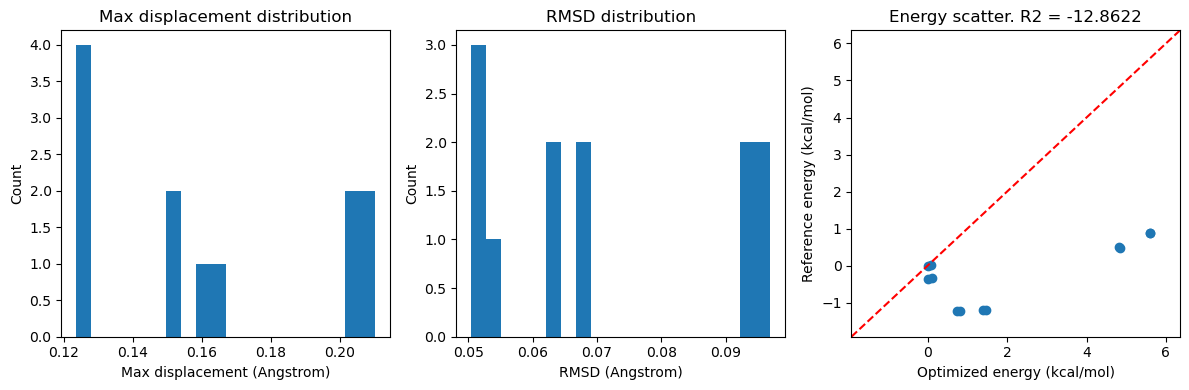

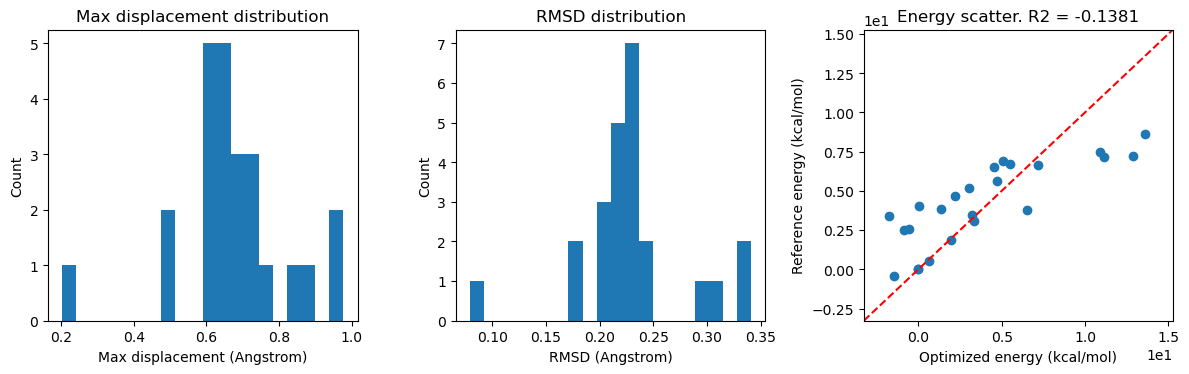

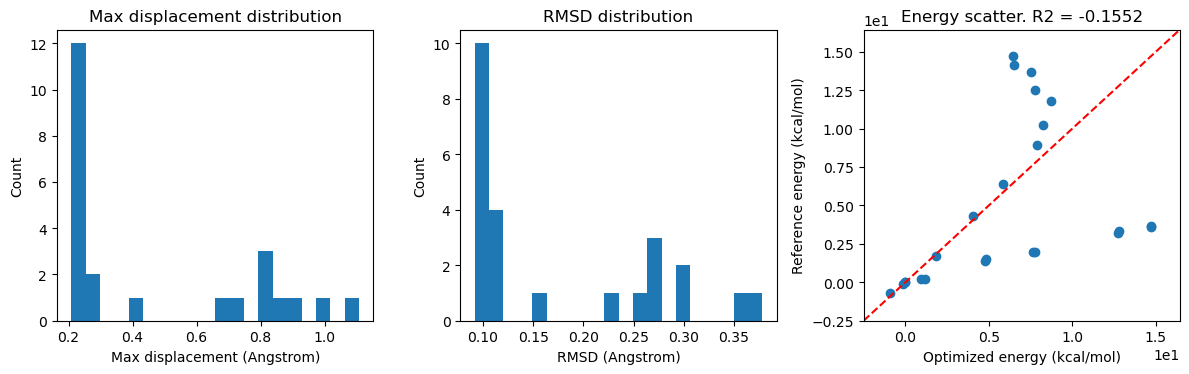

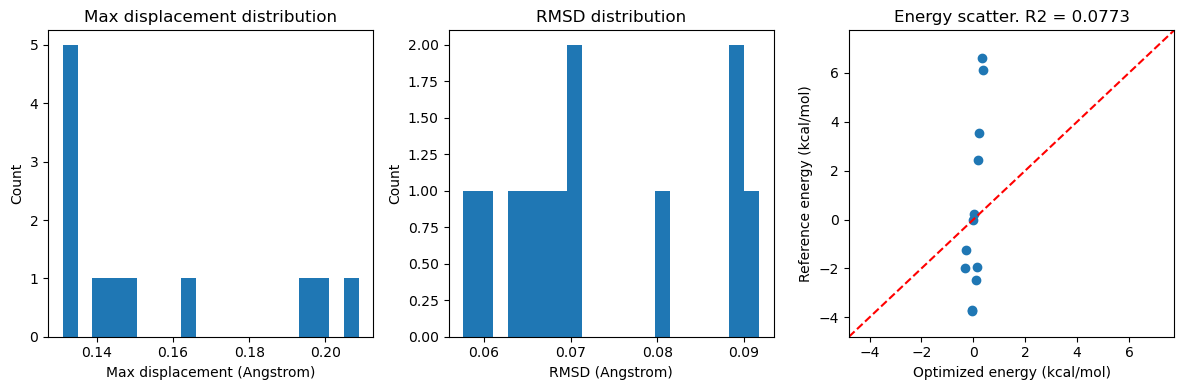

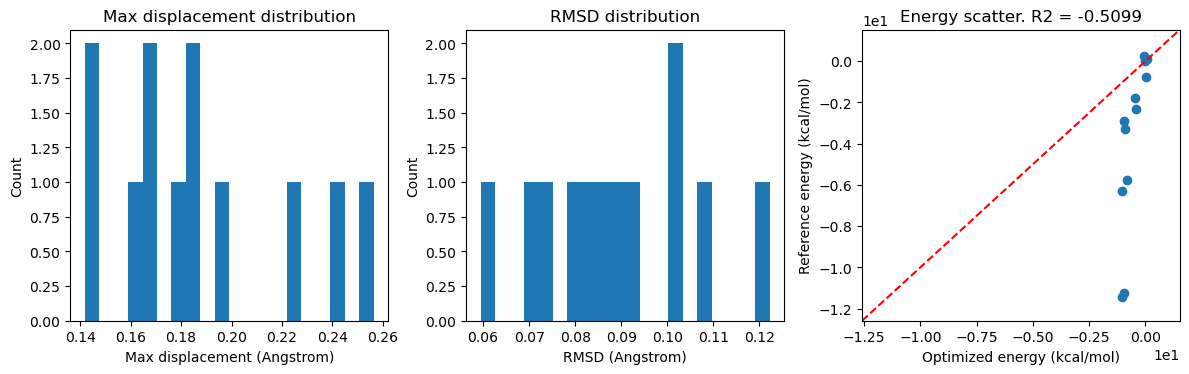

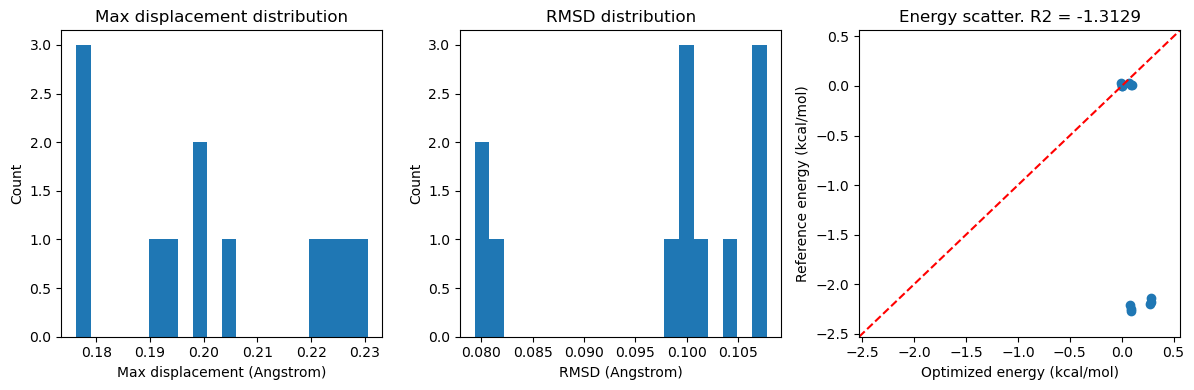

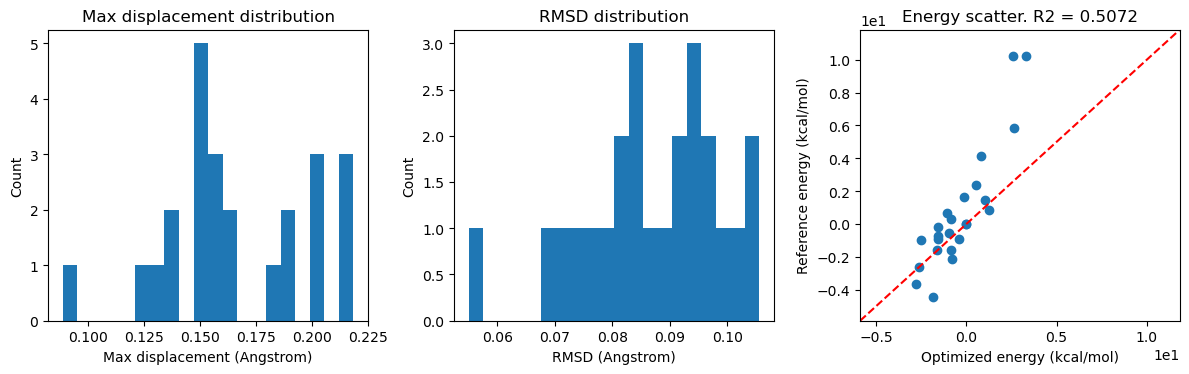

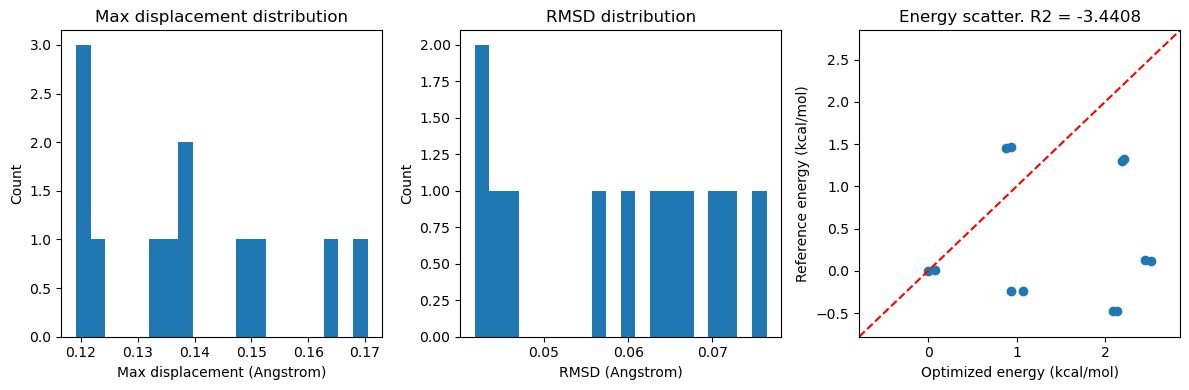

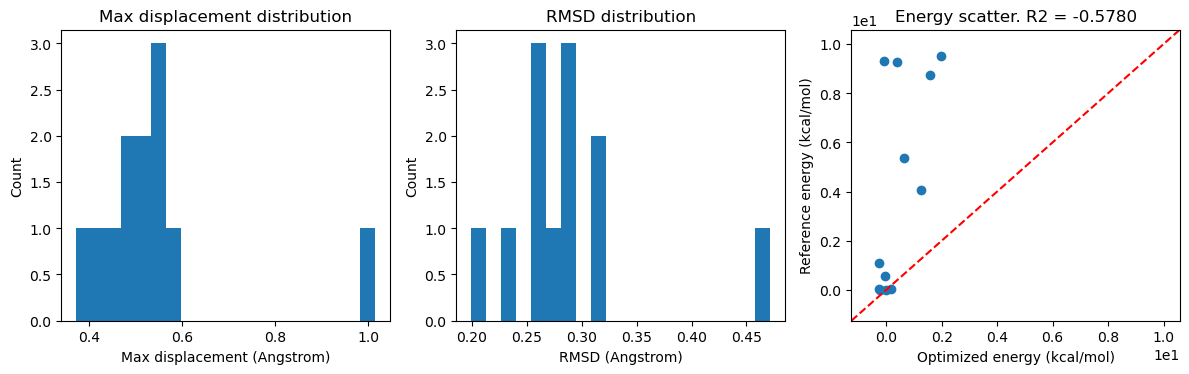

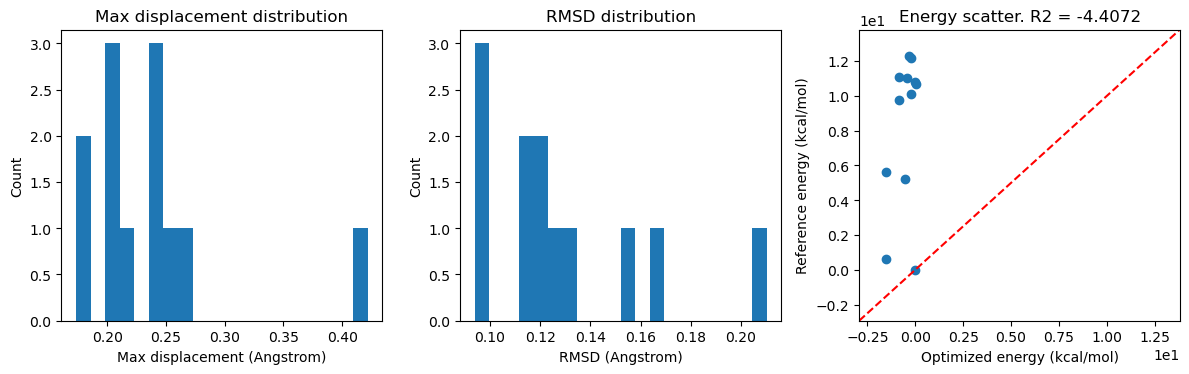

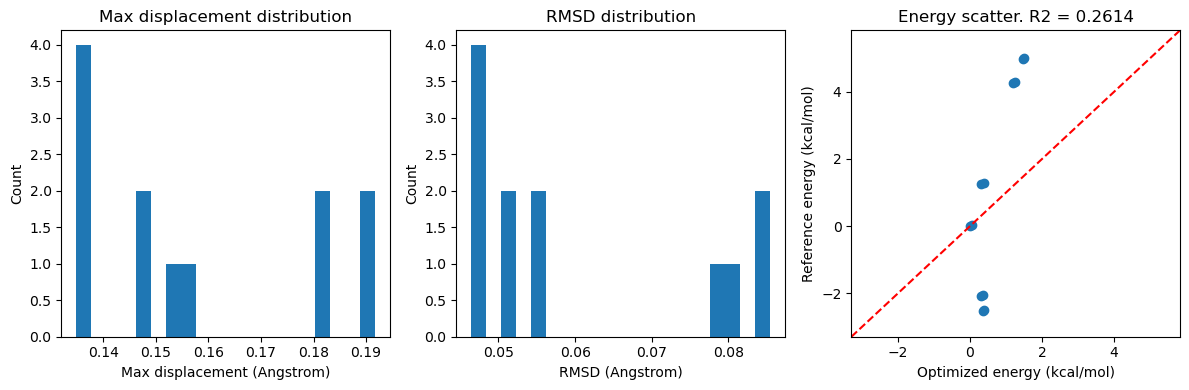

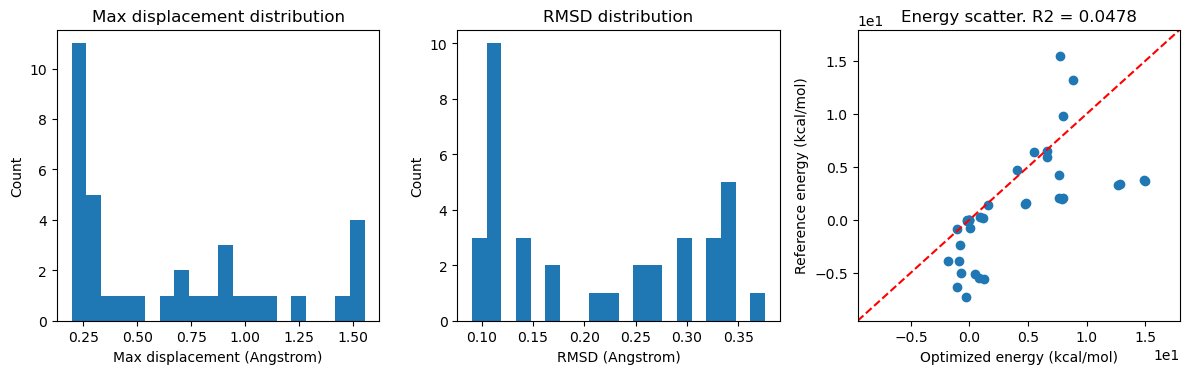

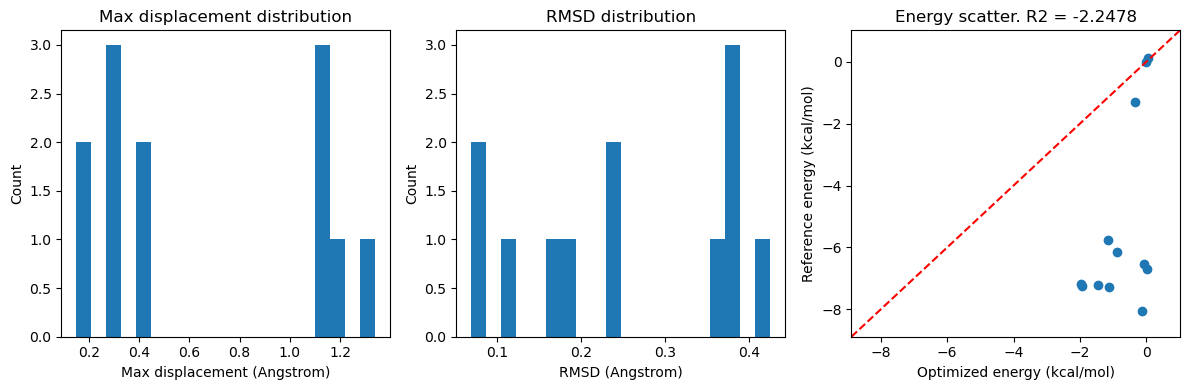

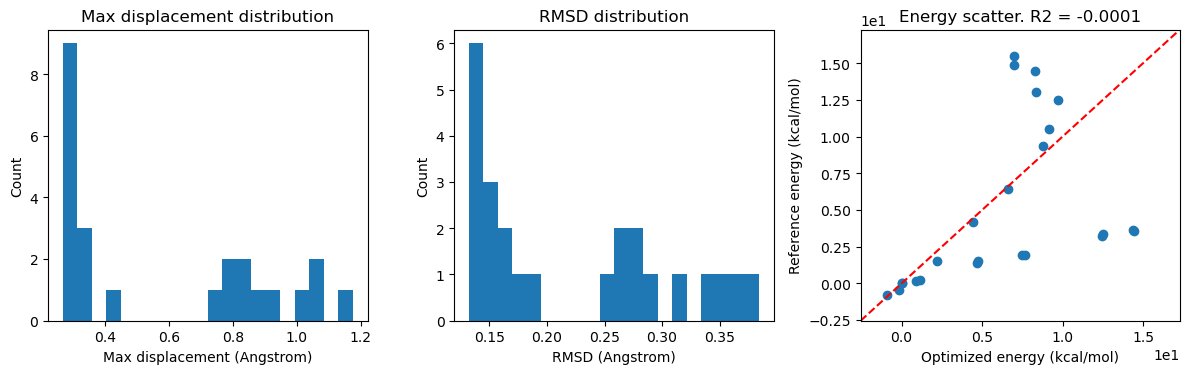

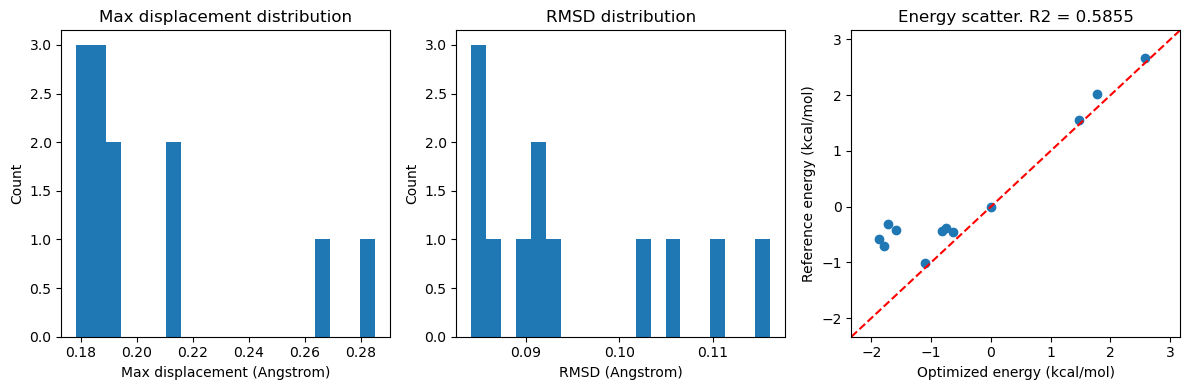

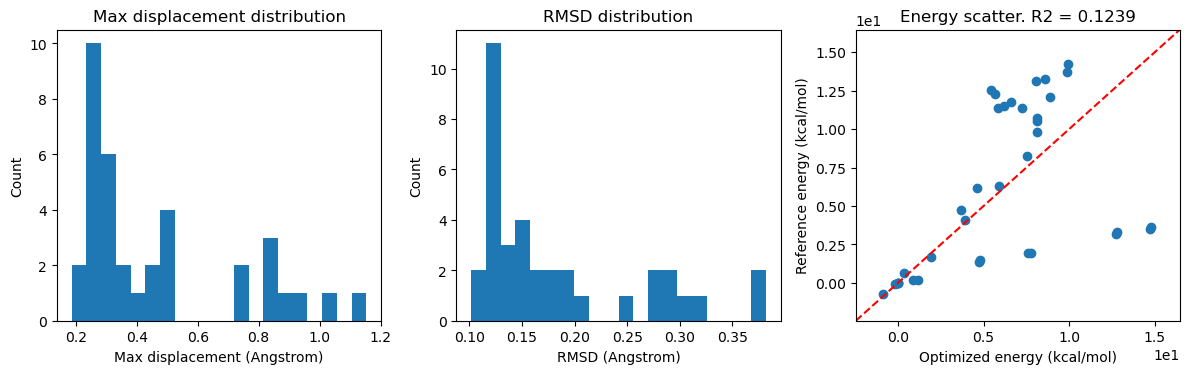

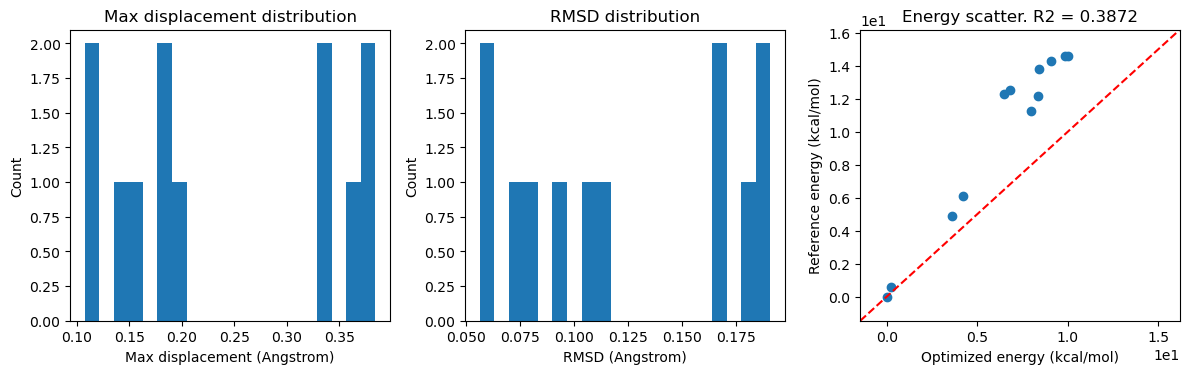

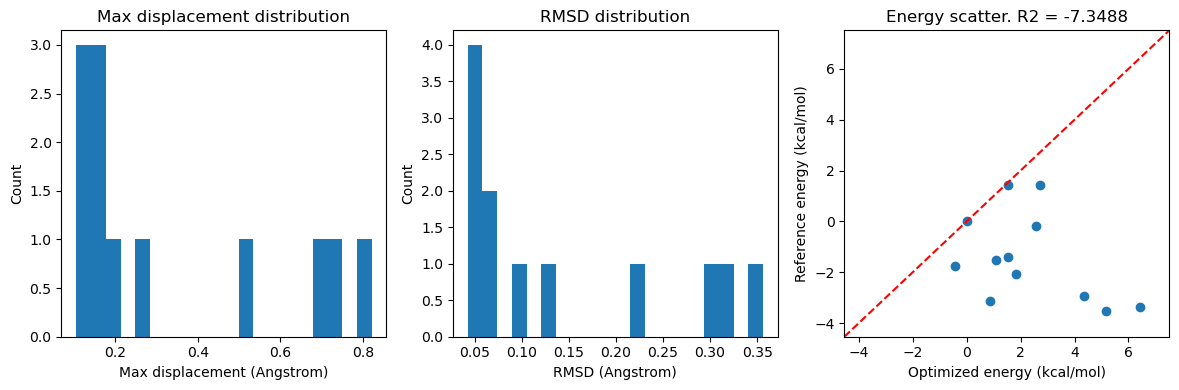

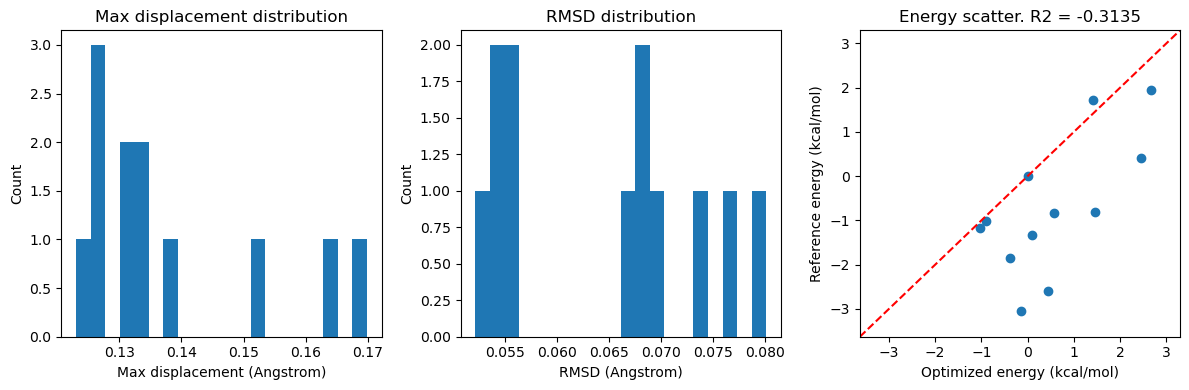

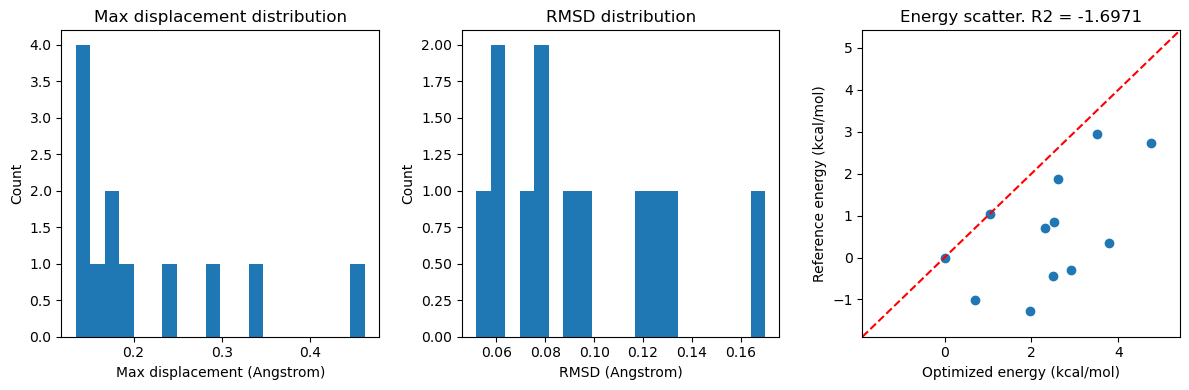

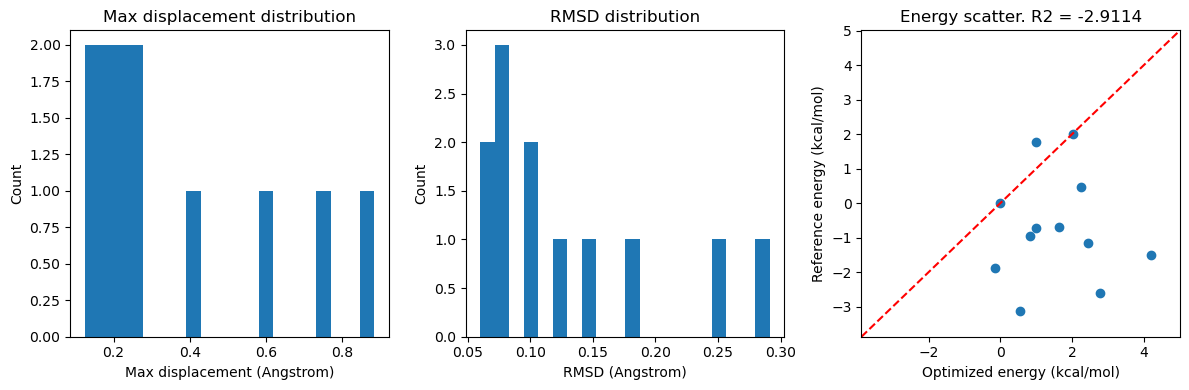

In [3]:
fragments = deepdih.utils.read_sdf("fragments.sdf")
for nfrag in range(len(fragments)):
    frag = fragments[nfrag]
    deepdih.preparation.build_gmx_top(frag, top=f"fragments/fragment_{nfrag}.top")
    calculator = deepdih.calculators.GromacsTopCalculator(frag, f"fragments/fragment_{nfrag}.top")
    init_conformations = deepdih.utils.read_sdf(f"fragments/fragment_{nfrag}_dihedral_scan_recalc.sdf")
    relax_conformations = [deepdih.geomopt.relax_conformation(c, calculator) for c in init_conformations]
    recalc_conformations = [deepdih.geomopt.recalc_energy(c, calculator) for c in relax_conformations]
    deepdih.utils.write_sdf(recalc_conformations, f"fragments/fragment_{nfrag}_dihedral_scan_mm.sdf")
    deepdih.geomopt.plot_opt_results(init_conformations, relax_conformations, f"fragments/fragment_{nfrag}_opt.png")